In [2]:
import modeller
import fitter

import casadi as ca
import numpy as np
from matplotlib import pyplot as plt

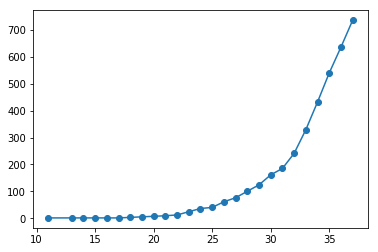

In [3]:
data = [1,1,1,1,1,1,3,5,7,9,12,24,36,40,61,76,100,124,161,185,241,329,432,540,636,736,]
time = [11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,]
def system_2(t, y, p):
    return [
        -p[1]*y[0]*y[2]/p[3],
        p[1]*y[0]*y[2]/p[3] - p[2]*y[1],
        p[2]*y[1] - p[0]*y[2],
        p[0]*y[2]
    ]
plt.plot(time, data, 'o-')

In [4]:
# data_pd = np.array(list(zip(*data)))
data_pd = np.array([[i] for i in data])
config = {
    "grid_size": 100,
    "basis_number": 32,
    "model_form": {
        "state": 4,
        "parameters": 4
    },
    "time_span": [time[0], time[-1]],
    "knot_function": None,
    "model": system_2,
    "dataset": {"y": data_pd, "t": time},
    "observation_vector": [-1],
    "weightings":[
        [1]*4,
        [1]*len(time)
    ],
    "regularisation_value": [7./8, 0, 7./10, 6000],
}

In [5]:
model = modeller.Model(config)
objective = fitter.Objective()
objective.make(config, config['dataset'], model)

g = (sum(model.xs) - model.ps[-1])/sum(model.xs)

solver_setup = {
    'f': objective.objective,
    'x': ca.vcat(objective.input_list),
    'p': ca.hcat([objective.rho, objective.alpha]),
    'g': g,
}

solver = ca.nlpsol('solver', 'ipopt', solver_setup)

In [7]:
p0 = config['regularisation_value']
c0 = [np.ones(config['basis_number']) for _ in range(4)]
x0 = np.hstack([*c0, p0])
lbx = [-np.inf]*(config['basis_number']*4) + [0]*len(config['regularisation_value'])

In [8]:
prange = np.logspace(-6, -2, num=30)
solutions = []
xguess = x0
for p in prange:
    solutions.append(solver(x0=xguess, p=[p, 1e-4], lbx=lbx, lbg=-1, ubg=1))
    xguess = np.array(solutions[-1]['x']).flatten()


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:    12900
Number of nonzeros in Lagrangian Hessian.............:     8682

Error evaluating objective gradient at user provided starting point.
  No scaling factor for objective function computed!
Total number of variables............................:      132
                     variables with only lower bounds:        4
                variables 

CasADi -  WARNING("solver:nlp_grad_f failed: NaN detected for output grad_f_x, at (row 128, col 0).") [.../casadi/core/oracle_function.cpp:249]


   6 1.9661332e+000 7.32e+001 7.04e-001  -1.0 1.41e+003  -4.5 1.00e+000 1.00e+000h  1
   7 1.7666115e+000 6.64e+001 1.02e+001  -1.0 4.26e+003  -5.0 1.00e+000 1.04e-001h  1
   8 1.5425456e+000 5.04e+001 7.47e+000  -1.0 1.55e+003  -4.5 8.16e-001 3.18e-001h  1
   9 5.2637008e+000 2.74e+001 4.23e+000  -1.0 4.65e+003  -5.0 5.01e-001 9.66e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 2.3462776e+000 2.06e+001 2.11e+001  -1.0 1.48e+003  -4.6 1.00e+000 3.32e-001h  1
  11 2.2102327e+000 1.64e+001 2.61e+001  -1.0 4.46e+003  -5.1 6.64e-001 2.61e-001h  1
  12 6.6958984e+000 9.50e+000 3.34e+001  -1.0 1.36e+004  -5.5 3.71e-001 1.00e+000h  1
  13 4.5521081e+000 8.18e+000 1.86e+002  -1.0 3.78e+004  -6.0 9.29e-001 1.83e-001h  1
  14 9.7329633e+000 6.71e+000 1.24e+002  -1.0 1.10e+005  -6.5 4.41e-001 4.08e-001h  1
  15 1.6646037e+001 5.99e+000 2.64e+002  -1.0 3.13e+005  -7.0 2.91e-001 1.94e-001h  1
  16 2.3904108e+001 5.70e+000 4.90e+003  -1.0 9.07e+005  -7

  95 4.1227307e+002 0.00e+000 6.20e+003  -1.0 1.03e+006 -11.4 3.00e-001 1.00e+000f  1
  96 3.5733152e+002 0.00e+000 2.58e+002  -1.0 2.03e+005 -10.0 6.97e-001 1.00e+000f  1
  97 2.8537289e+002 0.00e+000 1.14e+003  -1.0 7.46e+005 -10.5 5.66e-001 1.00e+000f  1
  98 2.3557189e+002 0.00e+000 2.66e+002  -1.0 4.69e+005 -10.1 2.36e-001 1.00e+000f  1
  99 1.3377559e+002 0.00e+000 1.07e+003  -1.0 1.04e+006 -10.6 3.75e-001 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100 1.1424111e+002 0.00e+000 4.41e+002  -1.0 1.79e+005  -9.2 1.00e+000 1.00e+000f  1
 101 7.6402770e+001 0.00e+000 2.36e+003  -1.0 5.04e+005  -9.7 1.00e+000 1.00e+000f  1
 102 5.9920531e+001 0.00e+000 2.50e+002  -1.0 3.41e+004  -8.4 1.00e+000 1.00e+000f  1
 103 5.3219116e+001 0.00e+000 8.18e+001  -1.0 6.47e+004  -8.9 1.00e+000 1.00e+000f  1
 104 3.5581263e+001 0.00e+000 2.04e+002  -1.0 1.77e+005  -9.3 1.00e+000 1.00e+000f  1
 105 2.1057786e+001 0.00e+000 2.89e+003  -1.0 3.71e+005  -9

 183 3.9081006e-003 0.00e+000 5.06e+000  -2.5 9.08e+002 -10.0 1.00e+000 6.25e-002f  5
 184 3.0655701e-003 0.00e+000 4.96e+000  -2.5 7.25e+003 -10.5 1.00e+000 1.56e-002f  7
 185 2.3678339e-002 0.00e+000 9.03e+000  -2.5 1.14e+004 -11.0 1.00e+000 1.00e+000f  1
 186 1.8512706e-002 0.00e+000 7.16e+000  -2.5 2.66e+003  -7.8 1.00e+000 1.25e-001h  4
 187 2.5453188e-002 0.00e+000 5.12e+000  -2.5 1.18e+004  -8.3 3.83e-001 3.12e-002f  6
 188 5.2497193e-003 0.00e+000 4.57e+000  -2.5 3.91e+003  -7.9 1.00e+000 6.25e-002h  5
 189 5.7880468e-003 0.00e+000 4.53e+000  -2.5 6.39e+003  -8.4 8.67e-001 7.81e-003f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 190 3.4281659e-003 0.00e+000 4.47e+000  -2.5 2.52e+006  -8.8 9.82e-002 1.27e-005f  8
 191 9.3490271e-003 0.00e+000 4.58e-001  -2.5 9.59e+001  -8.4 1.00e+000 1.00e+000h  1
 192 2.7675188e-003 0.00e+000 4.50e-001  -2.5 5.69e+003  -8.9 1.00e+000 1.56e-002f  7
 193 2.8357339e-003 0.00e+000 4.12e-001  -2.5 1.52e+003  -9

 281 8.5956718e-004 0.00e+000 4.19e-004  -5.7 2.45e+000  -8.0 1.00e+000 1.00e+000h  1
 282 8.5947587e-004 0.00e+000 1.27e-005  -5.7 1.12e+000  -8.5 1.00e+000 1.00e+000h  1
 283 8.5938190e-004 0.00e+000 2.76e-005  -8.6 2.05e+000  -8.9 1.00e+000 1.00e+000h  1
 284 8.5917079e-004 0.00e+000 1.12e-004  -8.6 5.41e+000  -9.4 1.00e+000 1.00e+000h  1
 285 8.5861026e-004 0.00e+000 3.91e-004  -8.6 1.63e+001  -9.9 1.00e+000 1.00e+000h  1
 286 8.5702374e-004 0.00e+000 1.64e-003  -8.6 4.90e+001 -10.4 1.00e+000 1.00e+000h  1
 287 8.5273622e-004 0.00e+000 1.29e-002  -8.6 1.40e+002 -10.9 1.00e+000 1.00e+000h  1
 288 8.4374085e-004 0.00e+000 6.50e-002  -8.6 3.62e+002 -11.3 1.00e+000 1.00e+000h  1
 289 8.3067921e-004 0.00e+000 5.22e-002  -8.6 8.75e+002 -11.8 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 290 8.3324826e-004 0.00e+000 3.10e-001  -8.6 1.39e+003 -12.3 1.00e+000 1.00e+000h  1
 291 8.1051286e-004 0.00e+000 3.63e-002  -8.6 3.39e+001 -10

 382 6.3948002e-004 0.00e+000 1.83e-003  -8.6 5.87e+001 -11.0 1.00e+000 1.00e+000h  1
 383 6.3838568e-004 0.00e+000 6.81e-003  -8.6 1.74e+002 -11.5 1.00e+000 1.00e+000h  1
 384 6.3576495e-004 0.00e+000 1.58e-002  -8.6 4.78e+002 -12.0 1.00e+000 1.00e+000h  1
 385 6.3531821e-004 0.00e+000 2.70e-004  -8.6 2.29e+001 -10.7 1.00e+000 1.00e+000h  1
 386 6.3485538e-004 0.00e+000 2.55e-003  -8.6 7.14e+001 -11.1 1.00e+000 1.00e+000h  1
 387 6.3356624e-004 0.00e+000 7.75e-003  -8.6 2.11e+002 -11.6 1.00e+000 1.00e+000h  1
 388 6.3067472e-004 0.00e+000 1.42e-002  -8.6 5.45e+002 -12.1 1.00e+000 1.00e+000h  1
 389 6.2915661e-004 0.00e+000 5.59e-003  -8.6 1.85e+002 -11.7 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 390 6.2633324e-004 0.00e+000 2.31e-002  -8.6 6.01e+002 -12.1 1.00e+000 1.00e+000h  1
 391 6.2541379e-004 0.00e+000 3.22e-004  -8.6 3.07e+001 -10.8 1.00e+000 1.00e+000h  1
 392 6.2483362e-004 0.00e+000 4.81e-003  -8.6 9.37e+001 -11

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 480 8.0976823e-003 0.00e+000 4.28e+000  -8.6 3.04e+003 -12.6 1.00e+000 1.00e+000H  1
 481 5.6086560e-004 0.00e+000 6.42e-002  -8.6 7.35e+002 -10.4 1.00e+000 1.00e+000F  1
 482 5.2072393e-004 0.00e+000 8.79e-003  -8.6 8.49e+001 -10.0 1.00e+000 1.00e+000f  1
 483 5.1646423e-004 0.00e+000 5.91e-003  -8.6 7.02e+001 -10.5 1.00e+000 1.00e+000h  1
 484 5.1598217e-004 0.00e+000 1.83e-003  -8.6 3.63e+001 -10.9 1.00e+000 1.00e+000h  1
 485 5.1560023e-004 0.00e+000 6.75e-003  -8.6 1.06e+002 -11.4 1.00e+000 1.00e+000h  1
 486 5.1479712e-004 0.00e+000 1.67e-002  -8.6 2.36e+002 -11.9 1.00e+000 1.00e+000h  1
 487 5.1342690e-004 0.00e+000 1.41e-002  -8.6 4.67e+002 -12.4 1.00e+000 1.00e+000h  1
 488 5.1216971e-004 0.00e+000 3.37e-002  -8.6 6.54e+002 -12.8 1.00e+000 1.00e+000h  1
 489 1.1047232e-003 0.00e+000 3.41e-001  -8.6 2.48e+003 -12.4 1.00e+000 1.00e+000H  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 580 3.9113666e-004 0.00e+000 8.78e-004  -8.6 8.77e+001 -11.6 1.00e+000 1.00e+000h  1
 581 3.9036366e-004 0.00e+000 2.97e-002  -8.6 3.47e+002 -12.1 1.00e+000 1.00e+000h  1
 582 3.8928708e-004 0.00e+000 1.97e-002  -8.6 7.21e+002 -12.5 1.00e+000 1.00e+000h  1
 583 9.7113703e-002 0.00e+000 1.39e+001  -8.6 5.57e+003 -12.1 1.00e+000 1.00e+000H  1
 584 9.7058141e-002 0.00e+000 1.39e+001  -8.6 8.11e+003  -9.9 1.00e+000 2.44e-004f 13
 585 3.8560270e-003 0.00e+000 6.28e-001  -8.6 1.37e+003  -9.4 1.00e+000 1.00e+000F  1
 586 8.9202072e-004 0.00e+000 1.50e-002  -8.6 1.80e+002  -9.0 1.00e+000 1.00e+000F  1
 587 5.3163977e-004 0.00e+000 1.32e-001  -8.6 2.17e+002  -9.5 1.00e+000 1.00e+000F  1
 588 4.0146925e-004 0.00e+000 1.79e-002  -8.6 2.11e+002 -10.0 1.00e+000 1.00e+000F  1
 589 3.7259908e-004 0.00e+000 1.62e-002  -8.6 1.60e+002 -10.5 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 671 3.1298861e-004 0.00e+000 9.25e-003  -8.6 3.44e+002 -12.6 1.00e+000 1.00e+000f  1
 672 3.1275175e-004 0.00e+000 1.47e-002  -8.6 4.08e+002 -12.1 1.00e+000 5.00e-001h  2
 673 3.1214276e-004 0.00e+000 3.68e-003  -8.6 2.69e+002 -12.6 1.00e+000 1.00e+000h  1
 674 3.4367632e-004 0.00e+000 2.15e-001  -8.6 9.01e+002 -13.1 1.00e+000 1.00e+000H  1
 675 3.1038748e-004 0.00e+000 2.08e-003  -8.6 1.84e+002 -11.8 1.00e+000 1.00e+000f  1
 676 3.2366194e-004 0.00e+000 1.49e-001  -8.6 5.70e+002 -12.2 1.00e+000 1.00e+000H  1
 677 3.0920080e-004 0.00e+000 5.69e-004  -8.6 7.26e+001 -11.8 1.00e+000 1.00e+000f  1
 678 3.1614860e-004 0.00e+000 1.10e-001  -8.6 4.59e+002 -12.3 1.00e+000 1.00e+000H  1
 679 3.0828707e-004 0.00e+000 4.16e-004  -8.6 6.72e+001 -11.9 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 680 3.1324943e-004 0.00e+000 9.41e-002  -8.6 4.57e+002 -12.3 1.00e+000 1.00e+000H  1
 681 3.0737024e-004 0.00e+000 5.33e-004  -8.6 7.81e+001 -11

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 760 2.8634185e-004 0.00e+000 1.20e-002  -8.6 7.03e+001 -11.7 1.00e+000 1.00e+000h  1
 761 2.8626153e-004 0.00e+000 3.42e-004  -8.6 4.49e+001 -12.1 1.00e+000 1.00e+000h  1
 762 2.8674765e-004 0.00e+000 4.52e-002  -8.6 1.90e+002 -12.6 1.00e+000 1.00e+000H  1
 763 2.8607881e-004 0.00e+000 7.73e-004  -8.6 6.85e+001 -12.2 1.00e+000 1.00e+000f  1
 764 2.9039828e-004 0.00e+000 1.23e-001  -8.6 2.67e+002 -12.7 1.00e+000 1.00e+000H  1
 765 2.8687947e-004 0.00e+000 8.05e-002  -8.6 7.31e+002 -12.2 1.00e+000 1.00e+000F  1
 766 2.8555492e-004 0.00e+000 7.82e-005  -8.6 7.27e+000 -10.9 1.00e+000 1.00e+000h  1
 767 2.8554545e-004 0.00e+000 2.88e-004  -8.6 1.29e+001 -11.4 1.00e+000 1.00e+000h  1
 768 2.8551999e-004 0.00e+000 2.19e-003  -8.6 3.66e+001 -11.9 1.00e+000 1.00e+000h  1
 769 2.8546626e-004 0.00e+000 3.99e-003  -8.6 7.42e+001 -12.3 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 855 2.7154566e-004 0.00e+000 3.95e-005  -8.6 1.25e+001 -11.3 1.00e+000 1.00e+000h  1
 856 2.7150635e-004 0.00e+000 3.55e-004  -8.6 3.76e+001 -11.7 1.00e+000 1.00e+000h  1
 857 2.7139759e-004 0.00e+000 3.01e-003  -8.6 1.10e+002 -12.2 1.00e+000 1.00e+000h  1
 858 2.7129577e-004 0.00e+000 1.71e-002  -8.6 1.91e+002 -12.7 1.00e+000 1.00e+000h  1
 859 2.7103901e-004 0.00e+000 8.56e-003  -8.6 2.26e+002 -13.2 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 860 2.7094479e-004 0.00e+000 7.56e-003  -8.6 6.22e+001 -11.8 1.00e+000 1.00e+000h  1
 861 2.7080673e-004 0.00e+000 8.36e-003  -8.6 1.72e+002 -12.3 1.00e+000 1.00e+000h  1
 862 2.7075055e-004 0.00e+000 1.47e-005  -8.6 6.50e+000 -11.0 1.00e+000 1.00e+000h  1
 863 2.7072838e-004 0.00e+000 1.08e-004  -8.6 2.04e+001 -11.5 1.00e+000 1.00e+000h  1
 864 2.7063462e-004 0.00e+000 5.81e-003  -8.6 7.28e+004    -  7.21e-001 3.91e-003h  9
 865 2.7055737e-004 0.00e+000 3.47e-003  -8.6 5.95e+001 -11

 943 2.6393217e-004 0.00e+000 3.59e-003  -8.6 3.27e+001 -11.2 1.00e+000 1.00e+000h  1
 944 2.6354967e-004 0.00e+000 1.99e-002  -8.6 8.75e+001 -11.7 1.00e+000 1.00e+000h  1
 945 2.6385750e-004 0.00e+000 4.44e-002  -8.6 2.21e+002 -12.1 1.00e+000 1.00e+000H  1
 946 2.6264625e-004 0.00e+000 1.06e-003  -8.6 1.55e+001 -10.8 1.00e+000 1.00e+000f  1
 947 2.6247834e-004 0.00e+000 4.06e-003  -8.6 3.66e+001 -11.3 1.00e+000 1.00e+000h  1
 948 2.6210351e-004 0.00e+000 1.81e-002  -8.6 9.64e+001 -11.8 1.00e+000 1.00e+000h  1
 949 2.6209542e-004 0.00e+000 3.33e-002  -8.6 1.92e+002 -12.2 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 950 2.6133020e-004 0.00e+000 1.22e-003  -8.6 1.66e+001 -10.9 1.00e+000 1.00e+000h  1
 951 2.6116065e-004 0.00e+000 4.32e-003  -8.6 4.09e+001 -11.4 1.00e+000 1.00e+000h  1
 952 2.6080021e-004 0.00e+000 1.35e-002  -8.6 1.04e+002 -11.9 1.00e+000 1.00e+000h  1
 953 2.6041399e-004 0.00e+000 1.05e-002  -8.6 1.39e+002 -12

1036 2.4732120e-004 0.00e+000 3.53e-003  -8.6 6.84e+001 -12.0 1.00e+000 1.00e+000h  1
1037 2.4726664e-004 0.00e+000 6.07e-003  -8.6 5.96e+001 -12.5 1.00e+000 1.00e+000h  1
1038 2.6029918e-004 0.00e+000 2.34e-001  -8.6 1.31e+003    -  1.00e+000 1.00e+000H  1
1039 2.4692892e-004 0.00e+000 1.33e-005  -8.6 2.40e+000 -10.2 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1040 2.4692588e-004 0.00e+000 3.57e-005  -8.6 3.98e+000 -10.7 1.00e+000 1.00e+000h  1
1041 2.4691717e-004 0.00e+000 2.96e-004  -8.6 1.16e+001 -11.2 1.00e+000 1.00e+000h  1
1042 2.4689542e-004 0.00e+000 2.25e-003  -8.6 3.25e+001 -11.7 1.00e+000 1.00e+000h  1
1043 2.4686577e-004 0.00e+000 2.27e-003  -8.6 4.91e+001 -12.1 1.00e+000 1.00e+000h  1
1044 2.4683209e-004 0.00e+000 2.83e-003  -8.6 7.90e+001 -12.6 1.00e+000 1.00e+000h  1
1045 2.4687559e-004 0.00e+000 1.78e-002  -8.6 7.25e+001 -13.1 1.00e+000 1.00e+000H  1
1046 2.8316782e-004 0.00e+000 6.21e-001  -8.6 4.26e+002 -11

1128 2.4564209e-004 0.00e+000 2.21e-006  -8.6 6.14e-001 -11.0 1.00e+000 1.00e+000h  1
1129 2.4563001e-004 0.00e+000 6.07e-003  -8.6 9.00e+004    -  4.66e-001 1.95e-003h 10
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1130 2.4562527e-004 0.00e+000 9.85e-006  -8.6 1.66e+000 -11.5 1.00e+000 1.00e+000h  1
1131 2.4561416e-004 0.00e+000 8.24e-003  -8.6 5.33e+004    -  7.94e-001 3.91e-003h  9
1132 2.4560736e-004 0.00e+000 1.71e-003  -8.6 2.21e+001 -12.0 1.00e+000 1.00e+000h  1
1133 2.4560406e-004 0.00e+000 1.81e-003  -8.6 2.34e+001 -12.5 1.00e+000 1.00e+000h  1
1134 2.4560293e-004 0.00e+000 4.28e-005  -8.6 5.27e+000 -12.0 1.00e+000 1.00e+000h  1
1135 2.4560152e-004 0.00e+000 7.74e-005  -8.6 1.20e+001 -12.5 1.00e+000 1.00e+000h  1
1136 2.4558892e-004 0.00e+000 7.05e-003  -8.6 1.28e+004    -  1.00e+000 1.56e-002h  7
1137 2.4558247e-004 0.00e+000 8.18e-007  -8.6 5.55e-001 -11.2 1.00e+000 1.00e+000h  1
1138 2.4557065e-004 0.00e+000 6.08e-003  -8.6 9.08e+004    

1218 2.4496812e-004 0.00e+000 9.88e-007  -8.6 1.10e+000 -11.5 1.00e+000 1.00e+000h  1
1219 2.4495879e-004 0.00e+000 3.62e-003  -8.6 3.90e+004    -  9.34e-001 3.91e-003h  9
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1220 2.4495525e-004 0.00e+000 3.32e-006  -8.6 3.19e+000 -12.0 1.00e+000 1.00e+000h  1
1221 2.4494628e-004 0.00e+000 2.56e-003  -8.6 3.30e+004    -  1.00e+000 3.91e-003h  9
1222 2.4494452e-004 0.00e+000 1.15e-006  -8.6 1.23e+000 -11.6 1.00e+000 1.00e+000h  1
1223 2.4493532e-004 0.00e+000 3.26e-003  -8.6 3.72e+004    -  9.75e-001 3.91e-003h  9
1224 2.4493230e-004 0.00e+000 3.81e-006  -8.6 3.57e+000 -12.0 1.00e+000 1.00e+000h  1
1225 2.4493318e-004 0.00e+000 8.86e-003  -8.6 3.10e+004    -  1.00e+000 7.81e-003h  8
1226 2.4491241e-004 0.00e+000 1.20e-006  -8.6 1.33e+000 -11.6 1.00e+000 1.00e+000h  1
1227 2.4490347e-004 0.00e+000 2.89e-003  -8.6 3.52e+004    -  1.00e+000 3.91e-003h  9
1228 2.4490091e-004 0.00e+000 5.08e-006  -8.6 3.92e+000 -12

1307 2.4445085e-004 0.00e+000 4.80e-005  -8.6 5.63e+000 -12.2 1.00e+000 1.00e+000h  1
1308 2.4445012e-004 0.00e+000 4.04e-005  -8.6 1.21e+001 -12.7 1.00e+000 1.00e+000h  1
1309 2.4444372e-004 0.00e+000 1.99e-003  -8.6 4.69e+003    -  1.00e+000 3.12e-002h  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1310 2.4444126e-004 0.00e+000 2.37e-006  -8.6 4.23e+000 -12.3 1.00e+000 1.00e+000h  1
1311 2.4444155e-004 0.00e+000 4.52e-003  -8.6 1.25e+004    -  1.00e+000 1.56e-002h  7
1312 2.4442998e-004 0.00e+000 1.64e-007  -8.6 2.08e-001 -10.9 1.00e+000 1.00e+000h  1
1313 2.4442506e-004 0.00e+000 1.20e-003  -8.6 1.29e+004    -  1.00e+000 7.81e-003h  8
1314 2.4442420e-004 0.00e+000 3.33e-007  -8.6 6.42e-001 -11.4 1.00e+000 1.00e+000h  1
1315 2.4442495e-004 0.00e+000 4.48e-003  -8.6 1.25e+004    -  1.00e+000 1.56e-002h  7
1316 2.4441318e-004 0.00e+000 1.71e-007  -8.6 2.28e-001 -11.0 1.00e+000 1.00e+000h  1
1317 2.4441322e-004 0.00e+000 4.19e-003  -8.6 1.22e+004    

   1 8.7164072e-002 0.00e+000 8.11e-002  -1.0 3.90e+000  -4.0 9.89e-001 1.00e+000f  1
   2 5.2045830e-002 0.00e+000 3.65e-002  -1.0 3.80e+001  -4.5 9.85e-001 1.00e+000f  1
   3 1.8643949e-002 0.00e+000 6.03e-003  -1.7 1.71e+001  -5.0 1.00e+000 1.00e+000f  1
   4 6.7567803e-003 0.00e+000 2.23e-003  -2.5 1.56e+001  -5.4 1.00e+000 1.00e+000f  1
   5 3.9366834e-003 0.00e+000 4.24e-003  -3.8 7.86e+001  -5.9 1.00e+000 1.00e+000f  1
   6 2.9977575e-003 0.00e+000 2.51e-001  -3.8 2.47e+002  -6.4 1.00e+000 2.50e-001f  3
   7 1.9868668e-003 0.00e+000 2.78e-001  -3.8 6.89e+002  -6.9 1.00e+000 6.25e-002f  5
   8 1.1881475e-003 0.00e+000 2.79e-001  -3.8 1.61e+003  -7.3 1.00e+000 1.56e-002f  7
   9 5.7740401e-004 0.00e+000 2.75e-001  -3.8 7.01e+002  -7.8 1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 5.5404036e-004 0.00e+000 2.07e-001  -3.8 1.99e+001  -8.3 1.00e+000 2.50e-001h  3
  11 3.6476126e-004 0.00e+000 1.81e-001  -3.8 2.40e+001  -8

   3 1.6203080e-002 0.00e+000 4.51e-003  -1.7 1.59e+001  -5.0 1.00e+000 1.00e+000f  1
   4 5.8594452e-003 0.00e+000 1.84e-003  -2.5 1.60e+001  -5.4 1.00e+000 1.00e+000f  1
   5 4.4068529e-003 0.00e+000 3.23e-003  -3.8 7.87e+001  -5.9 1.00e+000 1.00e+000f  1
   6 2.7290698e-003 0.00e+000 1.87e-001  -3.8 2.47e+002  -6.4 1.00e+000 2.50e-001f  3
   7 2.4213026e-003 0.00e+000 1.93e-001  -3.8 6.77e+002  -6.9 1.00e+000 6.25e-002f  5
   8 1.2991848e-003 0.00e+000 1.92e-001  -3.8 1.79e+003  -7.3 1.00e+000 1.56e-002f  7
   9 6.5007715e-004 0.00e+000 1.89e-001  -3.8 6.50e+002  -7.8 1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 1.0969834e-003 0.00e+000 3.42e-004  -3.8 8.65e+000  -8.3 1.00e+000 1.00e+000H  1
  11 9.9293628e-004 0.00e+000 2.51e-002  -5.7 4.08e+002  -8.8 1.00e+000 3.12e-002f  6
  12 6.2334692e-004 0.00e+000 2.45e-002  -5.7 2.52e+002  -9.2 1.00e+000 3.12e-002f  6
  13 5.3922409e-004 0.00e+000 1.84e-002  -5.7 1.23e+001  -9

  22 6.4001559e-004 0.00e+000 4.54e-004  -8.6 7.26e+000 -11.6 1.00e+000 1.00e+000h  1
  23 6.4001130e-004 0.00e+000 4.72e-004  -8.6 7.54e+000 -12.1 1.00e+000 1.00e+000h  1
  24 6.4000753e-004 0.00e+000 2.15e-004  -8.6 1.68e+001 -12.6 1.00e+000 1.00e+000h  1
  25 6.4000175e-004 0.00e+000 3.89e-004  -8.6 4.87e+001 -13.1 1.00e+000 1.00e+000h  1
  26 6.4013262e-004 0.00e+000 8.29e-003  -8.6 1.81e+002 -13.5 1.00e+000 1.00e+000H  1
  27 6.3998451e-004 0.00e+000 5.89e-004  -8.6 9.17e+000 -10.4 1.00e+000 1.00e+000h  1
  28 6.3998298e-004 0.00e+000 2.35e-006  -8.6 8.81e-001 -10.9 1.00e+000 1.00e+000h  1
  29 6.3997829e-004 0.00e+000 9.27e-004  -8.6 2.26e+003    -  1.00e+000 3.12e-002h  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  30 6.3997601e-004 0.00e+000 9.35e-005  -8.6 4.00e+000 -11.4 1.00e+000 1.00e+000h  1
  31 6.3997551e-004 0.00e+000 1.04e-005  -8.6 3.96e+000 -11.8 1.00e+000 1.00e+000h  1
  32 6.3997128e-004 0.00e+000 8.91e-004  -8.6 2.16e+003    

  25 8.4462132e-004 0.00e+000 7.19e-005  -5.7 4.15e+000 -10.0 1.00e+000 1.00e+000h  1
  26 8.4461993e-004 0.00e+000 2.89e-004  -5.7 1.21e+001 -10.5 1.00e+000 1.00e+000h  1
  27 8.4461780e-004 0.00e+000 8.35e-004  -5.7 3.53e+001 -11.0 1.00e+000 1.00e+000h  1
  28 8.4465568e-004 0.00e+000 3.90e-003  -5.7 1.07e+002 -11.5 1.00e+000 1.00e+000h  1
  29 8.4461410e-004 0.00e+000 9.30e-005  -5.7 5.19e+000 -10.1 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  30 8.4461130e-004 0.00e+000 2.26e-004  -5.7 1.49e+001 -10.6 1.00e+000 1.00e+000h  1
  31 8.4460383e-004 0.00e+000 5.94e-004  -5.7 4.40e+001 -11.1 1.00e+000 1.00e+000h  1
  32 8.4466277e-004 0.00e+000 5.17e-003  -5.7 1.34e+002 -11.6 1.00e+000 1.00e+000h  1
  33 8.4459104e-004 0.00e+000 3.36e-004  -5.7 7.08e+000 -10.2 1.00e+000 1.00e+000h  1
  34 8.4458597e-004 0.00e+000 1.05e-004  -5.7 1.86e+001 -10.7 1.00e+000 1.00e+000h  1
  35 8.4457755e-004 0.00e+000 5.31e-004  -5.7 5.58e+001 -11

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  50 1.1253447e-003 0.00e+000 1.71e-003  -8.6 3.74e+003    -  1.00e+000 3.12e-002h  6
  51 1.1252701e-003 0.00e+000 1.70e-004  -8.6 5.09e+000  -9.7 1.00e+000 1.00e+000h  1
  52 1.4428318e-003 0.00e+000 1.92e-001  -8.6 1.43e+003    -  1.00e+000 1.00e+000H  1
  53 1.1244859e-003 0.00e+000 2.90e-003  -8.6 5.24e+001 -10.2 1.00e+000 1.00e+000f  1
  54 1.1242822e-003 0.00e+000 2.92e-003  -8.6 1.50e+001  -9.8 1.00e+000 1.00e+000h  1
  55 1.1242312e-003 0.00e+000 5.18e-005  -8.6 4.31e+000 -10.3 1.00e+000 1.00e+000h  1
  56 1.1436108e-003 0.00e+000 5.03e-002  -8.6 4.98e+002    -  1.00e+000 1.00e+000H  1
  57 1.1240983e-003 0.00e+000 2.04e-004  -8.6 5.58e+000  -9.8 1.00e+000 1.00e+000f  1
  58 1.1240960e-003 0.00e+000 3.01e-005  -8.6 1.82e+000 -10.3 1.00e+000 1.00e+000h  1
  59 1.1270906e-003 0.00e+000 1.93e-002  -8.6 3.52e+002    -  1.00e+000 1.00e+000H  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

   3 7.4454394e-003 0.00e+000 1.18e-004  -1.7 1.49e+000  -4.5 1.00e+000 1.00e+000f  1
   4 3.3073716e-003 0.00e+000 2.43e-004  -2.5 6.44e+000  -5.0 1.00e+000 1.00e+000f  1
   5 2.8121176e-003 0.00e+000 9.54e-005  -3.8 2.78e+000  -5.4 1.00e+000 1.00e+000h  1
   6 2.5541583e-003 0.00e+000 8.14e-005  -5.7 4.65e+000  -5.9 1.00e+000 1.00e+000h  1
   7 2.5220467e-003 0.00e+000 1.04e-004  -5.7 5.23e+000  -6.4 1.00e+000 1.00e+000h  1
   8 4.0978128e-003 0.00e+000 2.10e-004  -5.7 2.20e+001  -6.9 1.00e+000 1.00e+000H  1
   9 2.7900021e-003 0.00e+000 2.02e-004  -5.7 1.62e+003  -7.3 1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 2.2796914e-003 0.00e+000 1.47e-004  -5.7 1.96e+002  -7.8 1.00e+000 3.12e-002f  6
  11 2.2348865e-003 0.00e+000 1.23e-003  -5.7 2.54e+001  -8.3 1.00e+000 1.00e+000h  1
  12 2.2143544e-003 0.00e+000 4.03e-003  -5.7 3.26e+001  -8.8 1.00e+000 1.00e+000h  1
  13 2.1847013e-003 0.00e+000 1.94e-002  -5.7 7.02e+001  -9

  96 2.0319826e-003 0.00e+000 2.01e-003  -8.6 7.20e+003    -  7.42e-001 1.26e-002f  7
  97 2.0316010e-003 0.00e+000 1.04e-005  -8.6 1.16e+000  -8.1 1.00e+000 1.00e+000h  1
  98 2.0314244e-003 0.00e+000 7.61e-004  -8.6 3.44e+003    -  1.00e+000 1.56e-002h  7
  99 2.0311927e-003 0.00e+000 3.25e-005  -8.6 2.22e+000  -8.6 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100 2.0309009e-003 0.00e+000 2.00e-003  -8.6 1.26e+003    -  1.00e+000 6.25e-002h  5
 101 2.0303499e-003 0.00e+000 1.87e-004  -8.6 4.09e+000  -9.0 1.00e+000 1.00e+000h  1
 102 2.0300682e-003 0.00e+000 3.79e-003  -8.6 2.50e+002    -  1.00e+000 2.50e-001h  3
 103 2.0291835e-003 0.00e+000 1.38e-005  -8.6 1.18e+000  -8.6 1.00e+000 1.00e+000h  1
 104 2.0290214e-003 0.00e+000 8.07e-004  -8.6 8.06e+002    -  1.00e+000 6.25e-002h  5
 105 2.0288242e-003 0.00e+000 6.35e-005  -8.6 3.21e+000  -9.1 1.00e+000 1.00e+000h  1
 106 2.0701182e-003 0.00e+000 2.46e-002  -8.6 1.98e+002    

  44 5.2728477e-001 0.00e+000 1.62e-003  -5.7 4.85e+002  -6.7 6.70e-001 1.00e+000f  1
  45 3.8117644e-001 0.00e+000 1.48e-003  -5.7 1.46e+003  -7.2 1.00e+000 1.00e+000f  1
  46 5.9880534e-002 0.00e+000 6.78e-003  -5.7 4.35e+003  -7.6 3.81e-001 1.00e+000F  1
  47 2.7898272e-002 0.00e+000 2.22e-003  -5.7 1.31e+004  -8.1 3.93e-001 6.26e-002f  4
  48 9.6512798e-002 0.00e+000 8.46e-003  -5.7 3.92e+004  -8.6 1.89e-001 3.03e-002h  3
  49 9.8088599e-003 0.00e+000 4.12e-003  -5.7 1.48e+004  -8.2 1.00e+000 5.86e-002f  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  50 6.3719736e-002 0.00e+000 1.21e-002  -5.7 3.64e+004  -8.6 1.37e-001 1.86e-002h  4
  51 5.9760731e-003 0.00e+000 8.74e-003  -5.7 1.67e+004  -8.2 2.92e-001 3.84e-002f  4
  52 4.2445693e-003 0.00e+000 4.85e-003  -5.7 4.28e+004    -  9.48e-002 2.35e-003f  7
  53 2.1690011e-001 0.00e+000 1.64e+000  -5.7 1.78e+003    -  1.00e+000 1.00e+000H  1
  54 1.0067388e-001 0.00e+000 1.32e-001  -5.7 7.93e+002  -6

 135 8.7229740e-003 0.00e+000 5.31e-002  -5.7 2.80e+005  -9.4 1.85e-002 2.17e-003f  4
 136 3.4873769e-002 0.00e+000 5.31e-002  -5.7 2.56e+005  -9.9 1.00e+000 1.48e-003h  5
 137 5.2579379e-003 0.00e+000 4.90e-002  -5.7 8.10e+005 -10.4 7.00e-003 3.66e-004f  6
 138 9.9829901e-001 0.00e+000 1.75e+001  -5.7 4.76e+004    -  1.97e-001 9.81e-002w  1
 139 2.1598053e-001 0.00e+000 1.45e+000  -5.7 7.76e+001  -5.4 7.57e-001 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 140 1.4578870e-001 0.00e+000 2.61e-002  -5.7 7.99e+001  -5.9 9.97e-001 1.00e+000f  1
 141 1.0791576e-001 0.00e+000 1.63e-002  -5.7 2.41e+002  -6.4 9.39e-001 1.00e+000h  1
 142 3.3355169e-002 0.00e+000 1.64e-003  -5.7 7.22e+002  -6.9 1.00e+000 1.00e+000f  1
 143 1.9030310e-001 0.00e+000 2.65e-002  -5.7 2.17e+003  -7.3 1.00e+000 1.00e+000H  1
 144 2.7780196e-002 0.00e+000 1.04e-001  -5.7 6.50e+003  -7.8 6.84e-001 2.50e-001f  3
 145 2.4691736e-002 0.00e+000 4.30e-002  -5.7 2.05e+004  -8

 224 1.4711191e-001 0.00e+000 3.08e-001  -5.7 6.41e+004  -8.9 1.00e+000 6.93e-002f  2
 225 2.0932887e-001 0.00e+000 1.13e+000  -5.7 3.34e+003  -7.6 5.77e-001 1.00e+000H  1
 226 1.2060841e-001 0.00e+000 1.61e+000  -5.7 1.93e+003  -7.1 1.00e+000 5.00e-001f  2
 227 4.2169329e-002 0.00e+000 3.35e-001  -5.7 5.69e+002  -6.7 1.00e+000 1.00e+000h  1
 228 1.2820222e-001 0.00e+000 6.10e-001  -5.7 1.60e+003  -7.2 1.00e+000 1.00e+000H  1
 229 1.3318017e-002 0.00e+000 3.68e-001  -5.7 5.25e+003  -7.7 7.81e-001 2.50e-001f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 230 6.1165937e-002 0.00e+000 3.51e-001  -5.7 1.43e+004  -8.2 6.98e-001 4.52e-002h  4
 231 2.3566294e-002 0.00e+000 3.45e-001  -5.7 4.30e+004  -8.6 1.26e-001 1.75e-002f  5
 232 5.5887688e-002 0.00e+000 3.43e-001  -5.7 1.28e+005  -9.1 1.48e-001 5.43e-003h  4
 233 1.8193563e-002 0.00e+000 3.41e-001  -5.7 5.10e+004  -8.7 1.49e-001 7.39e-003f  6
 234 9.9719271e-003 0.00e+000 3.40e-001  -5.7 1.53e+005  -9

 315 1.6394812e-001 0.00e+000 1.29e-002  -5.7 1.65e+003  -7.2 1.00e+000 1.00e+000H  1
 316 1.3210612e-001 0.00e+000 1.01e-002  -5.7 5.09e+003  -7.7 9.19e-001 6.25e-002f  5
 317 9.1908290e-002 0.00e+000 5.16e-003  -5.7 1.53e+004  -8.2 1.00e+000 2.63e-002f  6
 318 5.3000167e-002 0.00e+000 3.27e-004  -5.7 4.57e+004  -8.7 1.09e-001 8.52e-003f  6
 319 2.7934493e-002 0.00e+000 2.17e-003  -5.7 1.37e+005  -9.1 1.00e+000 5.52e-003f  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 320 1.6648676e-002 0.00e+000 8.90e-003  -5.7 3.36e+005  -9.6 3.29e-002 1.16e-003f  5
 321 5.2776507e-003 0.00e+000 3.27e-002  -5.7 2.61e+006 -10.1 1.20e-003 6.30e-005f  7
 322 4.9040249e-003 0.00e+000 3.17e-002  -5.7 1.27e+004  -8.8 1.00e+000 3.69e-003f  8
 323 6.9417168e-001 0.00e+000 6.94e-001  -5.7 6.83e+003  -8.3 6.01e-001 1.00e+000H  1
 324 5.7985140e-001 0.00e+000 2.35e-001  -5.7 1.05e+003  -7.0 1.00e+000 1.00e+000F  1
 325 2.7306309e-001 0.00e+000 5.07e-001  -5.7 3.08e+003  -7

 402 2.7341250e-003 0.00e+000 2.02e-004  -8.6 2.09e+000  -8.4 1.00e+000 1.00e+000h  1
 403 2.7341161e-003 0.00e+000 1.64e-005  -8.6 6.57e-001  -8.9 1.00e+000 1.00e+000h  1
 404 2.7341031e-003 0.00e+000 1.08e-004  -8.6 1.62e+000  -9.4 1.00e+000 1.00e+000h  1
 405 2.7340850e-003 0.00e+000 2.07e-004  -8.6 2.38e+000  -9.9 1.00e+000 1.00e+000h  1
 406 2.7340579e-003 0.00e+000 1.41e-004  -8.6 4.39e+000 -10.3 1.00e+000 1.00e+000h  1
 407 2.7339949e-003 0.00e+000 8.09e-005  -8.6 1.21e+001 -10.8 1.00e+000 1.00e+000h  1
 408 2.7338187e-003 0.00e+000 3.42e-004  -8.6 3.68e+001 -11.3 1.00e+000 1.00e+000h  1
 409 5.1722222e-002 0.00e+000 1.30e+000  -8.6 3.80e+002 -11.8 1.00e+000 1.00e+000H  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 410 6.7817985e-003 0.00e+000 1.11e-001  -8.6 5.45e+001  -6.8 1.00e+000 1.00e+000F  1
 411 2.7978000e-003 0.00e+000 3.09e-003  -8.6 2.52e+000  -5.5 1.00e+000 1.00e+000F  1
 412 2.7729502e-003 0.00e+000 6.51e-006  -8.6 1.12e+000  -6

   8 1.3871018e-001 0.00e+000 3.97e-002  -2.5 8.08e+001  -6.0 1.00e+000 1.00e+000h  1
   9 1.1894110e-001 0.00e+000 6.20e-003  -2.5 5.63e+001  -6.4 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 6.3185405e-002 0.00e+000 1.91e-002  -3.8 4.34e+002  -6.9 9.54e-001 1.00e+000h  1
  11 9.4366314e-002 0.00e+000 3.55e-002  -3.8 1.21e+003  -7.4 1.00e+000 1.00e+000H  1
  12 8.3654150e-002 0.00e+000 8.46e-002  -3.8 1.63e+003  -7.9 2.86e-001 8.82e-002h  3
  13 3.0660522e-002 0.00e+000 1.69e-002  -3.8 4.97e+002  -6.5 1.00e+000 1.00e+000h  1
  14 6.8154446e-002 0.00e+000 1.04e-002  -3.8 7.53e+002  -7.0 5.37e-001 1.00e+000H  1
  15 1.7628309e-002 0.00e+000 4.27e-003  -3.8 2.53e+003  -7.5 1.00e+000 2.48e-001f  2
  16 4.1993762e-001 0.00e+000 7.92e-001  -3.8 3.65e+003  -8.0 1.97e-001 1.00e+000H  1
  17 3.4988459e-001 0.00e+000 6.88e-002  -3.8 5.31e+001  -5.7 1.00e+000 1.00e+000f  1
  18 3.4470684e-001 0.00e+000 1.76e-003  -3.8 2.09e+001  -5

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100 4.0125415e-003 0.00e+000 4.88e-003  -5.7 6.75e+001  -9.1 1.00e+000 1.00e+000h  1
 101 4.0077756e-003 0.00e+000 7.22e-004  -5.7 3.58e+000  -7.7 1.00e+000 1.00e+000h  1
 102 4.0013609e-003 0.00e+000 2.27e-003  -5.7 9.80e+000  -8.2 1.00e+000 1.00e+000h  1
 103 3.9864091e-003 0.00e+000 3.99e-003  -5.7 2.70e+001  -8.7 1.00e+000 1.00e+000h  1
 104 3.9498078e-003 0.00e+000 3.76e-003  -5.7 7.56e+001  -9.2 1.00e+000 1.00e+000h  1
 105 3.9438105e-003 0.00e+000 1.16e-003  -5.7 4.50e+000  -7.8 1.00e+000 1.00e+000h  1
 106 3.9372885e-003 0.00e+000 2.09e-003  -5.7 1.14e+001  -8.3 1.00e+000 1.00e+000h  1
 107 3.9210990e-003 0.00e+000 3.04e-003  -5.7 3.15e+001  -8.8 1.00e+000 1.00e+000h  1
 108 3.8859895e-003 0.00e+000 5.56e-003  -5.7 8.62e+001  -9.3 1.00e+000 1.00e+000h  1
 109 3.8827809e-003 0.00e+000 1.74e-002  -5.7 1.22e+001  -7.9 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

   3 2.9030842e+000 0.00e+000 1.99e-002  -1.0 1.71e+002  -4.5 1.00e+000 1.00e+000f  1
   4 2.5825347e+000 0.00e+000 1.99e-002  -2.5 6.04e+001  -5.0 9.85e-001 1.00e+000f  1
   5 5.0319434e-001 0.00e+000 1.12e+000  -3.8 4.88e+002  -5.4 2.55e-001 1.00e+000f  1
   6 1.7422705e-001 0.00e+000 7.23e-001  -3.8 1.79e+002  -5.9 4.79e-001 1.00e+000f  1
   7 8.1759891e-002 0.00e+000 1.25e-001  -3.8 3.67e+001  -5.5 1.00e+000 1.00e+000h  1
   8 5.7921784e-002 0.00e+000 8.39e-003  -3.8 7.40e+001  -6.0 1.00e+000 1.00e+000h  1
   9 4.2695838e-002 0.00e+000 7.07e-003  -3.8 2.06e+002  -6.4 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 8.3804710e-002 0.00e+000 3.77e-002  -3.8 6.81e+002  -6.9 5.38e-001 1.00e+000H  1
  11 3.3192138e-002 0.00e+000 2.15e-002  -3.8 2.09e+003  -7.4 1.00e+000 2.33e-001f  2
  12 2.8152661e-002 0.00e+000 1.04e-001  -3.8 2.57e+003  -7.9 1.00e+000 6.74e-002h  3
  13 2.4914800e-002 0.00e+000 9.87e-002  -3.8 3.15e+003  -8

   3 2.0339159e+000 0.00e+000 4.33e-002  -1.0 1.67e+002  -4.5 1.00e+000 1.00e+000f  1
   4 4.9281114e-001 0.00e+000 6.43e-001  -2.5 2.03e+002  -5.0 5.97e-001 1.00e+000f  1
   5 1.7757034e-001 0.00e+000 4.78e-002  -2.5 6.34e+001  -5.4 9.85e-001 1.00e+000f  1
   6 1.0245361e-001 0.00e+000 1.54e-002  -2.5 1.05e+002  -5.9 1.00e+000 1.00e+000f  1
   7 6.8246876e-002 0.00e+000 1.40e-002  -3.8 1.36e+002  -6.4 1.00e+000 1.00e+000h  1
   8 4.2339458e-002 0.00e+000 2.64e-002  -3.8 4.65e+002  -6.9 1.00e+000 1.00e+000h  1
   9 1.1867629e-001 0.00e+000 2.37e-001  -3.8 1.06e+003  -7.3 3.62e-001 1.00e+000H  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 1.0019768e-001 0.00e+000 3.40e-003  -3.8 9.14e+001  -6.0 1.00e+000 1.00e+000h  1
  11 7.2286970e-002 0.00e+000 2.71e-003  -3.8 2.74e+002  -6.5 1.00e+000 1.00e+000H  1
  12 3.9942775e-002 0.00e+000 1.73e-002  -3.8 7.21e+002  -7.0 1.00e+000 1.00e+000f  1
  13 1.2504338e-001 0.00e+000 2.17e-001  -3.8 1.23e+003  -7

  93 1.0645226e-002 0.00e+000 1.38e-001  -5.7 1.78e+002  -6.3 1.00e+000 1.25e-001f  4
  94 7.8194681e-003 0.00e+000 1.29e-001  -5.7 5.19e+002  -6.7 1.00e+000 6.25e-002f  5
  95 7.8116713e-003 0.00e+000 3.14e-004  -5.7 8.63e+000  -6.3 1.00e+000 1.00e+000h  1
  96 7.6326601e-003 0.00e+000 4.35e-002  -5.7 2.01e+003    -  1.00e+000 6.25e-002h  5
  97 7.4827382e-003 0.00e+000 3.80e-002  -5.7 6.09e+001  -6.8 1.00e+000 1.25e-001h  4
  98 7.4103694e-003 0.00e+000 2.86e-002  -5.7 2.15e+001  -7.3 1.00e+000 2.50e-001h  3
  99 7.4641074e-003 0.00e+000 1.43e-002  -5.7 1.07e+001  -7.7 1.00e+000 5.00e-001h  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100 7.3199609e-003 0.00e+000 1.59e-001  -5.7 2.71e+003    -  1.00e+000 1.25e-001h  4
 101 7.1992538e-003 0.00e+000 5.79e-005  -5.7 1.68e+000  -6.4 1.00e+000 1.00e+000h  1
 102 7.1969308e-003 0.00e+000 4.65e-006  -5.7 8.60e-001  -6.9 1.00e+000 1.00e+000h  1
 103 7.1952841e-003 0.00e+000 1.15e-004  -8.6 1.67e+000  -7

 186 6.8069279e-003 0.00e+000 1.35e-004  -8.6 1.63e+001  -9.8 1.00e+000 1.00e+000h  1
 187 6.8033046e-003 0.00e+000 2.21e-003  -8.6 4.96e+001 -10.3 1.00e+000 1.00e+000h  1
 188 6.8029772e-003 0.00e+000 5.53e-005  -8.6 2.43e+000  -8.9 1.00e+000 1.00e+000h  1
 189 6.8024257e-003 0.00e+000 6.93e-005  -8.6 7.13e+000  -9.4 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 190 6.8007428e-003 0.00e+000 3.95e-004  -8.6 2.16e+001  -9.9 1.00e+000 1.00e+000h  1
 191 6.7963248e-003 0.00e+000 2.14e-003  -8.6 6.54e+001 -10.4 1.00e+000 1.00e+000h  1
 192 6.7915341e-003 0.00e+000 5.71e-003  -8.6 3.95e+002 -10.8 1.00e+000 1.61e-001h  2
 193 6.7899786e-003 0.00e+000 2.42e-004  -8.6 1.49e+000  -8.6 1.00e+000 1.00e+000h  1
 194 6.7896452e-003 0.00e+000 1.91e-005  -8.6 4.03e+000  -9.1 1.00e+000 1.00e+000h  1
 195 6.7886826e-003 0.00e+000 9.69e-005  -8.6 1.13e+001  -9.6 1.00e+000 1.00e+000h  1
 196 6.7851362e-003 3.91e-004 4.70e-004  -8.6 2.21e+003    

  49 9.4685193e-003 0.00e+000 6.88e-003  -8.6 4.97e+001  -8.8 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  50 9.4608248e-003 0.00e+000 4.89e-005  -8.6 6.47e-001  -6.6 1.00e+000 1.00e+000h  1
  51 9.4598167e-003 0.00e+000 1.34e-004  -8.6 1.05e+000  -7.0 1.00e+000 1.00e+000h  1
  52 9.4570878e-003 0.00e+000 8.01e-004  -8.6 3.01e+000  -7.5 1.00e+000 1.00e+000h  1
  53 9.4495318e-003 0.00e+000 3.29e-003  -8.6 8.76e+000  -8.0 1.00e+000 1.00e+000h  1
  54 9.4299656e-003 0.00e+000 1.65e-003  -8.6 2.38e+001  -8.5 1.00e+000 1.00e+000h  1
  55 9.4148936e-003 0.00e+000 5.92e-003  -8.6 8.47e+002    -  1.00e+000 7.71e-002h  3
  56 9.4103065e-003 0.00e+000 4.16e-004  -8.6 1.23e+000  -7.1 1.00e+000 1.00e+000h  1
  57 9.4074222e-003 0.00e+000 8.23e-004  -8.6 3.57e+000  -7.6 1.00e+000 1.00e+000h  1
  58 9.3995641e-003 0.00e+000 3.67e-003  -8.6 1.02e+001  -8.1 1.00e+000 1.00e+000h  1
  59 9.3804426e-003 0.00e+000 1.66e-003  -8.6 2.67e+001  -8

  13 1.1594544e-001 0.00e+000 8.91e-003  -3.8 2.77e+002  -6.5 1.00e+000 1.00e+000H  1
  14 1.0989089e-001 0.00e+000 8.27e-003  -3.8 5.79e+002  -7.0 1.00e+000 1.01e-001f  4
  15 1.0743733e-001 0.00e+000 8.02e-003  -3.8 8.44e+002  -7.5 1.00e+000 2.73e-002h  6
  16 1.0611451e-001 0.00e+000 7.82e-003  -3.8 1.57e+003  -8.0 1.00e+000 7.81e-003h  8
  17 8.7172083e-002 0.00e+000 4.90e-001  -3.8 4.15e+003  -8.4 1.00e+000 1.06e-001f  3
  18 6.0406621e-002 0.00e+000 5.73e-004  -3.8 1.31e+001  -5.3 1.00e+000 1.00e+000h  1
  19 5.2939633e-002 0.00e+000 2.33e-004  -5.7 5.87e+001  -5.8 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20 3.4593962e-002 0.00e+000 1.05e-003  -5.7 1.80e+002  -6.3 1.00e+000 1.00e+000h  1
  21 2.4531622e-002 0.00e+000 1.16e-003  -5.7 4.96e+002  -6.7 1.00e+000 2.00e-001h  1
  22 2.2611059e-002 0.00e+000 1.16e-002  -5.7 3.11e+005    -  3.17e-003 4.03e-004f  6
  23 1.8262388e-002 0.00e+000 4.09e-002  -5.7 4.55e+002  -7

 101 1.2697073e-002 0.00e+000 1.98e-003  -8.6 3.23e+001  -9.7 1.00e+000 1.00e+000h  1
 102 1.2696578e-002 0.00e+000 4.88e-004  -8.6 1.64e+000  -8.4 1.00e+000 1.00e+000h  1
 103 1.2695770e-002 0.00e+000 9.73e-005  -8.6 4.44e+000  -8.9 1.00e+000 1.00e+000h  1
 104 1.2693383e-002 0.00e+000 3.08e-004  -8.6 1.36e+001  -9.3 1.00e+000 1.00e+000h  1
 105 1.2686245e-002 0.00e+000 6.53e-004  -8.6 4.15e+001  -9.8 1.00e+000 1.00e+000h  1
 106 1.2681429e-002 0.00e+000 4.62e-002  -8.6 2.61e+003    -  9.27e-001 4.71e-002h  2
 107 1.2663448e-002 0.00e+000 2.12e-006  -8.6 9.60e-002  -6.7 1.00e+000 1.00e+000h  1
 108 1.2663405e-002 0.00e+000 1.48e-006  -8.6 1.76e-001  -7.2 1.00e+000 1.00e+000h  1
 109 1.2663305e-002 0.00e+000 5.77e-006  -8.6 4.01e-001  -7.6 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 110 1.2663054e-002 0.00e+000 3.10e-005  -8.6 1.21e+000  -8.1 1.00e+000 1.00e+000h  1
 111 1.2662431e-002 0.00e+000 1.58e-004  -8.6 3.31e+000  -8

  39 2.0573744e-002 0.00e+000 1.10e-001  -5.7 4.10e+004    -  3.14e-002 3.69e-004f  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  40 2.0211346e-002 0.00e+000 1.09e-001  -5.7 7.12e+002  -7.2 1.00e+000 5.08e-003h  4
  41 1.9985305e-002 0.00e+000 1.09e-001  -5.7 6.78e+002  -7.6 1.00e+000 3.35e-003h  7
  42 1.9740458e-002 0.00e+000 1.09e-001  -5.7 1.54e+003  -8.1 1.00e+000 1.61e-003h  9
  43 1.8318726e-002 0.00e+000 1.02e-001  -5.7 1.08e+004  -8.6 1.12e-001 6.85e-003f  5
  44 2.9053426e-002 0.00e+000 8.17e-003  -5.7 1.24e+002    -  8.98e-001 1.00e+000H  1
  45 2.7446585e-002 0.00e+000 7.65e-003  -5.7 7.03e+002  -7.3 1.00e+000 2.29e-002f  2
  46 2.5582933e-002 0.00e+000 1.06e-001  -5.7 1.10e+003  -7.7 1.00e+000 1.79e-002h  5
  47 2.4289647e-002 0.00e+000 1.05e-001  -5.7 2.43e+003  -8.2 1.00e+000 5.37e-003f  7
  48 1.9946938e-002 0.00e+000 1.04e-001  -5.7 7.49e+003  -8.7 3.14e-001 5.86e-003f  7
  49 1.7983751e-002 0.00e+000 1.02e-001  -5.7 1.78e+003  -8

 131 4.0056181e-002 0.00e+000 5.42e-002  -5.7 1.51e+002  -6.7 9.31e-002 1.00e+000h  1
 132 2.6058842e-002 0.00e+000 5.74e-002  -5.7 4.81e+002  -7.2 1.00e+000 2.58e-001h  1
 133 4.8515724e-002 0.00e+000 2.52e-001  -5.7 2.60e+002  -7.6 1.10e-001 1.00e+000H  1
 134 2.2260463e-002 0.00e+000 2.31e-001  -5.7 2.38e+003  -8.1 7.67e-001 1.03e-001f  1
 135 2.1522086e-002 0.00e+000 8.25e-002  -5.7 1.71e+002  -8.6 3.81e-001 1.00e+000f  1
 136 5.8806306e-002 0.00e+000 3.03e-001  -5.7 3.81e+002  -7.3 1.20e-001 1.00e+000H  1
 137 4.7879952e-002 0.00e+000 2.01e-001  -5.7 2.52e+002  -6.8 1.00e+000 3.37e-001h  1
 138 3.6240728e-002 0.00e+000 1.57e-001  -5.7 5.07e+002  -7.3 1.00e+000 2.11e-001h  1
 139 1.9935248e-002 0.00e+000 1.35e-001  -5.7 1.25e+003  -7.8 7.09e-001 1.28e-001f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 140 3.9326286e-002 0.00e+000 3.57e-001  -5.7 6.21e+002    -  9.42e-002 5.00e-001h  2
 141 1.9851849e-002 0.00e+000 7.00e-002  -5.7 9.03e+001  -6

   3 1.5258658e-001 0.00e+000 6.05e-002  -1.0 1.79e+002  -4.5 1.00e+000 1.00e+000f  1
   4 9.4387071e-002 0.00e+000 1.51e-002  -2.5 1.61e+001  -5.0 1.00e+000 1.00e+000h  1
   5 6.9947877e-002 0.00e+000 8.23e-003  -3.8 1.85e+001  -5.4 1.00e+000 1.00e+000f  1
   6 6.0153214e-002 0.00e+000 1.79e-003  -3.8 6.51e+001  -5.9 1.00e+000 1.00e+000h  1
   7 4.0255842e-002 0.00e+000 5.32e-003  -3.8 1.84e+002  -6.4 1.00e+000 1.00e+000h  1
   8 6.3959559e-002 0.00e+000 4.42e-002  -3.8 4.11e+002  -6.9 1.00e+000 1.00e+000H  1
   9 7.2264657e-002 0.00e+000 4.50e-001  -3.8 7.65e+002  -7.3 3.26e-001 1.00e+000F  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 4.7285178e-002 0.00e+000 2.73e-002  -3.8 6.01e+002  -6.9 1.00e+000 1.00e+000H  1
  11 4.4295781e-002 0.00e+000 2.66e-002  -3.8 9.46e+002  -7.4 1.51e-001 3.12e-002f  6
  12 4.7944532e-001 0.00e+000 3.88e+000  -3.8 2.92e+003  -7.9 5.43e-002 1.00e+000H  1
  13 7.6816308e-001 0.00e+000 4.43e+000  -3.8 1.81e+002  -5

   5 7.4421113e-002 0.00e+000 7.48e-003  -3.8 1.87e+001  -5.4 1.00e+000 1.00e+000h  1
   6 6.6044091e-002 0.00e+000 1.53e-003  -3.8 6.51e+001  -5.9 1.00e+000 1.00e+000h  1
   7 4.6656154e-002 0.00e+000 6.99e-003  -3.8 1.84e+002  -6.4 1.00e+000 1.00e+000h  1
   8 7.0365525e-002 0.00e+000 3.88e-002  -3.8 4.10e+002  -6.9 1.00e+000 1.00e+000H  1
   9 8.0682104e-002 0.00e+000 6.75e-001  -3.8 7.69e+002  -7.3 3.27e-001 1.00e+000F  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 5.4911976e-002 0.00e+000 6.21e-002  -3.8 6.08e+002  -6.9 1.00e+000 1.00e+000H  1
  11 6.1534915e-002 0.00e+000 1.56e-002  -3.8 4.39e+002  -6.5 1.00e+000 1.00e+000F  1
  12 5.2747891e-002 0.00e+000 6.13e-002  -3.8 4.28e+002  -7.0 1.00e+000 1.00e+000H  1
  13 1.0122489e-001 0.00e+000 3.31e-001  -3.8 8.40e+002  -7.4 3.54e-001 1.00e+000H  1
  14 9.9287606e-002 0.00e+000 3.23e-001  -3.8 7.75e+002  -7.0 1.00e+000 2.39e-002f  6
  15 7.1064180e-002 0.00e+000 8.03e-003  -3.8 2.65e+002  -6

  95 1.5236786e+003 0.00e+000 6.72e+002  -8.6 8.79e+001  -1.9 1.00e+000 3.34e-004f 12
  96 1.5236413e+003 0.00e+000 6.72e+002  -8.6 1.83e+003  -2.4 1.36e-002 3.45e-006f 15
  97 5.0557374e+001 0.00e+000 1.77e+002  -8.6 1.04e+002  -2.0 7.17e-001 6.55e-001f  1
  98 5.0557372e+001 0.00e+000 1.77e+002  -8.6 3.09e+000  -2.4 1.00e+000 2.41e-008h  1
  99 1.1432108e+001 0.00e+000 2.11e+001  -8.6 6.32e+000  -2.9 1.00e+000 8.78e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100 1.1432108e+001 0.00e+000 1.31e+001  -8.6 4.95e+000  -3.4 1.00e+000 1.46e-008h  2
 101 1.0984347e+001 0.00e+000 9.33e-001  -8.6 1.27e+001  -3.9 1.00e+000 8.06e-001f  1
 102 1.0399138e+001 0.00e+000 3.14e-002  -8.6 3.19e+001  -4.4 1.00e+000 1.00e+000f  1
 103 9.1656197e+000 0.00e+000 9.91e-002  -8.6 7.59e+001  -4.8 1.00e+000 1.00e+000f  1
 104 8.6710599e+000 3.62e-004 4.27e+000  -8.6 1.52e+002  -5.3 1.00e+000 2.16e-001f  1
 105 7.5108342e+000 3.26e-004 7.03e+000  -8.6 3.12e+002  -5

 182 1.0134971e+000 1.33e-003 2.03e+001  -8.6 4.22e+003  -8.2 2.17e-002 1.00e+000H  1
 183 8.8151912e-001 0.00e+000 1.34e+001  -8.6 2.97e+001  -6.0 1.68e-001 3.35e-001h  1
 184 7.7120074e-001 0.00e+000 2.08e+000  -8.6 6.66e+001  -6.5 1.19e-001 1.00e+000h  1
 185 7.6474268e-001 0.00e+000 5.61e-001  -8.6 3.52e+002  -6.9 9.67e-001 1.51e-001h  1
 186 7.5616450e-001 0.00e+000 5.26e-001  -8.6 8.15e+002  -7.4 1.00e+000 9.57e-002h  2
 187 7.5065974e-001 0.00e+000 6.34e-001  -8.6 2.05e+003  -7.9 1.00e+000 2.55e-002h  3
 188 7.4792242e-001 0.00e+000 1.63e+000  -8.6 5.30e+003  -8.4 8.50e-001 4.99e-003h  5
 189 7.4379150e-001 0.00e+000 2.26e+000  -8.6 1.73e+004  -8.8 9.69e-002 2.35e-003h  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 190 7.4375523e-001 0.00e+000 2.26e+000  -8.6 5.89e+004  -8.4 3.06e-010 2.30e-004f  6
 191 7.3873877e-001 0.00e+000 2.23e+000  -8.6 2.30e+003  -8.0 1.00e+000 1.66e-002h  1
 192 5.7513951e-001 0.00e+000 2.78e+000  -8.6 6.48e+003  -8

   5 1.7591037e+007 0.00e+000 1.79e+009  -1.0 3.12e-003  12.1 1.00e+000 1.00e+000f  1
   6 8.1928965e+004 0.00e+000 1.24e+008  -1.0 4.05e-004  11.6 1.00e+000 1.00e+000f  1
   7 8.0282806e+001 0.00e+000 3.84e+006  -1.0 2.84e-005  11.1 1.00e+000 1.00e+000f  1
   8 1.5309311e+000 0.00e+000 4.01e+004  -1.0 8.77e-007  10.7 1.00e+000 1.00e+000f  1
   9 2.1287416e+000 0.00e+000 9.35e+002  -1.0 6.13e-008  10.2 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 1.9996129e+000 0.00e+000 9.34e+002  -1.0 1.84e-007   9.7 1.00e+000 1.00e+000f  1
  11 1.9967838e+000 0.00e+000 9.34e+002  -1.0 5.51e-007   9.2 1.00e+000 1.00e+000f  1
  12 1.9967877e+000 0.00e+000 9.34e+002  -1.0 1.65e-006   8.8 1.00e+000 1.00e+000f  1
  13 1.9968067e+000 0.00e+000 9.33e+002  -1.0 4.96e-006   8.3 1.00e+000 1.00e+000f  1
  14 1.9968636e+000 0.00e+000 9.32e+002  -1.0 1.49e-005   7.8 1.00e+000 1.00e+000f  1
  15 1.9970330e+000 0.00e+000 9.28e+002  -1.0 4.44e-005   7

  92 4.7862252e-001 0.00e+000 2.21e-006  -8.6 8.43e-004  -2.6 1.00e+000 1.00e+000h  1
  93 4.7862171e-001 0.00e+000 2.21e-006  -8.6 2.53e-003  -3.1 1.00e+000 1.00e+000h  1
  94 4.7861932e-001 0.00e+000 2.21e-006  -8.6 7.59e-003  -3.5 1.00e+000 1.00e+000h  1
  95 4.7861240e-001 0.00e+000 2.21e-006  -8.6 2.28e-002  -4.0 1.00e+000 1.00e+000h  1
  96 4.7859361e-001 0.00e+000 2.21e-006  -8.6 6.83e-002  -4.5 1.00e+000 1.00e+000h  1
  97 4.7854855e-001 0.00e+000 2.21e-006  -8.6 2.05e-001  -5.0 1.00e+000 1.00e+000h  1
  98 4.7845006e-001 0.00e+000 2.21e-006  -8.6 6.15e-001  -5.4 1.00e+000 1.00e+000h  1
  99 4.7820897e-001 0.00e+000 2.21e-006  -8.6 1.84e+000  -5.9 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100 4.7755557e-001 0.00e+000 2.21e-006  -8.6 5.53e+000  -6.4 1.00e+000 1.00e+000h  1
 101 4.7574239e-001 0.00e+000 6.60e-006  -8.6 1.66e+001  -6.9 1.00e+000 1.00e+000h  1
 102 4.7485943e-001 0.00e+000 2.76e-005  -8.6 4.96e+001  -7

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 180 4.7712329e-001 0.00e+000 7.61e-003  -8.6 4.68e+004 -11.2 1.00e+000 3.21e-003h  5
 181 4.7251592e-001 0.00e+000 8.41e-003  -8.6 4.13e+005 -11.6 5.80e-003 4.18e-004h  6
 182 4.7583625e-001 0.00e+000 7.96e-003  -8.6 1.87e+005 -12.1 3.08e-002 8.57e-004h  5
 183 4.6644455e-001 0.00e+000 9.90e-003  -8.6 6.05e+005 -12.6 4.43e-003 1.56e-004h  7
 184 3.2087116e+000 0.00e+000 5.57e+000  -8.6 2.87e+003 -13.1 4.07e-001 1.00e+000w  1
 185 2.0978599e+000 0.00e+000 4.35e+000  -8.6 3.11e+002  -7.2 1.00e+000 2.13e-001w  1
 186 6.7625374e-001 0.00e+000 1.46e+000  -8.6 6.25e+002  -7.7 4.71e-001 1.00e+000w  1
 187 5.1626216e-001 0.00e+000 7.61e-002  -8.6 1.51e+002  -8.2 1.00e+000 1.00e+000h  1
 188 5.0348552e-001 0.00e+000 6.17e-003  -8.6 9.87e+002  -8.6 1.00e+000 1.00e+000h  1
 189 7.1251551e-001 0.00e+000 1.86e-001  -8.6 2.96e+003  -9.1 1.00e+000 1.00e+000H  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 268 5.8637652e-001 0.00e+000 4.20e-003  -8.6 1.71e+003  -8.9 1.00e+000 1.00e+000H  1
 269 4.6088860e-001 0.00e+000 1.76e-002  -8.6 5.14e+003  -9.4 1.00e+000 2.50e-001f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 270 7.0512834e-001 0.00e+000 4.48e-001  -8.6 2.10e+003  -9.8 1.00e+000 1.00e+000H  1
 271 6.9308439e-001 0.00e+000 4.16e-001  -8.6 9.01e+002  -8.5 1.00e+000 7.04e-002f  4
 272 6.8715983e-001 0.00e+000 4.13e-001  -8.6 1.10e+004  -9.0 8.28e-001 4.66e-003h  6
 273 5.6530311e-001 0.00e+000 2.69e-001  -8.6 1.01e+003  -8.6 1.00e+000 1.00e+000H  1
 274 5.2365614e-001 0.00e+000 3.69e-002  -8.6 3.19e+002  -8.1 1.00e+000 1.00e+000F  1
 275 4.8712088e-001 0.00e+000 3.66e-002  -8.6 9.16e+002  -8.6 1.00e+000 1.00e+000f  1
 276 7.2808944e-001 0.00e+000 2.91e-001  -8.6 2.78e+003  -9.1 1.00e+000 1.00e+000H  1
 277 6.0175594e-001 0.00e+000 3.01e-001  -8.6 1.23e+003  -8.7 1.00e+000 1.00e+000F  1
 278 5.4661388e-001 0.00e+000 6.35e-002  -8.6 4.16e+002  -8

 357 6.4808123e-001 0.00e+000 1.10e+000  -8.6 1.66e+004  -9.8 1.00e+000 1.42e-001h  3
 358 1.7555897e+001 0.00e+000 3.08e+001  -8.6 2.90e+003  -8.5 6.57e-001 1.00e+000H  1
 359 1.7075817e+000 0.00e+000 7.26e+000  -8.6 3.65e+002  -6.2 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 360 8.2252531e-001 0.00e+000 1.50e-001  -8.6 3.96e+001  -6.7 1.00e+000 1.00e+000h  1
 361 7.4563379e-001 0.00e+000 1.26e-002  -8.6 3.75e+001  -7.2 1.00e+000 1.00e+000h  1
 362 6.9321311e-001 0.00e+000 2.47e-002  -8.6 1.06e+002  -7.7 1.00e+000 1.00e+000h  1
 363 6.4493378e-001 0.00e+000 5.02e-002  -8.6 3.17e+002  -8.2 1.00e+000 1.00e+000h  1
 364 5.4480540e-001 0.00e+000 4.09e-002  -8.6 9.53e+002  -8.6 1.00e+000 1.00e+000h  1
 365 6.7119141e-001 0.00e+000 1.94e-001  -8.6 2.87e+003  -9.1 1.00e+000 1.00e+000H  1
 366 5.6050442e-001 0.00e+000 1.68e-001  -8.6 1.10e+003  -8.7 1.00e+000 1.00e+000f  1
 367 1.9706149e+000 0.00e+000 1.03e+001  -8.6 3.59e+003  -9

 449 3.3716445e+000 0.00e+000 1.01e+002  -8.6 1.03e+002  -4.9 1.00e+000 1.00e+000F  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 450 1.2165505e+000 0.00e+000 3.39e+001  -8.6 6.28e+001  -5.4 1.84e-001 1.00e+000f  1
 451 1.0145890e+000 0.00e+000 2.55e+000  -8.6 1.53e+001  -5.9 1.00e+000 1.00e+000f  1
 452 1.0129698e+000 0.00e+000 5.80e-002  -8.6 4.92e+000  -6.4 1.00e+000 1.00e+000h  1
 453 1.0113809e+000 0.00e+000 2.89e-004  -8.6 1.56e+001  -6.8 1.00e+000 1.00e+000h  1
 454 1.0066832e+000 0.00e+000 1.29e-002  -8.6 4.67e+001  -7.3 1.00e+000 1.00e+000h  1
 455 9.9266422e-001 0.00e+000 3.22e-002  -8.6 1.40e+002  -7.8 1.00e+000 1.00e+000h  1
 456 9.5065728e-001 0.00e+000 3.49e-002  -8.6 4.20e+002  -8.3 1.00e+000 1.00e+000H  1
 457 8.2465656e-001 0.00e+000 7.47e-002  -8.6 1.26e+003  -8.8 1.00e+000 1.00e+000F  1
 458 5.4603651e-001 0.00e+000 1.50e+000  -8.6 3.85e+003  -9.2 1.00e+000 1.00e+000F  1
 459 5.4141368e-001 0.00e+000 1.50e+000  -8.6 1.39e+004  -8

 546 4.5484867e-001 0.00e+000 6.56e-004  -8.6 1.86e+001 -10.6 1.00e+000 1.00e+000h  1
 547 4.5481159e-001 0.00e+000 8.97e-004  -8.6 5.40e+001 -11.1 1.00e+000 1.00e+000h  1
 548 4.5470579e-001 0.00e+000 6.95e-003  -8.6 1.58e+002 -11.5 1.00e+000 1.00e+000h  1
 549 4.5450142e-001 0.00e+000 6.38e-002  -8.6 4.37e+002 -12.0 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 550 4.5440962e-001 0.00e+000 4.37e-004  -8.6 2.17e+001 -10.7 1.00e+000 1.00e+000h  1
 551 4.5437133e-001 0.00e+000 1.15e-003  -8.6 6.17e+001 -11.2 1.00e+000 1.00e+000h  1
 552 4.5426268e-001 0.00e+000 8.89e-003  -8.6 1.80e+002 -11.6 1.00e+000 1.00e+000h  1
 553 4.6390940e-001 0.00e+000 8.98e-001  -8.6 8.61e+002 -12.1 1.00e+000 1.00e+000H  1
 554 4.5393664e-001 0.00e+000 7.61e-003  -8.6 3.43e+001  -9.9 1.00e+000 1.00e+000f  1
 555 4.5393057e-001 0.00e+000 1.57e-005  -8.6 9.02e+000 -10.4 1.00e+000 1.00e+000h  1
 556 4.5391602e-001 0.00e+000 2.57e-004  -8.6 2.62e+001 -10

 637 3.4510953e-001 0.00e+000 9.11e-003  -8.6 8.34e+001  -9.7 1.00e+000 1.00e+000h  1
 638 3.4278631e-001 0.00e+000 7.83e-002  -8.6 2.46e+002 -10.2 1.00e+000 1.00e+000h  1
 639 3.3742602e-001 0.00e+000 2.20e-001  -8.6 6.41e+002 -10.7 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 640 3.3407879e-001 0.00e+000 7.98e-002  -8.6 2.31e+002 -10.3 1.00e+000 1.00e+000h  1
 641 3.3047126e-001 0.00e+000 5.25e-001  -8.6 7.09e+002 -10.8 1.00e+000 1.00e+000h  1
 642 3.2657185e-001 0.00e+000 3.97e-003  -8.6 3.67e+001  -9.4 1.00e+000 1.00e+000h  1
 643 3.2544386e-001 0.00e+000 2.05e-002  -8.6 1.18e+002  -9.9 1.00e+000 1.00e+000h  1
 644 3.2226754e-001 0.00e+000 1.69e-001  -8.6 3.41e+002 -10.4 1.00e+000 1.00e+000h  1
 645 3.2094304e-001 0.00e+000 2.09e-002  -8.6 1.20e+002 -10.0 1.00e+000 1.00e+000h  1
 646 3.1745864e-001 0.00e+000 2.12e-001  -8.6 3.78e+002 -10.4 1.00e+000 1.00e+000h  1
 647 3.1594345e-001 0.00e+000 2.41e-002  -8.6 1.28e+002 -10

 725 4.3214952e+004 0.00e+000 2.41e+003  -8.6 3.12e+002  -4.6 1.00e+000 2.53e-005f 16
 726 6.9214824e+003 0.00e+000 7.51e+002  -8.6 1.92e+004  -5.1 1.30e-002 4.41e-001f  1
 727 6.9214821e+003 0.00e+000 7.51e+002  -8.6 4.42e+002  -4.6 1.00e+000 2.19e-008h  1
 728 1.5997104e+003 0.00e+000 1.45e+002  -8.6 1.85e+003  -5.1 1.00e+000 7.99e-001f  1
 729 1.5997104e+003 0.00e+000 1.32e+002  -8.6 5.23e+002  -5.6 8.72e-001 1.15e-008h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 730 1.2381203e+003 0.00e+000 3.84e+000  -8.6 9.22e+002  -6.1 1.00e+000 8.21e-001f  1
 731 1.0496321e+003 0.00e+000 8.20e-001  -8.6 1.02e+003  -6.5 1.00e+000 1.00e+000f  1
 732 8.4952238e+002 0.00e+000 2.15e+000  -8.6 1.57e+003  -7.0 1.00e+000 1.00e+000f  1
 733 6.0474646e+002 0.00e+000 5.71e+000  -8.6 2.76e+003  -7.5 1.00e+000 1.00e+000f  1
 734 3.4279776e+002 0.00e+000 4.89e+001  -8.6 6.64e+003  -8.0 1.00e+000 1.00e+000f  1
 735 1.3818800e+003 0.00e+000 6.66e+002  -8.6 9.52e+003  -7

 815 4.7777741e-001 0.00e+000 1.83e-001  -8.6 7.61e+004 -10.5 6.86e-002 8.86e-003h  6
 816 4.7168072e-001 0.00e+000 1.04e-001  -8.6 2.80e+004 -10.1 9.13e-002 1.25e-002h  5
 817 4.9814649e-001 0.00e+000 2.23e-001  -8.6 1.02e+005 -10.5 4.82e-002 5.52e-003h  1
 818 4.9521992e-001 0.00e+000 3.67e-001  -8.6 3.24e+004 -10.1 1.00e+000 2.48e-002f  4
 819 4.8201362e-001 0.00e+000 5.43e-001  -8.6 4.30e+005 -10.6 1.02e-002 1.47e-003h  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 820 4.7115087e-001 0.00e+000 7.94e-001  -8.6 1.28e+005 -10.2 1.85e-001 3.06e-003h  5
 821 2.0583261e+000 0.00e+000 5.11e+000  -8.6 1.25e+004  -9.7 4.14e-001 1.00e+000H  1
 822 1.6177006e+000 0.00e+000 5.87e-001  -8.6 8.40e+002  -8.4 8.39e-001 1.00e+000F  1
 823 1.5267041e+000 0.00e+000 2.41e-001  -8.6 1.74e+003  -8.9 1.00e+000 4.96e-001F  1
 824 1.0130929e+000 0.00e+000 1.06e+000  -8.6 5.20e+003  -9.4 1.00e+000 1.00e+000F  1
 825 1.0022590e+000 0.00e+000 1.05e+000  -8.6 7.06e+005  -9

 908 4.5068143e-001 0.00e+000 6.40e-001  -8.6 4.05e+002 -12.4 1.00e+000 1.00e+000H  1
 909 4.5059710e-001 0.00e+000 6.13e-004  -8.6 1.57e+001 -11.1 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 910 4.5058787e-001 0.00e+000 5.28e-003  -8.6 4.85e+001 -11.6 1.00e+000 1.00e+000h  1
 911 4.5056125e-001 0.00e+000 4.38e-002  -8.6 1.43e+002 -12.0 1.00e+000 1.00e+000h  1
 912 4.5049162e-001 0.00e+000 4.46e-003  -8.6 3.83e+002 -12.5 1.00e+000 1.00e+000h  1
 913 4.5172881e-001 0.00e+000 2.89e+000  -8.6 1.12e+003 -13.0 1.00e+000 1.00e+000H  1
 914 4.5029241e-001 0.00e+000 5.17e-003  -8.6 1.65e+001 -10.8 1.00e+000 1.00e+000f  1
 915 4.5028904e-001 0.00e+000 8.80e-004  -8.6 2.02e+001 -11.2 1.00e+000 1.00e+000h  1
 916 4.5027903e-001 0.00e+000 7.70e-003  -8.6 6.03e+001 -11.7 1.00e+000 1.00e+000h  1
 917 4.5025059e-001 0.00e+000 6.11e-002  -8.6 1.76e+002 -12.2 1.00e+000 1.00e+000h  1
 918 4.5051525e-001 0.00e+000 1.22e+000  -8.6 6.44e+002 -12

 996 4.4873384e-001 0.00e+000 1.99e-003  -8.6 8.04e+000 -11.1 1.00e+000 1.00e+000h  1
 997 4.4873269e-001 0.00e+000 7.45e-004  -8.6 1.65e+001 -11.5 1.00e+000 1.00e+000h  1
 998 4.4872926e-001 0.00e+000 6.70e-003  -8.6 4.93e+001 -12.0 1.00e+000 1.00e+000h  1
 999 4.4871932e-001 0.00e+000 5.53e-002  -8.6 1.46e+002 -12.5 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1000 4.4870248e-001 0.00e+000 3.16e-001  -8.6 4.08e+002 -13.0 1.00e+000 1.00e+000h  1
1001 4.4868986e-001 0.00e+000 1.99e-003  -8.6 2.16e+001 -11.6 1.00e+000 1.00e+000h  1
1002 4.4868578e-001 0.00e+000 1.00e-002  -8.6 6.05e+001 -12.1 1.00e+000 1.00e+000h  1
1003 4.4867416e-001 0.00e+000 7.80e-002  -8.6 1.78e+002 -12.6 1.00e+000 1.00e+000h  1
1004 8.4593603e-001 0.00e+000 8.41e+001  -8.6 5.14e+003 -13.1 1.00e+000 1.00e+000H  1
1005 4.4878065e-001 0.00e+000 6.09e-002  -8.6 1.09e+002  -9.0 1.00e+000 1.00e+000F  1
1006 4.4859624e-001 0.00e+000 8.96e-005  -8.6 4.66e+000  -9

1085 4.4796974e-001 0.00e+000 2.02e-003  -8.6 2.46e+001 -12.0 1.00e+000 1.00e+000h  1
1086 4.4796701e-001 0.00e+000 1.78e-002  -8.6 7.33e+001 -12.5 1.00e+000 1.00e+000h  1
1087 4.4795938e-001 0.00e+000 1.17e-001  -8.6 2.13e+002 -12.9 1.00e+000 1.00e+000h  1
1088 4.4795623e-001 0.00e+000 9.45e-003  -8.6 7.78e+001 -12.5 1.00e+000 1.00e+000h  1
1089 4.4794799e-001 0.00e+000 1.64e-001  -8.6 2.39e+002 -13.0 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1090 4.4794433e-001 0.00e+000 3.08e-003  -8.6 8.56e+001 -12.6 1.00e+000 1.00e+000h  1
1091 4.4793561e-001 0.00e+000 2.27e-001  -8.6 2.69e+002 -13.0 1.00e+000 1.00e+000h  1
1092 4.4793116e-001 0.00e+000 2.36e-002  -8.6 9.64e+001 -12.6 1.00e+000 1.00e+000h  1
1093 4.4792436e-001 0.00e+000 4.90e-001  -8.6 3.19e+002 -13.1 1.00e+000 1.00e+000h  1
1094 4.4791924e-001 0.00e+000 1.42e-004  -8.6 1.36e+001 -11.8 1.00e+000 1.00e+000h  1
1095 4.4791775e-001 0.00e+000 5.77e-003  -8.6 4.20e+001 -12

1174 4.4751976e-001 0.00e+000 5.32e-002  -8.6 1.25e+002 -12.9 1.00e+000 1.00e+000h  1
1175 4.4751318e-001 0.00e+000 2.08e-001  -8.6 3.57e+002 -13.4 1.00e+000 1.00e+000h  1
1176 4.4750876e-001 0.00e+000 3.92e-001  -8.6 1.95e+002 -13.0 1.00e+000 1.00e+000h  1
1177 4.4750608e-001 0.00e+000 2.73e-003  -8.6 4.93e+001 -12.5 1.00e+000 1.00e+000h  1
1178 4.4750265e-001 0.00e+000 9.08e-002  -8.6 1.56e+002 -13.0 1.00e+000 1.00e+000h  1
1179 4.4750129e-001 0.00e+000 7.70e-003  -8.6 5.68e+001 -12.6 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1180 4.4749752e-001 0.00e+000 9.74e-002  -8.6 1.73e+002 -13.1 1.00e+000 1.00e+000h  1
1181 4.4749602e-001 0.00e+000 8.70e-003  -8.6 6.32e+001 -12.6 1.00e+000 1.00e+000h  1
1182 4.4749187e-001 0.00e+000 1.18e-001  -8.6 1.93e+002 -13.1 1.00e+000 1.00e+000h  1
1183 4.4749019e-001 0.00e+000 8.46e-003  -8.6 7.00e+001 -12.7 1.00e+000 1.00e+000h  1
1184 4.4748565e-001 0.00e+000 1.45e-001  -8.6 2.15e+002 -13

1263 4.4690532e-001 0.00e+000 4.94e-001  -8.6 2.39e+003 -11.6 1.00e+000 1.56e-002h  7
1264 1.7161161e+000 0.00e+000 1.08e+003  -8.6 2.49e+003 -12.1 4.60e-001 1.00e+000H  1
1265 5.9369359e-001 0.00e+000 4.84e+001  -8.6 1.07e+002  -7.2 1.00e+000 1.00e+000F  1
1266 5.6810401e-001 0.00e+000 2.76e+000  -8.6 9.55e+001  -7.6 1.00e+000 1.00e+000F  1
1267 5.2918361e-001 0.00e+000 2.00e+000  -8.6 2.91e+002  -8.1 1.00e+000 1.00e+000F  1
1268 4.5067199e-001 0.00e+000 4.02e+000  -8.6 8.74e+002  -8.6 1.00e+000 1.00e+000F  1
1269 4.4434157e-001 0.00e+000 3.78e+000  -8.6 2.61e+003  -9.1 1.00e+000 3.12e-002f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1270 4.4348012e-001 0.00e+000 3.72e+000  -8.6 6.35e+002  -9.6 1.00e+000 1.56e-002h  7
1271 4.4235486e-001 0.00e+000 1.06e-002  -8.6 4.44e+001 -10.0 1.00e+000 1.00e+000h  1
1272 4.4216408e-001 0.00e+000 1.31e-001  -8.6 1.06e+002 -10.5 1.00e+000 1.00e+000h  1
1273 4.4160170e-001 0.00e+000 1.22e+000  -8.6 3.18e+002 -11

1357 2.8296870e-001 0.00e+000 7.95e+000  -8.6 6.16e+002 -11.3 1.00e+000 1.00e+000h  1
1358 2.8222627e-001 0.00e+000 7.96e-001  -8.6 2.25e+002 -10.9 1.00e+000 1.00e+000h  1
1359 2.8064044e-001 0.00e+000 1.06e+001  -8.6 7.10e+002 -11.4 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1360 2.7972546e-001 0.00e+000 7.46e-001  -8.6 2.74e+002 -10.9 1.00e+000 1.00e+000h  1
1361 2.7809145e-001 0.00e+000 1.33e+001  -8.6 8.01e+002 -11.4 1.00e+000 1.00e+000h  1
1362 2.7696028e-001 0.00e+000 6.41e-001  -8.6 3.44e+002 -11.0 1.00e+000 1.00e+000h  1
1363 2.7538192e-001 0.00e+000 1.70e+001  -8.6 9.13e+002 -11.5 1.00e+000 1.00e+000h  1
1364 2.7388168e-001 0.00e+000 2.78e-001  -8.6 4.73e+002 -11.1 1.00e+000 1.00e+000h  1
1365 2.7284319e-001 0.00e+000 2.46e+001  -8.6 1.07e+003 -11.5 1.00e+000 1.00e+000h  1
1366 2.7046905e-001 0.00e+000 4.98e+000  -8.6 1.22e+003 -11.1 1.00e+000 1.00e+000h  1
1367 2.6977438e-001 0.00e+000 8.22e-001  -8.6 1.77e+002 -10

1446 1.9744987e-001 0.00e+000 4.57e+000  -8.6 6.13e+002 -11.3 1.00e+000 1.00e+000h  1
1447 2.5444496e-001 0.00e+000 5.96e+000  -8.6 5.27e+003 -11.8 1.00e+000 1.00e+000H  1
1448 1.9307236e-001 0.00e+000 2.44e-002  -8.6 4.91e+001  -9.6 1.00e+000 1.00e+000f  1
1449 1.9297623e-001 0.00e+000 3.67e-002  -8.6 3.56e+001 -10.1 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1450 1.9269530e-001 0.00e+000 3.31e-001  -8.6 1.06e+002 -10.5 1.00e+000 1.00e+000h  1
1451 1.9192558e-001 0.00e+000 2.60e+000  -8.6 3.07e+002 -11.0 1.00e+000 1.00e+000h  1
1452 1.9043354e-001 0.00e+000 2.33e+000  -8.6 8.35e+002 -11.5 1.00e+000 1.00e+000h  1
1453 1.8939884e-001 0.00e+000 1.71e+000  -8.6 2.70e+002 -11.1 1.00e+000 1.00e+000h  1
1454 1.8783136e-001 0.00e+000 6.49e+000  -8.6 7.93e+002 -11.5 1.00e+000 1.00e+000h  1
1455 1.8669254e-001 0.00e+000 8.38e-001  -8.6 2.68e+002 -11.1 1.00e+000 1.00e+000h  1
1456 1.8677425e-001 0.00e+000 1.79e+001  -8.6 9.11e+002 -11

1534 1.1964415e-001 0.00e+000 1.77e-001  -8.6 1.21e+002 -10.9 1.00e+000 1.00e+000h  1
1535 1.1990098e-001 0.00e+000 8.68e+000  -8.6 5.19e+002 -11.4 1.00e+000 1.00e+000H  1
1536 1.1817153e-001 0.00e+000 1.46e-001  -8.6 1.22e+002 -10.9 1.00e+000 1.00e+000f  1
1537 1.1930684e-001 0.00e+000 1.11e+001  -8.6 5.85e+002 -11.4 1.00e+000 1.00e+000H  1
1538 1.1675266e-001 0.00e+000 1.71e-002  -8.6 2.49e+001 -10.1 1.00e+000 1.00e+000f  1
1539 1.1654909e-001 0.00e+000 2.90e-001  -8.6 9.02e+001 -10.6 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1540 1.1605615e-001 0.00e+000 1.85e+000  -8.6 2.42e+002 -11.0 1.00e+000 1.00e+000h  1
1541 1.1512934e-001 0.00e+000 2.48e+000  -8.6 4.90e+002 -11.5 1.00e+000 1.00e+000h  1
1542 1.1459313e-001 0.00e+000 7.63e-001  -8.6 2.08e+002 -11.1 1.00e+000 1.00e+000h  1
1543 1.1387282e-001 0.00e+000 5.54e+000  -8.6 6.21e+002 -11.6 1.00e+000 1.00e+000h  1
1544 1.1293939e-001 0.00e+000 3.59e-001  -8.6 1.92e+002 -11

1625 7.3927393e-002 0.00e+000 1.30e-001  -8.6 1.22e+002 -11.0 1.00e+000 1.00e+000h  1
1626 7.3641361e-002 0.00e+000 2.55e+000  -8.6 4.15e+002 -11.4 1.00e+000 1.00e+000h  1
1627 7.3280801e-002 0.00e+000 1.33e-001  -8.6 1.30e+002 -11.0 1.00e+000 1.00e+000h  1
1628 7.3053608e-002 0.00e+000 3.08e+000  -8.6 4.60e+002 -11.5 1.00e+000 1.00e+000h  1
1629 7.2586914e-002 0.00e+000 1.37e-001  -8.6 1.39e+002 -11.1 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1630 7.2458317e-002 0.00e+000 3.69e+000  -8.6 5.10e+002 -11.5 1.00e+000 1.00e+000h  1
1631 7.1845032e-002 0.00e+000 1.29e-001  -8.6 1.51e+002 -11.1 1.00e+000 1.00e+000h  1
1632 7.1930099e-002 0.00e+000 4.59e+000  -8.6 5.67e+002 -11.6 1.00e+000 1.00e+000H  1
1633 7.1247849e-002 0.00e+000 9.84e-001  -8.6 3.37e+002 -11.2 1.00e+000 1.00e+000f  1
1634 7.0912338e-002 0.00e+000 6.17e-001  -8.6 1.23e+002 -10.7 1.00e+000 1.00e+000h  1
1635 7.0663145e-002 0.00e+000 4.74e-001  -8.6 2.26e+002 -11

1719 5.4859634e-002 0.00e+000 8.23e-002  -8.6 1.07e+002 -11.1 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1720 5.4738683e-002 0.00e+000 6.01e-001  -8.6 2.89e+002 -11.6 1.00e+000 1.00e+000h  1
1721 5.4678640e-002 0.00e+000 6.77e-002  -8.6 9.80e+001 -11.1 1.00e+000 1.00e+000h  1
1722 5.4556303e-002 0.00e+000 7.35e-001  -8.6 3.22e+002 -11.6 1.00e+000 1.00e+000h  1
1723 5.4487011e-002 0.00e+000 7.26e-002  -8.6 1.01e+002 -11.2 1.00e+000 1.00e+000h  1
1724 5.4366232e-002 0.00e+000 8.56e-001  -8.6 3.49e+002 -11.7 1.00e+000 1.00e+000h  1
1725 5.4287995e-002 0.00e+000 7.64e-002  -8.6 1.05e+002 -11.2 1.00e+000 1.00e+000h  1
1726 5.4171978e-002 0.00e+000 9.87e-001  -8.6 3.75e+002 -11.7 1.00e+000 1.00e+000h  1
1727 5.4083209e-002 0.00e+000 7.68e-002  -8.6 1.08e+002 -11.3 1.00e+000 1.00e+000h  1
1728 5.3976639e-002 0.00e+000 1.14e+000  -8.6 4.03e+002 -11.8 1.00e+000 1.00e+000h  1
1729 5.3874016e-002 0.00e+000 7.01e-002  -8.6 1.12e+002 -11

1811 5.0586203e-002 0.00e+000 2.61e-002  -8.6 4.55e+001 -11.5 1.00e+000 1.00e+000h  1
1812 5.0580620e-002 0.00e+000 5.45e-002  -8.6 9.12e+001 -12.0 1.00e+000 1.00e+000h  1
1813 5.0575887e-002 0.00e+000 9.95e-003  -8.6 3.03e+001 -11.6 1.00e+000 1.00e+000h  1
1814 5.0575898e-002 0.00e+000 1.66e-001  -8.6 1.23e+002 -12.0 1.00e+000 1.00e+000H  1
1815 5.0564732e-002 0.00e+000 4.59e-004  -8.6 6.01e+000 -10.7 1.00e+000 1.00e+000f  1
1816 5.0562777e-002 0.00e+000 6.53e-003  -8.6 2.26e+001 -11.2 1.00e+000 1.00e+000h  1
1817 5.0558147e-002 0.00e+000 4.77e-002  -8.6 6.30e+001 -11.7 1.00e+000 1.00e+000h  1
1818 5.9006166e-002 0.00e+000 1.08e+001  -8.6 5.72e+002 -12.2 1.00e+000 1.00e+000H  1
1819 5.0562310e-002 0.00e+000 4.78e-003  -8.6 7.79e+000  -9.9 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1820 5.0561670e-002 0.00e+000 7.15e-005  -8.6 3.64e+000 -10.4 1.00e+000 1.00e+000h  1
1821 5.0559833e-002 0.00e+000 6.34e-004  -8.6 1.08e+001 -10

1902 5.0459811e-002 0.00e+000 1.26e+000  -8.6 4.56e+003  -9.3 1.00e+000 1.25e-001f  4
1903 9.5643990e-002 0.00e+000 6.99e+000  -8.6 4.31e+002  -9.8 1.00e+000 1.00e+000H  1
1904 7.6956415e-002 0.00e+000 6.35e+000  -8.6 6.73e+002  -8.5 1.00e+000 1.00e+000F  1
1905 5.5303228e-002 0.00e+000 4.69e+000  -8.6 3.32e+003  -8.9 1.00e+000 6.25e-002f  5
1906 1.1806153e-001 0.00e+000 1.99e+000  -8.6 7.21e+002  -8.5 1.00e+000 1.00e+000H  1
1907 1.0403356e-001 0.00e+000 1.72e+000  -8.6 2.23e+003  -9.0 1.00e+000 6.25e-002f  5
1908 9.8911485e-002 0.00e+000 1.67e+000  -8.6 9.12e+003  -9.5 1.00e+000 5.61e-003h  8
1909 6.7544286e-002 0.00e+000 7.17e-001  -8.6 2.50e+003  -9.0 1.00e+000 1.25e-001h  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1910 5.1347418e-002 0.00e+000 3.23e-001  -8.6 7.69e+003  -9.5 1.00e+000 2.51e-002h  6
1911 4.9885068e-002 0.00e+000 3.18e-001  -8.6 4.18e+003 -10.0 7.14e-001 3.91e-003h  9
1912 4.9599558e-002 0.00e+000 4.77e-004  -8.6 1.69e+001 -10

1993 4.8334473e-002 0.00e+000 3.62e-003  -8.6 7.63e+000 -10.7 1.00e+000 1.00e+000h  1
1994 4.8331373e-002 0.00e+000 1.38e-002  -8.6 2.00e+001 -11.1 1.00e+000 1.00e+000h  1
1995 4.8326893e-002 0.00e+000 8.93e-002  -8.6 6.95e+001 -11.6 1.00e+000 1.00e+000h  1
1996 4.8324206e-002 0.00e+000 1.23e-003  -8.6 3.62e+000 -10.3 1.00e+000 1.00e+000h  1
1997 4.8323058e-002 0.00e+000 5.67e-003  -8.6 8.31e+000 -10.8 1.00e+000 1.00e+000h  1
1998 4.8320725e-002 0.00e+000 1.50e-002  -8.6 1.99e+001 -11.2 1.00e+000 1.00e+000h  1
1999 4.8317422e-002 0.00e+000 7.73e-002  -8.6 7.06e+001 -11.7 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2000 4.8315293e-002 0.00e+000 1.90e-003  -8.6 4.54e+000 -10.4 1.00e+000 1.00e+000h  1
2001 4.8314317e-002 0.00e+000 7.87e-003  -8.6 9.29e+000 -10.9 1.00e+000 1.00e+000h  1
2002 4.8312524e-002 0.00e+000 1.37e-002  -8.6 1.89e+001 -11.3 1.00e+000 1.00e+000h  1
2003 4.8309691e-002 0.00e+000 5.29e-002  -8.6 6.56e+001 -11

2085 4.7969156e-002 0.00e+000 8.25e-004  -8.6 4.30e+000 -11.1 1.00e+000 1.00e+000h  1
2086 4.7968775e-002 0.00e+000 3.27e-003  -8.6 1.21e+001 -11.6 1.00e+000 1.00e+000h  1
2087 4.7967714e-002 0.00e+000 1.87e-003  -8.6 3.30e+001 -12.1 1.00e+000 1.00e+000h  1
2088 2.7163759e+000 0.00e+000 6.15e+001  -8.6 8.44e+003    -  1.00e+000 1.00e+000H  1
2089 4.8800837e-002 0.00e+000 2.86e-001  -8.6 1.00e+001  -7.1 1.00e+000 1.00e+000F  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2090 4.8786002e-002 0.00e+000 2.85e-001  -8.6 7.22e+001  -7.6 1.00e+000 1.95e-003f 10
2091 4.8769612e-002 0.00e+000 2.85e-001  -8.6 1.64e+002  -8.1 1.00e+000 9.77e-004f 11
2092 4.8755951e-002 0.00e+000 2.85e-001  -8.6 2.76e+002  -8.5 1.00e+000 4.88e-004f 12
2093 4.8276551e-002 0.00e+000 2.76e-001  -8.6 3.48e+002  -9.0 1.00e+000 3.12e-002f  6
2094 5.0140886e-002 0.00e+000 3.42e-003  -8.6 2.84e+001  -9.5 1.00e+000 1.00e+000H  1
2095 4.8326416e-002 0.00e+000 3.23e-003  -8.6 8.29e+003 -10

2177 4.7603200e-002 0.00e+000 1.69e-006  -8.6 7.70e-001 -10.4 1.00e+000 1.00e+000h  1
2178 4.7603122e-002 0.00e+000 1.48e-005  -8.6 2.31e+000 -10.9 1.00e+000 1.00e+000h  1
2179 4.7602888e-002 0.00e+000 1.25e-004  -8.6 6.90e+000 -11.4 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2180 4.7599516e-002 0.00e+000 7.08e-002  -8.6 6.22e+004    -  6.37e-001 3.91e-003h  9
2181 4.7594797e-002 0.00e+000 2.76e-006  -8.6 3.11e-001 -10.1 1.00e+000 1.00e+000h  1
2182 4.7594763e-002 0.00e+000 2.62e-006  -8.6 9.73e-001 -10.5 1.00e+000 1.00e+000h  1
2183 4.7594664e-002 0.00e+000 2.26e-005  -8.6 2.92e+000 -11.0 1.00e+000 1.00e+000h  1
2184 4.7590694e-002 0.00e+000 3.63e-002  -8.6 1.10e+006    -  3.37e-002 1.43e-004h 12
2185 4.7589402e-002 0.00e+000 1.06e-003  -8.6 3.96e+000 -10.6 1.00e+000 1.00e+000h  1
2186 4.7589285e-002 0.00e+000 3.57e-005  -8.6 3.33e+000 -11.1 1.00e+000 1.00e+000h  1
2187 4.7585249e-002 0.00e+000 3.23e-002  -8.6 3.09e+005    

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2270 4.7472812e-002 0.00e+000 1.08e-004  -8.6 6.71e+000 -11.4 1.00e+000 1.00e+000h  1
2271 4.7469339e-002 0.00e+000 5.08e-002  -8.6 5.34e+004    -  6.69e-001 3.91e-003h  9
2272 4.7465785e-002 0.00e+000 2.17e-006  -8.6 3.03e-001 -10.0 1.00e+000 1.00e+000h  1
2273 4.7465752e-002 0.00e+000 2.41e-006  -8.6 9.49e-001 -10.5 1.00e+000 1.00e+000h  1
2274 4.7465653e-002 0.00e+000 2.06e-005  -8.6 2.84e+000 -11.0 1.00e+000 1.00e+000h  1
2275 4.7461921e-002 0.00e+000 3.72e-002  -8.6 6.56e+005    -  5.19e-002 2.57e-004h 12
2276 4.7459966e-002 0.00e+000 6.76e-007  -8.6 1.31e-001  -9.7 1.00e+000 1.00e+000h  1
2277 4.7459952e-002 0.00e+000 4.13e-007  -8.6 4.00e-001 -10.1 1.00e+000 1.00e+000h  1
2278 4.7459911e-002 0.00e+000 3.62e-006  -8.6 1.20e+000 -10.6 1.00e+000 1.00e+000h  1
2279 4.7459786e-002 0.00e+000 3.08e-005  -8.6 3.59e+000 -11.1 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

2357 4.7351920e-002 0.00e+000 6.53e-005  -8.6 5.76e+000 -11.3 1.00e+000 1.00e+000h  1
2358 4.7348129e-002 0.00e+000 2.14e-002  -8.6 7.10e+004    -  4.53e-001 1.95e-003h 10
2359 4.7347192e-002 0.00e+000 9.37e-007  -8.6 2.67e-001 -10.0 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2360 4.7347164e-002 0.00e+000 1.41e-006  -8.6 8.14e-001 -10.5 1.00e+000 1.00e+000h  1
2361 4.7347078e-002 0.00e+000 1.23e-005  -8.6 2.44e+000 -10.9 1.00e+000 1.00e+000h  1
2362 4.7343735e-002 0.00e+000 3.52e-002  -8.6 2.92e+006    -  1.07e-002 5.94e-005h 12
2363 4.7341164e-002 0.00e+000 5.69e-007  -8.6 1.12e-001  -9.6 1.00e+000 1.00e+000h  1
2364 4.7341152e-002 0.00e+000 2.47e-007  -8.6 3.43e-001 -10.1 1.00e+000 1.00e+000h  1
2365 4.7341116e-002 0.00e+000 2.17e-006  -8.6 1.03e+000 -10.6 1.00e+000 1.00e+000h  1
2366 4.7341008e-002 0.00e+000 1.88e-005  -8.6 3.08e+000 -11.0 1.00e+000 1.00e+000h  1
2367 4.7338225e-002 0.00e+000 4.19e-002  -8.6 4.65e+005    

2445 4.7234671e-002 0.00e+000 1.09e-006  -8.6 2.27e-001  -9.9 1.00e+000 1.00e+000h  1
2446 4.7234646e-002 0.00e+000 9.30e-007  -8.6 7.03e-001 -10.4 1.00e+000 1.00e+000h  1
2447 4.7234571e-002 0.00e+000 8.09e-006  -8.6 2.11e+000 -10.9 1.00e+000 1.00e+000h  1
2448 4.7234348e-002 0.00e+000 6.86e-005  -8.6 6.30e+000 -11.3 1.00e+000 1.00e+000h  1
2449 4.7231531e-002 0.00e+000 3.56e-002  -8.6 5.01e+004    -  5.96e-001 3.91e-003h  9
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2450 4.7227605e-002 0.00e+000 1.63e-006  -8.6 2.83e-001 -10.0 1.00e+000 1.00e+000h  1
2451 4.7227574e-002 0.00e+000 1.59e-006  -8.6 8.93e-001 -10.5 1.00e+000 1.00e+000h  1
2452 4.7227479e-002 0.00e+000 1.36e-005  -8.6 2.67e+000 -11.0 1.00e+000 1.00e+000h  1
2453 4.7224127e-002 0.00e+000 2.63e-002  -8.6 8.15e+005    -  3.53e-002 1.97e-004h 12
2454 4.7221928e-002 0.00e+000 5.24e-007  -8.6 1.23e-001  -9.6 1.00e+000 1.00e+000h  1
2455 4.7221915e-002 0.00e+000 2.75e-007  -8.6 3.76e-001 -10

2533 4.7133893e-002 0.00e+000 5.41e-006  -8.6 1.82e+000 -10.8 1.00e+000 1.00e+000h  1
2534 4.7133698e-002 0.00e+000 4.63e-005  -8.6 5.46e+000 -11.3 1.00e+000 1.00e+000h  1
2535 4.7130151e-002 0.00e+000 1.28e-002  -8.6 6.30e+004    -  4.34e-001 1.95e-003h 10
2536 4.7129404e-002 0.00e+000 6.44e-007  -8.6 2.53e-001  -9.9 1.00e+000 1.00e+000h  1
2537 4.7129376e-002 0.00e+000 9.92e-007  -8.6 7.70e-001 -10.4 1.00e+000 1.00e+000h  1
2538 4.7129294e-002 0.00e+000 8.64e-006  -8.6 2.31e+000 -10.9 1.00e+000 1.00e+000h  1
2539 4.7129046e-002 0.00e+000 7.33e-005  -8.6 6.91e+000 -11.4 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2540 4.7125250e-002 0.00e+000 1.57e-002  -8.6 3.63e+004    -  7.67e-001 3.91e-003h  9
2541 4.7124100e-002 0.00e+000 1.02e-006  -8.6 3.18e-001 -10.0 1.00e+000 1.00e+000h  1
2542 4.7124065e-002 0.00e+000 1.67e-006  -8.6 9.78e-001 -10.5 1.00e+000 1.00e+000h  1
2543 4.7123960e-002 0.00e+000 1.43e-005  -8.6 2.93e+000 -11

2622 4.7019951e-002 0.00e+000 6.60e-007  -8.6 6.02e-001 -10.3 1.00e+000 1.00e+000h  1
2623 4.7019885e-002 0.00e+000 5.59e-006  -8.6 1.80e+000 -10.8 1.00e+000 1.00e+000h  1
2624 4.7019689e-002 0.00e+000 4.50e-005  -8.6 5.38e+000 -11.3 1.00e+000 1.00e+000h  1
2625 4.7018422e-002 0.00e+000 2.80e-002  -8.6 5.05e+004    -  4.91e-001 3.91e-003h  9
2626 4.7012679e-002 0.00e+000 1.29e-006  -8.6 2.37e-001  -9.9 1.00e+000 1.00e+000h  1
2627 4.7012651e-002 0.00e+000 1.07e-006  -8.6 7.64e-001 -10.4 1.00e+000 1.00e+000h  1
2628 4.7012567e-002 0.00e+000 8.90e-006  -8.6 2.29e+000 -10.9 1.00e+000 1.00e+000h  1
2629 4.7012318e-002 0.00e+000 7.01e-005  -8.6 6.82e+000 -11.4 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2630 4.7008899e-002 0.00e+000 8.58e-003  -8.6 2.86e+004    -  8.75e-001 3.91e-003h  9
2631 4.7008336e-002 0.00e+000 7.08e-007  -8.6 3.17e-001 -10.0 1.00e+000 1.00e+000h  1
2632 4.7008301e-002 0.00e+000 1.63e-006  -8.6 9.67e-001 -10

2721 4.6895931e-002 0.00e+000 7.32e-005  -8.6 7.61e+000 -11.4 1.00e+000 1.00e+000h  1
2722 4.6892562e-002 0.00e+000 1.40e-002  -8.6 2.07e+004    -  1.00e+000 7.81e-003h  8
2723 4.6889987e-002 0.00e+000 1.26e-006  -8.6 3.44e-001 -10.1 1.00e+000 1.00e+000h  1
2724 4.6889946e-002 0.00e+000 1.99e-006  -8.6 1.09e+000 -10.5 1.00e+000 1.00e+000h  1
2725 4.6889823e-002 0.00e+000 1.57e-005  -8.6 3.25e+000 -11.0 1.00e+000 1.00e+000h  1
2726 4.6887283e-002 0.00e+000 1.55e-002  -8.6 1.48e+006    -  1.44e-002 1.06e-004h 11
2727 4.6884072e-002 0.00e+000 5.36e-007  -8.6 1.47e-001  -9.7 1.00e+000 1.00e+000h  1
2728 4.6884055e-002 0.00e+000 3.35e-007  -8.6 4.59e-001 -10.2 1.00e+000 1.00e+000h  1
2729 4.6884003e-002 0.00e+000 2.83e-006  -8.6 1.37e+000 -10.6 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2730 4.6883847e-002 0.00e+000 2.27e-005  -8.6 4.10e+000 -11.1 1.00e+000 1.00e+000h  1
2731 4.6880751e-002 0.00e+000 1.26e-002  -8.6 1.45e+005    

2809 4.6785211e-002 0.00e+000 1.22e-006  -8.6 3.03e-001 -10.0 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2810 4.6785172e-002 0.00e+000 1.69e-006  -8.6 9.87e-001 -10.5 1.00e+000 1.00e+000h  1
2811 4.6785056e-002 0.00e+000 1.28e-005  -8.6 2.94e+000 -11.0 1.00e+000 1.00e+000h  1
2812 4.6784709e-002 0.00e+000 8.94e-005  -8.6 8.70e+000 -11.4 1.00e+000 1.00e+000h  1
2813 4.6782954e-002 0.00e+000 1.56e-002  -8.6 1.23e+004    -  1.00e+000 1.56e-002h  7
2814 4.6777261e-002 0.00e+000 1.82e-006  -8.6 3.82e-001 -10.1 1.00e+000 1.00e+000h  1
2815 4.6777210e-002 0.00e+000 3.31e-006  -8.6 1.27e+000 -10.6 1.00e+000 1.00e+000h  1
2816 4.6777059e-002 0.00e+000 2.29e-005  -8.6 3.76e+000 -11.1 1.00e+000 1.00e+000h  1
2817 4.6773738e-002 0.00e+000 7.17e-003  -8.6 1.68e+005    -  1.13e-001 6.92e-004h 11
2818 4.6772539e-002 0.00e+000 4.02e-007  -8.6 1.73e-001  -9.7 1.00e+000 1.00e+000h  1
2819 4.6772518e-002 0.00e+000 4.96e-007  -8.6 5.32e-001 -10

2901 4.6669757e-002 0.00e+000 8.19e-005  -8.6 9.09e+000 -11.4 1.00e+000 1.00e+000h  1
2902 4.6666378e-002 0.00e+000 8.87e-003  -8.6 1.05e+004    -  1.00e+000 1.56e-002h  7
2903 4.6662857e-002 0.00e+000 1.47e-006  -8.6 4.11e-001 -10.1 1.00e+000 1.00e+000h  1
2904 4.6662799e-002 0.00e+000 3.06e-006  -8.6 1.33e+000 -10.6 1.00e+000 1.00e+000h  1
2905 4.6662627e-002 0.00e+000 2.04e-005  -8.6 3.93e+000 -11.0 1.00e+000 1.00e+000h  1
2906 4.6662122e-002 0.00e+000 1.30e-004  -8.6 1.16e+001 -11.5 1.00e+000 1.00e+000h  1
2907 4.6658961e-002 0.00e+000 9.59e-003  -8.6 5.92e+003    -  1.00e+000 3.12e-002h  6
2908 4.6654284e-002 0.00e+000 2.48e-006  -8.6 5.34e-001 -10.2 1.00e+000 1.00e+000h  1
2909 4.6654206e-002 0.00e+000 7.52e-006  -8.6 1.75e+000 -10.7 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2910 4.6653980e-002 0.00e+000 4.17e-005  -8.6 5.08e+000 -11.1 1.00e+000 1.00e+000h  1
2911 4.6650440e-002 0.00e+000 5.14e-003  -8.6 2.84e+004    

2991 4.6550775e-002 0.00e+000 7.53e-005  -8.6 3.91e+000 -10.1 1.00e+000 1.00e+000h  1
2992 4.6549575e-002 0.00e+000 3.95e-004  -8.6 9.87e+000 -10.6 1.00e+000 1.00e+000h  1
2993 4.6547960e-002 0.00e+000 6.00e-004  -8.6 1.89e+001 -11.1 1.00e+000 1.00e+000h  1
2994 4.6550270e-002 0.00e+000 5.69e-003  -8.6 2.82e+001 -11.6 1.00e+000 1.00e+000H  1
2995 4.6546362e-002 0.00e+000 4.68e-006  -8.6 1.48e+000 -10.2 1.00e+000 1.00e+000h  1
2996 4.6546201e-002 0.00e+000 8.32e-006  -8.6 3.44e+000 -10.7 1.00e+000 1.00e+000h  1
2997 4.6545810e-002 0.00e+000 1.08e-004  -8.6 8.37e+000 -11.2 1.00e+000 1.00e+000h  1
2998 4.6544863e-002 0.00e+000 1.70e-004  -8.6 1.95e+001 -11.7 1.00e+000 1.00e+000h  1
2999 4.6542244e-002 0.00e+000 1.05e-003  -8.6 5.55e+001 -12.1 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3000 4.6542367e-002 0.00e+000 1.66e-003  -8.6 8.31e+000 -10.8 1.00e+000 1.00e+000h  1

Number of Iterations....: 3000

                          

  58 6.3645241e-002 0.00e+000 4.06e-005  -8.6 1.16e+000  -8.6 1.00e+000 1.00e+000h  1
  59 6.3644939e-002 0.00e+000 3.28e-004  -8.6 3.51e+000  -9.0 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  60 6.3644030e-002 0.00e+000 2.73e-003  -8.6 1.05e+001  -9.5 1.00e+000 1.00e+000h  1
  61 6.3641323e-002 0.00e+000 1.58e-002  -8.6 3.17e+001 -10.0 1.00e+000 1.00e+000h  1
  62 6.3640285e-002 0.00e+000 3.35e-003  -8.6 1.20e+001  -9.6 1.00e+000 1.00e+000h  1
  63 6.3637240e-002 0.00e+000 3.35e-002  -8.6 3.60e+001 -10.1 1.00e+000 1.00e+000h  1
  64 6.3637007e-002 0.00e+000 5.32e-005  -8.6 1.68e+000  -8.7 1.00e+000 1.00e+000h  1
  65 6.3636567e-002 0.00e+000 6.07e-004  -8.6 5.05e+000  -9.2 1.00e+000 1.00e+000h  1
  66 6.3635247e-002 0.00e+000 4.86e-003  -8.6 1.52e+001  -9.7 1.00e+000 1.00e+000h  1
  67 6.3631693e-002 0.00e+000 6.56e-002  -8.6 4.61e+001 -10.2 1.00e+000 1.00e+000h  1
  68 6.4149150e-002 0.00e+000 2.47e+000  -8.6 2.52e+002 -10

 145 6.2587118e-002 0.00e+000 3.25e-001  -8.6 1.33e+001  -8.0 1.00e+000 1.00e+000h  1
 146 2.3721193e+001 0.00e+000 2.61e+001  -8.6 9.86e+002  -8.4 1.00e+000 1.00e+000H  1
 147 1.3844281e+001 0.00e+000 1.17e+000  -8.6 5.99e+001  -3.5 1.00e+000 1.00e+000F  1
 148 4.5478624e+000 0.00e+000 2.27e+000  -8.6 1.21e+002  -4.0 1.00e+000 1.00e+000F  1
 149 8.9078461e-001 0.00e+000 1.88e+000  -8.6 1.04e+002  -4.4 1.00e+000 1.00e+000F  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 150 2.3292112e-001 0.00e+000 2.66e-001  -8.6 5.73e+001  -4.9 1.00e+000 1.00e+000F  1
 151 1.0331954e-001 0.00e+000 2.15e-001  -8.6 3.84e+001  -5.4 1.00e+000 1.00e+000f  1
 152 8.1893659e-002 0.00e+000 2.86e-002  -8.6 3.11e+001  -5.9 1.00e+000 1.00e+000h  1
 153 2.7470778e+000 0.00e+000 9.39e+000  -8.6 1.64e+003    -  1.00e+000 1.00e+000H  1
 154 1.8353411e-001 0.00e+000 3.67e+000  -8.6 9.98e+001  -5.5 1.00e+000 1.00e+000F  1
 155 1.5159767e-001 0.00e+000 2.11e+000  -8.6 1.42e+002  -5

 232 6.1085970e-002 0.00e+000 3.83e-004  -8.6 6.06e-001  -6.8 1.00e+000 1.00e+000h  1
 233 6.4172062e-002 0.00e+000 1.27e+000  -8.6 4.08e+001    -  1.00e+000 1.00e+000H  1
 234 6.1071162e-002 0.00e+000 3.53e-003  -8.6 1.55e+000  -6.3 1.00e+000 1.00e+000f  1
 235 6.1070780e-002 0.00e+000 2.72e-005  -8.6 1.72e-001  -6.8 1.00e+000 1.00e+000h  1
 236 6.1071026e-002 0.00e+000 1.53e-002  -8.6 4.37e+000    -  1.00e+000 1.00e+000H  1
 237 6.1070564e-002 0.00e+000 4.99e-007  -8.6 6.79e-002    -  1.00e+000 1.00e+000f  1
 238 6.1070564e-002 0.00e+000 3.12e-007  -8.6 2.24e-002    -  1.00e+000 1.00e+000h  1
 239 6.1070564e-002 0.00e+000 1.54e-013  -8.6 1.29e-005    -  1.00e+000 1.00e+000h  1

Number of Iterations....: 239

                                   (scaled)                 (unscaled)
Objective...............:  6.1070563756957914e-002   6.1070563756957914e-002
Dual infeasibility......:  1.5378321974731549e-013   1.5378321974731549e-013
Constraint violation....:  0.0000000000000000e+000   0.

  59 8.5259667e-002 0.00e+000 1.08e-003  -5.7 1.91e-001  -5.0 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  60 8.5141102e-002 0.00e+000 1.29e-001  -5.7 4.35e+003    -  5.97e-001 2.09e-002f  3
  61 8.5084871e-002 0.00e+000 1.37e-002  -5.7 8.17e-001  -5.4 1.00e+000 1.00e+000h  1
  62 8.4982857e-002 0.00e+000 6.75e-002  -5.7 3.18e+003    -  7.91e-001 2.01e-002h  3
  63 8.5011172e-002 0.00e+000 2.38e-001  -5.7 3.49e+000  -5.9 1.00e+000 1.00e+000h  1
  64 8.4928629e-002 0.00e+000 1.99e-003  -5.7 1.07e+000  -6.4 1.00e+000 1.00e+000h  1
  65 8.4890054e-002 0.00e+000 7.43e-002  -5.7 2.89e+002    -  1.00e+000 3.96e-002h  5
  66 8.4802573e-002 0.00e+000 3.46e-002  -5.7 2.61e+002    -  1.00e+000 1.63e-001h  3
  67 8.4765999e-002 0.00e+000 1.43e-001  -5.7 2.97e+001    -  1.00e+000 5.00e-001h  2
  68 8.4649597e-002 0.00e+000 5.20e-002  -5.7 2.08e+002    -  1.00e+000 2.71e-001h  2
  69 8.4734702e-002 0.00e+000 3.14e-001  -5.7 8.16e+000    

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20 1.1509452e-001 0.00e+000 1.01e-001  -5.7 1.62e+001    -  1.00e+000 1.00e+000h  1
  21 1.1503978e-001 0.00e+000 7.82e-003  -5.7 1.91e+001    -  1.00e+000 1.00e+000h  1
  22 1.1503925e-001 0.00e+000 4.16e-006  -5.7 2.27e-001  -6.6 1.00e+000 1.00e+000h  1
  23 1.1492611e-001 5.71e-004 1.64e-002  -8.6 5.61e+001    -  9.77e-001 9.50e-001h  1
  24 1.1492298e-001 0.00e+000 5.35e-005  -8.6 8.68e-001    -  9.83e-001 1.00e+000h  1
  25 1.1492284e-001 0.00e+000 9.00e-005  -8.6 2.63e-001    -  1.00e+000 1.00e+000h  1
  26 1.1492284e-001 0.00e+000 6.53e-009  -8.6 2.16e-003    -  1.00e+000 1.00e+000h  1

Number of Iterations....: 26

                                   (scaled)                 (unscaled)
Objective...............:  1.1492283775018219e-001   1.1492283775018219e-001
Dual infeasibility......:  6.5295584028802936e-009   6.5295584028802936e-009
Constraint violation....:  0.0000000000000000e+000   0.000000

  61 1.5904889e-001 0.00e+000 3.32e-001  -5.7 9.04e+001  -6.8 1.00e+000 1.25e-001h  4
  62 1.5895736e-001 0.00e+000 2.41e-001  -5.7 3.40e+001  -7.3 1.00e+000 2.50e-001h  3
  63 1.5896886e-001 0.00e+000 1.16e-001  -5.7 1.37e+003    -  1.00e+000 7.37e-003h  6
  64 1.5915366e-001 0.00e+000 5.73e-002  -5.7 2.07e+001  -7.8 1.00e+000 5.00e-001h  2
  65 1.5909159e-001 0.00e+000 5.01e-002  -5.7 1.02e+002  -8.2 1.00e+000 1.25e-001h  4
  66 1.6584975e-001 0.00e+000 8.82e-002  -5.7 8.14e+001  -8.7 1.00e+000 1.00e+000h  1
  67 2.1904894e-001 0.00e+000 5.67e-002  -5.7 2.40e+003  -7.4 1.00e+000 2.85e-001h  1
  68 1.9826985e-001 0.00e+000 3.87e+000  -5.7 3.02e+002  -7.0 2.02e-004 1.00e+000F  1
  69 1.8504552e-001 0.00e+000 8.21e-003  -5.7 4.36e+001  -5.6 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 1.7185223e-001 0.00e+000 5.70e-003  -5.7 1.30e+002  -6.1 1.00e+000 1.00e+000H  1
  71 1.6440921e-001 0.00e+000 3.61e-003  -5.7 3.90e+002  -6

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  30 2.1656628e-001 0.00e+000 1.59e-005  -5.7 9.66e-002  -6.0 1.00e+000 1.00e+000h  1
  31 2.1636125e-001 2.51e-003 5.90e-001  -8.6 3.82e+002    -  8.61e-001 2.88e-001f  1
  32 2.1627740e-001 2.05e-003 4.82e-001  -8.6 2.81e+000  -5.6 1.00e+000 1.82e-001h  1
  33 2.1613390e-001 6.40e-004 1.48e-001  -8.6 2.86e+000  -6.0 1.00e+000 6.88e-001h  1
  34 2.1611543e-001 0.00e+000 1.77e-002  -8.6 1.43e+000  -6.5 2.55e-001 1.00e+000h  1
  35 2.1611363e-001 0.00e+000 2.05e-002  -8.6 9.22e-001    -  2.47e-001 1.00e+000h  1
  36 2.1611354e-001 0.00e+000 1.20e-002  -8.6 7.63e-001    -  4.39e-001 1.00e+000h  1
  37 2.1611345e-001 0.00e+000 8.28e-003  -8.6 1.02e-001    -  3.58e-001 1.00e+000h  1
  38 2.1611330e-001 0.00e+000 5.54e-003  -8.6 2.16e-001    -  4.58e-001 1.00e+000h  1
  39 2.1611330e-001 0.00e+000 1.88e-009  -8.6 2.25e-002    -  1.00e+000 1.00e+000h  1

Number of Iterations....: 39

                            

   4 4.5412775e-001 0.00e+000 1.40e-002  -1.7 9.16e+001  -5.0 1.00e+000 1.00e+000f  1
   5 4.4921676e-001 0.00e+000 4.05e-002  -3.8 1.50e+001  -5.4 1.00e+000 1.00e+000h  1
   6 4.4233421e-001 0.00e+000 2.09e-002  -3.8 6.63e+001  -5.9 1.00e+000 1.00e+000h  1
   7 4.2300397e-001 0.00e+000 6.15e-002  -3.8 1.92e+002  -6.4 1.00e+000 1.00e+000h  1
   8 4.3661985e-001 0.00e+000 3.29e-001  -3.8 4.50e+002  -6.9 1.00e+000 1.00e+000H  1
   9 4.0864162e-001 0.00e+000 4.30e-001  -3.8 3.02e+002  -6.4 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 4.1173980e-001 0.00e+000 3.83e-003  -3.8 5.56e+001  -6.0 1.00e+000 1.00e+000h  1
  11 4.1170050e-001 0.00e+000 1.35e-001  -3.8 6.44e+004    -  7.62e-002 1.47e-003f  7
  12 4.1008546e-001 0.00e+000 2.95e-001  -3.8 7.54e+004    -  7.62e-002 1.04e-003f  7
  13 4.3643801e-001 0.00e+000 3.32e-002  -3.8 3.23e+002  -6.5 1.00e+000 1.00e+000h  1
  14 4.4577810e-001 0.00e+000 2.38e-001  -3.8 6.79e+002  -7

   2 6.5123660e-001 0.00e+000 5.08e+000  -1.0 1.47e+002  -4.0 1.00e+000 1.00e+000f  1
   3 6.1546092e-001 0.00e+000 6.46e-001  -1.0 1.91e+002  -4.5 1.00e+000 1.00e+000f  1
   4 6.0278111e-001 0.00e+000 2.32e-002  -1.7 9.12e+001  -5.0 1.00e+000 1.00e+000f  1
   5 5.9859824e-001 0.00e+000 4.86e-002  -3.8 1.51e+001  -5.4 1.00e+000 1.00e+000h  1
   6 5.9175773e-001 0.00e+000 2.52e-002  -3.8 6.63e+001  -5.9 1.00e+000 1.00e+000h  1
   7 5.7249081e-001 0.00e+000 7.67e-002  -3.8 1.92e+002  -6.4 1.00e+000 1.00e+000h  1
   8 5.8633951e-001 0.00e+000 3.90e-001  -3.8 4.48e+002  -6.9 1.00e+000 1.00e+000H  1
   9 5.5877699e-001 0.00e+000 6.34e-001  -3.8 3.02e+002  -6.4 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 5.6093609e-001 0.00e+000 5.30e+000  -3.8 7.65e+001  -6.0 1.00e+000 2.50e-001h  3
  11 5.6024351e-001 0.00e+000 1.61e-002  -3.8 3.69e+001  -6.5 1.00e+000 1.00e+000h  1
  12 6.0670753e-001 0.00e+000 6.15e+000  -3.8 4.58e+002  -7

   4 8.0555864e-001 0.00e+000 3.65e-002  -1.7 9.08e+001  -5.0 1.00e+000 1.00e+000f  1
   5 8.0655427e-001 0.00e+000 6.03e-003  -2.5 2.93e+001  -5.4 1.00e+000 1.00e+000h  1
   6 8.0060741e-001 0.00e+000 3.03e-002  -3.8 5.66e+001  -5.9 1.00e+000 1.00e+000h  1
   7 7.8156264e-001 0.00e+000 8.48e-002  -3.8 1.90e+002  -6.4 1.00e+000 1.00e+000h  1
   8 7.8633725e-001 0.00e+000 3.86e-001  -3.8 4.65e+002  -6.9 1.00e+000 1.00e+000H  1
   9 7.6637548e-001 0.00e+000 7.11e-001  -3.8 3.05e+002  -6.4 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 7.6476330e-001 0.00e+000 2.88e-003  -3.8 9.57e+000  -5.1 1.00e+000 1.00e+000h  1
  11 7.6457617e-001 0.00e+000 1.70e-001  -3.8 5.15e+004    -  1.16e-001 1.42e-003f  7
  12 7.6235966e-001 0.00e+000 2.76e-001  -3.8 1.80e+004    -  2.37e-001 2.62e-003f  8
  13 7.6257132e-001 0.00e+000 3.02e-001  -3.8 8.81e+002    -  1.00e+000 3.12e-002h  6
  14 8.7053886e-001 0.00e+000 4.23e+000  -3.8 9.24e+002    

   1 1.0445478e+000 0.00e+000 8.97e+000  -1.0 1.80e+002    -  9.47e-001 1.00e+000f  1
   2 1.1182996e+000 0.00e+000 9.63e+000  -1.0 1.42e+002  -4.0 1.00e+000 1.00e+000f  1
   3 1.0868376e+000 0.00e+000 8.27e-001  -1.0 1.93e+002  -4.5 1.00e+000 1.00e+000f  1
   4 1.0809172e+000 0.00e+000 5.69e-002  -1.7 9.06e+001  -5.0 1.00e+000 1.00e+000f  1
   5 1.0823733e+000 0.00e+000 6.13e-003  -2.5 2.95e+001  -5.4 1.00e+000 1.00e+000h  1
   6 1.0764605e+000 0.00e+000 3.81e-002  -3.8 5.64e+001  -5.9 1.00e+000 1.00e+000h  1
   7 1.0574988e+000 0.00e+000 8.86e-002  -3.8 1.89e+002  -6.4 1.00e+000 1.00e+000h  1
   8 1.0622622e+000 0.00e+000 3.69e-001  -3.8 4.63e+002  -6.9 1.00e+000 1.00e+000H  1
   9 1.0406272e+000 0.00e+000 5.25e-001  -3.8 8.77e+002  -7.3 3.13e-001 2.50e-001f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 1.0466108e+000 0.00e+000 7.41e-002  -3.8 1.34e+002  -6.0 1.00e+000 1.00e+000h  1
  11 1.0463398e+000 0.00e+000 1.28e-002  -3.8 1.96e+002  -6

  97 1.1094103e+000 0.00e+000 7.66e-002  -5.7 2.00e+002  -6.3 1.00e+000 1.00e+000f  1
  98 1.0553857e+000 0.00e+000 7.29e-001  -5.7 6.01e+002  -6.8 1.00e+000 1.00e+000f  1
  99 1.0580682e+000 0.00e+000 2.95e-001  -5.7 3.00e+004    -  2.18e-001 3.14e-003h  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100 1.2824156e+000 0.00e+000 1.15e+001  -5.7 1.79e+003  -7.3 1.00e+000 1.00e+000H  1
 101 1.2248797e+000 0.00e+000 5.27e-002  -5.7 1.22e+001  -5.0 1.00e+000 1.00e+000F  1
 102 1.2215817e+000 0.00e+000 8.11e-003  -5.7 3.18e+001  -5.5 1.00e+000 1.00e+000F  1
 103 1.2118608e+000 0.00e+000 8.35e-002  -5.7 9.53e+001  -6.0 1.00e+000 1.00e+000F  1
 104 1.1830755e+000 0.00e+000 4.61e-001  -5.7 2.85e+002  -6.5 1.00e+000 1.00e+000F  1
 105 1.1041077e+000 0.00e+000 4.96e+000  -5.7 8.68e+002  -6.9 1.00e+000 1.00e+000F  1
 106 1.0964782e+000 0.00e+000 5.69e-003  -5.7 5.14e+000  -4.7 1.00e+000 1.00e+000f  1
 107 1.0949174e+000 0.00e+000 2.77e-003  -5.7 1.51e+001  -5

 189 1.0359685e+000 0.00e+000 4.97e-002  -5.7 1.28e+001  -7.2 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 190 1.1473006e+000 0.00e+000 3.32e+001  -5.7 4.10e+001  -7.7 1.00e+000 1.00e+000H  1
 191 1.0355946e+000 0.00e+000 1.57e-001  -5.7 6.24e+000  -5.5 1.00e+000 1.00e+000f  1
 192 1.0359301e+000 0.00e+000 2.38e+000  -5.7 7.93e+000  -5.9 1.00e+000 1.00e+000H  1
 193 1.0353301e+000 0.00e+000 1.55e-003  -5.7 3.79e+000  -6.4 1.00e+000 1.00e+000f  1
 194 1.0352314e+000 0.00e+000 7.61e-001  -5.7 8.07e+000  -6.9 1.00e+000 1.00e+000h  1
 195 1.0348176e+000 0.00e+000 5.23e-002  -5.7 1.77e+001  -7.4 1.00e+000 1.00e+000h  1
 196 1.0348108e+000 0.00e+000 9.32e-001  -5.7 1.09e+001  -7.0 1.00e+000 5.00e-001h  2
 197 1.0343258e+000 0.00e+000 8.00e-002  -5.7 2.06e+001  -7.4 1.00e+000 1.00e+000h  1
 198 1.0342992e+000 0.00e+000 1.14e-002  -5.7 1.04e+000  -6.1 1.00e+000 1.00e+000h  1
 199 1.0330763e+000 1.50e-003 1.79e+000  -5.7 7.19e+003    

  48 1.4035815e+000 0.00e+000 9.36e-003  -5.7 5.10e+001    -  1.00e+000 1.25e-001f  4
  49 1.4035625e+000 0.00e+000 8.04e-005  -5.7 1.40e+000    -  1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  50 1.4035583e+000 0.00e+000 2.75e-005  -5.7 3.98e-001    -  1.00e+000 1.00e+000h  1
  51 1.4035583e+000 0.00e+000 5.23e-007  -5.7 3.47e-003    -  1.00e+000 1.00e+000h  1
  52 1.4035015e+000 8.24e-007 1.39e-003  -8.6 3.04e+000    -  1.00e+000 6.88e-001f  1
  53 1.4035001e+000 0.00e+000 1.21e-003  -8.6 1.50e-001    -  9.64e-001 1.00e+000h  1
  54 1.4034999e+000 1.01e-012 9.65e-004  -8.6 5.87e-002    -  1.00e+000 8.56e-001h  1
  55 1.4034999e+000 0.00e+000 1.37e-008  -8.6 1.96e-002    -  1.00e+000 1.00e+000f  1
  56 1.4034999e+000 0.00e+000 1.88e-010  -9.0 2.49e-003    -  1.00e+000 1.00e+000h  1

Number of Iterations....: 56

                                   (scaled)                 (unscaled)
Objective...............:  1.40349993241346

In [23]:
prange = np.logspace(-2, 2, num=30)
solutions2 = []
for p in prange:
    solutions2.append(solver(x0=xguess, p=[p, 1e-4], lbx=lbx, lbg=-1, ubg=1))
    xguess = np.array(solutions[-1]['x']).flatten()

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:    12900
Number of nonzeros in Lagrangian Hessian.............:     8682

Total number of variables............................:      132
                     variables with only lower bounds:        4
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:      100
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:      100
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 1

   5 2.0481265e+000 0.00e+000 2.53e-001  -1.0 5.61e+002  -5.4 1.00e+000 1.00e+000f  1
   6 2.0600238e+000 0.00e+000 5.65e+000  -1.7 1.27e+002  -5.9 1.00e+000 1.00e+000h  1
   7 2.3159200e+000 0.00e+000 3.25e+001  -1.7 4.62e+002  -6.4 1.00e+000 1.00e+000H  1
   8 2.1120892e+000 0.00e+000 9.84e-002  -1.7 3.70e+000  -4.2 1.00e+000 1.00e+000f  1
   9 2.1113546e+000 0.00e+000 1.44e-002  -2.5 2.62e+000  -4.6 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 2.1094273e+000 0.00e+000 5.05e-002  -3.8 1.25e+001  -5.1 1.00e+000 1.00e+000h  1
  11 2.1046925e+000 0.00e+000 2.11e-001  -3.8 3.76e+001  -5.6 1.00e+000 1.00e+000h  1
  12 2.0922032e+000 0.00e+000 1.04e+000  -3.8 1.12e+002  -6.1 1.00e+000 1.00e+000h  1
  13 2.0598601e+000 0.00e+000 6.98e+000  -3.8 3.32e+002  -6.5 1.00e+000 1.00e+000h  1
  14 2.0448159e+000 0.00e+000 1.52e+000  -3.8 1.29e+002  -6.1 1.00e+000 1.00e+000h  1
  15 2.0435635e+000 0.00e+000 3.32e-003  -3.8 5.79e+000  -4

  97 1.9041347e+000 0.00e+000 4.17e+000  -5.7 2.29e+001  -4.8 1.00e+000 2.50e-001h  3
  98 1.9021821e+000 0.00e+000 2.47e-003  -5.7 3.20e+000  -4.4 1.00e+000 1.00e+000h  1
  99 1.9017174e+000 0.00e+000 5.61e-001  -5.7 1.77e+002    -  1.00e+000 6.25e-002h  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100 1.9012541e+000 0.00e+000 7.14e-003  -5.7 6.75e+000    -  1.00e+000 1.00e+000h  1
 101 1.9024472e+000 0.00e+000 1.87e-002  -5.7 1.73e+001    -  1.00e+000 1.00e+000H  1
 102 1.9020359e+000 0.00e+000 1.06e-001  -5.7 9.05e+002    -  1.00e+000 3.12e-002f  6
 103 1.9010434e+000 0.00e+000 1.18e-001  -5.7 8.55e+002    -  1.00e+000 1.56e-002f  7
 104 1.9010202e+000 0.00e+000 8.93e-003  -5.7 1.87e+000    -  1.00e+000 1.00e+000h  1
 105 1.9010093e+000 0.00e+000 8.13e-006  -5.7 6.90e-001    -  1.00e+000 1.00e+000h  1
 106 1.9009604e+000 3.26e-007 7.62e-004  -8.6 2.03e+000    -  1.00e+000 6.58e-001h  1
 107 1.9009585e+000 0.00e+000 2.10e-003  -8.6 1.49e-001    

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  50 2.5785439e+000 0.00e+000 8.80e-003  -5.7 1.71e+001  -5.2 1.00e+000 1.00e+000h  1
  51 2.5733685e+000 0.00e+000 5.38e-002  -5.7 5.11e+001  -5.7 1.00e+000 1.00e+000h  1
  52 2.5783799e+000 0.00e+000 2.61e-001  -5.7 1.52e+002  -6.2 1.00e+000 1.00e+000H  1
  53 2.5724750e+000 0.00e+000 2.54e-001  -5.7 4.51e+002  -6.7 1.00e+000 3.24e-001f  2
  54 2.6862868e+000 0.00e+000 1.70e+000  -5.7 1.23e+003  -7.1 1.30e-001 1.00e+000H  1
  55 2.6787765e+000 0.00e+000 1.17e-001  -5.7 6.52e+001  -5.8 1.00e+000 1.00e+000F  1
  56 2.6593805e+000 0.00e+000 9.99e-001  -5.7 1.92e+002  -6.3 1.00e+000 1.00e+000F  1
  57 2.6268760e+000 0.00e+000 7.96e+000  -5.7 5.97e+002  -6.8 1.00e+000 1.00e+000F  1
  58 2.5990631e+000 0.00e+000 5.15e-003  -5.7 3.11e+000  -4.5 1.00e+000 1.00e+000F  1
  59 2.5979664e+000 0.00e+000 1.80e-003  -5.7 1.01e+001  -5.0 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  30 3.5596480e+000 0.00e+000 8.70e-002  -5.7 5.20e+000  -4.7 1.00e+000 1.00e+000h  1
  31 3.5555551e+000 0.00e+000 2.46e-001  -5.7 1.56e+001  -5.2 1.00e+000 1.00e+000h  1
  32 3.5470726e+000 0.00e+000 1.27e+000  -5.7 4.65e+001  -5.7 1.00e+000 1.00e+000h  1
  33 3.5302117e+000 0.00e+000 8.21e+000  -5.7 1.37e+002  -6.1 1.00e+000 1.00e+000h  1
  34 3.4896283e+000 0.00e+000 4.53e+000  -5.7 4.10e+002  -6.6 1.00e+000 1.00e+000h  1
  35 3.4849404e+000 0.00e+000 7.14e-003  -5.7 2.42e+000  -4.4 1.00e+000 1.00e+000h  1
  36 3.4840646e+000 0.00e+000 1.14e-002  -5.7 7.39e+000  -4.9 1.00e+000 1.00e+000h  1
  37 3.4815293e+000 0.00e+000 4.63e-002  -5.7 2.22e+001  -5.3 1.00e+000 1.00e+000h  1
  38 3.4742224e+000 0.00e+000 2.57e-001  -5.7 6.65e+001  -5.8 1.00e+000 1.00e+000h  1
  39 3.4535753e+000 0.00e+000 1.60e+000  -5.7 1.98e+002  -6.3 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

   8 4.6881467e+000 0.00e+000 1.72e+000  -2.5 5.24e+000  -5.1 1.00e+000 1.00e+000h  1
   9 4.6876800e+000 0.00e+000 2.24e+000  -2.5 1.49e+001  -5.5 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 4.6896752e+000 0.00e+000 2.78e+000  -2.5 3.79e+001  -6.0 1.00e+000 1.00e+000h  1
  11 4.6959074e+000 0.00e+000 1.49e+000  -2.5 7.35e+001  -6.5 1.00e+000 1.00e+000h  1
  12 4.7054243e+000 0.00e+000 3.24e+000  -2.5 8.16e+001  -7.0 1.00e+000 1.00e+000h  1
  13 4.7066214e+000 0.00e+000 8.25e+000  -2.5 7.54e+001  -7.4 1.00e+000 1.00e+000h  1
  14 4.7060477e+000 0.00e+000 4.11e-001  -2.5 2.04e+000  -5.2 1.00e+000 1.00e+000h  1
  15 4.7060757e+000 0.00e+000 2.95e-001  -2.5 1.73e+000  -5.7 1.00e+000 1.00e+000h  1
  16 4.7061884e+000 0.00e+000 1.35e+000  -2.5 4.90e+000  -6.2 1.00e+000 1.00e+000h  1
  17 4.7063574e+000 0.00e+000 5.58e-001  -2.5 1.13e+001  -6.6 1.00e+000 1.00e+000h  1
  18 4.7044149e+000 0.00e+000 2.13e+000  -2.5 4.23e+001  -7

  31 6.0641984e+000 0.00e+000 1.77e-001  -3.8 1.50e+002  -6.1 1.00e+000 1.00e+000H  1
  32 6.0546479e+000 0.00e+000 1.65e-001  -3.8 2.44e+002  -6.6 1.00e+000 5.00e-001f  2
  33 6.0523107e+000 0.00e+000 4.23e+000  -3.8 3.69e+003    -  5.36e-001 8.11e-003f  6
  34 6.0531130e+000 0.00e+000 3.17e+000  -3.8 1.51e+002  -7.1 1.00e+000 2.50e-001h  3
  35 6.0521552e+000 0.00e+000 2.15e+000  -3.8 1.01e+003  -7.5 6.43e-001 6.25e-002h  5
  36 6.0480941e+000 0.00e+000 2.02e+000  -3.8 6.89e+002  -7.1 1.00e+000 5.91e-002f  4
  37 6.0430963e+000 0.00e+000 1.33e+000  -3.8 2.98e+002    -  1.00e+000 1.41e-001h  3
  38 6.0427817e+000 0.00e+000 4.85e-001  -3.8 1.73e+000  -5.8 1.00e+000 1.00e+000h  1
  39 6.0382904e+000 0.00e+000 2.81e+000  -3.8 3.77e+001    -  1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  40 6.0382182e+000 0.00e+000 5.64e-003  -3.8 2.84e-001  -5.3 1.00e+000 1.00e+000h  1
  41 6.0393078e+000 0.00e+000 7.02e-002  -3.8 8.70e+000    

  39 7.9091185e+000 0.00e+000 1.29e+000  -5.7 3.00e+002  -6.5 1.00e+000 1.25e-001f  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  40 7.9022951e+000 0.00e+000 4.09e+000  -5.7 5.56e+001  -7.0 1.00e+000 1.00e+000h  1
  41 7.8999512e+000 0.00e+000 9.31e-002  -5.7 5.21e+000  -4.7 1.00e+000 1.00e+000h  1
  42 7.8998766e+000 0.00e+000 2.13e-001  -5.7 9.96e+000  -5.2 1.00e+000 1.00e+000h  1
  43 7.9008194e+000 0.00e+000 9.51e-001  -5.7 2.62e+001  -5.7 1.00e+000 1.00e+000H  1
  44 7.8997570e+000 0.00e+000 7.67e-001  -5.7 1.37e+002  -6.2 1.00e+000 2.50e-001f  3
  45 7.9229561e+000 0.00e+000 4.55e+000  -5.7 2.79e+002  -6.6 1.00e+000 1.00e+000H  1
  46 7.9202378e+000 0.00e+000 3.49e-003  -5.7 2.64e+000  -4.4 1.00e+000 1.00e+000f  1
  47 7.9193797e+000 0.00e+000 1.45e-002  -5.7 7.79e+000  -4.9 1.00e+000 1.00e+000H  1
  48 7.9168283e+000 0.00e+000 8.95e-002  -5.7 2.32e+001  -5.4 1.00e+000 1.00e+000F  1
  49 7.9092590e+000 0.00e+000 3.35e-001  -5.7 6.88e+001  -5

   2 1.0200089e+001 0.00e+000 9.96e-002  -1.0 2.55e+000  -2.0 9.91e-001 1.00e+000h  1
   3 1.1491485e+001 0.00e+000 4.26e+002  -1.0 2.14e+002    -  1.00e+000 2.50e-001f  3
   4 1.0213503e+001 0.00e+000 1.40e+000  -1.0 6.27e+000  -2.5 1.00e+000 1.00e+000f  1
   5 1.0216358e+001 0.00e+000 8.00e-001  -1.0 1.75e+001  -3.0 1.00e+000 1.00e+000f  1
   6 1.0210854e+001 0.00e+000 1.75e-001  -1.7 9.06e+000  -3.4 1.00e+000 1.00e+000f  1
   7 1.0209277e+001 0.00e+000 1.60e-001  -2.5 3.32e+000  -3.9 1.00e+000 1.00e+000h  1
   8 1.0209239e+001 0.00e+000 1.20e+000  -2.5 1.03e+001  -4.4 1.00e+000 1.00e+000f  1
   9 1.0211363e+001 0.00e+000 4.23e+000  -2.5 2.79e+001  -4.9 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 1.0217813e+001 0.00e+000 5.11e+000  -2.5 6.69e+001  -5.3 1.00e+000 1.00e+000h  1
  11 1.0231980e+001 0.00e+000 6.74e+000  -2.5 1.32e+002  -5.8 1.00e+000 1.00e+000h  1
  12 1.0255025e+001 0.00e+000 5.61e+000  -2.5 2.17e+002  -6

  96 9.8219339e+000 3.12e-003 7.46e+000  -5.7 8.81e+003    -  1.33e-003 1.67e-003F  1
  97 9.8361948e+000 3.02e-003 9.24e+001  -5.7 7.83e+003    -  1.74e-001 2.89e-002h  5
  98 9.7268426e+000 0.00e+000 5.96e+000  -5.7 3.94e+000  -3.0 8.29e-002 1.00e+000h  1
  99 9.7219848e+000 0.00e+000 4.39e-003  -5.7 7.54e-001  -3.5 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100 9.7212750e+000 0.00e+000 3.37e-002  -5.7 6.02e-001  -4.0 9.53e-001 1.00e+000h  1
 101 9.7199468e+000 0.00e+000 2.05e-001  -5.7 1.49e+000  -4.5 1.00e+000 1.00e+000h  1
 102 9.7162591e+000 0.00e+000 9.65e-001  -5.7 5.14e+000  -4.9 1.00e+000 1.00e+000h  1
 103 9.7053849e+000 0.00e+000 3.25e-001  -5.7 1.55e+001  -5.4 1.00e+000 1.00e+000f  1
 104 9.6722237e+000 0.00e+000 8.51e+000  -5.7 5.18e+001  -5.9 1.00e+000 1.00e+000f  1
 105 9.6253727e+000 0.00e+000 4.32e+001  -5.7 2.10e+003    -  2.96e-001 6.25e-002f  5
 106 9.6119181e+000 0.00e+000 3.50e+001  -5.7 1.04e+001  -3

 186 6.1682626e+000 0.00e+000 8.85e-003  -5.7 1.48e-001  -2.0 1.00e+000 1.00e+000f  1
 187 6.1629488e+000 0.00e+000 5.21e-002  -5.7 4.19e-001  -2.5 1.00e+000 1.00e+000f  1
 188 6.1475647e+000 0.00e+000 2.47e-001  -5.7 1.21e+000  -3.0 1.00e+000 1.00e+000f  1
 189 6.1031219e+000 0.00e+000 3.61e-001  -5.7 3.44e+000  -3.5 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 190 6.0897321e+000 0.00e+000 1.26e+000  -5.7 1.32e+000  -3.0 1.00e+000 1.00e+000f  1
 191 6.0352752e+000 0.00e+000 8.67e-001  -5.7 3.82e+000  -3.5 1.00e+000 1.00e+000f  1
 192 6.0321393e+000 0.00e+000 1.85e-002  -5.7 1.88e-001  -2.2 1.00e+000 1.00e+000h  1
 193 6.0253837e+000 0.00e+000 5.09e-002  -5.7 5.54e-001  -2.7 1.00e+000 1.00e+000f  1
 194 6.0057014e+000 0.00e+000 1.47e-001  -5.7 1.62e+000  -3.1 1.00e+000 1.00e+000f  1
 195 5.9498216e+000 0.00e+000 9.63e-001  -5.7 4.63e+000  -3.6 1.00e+000 1.00e+000f  1
 196 5.9459915e+000 0.00e+000 3.63e-002  -5.7 2.24e-001  -2

 283 4.4844613e+000 0.00e+000 4.83e-003  -5.7 1.02e-001  -1.7 1.00e+000 1.00e+000f  1
 284 4.4827577e+000 0.00e+000 7.21e-003  -5.7 1.81e-001  -2.2 1.00e+000 1.00e+000f  1
 285 4.4806876e+000 5.07e-009 2.44e-002  -5.7 4.97e-001  -2.6 1.00e+000 4.30e-001f  1
 286 4.4711457e+000 0.00e+000 2.84e-001  -5.7 1.37e+000  -3.1 1.00e+000 1.00e+000f  1
 287 4.4675835e+000 0.00e+000 1.99e-003  -5.7 6.44e-002  -1.8 1.00e+000 1.00e+000f  1
 288 4.4658238e+000 0.00e+000 7.92e-003  -5.7 1.93e-001  -2.3 1.00e+000 1.00e+000f  1
 289 4.4609901e+000 0.00e+000 5.35e-002  -5.7 5.69e-001  -2.7 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 290 4.4591205e+000 0.00e+000 7.34e-003  -5.7 2.11e-001  -2.3 1.00e+000 1.00e+000f  1
 291 4.4541399e+000 0.00e+000 5.66e-002  -5.7 6.19e-001  -2.8 1.00e+000 1.00e+000f  1
 292 4.4521998e+000 0.00e+000 7.03e-003  -5.7 2.28e-001  -2.4 1.00e+000 1.00e+000f  1
 293 4.4470798e+000 0.00e+000 5.55e-002  -5.7 6.67e-001  -2

 379 2.2294347e+000 0.00e+000 1.91e-003  -5.7 3.16e-001  -3.1 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 380 2.2289926e+000 0.00e+000 3.26e-002  -5.7 1.17e+000  -3.6 1.00e+000 1.00e+000f  1
 381 2.2286947e+000 0.00e+000 1.74e-003  -5.7 3.25e-001  -3.2 1.00e+000 1.00e+000f  1
 382 2.2282548e+000 0.00e+000 3.59e-002  -5.7 1.26e+000  -3.7 1.00e+000 1.00e+000f  1
 383 2.2279272e+000 0.00e+000 1.53e-003  -5.7 3.32e-001  -3.2 1.00e+000 1.00e+000f  1
 384 2.2274924e+000 0.00e+000 4.00e-002  -5.7 1.37e+000  -3.7 1.00e+000 1.00e+000f  1
 385 2.2271242e+000 0.00e+000 1.23e-003  -5.7 3.38e-001  -3.3 1.00e+000 1.00e+000f  1
 386 2.2267034e+000 0.00e+000 4.55e-002  -5.7 1.50e+000  -3.8 1.00e+000 1.00e+000f  1
 387 2.2262733e+000 0.00e+000 9.94e-004  -5.7 3.40e-001  -3.4 1.00e+000 1.00e+000f  1
 388 2.2103200e+000 0.00e+000 1.19e-001  -5.7 3.20e+003    -  1.13e-001 1.20e-002f  5
 389 2.2079174e+000 0.00e+000 2.27e-004  -5.7 1.71e-001  -2

 467 1.4024933e+000 0.00e+000 5.99e-003  -5.7 1.03e+000  -4.3 1.00e+000 1.00e+000h  1
 468 1.3693065e+000 0.00e+000 1.97e+000  -5.7 1.44e+003    -  1.00e+000 2.50e-001f  3
 469 1.3526177e+000 0.00e+000 7.34e-003  -5.7 6.61e-001  -3.9 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 470 1.3422949e+000 0.00e+000 7.08e-001  -5.7 1.60e+003    -  1.00e+000 6.25e-002f  5
 471 1.3405605e+000 0.00e+000 6.50e-004  -5.7 1.17e-001  -3.5 1.00e+000 1.00e+000h  1
 472 1.3216380e+000 0.00e+000 2.58e+000  -5.7 1.61e+003    -  1.00e+000 2.50e-001f  3
 473 1.2999178e+000 0.00e+000 2.25e-003  -5.7 3.47e-001  -3.0 1.00e+000 1.00e+000h  1
 474 1.2913964e+000 0.00e+000 1.89e+000  -5.7 1.72e+003    -  1.00e+000 1.25e-001f  4
 475 1.2817420e+000 0.00e+000 2.35e-003  -5.7 1.86e-001  -3.5 1.00e+000 1.00e+000h  1
 476 1.2684105e+000 0.00e+000 2.27e+000  -5.7 1.83e+003    -  1.00e+000 2.50e-001f  3
 477 1.2500763e+000 0.00e+000 3.40e-003  -5.7 5.00e-001  -3

 558 1.0750713e+000 0.00e+000 1.97e-001  -5.7 8.74e+003    -  1.00e+000 6.25e-002f  5
 559 1.0748850e+000 0.00e+000 1.17e-004  -5.7 2.77e-002  -4.6 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 560 1.0743858e+000 0.00e+000 1.99e-001  -5.7 9.01e+003    -  1.00e+000 6.25e-002f  5
 561 1.0741939e+000 0.00e+000 1.23e-004  -5.7 2.89e-002  -4.2 1.00e+000 1.00e+000h  1
 562 1.0737190e+000 0.00e+000 1.99e-001  -5.7 9.22e+003    -  1.00e+000 6.25e-002f  5
 563 1.0735284e+000 0.00e+000 1.18e-004  -5.7 2.62e-002  -4.6 1.00e+000 1.00e+000h  1
 564 1.0730798e+000 0.00e+000 2.01e-001  -5.7 9.50e+003    -  1.00e+000 6.25e-002f  5
 565 1.0728836e+000 0.00e+000 1.25e-004  -5.7 2.75e-002  -4.2 1.00e+000 1.00e+000h  1
 566 1.0724577e+000 0.00e+000 2.00e-001  -5.7 9.73e+003    -  1.00e+000 6.25e-002f  5
 567 1.0722627e+000 0.00e+000 1.19e-004  -5.7 2.51e-002  -4.7 1.00e+000 1.00e+000h  1
 568 1.0718614e+000 0.00e+000 2.03e-001  -5.7 1.00e+004    

 652 1.0598547e+000 0.00e+000 5.68e-002  -8.6 2.60e+004    -  1.00e+000 3.12e-002f  6
 653 1.0598377e+000 0.00e+000 1.05e-005  -8.6 6.55e-003  -5.3 1.00e+000 1.00e+000h  1
 654 1.0597589e+000 0.00e+000 5.69e-002  -8.6 2.64e+004    -  1.00e+000 3.12e-002f  6
 655 1.0597419e+000 0.00e+000 1.05e-005  -8.6 3.85e-003  -4.9 1.00e+000 1.00e+000h  1
 656 1.0596648e+000 0.00e+000 5.70e-002  -8.6 2.68e+004    -  1.00e+000 3.12e-002f  6
 657 1.0596476e+000 0.00e+000 1.08e-005  -8.6 6.42e-003  -5.4 1.00e+000 1.00e+000h  1
 658 1.0595720e+000 0.00e+000 5.71e-002  -8.6 2.71e+004    -  1.00e+000 3.12e-002f  6
 659 1.0595548e+000 0.00e+000 1.07e-005  -8.6 3.69e-003  -5.0 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 660 1.0594808e+000 0.00e+000 5.73e-002  -8.6 2.76e+004    -  1.00e+000 3.12e-002f  6
 661 1.0594635e+000 0.00e+000 1.08e-005  -8.6 3.52e-003  -4.5 1.00e+000 1.00e+000h  1
 662 1.0593911e+000 0.00e+000 5.74e-002  -8.6 2.80e+004    

 741 1.0567923e+000 0.00e+000 1.26e-005  -8.6 2.19e-003  -4.7 1.00e+000 1.00e+000h  1
 742 1.0567656e+000 0.00e+000 6.15e-002  -8.6 5.10e+004    -  1.00e+000 3.12e-002f  6
 743 1.0567450e+000 0.00e+000 1.25e-005  -8.6 3.86e-003  -5.1 1.00e+000 1.00e+000h  1
 744 1.0567192e+000 0.00e+000 6.17e-002  -8.6 5.18e+004    -  1.00e+000 3.12e-002f  6
 745 1.0566984e+000 0.00e+000 1.27e-005  -8.6 2.40e-003  -4.7 1.00e+000 1.00e+000h  1
 746 1.0566734e+000 0.00e+000 6.17e-002  -8.6 5.25e+004    -  1.00e+000 3.12e-002f  6
 747 1.0566526e+000 0.00e+000 1.25e-005  -8.6 4.09e-003  -5.2 1.00e+000 1.00e+000h  1
 748 1.0566284e+000 0.00e+000 6.19e-002  -8.6 5.34e+004    -  1.00e+000 3.12e-002f  6
 749 1.0566075e+000 0.00e+000 1.28e-005  -8.6 2.60e-003  -4.8 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 750 1.0565840e+000 0.00e+000 6.19e-002  -8.6 5.42e+004    -  1.00e+000 3.12e-002f  6
 751 1.0565631e+000 0.00e+000 1.26e-005  -8.6 4.28e-003  -5

 837 1.0552207e+000 0.00e+000 5.42e-006  -8.6 1.97e-002  -5.9 1.00e+000 1.00e+000h  1
 838 1.0552108e+000 0.00e+000 1.59e-002  -8.6 1.02e+005    -  1.00e+000 1.56e-002f  7
 839 1.0552094e+000 0.00e+000 4.09e-006  -8.6 1.85e-002  -6.4 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 840 1.0551996e+000 0.00e+000 1.59e-002  -8.6 1.03e+005    -  1.00e+000 1.56e-002f  7
 841 1.0551982e+000 0.00e+000 1.65e-006  -8.6 1.14e-002  -5.9 1.00e+000 1.00e+000h  1
 842 1.0551884e+000 0.00e+000 1.61e-002  -8.6 1.05e+005    -  1.00e+000 1.56e-002f  7
 843 1.0551873e+000 0.00e+000 3.79e-003  -8.6 6.79e-001  -6.4 1.00e+000 1.00e+000h  1
 844 1.0551870e+000 0.00e+000 1.12e-003  -8.6 3.83e-001  -6.9 1.00e+000 1.00e+000f  1
 845 1.0551870e+000 0.00e+000 4.24e-004  -8.6 2.38e-001  -7.4 1.00e+000 1.00e+000h  1
 846 1.0551804e+000 0.00e+000 4.62e-002  -8.6 1.78e+005    -  1.00e+000 1.56e-002f  7
 847 1.0551684e+000 0.00e+000 8.66e-006  -8.6 1.37e-002  -5

 927 1.0547879e+000 0.00e+000 9.44e-007  -8.6 3.47e-004  -6.2 1.00e+000 1.00e+000h  1
 928 1.0547814e+000 0.00e+000 1.67e-002  -8.6 1.47e+005    -  1.00e+000 1.56e-002f  7
 929 1.0547798e+000 0.00e+000 9.46e-007  -8.6 2.08e-004  -5.7 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 930 1.0547734e+000 0.00e+000 1.67e-002  -8.6 1.48e+005    -  1.00e+000 1.56e-002f  7
 931 1.0547718e+000 0.00e+000 9.45e-007  -8.6 2.20e-004  -6.2 1.00e+000 1.00e+000h  1
 932 1.0547655e+000 0.00e+000 1.67e-002  -8.6 1.49e+005    -  1.00e+000 1.56e-002f  7
 933 1.0547639e+000 0.00e+000 9.48e-007  -8.6 2.05e-004  -5.8 1.00e+000 1.00e+000h  1
 934 1.0547576e+000 0.00e+000 1.67e-002  -8.6 1.50e+005    -  1.00e+000 1.56e-002f  7
 935 1.0547560e+000 0.00e+000 9.50e-007  -8.6 6.60e-004  -6.3 1.00e+000 1.00e+000h  1
 936 1.0547498e+000 0.00e+000 1.67e-002  -8.6 1.51e+005    -  1.00e+000 1.56e-002f  7
 937 1.0547482e+000 0.00e+000 9.51e-007  -8.6 5.25e-004  -5

1029 1.0544474e+000 0.00e+000 1.13e-006  -8.6 4.18e-003  -6.1 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1030 1.0544436e+000 0.00e+000 2.23e-002  -8.6 2.18e+005    -  1.00e+000 1.56e-002f  7
1031 1.0544420e+000 0.00e+000 1.02e-006  -8.6 2.01e-003  -5.7 1.00e+000 1.00e+000h  1
1032 1.0544382e+000 0.00e+000 2.24e-002  -8.6 2.19e+005    -  1.00e+000 1.56e-002f  7
1033 1.0544366e+000 0.00e+000 1.19e-006  -8.6 5.05e-003  -6.2 1.00e+000 1.00e+000h  1
1034 1.0544329e+000 0.00e+000 2.26e-002  -8.6 2.21e+005    -  1.00e+000 1.56e-002f  7
1035 1.0544313e+000 0.00e+000 1.06e-006  -8.6 3.04e-003  -5.7 1.00e+000 1.00e+000h  1
1036 1.0544276e+000 0.00e+000 2.27e-002  -8.6 2.22e+005    -  1.00e+000 1.56e-002f  7
1037 1.0544260e+000 0.00e+000 1.25e-006  -8.6 5.76e-003  -6.2 1.00e+000 1.00e+000h  1
1038 1.0544224e+000 0.00e+000 2.30e-002  -8.6 2.25e+005    -  1.00e+000 1.56e-002f  7
1039 1.0544208e+000 0.00e+000 1.16e-006  -8.6 4.55e-003  -5

1116 1.0542466e+000 0.00e+000 1.01e-006  -8.6 1.38e-004  -5.4 1.00e+000 1.00e+000h  1
1117 1.0542444e+000 0.00e+000 3.15e-002  -8.6 3.06e+005    -  1.00e+000 1.56e-002f  7
1118 1.0542427e+000 0.00e+000 1.01e-006  -8.6 2.04e-004  -5.9 1.00e+000 1.00e+000h  1
1119 1.0542406e+000 0.00e+000 3.17e-002  -8.6 3.08e+005    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1120 1.0542389e+000 0.00e+000 1.01e-006  -8.6 1.42e-004  -5.5 1.00e+000 1.00e+000h  1
1121 1.0542368e+000 0.00e+000 3.23e-002  -8.6 3.12e+005    -  1.00e+000 1.56e-002f  7
1122 1.0542351e+000 0.00e+000 1.03e-006  -8.6 2.79e-004  -5.9 1.00e+000 1.00e+000h  1
1123 1.0542330e+000 0.00e+000 3.20e-002  -8.6 3.12e+005    -  1.00e+000 1.56e-002f  7
1124 1.0542314e+000 0.00e+000 9.95e-007  -8.6 1.14e-004  -5.5 1.00e+000 1.00e+000h  1
1125 1.0542293e+000 0.00e+000 3.26e-002  -8.6 3.16e+005    -  1.00e+000 1.56e-002f  7
1126 1.0542276e+000 0.00e+000 1.02e-006  -8.6 2.46e-004  -6

1215 1.0540885e+000 0.00e+000 4.71e-002  -8.6 4.51e+005    -  1.00e+000 1.56e-002f  7
1216 1.0540868e+000 0.00e+000 1.35e-006  -8.6 5.84e-003  -5.8 1.00e+000 1.00e+000h  1
1217 1.0540858e+000 0.00e+000 4.59e-002  -8.6 4.47e+005    -  1.00e+000 1.56e-002f  7
1218 1.0540842e+000 0.00e+000 1.62e-006  -8.6 8.73e-003  -6.3 1.00e+000 1.00e+000h  1
1219 1.0540832e+000 0.00e+000 4.52e-002  -8.6 4.45e+005    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1220 1.0540817e+000 0.00e+000 1.69e-006  -8.6 9.43e-003  -5.8 1.00e+000 1.00e+000h  1
1221 1.0540809e+000 0.00e+000 4.88e-002  -8.6 4.64e+005    -  1.00e+000 1.56e-002f  7
1222 1.0540790e+000 0.00e+000 1.09e-006  -8.6 3.94e-004  -5.4 1.00e+000 1.00e+000h  1
1223 1.0540783e+000 0.00e+000 4.97e-002  -8.6 4.70e+005    -  1.00e+000 1.56e-002f  7
1224 1.0540765e+000 0.00e+000 1.12e-006  -8.6 1.24e-003  -5.9 1.00e+000 1.00e+000h  1
1225 1.0540756e+000 0.00e+000 4.78e-002  -8.6 4.63e+005    

1316 1.0539772e+000 0.00e+000 8.77e-003  -8.6 5.74e-001  -7.0 1.00e+000 1.00e+000f  1
1317 1.0539771e+000 0.00e+000 7.06e-002  -8.6 2.18e+004    -  1.00e+000 5.00e-001f  2
1318 1.0539753e+000 0.00e+000 2.54e-005  -8.6 3.57e-002  -5.6 1.00e+000 1.00e+000h  1
1319 1.0539745e+000 0.00e+000 2.28e-002  -8.6 7.69e+005    -  1.00e+000 7.81e-003f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1320 1.0539735e+000 0.00e+000 4.27e-002  -8.6 9.14e+003    -  1.00e+000 1.00e+000h  1
1321 1.0539722e+000 0.00e+000 9.07e-003  -8.6 4.69e+003    -  1.00e+000 1.00e+000h  1
1322 1.0539904e+000 0.00e+000 2.52e-001  -8.6 2.04e+004    -  1.00e+000 1.00e+000H  1
1323 1.0539689e+000 0.00e+000 5.40e-005  -8.6 4.26e-002  -5.2 1.00e+000 1.00e+000h  1
1324 1.0539681e+000 0.00e+000 2.91e-002  -8.6 8.81e+005    -  1.00e+000 7.81e-003f  8
1325 1.0539670e+000 0.00e+000 2.57e-002  -8.6 6.65e+003    -  1.00e+000 1.00e+000h  1
1326 1.0539660e+000 0.00e+000 3.30e-002  -8.6 7.47e+003    

1416 1.0538928e+000 0.00e+000 6.56e-005  -8.6 1.46e-002  -4.5 1.00e+000 1.00e+000f  1
1417 1.0538924e+000 0.00e+000 4.54e-002  -8.6 1.36e+006    -  1.00e+000 7.81e-003f  8
1418 1.0538917e+000 0.00e+000 1.60e-002  -8.6 6.44e+003    -  1.00e+000 1.00e+000h  1
1419 1.0538929e+000 0.00e+000 1.31e-001  -8.6 1.80e+004    -  1.00e+000 1.00e+000H  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1420 1.0538905e+000 0.00e+000 7.74e-006  -8.6 2.37e-002  -4.9 1.00e+000 1.00e+000h  1
1421 1.0538900e+000 0.00e+000 3.89e-002  -8.6 1.27e+006    -  1.00e+000 7.81e-003f  8
1422 1.0538894e+000 0.00e+000 2.21e-002  -8.6 7.63e+003    -  1.00e+000 1.00e+000h  1
1423 1.0538892e+000 0.00e+000 6.89e-002  -8.6 1.33e+004    -  1.00e+000 1.00e+000h  1
1424 1.0538882e+000 0.00e+000 7.05e-003  -8.6 4.35e+003    -  1.00e+000 1.00e+000h  1
1425 1.0539404e+000 0.00e+000 6.47e-001  -8.6 4.04e+004    -  1.00e+000 1.00e+000H  1
1426 1.0538857e+000 0.00e+000 1.08e-004  -8.6 1.83e-002  -4

1511 1.0538432e+000 0.00e+000 1.93e-002  -8.6 8.71e+003    -  1.00e+000 1.00e+000h  1
1512 1.0538437e+000 0.00e+000 1.33e-001  -8.6 2.25e+004    -  1.00e+000 1.00e+000H  1
1513 1.0538426e+000 0.00e+000 4.71e-005  -8.6 3.48e-002  -5.4 1.00e+000 1.00e+000h  1
1514 1.0538426e+000 0.00e+000 4.71e-005  -8.6 1.11e+005    -  1.00e+000 3.81e-006h 19
1515 1.0538425e+000 0.00e+000 7.80e-002  -8.6 1.11e+006    -  1.00e+000 1.56e-002f  7
1516 1.0538419e+000 0.00e+000 8.26e-003  -8.6 5.90e+003    -  1.00e+000 1.00e+000h  1
1517 1.0538668e+000 0.00e+000 6.72e-001  -8.6 5.20e+004    -  1.00e+000 1.00e+000H  1
1518 1.0538406e+000 0.00e+000 1.16e-004  -8.6 2.15e-002  -5.0 1.00e+000 1.00e+000f  1
1519 1.0538405e+000 0.00e+000 1.80e-004  -8.6 4.71e-002  -5.5 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1520 1.0538405e+000 0.00e+000 3.96e-004  -8.6 6.98e-002  -6.0 1.00e+000 1.00e+000h  1
1521 1.0538403e+000 0.00e+000 2.50e-002  -8.6 6.31e+005    

1606 1.0538096e+000 0.00e+000 7.22e-005  -8.6 2.41e-002  -5.3 1.00e+000 1.00e+000h  1
1607 1.0538094e+000 0.00e+000 5.54e-002  -8.6 5.82e+005    -  1.00e+000 3.12e-002f  6
1608 1.0538092e+000 0.00e+000 2.52e-002  -8.6 1.27e+004    -  1.00e+000 1.00e+000h  1
1609 1.0538092e+000 0.00e+000 1.15e-001  -8.6 2.68e+004    -  1.00e+000 1.00e+000H  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1610 1.0538088e+000 0.00e+000 5.90e-003  -8.6 6.16e+003    -  1.00e+000 1.00e+000h  1
1611 1.0538333e+000 0.00e+000 1.03e+000  -8.6 8.84e+004    -  1.00e+000 1.00e+000H  1
1612 1.0538080e+000 0.00e+000 1.29e-004  -8.6 1.39e-002  -4.9 1.00e+000 1.00e+000f  1
1613 1.0538079e+000 0.00e+000 6.90e-002  -8.6 4.86e+007    -  1.00e+000 4.24e-004f  9
1614 1.0538076e+000 0.00e+000 1.73e-002  -8.6 1.09e+004    -  1.00e+000 1.00e+000h  1
1615 1.0538081e+000 0.00e+000 1.91e-001  -8.6 3.96e+004    -  1.00e+000 1.00e+000H  1
1616 1.0538073e+000 0.00e+000 4.49e-006  -8.6 1.74e-002  -5

   1 1.3680773e+001 0.00e+000 1.10e+002  -1.0 1.62e+002    -  7.80e-001 1.00e+000f  1
   2 1.2999529e+001 0.00e+000 1.78e-001  -1.0 2.57e+000  -2.0 9.90e-001 1.00e+000f  1
   3 1.3313859e+001 0.00e+000 2.46e+002  -1.0 2.43e+002    -  1.00e+000 2.50e-001f  3
   4 1.3008716e+001 0.00e+000 4.58e-001  -1.0 6.28e+000  -2.5 1.00e+000 1.00e+000f  1
   5 1.3005763e+001 0.00e+000 6.33e-002  -1.7 3.45e+000  -3.0 1.00e+000 1.00e+000f  1
   6 1.3004393e+001 0.00e+000 5.40e-002  -2.5 1.26e+000  -3.4 1.00e+000 1.00e+000h  1
   7 1.3003382e+001 0.00e+000 3.76e-001  -2.5 3.82e+000  -3.9 1.00e+000 1.00e+000f  1
   8 1.3003591e+001 0.00e+000 1.57e+000  -2.5 1.10e+001  -4.4 1.00e+000 1.00e+000h  1
   9 1.3006216e+001 0.00e+000 4.90e+000  -2.5 2.97e+001  -4.9 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 1.3013478e+001 0.00e+000 5.38e+000  -2.5 7.01e+001  -5.3 1.00e+000 1.00e+000h  1
  11 1.3028524e+001 0.00e+000 6.85e+000  -2.5 1.37e+002  -5

  93 1.2259299e+001 0.00e+000 1.62e+000  -5.7 4.16e+000  -4.7 1.00e+000 1.00e+000f  1
  94 1.2246445e+001 0.00e+000 7.05e-001  -5.7 1.21e+001  -5.2 1.00e+000 1.00e+000f  1
  95 1.2208111e+001 0.00e+000 7.16e+000  -5.7 3.94e+001  -5.6 1.00e+000 1.00e+000f  1
  96 1.2132846e+001 0.00e+000 6.07e+001  -5.7 1.28e+002  -6.1 1.00e+000 1.00e+000f  1
  97 1.2081832e+001 0.00e+000 2.19e-002  -5.7 2.29e-001  -3.0 1.00e+000 1.00e+000f  1
  98 1.2081076e+001 0.00e+000 6.69e-002  -5.7 4.03e-001  -3.4 1.00e+000 1.00e+000h  1
  99 1.2079079e+001 0.00e+000 4.70e-001  -5.7 9.90e-001  -3.9 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100 1.2073938e+001 0.00e+000 2.12e+000  -5.7 3.01e+000  -4.4 1.00e+000 1.00e+000f  1
 101 1.2060078e+001 0.00e+000 1.38e+000  -5.7 8.85e+000  -4.9 1.00e+000 1.00e+000f  1
 102 1.2017887e+001 0.00e+000 4.48e+000  -5.7 2.76e+001  -5.4 1.00e+000 1.00e+000f  1
 103 1.1938582e+001 1.01e-004 4.18e+001  -5.7 9.38e+001  -5

 187 7.7500385e+000 0.00e+000 1.79e-001  -5.7 5.49e-001  -2.6 1.00e+000 1.00e+000f  1
 188 7.7212349e+000 0.00e+000 2.23e-001  -5.7 1.61e+000  -3.0 1.00e+000 1.00e+000f  1
 189 7.6385665e+000 0.00e+000 1.36e+000  -5.7 4.68e+000  -3.5 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 190 7.6333062e+000 0.00e+000 9.59e-002  -5.7 2.28e-001  -2.2 1.00e+000 1.00e+000f  1
 191 7.6215283e+000 0.00e+000 1.23e-001  -5.7 6.69e-001  -2.7 1.00e+000 1.00e+000f  1
 192 7.5872628e+000 0.00e+000 1.14e-001  -5.7 1.98e+000  -3.1 1.00e+000 1.00e+000f  1
 193 7.4927447e+000 0.00e+000 2.37e+000  -5.7 5.74e+000  -3.6 1.00e+000 1.00e+000f  1
 194 7.4882857e+000 0.00e+000 1.52e-003  -5.7 3.72e-002  -1.4 1.00e+000 1.00e+000f  1
 195 7.3215575e+000 0.00e+000 6.48e-001  -5.7 5.88e+003    -  5.32e-002 5.93e-003f  2
 196 7.1676196e+000 0.00e+000 5.72e+000  -5.7 1.40e+003    -  7.89e-001 2.57e-002f  1
 197 6.7641573e+000 0.00e+000 9.96e+000  -5.7 3.05e+002    

 279 4.1277312e+000 0.00e+000 3.68e-003  -5.7 2.78e-001  -2.8 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 280 4.1250197e+000 0.00e+000 2.11e-002  -5.7 8.52e-001  -3.3 1.00e+000 1.00e+000f  1
 281 4.0918916e+000 0.00e+000 3.67e-002  -5.7 1.31e+003    -  1.00e+000 2.11e-002f  1
 282 3.7736051e+000 0.00e+000 1.15e+000  -5.7 1.07e+003    -  3.60e-001 7.89e-001f  1
 283 3.4008017e+000 1.04e-006 1.56e+000  -5.7 5.40e-001  -2.0 8.00e-003 4.91e-001f  1
 284 3.2733159e+000 0.00e+000 8.56e-002  -5.7 1.10e+000  -2.4 9.82e-001 1.00e+000f  1
 285 3.2720796e+000 2.12e-010 3.67e-001  -5.7 2.01e-001  -2.0 1.00e+000 5.54e-001f  1
 286 3.2694350e+000 0.00e+000 1.82e-002  -5.7 4.33e-001  -2.5 1.00e+000 1.00e+000f  1
 287 3.2658279e+000 0.00e+000 4.52e-002  -5.7 7.81e-001  -3.0 1.00e+000 1.00e+000f  1
 288 3.2644709e+000 0.00e+000 6.90e-003  -5.7 2.57e-001  -2.5 1.00e+000 1.00e+000f  1
 289 3.2623347e+000 0.00e+000 6.64e-002  -5.7 7.99e-001  -3

 368 2.2651830e+000 0.00e+000 1.73e-001  -5.7 4.93e+000  -3.7 1.00e+000 5.00e-001f  2
 369 2.2611054e+000 0.00e+000 1.46e-001  -5.7 2.69e+000  -3.3 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 370 2.2588714e+000 0.00e+000 2.18e-002  -5.7 8.56e-001  -2.8 1.00e+000 1.00e+000f  1
 371 2.2553888e+000 0.00e+000 3.95e-002  -5.7 2.00e+000  -3.3 1.00e+000 1.00e+000f  1
 372 2.2495548e+000 0.00e+000 1.76e-001  -5.7 8.89e+002    -  2.73e-002 6.25e-002f  5
 373 2.2496286e+000 0.00e+000 4.02e-001  -5.7 3.77e+001  -3.8 1.00e+000 1.25e-001h  4
 374 2.2428343e+000 0.00e+000 2.55e-003  -5.7 2.82e-001  -2.5 1.00e+000 1.00e+000h  1
 375 2.2381834e+000 0.00e+000 4.49e-001  -5.7 1.13e+003    -  1.91e-002 3.12e-002f  6
 376 2.2302073e+000 0.00e+000 2.00e-001  -5.7 2.54e+000  -2.9 1.00e+000 1.00e+000h  1
 377 2.2283613e+000 0.00e+000 3.87e-001  -5.7 4.61e+000  -3.4 1.00e+000 1.00e+000f  1
 378 2.2226844e+000 0.00e+000 2.28e-001  -5.7 2.75e+000  -3

 455 1.4559427e+000 0.00e+000 5.85e-003  -5.7 7.41e-001  -4.3 1.00e+000 1.00e+000h  1
 456 1.4492468e+000 0.00e+000 8.47e-001  -5.7 3.17e+003    -  1.00e+000 1.25e-001f  4
 457 1.4475433e+000 0.00e+000 1.22e-003  -5.7 1.94e-001  -3.9 1.00e+000 1.00e+000h  1
 458 1.4415891e+000 0.00e+000 8.24e-001  -5.7 3.26e+003    -  1.00e+000 1.25e-001f  4
 459 1.4399143e+000 0.00e+000 6.54e-003  -5.7 7.86e-001  -4.4 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 460 1.4349250e+000 0.00e+000 9.10e-001  -5.7 3.51e+003    -  1.00e+000 1.25e-001f  4
 461 1.4326741e+000 0.00e+000 1.57e-003  -5.7 2.04e-001  -3.9 1.00e+000 1.00e+000h  1
 462 1.4280217e+000 0.00e+000 8.52e-001  -5.7 3.58e+003    -  1.00e+000 1.25e-001f  4
 463 1.4261304e+000 0.00e+000 1.44e-002  -5.7 1.21e+000  -4.4 1.00e+000 1.00e+000h  1
 464 1.4261162e+000 0.00e+000 1.38e-002  -5.7 8.77e-001  -4.9 1.00e+000 1.00e+000f  1
 465 1.4216990e+000 0.00e+000 6.34e-001  -5.7 3.49e+003    

 545 1.3539774e+000 0.00e+000 3.12e-001  -5.7 1.30e+004    -  1.00e+000 6.25e-002f  5
 546 1.3536922e+000 0.00e+000 1.93e-004  -5.7 2.67e-002  -4.6 1.00e+000 1.00e+000h  1
 547 1.3534667e+000 0.00e+000 3.17e-001  -5.7 1.34e+004    -  1.00e+000 6.25e-002f  5
 548 1.3531717e+000 0.00e+000 2.06e-004  -5.7 2.31e-002  -4.2 1.00e+000 1.00e+000h  1
 549 1.3529627e+000 0.00e+000 3.15e-001  -5.7 1.37e+004    -  1.00e+000 6.25e-002f  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 550 1.3526706e+000 0.00e+000 1.95e-004  -5.7 2.91e-002  -4.6 1.00e+000 1.00e+000h  1
 551 1.3524862e+000 0.00e+000 3.20e-001  -5.7 1.42e+004    -  1.00e+000 6.25e-002f  5
 552 1.3521841e+000 0.00e+000 2.09e-004  -5.7 2.19e-002  -4.2 1.00e+000 1.00e+000h  1
 553 1.3520146e+000 0.00e+000 3.18e-001  -5.7 1.45e+004    -  1.00e+000 6.25e-002f  5
 554 1.3517157e+000 0.00e+000 1.97e-004  -5.7 3.14e-002  -4.7 1.00e+000 1.00e+000h  1
 555 1.3515701e+000 0.00e+000 3.23e-001  -5.7 1.50e+004    

 638 1.3436931e+000 0.00e+000 1.66e-005  -8.6 3.36e-003  -4.9 1.00e+000 1.00e+000h  1
 639 1.3436202e+000 0.00e+000 8.76e-002  -8.6 3.14e+004    -  1.00e+000 3.12e-002f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 640 1.3435961e+000 0.00e+000 2.10e-005  -8.6 2.11e-002  -5.3 1.00e+000 1.00e+000h  1
 641 1.3435249e+000 0.00e+000 8.79e-002  -8.6 3.19e+004    -  1.00e+000 3.12e-002f  6
 642 1.3435007e+000 0.00e+000 1.69e-005  -8.6 3.25e-003  -4.9 1.00e+000 1.00e+000h  1
 643 1.3434311e+000 0.00e+000 8.79e-002  -8.6 3.23e+004    -  1.00e+000 3.12e-002f  6
 644 1.3434069e+000 0.00e+000 1.68e-005  -8.6 3.23e-003  -4.5 1.00e+000 1.00e+000h  1
 645 1.3433389e+000 0.00e+000 8.80e-002  -8.6 3.28e+004    -  1.00e+000 3.12e-002f  6
 646 1.3433146e+000 0.00e+000 1.69e-005  -8.6 3.13e-003  -5.0 1.00e+000 1.00e+000h  1
 647 1.3432482e+000 0.00e+000 8.82e-002  -8.6 3.33e+004    -  1.00e+000 3.12e-002f  6
 648 1.3432237e+000 0.00e+000 1.69e-005  -8.6 3.14e-003  -4

 726 1.3406125e+000 0.00e+000 1.90e-005  -8.6 5.18e-003  -5.1 1.00e+000 1.00e+000h  1
 727 1.3405934e+000 0.00e+000 9.45e-002  -8.6 6.08e+004    -  1.00e+000 3.12e-002f  6
 728 1.3405645e+000 0.00e+000 1.95e-005  -8.6 3.23e-003  -4.7 1.00e+000 1.00e+000h  1
 729 1.3405462e+000 0.00e+000 9.44e-002  -8.6 6.17e+004    -  1.00e+000 3.12e-002f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 730 1.3405174e+000 0.00e+000 1.92e-005  -8.6 5.45e-003  -5.1 1.00e+000 1.00e+000h  1
 731 1.3405001e+000 0.00e+000 9.48e-002  -8.6 6.27e+004    -  1.00e+000 3.12e-002f  6
 732 1.3404709e+000 0.00e+000 1.97e-005  -8.6 3.48e-003  -4.7 1.00e+000 1.00e+000h  1
 733 1.3404543e+000 0.00e+000 9.47e-002  -8.6 6.36e+004    -  1.00e+000 3.12e-002f  6
 734 1.3404252e+000 0.00e+000 1.93e-005  -8.6 5.68e-003  -5.2 1.00e+000 1.00e+000h  1
 735 1.3404096e+000 0.00e+000 9.52e-002  -8.6 6.47e+004    -  1.00e+000 3.12e-002f  6
 736 1.3403802e+000 0.00e+000 1.98e-005  -8.6 3.73e-003  -4

 817 1.3392614e+000 0.00e+000 2.46e-002  -8.6 1.06e+005    -  1.00e+000 1.56e-002f  7
 818 1.3392595e+000 0.00e+000 1.34e-006  -8.6 7.42e-004  -5.4 1.00e+000 1.00e+000h  1
 819 1.3392480e+000 0.00e+000 2.46e-002  -8.6 1.07e+005    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 820 1.3392460e+000 0.00e+000 1.33e-006  -8.6 9.44e-004  -5.8 1.00e+000 1.00e+000h  1
 821 1.3392347e+000 0.00e+000 2.47e-002  -8.6 1.08e+005    -  1.00e+000 1.56e-002f  7
 822 1.3392327e+000 0.00e+000 1.35e-006  -8.6 5.14e-004  -5.4 1.00e+000 1.00e+000h  1
 823 1.3392215e+000 0.00e+000 2.47e-002  -8.6 1.09e+005    -  1.00e+000 1.56e-002f  7
 824 1.3392195e+000 0.00e+000 1.35e-006  -8.6 6.15e-004  -5.9 1.00e+000 1.00e+000h  1
 825 1.3392084e+000 0.00e+000 2.47e-002  -8.6 1.09e+005    -  1.00e+000 1.56e-002f  7
 826 1.3392064e+000 0.00e+000 1.36e-006  -8.6 3.30e-004  -5.5 1.00e+000 1.00e+000h  1
 827 1.3391954e+000 0.00e+000 2.47e-002  -8.6 1.10e+005    

 904 1.3387674e+000 0.00e+000 1.42e-006  -8.6 2.69e-004  -6.0 1.00e+000 1.00e+000h  1
 905 1.3387599e+000 0.00e+000 2.52e-002  -8.6 1.49e+005    -  1.00e+000 1.56e-002f  7
 906 1.3387578e+000 0.00e+000 1.42e-006  -8.6 2.23e-004  -5.6 1.00e+000 1.00e+000h  1
 907 1.3387504e+000 0.00e+000 2.52e-002  -8.6 1.50e+005    -  1.00e+000 1.56e-002f  7
 908 1.3387483e+000 0.00e+000 1.42e-006  -8.6 3.41e-004  -6.1 1.00e+000 1.00e+000h  1
 909 1.3387410e+000 0.00e+000 2.53e-002  -8.6 1.51e+005    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 910 1.3387388e+000 0.00e+000 1.42e-006  -8.6 2.20e-004  -5.6 1.00e+000 1.00e+000h  1
 911 1.3387316e+000 0.00e+000 2.52e-002  -8.6 1.52e+005    -  1.00e+000 1.56e-002f  7
 912 1.3387295e+000 0.00e+000 1.42e-006  -8.6 4.91e-004  -6.1 1.00e+000 1.00e+000h  1
 913 1.3387223e+000 0.00e+000 2.53e-002  -8.6 1.54e+005    -  1.00e+000 1.56e-002f  7
 914 1.3387202e+000 0.00e+000 1.43e-006  -8.6 2.70e-004  -5

 995 1.3383977e+000 0.00e+000 2.65e-002  -8.6 2.11e+005    -  1.00e+000 1.56e-002f  7
 996 1.3383955e+000 0.00e+000 1.47e-006  -8.6 1.83e-004  -5.4 1.00e+000 1.00e+000h  1
 997 1.3383910e+000 0.00e+000 2.68e-002  -8.6 2.13e+005    -  1.00e+000 1.56e-002f  7
 998 1.3383888e+000 0.00e+000 1.48e-006  -8.6 2.98e-004  -5.9 1.00e+000 1.00e+000h  1
 999 1.3383844e+000 0.00e+000 2.70e-002  -8.6 2.15e+005    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1000 1.3383822e+000 0.00e+000 1.48e-006  -8.6 2.04e-004  -5.4 1.00e+000 1.00e+000h  1
1001 1.3383778e+000 0.00e+000 2.72e-002  -8.6 2.16e+005    -  1.00e+000 1.56e-002f  7
1002 1.3383756e+000 0.00e+000 1.48e-006  -8.6 2.87e-004  -5.9 1.00e+000 1.00e+000h  1
1003 1.3383713e+000 0.00e+000 2.75e-002  -8.6 2.18e+005    -  1.00e+000 1.56e-002f  7
1004 1.3383690e+000 0.00e+000 1.49e-006  -8.6 2.20e-004  -5.5 1.00e+000 1.00e+000h  1
1005 1.3383648e+000 0.00e+000 2.77e-002  -8.6 2.20e+005    

1088 1.3381358e+000 0.00e+000 1.51e-006  -8.6 2.26e-004  -5.7 1.00e+000 1.00e+000h  1
1089 1.3381334e+000 0.00e+000 3.87e-002  -8.6 3.04e+005    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1090 1.3381311e+000 0.00e+000 1.53e-006  -8.6 1.74e-004  -5.2 1.00e+000 1.00e+000h  1
1091 1.3381287e+000 0.00e+000 3.93e-002  -8.6 3.08e+005    -  1.00e+000 1.56e-002f  7
1092 1.3381264e+000 0.00e+000 1.54e-006  -8.6 3.32e-004  -5.7 1.00e+000 1.00e+000h  1
1093 1.3381241e+000 0.00e+000 3.93e-002  -8.6 3.09e+005    -  1.00e+000 1.56e-002f  7
1094 1.3381218e+000 0.00e+000 1.53e-006  -8.6 1.85e-004  -5.3 1.00e+000 1.00e+000h  1
1095 1.3381195e+000 0.00e+000 3.93e-002  -8.6 3.10e+005    -  1.00e+000 1.56e-002f  7
1096 1.3381173e+000 0.00e+000 1.50e-006  -8.6 2.39e-004  -5.8 1.00e+000 1.00e+000h  1
1097 1.3381150e+000 0.00e+000 4.02e-002  -8.6 3.15e+005    -  1.00e+000 1.56e-002f  7
1098 1.3381127e+000 0.00e+000 1.55e-006  -8.6 2.38e-004  -5

1177 1.3379600e+000 0.00e+000 5.65e-002  -8.6 4.35e+005    -  1.00e+000 1.56e-002f  7
1178 1.3379575e+000 0.00e+000 1.65e-006  -8.6 4.24e-004  -5.5 1.00e+000 1.00e+000h  1
1179 1.3379565e+000 0.00e+000 5.49e-002  -8.6 4.31e+005    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1180 1.3379542e+000 0.00e+000 1.54e-006  -8.6 3.00e-004  -5.9 1.00e+000 1.00e+000h  1
1181 1.3379533e+000 0.00e+000 5.60e-002  -8.6 4.37e+005    -  1.00e+000 1.56e-002f  7
1182 1.3379509e+000 0.00e+000 1.58e-006  -8.6 2.92e-004  -5.5 1.00e+000 1.00e+000h  1
1183 1.3379500e+000 0.00e+000 5.52e-002  -8.6 4.35e+005    -  1.00e+000 1.56e-002f  7
1184 1.3379477e+000 0.00e+000 1.51e-006  -8.6 2.28e-004  -6.0 1.00e+000 1.00e+000h  1
1185 1.3379468e+000 0.00e+000 5.61e-002  -8.6 4.40e+005    -  1.00e+000 1.56e-002f  7
1186 1.3379445e+000 0.00e+000 1.53e-006  -8.6 2.29e-004  -5.6 1.00e+000 1.00e+000h  1
1187 1.3379438e+000 0.00e+000 5.88e-002  -8.6 4.52e+005    

1272 1.3378382e+000 0.00e+000 6.24e-002  -8.6 1.09e+006    -  1.00e+000 7.81e-003f  8
1273 1.3378356e+000 0.00e+000 1.10e-003  -8.6 2.64e-001  -4.8 1.00e+000 1.00e+000h  1
1274 1.3378334e+000 0.00e+000 5.41e-003  -8.6 5.99e-001  -5.3 1.00e+000 1.00e+000f  1
1275 1.3378307e+000 0.00e+000 1.43e-002  -8.6 9.96e-001  -5.7 1.00e+000 1.00e+000f  1
1276 1.3378291e+000 0.00e+000 1.27e-002  -8.6 8.50e-001  -6.2 1.00e+000 1.00e+000f  1
1277 1.3378266e+000 0.00e+000 3.93e-002  -8.6 1.64e+004    -  1.00e+000 5.00e-001f  2
1278 1.3378243e+000 0.00e+000 1.70e-002  -8.6 6.17e+003    -  1.00e+000 1.00e+000h  1
1279 1.3378254e+000 0.00e+000 1.03e-001  -8.6 1.20e+004    -  1.00e+000 1.00e+000H  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1280 1.3378215e+000 0.00e+000 1.03e-004  -8.6 7.19e-002  -5.8 1.00e+000 1.00e+000h  1
1281 1.3378206e+000 0.00e+000 5.01e-002  -8.6 4.97e+005    -  1.00e+000 1.56e-002f  7
1282 1.3378197e+000 0.00e+000 3.55e-004  -8.6 1.15e-001  -6

1368 1.3377449e+000 0.00e+000 8.80e-002  -8.6 1.21e+004    -  1.00e+000 1.00e+000h  1
1369 1.3377433e+000 0.00e+000 2.34e-004  -8.6 8.61e-002  -5.7 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1370 1.3377427e+000 0.00e+000 2.87e-002  -8.6 4.39e+005    -  1.00e+000 1.56e-002f  7
1371 1.3377419e+000 0.00e+000 4.85e-002  -8.6 9.24e+003    -  1.00e+000 1.00e+000h  1
1372 1.3377409e+000 0.00e+000 1.70e-002  -8.6 5.46e+003    -  1.00e+000 1.00e+000h  1
1373 1.3377425e+000 0.00e+000 1.37e-001  -8.6 1.53e+004    -  1.00e+000 1.00e+000H  1
1374 1.3377390e+000 0.00e+000 4.46e-005  -8.6 4.82e-002  -5.3 1.00e+000 1.00e+000h  1
1375 1.3377384e+000 0.00e+000 3.19e-002  -8.6 9.39e+005    -  1.00e+000 7.81e-003f  8
1376 1.3377375e+000 0.00e+000 4.01e-002  -8.6 8.41e+003    -  1.00e+000 1.00e+000h  1
1377 1.3377366e+000 0.00e+000 2.56e-002  -8.6 6.70e+003    -  1.00e+000 1.00e+000h  1
1378 1.3377360e+000 0.00e+000 6.29e-002  -8.6 1.04e+004    

1455 1.3376785e+000 0.00e+000 5.88e-005  -8.6 1.26e-002  -4.5 1.00e+000 1.00e+000f  1
1456 1.3376781e+000 0.00e+000 3.54e-002  -8.6 1.18e+006    -  1.00e+000 7.81e-003f  8
1457 1.3376776e+000 0.00e+000 4.58e-002  -8.6 1.06e+004    -  1.00e+000 1.00e+000h  1
1458 1.3376770e+000 0.00e+000 2.73e-002  -8.6 8.19e+003    -  1.00e+000 1.00e+000h  1
1459 1.3376767e+000 0.00e+000 7.64e-002  -8.6 1.36e+004    -  1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1460 1.3376759e+000 0.00e+000 9.85e-003  -8.6 4.98e+003    -  1.00e+000 1.00e+000h  1
1461 1.3377034e+000 0.00e+000 5.84e-001  -8.6 3.78e+004    -  1.00e+000 1.00e+000H  1
1462 1.3376738e+000 0.00e+000 9.83e-005  -8.6 2.41e-002  -4.9 1.00e+000 1.00e+000f  1
1463 1.3376738e+000 0.00e+000 2.52e-004  -8.6 6.32e-002  -5.4 1.00e+000 1.00e+000h  1
1464 1.3376734e+000 0.00e+000 2.61e-002  -8.6 5.11e+005    -  1.00e+000 1.56e-002f  7
1465 1.3376732e+000 0.00e+000 8.55e-002  -8.6 1.49e+004    

1547 1.3376320e+000 0.00e+000 1.17e-004  -8.6 1.47e-002  -4.6 1.00e+000 1.00e+000f  1
1548 1.3376318e+000 0.00e+000 5.98e-002  -8.6 3.71e+006    -  1.00e+000 3.91e-003f  9
1549 1.3376314e+000 0.00e+000 2.37e-002  -8.6 9.28e+003    -  1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1550 1.3376316e+000 0.00e+000 1.44e-001  -8.6 2.26e+004    -  1.00e+000 1.00e+000H  1
1551 1.3376308e+000 0.00e+000 9.08e-006  -8.6 2.01e-002  -5.1 1.00e+000 1.00e+000h  1
1552 1.3376308e+000 0.00e+000 2.66e-004  -8.6 5.40e-002  -5.5 1.00e+000 1.00e+000h  1
1553 1.3376308e+000 0.00e+000 5.76e-004  -8.6 7.94e-002  -6.0 1.00e+000 1.00e+000h  1
1554 1.3376305e+000 0.00e+000 4.40e-002  -8.6 9.89e+004    -  1.00e+000 1.25e-001f  4
1555 1.3376302e+000 0.00e+000 4.31e-002  -8.6 1.33e+004    -  1.00e+000 1.00e+000h  1
1556 1.3376299e+000 0.00e+000 4.65e-002  -8.6 1.33e+004    -  1.00e+000 1.00e+000h  1
1557 1.3376295e+000 0.00e+000 3.98e-002  -8.6 1.21e+004    

1644 1.3375997e+000 0.00e+000 9.68e-003  -8.6 7.44e+003    -  1.00e+000 1.00e+000h  1
1645 1.3376131e+000 0.00e+000 8.64e-001  -8.6 7.59e+004    -  1.00e+000 1.00e+000H  1
1646 1.3375989e+000 0.00e+000 1.05e-004  -8.6 1.78e-002  -5.3 1.00e+000 1.00e+000f  1
1647 1.3375989e+000 0.00e+000 2.38e-004  -8.6 4.19e-002  -5.8 1.00e+000 1.00e+000h  1
1648 1.3375987e+000 0.00e+000 4.71e-002  -8.6 5.02e+005    -  1.00e+000 3.12e-002f  6
1649 1.3375985e+000 0.00e+000 6.21e-002  -8.6 1.90e+004    -  1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1650 1.3375983e+000 0.00e+000 3.17e-002  -8.6 1.32e+004    -  1.00e+000 1.00e+000h  1
1651 1.3375983e+000 0.00e+000 1.24e-001  -8.6 2.57e+004    -  1.00e+000 1.00e+000h  1
1652 1.3375980e+000 0.00e+000 8.48e-003  -8.6 6.88e+003    -  1.00e+000 1.00e+000h  1
1653 1.3376901e+000 0.00e+000 2.29e+000  -8.6 1.11e+005    -  1.00e+000 1.00e+000H  1
1654 1.3375967e+000 0.00e+000 3.55e-004  -8.6 1.80e-002  -4

1746 1.3375811e+000 0.00e+000 3.29e-002  -8.6 1.55e+004    -  1.00e+000 1.00e+000h  1
1747 1.3375811e+000 0.00e+000 1.29e-001  -8.6 3.05e+004    -  1.00e+000 1.00e+000h  1
1748 1.3375809e+000 0.00e+000 9.45e-003  -8.6 8.46e+003    -  1.00e+000 1.00e+000h  1
1749 1.3376095e+000 0.00e+000 1.73e+000  -8.6 1.02e+005    -  1.00e+000 1.00e+000H  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1750 1.3375802e+000 0.00e+000 1.06e-004  -8.6 6.83e-003  -4.4 1.00e+000 1.00e+000f  1
1751 1.3375801e+000 0.00e+000 4.13e-002  -8.6 1.38e+005    -  1.00e+000 1.25e-001f  4
1752 1.3375800e+000 0.00e+000 9.39e-002  -8.6 2.66e+004    -  1.00e+000 1.00e+000h  1
1753 1.3375798e+000 0.00e+000 2.07e-002  -8.6 1.26e+004    -  1.00e+000 1.00e+000h  1
1754 1.3375801e+000 0.00e+000 2.25e-001  -8.6 4.86e+004    -  1.00e+000 1.00e+000H  1
1755 1.3375796e+000 0.00e+000 3.39e-003  -8.6 5.43e+003    -  1.00e+000 1.00e+000f  1
1756 1.4257967e+000 0.00e+000 1.07e+002  -8.6 6.37e+005    

1838 1.3375656e+000 0.00e+000 5.16e-005  -8.6 6.01e-003  -5.4 1.00e+000 1.00e+000f  1
1839 1.3375655e+000 0.00e+000 9.93e-002  -8.6 1.30e+005    -  1.00e+000 2.50e-001h  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1840 1.3375655e+000 0.00e+000 2.68e-002  -8.6 1.83e+004    -  1.00e+000 1.00e+000h  1
1841 1.3375655e+000 0.00e+000 1.32e-004  -8.6 2.24e-002  -5.8 1.00e+000 1.00e+000h  1
1842 1.3375655e+000 0.00e+000 1.62e-004  -8.6 2.43e-002  -6.3 1.00e+000 1.00e+000h  1
1843 1.3375655e+000 0.00e+000 2.94e-005  -8.6 1.03e-002  -6.8 1.00e+000 1.00e+000h  1
1844 1.3375654e+000 0.00e+000 1.56e-001  -8.6 7.53e+004    -  1.00e+000 1.00e+000F  1
1845 1.3375653e+000 0.00e+000 1.03e-002  -8.6 1.17e+004    -  1.00e+000 1.00e+000h  1
1846 1.3376307e+000 0.00e+000 3.87e+000  -8.6 2.87e+005    -  1.00e+000 1.00e+000H  1
1847 1.3375647e+000 0.00e+000 5.03e-004  -8.6 1.51e-002  -4.6 1.00e+000 1.00e+000f  1
1848 1.3375647e+000 0.00e+000 1.21e-001  -8.6 1.43e+005    

1927 1.3375595e+000 0.00e+000 6.29e-008  -9.0 5.55e-001 -13.0 1.00e+000 3.12e-002h  6
1928 1.3375595e+000 0.00e+000 1.35e-008  -9.0 1.67e+000 -13.5 1.00e+000 1.00e+000H  1
1929 1.3375595e+000 0.00e+000 1.21e-008  -9.0 5.00e+000 -13.9 1.00e+000 1.00e+000H  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1930 1.3375595e+000 0.00e+000 2.59e-009  -9.0 1.50e+001 -14.4 1.00e+000 1.00e+000f  1

Number of Iterations....: 1930

                                   (scaled)                 (unscaled)
Objective...............:  1.3375594765733791e+000   1.3375594765733791e+000
Dual infeasibility......:  2.5852855314790618e-009   2.5852855314790618e-009
Constraint violation....:  0.0000000000000000e+000   0.0000000000000000e+000
Complementarity.........:  9.0909090909090920e-010   9.0909090909090920e-010
Overall NLP error.......:  2.5852855314790618e-009   2.5852855314790618e-009


Number of objective function evaluations             = 7503
Number of objective grad

  63 1.6102776e+001 0.00e+000 3.07e-002  -5.7 7.58e-001  -4.4 1.00e+000 1.00e+000h  1
  64 1.6102258e+001 0.00e+000 2.41e-002  -5.7 2.23e+000  -4.9 1.00e+000 1.00e+000h  1
  65 1.6100692e+001 0.00e+000 1.12e-001  -5.7 6.66e+000  -5.3 1.00e+000 1.00e+000f  1
  66 1.6095895e+001 0.00e+000 1.99e-001  -5.7 2.01e+001  -5.8 1.00e+000 1.00e+000f  1
  67 1.6080477e+001 0.00e+000 7.64e+000  -5.7 6.28e+001  -6.3 1.00e+000 1.00e+000f  1
  68 1.6079616e+001 0.00e+000 1.03e-001  -5.7 3.04e+000  -5.0 1.00e+000 1.00e+000h  1
  69 1.6077335e+001 0.00e+000 7.21e-002  -5.7 9.03e+000  -5.4 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 1.6070269e+001 0.00e+000 7.19e-001  -5.7 2.74e+001  -5.9 1.00e+000 1.00e+000f  1
  71 1.6047239e+001 0.00e+000 1.60e+001  -5.7 8.73e+001  -6.4 1.00e+000 1.00e+000f  1
  72 1.6062406e+001 0.00e+000 3.23e+001  -5.7 5.49e+001  -5.1 1.00e+000 1.47e-001h  2
  73 1.6042708e+001 0.00e+000 7.42e-001  -5.7 1.24e+001  -5

 161 1.1997984e+001 0.00e+000 5.18e-002  -5.7 2.55e+000  -3.2 1.00e+000 1.00e+000f  1
 162 1.1977757e+001 2.21e-008 7.39e-001  -5.7 7.28e+000  -3.7 1.00e+000 1.23e-001f  1
 163 1.1606656e+001 0.00e+000 1.36e+001  -5.7 2.59e+001  -4.2 1.00e+000 1.00e+000f  1
 164 1.1412018e+001 0.00e+000 1.70e+001  -5.7 6.39e+001    -  1.71e-001 1.56e-001f  1
 165 1.1266423e+001 1.25e-006 1.65e+001  -5.7 3.72e+001    -  2.02e-002 1.53e-001f  1
 166 1.1274425e+001 0.00e+000 6.20e+001  -5.7 3.84e+001    -  3.73e-002 1.00e+000H  1
 167 1.0417137e+001 0.00e+000 3.51e-002  -5.7 1.12e-001  -1.0 1.00e+000 1.00e+000f  1
 168 1.0406335e+001 1.69e-008 2.46e-002  -5.7 2.79e-001  -1.5 8.99e-001 9.38e-001f  1
 169 1.0389619e+001 0.00e+000 1.63e-001  -5.7 5.08e-001  -2.0 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 170 1.0365222e+001 1.75e-009 7.55e-001  -5.7 8.35e-001  -2.5 7.85e-001 8.07e-001f  1
 171 1.0304177e+001 0.00e+000 2.85e+000  -5.7 2.35e+000  -3

 254 6.7728393e+000 0.00e+000 3.70e-003  -5.7 6.94e-002  -1.7 1.00e+000 1.00e+000f  1
 255 6.7698159e+000 0.00e+000 1.50e-002  -5.7 2.11e-001  -2.1 1.00e+000 1.00e+000f  1
 256 6.7610261e+000 0.00e+000 1.25e-001  -5.7 6.25e-001  -2.6 1.00e+000 1.00e+000f  1
 257 6.7576252e+000 0.00e+000 1.84e-002  -5.7 2.34e-001  -2.2 1.00e+000 1.00e+000f  1
 258 6.7480193e+000 0.00e+000 1.53e-001  -5.7 7.01e-001  -2.7 1.00e+000 1.00e+000f  1
 259 6.7442456e+000 0.00e+000 2.20e-002  -5.7 2.61e-001  -2.2 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 260 6.7338449e+000 0.00e+000 1.86e-001  -5.7 7.80e-001  -2.7 1.00e+000 1.00e+000f  1
 261 6.7296658e+000 0.00e+000 2.52e-002  -5.7 2.89e-001  -2.3 1.00e+000 1.00e+000f  1
 262 6.7185356e+000 0.00e+000 2.24e-001  -5.7 8.62e-001  -2.8 1.00e+000 1.00e+000f  1
 263 6.7139110e+000 0.00e+000 2.51e-002  -5.7 3.17e-001  -2.3 1.00e+000 1.00e+000f  1
 264 6.7021706e+000 0.00e+000 2.68e-001  -5.7 9.46e-001  -2

 354 4.2016142e+000 0.00e+000 2.16e+000  -5.7 1.68e+003    -  4.07e-002 3.12e-002f  6
 355 4.1788716e+000 0.00e+000 1.05e-003  -5.7 4.53e-002  -1.7 1.00e+000 1.00e+000f  1
 356 4.1743426e+000 0.00e+000 3.64e-001  -5.7 1.86e+003    -  1.96e-001 1.53e-002f  3
 357 4.1530010e+000 0.00e+000 1.61e-003  -5.7 5.29e-002  -2.2 1.00e+000 1.00e+000f  1
 358 4.1528581e+000 0.00e+000 1.00e-003  -5.7 9.27e-002  -2.7 1.00e+000 1.00e+000h  1
 359 4.1203325e+000 0.00e+000 3.83e-001  -5.7 1.68e+003    -  5.59e-001 3.38e-002f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 360 4.1011671e+000 0.00e+000 7.40e-004  -5.7 2.36e-002  -1.3 1.00e+000 1.00e+000f  1
 361 4.0394366e+000 0.00e+000 1.40e-001  -5.7 1.68e+003    -  8.96e-001 4.48e-002f  1
 362 4.0359868e+000 0.00e+000 2.04e-004  -5.7 1.29e-002  -1.8 1.00e+000 1.00e+000f  1
 363 4.0165519e+000 0.00e+000 9.33e-001  -5.7 1.76e+003    -  9.18e-001 1.31e-001f  1
 364 3.8577289e+000 0.00e+000 2.55e+000  -5.7 1.97e+000  -2

 455 2.1057653e+000 0.00e+000 7.29e-002  -5.7 1.99e+000  -4.0 1.00e+000 1.00e+000f  1
 456 2.1037546e+000 0.00e+000 1.99e-001  -5.7 5.90e+000  -4.5 1.00e+000 1.00e+000f  1
 457 2.0703795e+000 0.00e+000 2.34e+000  -5.7 1.53e+003    -  1.00e+000 2.50e-001f  3
 458 2.0520294e+000 0.00e+000 7.66e-003  -5.7 4.60e-001  -3.2 1.00e+000 1.00e+000h  1
 459 2.0410951e+000 0.00e+000 1.54e+000  -5.7 1.94e+003    -  1.00e+000 6.25e-002f  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 460 2.0353549e+000 0.00e+000 4.74e-002  -5.7 1.68e+000  -3.6 1.00e+000 1.00e+000h  1
 461 2.0345577e+000 0.00e+000 1.01e-001  -5.7 2.03e+000  -4.1 1.00e+000 1.00e+000f  1
 462 2.0332758e+000 0.00e+000 4.42e-001  -5.7 6.85e+000  -4.6 1.00e+000 1.00e+000f  1
 463 2.0319733e+000 0.00e+000 2.28e-001  -5.7 2.77e+000  -4.2 1.00e+000 1.00e+000f  1
 464 2.0312577e+000 0.00e+000 2.47e-001  -5.7 2.04e+001  -4.6 1.00e+000 2.50e-001f  3
 465 2.0303994e+000 0.00e+000 1.77e-001  -5.7 2.52e+000  -4

 542 1.7263070e+000 0.00e+000 2.31e-004  -5.7 5.56e-002  -4.5 1.00e+000 1.00e+000h  1
 543 1.7248463e+000 0.00e+000 4.18e-001  -5.7 6.43e+003    -  1.00e+000 6.25e-002f  5
 544 1.7245653e+000 0.00e+000 2.39e-004  -5.7 4.92e-002  -4.1 1.00e+000 1.00e+000h  1
 545 1.7231711e+000 0.00e+000 4.20e-001  -5.7 6.59e+003    -  1.00e+000 6.25e-002f  5
 546 1.7228876e+000 0.00e+000 2.42e-004  -5.7 5.15e-002  -4.6 1.00e+000 1.00e+000h  1
 547 1.7215589e+000 0.00e+000 4.25e-001  -5.7 6.77e+003    -  1.00e+000 6.25e-002f  5
 548 1.7212680e+000 0.00e+000 2.46e-004  -5.7 4.68e-002  -4.2 1.00e+000 1.00e+000h  1
 549 1.7200008e+000 0.00e+000 4.27e-001  -5.7 6.93e+003    -  1.00e+000 6.25e-002f  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 550 1.7197077e+000 0.00e+000 2.51e-004  -5.7 4.76e-002  -4.6 1.00e+000 1.00e+000h  1
 551 1.7185015e+000 0.00e+000 4.32e-001  -5.7 7.12e+003    -  1.00e+000 6.25e-002f  5
 552 1.7182011e+000 0.00e+000 2.53e-004  -5.7 4.43e-002  -4

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 630 1.6875073e+000 0.00e+000 1.36e-005  -5.7 2.41e-002  -4.8 1.00e+000 1.00e+000h  1
 631 1.6873355e+000 0.00e+000 1.23e-001  -8.6 1.99e+004    -  9.75e-001 3.12e-002f  6
 632 1.6873084e+000 0.00e+000 1.87e-005  -8.6 3.59e-002  -5.2 1.00e+000 1.00e+000h  1
 633 1.6871406e+000 0.00e+000 1.22e-001  -8.6 2.00e+004    -  1.00e+000 3.12e-002f  6
 634 1.6871140e+000 0.00e+000 1.06e-005  -8.6 2.08e-002  -4.8 1.00e+000 1.00e+000h  1
 635 1.6869495e+000 0.00e+000 1.23e-001  -8.6 2.04e+004    -  1.00e+000 3.12e-002f  6
 636 1.6869224e+000 0.00e+000 2.06e-005  -8.6 3.11e-002  -5.3 1.00e+000 1.00e+000h  1
 637 1.6867614e+000 0.00e+000 1.22e-001  -8.6 2.06e+004    -  1.00e+000 3.12e-002f  6
 638 1.6867345e+000 0.00e+000 1.32e-005  -8.6 1.82e-002  -4.9 1.00e+000 1.00e+000h  1
 639 1.6865765e+000 0.00e+000 1.23e-001  -8.6 2.10e+004    -  1.00e+000 3.12e-002f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 729 1.6807384e+000 0.00e+000 1.35e-001  -8.6 4.05e+004    -  1.00e+000 3.12e-002f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 730 1.6807042e+000 0.00e+000 2.58e-005  -8.6 4.88e-003  -5.1 1.00e+000 1.00e+000h  1
 731 1.6806514e+000 0.00e+000 1.35e-001  -8.6 4.11e+004    -  1.00e+000 3.12e-002f  6
 732 1.6806169e+000 0.00e+000 2.62e-005  -8.6 3.21e-003  -4.7 1.00e+000 1.00e+000h  1
 733 1.6805656e+000 0.00e+000 1.35e-001  -8.6 4.17e+004    -  1.00e+000 3.12e-002f  6
 734 1.6805311e+000 0.00e+000 2.60e-005  -8.6 5.24e-003  -5.2 1.00e+000 1.00e+000h  1
 735 1.6804814e+000 0.00e+000 1.36e-001  -8.6 4.24e+004    -  1.00e+000 3.12e-002f  6
 736 1.6804465e+000 0.00e+000 2.63e-005  -8.6 3.52e-003  -4.8 1.00e+000 1.00e+000h  1
 737 1.6803983e+000 0.00e+000 1.36e-001  -8.6 4.30e+004    -  1.00e+000 3.12e-002f  6
 738 1.6803634e+000 0.00e+000 2.74e-005  -8.6 1.10e-002  -5.2 1.00e+000 1.00e+000h  1
 739 1.6803167e+000 0.00e+000 1.36e-001  -8.6 4.37e+004    

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 820 1.6778833e+000 0.00e+000 2.98e-005  -8.6 6.13e-003  -4.9 1.00e+000 1.00e+000h  1
 821 1.6778821e+000 0.00e+000 1.46e-001  -8.6 8.15e+004    -  1.00e+000 3.12e-002f  6
 822 1.6778406e+000 0.00e+000 3.09e-005  -8.6 3.65e-003  -4.5 1.00e+000 1.00e+000h  1
 823 1.6778399e+000 0.00e+000 1.45e-001  -8.6 8.25e+004    -  1.00e+000 3.12e-002f  6
 824 1.6777988e+000 0.00e+000 3.00e-005  -8.6 6.53e-003  -5.0 1.00e+000 1.00e+000h  1
 825 1.6777805e+000 0.00e+000 3.66e-002  -8.6 8.40e+004    -  1.00e+000 1.56e-002f  7
 826 1.6777779e+000 0.00e+000 9.59e-006  -8.6 2.15e-002  -5.5 1.00e+000 1.00e+000h  1
 827 1.6777766e+000 0.00e+000 1.42e-001  -8.6 8.32e+004    -  1.00e+000 3.12e-002f  6
 828 1.6777376e+000 0.00e+000 2.81e-005  -8.6 7.07e-003  -5.0 1.00e+000 1.00e+000h  1
 829 1.6777199e+000 0.00e+000 3.68e-002  -8.6 8.60e+004    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 915 1.6769721e+000 0.00e+000 3.73e-002  -8.6 1.20e+005    -  1.00e+000 1.56e-002f  7
 916 1.6769693e+000 0.00e+000 2.05e-006  -8.6 2.97e-004  -5.3 1.00e+000 1.00e+000h  1
 917 1.6769579e+000 0.00e+000 3.74e-002  -8.6 1.21e+005    -  1.00e+000 1.56e-002f  7
 918 1.6769551e+000 0.00e+000 2.05e-006  -8.6 3.09e-004  -5.7 1.00e+000 1.00e+000h  1
 919 1.6769438e+000 0.00e+000 3.74e-002  -8.6 1.22e+005    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 920 1.6769411e+000 0.00e+000 2.05e-006  -8.6 2.92e-004  -5.3 1.00e+000 1.00e+000h  1
 921 1.6769298e+000 0.00e+000 3.74e-002  -8.6 1.23e+005    -  1.00e+000 1.56e-002f  7
 922 1.6769271e+000 0.00e+000 2.06e-006  -8.6 3.34e-004  -5.8 1.00e+000 1.00e+000h  1
 923 1.6769160e+000 0.00e+000 3.74e-002  -8.6 1.24e+005    -  1.00e+000 1.56e-002f  7
 924 1.6769132e+000 0.00e+000 2.06e-006  -8.6 2.88e-004  -5.4 1.00e+000 1.00e+000h  1
 925 1.6769022e+000 0.00e+000 3.74e-002  -8.6 1.24e+005    

1004 1.6764392e+000 0.00e+000 2.15e-006  -8.6 2.78e-004  -5.5 1.00e+000 1.00e+000h  1
1005 1.6764320e+000 0.00e+000 3.83e-002  -8.6 1.70e+005    -  1.00e+000 1.56e-002f  7
1006 1.6764291e+000 0.00e+000 2.16e-006  -8.6 4.01e-004  -6.0 1.00e+000 1.00e+000h  1
1007 1.6764220e+000 0.00e+000 3.81e-002  -8.6 1.71e+005    -  1.00e+000 1.56e-002f  7
1008 1.6764192e+000 0.00e+000 2.14e-006  -8.6 2.58e-004  -5.5 1.00e+000 1.00e+000h  1
1009 1.6764121e+000 0.00e+000 3.83e-002  -8.6 1.72e+005    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1010 1.6764093e+000 0.00e+000 2.16e-006  -8.6 2.15e-004  -5.1 1.00e+000 1.00e+000h  1
1011 1.6764023e+000 0.00e+000 3.83e-002  -8.6 1.74e+005    -  1.00e+000 1.56e-002f  7
1012 1.6763994e+000 0.00e+000 2.16e-006  -8.6 3.13e-004  -5.6 1.00e+000 1.00e+000h  1
1013 1.6763926e+000 0.00e+000 3.82e-002  -8.6 1.75e+005    -  1.00e+000 1.56e-002f  7
1014 1.6763897e+000 0.00e+000 2.15e-006  -8.6 2.11e-004  -5

1093 1.6760595e+000 0.00e+000 3.89e-002  -8.6 2.38e+005    -  1.00e+000 1.56e-002f  7
1094 1.6760565e+000 0.00e+000 2.23e-006  -8.6 2.73e-004  -5.3 1.00e+000 1.00e+000h  1
1095 1.6760524e+000 0.00e+000 3.90e-002  -8.6 2.41e+005    -  1.00e+000 1.56e-002f  7
1096 1.6760494e+000 0.00e+000 2.25e-006  -8.6 4.60e-004  -5.8 1.00e+000 1.00e+000h  1
1097 1.6760454e+000 0.00e+000 3.88e-002  -8.6 2.42e+005    -  1.00e+000 1.56e-002f  7
1098 1.6760424e+000 0.00e+000 2.22e-006  -8.6 2.68e-004  -5.3 1.00e+000 1.00e+000h  1
1099 1.6760384e+000 0.00e+000 3.88e-002  -8.6 2.44e+005    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1100 1.6760355e+000 0.00e+000 2.22e-006  -8.6 4.08e-004  -5.8 1.00e+000 1.00e+000h  1
1101 1.6760316e+000 0.00e+000 3.88e-002  -8.6 2.46e+005    -  1.00e+000 1.56e-002f  7
1102 1.6760286e+000 0.00e+000 2.23e-006  -8.6 2.89e-004  -5.4 1.00e+000 1.00e+000h  1
1103 1.6760247e+000 0.00e+000 3.90e-002  -8.6 2.48e+005    

1189 1.6757751e+000 0.00e+000 5.51e-002  -8.6 3.48e+005    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1190 1.6757719e+000 0.00e+000 2.35e-006  -8.6 4.50e-004  -5.6 1.00e+000 1.00e+000h  1
1191 1.6757702e+000 0.00e+000 5.48e-002  -8.6 3.48e+005    -  1.00e+000 1.56e-002f  7
1192 1.6757671e+000 0.00e+000 2.29e-006  -8.6 2.21e-004  -5.2 1.00e+000 1.00e+000h  1
1193 1.6757654e+000 0.00e+000 5.51e-002  -8.6 3.51e+005    -  1.00e+000 1.56e-002f  7
1194 1.6757623e+000 0.00e+000 2.28e-006  -8.6 3.59e-004  -5.7 1.00e+000 1.00e+000h  1
1195 1.6757606e+000 0.00e+000 5.53e-002  -8.6 3.52e+005    -  1.00e+000 1.56e-002f  7
1196 1.6757575e+000 0.00e+000 2.26e-006  -8.6 2.11e-004  -5.2 1.00e+000 1.00e+000h  1
1197 1.6757560e+000 0.00e+000 5.78e-002  -8.6 3.62e+005    -  1.00e+000 1.56e-002f  7
1198 1.6757527e+000 0.00e+000 2.43e-006  -8.6 6.43e-004  -5.7 1.00e+000 1.00e+000h  1
1199 1.6757511e+000 0.00e+000 5.69e-002  -8.6 3.60e+005    

1281 1.6755866e+000 0.00e+000 8.03e-002  -8.6 5.00e+005    -  1.00e+000 1.56e-002f  7
1282 1.6755833e+000 0.00e+000 2.46e-006  -8.6 6.57e-004  -5.9 1.00e+000 1.00e+000h  1
1283 1.6755830e+000 0.00e+000 7.76e-002  -8.6 4.94e+005    -  1.00e+000 1.56e-002f  7
1284 1.6755799e+000 0.00e+000 2.27e-006  -8.6 1.98e-004  -5.5 1.00e+000 1.00e+000h  1
1285 1.6755796e+000 0.00e+000 7.79e-002  -8.6 4.97e+005    -  1.00e+000 1.56e-002f  7
1286 1.6755766e+000 0.00e+000 2.25e-006  -8.6 2.65e-004  -5.9 1.00e+000 1.00e+000h  1
1287 1.6755762e+000 0.00e+000 7.60e-002  -8.6 4.93e+005    -  1.00e+000 1.56e-002f  7
1288 1.6755733e+000 0.00e+000 2.11e-006  -8.6 7.53e-005  -5.5 1.00e+000 1.00e+000h  1
1289 1.6755732e+000 0.00e+000 8.16e-002  -8.6 5.12e+005    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1290 1.6755700e+000 0.00e+000 2.39e-006  -8.6 2.80e-004  -5.1 1.00e+000 1.00e+000h  1
1291 1.6755697e+000 0.00e+000 7.78e-002  -8.6 5.02e+005    

   4 2.0318677e+001 0.00e+000 3.21e-002  -1.0 3.86e+000  -2.5 1.00e+000 1.00e+000h  1
   5 2.0317840e+001 0.00e+000 2.76e-003  -2.5 2.35e-001  -3.0 1.00e+000 1.00e+000h  1
   6 2.0317393e+001 0.00e+000 1.24e-002  -3.8 2.18e-001  -3.4 1.00e+000 1.00e+000f  1
   7 2.0316782e+001 0.00e+000 7.10e-003  -3.8 6.53e-001  -3.9 1.00e+000 1.00e+000h  1
   8 2.0315824e+001 0.00e+000 1.14e-002  -3.8 1.96e+000  -4.4 1.00e+000 1.00e+000h  1
   9 2.0313949e+001 0.00e+000 7.54e-001  -3.8 5.86e+000  -4.9 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 2.0309951e+001 0.00e+000 3.38e+000  -3.8 1.74e+001  -5.3 1.00e+000 1.00e+000h  1
  11 2.0299590e+001 0.00e+000 6.12e-001  -3.8 5.07e+001  -5.8 1.00e+000 1.00e+000h  1
  12 2.0273633e+001 0.00e+000 9.10e+000  -3.8 1.32e+002  -6.3 1.00e+000 1.00e+000h  1
  13 2.0271867e+001 0.00e+000 4.77e-003  -3.8 7.27e-001  -4.1 1.00e+000 1.00e+000h  1
  14 2.0271386e+001 0.00e+000 4.73e-003  -3.8 2.19e+000  -4

  91 1.9503440e+001 0.00e+000 3.19e+001  -3.8 9.74e+001  -6.1 1.00e+000 1.00e+000f  1
  92 1.9496678e+001 0.00e+000 2.24e+000  -3.8 4.69e+000  -4.7 1.00e+000 1.00e+000h  1
  93 1.9486136e+001 0.00e+000 6.98e-001  -3.8 1.41e+001  -5.2 1.00e+000 1.00e+000f  1
  94 1.9454857e+001 0.00e+000 5.56e+000  -3.8 4.40e+001  -5.7 1.00e+000 1.00e+000f  1
  95 1.9474578e+001 0.00e+000 2.02e+002  -3.8 1.66e+002  -6.2 1.00e+000 1.00e+000H  1
  96 1.9286047e+001 0.00e+000 2.67e-002  -3.8 2.75e-001  -3.0 1.00e+000 1.00e+000f  1
  97 1.9285408e+001 0.00e+000 8.19e-002  -3.8 7.27e-001  -3.5 1.00e+000 1.00e+000h  1
  98 1.9283961e+001 0.00e+000 6.24e-001  -3.8 2.10e+000  -4.0 1.00e+000 1.00e+000f  1
  99 1.9280538e+001 0.00e+000 2.87e+000  -3.8 5.74e+000  -4.5 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100 1.9271504e+001 0.00e+000 2.85e+000  -3.8 1.44e+001  -4.9 1.00e+000 1.00e+000h  1
 101 1.9242464e+001 0.00e+000 1.20e+000  -3.8 3.57e+001  -5

 193 1.0361783e+001 0.00e+000 4.20e-003  -3.8 2.78e-002  -0.9 1.00e+000 1.00e+000f  1
 194 1.0288933e+001 0.00e+000 2.76e+000  -3.8 1.97e+003    -  1.32e-001 7.69e-003f  5
 195 1.0275332e+001 0.00e+000 2.97e-003  -3.8 6.47e-002  -1.3 1.00e+000 1.00e+000f  1
 196 9.9948639e+000 0.00e+000 5.24e+000  -3.8 1.79e+003    -  1.79e-001 3.15e-002f  3
 197 1.0150986e+001 0.00e+000 3.03e+001  -3.8 3.65e+002    -  5.73e-001 1.00e+000H  1
 198 8.9940922e+000 0.00e+000 1.05e-001  -3.8 1.06e-001  -0.0 1.00e+000 1.00e+000f  1
 199 8.9815016e+000 0.00e+000 2.22e-002  -3.8 6.82e-002  -0.5 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 200 8.8120376e+000 0.00e+000 6.50e+000  -3.8 4.01e+003    -  1.64e-001 1.14e-002f  5
 201 8.7533811e+000 0.00e+000 1.20e-002  -3.8 1.11e-001  -1.0 1.00e+000 1.00e+000f  1
 202 8.5955902e+000 0.00e+000 5.10e+000  -3.8 6.02e+003    -  1.20e-001 7.62e-003f  5
 203 8.5498660e+000 0.00e+000 9.68e-001  -3.8 5.54e-001  -1

 282 3.6157704e+000 0.00e+000 4.11e-001  -3.8 2.71e+003    -  4.94e-001 3.12e-002f  6
 283 3.6003629e+000 0.00e+000 4.04e-003  -3.8 4.01e-001  -2.4 1.00e+000 1.00e+000h  1
 284 3.5899219e+000 0.00e+000 4.30e-001  -3.8 2.01e+003    -  4.79e-001 6.25e-002f  5
 285 3.4660874e+000 0.00e+000 6.53e-001  -3.8 3.94e+002    -  2.27e-001 1.00e+000f  1
 286 3.4531451e+000 0.00e+000 3.27e-003  -3.8 2.45e-001  -2.0 1.00e+000 1.00e+000h  1
 287 3.4141313e+000 0.00e+000 2.61e-001  -3.8 5.95e+003    -  1.10e-001 3.06e-002f  6
 288 3.4045734e+000 0.00e+000 2.35e-002  -3.8 5.34e-001  -2.4 1.00e+000 1.00e+000h  1
 289 3.4000871e+000 0.00e+000 4.95e-001  -3.8 2.32e+000  -2.9 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 290 3.3907108e+000 0.00e+000 3.92e-003  -3.8 5.69e-001  -2.5 1.00e+000 1.00e+000f  1
 291 3.3749898e+000 0.00e+000 8.73e-001  -3.8 1.06e+004    -  9.53e-002 8.02e-002f  4
 292 3.2520269e+000 0.00e+000 9.44e-002  -3.8 1.58e+000  -3

 374 2.1991566e+000 0.00e+000 1.27e+000  -5.7 3.54e+003    -  1.00e+000 1.25e-001f  4
 375 2.1971951e+000 0.00e+000 4.23e-003  -5.7 4.66e-001  -4.1 1.00e+000 1.00e+000h  1
 376 2.1918408e+000 0.00e+000 2.02e+000  -5.7 3.96e+003    -  1.00e+000 1.25e-001f  4
 377 2.1880582e+000 0.00e+000 2.51e-003  -5.7 2.55e-001  -3.7 1.00e+000 1.00e+000h  1
 378 2.1844511e+000 0.00e+000 2.48e+000  -5.7 4.26e+003    -  1.00e+000 1.25e-001f  4
 379 2.1792983e+000 0.00e+000 2.87e-003  -5.7 1.29e-001  -3.2 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 380 2.1754306e+000 0.00e+000 2.28e+000  -5.7 4.50e+003    -  1.00e+000 1.25e-001f  4
 381 2.1712207e+000 0.00e+000 3.10e-003  -5.7 2.16e-001  -3.7 1.00e+000 1.00e+000h  1
 382 2.1677233e+000 0.00e+000 2.24e+000  -5.7 4.69e+003    -  1.00e+000 1.25e-001f  4
 383 2.1638261e+000 0.00e+000 2.42e-003  -5.7 9.97e-002  -3.3 1.00e+000 1.00e+000h  1
 384 2.1603150e+000 0.00e+000 2.03e+000  -5.7 4.93e+003    

 463 2.0883573e+000 0.00e+000 6.90e-001  -5.7 1.56e+004    -  1.00e+000 6.25e-002f  5
 464 2.0878540e+000 0.00e+000 4.35e-004  -5.7 2.30e-002  -4.4 1.00e+000 1.00e+000h  1
 465 2.0877623e+000 0.00e+000 7.04e-001  -5.7 1.62e+004    -  1.00e+000 6.25e-002f  5
 466 2.0872378e+000 0.00e+000 4.56e-004  -5.7 2.37e-002  -3.9 1.00e+000 1.00e+000h  1
 467 2.0871641e+000 0.00e+000 7.00e-001  -5.7 1.65e+004    -  1.00e+000 6.25e-002f  5
 468 2.0866449e+000 0.00e+000 4.43e-004  -5.7 2.21e-002  -4.4 1.00e+000 1.00e+000h  1
 469 2.0866105e+000 0.00e+000 7.14e-001  -5.7 1.71e+004    -  1.00e+000 6.25e-002f  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 470 2.0860684e+000 0.00e+000 4.68e-004  -5.7 2.25e-002  -4.0 1.00e+000 1.00e+000h  1
 471 2.0860492e+000 0.00e+000 7.09e-001  -5.7 1.75e+004    -  1.00e+000 6.25e-002f  5
 472 2.0855139e+000 0.00e+000 4.49e-004  -5.7 2.64e-002  -4.5 1.00e+000 1.00e+000h  1
 473 2.0852749e+000 0.00e+000 1.81e-001  -5.7 1.81e+004    

 556 2.0771569e+000 0.00e+000 1.94e-001  -8.6 3.27e+004    -  1.00e+000 3.12e-002f  6
 557 2.0771152e+000 0.00e+000 3.69e-005  -8.6 9.86e-003  -5.1 1.00e+000 1.00e+000h  1
 558 2.0770254e+000 0.00e+000 1.94e-001  -8.6 3.32e+004    -  1.00e+000 3.12e-002f  6
 559 2.0769835e+000 0.00e+000 3.57e-005  -8.6 3.80e-003  -4.7 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 560 2.0768961e+000 0.00e+000 1.95e-001  -8.6 3.36e+004    -  1.00e+000 3.12e-002f  6
 561 2.0768539e+000 0.00e+000 3.83e-005  -8.6 1.25e-002  -5.2 1.00e+000 1.00e+000h  1
 562 2.0767688e+000 0.00e+000 1.95e-001  -8.6 3.41e+004    -  1.00e+000 3.12e-002f  6
 563 2.0767264e+000 0.00e+000 3.62e-005  -8.6 3.67e-003  -4.7 1.00e+000 1.00e+000h  1
 564 2.0766435e+000 0.00e+000 1.96e-001  -8.6 3.47e+004    -  1.00e+000 3.12e-002f  6
 565 2.0766009e+000 0.00e+000 4.31e-005  -8.6 2.12e-002  -5.2 1.00e+000 1.00e+000h  1
 566 2.0765204e+000 0.00e+000 1.96e-001  -8.6 3.52e+004    

 644 2.0729886e+000 0.00e+000 2.11e-001  -8.6 6.30e+004    -  1.00e+000 3.12e-002f  6
 645 2.0729374e+000 0.00e+000 4.26e-005  -8.6 3.45e-003  -4.4 1.00e+000 1.00e+000h  1
 646 2.0729237e+000 0.00e+000 2.11e-001  -8.6 6.39e+004    -  1.00e+000 3.12e-002f  6
 647 2.0728727e+000 0.00e+000 4.15e-005  -8.6 6.46e-003  -4.9 1.00e+000 1.00e+000h  1
 648 2.0728606e+000 0.00e+000 2.12e-001  -8.6 6.50e+004    -  1.00e+000 3.12e-002f  6
 649 2.0728089e+000 0.00e+000 4.28e-005  -8.6 3.84e-003  -4.5 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 650 2.0727977e+000 0.00e+000 2.11e-001  -8.6 6.59e+004    -  1.00e+000 3.12e-002f  6
 651 2.0727462e+000 0.00e+000 4.17e-005  -8.6 6.95e-003  -5.0 1.00e+000 1.00e+000h  1
 652 2.0727366e+000 0.00e+000 2.13e-001  -8.6 6.70e+004    -  1.00e+000 3.12e-002f  6
 653 2.0726844e+000 0.00e+000 4.31e-005  -8.6 4.24e-003  -4.5 1.00e+000 1.00e+000h  1
 654 2.0726757e+000 0.00e+000 2.12e-001  -8.6 6.79e+004    

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 740 2.0713649e+000 0.00e+000 5.49e-002  -8.6 1.01e+005    -  1.00e+000 1.56e-002f  7
 741 2.0713614e+000 0.00e+000 2.93e-006  -8.6 4.74e-004  -5.7 1.00e+000 1.00e+000h  1
 742 2.0713449e+000 0.00e+000 5.49e-002  -8.6 1.01e+005    -  1.00e+000 1.56e-002f  7
 743 2.0713414e+000 0.00e+000 2.93e-006  -8.6 3.74e-004  -5.2 1.00e+000 1.00e+000h  1
 744 2.0713250e+000 0.00e+000 5.49e-002  -8.6 1.02e+005    -  1.00e+000 1.56e-002f  7
 745 2.0713215e+000 0.00e+000 2.93e-006  -8.6 5.08e-004  -5.7 1.00e+000 1.00e+000h  1
 746 2.0713053e+000 0.00e+000 5.50e-002  -8.6 1.03e+005    -  1.00e+000 1.56e-002f  7
 747 2.0713018e+000 0.00e+000 2.94e-006  -8.6 3.68e-004  -5.3 1.00e+000 1.00e+000h  1
 748 2.0712858e+000 0.00e+000 5.50e-002  -8.6 1.04e+005    -  1.00e+000 1.56e-002f  7
 749 2.0712822e+000 0.00e+000 2.94e-006  -8.6 5.18e-004  -5.8 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 833 2.0705855e+000 0.00e+000 3.11e-006  -8.6 2.73e-004  -5.0 1.00e+000 1.00e+000h  1
 834 2.0705753e+000 0.00e+000 5.64e-002  -8.6 1.44e+005    -  1.00e+000 1.56e-002f  7
 835 2.0705715e+000 0.00e+000 3.10e-006  -8.6 3.79e-004  -5.5 1.00e+000 1.00e+000h  1
 836 2.0705615e+000 0.00e+000 5.66e-002  -8.6 1.46e+005    -  1.00e+000 1.56e-002f  7
 837 2.0705577e+000 0.00e+000 3.12e-006  -8.6 2.69e-004  -5.1 1.00e+000 1.00e+000h  1
 838 2.0705477e+000 0.00e+000 5.64e-002  -8.6 1.46e+005    -  1.00e+000 1.56e-002f  7
 839 2.0705440e+000 0.00e+000 3.10e-006  -8.6 4.03e-004  -5.6 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 840 2.0705341e+000 0.00e+000 5.65e-002  -8.6 1.48e+005    -  1.00e+000 1.56e-002f  7
 841 2.0705304e+000 0.00e+000 3.11e-006  -8.6 2.64e-004  -5.1 1.00e+000 1.00e+000h  1
 842 2.0705206e+000 0.00e+000 5.66e-002  -8.6 1.49e+005    -  1.00e+000 1.56e-002f  7
 843 2.0705168e+000 0.00e+000 3.12e-006  -8.6 4.47e-004  -5

 927 2.0700351e+000 0.00e+000 3.25e-006  -8.6 5.41e-004  -5.8 1.00e+000 1.00e+000h  1
 928 2.0700294e+000 0.00e+000 5.76e-002  -8.6 2.07e+005    -  1.00e+000 1.56e-002f  7
 929 2.0700255e+000 0.00e+000 3.24e-006  -8.6 3.62e-004  -5.3 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 930 2.0700199e+000 0.00e+000 5.76e-002  -8.6 2.09e+005    -  1.00e+000 1.56e-002f  7
 931 2.0700159e+000 0.00e+000 3.24e-006  -8.6 5.28e-004  -5.8 1.00e+000 1.00e+000h  1
 932 2.0700104e+000 0.00e+000 5.81e-002  -8.6 2.11e+005    -  1.00e+000 1.56e-002f  7
 933 2.0700064e+000 0.00e+000 3.29e-006  -8.6 4.28e-004  -5.4 1.00e+000 1.00e+000h  1
 934 2.0700009e+000 0.00e+000 5.75e-002  -8.6 2.12e+005    -  1.00e+000 1.56e-002f  7
 935 2.0699970e+000 0.00e+000 3.24e-006  -8.6 2.12e-004  -5.0 1.00e+000 1.00e+000h  1
 936 2.0699916e+000 0.00e+000 5.77e-002  -8.6 2.14e+005    -  1.00e+000 1.56e-002f  7
 937 2.0699877e+000 0.00e+000 3.25e-006  -8.6 4.25e-004  -5

1014 2.0696787e+000 0.00e+000 5.76e-002  -8.6 2.87e+005    -  1.00e+000 1.56e-002f  7
1015 2.0696747e+000 0.00e+000 3.26e-006  -8.6 2.38e-004  -5.1 1.00e+000 1.00e+000h  1
1016 2.0696720e+000 0.00e+000 5.92e-002  -8.6 2.93e+005    -  1.00e+000 1.56e-002f  7
1017 2.0696679e+000 0.00e+000 3.42e-006  -8.6 6.25e-004  -5.6 1.00e+000 1.00e+000h  1
1018 2.0696652e+000 0.00e+000 5.86e-002  -8.6 2.94e+005    -  1.00e+000 1.56e-002f  7
1019 2.0696611e+000 0.00e+000 3.37e-006  -8.6 3.43e-004  -5.1 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1020 2.0696584e+000 0.00e+000 5.80e-002  -8.6 2.94e+005    -  1.00e+000 1.56e-002f  7
1021 2.0696544e+000 0.00e+000 3.30e-006  -8.6 4.82e-004  -5.6 1.00e+000 1.00e+000h  1
1022 2.0696517e+000 0.00e+000 5.75e-002  -8.6 2.95e+005    -  1.00e+000 1.56e-002f  7
1023 2.0696478e+000 0.00e+000 3.24e-006  -8.6 2.64e-004  -5.2 1.00e+000 1.00e+000h  1
1024 2.0696453e+000 0.00e+000 5.85e-002  -8.6 3.00e+005    

1111 2.0693997e+000 0.00e+000 3.64e-006  -8.6 6.41e-004  -5.4 1.00e+000 1.00e+000h  1
1112 2.0693992e+000 0.00e+000 8.24e-002  -8.6 4.22e+005    -  1.00e+000 1.56e-002f  7
1113 2.0693950e+000 0.00e+000 3.43e-006  -8.6 2.39e-004  -5.0 1.00e+000 1.00e+000h  1
1114 2.0693941e+000 0.00e+000 7.72e-002  -8.6 4.10e+005    -  1.00e+000 1.56e-002f  7
1115 2.0693905e+000 0.00e+000 2.97e-006  -8.6 9.42e-005  -5.5 1.00e+000 1.00e+000h  1
1116 2.0693901e+000 0.00e+000 8.38e-002  -8.6 4.29e+005    -  1.00e+000 1.56e-002f  7
1117 2.0693859e+000 0.00e+000 3.44e-006  -8.6 3.14e-004  -5.0 1.00e+000 1.00e+000h  1
1118 2.0693854e+000 0.00e+000 8.27e-002  -8.6 4.27e+005    -  1.00e+000 1.56e-002f  7
1119 2.0693813e+000 0.00e+000 3.30e-006  -8.6 3.97e-004  -5.5 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1120 2.0693809e+000 0.00e+000 8.36e-002  -8.6 4.31e+005    -  1.00e+000 1.56e-002f  7
1121 2.0693768e+000 0.00e+000 3.32e-006  -8.6 2.68e-004  -5

1211 2.0692255e+000 0.00e+000 2.57e-002  -8.6 5.57e+005    -  1.00e+000 7.81e-003f  8
1212 2.0692248e+000 0.00e+000 9.17e-002  -8.6 9.12e+003    -  1.00e+000 1.00e+000h  1
1213 2.0692221e+000 0.00e+000 8.45e-005  -8.6 5.17e-002  -5.3 1.00e+000 1.00e+000h  1
1214 2.0692219e+000 0.00e+000 9.33e-002  -8.6 5.31e+005    -  1.00e+000 1.56e-002f  7
1215 2.0692191e+000 0.00e+000 1.79e-004  -8.6 7.63e-002  -5.7 1.00e+000 1.00e+000h  1
1216 2.0692181e+000 0.00e+000 7.14e-002  -8.6 4.67e+005    -  1.00e+000 1.56e-002f  7
1217 2.0692165e+000 0.00e+000 2.39e-004  -8.6 9.66e-002  -6.2 1.00e+000 1.00e+000h  1
1218 2.0692151e+000 0.00e+000 5.02e-002  -8.6 3.93e+005    -  1.00e+000 1.56e-002f  7
1219 2.0692148e+000 0.00e+000 1.20e-002  -8.6 8.75e-001  -6.7 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1220 2.0692145e+000 0.00e+000 5.69e-003  -8.6 4.77e-001  -6.3 1.00e+000 1.00e+000f  1
1221 2.0692131e+000 0.00e+000 3.09e-002  -8.6 3.73e+004    

1309 2.0691340e+000 0.00e+000 2.04e-004  -8.6 5.48e+005    -  1.00e+000 7.28e-012h 38
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1310 2.0691340e+000 0.00e+000 2.04e-004  -8.6 5.27e+005    -  1.00e+000 5.68e-014h 45
1311 2.0691340e+000 0.00e+000 2.04e-004  -8.6 5.45e+005    -  1.00e+000 5.82e-011h 35
1312 2.0691340e+000 0.00e+000 2.04e-004  -8.6 4.98e+005    -  1.00e+000 9.09e-013h 41
1313 2.0691340e+000 0.00e+000 2.04e-004  -8.6 5.54e+005    -  1.00e+000 1.11e-016h 54
1314 2.0691340e+000 0.00e+000 2.04e-004  -8.6 5.52e+005    -  1.00e+000 2.38e-007f 23
1315 2.0691340e+000 0.00e+000 2.04e-004  -8.6 5.64e+005    -  1.00e+000 3.64e-012h 39
1316 2.4380999e+001 0.00e+000 4.73e+002  -8.6 5.79e+005    -  1.00e+000 1.00e+000w  1
1317 2.6232324e+000 0.00e+000 4.81e+001  -8.6 5.21e+000  -1.7 1.00e+000 1.00e+000w  1
1318 2.0776284e+000 0.00e+000 1.08e+000  -8.6 1.06e+000  -2.2 1.00e+000 1.00e+000w  1
1319 2.0691340e+000 0.00e+000 2.04e-004  -8.6 7.57e-001  -2

1398 2.0691340e+000 0.00e+000 2.04e-004  -8.6 5.16e+005    -  1.00e+000 2.22e-016h 53
1399 2.0691340e+000 0.00e+000 2.04e-004  -8.6 5.06e+005    -  1.00e+000 2.22e-016h 53
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1400 2.0691340e+000 0.00e+000 2.04e-004  -8.6 4.99e+005    -  1.00e+000 2.22e-016h 53
1401 2.0691340e+000 0.00e+000 2.04e-004  -8.6 4.96e+005    -  1.00e+000 2.22e-016h 53
1402 2.0691340e+000 0.00e+000 2.04e-004  -8.6 4.91e+005    -  1.00e+000 1.11e-016h 54
1403 2.0691340e+000 0.00e+000 2.04e-004  -8.6 5.26e+005    -  1.00e+000 1.11e-016h 54
1404 2.0691340e+000 0.00e+000 2.04e-004  -8.6 5.03e+005    -  1.00e+000 1.11e-016h 54
1405 2.0691340e+000 0.00e+000 2.04e-004  -8.6 4.94e+005    -  1.00e+000 1.11e-016h 54
1406 2.0691340e+000 0.00e+000 2.04e-004  -8.6 5.15e+005    -  1.00e+000 1.11e-016h 54
1407 1.4688305e+001 0.00e+000 3.43e+002  -8.6 5.02e+005    -  1.00e+000 1.00e+000w  1
1408 2.2285784e+000 0.00e+000 2.18e+001  -8.6 3.74e+000  -1

1489 2.0690714e+000 0.00e+000 4.35e-002  -8.6 8.99e+005    -  1.00e+000 7.81e-003f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1490 2.0690702e+000 0.00e+000 5.07e-002  -8.6 8.57e+003    -  1.00e+000 1.00e+000h  1
1491 2.0690691e+000 0.00e+000 3.50e-002  -8.6 6.86e+003    -  1.00e+000 1.00e+000h  1
1492 2.0690682e+000 0.00e+000 7.06e-002  -8.6 9.46e+003    -  1.00e+000 1.00e+000h  1
1493 2.0690682e+000 0.00e+000 2.41e-002  -8.6 1.03e+000  -6.9 1.00e+000 1.00e+000h  1
1494 2.0690677e+000 0.00e+000 3.67e-004  -8.6 1.51e-001  -5.5 1.00e+000 1.00e+000f  1
1495 2.0690669e+000 0.00e+000 4.17e-002  -8.6 4.43e+005    -  1.00e+000 1.56e-002f  7
1496 2.0690698e+000 0.00e+000 5.47e-002  -8.6 8.54e+003    -  1.00e+000 1.00e+000H  1
1497 2.0690658e+000 0.00e+000 7.50e-005  -8.6 7.79e-002  -5.1 1.00e+000 1.00e+000h  1
Restoration phase is called at point that is almost feasible,
  with constraint violation 4.996004e-015. Abort.

Number of Iterations....: 1497



  56 2.4394723e+001 0.00e+000 4.17e+001  -3.8 5.65e+000  -4.7 1.00e+000 1.00e+000h  1
  57 2.4382970e+001 0.00e+000 3.75e-001  -3.8 9.80e+000  -5.2 1.00e+000 1.00e+000f  1
  58 2.4370194e+001 0.00e+000 3.71e+000  -3.8 2.89e+001  -5.7 1.00e+000 1.00e+000f  1
  59 2.4365259e+001 0.00e+000 4.85e-001  -3.8 1.07e+001  -5.2 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  60 2.4349794e+001 0.00e+000 3.75e+000  -3.8 3.22e+001  -5.7 1.00e+000 1.00e+000f  1
  61 2.4306434e+001 0.00e+000 1.12e+001  -3.8 1.02e+002  -6.2 1.00e+000 1.00e+000f  1
  62 2.4254147e+001 1.16e-003 1.46e+002  -3.8 2.35e+003  -6.7 8.75e-001 5.30e-002f  1
  63 2.4188669e+001 0.00e+000 9.40e-002  -3.8 4.80e+000  -3.5 1.00e+000 1.00e+000h  1
  64 2.4187896e+001 0.00e+000 5.08e-001  -3.8 3.45e+000  -4.0 6.04e-001 1.00e+000h  1
  65 2.4187114e+001 0.00e+000 4.93e-002  -3.8 7.20e+000  -4.5 1.00e+000 1.00e+000f  1
  66 2.4185430e+001 0.00e+000 1.43e-001  -3.8 2.02e+001  -5

 147 2.0711125e+001 0.00e+000 4.71e+000  -3.8 1.19e+000  -2.9 1.00e+000 1.00e+000f  1
 148 2.0674246e+001 0.00e+000 4.34e+000  -3.8 2.54e+000  -3.4 1.00e+000 1.00e+000f  1
 149 2.0569462e+001 0.00e+000 3.15e+000  -3.8 7.93e+000  -3.9 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 150 2.0235908e+001 0.00e+000 5.12e+001  -3.8 2.97e+001  -4.4 1.00e+000 1.00e+000f  1
 151 2.0162578e+001 0.00e+000 5.68e+000  -3.8 8.11e-001  -2.1 1.00e+000 1.00e+000f  1
 152 2.0149876e+001 0.00e+000 9.06e-001  -3.8 6.75e-001  -2.6 1.00e+000 1.00e+000f  1
 153 2.0125373e+001 0.00e+000 1.22e+001  -3.8 1.88e+000  -3.1 1.00e+000 1.00e+000f  1
 154 2.0040353e+001 0.00e+000 6.41e-001  -3.8 4.85e+000  -3.6 1.00e+000 1.00e+000f  1
 155 1.9993066e+001 0.00e+000 1.82e+001  -3.8 1.53e+001  -4.0 1.00e+000 2.50e-001f  3
 156 1.9719918e+001 7.43e-007 5.21e+000  -3.8 1.97e+002  -4.5 1.58e-001 8.70e-002f  1
 157 2.6138286e+003 0.00e+000 5.03e+002  -3.8 3.29e+002  -5

 238 5.8532608e+000 0.00e+000 1.32e-001  -3.8 1.66e+000  -2.7 1.00e+000 1.00e+000f  1
 239 5.7801590e+000 0.00e+000 2.52e+000  -3.8 1.76e+003    -  4.36e-001 1.25e-001f  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 240 5.6457218e+000 0.00e+000 5.41e-003  -3.8 9.73e-002  -1.4 1.00e+000 1.00e+000f  1
 241 5.6152552e+000 0.00e+000 4.93e-001  -3.8 3.37e+003    -  2.25e-001 1.02e-002f  6
 242 5.6077181e+000 0.00e+000 1.85e-002  -3.8 1.55e-001  -1.8 1.00e+000 1.00e+000f  1
 243 5.5863952e+000 0.00e+000 6.35e-001  -3.8 2.44e+003    -  3.16e-001 1.15e-002f  7
 244 5.5798211e+000 0.00e+000 1.70e-002  -3.8 9.27e-002  -1.4 1.00e+000 1.00e+000f  1
 245 5.5765147e+000 0.00e+000 6.28e-002  -3.8 1.84e-001  -1.9 1.00e+000 1.00e+000f  1
 246 5.5708258e+000 0.00e+000 2.14e-001  -3.8 3.61e-001  -2.4 1.00e+000 1.00e+000f  1
 247 5.5680406e+000 0.00e+000 3.28e+000  -3.8 3.09e+001  -2.8 1.00e+000 3.81e-002f  4
 248 5.1740455e+000 0.00e+000 7.88e-001  -3.8 1.76e+003    

 338 3.5990539e+000 0.00e+000 1.69e-001  -3.8 1.52e+000  -2.7 1.00e+000 1.00e+000h  1
 339 3.5964526e+000 0.00e+000 1.00e-001  -3.8 1.65e+000  -3.2 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 340 3.5906964e+000 0.00e+000 2.13e-001  -3.8 3.36e+000  -3.7 1.00e+000 1.00e+000f  1
 341 3.5178544e+000 0.00e+000 1.63e+000  -3.8 5.48e+004    -  4.41e-002 1.98e-002f  4
 342 3.4836294e+000 0.00e+000 1.66e+000  -3.8 5.38e+000  -3.2 1.00e+000 1.00e+000h  1
 343 3.4763588e+000 0.00e+000 3.64e-002  -3.8 8.61e-001  -2.8 1.00e+000 1.00e+000f  1
 344 3.4739530e+000 0.00e+000 7.63e-002  -3.8 1.63e+000  -3.3 1.00e+000 1.00e+000f  1
 345 3.4683514e+000 0.00e+000 3.19e-001  -3.8 3.89e+000  -3.8 1.00e+000 1.00e+000f  1
 346 3.4034577e+000 0.00e+000 9.83e-001  -3.8 4.53e+004    -  7.26e-002 2.06e-002f  4
 347 3.3647079e+000 0.00e+000 8.31e-002  -3.8 1.49e+000  -3.4 1.00e+000 1.00e+000h  1
 348 3.3611095e+000 0.00e+000 1.01e+000  -3.8 5.50e+000  -3

 426 2.6076774e+000 0.00e+000 1.34e-002  -5.7 8.71e-001  -4.7 1.00e+000 1.00e+000h  1
 427 2.6058554e+000 0.00e+000 1.76e+000  -5.7 6.41e+003    -  1.00e+000 6.25e-002f  5
 428 2.6043719e+000 0.00e+000 1.91e-003  -5.7 1.57e-001  -4.3 1.00e+000 1.00e+000h  1
 429 2.6018045e+000 0.00e+000 8.60e-001  -5.7 6.14e+003    -  1.00e+000 6.25e-002f  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 430 2.6013703e+000 0.00e+000 1.50e-002  -5.7 9.29e-001  -4.7 1.00e+000 1.00e+000h  1
 431 2.6007349e+000 0.00e+000 2.35e+000  -5.7 6.90e+003    -  1.00e+000 6.25e-002f  5
 432 2.5982616e+000 0.00e+000 3.84e-003  -5.7 3.04e-001  -4.3 1.00e+000 1.00e+000h  1
 433 2.5959239e+000 0.00e+000 8.83e-001  -5.7 6.53e+003    -  1.00e+000 6.25e-002f  5
 434 2.5954539e+000 0.00e+000 4.55e-002  -5.7 1.63e+000  -4.8 1.00e+000 1.00e+000h  1
 435 2.5954353e+000 0.00e+000 2.08e-001  -5.7 2.42e+000  -5.3 1.00e+000 1.00e+000h  1
 436 2.5954177e+000 0.00e+000 5.55e-003  -5.7 4.25e-001  -4

 522 2.5382912e+000 0.00e+000 2.35e-005  -5.7 2.24e-002  -4.6 1.00e+000 1.00e+000h  1
 523 2.5380229e+000 0.00e+000 2.63e-001  -5.7 1.85e+004    -  1.00e+000 3.12e-002f  6
 524 2.5379790e+000 0.00e+000 3.06e-005  -5.7 3.85e-002  -5.1 1.00e+000 1.00e+000h  1
 525 2.5377165e+000 0.00e+000 2.61e-001  -5.7 1.87e+004    -  1.00e+000 3.12e-002f  6
 526 2.5376731e+000 0.00e+000 2.66e-005  -5.7 2.08e-002  -4.6 1.00e+000 1.00e+000h  1
 527 2.5374158e+000 0.00e+000 2.64e-001  -5.7 1.90e+004    -  1.00e+000 3.12e-002f  6
 528 2.5373714e+000 0.00e+000 1.92e-005  -5.7 3.45e-002  -5.1 1.00e+000 1.00e+000h  1
 529 2.5371197e+000 0.00e+000 2.63e-001  -5.7 1.92e+004    -  1.00e+000 3.12e-002f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 530 2.5370756e+000 0.00e+000 2.96e-005  -5.7 1.91e-002  -4.7 1.00e+000 1.00e+000h  1
 531 2.5368290e+000 0.00e+000 2.65e-001  -5.7 1.95e+004    -  1.00e+000 3.12e-002f  6
 532 2.5367842e+000 0.00e+000 2.31e-005  -5.7 3.06e-002  -5

 615 2.5281513e+000 0.00e+000 2.84e-001  -5.7 3.52e+004    -  1.00e+000 3.12e-002f  6
 616 2.5280970e+000 0.00e+000 5.08e-005  -5.7 3.49e-003  -4.4 1.00e+000 1.00e+000h  1
 617 2.5280100e+000 0.00e+000 2.84e-001  -5.7 3.56e+004    -  1.00e+000 3.12e-002f  6
 618 2.5279557e+000 0.00e+000 5.03e-005  -5.7 4.56e-003  -4.9 1.00e+000 1.00e+000h  1
 619 2.5278712e+000 0.00e+000 2.85e-001  -5.7 3.62e+004    -  1.00e+000 3.12e-002f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 620 2.5278165e+000 0.00e+000 5.11e-005  -5.7 3.38e-003  -4.5 1.00e+000 1.00e+000h  1
 621 2.5277345e+000 0.00e+000 2.85e-001  -5.7 3.67e+004    -  1.00e+000 3.12e-002f  6
 622 2.5276798e+000 0.00e+000 5.04e-005  -5.7 5.12e-003  -5.0 1.00e+000 1.00e+000h  1
 623 2.5276003e+000 0.00e+000 2.86e-001  -5.7 3.72e+004    -  1.00e+000 3.12e-002f  6
 624 2.5275451e+000 0.00e+000 5.13e-005  -5.7 3.28e-003  -4.5 1.00e+000 1.00e+000h  1
 625 2.5274680e+000 0.00e+000 2.86e-001  -5.7 3.77e+004    

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 710 2.5234187e+000 0.00e+000 5.82e-005  -5.7 3.24e-003  -4.3 1.00e+000 1.00e+000h  1
 711 2.5234161e+000 0.00e+000 3.01e-001  -5.7 7.00e+004    -  1.00e+000 3.12e-002f  6
 712 2.5233529e+000 0.00e+000 5.66e-005  -5.7 6.46e-003  -4.8 1.00e+000 1.00e+000h  1
 713 2.5233242e+000 0.00e+000 7.56e-002  -5.7 7.12e+004    -  1.00e+000 1.56e-002f  7
 714 2.5233202e+000 0.00e+000 9.13e-006  -5.7 1.83e-002  -5.2 1.00e+000 1.00e+000h  1
 715 2.5232914e+000 0.00e+000 7.98e-002  -8.6 7.37e+004    -  9.93e-001 1.56e-002f  7
 716 2.5232869e+000 0.00e+000 1.46e-005  -8.6 4.00e-002  -5.7 1.00e+000 1.00e+000h  1
 717 2.5232585e+000 0.00e+000 7.78e-002  -8.6 7.33e+004    -  1.00e+000 1.56e-002f  7
 718 2.5232543e+000 0.00e+000 5.36e-006  -8.6 1.41e-002  -5.3 1.00e+000 1.00e+000h  1
 719 2.5232262e+000 0.00e+000 7.77e-002  -8.6 7.37e+004    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 799 2.5221205e+000 0.00e+000 8.10e-002  -8.6 1.00e+005    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 800 2.5221159e+000 0.00e+000 4.24e-006  -8.6 3.99e-004  -5.0 1.00e+000 1.00e+000h  1
 801 2.5220971e+000 0.00e+000 8.11e-002  -8.6 1.01e+005    -  1.00e+000 1.56e-002f  7
 802 2.5220925e+000 0.00e+000 4.25e-006  -8.6 3.94e-004  -5.5 1.00e+000 1.00e+000h  1
 803 2.5220739e+000 0.00e+000 8.12e-002  -8.6 1.02e+005    -  1.00e+000 1.56e-002f  7
 804 2.5220692e+000 0.00e+000 4.26e-006  -8.6 3.93e-004  -5.0 1.00e+000 1.00e+000h  1
 805 2.5220508e+000 0.00e+000 8.13e-002  -8.6 1.03e+005    -  1.00e+000 1.56e-002f  7
 806 2.5220462e+000 0.00e+000 4.28e-006  -8.6 3.87e-004  -5.5 1.00e+000 1.00e+000h  1
 807 2.5220280e+000 0.00e+000 8.13e-002  -8.6 1.03e+005    -  1.00e+000 1.56e-002f  7
 808 2.5220233e+000 0.00e+000 4.27e-006  -8.6 3.87e-004  -5.1 1.00e+000 1.00e+000h  1
 809 2.5220053e+000 0.00e+000 8.13e-002  -8.6 1.04e+005    

 888 2.5212422e+000 0.00e+000 4.52e-006  -8.6 4.00e-004  -5.2 1.00e+000 1.00e+000h  1
 889 2.5212306e+000 0.00e+000 8.35e-002  -8.6 1.42e+005    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 890 2.5212256e+000 0.00e+000 4.52e-006  -8.6 6.31e-004  -5.7 1.00e+000 1.00e+000h  1
 891 2.5212142e+000 0.00e+000 8.36e-002  -8.6 1.43e+005    -  1.00e+000 1.56e-002f  7
 892 2.5212092e+000 0.00e+000 4.53e-006  -8.6 4.24e-004  -5.2 1.00e+000 1.00e+000h  1
 893 2.5211979e+000 0.00e+000 8.38e-002  -8.6 1.44e+005    -  1.00e+000 1.56e-002f  7
 894 2.5211929e+000 0.00e+000 4.55e-006  -8.6 6.70e-004  -5.7 1.00e+000 1.00e+000h  1
 895 2.5211818e+000 0.00e+000 8.38e-002  -8.6 1.45e+005    -  1.00e+000 1.56e-002f  7
 896 2.5211767e+000 0.00e+000 4.56e-006  -8.6 4.56e-004  -5.3 1.00e+000 1.00e+000h  1
 897 2.5211657e+000 0.00e+000 8.36e-002  -8.6 1.46e+005    -  1.00e+000 1.56e-002f  7
 898 2.5211607e+000 0.00e+000 4.53e-006  -8.6 6.38e-004  -5

 977 2.5206178e+000 0.00e+000 8.54e-002  -8.6 1.99e+005    -  1.00e+000 1.56e-002f  7
 978 2.5206125e+000 0.00e+000 4.75e-006  -8.6 3.52e-004  -5.0 1.00e+000 1.00e+000h  1
 979 2.5206062e+000 0.00e+000 8.59e-002  -8.6 2.01e+005    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 980 2.5206009e+000 0.00e+000 4.79e-006  -8.6 6.76e-004  -5.5 1.00e+000 1.00e+000h  1
 981 2.5205947e+000 0.00e+000 8.64e-002  -8.6 2.03e+005    -  1.00e+000 1.56e-002f  7
 982 2.5205893e+000 0.00e+000 4.86e-006  -8.6 4.41e-004  -5.0 1.00e+000 1.00e+000h  1
 983 2.5205831e+000 0.00e+000 8.56e-002  -8.6 2.04e+005    -  1.00e+000 1.56e-002f  7
 984 2.5205779e+000 0.00e+000 4.76e-006  -8.6 6.70e-004  -5.5 1.00e+000 1.00e+000h  1
 985 2.5205718e+000 0.00e+000 8.57e-002  -8.6 2.05e+005    -  1.00e+000 1.56e-002f  7
 986 2.5205665e+000 0.00e+000 4.79e-006  -8.6 4.25e-004  -5.1 1.00e+000 1.00e+000h  1
 987 2.5205606e+000 0.00e+000 8.60e-002  -8.6 2.07e+005    

1076 2.5201374e+000 0.00e+000 5.06e-006  -8.6 3.46e-004  -4.9 1.00e+000 1.00e+000h  1
1077 2.5201352e+000 0.00e+000 8.94e-002  -8.6 2.96e+005    -  1.00e+000 1.56e-002f  7
1078 2.5201294e+000 0.00e+000 5.20e-006  -8.6 7.73e-004  -5.4 1.00e+000 1.00e+000h  1
1079 2.5201270e+000 0.00e+000 8.58e-002  -8.6 2.93e+005    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1080 2.5201216e+000 0.00e+000 4.81e-006  -8.6 2.62e-004  -4.9 1.00e+000 1.00e+000h  1
1081 2.5201193e+000 0.00e+000 8.67e-002  -8.6 2.96e+005    -  1.00e+000 1.56e-002f  7
1082 2.5201139e+000 0.00e+000 4.90e-006  -8.6 5.79e-004  -5.4 1.00e+000 1.00e+000h  1
1083 2.5201118e+000 0.00e+000 8.82e-002  -8.6 3.01e+005    -  1.00e+000 1.56e-002f  7
1084 2.5201061e+000 0.00e+000 5.08e-006  -8.6 4.33e-004  -5.0 1.00e+000 1.00e+000h  1
1085 2.5201042e+000 0.00e+000 8.94e-002  -8.6 3.05e+005    -  1.00e+000 1.56e-002f  7
1086 2.5200984e+000 0.00e+000 5.20e-006  -8.6 8.78e-004  -5

1167 2.5198341e+000 0.00e+000 2.81e-002  -8.6 2.18e+005    -  1.00e+000 1.56e-002f  7
1168 2.5198330e+000 0.00e+000 3.97e-002  -8.6 6.22e+003    -  1.00e+000 1.00e+000h  1
1169 2.5198270e+000 0.00e+000 5.13e-002  -8.6 5.31e+003    -  1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1170 2.5198250e+000 0.00e+000 3.37e-003  -8.6 4.74e-001  -5.6 1.00e+000 1.00e+000h  1
1171 2.5198243e+000 0.00e+000 2.91e-002  -8.6 8.91e-001  -6.1 1.00e+000 1.00e+000f  1
1172 2.5198239e+000 0.00e+000 6.61e-003  -8.6 1.30e+000  -6.5 1.00e+000 5.00e-001f  2
1173 2.5198217e+000 0.00e+000 5.83e-002  -8.6 3.96e+004    -  1.00e+000 1.25e-001f  4
1174 2.5198199e+000 0.00e+000 8.80e-003  -8.6 6.83e-001  -6.1 1.00e+000 1.00e+000h  1
1175 2.5198196e+000 0.00e+000 5.50e-003  -8.6 1.01e+000  -6.6 1.00e+000 5.00e-001f  2
1176 2.5198181e+000 0.00e+000 7.91e-002  -8.6 4.72e+004    -  1.00e+000 1.25e-001f  4
1177 2.5198148e+000 0.00e+000 5.80e-005  -8.6 5.59e-002  -5

1262 2.5197049e+000 0.00e+000 5.23e-003  -8.6 5.12e-001  -5.1 1.00e+000 1.00e+000f  1
1263 2.5196980e+000 0.00e+000 5.34e-002  -8.6 1.67e+000  -5.6 1.00e+000 1.00e+000f  1
1264 2.5196939e+000 0.00e+000 4.12e-003  -8.6 4.54e-001  -5.2 1.00e+000 1.00e+000f  1
1265 2.5196894e+000 0.00e+000 3.69e-002  -8.6 1.38e+000  -5.6 1.00e+000 1.00e+000f  1
1266 2.5196871e+000 0.00e+000 3.06e-003  -8.6 3.91e-001  -5.2 1.00e+000 1.00e+000f  1
1267 2.5196845e+000 0.00e+000 2.32e-002  -8.6 1.09e+000  -5.7 1.00e+000 1.00e+000f  1
1268 2.5196831e+000 0.00e+000 3.42e-002  -8.6 1.13e+000  -6.2 1.00e+000 1.00e+000f  1
1269 2.5196809e+000 0.00e+000 1.52e-002  -8.6 9.31e+003    -  1.00e+000 1.25e-001f  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1270 2.5206511e+000 0.00e+000 1.73e+000  -8.6 3.25e+004    -  1.00e+000 1.00e+000H  1
1271 2.5196631e+000 0.00e+000 8.19e-004  -8.6 3.80e-002  -3.9 1.00e+000 1.00e+000f  1
1272 2.5196631e+000 0.00e+000 1.11e-006  -8.6 1.30e-002  -4

1353 2.5200993e+000 0.00e+000 4.67e-003  -8.6 4.22e-001  -4.1 1.00e+000 1.00e+000f  1
1354 2.5200619e+000 0.00e+000 3.72e-002  -8.6 1.20e+000  -4.6 1.00e+000 1.00e+000f  1
1355 2.5200046e+000 0.00e+000 1.60e-001  -8.6 2.50e+000  -5.1 1.00e+000 1.00e+000f  1
1356 2.5199634e+000 0.00e+000 1.56e-002  -8.6 8.01e-001  -4.6 1.00e+000 1.00e+000f  1
1357 2.5199181e+000 0.00e+000 1.98e-001  -8.6 2.81e+000  -5.1 1.00e+000 1.00e+000f  1
1358 2.5198725e+000 0.00e+000 1.14e-002  -8.6 7.00e-001  -4.7 1.00e+000 1.00e+000f  1
1359 2.5198356e+000 0.00e+000 1.88e-001  -8.6 2.78e+000  -5.2 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1360 2.5197959e+000 0.00e+000 9.89e-003  -8.6 6.62e-001  -4.7 1.00e+000 1.00e+000f  1
1361 2.5197653e+000 0.00e+000 1.68e-001  -8.6 2.66e+000  -5.2 1.00e+000 1.00e+000f  1
1362 2.5197337e+000 0.00e+000 8.87e-003  -8.6 6.34e-001  -4.8 1.00e+000 1.00e+000f  1
1363 2.5197086e+000 0.00e+000 1.44e-001  -8.6 2.50e+000  -5

1442 2.5194822e+000 0.00e+000 5.84e-004  -8.6 2.19e-001  -5.5 1.00e+000 1.00e+000h  1
1443 2.5194812e+000 0.00e+000 5.09e-002  -8.6 2.58e+006    -  1.00e+000 2.49e-003f  9
1444 2.5194835e+000 0.00e+000 6.14e-002  -8.6 6.09e+003    -  1.00e+000 5.00e-001h  2
1445 2.5194805e+000 0.00e+000 4.39e-004  -8.6 1.16e-001  -5.1 1.00e+000 1.00e+000h  1
1446 2.5194795e+000 0.00e+000 4.54e-002  -8.6 3.88e+005    -  1.00e+000 1.56e-002f  7
1447 2.5197952e+000 0.00e+000 6.89e-001  -8.6 6.79e+003    -  1.00e+000 1.00e+000H  1
1448 2.5194852e+000 0.00e+000 1.20e-004  -8.6 2.88e-002  -3.8 1.00e+000 1.00e+000f  1
1449 2.5194845e+000 0.00e+000 1.00e-002  -8.6 7.32e+005    -  1.00e+000 3.91e-003f  9
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1450 2.5196867e+000 0.00e+000 3.88e-001  -8.6 2.99e+004    -  1.00e+000 1.00e+000H  1
1451 2.5194705e+000 0.00e+000 7.66e-005  -8.6 2.14e-002  -4.3 1.00e+000 1.00e+000f  1
1452 2.5194702e+000 0.00e+000 1.07e-001  -8.6 1.21e+006    

   1 5.2965315e+001 0.00e+000 1.17e+003  -1.0 1.62e+002    -  6.87e-001 1.00e+000f  1
   2 3.0432145e+001 0.00e+000 3.52e+000  -1.0 4.07e+000  -2.0 9.91e-001 1.00e+000f  1
   3 3.0614599e+001 0.00e+000 7.78e+002  -1.0 7.41e+002    -  1.00e+000 1.00e+000f  1
   4 3.0101918e+001 0.00e+000 6.85e-001  -1.0 3.99e+000  -2.5 1.00e+000 1.00e+000f  1
   5 3.0092215e+001 0.00e+000 8.79e-002  -1.7 2.17e+000  -3.0 1.00e+000 1.00e+000f  1
   6 3.0071792e+001 0.00e+000 4.10e-001  -2.5 2.23e+000  -3.4 1.00e+000 1.00e+000f  1
   7 3.0029615e+001 0.00e+000 3.23e+000  -2.5 5.15e+000  -3.9 1.00e+000 1.00e+000f  1
   8 2.9978719e+001 0.00e+000 1.07e+001  -2.5 8.66e+000  -4.4 1.00e+000 1.00e+000f  1
   9 2.9955761e+001 0.00e+000 4.77e+000  -2.5 1.72e+001  -4.9 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 2.9954520e+001 0.00e+000 1.29e+001  -2.5 4.71e+001  -5.3 1.00e+000 1.00e+000f  1
  11 2.9957653e+001 0.00e+000 1.16e+000  -2.5 1.13e+002  -5

  93 2.8392503e+001 0.00e+000 4.63e-002  -3.8 3.98e-001  -2.5 1.00e+000 1.00e+000h  1
  94 2.8391307e+001 0.00e+000 2.62e-003  -3.8 2.04e-001  -3.0 1.00e+000 1.00e+000f  1
  95 2.8389570e+001 0.00e+000 1.15e-001  -3.8 4.21e-001  -3.4 1.00e+000 1.00e+000f  1
  96 2.8385466e+001 0.00e+000 1.02e+000  -3.8 1.14e+000  -3.9 1.00e+000 1.00e+000f  1
  97 2.8374263e+001 0.00e+000 2.49e+000  -3.8 3.27e+000  -4.4 1.00e+000 1.00e+000f  1
  98 2.8340817e+001 0.00e+000 1.31e+000  -3.8 9.48e+000  -4.9 1.00e+000 1.00e+000f  1
  99 2.8245335e+001 0.00e+000 7.28e+000  -3.8 3.09e+001  -5.4 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100 2.8111320e+001 0.00e+000 9.79e+001  -3.8 1.96e+002  -5.8 1.00e+000 2.51e-001f  2
 101 2.8074633e+001 0.00e+000 7.43e-002  -3.8 1.70e-001  -2.7 1.00e+000 1.00e+000h  1
 102 2.8073493e+001 0.00e+000 1.98e-001  -3.8 3.89e-001  -3.2 1.00e+000 1.00e+000f  1
 103 2.8070402e+001 0.00e+000 1.43e+000  -3.8 1.17e+000  -3

 186 1.3291187e+001 0.00e+000 9.79e-003  -3.8 1.34e-001  -1.1 1.00e+000 1.00e+000f  1
 187 1.3281230e+001 0.00e+000 3.42e-002  -3.8 2.52e-001  -1.6 1.00e+000 1.00e+000f  1
 188 1.3052506e+001 0.00e+000 9.28e+000  -3.8 2.46e+003    -  2.69e-001 1.62e-002f  4
 189 1.3003499e+001 0.00e+000 6.31e-003  -3.8 9.65e-002  -1.2 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 190 1.2993210e+001 0.00e+000 4.11e-002  -3.8 2.59e-001  -1.7 1.00e+000 1.00e+000f  1
 191 1.2784173e+001 0.00e+000 1.32e+001  -3.8 2.51e+003    -  1.56e-001 2.00e-002f  3
 192 1.2671773e+001 0.00e+000 6.05e-003  -3.8 1.04e-001  -1.2 1.00e+000 1.00e+000f  1
 193 1.2661794e+001 0.00e+000 3.08e-002  -3.8 2.76e-001  -1.7 1.00e+000 1.00e+000f  1
 194 1.2477460e+001 0.00e+000 6.88e+000  -3.8 2.47e+003    -  1.05e-001 1.52e-002f  3
 195 1.2440108e+001 0.00e+000 5.42e-003  -3.8 1.05e-001  -1.3 1.00e+000 1.00e+000f  1
 196 1.2429896e+001 0.00e+000 2.53e-002  -3.8 2.90e-001  -1

 273 5.5281966e+000 0.00e+000 2.92e-001  -3.8 2.03e+003    -  5.50e-001 6.25e-002f  5
 274 5.5202033e+000 0.00e+000 9.78e-003  -3.8 1.78e-001  -1.4 1.00e+000 1.00e+000h  1
 275 5.5223840e+000 0.00e+000 1.02e+000  -3.8 2.02e+003    -  5.53e-001 1.25e-001f  4
 276 6.3333053e+000 0.00e+000 4.42e+000  -3.8 6.15e+002    -  3.15e-001 1.00e+000H  1
 277 5.3098416e+000 0.00e+000 5.87e-002  -3.8 2.59e-001  -1.0 1.00e+000 1.00e+000f  1
 278 5.3065425e+000 0.00e+000 1.15e-002  -3.8 2.25e-001  -1.4 1.00e+000 1.00e+000f  1
 279 5.2906769e+000 0.00e+000 6.99e-001  -3.8 1.11e+003    -  1.91e-001 3.12e-002f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 280 5.2877849e+000 0.00e+000 7.89e-001  -3.8 1.95e+000  -1.9 1.00e+000 1.00e+000h  1
 281 5.2554100e+000 0.00e+000 1.09e-002  -3.8 2.16e-001  -1.5 1.00e+000 1.00e+000f  1
 282 5.2431906e+000 0.00e+000 7.84e-001  -3.8 1.61e+003    -  1.56e-001 3.12e-002f  6
 283 5.2143610e+000 0.00e+000 5.94e-003  -3.8 7.32e-002  -1

 369 3.3632468e+000 0.00e+000 3.13e+000  -5.7 2.78e+003    -  1.00e+000 1.25e-001f  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 370 3.3505725e+000 0.00e+000 6.80e-002  -5.7 8.03e-001  -3.1 1.00e+000 1.00e+000h  1
 371 3.3493853e+000 0.00e+000 8.51e-002  -5.7 1.48e+000  -3.6 1.00e+000 1.00e+000f  1
 372 3.3353305e+000 0.00e+000 2.64e+000  -5.7 2.92e+003    -  1.00e+000 1.25e-001f  4
 373 3.3265285e+000 0.00e+000 4.64e-002  -5.7 6.87e-001  -3.2 1.00e+000 1.00e+000h  1
 374 3.3254883e+000 0.00e+000 1.12e-001  -5.7 1.42e+000  -3.7 1.00e+000 1.00e+000f  1
 375 3.3231504e+000 0.00e+000 4.33e-001  -5.7 4.09e+000  -4.1 1.00e+000 1.00e+000f  1
 376 3.3051389e+000 0.00e+000 1.93e+000  -5.7 1.90e+003    -  1.00e+000 2.50e-001f  3
 377 3.2991463e+000 0.00e+000 6.64e-002  -5.7 1.60e+000  -3.7 1.00e+000 1.00e+000h  1
 378 3.2979911e+000 0.00e+000 1.55e+000  -5.7 4.70e+000  -4.2 1.00e+000 1.00e+000f  1
 379 3.2957613e+000 0.00e+000 1.98e-001  -5.7 2.49e+000  -3

 471 3.0671443e+000 0.00e+000 9.83e-003  -5.7 5.33e-001  -5.6 1.00e+000 1.00e+000h  1
 472 3.0662642e+000 0.00e+000 1.05e+000  -5.7 1.04e+004    -  1.00e+000 6.25e-002f  5
 473 3.0658652e+000 0.00e+000 4.40e-004  -5.7 2.71e-002  -4.3 1.00e+000 1.00e+000h  1
 474 3.0652855e+000 0.00e+000 1.47e+000  -5.7 1.19e+004    -  1.00e+000 6.25e-002f  5
 475 3.0644934e+000 0.00e+000 8.60e-004  -5.7 3.36e-002  -3.9 1.00e+000 1.00e+000h  1
 476 3.0639779e+000 0.00e+000 1.48e+000  -5.7 1.22e+004    -  1.00e+000 6.25e-002f  5
 477 3.0631691e+000 0.00e+000 8.54e-004  -5.7 3.11e-002  -4.3 1.00e+000 1.00e+000h  1
 478 3.0627295e+000 0.00e+000 1.52e+000  -5.7 1.26e+004    -  1.00e+000 6.25e-002f  5
 479 3.0618853e+000 0.00e+000 9.07e-004  -5.7 3.24e-002  -3.9 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 480 3.0614845e+000 0.00e+000 1.50e+000  -5.7 1.29e+004    -  1.00e+000 6.25e-002f  5
 481 3.0606516e+000 0.00e+000 8.64e-004  -5.7 3.15e-002  -4

 562 3.0408390e+000 0.00e+000 4.01e-001  -5.7 2.49e+004    -  1.00e+000 3.12e-002f  6
 563 3.0407754e+000 0.00e+000 6.63e-005  -5.7 5.41e-003  -5.0 1.00e+000 1.00e+000h  1
 564 3.0405850e+000 0.00e+000 4.01e-001  -5.7 2.52e+004    -  1.00e+000 3.12e-002f  6
 565 3.0405212e+000 0.00e+000 6.67e-005  -5.7 5.14e-003  -4.6 1.00e+000 1.00e+000h  1
 566 3.0403353e+000 0.00e+000 4.02e-001  -5.7 2.55e+004    -  1.00e+000 3.12e-002f  6
 567 3.0402712e+000 0.00e+000 6.75e-005  -5.7 6.15e-003  -5.0 1.00e+000 1.00e+000h  1
 568 3.0400898e+000 0.00e+000 4.03e-001  -5.7 2.59e+004    -  1.00e+000 3.12e-002f  6
 569 3.0400254e+000 0.00e+000 6.72e-005  -5.7 4.98e-003  -4.6 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 570 3.0398485e+000 0.00e+000 4.03e-001  -5.7 2.63e+004    -  1.00e+000 3.12e-002f  6
 571 3.0397838e+000 0.00e+000 6.98e-005  -5.7 1.06e-002  -5.1 1.00e+000 1.00e+000h  1
 572 3.0396112e+000 0.00e+000 4.04e-001  -5.7 2.66e+004    

 652 3.0327668e+000 0.00e+000 4.26e-001  -5.7 4.67e+004    -  1.00e+000 3.12e-002f  6
 653 3.0326910e+000 0.00e+000 7.49e-005  -5.7 7.10e-003  -4.8 1.00e+000 1.00e+000h  1
 654 3.0326480e+000 0.00e+000 4.28e-001  -5.7 4.74e+004    -  1.00e+000 3.12e-002f  6
 655 3.0325713e+000 0.00e+000 7.74e-005  -5.7 4.10e-003  -4.4 1.00e+000 1.00e+000h  1
 656 3.0325302e+000 0.00e+000 4.28e-001  -5.7 4.81e+004    -  1.00e+000 3.12e-002f  6
 657 3.0324537e+000 0.00e+000 7.51e-005  -5.7 7.68e-003  -4.8 1.00e+000 1.00e+000h  1
 658 3.0324152e+000 0.00e+000 4.30e-001  -5.7 4.88e+004    -  1.00e+000 3.12e-002f  6
 659 3.0323379e+000 0.00e+000 7.78e-005  -5.7 4.54e-003  -4.4 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 660 3.0323012e+000 0.00e+000 4.29e-001  -5.7 4.95e+004    -  1.00e+000 3.12e-002f  6
 661 3.0322241e+000 0.00e+000 7.53e-005  -5.7 8.23e-003  -4.9 1.00e+000 1.00e+000h  1
 662 3.0321900e+000 0.00e+000 4.31e-001  -5.7 5.03e+004    

 754 3.0293957e+000 0.00e+000 1.16e-001  -8.6 8.06e+004    -  1.00e+000 1.56e-002f  7
 755 3.0293900e+000 0.00e+000 5.73e-006  -8.6 1.44e-003  -5.6 1.00e+000 1.00e+000h  1
 756 3.0293617e+000 0.00e+000 1.16e-001  -8.6 8.12e+004    -  1.00e+000 1.56e-002f  7
 757 3.0293560e+000 0.00e+000 5.76e-006  -8.6 8.09e-004  -5.2 1.00e+000 1.00e+000h  1
 758 3.0293280e+000 0.00e+000 1.16e-001  -8.6 8.19e+004    -  1.00e+000 1.56e-002f  7
 759 3.0293223e+000 0.00e+000 5.79e-006  -8.6 1.33e-003  -5.7 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 760 3.0292946e+000 0.00e+000 1.16e-001  -8.6 8.25e+004    -  1.00e+000 1.56e-002f  7
 761 3.0292888e+000 0.00e+000 5.79e-006  -8.6 6.34e-004  -5.3 1.00e+000 1.00e+000h  1
 762 3.0292614e+000 0.00e+000 1.16e-001  -8.6 8.31e+004    -  1.00e+000 1.56e-002f  7
 763 3.0292556e+000 0.00e+000 5.86e-006  -8.6 1.43e-003  -5.7 1.00e+000 1.00e+000h  1
 764 3.0292285e+000 0.00e+000 1.16e-001  -8.6 8.38e+004    

 847 3.0280756e+000 0.00e+000 6.26e-006  -8.6 3.95e-004  -5.0 1.00e+000 1.00e+000h  1
 848 3.0280583e+000 0.00e+000 1.20e-001  -8.6 1.15e+005    -  1.00e+000 1.56e-002f  7
 849 3.0280520e+000 0.00e+000 6.24e-006  -8.6 6.79e-004  -5.5 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 850 3.0280349e+000 0.00e+000 1.20e-001  -8.6 1.16e+005    -  1.00e+000 1.56e-002f  7
 851 3.0280286e+000 0.00e+000 6.27e-006  -8.6 4.30e-004  -5.1 1.00e+000 1.00e+000h  1
 852 3.0280117e+000 0.00e+000 1.20e-001  -8.6 1.17e+005    -  1.00e+000 1.56e-002f  7
 853 3.0280054e+000 0.00e+000 6.27e-006  -8.6 7.22e-004  -5.5 1.00e+000 1.00e+000h  1
 854 3.0279887e+000 0.00e+000 1.21e-001  -8.6 1.18e+005    -  1.00e+000 1.56e-002f  7
 855 3.0279824e+000 0.00e+000 6.30e-006  -8.6 4.68e-004  -5.1 1.00e+000 1.00e+000h  1
 856 3.0279659e+000 0.00e+000 1.21e-001  -8.6 1.19e+005    -  1.00e+000 1.56e-002f  7
 857 3.0279596e+000 0.00e+000 6.32e-006  -8.6 7.69e-004  -5

 938 3.0271705e+000 0.00e+000 1.24e-001  -8.6 1.62e+005    -  1.00e+000 1.56e-002f  7
 939 3.0271638e+000 0.00e+000 6.65e-006  -8.6 6.82e-004  -5.3 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 940 3.0271542e+000 0.00e+000 1.24e-001  -8.6 1.64e+005    -  1.00e+000 1.56e-002f  7
 941 3.0271474e+000 0.00e+000 6.67e-006  -8.6 3.86e-004  -4.9 1.00e+000 1.00e+000h  1
 942 3.0271379e+000 0.00e+000 1.24e-001  -8.6 1.65e+005    -  1.00e+000 1.56e-002f  7
 943 3.0271312e+000 0.00e+000 6.66e-006  -8.6 7.38e-004  -5.3 1.00e+000 1.00e+000h  1
 944 3.0271219e+000 0.00e+000 1.24e-001  -8.6 1.67e+005    -  1.00e+000 1.56e-002f  7
 945 3.0271151e+000 0.00e+000 6.75e-006  -8.6 4.50e-004  -4.9 1.00e+000 1.00e+000h  1
 946 3.0271058e+000 0.00e+000 1.24e-001  -8.6 1.68e+005    -  1.00e+000 1.56e-002f  7
 947 3.0270991e+000 0.00e+000 6.70e-006  -8.6 8.03e-004  -5.4 1.00e+000 1.00e+000h  1
 948 3.0270900e+000 0.00e+000 1.24e-001  -8.6 1.69e+005    

1032 3.0265252e+000 0.00e+000 1.27e-001  -8.6 2.33e+005    -  1.00e+000 1.56e-002f  7
1033 3.0265180e+000 0.00e+000 7.05e-006  -8.6 6.44e-004  -5.1 1.00e+000 1.00e+000h  1
1034 3.0265139e+000 0.00e+000 1.27e-001  -8.6 2.35e+005    -  1.00e+000 1.56e-002f  7
1035 3.0265067e+000 0.00e+000 7.02e-006  -8.6 1.01e-003  -5.6 1.00e+000 1.00e+000h  1
1036 3.0265026e+000 0.00e+000 1.27e-001  -8.6 2.36e+005    -  1.00e+000 1.56e-002f  7
1037 3.0264955e+000 0.00e+000 7.02e-006  -8.6 6.57e-004  -5.2 1.00e+000 1.00e+000h  1
1038 3.0264917e+000 0.00e+000 1.29e-001  -8.6 2.40e+005    -  1.00e+000 1.56e-002f  7
1039 3.0264843e+000 0.00e+000 7.26e-006  -8.6 1.18e-003  -5.7 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1040 3.0264804e+000 0.00e+000 1.27e-001  -8.6 2.40e+005    -  1.00e+000 1.56e-002f  7
1041 3.0264733e+000 0.00e+000 7.05e-006  -8.6 6.90e-004  -5.2 1.00e+000 1.00e+000h  1
1042 3.0264695e+000 0.00e+000 1.28e-001  -8.6 2.43e+005    

1126 3.0260798e+000 0.00e+000 1.34e-001  -8.6 3.41e+005    -  1.00e+000 1.56e-002f  7
1127 3.0260718e+000 0.00e+000 7.87e-006  -8.6 8.25e-004  -5.0 1.00e+000 1.00e+000h  1
1128 3.0260715e+000 0.00e+000 1.30e-001  -8.6 3.38e+005    -  1.00e+000 1.56e-002f  7
1129 3.0260640e+000 0.00e+000 7.35e-006  -8.6 1.08e-003  -5.5 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1130 3.0260605e+000 0.00e+000 3.38e-002  -8.6 3.48e+005    -  1.00e+000 7.81e-003f  8
1131 3.0260600e+000 0.00e+000 5.22e-006  -8.6 1.07e-002  -5.9 1.00e+000 1.00e+000h  1
1132 3.0260595e+000 0.00e+000 1.27e-001  -8.6 3.39e+005    -  1.00e+000 1.56e-002f  7
1133 3.0260523e+000 0.00e+000 6.98e-006  -8.6 1.74e-003  -5.5 1.00e+000 1.00e+000h  1
1134 3.0260489e+000 0.00e+000 3.32e-002  -8.6 3.48e+005    -  1.00e+000 7.81e-003f  8
1135 3.0260484e+000 0.00e+000 3.63e-006  -8.6 9.07e-003  -6.0 1.00e+000 1.00e+000h  1
1136 3.0260450e+000 0.00e+000 3.34e-002  -8.6 3.51e+005    

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1220 3.0258702e+000 0.00e+000 1.06e-001  -8.6 7.55e+005    -  1.00e+000 7.81e-003f  8
1221 3.0258698e+000 0.00e+000 4.79e-002  -8.6 1.49e+001  -5.8 1.00e+000 1.25e-001h  4
1222 3.0259281e+000 0.00e+000 5.50e-001  -8.6 8.54e+003    -  1.00e+000 1.00e+000H  1
1223 3.0258617e+000 0.00e+000 1.42e-004  -8.6 3.78e-002  -4.4 1.00e+000 1.00e+000f  1
1224 3.0258591e+000 0.00e+000 3.48e-002  -8.6 4.33e+005    -  1.00e+000 7.81e-003f  8
1225 3.0258581e+000 0.00e+000 1.22e-003  -8.6 1.66e-001  -4.9 1.00e+000 1.00e+000h  1
1226 3.0258568e+000 0.00e+000 9.70e-002  -8.6 1.80e+005    -  1.00e+000 3.12e-002f  6
1227 3.0258521e+000 0.00e+000 1.15e-003  -8.6 3.20e-001  -5.4 1.00e+000 1.00e+000h  1
1228 3.0258512e+000 0.00e+000 1.02e-001  -8.6 3.75e+005    -  1.00e+000 1.56e-002f  7
1229 3.0258464e+000 0.00e+000 7.08e-004  -8.6 1.28e-001  -5.0 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

1308 3.0257018e+000 0.00e+000 3.56e-002  -8.6 1.23e+005    -  1.00e+000 3.12e-002f  6
1309 3.0259445e+000 0.00e+000 7.13e-001  -8.6 6.76e+003    -  1.00e+000 1.00e+000H  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1310 3.0257066e+000 0.00e+000 1.11e-004  -8.6 2.59e-002  -3.8 1.00e+000 1.00e+000f  1
1311 3.0257046e+000 0.00e+000 3.04e-002  -8.6 4.61e+005    -  1.00e+000 7.81e-003f  8
1312 3.1218494e+000 0.00e+000 1.55e+001  -8.6 7.70e+003    -  1.00e+000 1.00e+000H  1
1313 3.0258064e+000 0.00e+000 1.32e-002  -8.6 1.41e-001  -2.4 1.00e+000 1.00e+000f  1
1314 3.0257853e+000 0.00e+000 1.40e-001  -8.6 5.33e+004    -  1.00e+000 1.56e-002f  7
1315 3.0257772e+000 0.00e+000 1.02e-005  -8.6 8.43e-003  -2.9 1.00e+000 1.00e+000h  1
1316 3.0257752e+000 0.00e+000 1.09e-002  -8.6 5.57e+005    -  1.00e+000 3.91e-003f  9
1317 3.1125216e+000 0.00e+000 1.36e+001  -8.6 1.94e+004    -  1.00e+000 1.00e+000H  1
1318 3.0257056e+000 0.00e+000 1.42e-002  -8.6 1.58e-001  -2

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 3.6143951e+001 0.00e+000 1.81e+002  -1.0 5.42e+002  -5.3 1.00e+000 1.00e+000f  1
  11 3.5941722e+001 0.00e+000 3.77e-001  -1.0 4.15e+000  -3.1 1.00e+000 1.00e+000f  1
  12 3.5941401e+001 0.00e+000 1.11e-001  -1.7 2.09e+000  -3.6 1.00e+000 1.00e+000h  1
  13 3.5940217e+001 0.00e+000 8.40e-001  -2.5 6.32e-001  -4.1 1.00e+000 1.00e+000h  1
  14 3.5937981e+001 0.00e+000 5.41e+000  -2.5 1.66e+000  -4.5 1.00e+000 1.00e+000h  1
  15 3.5934142e+001 0.00e+000 1.49e+001  -2.5 3.83e+000  -5.0 1.00e+000 1.00e+000h  1
  16 3.5925552e+001 0.00e+000 5.48e+000  -2.5 9.27e+000  -5.5 1.00e+000 1.00e+000h  1
  17 3.5902716e+001 0.00e+000 2.04e+001  -2.5 2.65e+001  -6.0 1.00e+000 1.00e+000h  1
  18 3.5930378e+001 0.00e+000 2.24e+002  -2.5 9.80e+001  -6.4 1.00e+000 1.00e+000H  1
  19 3.5811317e+001 0.00e+000 3.63e-002  -2.5 1.78e-001  -3.3 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 103 3.3684932e+001 0.00e+000 1.42e+000  -5.7 1.16e+000  -3.7 1.00e+000 1.00e+000f  1
 104 3.3676734e+001 0.00e+000 6.60e+000  -5.7 3.61e+000  -4.1 1.00e+000 1.00e+000f  1
 105 3.3654370e+001 0.00e+000 4.94e+000  -5.7 1.01e+001  -4.6 1.00e+000 1.00e+000f  1
 106 3.3586172e+001 0.00e+000 8.29e+000  -5.7 3.05e+001  -5.1 1.00e+000 1.00e+000f  1
 107 3.3415922e+001 0.00e+000 1.73e+002  -5.7 1.00e+002  -5.6 1.00e+000 1.00e+000f  1
 108 3.3351057e+001 0.00e+000 2.62e-002  -5.7 1.37e-001  -2.4 1.00e+000 1.00e+000f  1
 109 3.3349991e+001 0.00e+000 1.49e-001  -5.7 2.33e-001  -2.9 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 110 3.3347115e+001 0.00e+000 1.09e+000  -5.7 7.38e-001  -3.4 1.00e+000 1.00e+000f  1
 111 3.3339532e+001 0.00e+000 6.02e+000  -5.7 2.37e+000  -3.9 1.00e+000 1.00e+000f  1
 112 3.3320487e+001 0.00e+000 8.28e+000  -5.7 6.73e+000  -4.3 1.00e+000 1.00e+000f  1
 113 3.3264796e+001 0.00e+000 1.85e+000  -5.7 1.93e+001  -4

 193 1.6691074e+001 0.00e+000 8.09e-003  -5.7 6.30e-002  -1.0 1.00e+000 1.00e+000f  1
 194 1.6524236e+001 0.00e+000 6.29e+000  -5.7 2.89e+003    -  1.24e-001 6.93e-003f  5
 195 1.6489631e+001 0.00e+000 2.99e-002  -5.7 1.54e-001  -1.4 1.00e+000 1.00e+000f  1
 196 1.6115108e+001 0.00e+000 3.31e+001  -5.7 2.25e+003    -  1.50e-001 2.75e-002f  3
 197 1.5827306e+001 0.00e+000 1.23e-001  -5.7 1.05e-001  -1.0 1.00e+000 1.00e+000f  1
 198 1.5486822e+001 0.00e+000 2.22e+001  -5.7 2.00e+003    -  2.42e-001 2.67e-002f  3
 199 1.5335009e+001 0.00e+000 9.13e-003  -5.7 3.55e-002  -0.6 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 200 1.5295510e+001 0.00e+000 5.15e+000  -5.7 2.35e+003    -  8.34e-002 4.15e-003f  6
 201 1.5273746e+001 0.00e+000 1.03e-002  -5.7 7.83e-002  -1.1 1.00e+000 1.00e+000f  1
 202 1.5053343e+001 0.00e+000 3.45e+001  -5.7 1.66e+003    -  3.88e-001 5.43e-002f  2
 203 1.4595683e+001 0.00e+000 1.03e-002  -5.7 4.51e-002  -0

 283 6.4034121e+000 0.00e+000 5.81e-003  -5.7 6.15e-002  -1.0 1.00e+000 1.00e+000f  1
 284 6.3852767e+000 0.00e+000 7.50e-001  -5.7 2.95e+003    -  1.25e-001 6.03e-002f  4
 285 6.3577877e+000 0.00e+000 7.55e-003  -5.7 1.77e-001  -1.5 1.00e+000 1.00e+000f  1
 286 6.3435075e+000 0.00e+000 4.36e-001  -5.7 3.90e+003    -  1.25e-001 1.80e-002f  5
 287 6.3345901e+000 0.00e+000 4.61e-001  -5.7 1.25e+000  -2.0 1.00e+000 1.00e+000f  1
 288 6.3280235e+000 0.00e+000 9.38e-003  -5.7 2.21e-001  -1.5 1.00e+000 1.00e+000f  1
 289 6.3223245e+000 0.00e+000 3.53e-001  -5.7 1.78e+004    -  1.71e-002 1.33e-003f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 290 6.3131271e+000 0.00e+000 1.59e-001  -5.7 8.79e-001  -2.0 1.00e+000 1.00e+000f  1
 291 6.3085003e+000 0.00e+000 2.09e+000  -5.7 5.51e+000  -2.5 1.00e+000 2.50e-001f  3
 292 6.2985496e+000 0.00e+000 1.52e-001  -5.7 8.76e-001  -2.1 1.00e+000 1.00e+000f  1
 293 6.2937079e+000 0.00e+000 1.43e+000  -5.7 5.46e+000  -2

 371 5.3495615e+000 0.00e+000 1.29e+000  -5.7 4.88e+000  -3.2 1.00e+000 1.00e+000f  1
 372 5.3449805e+000 0.00e+000 3.91e-002  -5.7 7.69e-001  -2.8 1.00e+000 1.00e+000f  1
 373 5.3389643e+000 0.00e+000 2.01e+000  -5.7 4.36e+002    -  2.41e-002 3.12e-002f  6
 374 1.7137989e+001 0.00e+000 1.17e+002  -5.7 3.63e+001  -3.2 1.00e+000 1.00e+000h  1
 375 5.3029364e+000 0.00e+000 1.37e+000  -5.7 1.10e+000  -1.0 1.00e+000 1.00e+000f  1
 376 5.3007586e+000 0.00e+000 1.21e-003  -5.7 3.64e-002  -1.5 1.00e+000 1.00e+000f  1
 377 5.2765261e+000 0.00e+000 1.37e+000  -5.7 1.70e+003    -  1.81e-002 6.25e-002f  5
 378 5.2714486e+000 0.00e+000 1.35e-003  -5.7 8.25e-002  -2.0 1.00e+000 1.00e+000h  1
 379 5.2363617e+000 0.00e+000 5.51e-001  -5.7 3.00e+004    -  6.53e-003 5.53e-002f  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 380 5.0861008e+000 0.00e+000 4.46e-002  -5.7 7.26e-001  -2.4 1.00e+000 1.00e+000f  1
 381 5.0848333e+000 0.00e+000 2.42e-002  -5.7 7.17e-001  -2

 466 4.1026040e+000 0.00e+000 9.69e+000  -5.7 2.67e+003    -  1.00e+000 1.25e-001f  4
 467 4.0894147e+000 0.00e+000 2.62e-002  -5.7 7.37e-001  -3.9 1.00e+000 1.00e+000h  1
 468 4.0831858e+000 0.00e+000 1.61e+001  -5.7 2.80e+003    -  1.00e+000 1.25e-001f  4
 469 4.0503328e+000 0.00e+000 2.10e-002  -5.7 3.04e-001  -3.5 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 470 4.0245324e+000 0.00e+000 8.85e+000  -5.7 2.94e+003    -  1.00e+000 1.25e-001f  4
 471 4.0146825e+000 0.00e+000 1.62e-002  -5.7 5.57e-001  -3.9 1.00e+000 1.00e+000h  1
 472 3.9901255e+000 0.00e+000 7.83e+000  -5.7 3.05e+003    -  1.00e+000 1.25e-001f  4
 473 3.9821972e+000 0.00e+000 7.05e-003  -5.7 2.05e-001  -3.5 1.00e+000 1.00e+000h  1
 474 3.9595163e+000 0.00e+000 6.94e+000  -5.7 3.16e+003    -  1.00e+000 1.25e-001f  4
 475 3.9526118e+000 0.00e+000 1.02e-002  -5.7 3.38e-001  -4.0 1.00e+000 1.00e+000h  1
 476 3.9323196e+000 0.00e+000 6.68e+000  -5.7 3.32e+003    

 555 3.6433449e+000 0.00e+000 2.26e+000  -5.7 1.03e+004    -  1.00e+000 6.25e-002f  5
 556 3.6422514e+000 0.00e+000 2.98e-002  -5.7 9.88e-001  -4.6 1.00e+000 1.00e+000h  1
 557 3.6422507e+000 0.00e+000 2.78e-003  -5.7 2.25e-001  -5.1 1.00e+000 1.00e+000h  1
 558 3.6411612e+000 0.00e+000 2.04e+000  -5.7 1.03e+004    -  1.00e+000 6.25e-002f  5
 559 3.6402609e+000 0.00e+000 1.09e-003  -5.7 3.69e-002  -3.7 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 560 3.6393789e+000 0.00e+000 2.23e+000  -5.7 1.07e+004    -  1.00e+000 6.25e-002f  5
 561 3.6383082e+000 0.00e+000 1.23e-003  -5.7 4.08e-002  -4.2 1.00e+000 1.00e+000h  1
 562 3.6375503e+000 0.00e+000 2.30e+000  -5.7 1.11e+004    -  1.00e+000 6.25e-002f  5
 563 3.6364131e+000 0.00e+000 1.35e-003  -5.7 3.82e-002  -3.8 1.00e+000 1.00e+000h  1
 564 3.6356995e+000 0.00e+000 2.25e+000  -5.7 1.13e+004    -  1.00e+000 6.25e-002f  5
 565 3.6345959e+000 0.00e+000 1.24e-003  -5.7 4.42e-002  -4

 651 3.6038192e+000 0.00e+000 9.39e-005  -5.7 5.68e-003  -4.9 1.00e+000 1.00e+000h  1
 652 3.6035652e+000 0.00e+000 5.79e-001  -5.7 2.33e+004    -  1.00e+000 3.12e-002f  6
 653 3.6034843e+000 0.00e+000 9.34e-005  -5.7 5.56e-003  -4.5 1.00e+000 1.00e+000h  1
 654 3.6032364e+000 0.00e+000 5.80e-001  -5.7 2.36e+004    -  1.00e+000 3.12e-002f  6
 655 3.6031552e+000 0.00e+000 9.51e-005  -5.7 6.36e-003  -5.0 1.00e+000 1.00e+000h  1
 656 3.6029134e+000 0.00e+000 5.80e-001  -5.7 2.39e+004    -  1.00e+000 3.12e-002f  6
 657 3.6028318e+000 0.00e+000 9.40e-005  -5.7 5.39e-003  -4.5 1.00e+000 1.00e+000h  1
 658 3.6025959e+000 0.00e+000 5.81e-001  -5.7 2.42e+004    -  1.00e+000 3.12e-002f  6
 659 3.6025140e+000 0.00e+000 9.75e-005  -5.7 1.04e-002  -5.0 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 660 3.6022839e+000 0.00e+000 5.82e-001  -5.7 2.46e+004    -  1.00e+000 3.12e-002f  6
 661 3.6022016e+000 0.00e+000 9.45e-005  -5.7 5.22e-003  -4

 739 3.5934037e+000 0.00e+000 1.06e-004  -5.7 3.93e-003  -4.2 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 740 3.5933418e+000 0.00e+000 6.11e-001  -5.7 4.26e+004    -  1.00e+000 3.12e-002f  6
 741 3.5932462e+000 0.00e+000 1.03e-004  -5.7 7.66e-003  -4.7 1.00e+000 1.00e+000h  1
 742 3.5931877e+000 0.00e+000 6.14e-001  -5.7 4.33e+004    -  1.00e+000 3.12e-002f  6
 743 3.5930910e+000 0.00e+000 1.07e-004  -5.7 4.38e-003  -4.3 1.00e+000 1.00e+000h  1
 744 3.5930351e+000 0.00e+000 6.13e-001  -5.7 4.38e+004    -  1.00e+000 3.12e-002f  6
 745 3.5929385e+000 0.00e+000 1.03e-004  -5.7 8.30e-003  -4.8 1.00e+000 1.00e+000h  1
 746 3.5928861e+000 0.00e+000 6.16e-001  -5.7 4.45e+004    -  1.00e+000 3.12e-002f  6
 747 3.5927884e+000 0.00e+000 1.07e-004  -5.7 4.86e-003  -4.3 1.00e+000 1.00e+000h  1
 748 3.5927383e+000 0.00e+000 6.15e-001  -5.7 4.51e+004    -  1.00e+000 3.12e-002f  6
 749 3.5926410e+000 0.00e+000 1.04e-004  -5.7 8.91e-003  -4

 836 3.5890000e+000 0.00e+000 1.65e-001  -8.6 7.27e+004    -  1.00e+000 1.56e-002f  7
 837 3.5889928e+000 0.00e+000 7.61e-006  -8.6 2.20e-003  -5.0 1.00e+000 1.00e+000h  1
 838 3.5889564e+000 0.00e+000 1.65e-001  -8.6 7.33e+004    -  1.00e+000 1.56e-002f  7
 839 3.5889492e+000 0.00e+000 7.34e-006  -8.6 3.43e-003  -5.5 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 840 3.5889132e+000 0.00e+000 1.65e-001  -8.6 7.38e+004    -  1.00e+000 1.56e-002f  7
 841 3.5889060e+000 0.00e+000 7.71e-006  -8.6 1.95e-003  -5.1 1.00e+000 1.00e+000h  1
 842 3.5888704e+000 0.00e+000 1.65e-001  -8.6 7.44e+004    -  1.00e+000 1.56e-002f  7
 843 3.5888632e+000 0.00e+000 7.59e-006  -8.6 2.94e-003  -5.6 1.00e+000 1.00e+000h  1
 844 3.5888279e+000 0.00e+000 1.65e-001  -8.6 7.49e+004    -  1.00e+000 1.56e-002f  7
 845 3.5888207e+000 0.00e+000 7.80e-006  -8.6 1.71e-003  -5.1 1.00e+000 1.00e+000h  1
 846 3.5887858e+000 0.00e+000 1.66e-001  -8.6 7.55e+004    

 923 3.5874039e+000 0.00e+000 8.59e-006  -8.6 4.34e-004  -4.8 1.00e+000 1.00e+000h  1
 924 3.5873810e+000 0.00e+000 1.71e-001  -8.6 1.01e+005    -  1.00e+000 1.56e-002f  7
 925 3.5873731e+000 0.00e+000 8.59e-006  -8.6 5.77e-004  -5.3 1.00e+000 1.00e+000h  1
 926 3.5873504e+000 0.00e+000 1.72e-001  -8.6 1.02e+005    -  1.00e+000 1.56e-002f  7
 927 3.5873425e+000 0.00e+000 8.61e-006  -8.6 4.27e-004  -4.8 1.00e+000 1.00e+000h  1
 928 3.5873201e+000 0.00e+000 1.72e-001  -8.6 1.03e+005    -  1.00e+000 1.56e-002f  7
 929 3.5873122e+000 0.00e+000 8.61e-006  -8.6 6.43e-004  -5.3 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 930 3.5872901e+000 0.00e+000 1.72e-001  -8.6 1.03e+005    -  1.00e+000 1.56e-002f  7
 931 3.5872821e+000 0.00e+000 8.66e-006  -8.6 4.21e-004  -4.9 1.00e+000 1.00e+000h  1
 932 3.5872603e+000 0.00e+000 1.72e-001  -8.6 1.04e+005    -  1.00e+000 1.56e-002f  7
 933 3.5872523e+000 0.00e+000 8.66e-006  -8.6 7.19e-004  -5

1014 3.5862221e+000 0.00e+000 1.78e-001  -8.6 1.42e+005    -  1.00e+000 1.56e-002f  7
1015 3.5862135e+000 0.00e+000 9.29e-006  -8.6 6.95e-004  -5.1 1.00e+000 1.00e+000h  1
1016 3.5862008e+000 0.00e+000 1.78e-001  -8.6 1.43e+005    -  1.00e+000 1.56e-002f  7
1017 3.5861922e+000 0.00e+000 9.25e-006  -8.6 1.10e-003  -5.5 1.00e+000 1.00e+000h  1
1018 3.5861796e+000 0.00e+000 1.78e-001  -8.6 1.45e+005    -  1.00e+000 1.56e-002f  7
1019 3.5861710e+000 0.00e+000 9.30e-006  -8.6 7.32e-004  -5.1 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1020 3.5861586e+000 0.00e+000 1.78e-001  -8.6 1.46e+005    -  1.00e+000 1.56e-002f  7
1021 3.5861500e+000 0.00e+000 9.30e-006  -8.6 1.14e-003  -5.6 1.00e+000 1.00e+000h  1
1022 3.5861378e+000 0.00e+000 1.78e-001  -8.6 1.47e+005    -  1.00e+000 1.56e-002f  7
1023 3.5861292e+000 0.00e+000 9.32e-006  -8.6 7.67e-004  -5.2 1.00e+000 1.00e+000h  1
1024 3.5861171e+000 0.00e+000 1.78e-001  -8.6 1.48e+005    

1102 3.5854263e+000 0.00e+000 1.83e-001  -8.6 2.00e+005    -  1.00e+000 1.56e-002f  7
1103 3.5854171e+000 0.00e+000 9.87e-006  -8.6 1.07e-003  -5.3 1.00e+000 1.00e+000h  1
1104 3.5854113e+000 0.00e+000 1.84e-001  -8.6 2.01e+005    -  1.00e+000 1.56e-002f  7
1105 3.5854020e+000 0.00e+000 9.98e-006  -8.6 6.38e-004  -4.9 1.00e+000 1.00e+000h  1
1106 3.5853963e+000 0.00e+000 1.84e-001  -8.6 2.03e+005    -  1.00e+000 1.56e-002f  7
1107 3.5853871e+000 0.00e+000 9.90e-006  -8.6 1.14e-003  -5.3 1.00e+000 1.00e+000h  1
1108 3.5853816e+000 0.00e+000 1.85e-001  -8.6 2.05e+005    -  1.00e+000 1.56e-002f  7
1109 3.5853722e+000 0.00e+000 1.01e-005  -8.6 7.13e-004  -4.9 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1110 3.5853667e+000 0.00e+000 1.84e-001  -8.6 2.06e+005    -  1.00e+000 1.56e-002f  7
1111 3.5853574e+000 0.00e+000 9.94e-006  -8.6 1.20e-003  -5.4 1.00e+000 1.00e+000h  1
1112 3.5853521e+000 0.00e+000 1.84e-001  -8.6 2.07e+005    

1196 3.5848323e+000 0.00e+000 1.91e-001  -8.6 2.89e+005    -  1.00e+000 1.56e-002f  7
1197 3.5848222e+000 0.00e+000 1.07e-005  -8.6 1.06e-003  -5.1 1.00e+000 1.00e+000h  1
1198 3.5848219e+000 0.00e+000 1.92e-001  -8.6 2.92e+005    -  1.00e+000 1.56e-002f  7
1199 3.5848117e+000 0.00e+000 1.09e-005  -8.6 6.01e-004  -4.7 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1200 3.5848109e+000 0.00e+000 1.85e-001  -8.6 2.89e+005    -  1.00e+000 1.56e-002f  7
1201 3.5848015e+000 0.00e+000 1.01e-005  -8.6 8.79e-004  -5.2 1.00e+000 1.00e+000h  1
1202 3.5848010e+000 0.00e+000 1.88e-001  -8.6 2.93e+005    -  1.00e+000 1.56e-002f  7
1203 3.5847912e+000 0.00e+000 1.05e-005  -8.6 5.62e-004  -4.8 1.00e+000 1.00e+000h  1
1204 3.5847909e+000 0.00e+000 1.88e-001  -8.6 2.95e+005    -  1.00e+000 1.56e-002f  7
1205 3.5847811e+000 0.00e+000 1.04e-005  -8.6 1.10e-003  -5.2 1.00e+000 1.00e+000h  1
1206 3.5847806e+000 0.00e+000 1.86e-001  -8.6 2.96e+005    

1286 3.5845799e+000 0.00e+000 4.68e-002  -8.6 3.48e+005    -  1.00e+000 7.81e-003f  8
1287 3.5845793e+000 0.00e+000 6.77e-007  -8.6 1.11e-003  -6.4 1.00e+000 1.00e+000h  1
1288 3.5845757e+000 0.00e+000 4.49e-002  -8.6 3.42e+005    -  1.00e+000 7.81e-003f  8
1289 3.5845751e+000 0.00e+000 5.96e-007  -8.6 4.43e-004  -5.9 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1290 3.5845715e+000 0.00e+000 4.94e-002  -8.6 3.60e+005    -  1.00e+000 7.81e-003f  8
1291 3.5845708e+000 0.00e+000 7.70e-007  -8.6 1.19e-003  -6.4 1.00e+000 1.00e+000h  1
1292 3.5845672e+000 0.00e+000 4.80e-002  -8.6 3.56e+005    -  1.00e+000 7.81e-003f  8
1293 3.5845665e+000 0.00e+000 6.97e-007  -8.6 6.62e-004  -6.0 1.00e+000 1.00e+000h  1
1294 3.5845630e+000 0.00e+000 4.63e-002  -8.6 3.51e+005    -  1.00e+000 7.81e-003f  8
1295 3.5845624e+000 0.00e+000 6.44e-007  -8.6 6.24e-004  -6.5 1.00e+000 1.00e+000h  1
1296 3.5845588e+000 0.00e+000 4.88e-002  -8.6 3.62e+005    

1375 3.5844046e+000 0.00e+000 1.11e-006  -8.6 4.02e-003  -6.6 1.00e+000 1.00e+000h  1
1376 3.5844017e+000 0.00e+000 4.96e-002  -8.6 4.25e+005    -  1.00e+000 7.81e-003f  8
1377 3.5844010e+000 0.00e+000 1.53e-006  -8.6 5.12e-003  -6.2 1.00e+000 1.00e+000h  1
1378 3.5843981e+000 0.00e+000 4.70e-002  -8.6 4.15e+005    -  1.00e+000 7.81e-003f  8
1379 3.5843974e+000 0.00e+000 1.38e-005  -8.6 2.04e-002  -6.6 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1380 3.5843945e+000 0.00e+000 4.96e-002  -8.6 4.28e+005    -  1.00e+000 7.81e-003f  8
1381 3.5843938e+000 0.00e+000 3.35e-005  -8.6 3.13e-002  -6.2 1.00e+000 1.00e+000h  1
1382 3.5843909e+000 0.00e+000 5.27e-002  -8.6 4.43e+005    -  1.00e+000 7.81e-003f  8
1383 3.5843901e+000 0.00e+000 1.88e-006  -8.6 5.75e-003  -5.8 1.00e+000 1.00e+000h  1
1384 3.5843872e+000 0.00e+000 4.94e-002  -8.6 4.31e+005    -  1.00e+000 7.81e-003f  8
1385 3.5843865e+000 0.00e+000 6.06e-006  -8.6 1.29e-002  -6

1471 3.5842508e+000 0.00e+000 7.08e-007  -8.6 1.84e-003  -6.1 1.00e+000 1.00e+000h  1
1472 3.5842485e+000 0.00e+000 5.89e-002  -8.6 5.53e+005    -  1.00e+000 7.81e-003f  8
1473 3.5842475e+000 0.00e+000 1.02e-006  -8.6 3.78e-004  -5.6 1.00e+000 1.00e+000h  1
1474 3.5842452e+000 0.00e+000 4.40e-002  -8.6 4.80e+005    -  1.00e+000 7.81e-003f  8
1475 3.5842447e+000 0.00e+000 5.71e-007  -8.6 3.06e-004  -6.1 1.00e+000 1.00e+000h  1
1476 3.5842423e+000 0.00e+000 5.28e-002  -8.6 5.28e+005    -  1.00e+000 7.81e-003f  8
1477 3.5842416e+000 0.00e+000 8.29e-007  -8.6 1.64e-004  -5.7 1.00e+000 1.00e+000h  1
1478 3.5842392e+000 0.00e+000 5.17e-002  -8.6 5.23e+005    -  1.00e+000 7.81e-003f  8
1479 3.5842385e+000 0.00e+000 7.88e-007  -8.6 1.38e-004  -6.2 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1480 3.5842362e+000 0.00e+000 4.46e-002  -8.6 4.87e+005    -  1.00e+000 7.81e-003f  8
1481 3.5842357e+000 0.00e+000 5.75e-007  -8.6 3.39e-004  -6

1563 3.5841219e+000 0.00e+000 7.66e-007  -8.6 8.96e-005  -6.3 1.00e+000 1.00e+000h  1
1564 3.5841201e+000 0.00e+000 5.27e-002  -8.6 5.74e+005    -  1.00e+000 7.81e-003f  8
1565 3.5841196e+000 0.00e+000 5.79e-007  -8.6 3.39e-004  -6.8 1.00e+000 1.00e+000h  1
1566 3.5841177e+000 0.00e+000 5.55e-002  -8.6 5.90e+005    -  1.00e+000 7.81e-003f  8
1567 3.5841171e+000 0.00e+000 6.46e-007  -8.6 2.32e-004  -6.4 1.00e+000 1.00e+000h  1
1568 3.5841153e+000 0.00e+000 6.26e-002  -8.6 6.28e+005    -  1.00e+000 7.81e-003f  8
1569 3.5841146e+000 0.00e+000 8.12e-007  -8.6 2.26e-004  -6.0 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1570 3.5841129e+000 0.00e+000 7.35e-002  -8.6 6.82e+005    -  1.00e+000 7.81e-003f  8
1571 3.5841118e+000 0.00e+000 1.10e-006  -8.6 4.15e-004  -5.5 1.00e+000 1.00e+000h  1
1572 3.5841100e+000 0.00e+000 5.41e-002  -8.6 5.86e+005    -  1.00e+000 7.81e-003f  8
1573 3.5841095e+000 0.00e+000 5.96e-007  -8.6 2.49e-004  -6

1654 3.5840626e+000 0.00e+000 1.11e-001  -8.6 1.81e+000  -5.5 1.00e+000 1.00e+000f  1
1655 3.5840564e+000 0.00e+000 7.14e-003  -8.6 4.66e-001  -5.1 1.00e+000 1.00e+000f  1
1656 3.5840503e+000 0.00e+000 8.19e-002  -8.6 1.56e+000  -5.6 1.00e+000 1.00e+000f  1
1657 3.5840466e+000 0.00e+000 5.83e-003  -8.6 4.23e-001  -5.2 1.00e+000 1.00e+000f  1
1658 3.5840425e+000 0.00e+000 5.70e-002  -8.6 1.31e+000  -5.6 1.00e+000 1.00e+000f  1
1659 3.5840404e+000 0.00e+000 4.51e-003  -8.6 3.73e-001  -5.2 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1660 3.5840379e+000 0.00e+000 3.73e-002  -8.6 1.07e+000  -5.7 1.00e+000 1.00e+000f  1
1661 3.5840373e+000 0.00e+000 1.15e-002  -8.6 3.21e+000  -6.2 1.00e+000 2.50e-001f  3
1662 3.5840352e+000 0.00e+000 5.05e-002  -8.6 3.68e+004    -  1.00e+000 1.25e-001f  4
1663 3.5841649e+000 0.00e+000 6.97e-001  -8.6 6.32e+003    -  1.00e+000 1.00e+000H  1
1664 3.5840299e+000 0.00e+000 7.42e-006  -8.6 5.81e-003  -3

1747 3.5839763e+000 0.00e+000 1.53e-003  -8.6 1.60e-001  -6.3 1.00e+000 1.00e+000h  1
1748 3.5839752e+000 0.00e+000 9.89e-002  -8.6 2.23e+005    -  1.00e+000 3.12e-002f  6
1749 3.5839740e+000 0.00e+000 4.73e-004  -8.6 8.76e-002  -5.9 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1750 3.5839735e+000 0.00e+000 1.30e-001  -8.6 5.12e+005    -  1.00e+000 1.56e-002f  7
1751 3.5839715e+000 0.00e+000 1.26e-004  -8.6 4.49e-002  -5.4 1.00e+000 1.00e+000h  1
1752 3.5839703e+000 0.00e+000 4.79e-002  -8.6 6.23e+005    -  1.00e+000 7.81e-003f  8
1753 3.5839689e+000 0.00e+000 9.65e-002  -8.6 7.62e+003    -  1.00e+000 1.00e+000h  1
1754 3.5839678e+000 0.00e+000 8.38e-004  -8.6 1.19e-001  -5.9 1.00e+000 1.00e+000h  1
1755 3.5839665e+000 0.00e+000 5.77e-002  -8.6 3.43e+005    -  1.00e+000 1.56e-002f  7
1756 3.5839661e+000 0.00e+000 1.97e-003  -8.6 1.76e-001  -6.4 1.00e+000 1.00e+000h  1
1757 3.5839648e+000 0.00e+000 5.77e-002  -8.6 1.71e+005    

1837 3.5860091e+000 0.00e+000 1.56e-001  -8.6 2.52e+000  -4.8 1.00e+000 1.00e+000f  1
1838 3.5858729e+000 0.00e+000 6.00e-001  -8.6 4.94e+000  -5.3 1.00e+000 1.00e+000f  1
1839 3.5857981e+000 0.00e+000 3.41e-003  -8.6 3.15e-001  -4.0 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1840 3.5857585e+000 0.00e+000 2.67e-002  -8.6 1.03e+000  -4.4 1.00e+000 1.00e+000f  1
1841 3.5856560e+000 0.00e+000 2.13e-001  -8.6 2.92e+000  -4.9 1.00e+000 1.00e+000f  1
1842 3.5856106e+000 0.00e+000 2.67e-002  -8.6 1.01e+000  -4.5 1.00e+000 1.00e+000f  1
1843 3.5855067e+000 0.00e+000 2.51e-001  -8.6 3.15e+000  -5.0 1.00e+000 1.00e+000f  1
1844 3.5854577e+000 0.00e+000 2.96e-002  -8.6 1.05e+000  -4.5 1.00e+000 1.00e+000f  1
1845 3.5853547e+000 0.00e+000 2.88e-001  -8.6 3.36e+000  -5.0 1.00e+000 1.00e+000f  1
1846 3.5853022e+000 0.00e+000 3.19e-002  -8.6 1.08e+000  -4.6 1.00e+000 1.00e+000f  1
1847 3.5852025e+000 0.00e+000 3.27e-001  -8.6 3.56e+000  -5

   3 4.2475264e+001 0.00e+000 1.07e+000  -1.0 7.09e+000  -2.5 9.96e-001 1.00e+000f  1
   4 4.2343625e+001 0.00e+000 7.73e-001  -1.0 2.00e+001  -3.0 1.00e+000 1.00e+000f  1
   5 4.2241603e+001 0.00e+000 7.69e-001  -1.7 1.03e+001  -3.4 1.00e+000 1.00e+000f  1
   6 4.2185311e+001 0.00e+000 1.20e+001  -1.7 3.17e+001  -3.9 1.00e+000 1.00e+000f  1
   7 4.2155323e+001 0.00e+000 5.60e+001  -1.7 7.52e+001  -4.4 1.00e+000 1.00e+000f  1
   8 4.2154482e+001 0.00e+000 1.81e+001  -1.7 1.53e+002  -4.9 1.00e+000 1.00e+000f  1
   9 4.2169097e+001 0.00e+000 1.24e+002  -1.7 5.74e+001  -4.4 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 4.2180533e+001 0.00e+000 3.21e+001  -1.7 1.34e+002  -4.9 1.00e+000 1.00e+000f  1
  11 4.2174341e+001 0.00e+000 9.80e-002  -1.7 6.37e+000  -3.6 1.00e+000 1.00e+000h  1
  12 4.2173082e+001 0.00e+000 1.56e-001  -2.5 1.68e+000  -4.1 1.00e+000 1.00e+000h  1
  13 4.2171883e+001 0.00e+000 1.37e+000  -2.5 5.07e+000  -4

  92 3.9572319e+001 0.00e+000 2.56e+000  -3.8 8.90e-001  -3.4 1.00e+000 1.00e+000h  1
  93 3.9564191e+001 0.00e+000 8.61e+000  -3.8 2.67e+000  -3.9 1.00e+000 1.00e+000f  1
  94 3.9545414e+001 0.00e+000 1.22e+001  -3.8 7.73e+000  -4.4 1.00e+000 1.00e+000f  1
  95 3.9491445e+001 0.00e+000 2.47e+000  -3.8 2.16e+001  -4.8 1.00e+000 1.00e+000f  1
  96 3.9325082e+001 0.00e+000 8.18e+001  -3.8 6.54e+001  -5.3 1.00e+000 1.00e+000f  1
  97 8.3390342e+001 0.00e+000 2.90e+003  -3.8 2.89e+001  -4.9 1.00e+000 1.00e+000H  1
  98 3.9393902e+001 0.00e+000 5.28e+001  -3.8 2.78e+000  -2.6 1.00e+000 1.00e+000f  1
  99 3.9227645e+001 0.00e+000 1.42e+000  -3.8 2.93e-001  -2.2 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100 3.9225188e+001 0.00e+000 7.48e-002  -3.8 2.74e-001  -2.7 1.00e+000 1.00e+000f  1
 101 3.9220983e+001 0.00e+000 3.88e-001  -3.8 6.37e-001  -3.2 1.00e+000 1.00e+000f  1
 102 3.9212990e+001 0.00e+000 1.26e+000  -3.8 1.80e+000  -3

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 180 2.4870540e+001 0.00e+000 1.68e+001  -3.8 6.40e+000  -2.9 1.00e+000 1.00e+000f  1
 181 2.4835799e+001 0.00e+000 1.12e+000  -3.8 2.43e-001  -1.6 1.00e+000 1.00e+000f  1
 182 2.4782131e+001 0.00e+000 2.04e+000  -3.8 6.95e-001  -2.0 1.00e+000 1.00e+000f  1
 183 2.4632713e+001 0.00e+000 4.94e+000  -3.8 1.94e+000  -2.5 1.00e+000 1.00e+000f  1
 184 2.4184881e+001 0.00e+000 1.33e+001  -3.8 6.32e+000  -3.0 1.00e+000 1.00e+000f  1
 185 2.4149340e+001 0.00e+000 1.71e+000  -3.8 2.82e-001  -1.7 1.00e+000 1.00e+000f  1
 186 2.4081332e+001 0.00e+000 2.15e+000  -3.8 8.31e-001  -2.1 1.00e+000 1.00e+000f  1
 187 2.3886832e+001 0.00e+000 2.76e+000  -3.8 2.51e+000  -2.6 1.00e+000 1.00e+000f  1
 188 2.3329674e+001 0.00e+000 2.52e+001  -3.8 8.16e+000  -3.1 1.00e+000 1.00e+000f  1
 189 2.3286351e+001 0.00e+000 1.35e-002  -3.8 5.14e-002  -0.9 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 269 1.2214000e+001 0.00e+000 4.52e+000  -3.8 2.00e+003    -  4.15e-001 3.12e-002f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 270 1.2179903e+001 0.00e+000 9.26e-003  -3.8 4.65e-002  -1.1 1.00e+000 1.00e+000f  1
 271 1.2052326e+001 0.00e+000 4.58e+000  -3.8 2.05e+003    -  4.31e-001 3.12e-002f  6
 272 1.2012714e+001 0.00e+000 4.84e-003  -3.8 2.40e-002  -0.6 1.00e+000 1.00e+000f  1
 273 1.1883059e+001 0.00e+000 3.37e+000  -3.8 1.95e+003    -  4.58e-001 3.12e-002f  6
 274 1.1860262e+001 0.00e+000 1.25e-002  -3.8 6.45e-002  -1.1 1.00e+000 1.00e+000f  1
 275 1.1757773e+001 0.00e+000 5.03e+000  -3.8 2.29e+003    -  4.65e-001 2.86e-002f  6
 276 1.1699737e+001 0.00e+000 4.95e-003  -3.8 3.03e-002  -0.7 1.00e+000 1.00e+000f  1
 277 1.1580577e+001 0.00e+000 3.46e+000  -3.8 2.03e+003    -  5.01e-001 3.12e-002f  6
 278 1.1550648e+001 0.00e+000 5.31e-002  -3.8 1.37e-001  -1.2 1.00e+000 1.00e+000f  1
 279 1.1493353e+001 0.00e+000 3.27e+000  -3.8 8.46e+003    

 357 1.2633175e+001 0.00e+000 1.36e+001  -5.7 4.28e+000  -1.5 1.00e+000 1.00e+000h  1
 358 7.5104467e+000 0.00e+000 2.12e-001  -5.7 3.32e-001  -0.2 1.00e+000 1.00e+000f  1
 359 7.5085935e+000 0.00e+000 4.82e-003  -5.7 2.25e-002  -0.7 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 360 7.4667806e+000 0.00e+000 1.42e+000  -5.7 1.97e+003    -  8.92e-001 6.25e-002f  5
 361 7.4019264e+000 0.00e+000 5.46e-003  -5.7 7.04e-002  -1.2 1.00e+000 1.00e+000h  1
 362 7.4001183e+000 0.00e+000 1.38e+000  -5.7 2.36e+003    -  5.45e-001 3.12e-002f  6
 363 7.3388108e+000 0.00e+000 4.79e-003  -5.7 3.36e-002  -0.7 1.00e+000 1.00e+000h  1
 364 7.2960147e+000 0.00e+000 6.17e-001  -5.7 2.20e+003    -  7.57e-001 3.12e-002f  6
 365 7.2826582e+000 0.00e+000 4.95e-003  -5.7 7.62e-002  -1.2 1.00e+000 1.00e+000h  1
 366 7.2529933e+000 0.00e+000 1.03e+000  -5.7 2.41e+003    -  6.21e-001 3.12e-002f  6
 367 7.2224981e+000 0.00e+000 4.31e-003  -5.7 3.07e-002  -0

 451 4.6424501e+000 0.00e+000 3.15e-001  -5.7 1.11e+000  -2.7 1.00e+000 1.00e+000f  1
 452 4.6368372e+000 0.00e+000 6.21e-001  -5.7 1.90e+000  -3.2 1.00e+000 1.00e+000f  1
 453 4.6313779e+000 0.00e+000 1.00e+000  -5.7 7.36e+000  -3.7 1.00e+000 5.00e-001f  2
 454 4.6265930e+000 0.00e+000 1.05e+000  -5.7 4.40e+000  -3.2 1.00e+000 5.00e-001f  2
 455 4.6228203e+000 0.00e+000 1.93e+000  -5.7 9.47e+000  -3.7 1.00e+000 5.00e-001f  2
 456 4.6181866e+000 0.00e+000 4.33e-002  -5.7 4.21e-001  -2.4 1.00e+000 1.00e+000f  1
 457 4.6127145e+000 0.00e+000 2.66e+000  -5.7 4.20e+003    -  8.79e-001 3.12e-002f  6
 458 4.6430317e+000 0.00e+000 8.03e+000  -5.7 5.56e+000  -2.9 1.00e+000 1.00e+000h  1
 459 4.5965326e+000 0.00e+000 2.82e-002  -5.7 3.75e-001  -2.4 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 460 4.5914939e+000 0.00e+000 3.24e+000  -5.7 4.63e+003    -  9.61e-001 3.12e-002f  6
 461 4.5828067e+000 0.00e+000 1.24e-001  -5.7 1.22e+000  -2

 541 4.2637697e+000 0.00e+000 1.24e+000  -5.7 3.80e+000  -4.7 1.00e+000 1.00e+000f  1
 542 4.2635516e+000 0.00e+000 2.91e-002  -5.7 1.00e+000  -4.3 1.00e+000 1.00e+000f  1
 543 4.2614142e+000 0.00e+000 2.52e+000  -5.7 1.07e+004    -  1.00e+000 6.25e-002f  5
 544 4.2606222e+000 0.00e+000 3.21e-003  -5.7 3.13e-001  -3.9 1.00e+000 1.00e+000h  1
 545 4.2585808e+000 0.00e+000 2.01e+000  -5.7 1.04e+004    -  1.00e+000 6.25e-002f  5
 546 4.2579434e+000 0.00e+000 1.03e-001  -5.7 1.62e+000  -4.3 1.00e+000 1.00e+000h  1
 547 4.2578210e+000 0.00e+000 8.19e-001  -5.7 3.25e+000  -4.8 1.00e+000 1.00e+000f  1
 548 4.2577077e+000 0.00e+000 1.60e-002  -5.7 8.84e-001  -4.4 1.00e+000 1.00e+000f  1
 549 4.2558691e+000 0.00e+000 2.07e+000  -5.7 1.07e+004    -  1.00e+000 6.25e-002f  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 550 4.2552200e+000 0.00e+000 2.71e-003  -5.7 3.14e-001  -4.0 1.00e+000 1.00e+000h  1
 551 4.2534563e+000 0.00e+000 2.03e+000  -5.7 1.08e+004    

 636 4.2138349e+000 0.00e+000 7.97e-001  -5.7 2.20e+004    -  1.00e+000 3.12e-002f  6
 637 4.2137376e+000 0.00e+000 1.38e-004  -5.7 5.31e-002  -4.8 1.00e+000 1.00e+000h  1
 638 4.2134174e+000 0.00e+000 7.96e-001  -5.7 2.22e+004    -  1.00e+000 3.12e-002f  6
 639 4.2133205e+000 0.00e+000 1.02e-004  -5.7 1.81e-002  -4.3 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 640 4.2130083e+000 0.00e+000 8.01e-001  -5.7 2.26e+004    -  1.00e+000 3.12e-002f  6
 641 4.2129101e+000 0.00e+000 1.77e-004  -5.7 5.90e-002  -4.8 1.00e+000 1.00e+000h  1
 642 4.2126056e+000 0.00e+000 8.01e-001  -5.7 2.29e+004    -  1.00e+000 3.12e-002f  6
 643 4.2125072e+000 0.00e+000 1.06e-004  -5.7 1.71e-002  -4.4 1.00e+000 1.00e+000h  1
 644 4.2122103e+000 0.00e+000 8.04e-001  -5.7 2.32e+004    -  1.00e+000 3.12e-002f  6
 645 4.2121111e+000 0.00e+000 2.30e-004  -5.7 6.72e-002  -4.9 1.00e+000 1.00e+000h  1
 646 4.2118218e+000 0.00e+000 8.07e-001  -5.7 2.35e+004    

 735 4.1998518e+000 0.00e+000 1.45e-004  -5.7 5.99e-003  -4.7 1.00e+000 1.00e+000h  1
 736 4.1997959e+000 0.00e+000 8.73e-001  -5.7 4.34e+004    -  1.00e+000 3.12e-002f  6
 737 4.1996727e+000 0.00e+000 1.48e-004  -5.7 3.56e-003  -4.2 1.00e+000 1.00e+000h  1
 738 4.1996200e+000 0.00e+000 8.72e-001  -5.7 4.39e+004    -  1.00e+000 3.12e-002f  6
 739 4.1994970e+000 0.00e+000 1.45e-004  -5.7 6.78e-003  -4.7 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 740 4.1994483e+000 0.00e+000 8.76e-001  -5.7 4.46e+004    -  1.00e+000 3.12e-002f  6
 741 4.1993238e+000 0.00e+000 1.49e-004  -5.7 4.11e-003  -4.3 1.00e+000 1.00e+000h  1
 742 4.1992780e+000 0.00e+000 8.75e-001  -5.7 4.52e+004    -  1.00e+000 3.12e-002f  6
 743 4.1991539e+000 0.00e+000 1.46e-004  -5.7 7.56e-003  -4.8 1.00e+000 1.00e+000h  1
 744 4.1991121e+000 0.00e+000 8.80e-001  -5.7 4.59e+004    -  1.00e+000 3.12e-002f  6
 745 4.1989864e+000 0.00e+000 1.50e-004  -5.7 4.68e-003  -4

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 830 4.1952746e+000 0.00e+000 2.33e-001  -8.6 6.92e+004    -  1.00e+000 1.56e-002f  7
 831 4.1952656e+000 0.00e+000 1.05e-005  -8.6 2.14e-003  -5.0 1.00e+000 1.00e+000h  1
 832 4.1952223e+000 0.00e+000 2.34e-001  -8.6 6.98e+004    -  1.00e+000 1.56e-002f  7
 833 4.1952133e+000 0.00e+000 1.02e-005  -8.6 3.90e-003  -5.5 1.00e+000 1.00e+000h  1
 834 4.1951705e+000 0.00e+000 2.34e-001  -8.6 7.03e+004    -  1.00e+000 1.56e-002f  7
 835 4.1951614e+000 0.00e+000 1.06e-005  -8.6 1.93e-003  -5.0 1.00e+000 1.00e+000h  1
 836 4.1951191e+000 0.00e+000 2.34e-001  -8.6 7.08e+004    -  1.00e+000 1.56e-002f  7
 837 4.1951099e+000 0.00e+000 1.05e-005  -8.6 3.93e-003  -5.5 1.00e+000 1.00e+000h  1
 838 4.1950680e+000 0.00e+000 2.34e-001  -8.6 7.13e+004    -  1.00e+000 1.56e-002f  7
 839 4.1950589e+000 0.00e+000 1.07e-005  -8.6 1.72e-003  -5.1 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 929 4.1931449e+000 0.00e+000 1.19e-005  -8.6 5.24e-004  -4.9 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 930 4.1931199e+000 0.00e+000 2.45e-001  -8.6 1.00e+005    -  1.00e+000 1.56e-002f  7
 931 4.1931098e+000 0.00e+000 1.19e-005  -8.6 9.43e-004  -5.4 1.00e+000 1.00e+000h  1
 932 4.1930851e+000 0.00e+000 2.45e-001  -8.6 1.01e+005    -  1.00e+000 1.56e-002f  7
 933 4.1930750e+000 0.00e+000 1.19e-005  -8.6 5.80e-004  -4.9 1.00e+000 1.00e+000h  1
 934 4.1930506e+000 0.00e+000 2.45e-001  -8.6 1.02e+005    -  1.00e+000 1.56e-002f  7
 935 4.1930404e+000 0.00e+000 1.20e-005  -8.6 1.01e-003  -5.4 1.00e+000 1.00e+000h  1
 936 4.1930164e+000 0.00e+000 2.46e-001  -8.6 1.03e+005    -  1.00e+000 1.56e-002f  7
 937 4.1930062e+000 0.00e+000 1.20e-005  -8.6 6.42e-004  -5.0 1.00e+000 1.00e+000h  1
 938 4.1929824e+000 0.00e+000 2.45e-001  -8.6 1.03e+005    -  1.00e+000 1.56e-002f  7
 939 4.1929722e+000 0.00e+000 1.20e-005  -8.6 1.17e-003  -5

1016 4.1918507e+000 0.00e+000 2.53e-001  -8.6 1.39e+005    -  1.00e+000 1.56e-002f  7
1017 4.1918397e+000 0.00e+000 1.28e-005  -8.6 9.93e-004  -5.1 1.00e+000 1.00e+000h  1
1018 4.1918261e+000 0.00e+000 2.54e-001  -8.6 1.40e+005    -  1.00e+000 1.56e-002f  7
1019 4.1918151e+000 0.00e+000 1.29e-005  -8.6 5.52e-004  -4.7 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1020 4.1918017e+000 0.00e+000 2.55e-001  -8.6 1.41e+005    -  1.00e+000 1.56e-002f  7
1021 4.1917906e+000 0.00e+000 1.29e-005  -8.6 1.10e-003  -5.2 1.00e+000 1.00e+000h  1
1022 4.1917775e+000 0.00e+000 2.55e-001  -8.6 1.42e+005    -  1.00e+000 1.56e-002f  7
1023 4.1917664e+000 0.00e+000 1.30e-005  -8.6 6.19e-004  -4.7 1.00e+000 1.00e+000h  1
1024 4.1917534e+000 0.00e+000 2.55e-001  -8.6 1.43e+005    -  1.00e+000 1.56e-002f  7
1025 4.1917423e+000 0.00e+000 1.29e-005  -8.6 1.17e-003  -5.2 1.00e+000 1.00e+000h  1
1026 4.1917296e+000 0.00e+000 2.55e-001  -8.6 1.44e+005    

1111 4.1908697e+000 0.00e+000 1.38e-005  -8.6 9.40e-004  -5.0 1.00e+000 1.00e+000h  1
1112 4.1908647e+000 0.00e+000 2.62e-001  -8.6 2.00e+005    -  1.00e+000 1.56e-002f  7
1113 4.1908528e+000 0.00e+000 1.37e-005  -8.6 1.53e-003  -5.4 1.00e+000 1.00e+000h  1
1114 4.1908479e+000 0.00e+000 2.62e-001  -8.6 2.01e+005    -  1.00e+000 1.56e-002f  7
1115 4.1908360e+000 0.00e+000 1.38e-005  -8.6 9.77e-004  -5.0 1.00e+000 1.00e+000h  1
1116 4.1908313e+000 0.00e+000 2.63e-001  -8.6 2.03e+005    -  1.00e+000 1.56e-002f  7
1117 4.1908193e+000 0.00e+000 1.38e-005  -8.6 1.56e-003  -5.5 1.00e+000 1.00e+000h  1
1118 4.1908151e+000 0.00e+000 2.68e-001  -8.6 2.06e+005    -  1.00e+000 1.56e-002f  7
1119 4.1908027e+000 0.00e+000 1.44e-005  -8.6 1.20e-003  -5.1 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1120 4.1907982e+000 0.00e+000 2.62e-001  -8.6 2.05e+005    -  1.00e+000 1.56e-002f  7
1121 4.1907863e+000 0.00e+000 1.38e-005  -8.6 5.47e-004  -4

1202 4.1902569e+000 0.00e+000 6.79e-002  -8.6 2.76e+005    -  1.00e+000 7.81e-003f  8
1203 4.1902561e+000 0.00e+000 6.37e-007  -8.6 2.64e-003  -5.2 1.00e+000 1.00e+000h  1
1204 4.1902508e+000 0.00e+000 6.66e-002  -8.6 2.75e+005    -  1.00e+000 7.81e-003f  8
1205 4.1902501e+000 0.00e+000 1.30e-006  -8.6 4.62e-003  -5.7 1.00e+000 1.00e+000h  1
1206 4.1902448e+000 0.00e+000 6.65e-002  -8.6 2.76e+005    -  1.00e+000 7.81e-003f  8
1207 4.1902440e+000 0.00e+000 1.75e-006  -8.6 5.60e-003  -6.2 1.00e+000 1.00e+000h  1
1208 4.1902388e+000 0.00e+000 6.67e-002  -8.6 2.77e+005    -  1.00e+000 7.81e-003f  8
1209 4.1902380e+000 0.00e+000 8.43e-007  -8.6 3.32e-003  -5.8 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1210 4.1902329e+000 0.00e+000 6.63e-002  -8.6 2.77e+005    -  1.00e+000 7.81e-003f  8
1211 4.1902321e+000 0.00e+000 1.04e-006  -8.6 3.91e-003  -6.2 1.00e+000 1.00e+000h  1
1212 4.1902269e+000 0.00e+000 6.60e-002  -8.6 2.78e+005    

1296 4.1899958e+000 0.00e+000 6.79e-002  -8.6 3.29e+005    -  1.00e+000 7.81e-003f  8
1297 4.1899950e+000 0.00e+000 9.41e-007  -8.6 4.67e-004  -6.0 1.00e+000 1.00e+000h  1
1298 4.1899908e+000 0.00e+000 6.93e-002  -8.6 3.34e+005    -  1.00e+000 7.81e-003f  8
1299 4.1899899e+000 0.00e+000 9.72e-007  -8.6 5.51e-005  -5.6 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1300 4.1899857e+000 0.00e+000 6.87e-002  -8.6 3.33e+005    -  1.00e+000 7.81e-003f  8
1301 4.1899849e+000 0.00e+000 9.57e-007  -8.6 6.62e-005  -6.0 1.00e+000 1.00e+000h  1
1302 4.1899807e+000 0.00e+000 6.90e-002  -8.6 3.35e+005    -  1.00e+000 7.81e-003f  8
1303 4.1899799e+000 0.00e+000 9.63e-007  -8.6 4.30e-005  -5.6 1.00e+000 1.00e+000h  1
1304 4.1899757e+000 0.00e+000 6.57e-002  -8.6 3.29e+005    -  1.00e+000 7.81e-003f  8
1305 4.1899750e+000 0.00e+000 8.73e-007  -8.6 7.31e-005  -6.1 1.00e+000 1.00e+000h  1
1306 4.1899708e+000 0.00e+000 7.09e-002  -8.6 3.43e+005    

1383 4.1897942e+000 0.00e+000 9.78e-007  -8.6 3.67e-005  -5.7 1.00e+000 1.00e+000h  1
1384 4.1897907e+000 0.00e+000 6.91e-002  -8.6 3.91e+005    -  1.00e+000 7.81e-003f  8
1385 4.1897899e+000 0.00e+000 9.65e-007  -8.6 7.06e-005  -6.2 1.00e+000 1.00e+000h  1
1386 4.1897865e+000 0.00e+000 6.54e-002  -8.6 3.82e+005    -  1.00e+000 7.81e-003f  8
1387 4.1897857e+000 0.00e+000 8.64e-007  -8.6 1.50e-004  -5.8 1.00e+000 1.00e+000h  1
1388 4.1897824e+000 0.00e+000 6.37e-002  -8.6 3.79e+005    -  1.00e+000 7.81e-003f  8
1389 4.1897817e+000 0.00e+000 8.16e-007  -8.6 2.45e-004  -6.3 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1390 4.1897783e+000 0.00e+000 7.04e-002  -8.6 3.99e+005    -  1.00e+000 7.81e-003f  8
1391 4.1897774e+000 0.00e+000 1.00e-006  -8.6 8.50e-005  -5.8 1.00e+000 1.00e+000h  1
1392 4.1897741e+000 0.00e+000 6.69e-002  -8.6 3.91e+005    -  1.00e+000 7.81e-003f  8
1393 4.1897733e+000 0.00e+000 9.07e-007  -8.6 8.64e-005  -6

1479 4.1896079e+000 0.00e+000 8.49e-007  -8.6 1.59e-004  -6.1 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1480 4.1896052e+000 0.00e+000 7.93e-002  -8.6 5.02e+005    -  1.00e+000 7.81e-003f  8
1481 4.1896041e+000 0.00e+000 1.27e-006  -8.6 3.25e-004  -5.6 1.00e+000 1.00e+000h  1
1482 4.1896014e+000 0.00e+000 7.09e-002  -8.6 4.76e+005    -  1.00e+000 7.81e-003f  8
1483 4.1896005e+000 0.00e+000 1.02e-006  -8.6 7.32e-005  -6.1 1.00e+000 1.00e+000h  1
1484 4.1895979e+000 0.00e+000 6.81e-002  -8.6 4.69e+005    -  1.00e+000 7.81e-003f  8
1485 4.1895971e+000 0.00e+000 9.42e-007  -8.6 3.44e-005  -5.7 1.00e+000 1.00e+000h  1
1486 4.1895944e+000 0.00e+000 7.78e-002  -8.6 5.03e+005    -  1.00e+000 7.81e-003f  8
1487 4.1895934e+000 0.00e+000 1.22e-006  -8.6 3.68e-004  -6.2 1.00e+000 1.00e+000h  1
1488 4.1895908e+000 0.00e+000 6.01e-002  -8.6 4.43e+005    -  1.00e+000 7.81e-003f  8
1489 4.1895901e+000 0.00e+000 7.22e-007  -8.6 3.25e-004  -5

1571 4.1894588e+000 0.00e+000 6.40e-007  -8.6 6.00e-004  -6.3 1.00e+000 1.00e+000h  1
1572 4.1894567e+000 0.00e+000 7.46e-002  -8.6 5.79e+005    -  1.00e+000 7.81e-003f  8
1573 4.1894557e+000 0.00e+000 1.12e-006  -8.6 2.61e-004  -5.9 1.00e+000 1.00e+000h  1
1574 4.1894537e+000 0.00e+000 7.87e-002  -8.6 5.96e+005    -  1.00e+000 7.81e-003f  8
1575 4.1894526e+000 0.00e+000 1.25e-006  -8.6 2.48e-004  -5.5 1.00e+000 1.00e+000h  1
1576 4.1894505e+000 0.00e+000 6.39e-002  -8.6 5.40e+005    -  1.00e+000 7.81e-003f  8
1577 4.1894498e+000 0.00e+000 8.27e-007  -8.6 2.00e-004  -6.0 1.00e+000 1.00e+000h  1
1578 4.1894485e+000 0.00e+000 1.18e-001  -8.6 7.36e+005    -  1.00e+000 7.81e-003f  8
1579 4.1894460e+000 0.00e+000 2.69e-006  -8.6 1.35e-003  -5.5 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1580 4.1894441e+000 0.00e+000 8.20e-002  -8.6 6.17e+005    -  1.00e+000 7.81e-003f  8
1581 4.1894429e+000 0.00e+000 1.36e-006  -8.6 3.28e-004  -6

  43 4.8121023e+001 0.00e+000 2.71e+001  -3.8 3.69e+000  -4.6 1.00e+000 1.00e+000f  1
  44 4.8099274e+001 0.00e+000 7.28e+000  -3.8 1.11e+001  -5.1 1.00e+000 1.00e+000f  1
  45 4.8045853e+001 0.00e+000 2.83e+001  -3.8 3.09e+001  -5.6 1.00e+000 1.00e+000h  1
  46 5.0091544e+001 0.00e+000 9.65e+002  -3.8 1.67e+002  -6.1 1.00e+000 1.00e+000H  1
  47 4.7774323e+001 0.00e+000 1.47e-001  -3.8 1.18e-001  -2.0 1.00e+000 1.00e+000f  1
  48 4.7774027e+001 0.00e+000 1.03e-002  -3.8 7.34e-002  -2.5 1.00e+000 1.00e+000h  1
  49 4.7773356e+001 0.00e+000 9.73e-002  -3.8 2.12e-001  -3.0 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  50 4.7771696e+001 0.00e+000 8.55e-001  -3.8 5.96e-001  -3.5 1.00e+000 1.00e+000f  1
  51 4.7767844e+001 0.00e+000 6.43e+000  -3.8 1.55e+000  -3.9 1.00e+000 1.00e+000f  1
  52 4.7760277e+001 0.00e+000 2.86e+001  -3.8 3.16e+000  -4.4 1.00e+000 1.00e+000f  1
  53 4.7744760e+001 0.00e+000 1.47e+001  -3.8 5.84e+000  -4

 131 4.3862959e+001 0.00e+000 1.52e+001  -3.8 1.08e+001  -4.2 1.00e+000 1.00e+000f  1
 132 4.3855836e+001 0.00e+000 1.43e+001  -3.8 2.04e+001  -3.8 1.00e+000 6.44e-002f  4
 133 4.3723746e+001 0.00e+000 2.41e+001  -3.8 1.31e+001  -4.2 1.00e+000 1.00e+000f  1
 134 4.3711413e+001 0.00e+000 1.69e+001  -3.8 9.96e-001  -2.9 1.00e+000 1.00e+000f  1
 135 4.3687855e+001 0.00e+000 4.08e+000  -3.8 1.86e+000  -3.4 1.00e+000 1.00e+000f  1
 136 4.3639460e+001 0.00e+000 4.82e+001  -3.8 5.66e+000  -3.9 1.00e+000 1.00e+000f  1
 137 4.3402959e+001 0.00e+000 9.14e+001  -3.8 2.36e+001  -4.3 1.00e+000 1.00e+000f  1
 138 4.3373300e+001 0.00e+000 7.93e-001  -3.8 2.08e-001  -2.1 1.00e+000 1.00e+000f  1
 139 4.3366427e+001 0.00e+000 2.46e+000  -3.8 4.09e-001  -2.6 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 140 4.3349554e+001 0.00e+000 1.42e+001  -3.8 1.26e+000  -3.1 1.00e+000 1.00e+000f  1
 141 4.3308487e+001 0.00e+000 7.76e+000  -3.8 3.19e+000  -3

 224 1.3603271e+001 0.00e+000 7.94e-002  -3.8 2.04e-001  -1.2 1.00e+000 1.00e+000f  1
 225 1.3573940e+001 0.00e+000 1.86e-001  -3.8 3.57e-001  -1.7 1.00e+000 1.00e+000f  1
 226 1.3535742e+001 0.00e+000 1.18e+001  -3.8 1.90e+003    -  3.29e-001 6.25e-002f  5
 227 1.3263311e+001 0.00e+000 3.21e-001  -3.8 3.58e-001  -1.3 1.00e+000 1.00e+000f  1
 228 1.3239308e+001 0.00e+000 1.50e-001  -3.8 3.17e-001  -1.8 1.00e+000 1.00e+000f  1
 229 1.3075104e+001 0.00e+000 7.10e+000  -3.8 1.81e+003    -  2.96e-001 6.25e-002f  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 230 1.2960659e+001 0.00e+000 3.68e-001  -3.8 3.10e-001  -1.3 1.00e+000 1.00e+000f  1
 231 1.2940578e+001 0.00e+000 3.53e-001  -3.8 3.69e-001  -1.8 1.00e+000 1.00e+000f  1
 232 1.2911192e+001 1.67e-008 8.19e-001  -3.8 6.34e-001  -2.3 1.00e+000 8.79e-001f  1
 233 1.2904022e+001 0.00e+000 3.24e+000  -3.8 1.96e+000  -2.8 1.00e+000 5.00e-001f  2
 234 1.2874756e+001 0.00e+000 1.89e-002  -3.8 8.47e-002  -1

 322 9.4950545e+000 0.00e+000 5.04e-004  -5.7 9.74e-003  -1.2 1.00e+000 1.00e+000h  1
 323 9.3903995e+000 0.00e+000 8.45e-001  -5.7 1.44e+003    -  4.55e-001 6.25e-002f  5
 324 9.3690741e+000 0.00e+000 2.04e-003  -5.7 1.68e-002  -1.7 1.00e+000 1.00e+000h  1
 325 9.3689788e+000 0.00e+000 9.83e-003  -5.7 7.66e-002  -2.2 1.00e+000 1.00e+000f  1
 326 9.3687900e+000 0.00e+000 3.62e-002  -5.7 1.55e-001  -2.6 1.00e+000 1.00e+000f  1
 327 9.3686771e+000 0.00e+000 8.16e-002  -5.7 6.64e-001  -3.1 1.00e+000 5.00e-001f  2
 328 9.3684767e+000 0.00e+000 2.55e-003  -5.7 3.91e-002  -1.8 1.00e+000 1.00e+000f  1
 329 9.3539859e+000 0.00e+000 5.30e-001  -5.7 1.71e+003    -  2.81e-001 8.46e-003f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 330 9.3483581e+000 0.00e+000 1.07e-003  -5.7 2.40e-002  -1.4 1.00e+000 1.00e+000h  1
 331 9.3231773e+000 0.00e+000 6.11e-001  -5.7 1.54e+003    -  5.04e-001 1.56e-002f  7
 332 9.3157892e+000 0.00e+000 4.42e-004  -5.7 5.81e-003  -0

 412 7.5230229e+000 0.00e+000 5.81e-001  -5.7 2.38e+001  -3.7 1.00e+000 6.25e-002f  5
 413 7.5204726e+000 0.00e+000 1.71e+000  -5.7 7.97e+000  -4.2 1.00e+000 2.50e-001f  3
 414 7.5083370e+000 0.00e+000 1.46e-002  -5.7 2.80e-001  -1.9 1.00e+000 1.00e+000f  1
 415 7.5030381e+000 0.00e+000 1.55e-001  -5.7 7.70e-001  -2.4 1.00e+000 1.00e+000f  1
 416 7.4919340e+000 0.00e+000 5.98e-001  -5.7 2.26e+000  -2.9 1.00e+000 1.00e+000f  1
 417 7.4842279e+000 0.00e+000 1.14e+000  -5.7 3.44e+000  -3.4 1.00e+000 5.00e-001f  2
 418 7.4824292e+000 0.00e+000 1.63e+000  -5.7 4.44e+001  -2.9 1.00e+000 6.25e-002f  5
 419 7.4667824e+000 0.00e+000 5.31e-001  -5.7 1.22e+000  -2.5 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 420 7.4617031e+000 0.00e+000 5.12e-001  -5.7 1.48e+001  -3.0 1.00e+000 1.25e-001f  4
 421 7.4592651e+000 0.00e+000 1.79e+000  -5.7 1.78e+001  -3.5 1.00e+000 1.25e-001f  4
 422 7.4483357e+000 0.00e+000 3.69e-002  -5.7 4.45e-001  -2

 508 6.8915574e+000 0.00e+000 9.93e-001  -5.7 4.74e+002  -4.3 4.96e-001 7.81e-003f  8
 509 6.8749476e+000 0.00e+000 4.93e+000  -5.7 3.55e+003    -  5.07e-001 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 510 6.8693470e+000 0.00e+000 2.26e-002  -5.7 4.09e-001  -3.0 1.00e+000 1.00e+000h  1
 511 6.7532981e+000 0.00e+000 8.16e+000  -5.7 3.53e+003    -  8.09e-001 1.25e-001f  4
 512 6.6731778e+000 0.00e+000 3.89e-002  -5.7 7.02e-001  -3.4 1.00e+000 1.00e+000h  1
 513 6.6537343e+000 0.00e+000 1.19e+001  -5.7 1.95e+003    -  6.17e-001 3.12e-002f  6
 514 6.6295608e+000 0.00e+000 4.28e-002  -5.7 4.52e-001  -3.0 1.00e+000 1.00e+000h  1
 515 6.6143789e+000 0.00e+000 1.30e+001  -5.7 1.93e+003    -  6.63e-001 3.12e-002f  6
 516 6.5900283e+000 0.00e+000 1.09e-002  -5.7 1.40e-001  -2.6 1.00e+000 1.00e+000h  1
 517 6.4936901e+000 0.00e+000 1.27e+001  -5.7 1.96e+003    -  1.00e+000 1.25e-001f  4
 518 6.4474194e+000 0.00e+000 3.04e-002  -5.7 3.64e-001  -3

 595 4.9988574e+000 0.00e+000 4.69e+000  -5.7 6.95e+003    -  1.00e+000 6.25e-002f  5
 596 4.9971276e+000 0.00e+000 9.44e-001  -5.7 4.61e+000  -4.5 1.00e+000 1.00e+000h  1
 597 4.9970604e+000 0.00e+000 1.55e-003  -5.7 1.23e-001  -4.1 1.00e+000 1.00e+000f  1
 598 4.9923962e+000 0.00e+000 4.06e+000  -5.7 7.00e+003    -  1.00e+000 6.25e-002f  5
 599 4.9910268e+000 0.00e+000 3.28e-002  -5.7 8.30e-001  -4.6 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 600 4.9897242e+000 0.00e+000 2.30e+000  -5.7 8.09e+003    -  1.00e+000 1.48e-002f  7
 601 4.9894794e+000 0.00e+000 2.14e-004  -5.7 9.60e-002  -4.1 1.00e+000 1.00e+000h  1
 602 4.9850653e+000 0.00e+000 3.96e+000  -5.7 7.20e+003    -  1.00e+000 6.25e-002f  5
 603 4.9837368e+000 0.00e+000 1.97e-003  -5.7 6.02e-002  -3.7 1.00e+000 1.00e+000h  1
 604 4.9795539e+000 0.00e+000 3.96e+000  -5.7 7.36e+003    -  1.00e+000 6.25e-002f  5
 605 4.9782211e+000 0.00e+000 2.00e-003  -5.7 6.59e-002  -4

 684 4.8759622e+000 0.00e+000 1.16e+000  -5.7 1.66e+004    -  1.00e+000 3.12e-002f  6
 685 4.8758393e+000 0.00e+000 1.75e-004  -5.7 2.11e-002  -4.8 1.00e+000 1.00e+000h  1
 686 4.8752049e+000 0.00e+000 1.16e+000  -5.7 1.68e+004    -  1.00e+000 3.12e-002f  6
 687 4.8750817e+000 0.00e+000 1.71e-004  -5.7 8.19e-003  -4.4 1.00e+000 1.00e+000h  1
 688 4.8744616e+000 0.00e+000 1.16e+000  -5.7 1.70e+004    -  1.00e+000 3.12e-002f  6
 689 4.8743379e+000 0.00e+000 1.79e-004  -5.7 2.21e-002  -4.8 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 690 4.8737318e+000 0.00e+000 1.16e+000  -5.7 1.72e+004    -  1.00e+000 3.12e-002f  6
 691 4.8736078e+000 0.00e+000 1.72e-004  -5.7 8.00e-003  -4.4 1.00e+000 1.00e+000h  1
 692 4.8730154e+000 0.00e+000 1.16e+000  -5.7 1.74e+004    -  1.00e+000 3.12e-002f  6
 693 4.8728909e+000 0.00e+000 1.83e-004  -5.7 2.31e-002  -4.9 1.00e+000 1.00e+000h  1
 694 4.8723121e+000 0.00e+000 1.16e+000  -5.7 1.76e+004    

 774 4.8525205e+000 0.00e+000 1.19e+000  -5.7 2.95e+004    -  1.00e+000 3.12e-002f  6
 775 4.8523795e+000 0.00e+000 1.83e-004  -5.7 6.87e-003  -4.6 1.00e+000 1.00e+000h  1
 776 4.8521866e+000 0.00e+000 1.20e+000  -5.7 2.99e+004    -  1.00e+000 3.12e-002f  6
 777 4.8520444e+000 0.00e+000 1.87e-004  -5.7 4.43e-003  -4.2 1.00e+000 1.00e+000h  1
 778 4.8518575e+000 0.00e+000 1.19e+000  -5.7 3.03e+004    -  1.00e+000 3.12e-002f  6
 779 4.8517155e+000 0.00e+000 1.83e-004  -5.7 7.58e-003  -4.6 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 780 4.8515353e+000 0.00e+000 1.20e+000  -5.7 3.07e+004    -  1.00e+000 3.12e-002f  6
 781 4.8513920e+000 0.00e+000 1.87e-004  -5.7 4.43e-003  -4.2 1.00e+000 1.00e+000h  1
 782 4.8512176e+000 0.00e+000 1.20e+000  -5.7 3.11e+004    -  1.00e+000 3.12e-002f  6
 783 4.8510745e+000 0.00e+000 1.83e-004  -5.7 8.29e-003  -4.7 1.00e+000 1.00e+000h  1
 784 4.8509066e+000 0.00e+000 1.20e+000  -5.7 3.15e+004    

 863 4.8422440e+000 0.00e+000 8.39e-006  -5.7 9.75e-003  -4.8 1.00e+000 1.00e+000h  1
 864 4.8421733e+000 0.00e+000 3.20e-001  -8.6 5.37e+004    -  9.92e-001 1.56e-002f  7
 865 4.8421626e+000 0.00e+000 1.82e-005  -8.6 1.61e-002  -5.3 1.00e+000 1.00e+000h  1
 866 4.8420929e+000 0.00e+000 3.15e-001  -8.6 5.36e+004    -  1.00e+000 1.56e-002f  7
 867 4.8420825e+000 0.00e+000 7.39e-006  -8.6 8.89e-003  -4.8 1.00e+000 1.00e+000h  1
 868 4.8420135e+000 0.00e+000 3.17e-001  -8.6 5.41e+004    -  1.00e+000 1.56e-002f  7
 869 4.8420029e+000 0.00e+000 1.61e-005  -8.6 1.52e-002  -5.3 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 870 4.8419346e+000 0.00e+000 3.16e-001  -8.6 5.44e+004    -  1.00e+000 1.56e-002f  7
 871 4.8419242e+000 0.00e+000 6.91e-006  -8.6 8.51e-003  -4.9 1.00e+000 1.00e+000h  1
 872 4.8418565e+000 0.00e+000 3.18e-001  -8.6 5.49e+004    -  1.00e+000 1.56e-002f  7
 873 4.8418459e+000 0.00e+000 1.35e-005  -8.6 1.40e-002  -5

 964 4.8388829e+000 0.00e+000 3.33e-001  -8.6 7.65e+004    -  1.00e+000 1.56e-002f  7
 965 4.8388711e+000 0.00e+000 1.51e-005  -8.6 5.65e-004  -4.7 1.00e+000 1.00e+000h  1
 966 4.8388301e+000 0.00e+000 3.33e-001  -8.6 7.70e+004    -  1.00e+000 1.56e-002f  7
 967 4.8388182e+000 0.00e+000 1.52e-005  -8.6 8.32e-004  -5.2 1.00e+000 1.00e+000h  1
 968 4.8387777e+000 0.00e+000 3.34e-001  -8.6 7.76e+004    -  1.00e+000 1.56e-002f  7
 969 4.8387658e+000 0.00e+000 1.52e-005  -8.6 5.56e-004  -4.8 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 970 4.8387258e+000 0.00e+000 3.34e-001  -8.6 7.82e+004    -  1.00e+000 1.56e-002f  7
 971 4.8387138e+000 0.00e+000 1.52e-005  -8.6 8.86e-004  -5.3 1.00e+000 1.00e+000h  1
 972 4.8386743e+000 0.00e+000 3.34e-001  -8.6 7.88e+004    -  1.00e+000 1.56e-002f  7
 973 4.8386623e+000 0.00e+000 1.52e-005  -8.6 5.48e-004  -4.9 1.00e+000 1.00e+000h  1
 974 4.8386231e+000 0.00e+000 3.35e-001  -8.6 7.93e+004    

1051 4.8369498e+000 0.00e+000 1.64e-005  -8.6 1.39e-003  -5.4 1.00e+000 1.00e+000h  1
1052 4.8369258e+000 0.00e+000 3.47e-001  -8.6 1.06e+005    -  1.00e+000 1.56e-002f  7
1053 4.8369126e+000 0.00e+000 1.65e-005  -8.6 9.14e-004  -5.0 1.00e+000 1.00e+000h  1
1054 4.8368890e+000 0.00e+000 3.48e-001  -8.6 1.07e+005    -  1.00e+000 1.56e-002f  7
1055 4.8368758e+000 0.00e+000 1.67e-005  -8.6 2.50e-003  -5.4 1.00e+000 1.00e+000h  1
1056 4.8368525e+000 0.00e+000 3.48e-001  -8.6 1.07e+005    -  1.00e+000 1.56e-002f  7
1057 4.8368393e+000 0.00e+000 1.65e-005  -8.6 9.77e-004  -5.0 1.00e+000 1.00e+000h  1
1058 4.8368162e+000 0.00e+000 3.49e-001  -8.6 1.08e+005    -  1.00e+000 1.56e-002f  7
1059 4.8368030e+000 0.00e+000 1.66e-005  -8.6 5.30e-004  -4.6 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1060 4.8367803e+000 0.00e+000 3.48e-001  -8.6 1.09e+005    -  1.00e+000 1.56e-002f  7
1061 4.8367672e+000 0.00e+000 1.65e-005  -8.6 1.05e-003  -5

1142 4.8355333e+000 0.00e+000 3.62e-001  -8.6 1.48e+005    -  1.00e+000 1.56e-002f  7
1143 4.8355189e+000 0.00e+000 1.80e-005  -8.6 9.03e-004  -4.8 1.00e+000 1.00e+000h  1
1144 4.8355077e+000 0.00e+000 3.60e-001  -8.6 1.49e+005    -  1.00e+000 1.56e-002f  7
1145 4.8354934e+000 0.00e+000 1.77e-005  -8.6 1.56e-003  -5.2 1.00e+000 1.00e+000h  1
1146 4.8354825e+000 0.00e+000 3.63e-001  -8.6 1.50e+005    -  1.00e+000 1.56e-002f  7
1147 4.8354680e+000 0.00e+000 1.81e-005  -8.6 9.77e-004  -4.8 1.00e+000 1.00e+000h  1
1148 4.8354573e+000 0.00e+000 3.61e-001  -8.6 1.51e+005    -  1.00e+000 1.56e-002f  7
1149 4.8354429e+000 0.00e+000 1.78e-005  -8.6 1.65e-003  -5.3 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1150 4.8354323e+000 0.00e+000 3.61e-001  -8.6 1.52e+005    -  1.00e+000 1.56e-002f  7
1151 4.8354180e+000 0.00e+000 1.79e-005  -8.6 1.02e-003  -4.9 1.00e+000 1.00e+000h  1
1152 4.8354077e+000 0.00e+000 3.63e-001  -8.6 1.54e+005    

1233 4.8345484e+000 0.00e+000 1.96e-005  -8.6 7.36e-004  -4.6 1.00e+000 1.00e+000h  1
1234 4.8345462e+000 0.00e+000 3.76e-001  -8.6 2.10e+005    -  1.00e+000 1.56e-002f  7
1235 4.8345305e+000 0.00e+000 1.94e-005  -8.6 1.46e-003  -5.0 1.00e+000 1.00e+000h  1
1236 4.8345283e+000 0.00e+000 3.73e-001  -8.6 2.10e+005    -  1.00e+000 1.56e-002f  7
1237 4.8345129e+000 0.00e+000 1.92e-005  -8.6 7.56e-004  -4.6 1.00e+000 1.00e+000h  1
1238 4.8345110e+000 0.00e+000 3.76e-001  -8.6 2.13e+005    -  1.00e+000 1.56e-002f  7
1239 4.8344953e+000 0.00e+000 1.93e-005  -8.6 1.55e-003  -5.1 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1240 4.8344936e+000 0.00e+000 3.76e-001  -8.6 2.15e+005    -  1.00e+000 1.56e-002f  7
1241 4.8344779e+000 0.00e+000 1.96e-005  -8.6 8.81e-004  -4.7 1.00e+000 1.00e+000h  1
1242 4.8344758e+000 0.00e+000 3.68e-001  -8.6 2.14e+005    -  1.00e+000 1.56e-002f  7
1243 4.8344608e+000 0.00e+000 1.85e-005  -8.6 1.44e-003  -5

1329 4.8340358e+000 0.00e+000 1.18e-006  -8.6 3.57e-004  -5.8 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1330 4.8340299e+000 0.00e+000 9.48e-002  -8.6 2.67e+005    -  1.00e+000 7.81e-003f  8
1331 4.8340289e+000 0.00e+000 1.25e-006  -8.6 8.95e-005  -5.4 1.00e+000 1.00e+000h  1
1332 4.8340231e+000 0.00e+000 9.11e-002  -8.6 2.62e+005    -  1.00e+000 7.81e-003f  8
1333 4.8340222e+000 0.00e+000 1.15e-006  -8.6 2.36e-004  -5.8 1.00e+000 1.00e+000h  1
1334 4.8340164e+000 0.00e+000 9.58e-002  -8.6 2.70e+005    -  1.00e+000 7.81e-003f  8
1335 4.8340153e+000 0.00e+000 1.27e-006  -8.6 5.12e-005  -5.4 1.00e+000 1.00e+000h  1
1336 4.8340095e+000 0.00e+000 9.77e-002  -8.6 2.74e+005    -  1.00e+000 7.81e-003f  8
1337 4.8340084e+000 0.00e+000 1.33e-006  -8.6 7.95e-005  -5.9 1.00e+000 1.00e+000h  1
1338 4.8340027e+000 0.00e+000 9.13e-002  -8.6 2.66e+005    -  1.00e+000 7.81e-003f  8
1339 4.8340018e+000 0.00e+000 1.16e-006  -8.6 1.20e-004  -5

1418 4.8337510e+000 0.00e+000 9.50e-002  -8.6 3.14e+005    -  1.00e+000 7.81e-003f  8
1419 4.8337500e+000 0.00e+000 1.26e-006  -8.6 4.35e-005  -5.6 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1420 4.8337453e+000 0.00e+000 9.23e-002  -8.6 3.10e+005    -  1.00e+000 7.81e-003f  8
1421 4.8337443e+000 0.00e+000 1.19e-006  -8.6 1.18e-004  -6.1 1.00e+000 1.00e+000h  1
1422 4.8337396e+000 0.00e+000 9.92e-002  -8.6 3.23e+005    -  1.00e+000 7.81e-003f  8
1423 4.8337385e+000 0.00e+000 1.37e-006  -8.6 8.86e-005  -5.6 1.00e+000 1.00e+000h  1
1424 4.8337338e+000 0.00e+000 9.89e-002  -8.6 3.24e+005    -  1.00e+000 7.81e-003f  8
1425 4.8337327e+000 0.00e+000 1.36e-006  -8.6 1.43e-004  -6.1 1.00e+000 1.00e+000h  1
1426 4.8337280e+000 0.00e+000 9.35e-002  -8.6 3.16e+005    -  1.00e+000 7.81e-003f  8
1427 4.8337271e+000 0.00e+000 1.22e-006  -8.6 5.63e-005  -5.7 1.00e+000 1.00e+000h  1
1428 4.8337224e+000 0.00e+000 9.96e-002  -8.6 3.27e+005    

1507 4.8335153e+000 0.00e+000 5.37e-006  -8.6 8.26e-003  -5.8 1.00e+000 1.00e+000h  1
1508 4.8335116e+000 0.00e+000 8.76e-002  -8.6 3.56e+005    -  1.00e+000 7.81e-003f  8
1509 4.8335107e+000 0.00e+000 8.50e-005  -8.6 3.91e-002  -6.3 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1510 4.8335070e+000 0.00e+000 1.10e-001  -8.6 4.00e+005    -  1.00e+000 7.81e-003f  8
1511 4.8335056e+000 0.00e+000 5.34e-005  -8.6 3.13e-002  -5.9 1.00e+000 1.00e+000h  1
1512 4.8335018e+000 0.00e+000 1.05e-001  -8.6 3.93e+005    -  1.00e+000 7.81e-003f  8
1513 4.8335006e+000 0.00e+000 1.58e-006  -8.6 8.30e-004  -5.4 1.00e+000 1.00e+000h  1
1514 4.8334969e+000 0.00e+000 9.52e-002  -8.6 3.75e+005    -  1.00e+000 7.81e-003f  8
1515 4.8334959e+000 0.00e+000 1.72e-006  -8.6 2.99e-003  -5.9 1.00e+000 1.00e+000h  1
1516 4.8334922e+000 0.00e+000 9.53e-002  -8.6 3.77e+005    -  1.00e+000 7.81e-003f  8
1517 4.8334912e+000 0.00e+000 1.26e-006  -8.6 1.70e-004  -5

1595 4.8333202e+000 0.00e+000 1.30e-006  -8.6 8.96e-005  -6.0 1.00e+000 1.00e+000h  1
1596 4.8333172e+000 0.00e+000 1.01e-001  -8.6 4.50e+005    -  1.00e+000 7.81e-003f  8
1597 4.8333161e+000 0.00e+000 1.43e-006  -8.6 1.63e-004  -5.6 1.00e+000 1.00e+000h  1
1598 4.8333131e+000 0.00e+000 8.99e-002  -8.6 4.25e+005    -  1.00e+000 7.81e-003f  8
1599 4.8333122e+000 0.00e+000 1.12e-006  -8.6 1.41e-004  -6.1 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1600 4.8333092e+000 0.00e+000 1.00e-001  -8.6 4.51e+005    -  1.00e+000 7.81e-003f  8
1601 4.8333081e+000 0.00e+000 1.40e-006  -8.6 1.59e-004  -5.7 1.00e+000 1.00e+000h  1
1602 4.8333052e+000 0.00e+000 9.32e-002  -8.6 4.36e+005    -  1.00e+000 7.81e-003f  8
1603 4.8333042e+000 0.00e+000 1.21e-006  -8.6 9.17e-005  -6.1 1.00e+000 1.00e+000h  1
1604 4.8333012e+000 0.00e+000 9.58e-002  -8.6 4.44e+005    -  1.00e+000 7.81e-003f  8
1605 4.8333002e+000 0.00e+000 1.28e-006  -8.6 5.29e-005  -5

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1690 4.8331440e+000 0.00e+000 8.40e-002  -8.6 4.87e+005    -  1.00e+000 7.81e-003f  8
1691 4.8331432e+000 0.00e+000 4.53e-003  -8.6 2.92e-001  -6.4 1.00e+000 1.00e+000h  1
1692 4.8331432e+000 0.00e+000 2.09e-003  -8.6 1.99e-001  -6.8 1.00e+000 1.00e+000h  1
1693 4.8331432e+000 0.00e+000 3.08e-004  -8.6 7.64e-002  -7.3 1.00e+000 1.00e+000h  1
1694 4.8331427e+000 0.00e+000 1.95e-001  -8.6 7.43e+005    -  1.00e+000 7.81e-003f  8
1695 4.8331385e+000 0.00e+000 5.15e-006  -8.6 1.44e-003  -5.1 1.00e+000 1.00e+000h  1
1696 4.8331362e+000 0.00e+000 7.99e-002  -8.6 4.79e+005    -  1.00e+000 7.81e-003f  8
1697 4.8331354e+000 0.00e+000 1.32e-006  -8.6 2.85e-003  -5.6 1.00e+000 1.00e+000h  1
1698 4.8331332e+000 0.00e+000 1.07e-001  -8.6 5.56e+005    -  1.00e+000 7.81e-003f  8
1699 4.8331319e+000 0.00e+000 3.10e-005  -8.6 2.36e-002  -6.0 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

1787 4.8329985e+000 0.00e+000 2.10e-006  -8.6 1.67e-003  -5.8 1.00e+000 1.00e+000h  1
1788 4.8329968e+000 0.00e+000 9.38e-002  -8.6 6.14e+005    -  1.00e+000 7.81e-003f  8
1789 4.8329958e+000 0.00e+000 1.23e-006  -8.6 1.08e-004  -5.4 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1790 4.8329940e+000 0.00e+000 6.41e-002  -8.6 5.09e+005    -  1.00e+000 7.81e-003f  8
1791 4.8329935e+000 0.00e+000 4.66e-007  -8.6 1.03e-003  -5.9 1.00e+000 1.00e+000h  1
1792 4.8329918e+000 0.00e+000 9.55e-002  -8.6 6.23e+005    -  1.00e+000 7.81e-003f  8
1793 4.8329908e+000 0.00e+000 1.27e-006  -8.6 2.84e-005  -5.5 1.00e+000 1.00e+000h  1
1794 4.8329890e+000 0.00e+000 8.45e-002  -8.6 5.89e+005    -  1.00e+000 7.81e-003f  8
1795 4.8329882e+000 0.00e+000 9.89e-007  -8.6 2.69e-004  -5.9 1.00e+000 1.00e+000h  1
1796 4.8329866e+000 0.00e+000 1.10e-001  -8.6 6.75e+005    -  1.00e+000 7.81e-003f  8
1797 4.8329853e+000 0.00e+000 1.69e-006  -8.6 3.57e-004  -5

1878 4.8328863e+000 0.00e+000 8.66e-006  -8.6 1.15e-002  -5.2 1.00e+000 1.00e+000h  1
1879 4.8328853e+000 0.00e+000 1.40e-001  -8.6 8.25e+005    -  1.00e+000 7.81e-003f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1880 4.8328836e+000 0.00e+000 6.62e-005  -8.6 3.81e-002  -5.7 1.00e+000 1.00e+000h  1
1881 4.8328826e+000 0.00e+000 1.33e-001  -8.6 8.05e+005    -  1.00e+000 7.81e-003f  8
1882 4.8328811e+000 0.00e+000 9.05e-006  -8.6 1.08e-002  -5.3 1.00e+000 1.00e+000h  1
1883 4.8328797e+000 0.00e+000 5.70e-002  -8.6 1.06e+006    -  1.00e+000 3.91e-003f  9
1884 4.8328794e+000 0.00e+000 4.90e-005  -8.6 2.29e-002  -5.7 1.00e+000 1.00e+000h  1
1885 4.8328780e+000 0.00e+000 4.83e-002  -8.6 4.87e+005    -  1.00e+000 7.81e-003f  8
1886 4.8328777e+000 0.00e+000 1.90e-001  -8.6 8.57e+003    -  1.00e+000 1.00e+000h  1
1887 4.8328746e+000 0.00e+000 1.19e-004  -8.6 4.21e-002  -5.3 1.00e+000 1.00e+000h  1
1888 4.8328732e+000 0.00e+000 6.90e-002  -8.6 5.83e+005    

  17 5.5597866e+001 0.00e+000 1.22e+002  -1.0 2.96e+002  -4.9 1.00e+000 1.00e+000f  1
  18 5.5561900e+001 0.00e+000 9.81e-001  -1.0 1.51e+001  -3.5 1.00e+000 1.00e+000h  1
  19 5.5560506e+001 0.00e+000 4.00e+000  -1.7 7.82e+000  -4.0 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20 5.5560197e+001 0.00e+000 1.80e+001  -1.7 2.37e+001  -4.5 1.00e+000 1.00e+000f  1
  21 5.5563550e+001 0.00e+000 1.68e+001  -1.7 6.54e+001  -5.0 1.00e+000 1.00e+000f  1
  22 5.5572971e+001 0.00e+000 2.14e+001  -1.7 1.60e+002  -5.5 1.00e+000 1.00e+000f  1
  23 5.5585771e+001 0.00e+000 1.96e+001  -1.7 3.07e+002  -5.9 1.00e+000 1.00e+000f  1
  24 5.5746581e+001 0.00e+000 1.33e+003  -1.7 2.58e+002  -6.4 1.00e+000 1.00e+000H  1
  25 5.5373916e+001 0.00e+000 7.25e-002  -1.7 9.98e-002  -2.4 1.00e+000 1.00e+000f  1
  26 5.5373666e+001 0.00e+000 5.78e-003  -2.5 8.93e-002  -2.8 1.00e+000 1.00e+000h  1
  27 5.5373102e+001 0.00e+000 9.67e-002  -3.8 2.27e-001  -3

 109 5.2658448e+001 0.00e+000 7.00e+001  -3.8 3.07e+001  -4.9 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 110 5.2653501e+001 0.00e+000 2.36e-001  -3.8 1.97e-001  -2.7 1.00e+000 1.00e+000h  1
 111 5.2651087e+001 0.00e+000 1.36e+000  -3.8 5.91e-001  -3.2 1.00e+000 1.00e+000f  1
 112 5.2644472e+001 0.00e+000 8.73e+000  -3.8 1.79e+000  -3.7 1.00e+000 1.00e+000f  1
 113 5.2628073e+001 0.00e+000 1.50e+001  -3.8 5.33e+000  -4.1 1.00e+000 1.00e+000f  1
 114 5.2580815e+001 0.00e+000 2.48e+000  -3.8 1.54e+001  -4.6 1.00e+000 1.00e+000f  1
 115 5.2435628e+001 0.00e+000 6.21e+001  -3.8 4.70e+001  -5.1 1.00e+000 1.00e+000f  1
 116 5.2369471e+001 0.00e+000 6.38e+002  -3.8 2.43e+003    -  3.57e-001 6.25e-002f  5
 117 5.1961798e+001 0.00e+000 3.16e-002  -3.8 6.07e-002  -2.0 1.00e+000 1.00e+000f  1
 118 5.1960886e+001 0.00e+000 1.04e-001  -3.8 1.50e-001  -2.4 1.00e+000 1.00e+000f  1
 119 5.1958493e+001 0.00e+000 7.10e-001  -3.8 3.52e-001  -2

 197 3.4471862e+001 0.00e+000 3.73e-001  -3.8 1.59e-001  -1.2 1.00e+000 1.00e+000f  1
 198 3.4421954e+001 0.00e+000 2.89e+000  -3.8 5.20e-001  -1.7 1.00e+000 1.00e+000f  1
 199 3.4292783e+001 0.00e+000 1.13e+001  -3.8 1.46e+000  -2.2 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 200 3.3926462e+001 0.00e+000 5.84e+000  -3.8 4.12e+000  -2.6 1.00e+000 1.00e+000f  1
 201 3.3727461e+001 0.00e+000 3.33e+001  -3.8 1.12e+001  -3.1 1.00e+000 2.50e-001f  3
 202 3.3183150e+001 0.00e+000 1.87e+001  -3.8 5.25e+000  -2.7 1.00e+000 1.00e+000f  1
 203 3.3148870e+001 0.00e+000 1.15e+000  -3.8 2.20e-001  -1.3 1.00e+000 1.00e+000f  1
 204 3.3081318e+001 0.00e+000 4.00e+000  -3.8 6.45e-001  -1.8 1.00e+000 1.00e+000f  1
 205 3.2895885e+001 0.00e+000 6.97e+000  -3.8 1.85e+000  -2.3 1.00e+000 1.00e+000f  1
 206 3.2343536e+001 0.00e+000 1.91e+001  -3.8 5.83e+000  -2.8 1.00e+000 1.00e+000f  1
 207 3.2300469e+001 0.00e+000 1.93e+000  -3.8 2.60e-001  -1

 287 1.2549852e+001 0.00e+000 9.04e-003  -3.8 2.47e-002  -0.4 1.00e+000 1.00e+000f  1
 288 1.2386642e+001 0.00e+000 4.80e+000  -3.8 2.58e+003    -  2.54e-001 5.15e-002f  5
 289 1.2341671e+001 0.00e+000 4.27e-003  -3.8 3.26e-002  -0.9 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 290 1.2278697e+001 0.00e+000 8.75e+000  -3.8 2.68e+003    -  2.48e-001 5.59e-002f  5
 291 1.2119014e+001 0.00e+000 1.05e-002  -3.8 3.95e-002  -0.5 1.00e+000 1.00e+000f  1
 292 1.2012240e+001 0.00e+000 5.85e+000  -3.8 2.27e+003    -  2.39e-001 6.25e-002f  5
 293 1.1932770e+001 0.00e+000 2.51e-002  -3.8 3.07e-002  -0.1 1.00e+000 1.00e+000f  1
 294 1.1818941e+001 0.00e+000 1.79e+000  -3.8 1.54e+003    -  2.30e-001 1.25e-001f  4
 295 1.1719637e+001 0.00e+000 1.38e-002  -3.8 4.00e-002  -0.5 1.00e+000 1.00e+000f  1
 296 1.1656253e+001 0.00e+000 1.12e+000  -3.8 2.31e+003    -  2.96e-001 3.12e-002f  6
 297 1.1644674e+001 0.00e+000 4.46e-003  -3.8 2.94e-002  -1

 382 8.8877262e+000 0.00e+000 9.08e-003  -5.7 6.39e-002  -1.1 1.00e+000 1.00e+000f  1
 383 8.8769392e+000 0.00e+000 9.48e-001  -5.7 4.37e+003    -  2.17e-001 7.81e-003f  8
 384 8.8652375e+000 0.00e+000 5.00e-003  -5.7 2.11e-002  -0.7 1.00e+000 1.00e+000h  1
 385 8.8161161e+000 0.00e+000 5.96e-001  -5.7 3.27e+003    -  8.01e-001 3.12e-002f  6
 386 1.0205793e+001 0.00e+000 1.04e+001  -5.7 7.79e+002    -  1.00e+000 1.00e+000H  1
 387 8.4884668e+000 0.00e+000 6.02e-002  -5.7 1.91e-001  -0.2 1.00e+000 1.00e+000f  1
 388 8.4873708e+000 0.00e+000 8.86e-003  -5.7 3.65e-002  -0.7 1.00e+000 1.00e+000f  1
 389 8.4394061e+000 0.00e+000 5.40e-001  -5.7 4.11e+003    -  7.36e-001 3.12e-002f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 390 1.0090825e+001 0.00e+000 1.19e+001  -5.7 9.06e+002    -  1.00e+000 1.00e+000H  1
 391 8.1759897e+000 0.00e+000 8.96e-002  -5.7 1.92e-001  -0.3 1.00e+000 1.00e+000f  1
 392 8.1740680e+000 0.00e+000 1.39e-002  -5.7 5.88e-002  -0

 476 6.6174435e+000 0.00e+000 3.54e+000  -5.7 3.60e+003    -  1.00e+000 6.25e-002f  5
 477 6.6003587e+000 0.00e+000 4.64e-001  -5.7 9.23e-001  -2.5 1.00e+000 1.00e+000h  1
 478 6.5929546e+000 0.00e+000 1.59e+000  -5.7 1.74e+000  -3.0 1.00e+000 1.00e+000f  1
 479 6.5881902e+000 0.00e+000 1.64e-001  -5.7 6.09e-001  -2.5 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 480 6.5830981e+000 0.00e+000 3.01e+000  -5.7 2.33e+000  -3.0 1.00e+000 1.00e+000f  1
 481 6.5747810e+000 0.00e+000 4.42e-002  -5.7 7.28e-001  -2.6 1.00e+000 1.00e+000f  1
 482 6.5260386e+000 0.00e+000 3.42e+000  -5.7 3.46e+003    -  1.00e+000 1.25e-001f  4
 483 6.4983878e+000 0.00e+000 1.10e+001  -5.7 8.01e+002    -  1.00e+000 1.00e+000h  1
 484 6.3949527e+000 0.00e+000 4.32e-002  -5.7 2.75e-001  -2.2 1.00e+000 1.00e+000h  1
 485 6.3858067e+000 0.00e+000 3.85e+000  -5.7 4.30e+003    -  5.54e-001 1.56e-002f  7
 486 6.3760340e+000 0.00e+000 5.34e-002  -5.7 7.93e-001  -2

 564 5.6910805e+000 0.00e+000 5.37e-002  -5.7 6.41e-001  -4.0 1.00e+000 1.00e+000h  1
 565 5.6864725e+000 0.00e+000 5.29e+000  -5.7 6.74e+003    -  1.00e+000 6.25e-002f  5
 566 5.6842536e+000 0.00e+000 2.24e-001  -5.7 1.07e+000  -3.6 1.00e+000 1.00e+000h  1
 567 5.6839575e+000 0.00e+000 5.66e-001  -5.7 1.74e+000  -4.1 1.00e+000 1.00e+000f  1
 568 5.6835719e+000 0.00e+000 1.57e+000  -5.7 2.93e+000  -4.6 1.00e+000 1.00e+000f  1
 569 5.6832227e+000 0.00e+000 2.02e-001  -5.7 1.09e+000  -4.1 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 570 5.6829091e+000 0.00e+000 9.90e-001  -5.7 4.41e+000  -4.6 1.00e+000 5.00e-001f  2
 571 5.6826225e+000 0.00e+000 3.35e-001  -5.7 1.38e+000  -4.2 1.00e+000 1.00e+000f  1
 572 5.6824611e+000 0.00e+000 2.81e+000  -5.7 3.94e+000  -4.7 1.00e+000 1.00e+000f  1
 573 5.6818354e+000 0.00e+000 9.41e-002  -5.7 8.31e-001  -4.2 1.00e+000 1.00e+000f  1
 574 5.6815334e+000 0.00e+000 1.49e+000  -5.7 5.68e+000  -4

 664 5.5612970e+000 0.00e+000 7.70e-002  -5.7 7.58e-001  -5.3 1.00e+000 1.00e+000h  1
 665 5.5612829e+000 0.00e+000 1.95e-001  -5.7 2.24e+000  -5.8 1.00e+000 1.00e+000f  1
 666 5.5606976e+000 0.00e+000 5.33e+000  -5.7 7.90e+003    -  1.00e+000 1.25e-001f  4
 667 5.5592011e+000 0.00e+000 2.16e-003  -5.7 2.25e-002  -3.6 1.00e+000 1.00e+000h  1
 668 5.5583540e+000 0.00e+000 1.56e+000  -5.7 1.60e+004    -  1.00e+000 3.12e-002f  6
 669 5.5582052e+000 0.00e+000 1.52e-004  -5.7 2.70e-002  -4.1 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 670 5.5573760e+000 0.00e+000 1.52e+000  -5.7 1.61e+004    -  1.00e+000 3.12e-002f  6
 671 5.5572349e+000 0.00e+000 3.36e-004  -5.7 8.89e-002  -4.5 1.00e+000 1.00e+000h  1
 672 5.5564247e+000 0.00e+000 1.52e+000  -5.7 1.62e+004    -  1.00e+000 3.12e-002f  6
 673 5.5562843e+000 0.00e+000 1.40e-004  -5.7 2.76e-002  -4.1 1.00e+000 1.00e+000h  1
 674 5.5554926e+000 0.00e+000 1.53e+000  -5.7 1.65e+004    

 757 5.5286944e+000 0.00e+000 2.41e-004  -5.7 5.15e-003  -4.3 1.00e+000 1.00e+000h  1
 758 5.5284362e+000 0.00e+000 1.63e+000  -5.7 2.79e+004    -  1.00e+000 3.12e-002f  6
 759 5.5282643e+000 0.00e+000 2.46e-004  -5.7 9.12e-003  -4.8 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 760 5.5280145e+000 0.00e+000 1.64e+000  -5.7 2.83e+004    -  1.00e+000 3.12e-002f  6
 761 5.5278419e+000 0.00e+000 2.43e-004  -5.7 4.99e-003  -4.3 1.00e+000 1.00e+000h  1
 762 5.5276005e+000 0.00e+000 1.64e+000  -5.7 2.86e+004    -  1.00e+000 3.12e-002f  6
 763 5.5274270e+000 0.00e+000 2.59e-004  -5.7 1.56e-002  -4.8 1.00e+000 1.00e+000h  1
 764 5.5271938e+000 0.00e+000 1.64e+000  -5.7 2.90e+004    -  1.00e+000 3.12e-002f  6
 765 5.5270195e+000 0.00e+000 2.45e-004  -5.7 4.83e-003  -4.4 1.00e+000 1.00e+000h  1
 766 5.5267942e+000 0.00e+000 1.64e+000  -5.7 2.94e+004    -  1.00e+000 3.12e-002f  6
 767 5.5266193e+000 0.00e+000 4.70e-004  -5.7 5.93e-002  -4

 849 5.5153559e+000 0.00e+000 2.87e-004  -5.7 6.95e-002  -5.5 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 850 5.5152701e+000 0.00e+000 4.35e-001  -5.7 5.04e+004    -  1.00e+000 1.56e-002f  7
 851 5.5152573e+000 0.00e+000 3.12e-005  -5.7 1.76e-002  -5.0 1.00e+000 1.00e+000h  1
 852 5.5151727e+000 0.00e+000 4.27e-001  -5.7 5.03e+004    -  1.00e+000 1.56e-002f  7
 853 5.5151602e+000 0.00e+000 1.06e-005  -5.7 9.01e-003  -4.6 1.00e+000 1.00e+000h  1
 854 5.5150759e+000 0.00e+000 4.40e-001  -8.6 5.14e+004    -  9.92e-001 1.56e-002f  7
 855 5.5150627e+000 0.00e+000 2.76e-005  -8.6 1.64e-002  -5.1 1.00e+000 1.00e+000h  1
 856 5.5149795e+000 0.00e+000 4.35e-001  -8.6 5.14e+004    -  1.00e+000 1.56e-002f  7
 857 5.5149666e+000 0.00e+000 1.00e-005  -8.6 8.60e-003  -4.7 1.00e+000 1.00e+000h  1
 858 5.5148842e+000 0.00e+000 4.37e-001  -8.6 5.19e+004    -  1.00e+000 1.56e-002f  7
 859 5.5148711e+000 0.00e+000 2.62e-005  -8.6 1.59e-002  -5

 938 5.5116670e+000 0.00e+000 4.56e-001  -8.6 6.87e+004    -  1.00e+000 1.56e-002f  7
 939 5.5116526e+000 0.00e+000 1.94e-005  -8.6 1.36e-003  -5.3 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 940 5.5115997e+000 0.00e+000 4.56e-001  -8.6 6.92e+004    -  1.00e+000 1.56e-002f  7
 941 5.5115853e+000 0.00e+000 1.95e-005  -8.6 7.27e-004  -4.8 1.00e+000 1.00e+000h  1
 942 5.5115330e+000 0.00e+000 4.56e-001  -8.6 6.96e+004    -  1.00e+000 1.56e-002f  7
 943 5.5115186e+000 0.00e+000 1.96e-005  -8.6 1.16e-003  -5.3 1.00e+000 1.00e+000h  1
 944 5.5114669e+000 0.00e+000 4.57e-001  -8.6 7.02e+004    -  1.00e+000 1.56e-002f  7
 945 5.5114524e+000 0.00e+000 1.97e-005  -8.6 6.24e-004  -4.9 1.00e+000 1.00e+000h  1
 946 5.5114013e+000 0.00e+000 4.58e-001  -8.6 7.07e+004    -  1.00e+000 1.56e-002f  7
 947 5.5113868e+000 0.00e+000 1.99e-005  -8.6 1.79e-003  -5.4 1.00e+000 1.00e+000h  1
 948 5.5113363e+000 0.00e+000 4.58e-001  -8.6 7.11e+004    

1028 5.5091369e+000 0.00e+000 4.76e-001  -8.6 9.48e+004    -  1.00e+000 1.56e-002f  7
1029 5.5091210e+000 0.00e+000 2.13e-005  -8.6 1.08e-003  -5.1 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1030 5.5090908e+000 0.00e+000 4.78e-001  -8.6 9.56e+004    -  1.00e+000 1.56e-002f  7
1031 5.5090748e+000 0.00e+000 2.16e-005  -8.6 6.30e-004  -4.6 1.00e+000 1.00e+000h  1
1032 5.5090451e+000 0.00e+000 4.77e-001  -8.6 9.63e+004    -  1.00e+000 1.56e-002f  7
1033 5.5090290e+000 0.00e+000 2.15e-005  -8.6 1.20e-003  -5.1 1.00e+000 1.00e+000h  1
1034 5.5089997e+000 0.00e+000 4.77e-001  -8.6 9.69e+004    -  1.00e+000 1.56e-002f  7
1035 5.5089836e+000 0.00e+000 2.16e-005  -8.6 6.96e-004  -4.7 1.00e+000 1.00e+000h  1
1036 5.5089547e+000 0.00e+000 4.79e-001  -8.6 9.77e+004    -  1.00e+000 1.56e-002f  7
1037 5.5089386e+000 0.00e+000 2.15e-005  -8.6 1.31e-003  -5.2 1.00e+000 1.00e+000h  1
1038 5.5089101e+000 0.00e+000 4.79e-001  -8.6 9.84e+004    

1126 5.5072708e+000 0.00e+000 5.01e-001  -8.6 1.36e+005    -  1.00e+000 1.56e-002f  7
1127 5.5072529e+000 0.00e+000 2.37e-005  -8.6 1.44e-003  -5.0 1.00e+000 1.00e+000h  1
1128 5.5072399e+000 0.00e+000 5.00e-001  -8.6 1.37e+005    -  1.00e+000 1.56e-002f  7
1129 5.5072220e+000 0.00e+000 2.39e-005  -8.6 7.73e-004  -4.5 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1130 5.5072094e+000 0.00e+000 5.01e-001  -8.6 1.38e+005    -  1.00e+000 1.56e-002f  7
1131 5.5071914e+000 0.00e+000 2.37e-005  -8.6 1.55e-003  -5.0 1.00e+000 1.00e+000h  1
1132 5.5071791e+000 0.00e+000 5.03e-001  -8.6 1.39e+005    -  1.00e+000 1.56e-002f  7
1133 5.5071610e+000 0.00e+000 2.41e-005  -8.6 8.70e-004  -4.6 1.00e+000 1.00e+000h  1
1134 5.5071489e+000 0.00e+000 5.01e-001  -8.6 1.40e+005    -  1.00e+000 1.56e-002f  7
1135 5.5071310e+000 0.00e+000 2.36e-005  -8.6 1.64e-003  -5.1 1.00e+000 1.00e+000h  1
1136 5.5071192e+000 0.00e+000 5.04e-001  -8.6 1.41e+005    

1214 5.5061253e+000 0.00e+000 5.25e-001  -8.6 1.90e+005    -  1.00e+000 1.56e-002f  7
1215 5.5061054e+000 0.00e+000 2.58e-005  -8.6 2.20e-003  -5.2 1.00e+000 1.00e+000h  1
1216 5.5061036e+000 0.00e+000 5.25e-001  -8.6 1.91e+005    -  1.00e+000 1.56e-002f  7
1217 5.5060837e+000 0.00e+000 2.62e-005  -8.6 1.34e-003  -4.8 1.00e+000 1.00e+000h  1
1218 5.5060820e+000 0.00e+000 5.24e-001  -8.6 1.92e+005    -  1.00e+000 1.56e-002f  7
1219 5.5060622e+000 0.00e+000 2.57e-005  -8.6 2.25e-003  -5.2 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1220 5.5060612e+000 0.00e+000 5.32e-001  -8.6 1.95e+005    -  1.00e+000 1.56e-002f  7
1221 5.5060408e+000 0.00e+000 2.69e-005  -8.6 1.51e-003  -4.8 1.00e+000 1.00e+000h  1
1222 5.5060397e+000 0.00e+000 5.27e-001  -8.6 1.96e+005    -  1.00e+000 1.56e-002f  7
1223 5.5060196e+000 0.00e+000 2.61e-005  -8.6 2.38e-003  -5.3 1.00e+000 1.00e+000h  1
1224 5.5060191e+000 0.00e+000 5.34e-001  -8.6 1.99e+005    

1305 5.5055689e+000 0.00e+000 1.68e-006  -8.6 2.66e-004  -5.9 1.00e+000 1.00e+000h  1
1306 5.5055614e+000 0.00e+000 1.36e-001  -8.6 2.37e+005    -  1.00e+000 7.81e-003f  8
1307 5.5055601e+000 0.00e+000 1.78e-006  -8.6 9.75e-005  -5.4 1.00e+000 1.00e+000h  1
1308 5.5055527e+000 0.00e+000 1.37e-001  -8.6 2.39e+005    -  1.00e+000 7.81e-003f  8
1309 5.5055513e+000 0.00e+000 1.80e-006  -8.6 1.59e-004  -5.9 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1310 5.5055440e+000 0.00e+000 1.35e-001  -8.6 2.38e+005    -  1.00e+000 7.81e-003f  8
1311 5.5055427e+000 0.00e+000 1.75e-006  -8.6 9.62e-005  -5.5 1.00e+000 1.00e+000h  1
1312 5.5055354e+000 0.00e+000 1.34e-001  -8.6 2.38e+005    -  1.00e+000 7.81e-003f  8
1313 5.5055341e+000 0.00e+000 1.73e-006  -8.6 1.46e-004  -6.0 1.00e+000 1.00e+000h  1
1314 5.5055268e+000 0.00e+000 1.35e-001  -8.6 2.40e+005    -  1.00e+000 7.81e-003f  8
1315 5.5055255e+000 0.00e+000 1.76e-006  -8.6 6.60e-005  -5

1396 5.5052028e+000 0.00e+000 1.35e-001  -8.6 2.78e+005    -  1.00e+000 7.81e-003f  8
1397 5.5052015e+000 0.00e+000 1.75e-006  -8.6 5.00e-005  -5.2 1.00e+000 1.00e+000h  1
1398 5.5051956e+000 0.00e+000 1.33e-001  -8.6 2.77e+005    -  1.00e+000 7.81e-003f  8
1399 5.5051943e+000 0.00e+000 1.72e-006  -8.6 5.52e-005  -5.7 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1400 5.5051885e+000 0.00e+000 1.40e-001  -8.6 2.85e+005    -  1.00e+000 7.81e-003f  8
1401 5.5051870e+000 0.00e+000 1.89e-006  -8.6 7.55e-005  -5.3 1.00e+000 1.00e+000h  1
1402 5.5051812e+000 0.00e+000 1.40e-001  -8.6 2.86e+005    -  1.00e+000 7.81e-003f  8
1403 5.5051798e+000 0.00e+000 1.88e-006  -8.6 1.19e-004  -5.8 1.00e+000 1.00e+000h  1
1404 5.5051739e+000 0.00e+000 1.39e-001  -8.6 2.87e+005    -  1.00e+000 7.81e-003f  8
1405 5.5051725e+000 0.00e+000 1.87e-006  -8.6 6.52e-005  -5.3 1.00e+000 1.00e+000h  1
1406 5.5051667e+000 0.00e+000 1.39e-001  -8.6 2.88e+005    

1487 5.5049001e+000 0.00e+000 2.18e-006  -8.6 2.90e-004  -5.9 1.00e+000 1.00e+000h  1
1488 5.5048955e+000 0.00e+000 1.48e-001  -8.6 3.45e+005    -  1.00e+000 7.81e-003f  8
1489 5.5048939e+000 0.00e+000 2.12e-006  -8.6 1.51e-004  -5.5 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1490 5.5048892e+000 0.00e+000 1.37e-001  -8.6 3.33e+005    -  1.00e+000 7.81e-003f  8
1491 5.5048879e+000 0.00e+000 1.81e-006  -8.6 7.18e-005  -6.0 1.00e+000 1.00e+000h  1
1492 5.5048833e+000 0.00e+000 1.54e-001  -8.6 3.55e+005    -  1.00e+000 7.81e-003f  8
1493 5.5048816e+000 0.00e+000 2.29e-006  -8.6 2.66e-004  -5.6 1.00e+000 1.00e+000h  1
1494 5.5048770e+000 0.00e+000 1.47e-001  -8.6 3.48e+005    -  1.00e+000 7.81e-003f  8
1495 5.5048754e+000 0.00e+000 2.10e-006  -8.6 7.47e-005  -5.1 1.00e+000 1.00e+000h  1
1496 5.5048709e+000 0.00e+000 1.61e-001  -8.6 3.66e+005    -  1.00e+000 7.81e-003f  8
1497 5.5048690e+000 0.00e+000 2.49e-006  -8.6 3.90e-004  -5

1578 5.5046450e+000 0.00e+000 1.50e-001  -8.6 4.11e+005    -  1.00e+000 7.81e-003f  8
1579 5.5046433e+000 0.00e+000 2.17e-006  -8.6 1.99e-004  -5.3 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1580 5.5046398e+000 0.00e+000 1.53e-001  -8.6 4.16e+005    -  1.00e+000 7.81e-003f  8
1581 5.5046381e+000 0.00e+000 2.24e-006  -8.6 3.61e-004  -5.8 1.00e+000 1.00e+000h  1
1582 5.5046349e+000 0.00e+000 1.88e-001  -8.6 4.63e+005    -  1.00e+000 7.81e-003f  8
1583 5.5046323e+000 0.00e+000 3.35e-006  -8.6 7.24e-004  -5.4 1.00e+000 1.00e+000h  1
1584 5.5046288e+000 0.00e+000 1.59e-001  -8.6 4.28e+005    -  1.00e+000 7.81e-003f  8
1585 5.5046270e+000 0.00e+000 2.43e-006  -8.6 4.09e-004  -5.8 1.00e+000 1.00e+000h  1
1586 5.5046236e+000 0.00e+000 1.65e-001  -8.6 4.37e+005    -  1.00e+000 7.81e-003f  8
1587 5.5046216e+000 0.00e+000 2.61e-006  -8.6 3.39e-004  -5.4 1.00e+000 1.00e+000h  1
1588 5.5046184e+000 0.00e+000 1.79e-001  -8.6 4.57e+005    

1666 5.5044344e+000 0.00e+000 1.99e-001  -8.6 5.60e+005    -  1.00e+000 7.81e-003f  8
1667 5.5044315e+000 0.00e+000 3.73e-006  -8.6 8.61e-004  -5.5 1.00e+000 1.00e+000h  1
1668 5.5044287e+000 0.00e+000 1.34e-001  -8.6 4.62e+005    -  1.00e+000 7.81e-003f  8
1669 5.5044274e+000 0.00e+000 2.03e-006  -8.6 2.20e-003  -6.0 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1670 5.5044249e+000 0.00e+000 1.66e-001  -8.6 5.16e+005    -  1.00e+000 7.81e-003f  8
1671 5.5044229e+000 0.00e+000 2.69e-006  -8.6 5.78e-004  -5.6 1.00e+000 1.00e+000h  1
1672 5.5044202e+000 0.00e+000 1.37e-001  -8.6 4.71e+005    -  1.00e+000 7.81e-003f  8
1673 5.5044188e+000 0.00e+000 1.33e-004  -8.6 4.38e-002  -6.1 1.00e+000 1.00e+000h  1
1674 5.5044163e+000 0.00e+000 1.57e-001  -8.6 5.05e+005    -  1.00e+000 7.81e-003f  8
1675 5.5044145e+000 0.00e+000 2.68e-005  -8.6 1.84e-002  -5.6 1.00e+000 1.00e+000h  1
1676 5.5044119e+000 0.00e+000 1.53e-001  -8.6 5.01e+005    

   6 7.0283008e+001 0.00e+000 2.49e+001  -1.0 9.20e+000  -1.9 1.00e+000 1.00e+000f  1
   7 9.4608230e+001 0.00e+000 2.39e+003  -1.0 2.68e+002    -  1.00e+000 1.00e+000H  1
   8 6.5951307e+001 0.00e+000 4.69e+001  -1.0 5.82e+000  -2.4 1.00e+000 1.00e+000f  1
   9 6.5131425e+001 0.00e+000 1.82e+001  -1.0 9.16e+000  -2.9 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 6.4048094e+001 0.00e+000 7.58e+001  -1.0 2.56e+001  -3.3 1.00e+000 1.00e+000f  1
  11 6.3026015e+001 0.00e+000 2.68e+002  -1.0 6.51e+001  -3.8 1.00e+000 1.00e+000f  1
  12 6.2649998e+001 0.00e+000 1.90e+002  -1.0 1.48e+002  -4.3 1.00e+000 1.00e+000f  1
  13 6.2559238e+001 0.00e+000 4.79e-001  -1.0 7.48e+000  -3.0 1.00e+000 1.00e+000f  1
  14 6.2534093e+001 0.00e+000 1.74e+000  -1.7 4.13e+000  -3.4 1.00e+000 1.00e+000f  1
  15 6.2512213e+001 0.00e+000 7.15e+000  -1.7 1.25e+001  -3.9 1.00e+000 1.00e+000f  1
  16 6.2508193e+001 0.00e+000 2.24e+001  -1.7 3.56e+001  -4

 102 9.7514801e+002 0.00e+000 5.53e+003  -3.8 5.00e+001  -3.7 1.00e+000 1.00e+000f  1
 103 1.0762348e+003 0.00e+000 1.87e+005  -3.8 3.90e+002  -4.2 1.00e+000 1.00e+000H  1
 104 9.2135767e+002 0.00e+000 5.43e+003  -3.8 1.86e+001  -1.9 1.00e+000 1.00e+000f  1
 105 9.1882307e+002 0.00e+000 3.69e+001  -3.8 3.90e+000  -2.4 1.00e+000 1.00e+000f  1
 106 9.1587069e+002 0.00e+000 1.67e+002  -3.8 7.92e+000  -2.9 1.00e+000 1.00e+000f  1
 107 9.0723308e+002 0.00e+000 1.34e+003  -3.8 2.35e+001  -3.4 1.00e+000 1.00e+000f  1
 108 8.8342915e+002 0.00e+000 5.08e+003  -3.8 6.93e+001  -3.8 1.00e+000 1.00e+000f  1
 109 1.5110120e+003 0.00e+000 5.74e+005  -3.8 4.23e+002  -4.3 1.00e+000 1.00e+000H  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 110 1.4168863e+003 0.00e+000 5.60e+005  -3.8 4.15e+003  -2.1 1.00e+000 1.01e-002f  5
 111 8.7237160e+002 0.00e+000 1.53e+005  -3.8 7.98e+001  -1.7 1.00e+000 1.00e+000f  1
 112 8.2982202e+002 0.00e+000 9.64e+003  -3.8 1.85e+001  -2

 195 5.9748128e+002 0.00e+000 1.23e+004  -3.8 7.48e+000  -2.9 1.00e+000 1.00e+000f  1
 196 5.9697896e+002 0.00e+000 2.00e+005  -3.8 7.01e+001  -3.4 1.00e+000 2.50e-001f  3
 197 5.9581632e+002 0.00e+000 1.35e+004  -3.8 2.49e+000  -2.1 1.00e+000 1.00e+000f  1
 198 5.9515285e+002 0.00e+000 4.69e+003  -3.8 3.12e+000  -2.5 1.00e+000 1.00e+000f  1
 199 5.9323339e+002 0.00e+000 4.80e+004  -3.8 9.38e+000  -3.0 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 200 5.9243032e+002 0.00e+000 5.14e+004  -3.8 5.98e+000  -2.6 1.00e+000 1.00e+000f  1
 201 5.9209734e+002 0.00e+000 2.62e+002  -3.8 1.34e+000  -2.2 1.00e+000 1.00e+000f  1
 202 5.9127264e+002 0.00e+000 1.30e+003  -3.8 3.96e+000  -2.6 1.00e+000 1.00e+000f  1
 203 5.8881351e+002 0.00e+000 1.34e+004  -3.8 1.18e+001  -3.1 1.00e+000 1.00e+000f  1
 204 5.8788380e+002 0.00e+000 1.52e+004  -3.8 4.44e+000  -2.7 1.00e+000 1.00e+000f  1
 205 5.8729581e+002 0.00e+000 2.60e+005  -3.8 2.59e+001  -3

 285 5.5635748e+002 0.00e+000 4.85e+004  -3.8 2.80e+000  -2.5 1.00e+000 1.00e+000f  1
 286 5.5614449e+002 0.00e+000 3.91e+004  -3.8 1.05e+000  -2.1 1.00e+000 1.00e+000f  1
 287 5.5604808e+002 0.00e+000 1.42e+006  -3.8 3.19e+000  -2.6 1.00e+000 1.00e+000f  1
 288 5.5596148e+002 0.00e+000 2.39e+006  -3.8 3.28e+001  -1.2 1.00e+000 1.04e-001f  2
 289 5.5558921e+002 0.00e+000 1.15e+006  -3.8 4.57e+000  -0.8 1.00e+000 1.88e-001f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 290 5.5551499e+002 0.00e+000 2.63e+005  -3.8 2.57e+000  -1.3 1.00e+000 2.50e-001f  3
 291 5.5541066e+002 0.00e+000 2.83e+005  -3.8 4.94e-001  -1.8 1.00e+000 1.00e+000f  1
 292 5.5535596e+002 0.00e+000 4.83e+005  -3.8 2.51e+001  -2.2 6.90e-002 6.25e-002f  5
 293 5.5532053e+002 0.00e+000 1.45e+005  -3.8 1.71e+001  -1.8 1.00e+000 4.86e-002f  3
 294 5.5523925e+002 0.00e+000 4.95e+005  -3.8 2.81e+000  -2.3 1.00e+000 2.21e-001f  3
 295 5.5522116e+002 0.00e+000 8.54e+005  -3.8 6.35e+000  -1

 378 5.4469879e+002 0.00e+000 7.09e+003  -3.8 6.43e-001  -1.7 1.00e+000 1.00e+000f  1
 379 5.4442748e+002 0.00e+000 1.39e+005  -3.8 1.41e+000  -2.2 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 380 5.4432194e+002 0.00e+000 3.84e+004  -3.8 5.28e-001  -1.8 1.00e+000 1.00e+000f  1
 381 5.4403664e+002 0.00e+000 3.49e+005  -3.8 1.57e+000  -2.2 1.00e+000 1.00e+000f  1
 382 5.4394451e+002 0.00e+000 3.20e+005  -3.8 2.97e+000  -1.8 1.00e+000 5.00e-001f  2
 383 5.4388839e+002 0.00e+000 5.49e+003  -3.8 2.21e-001  -1.4 1.00e+000 1.00e+000f  1
 384 5.4375951e+002 0.00e+000 4.53e+004  -3.8 6.62e-001  -1.9 1.00e+000 1.00e+000f  1
 385 5.4340019e+002 0.00e+000 5.61e+005  -3.8 1.97e+000  -2.4 1.00e+000 1.00e+000f  1
 386 5.4335131e+002 0.00e+000 2.33e+004  -3.8 9.18e-002  -1.0 1.00e+000 1.00e+000f  1
 387 5.4329712e+002 0.00e+000 1.24e+004  -3.8 2.76e-001  -1.5 1.00e+000 1.00e+000f  1
 388 5.4313548e+002 0.00e+000 7.63e+004  -3.8 8.23e-001  -2

 466 5.3398439e+002 0.00e+000 2.44e+005  -3.8 1.26e+000  -2.2 1.00e+000 1.00e+000f  1
 467 5.3387838e+002 0.00e+000 1.80e+005  -3.8 7.13e-001  -1.7 1.00e+000 1.00e+000f  1
 468 5.3376584e+002 0.00e+000 1.94e+005  -3.8 1.10e+001  -2.2 4.61e-001 2.50e-001f  3
 469 5.3364277e+002 0.00e+000 7.70e+004  -3.8 6.25e-001  -1.8 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 470 5.3334573e+002 0.00e+000 2.63e+005  -3.8 2.30e+000  -2.3 1.00e+000 1.00e+000f  1
 471 5.3321824e+002 0.00e+000 3.77e+005  -3.8 1.95e+000  -1.8 1.00e+000 1.00e+000f  1
 472 5.3312344e+002 0.00e+000 1.70e+004  -3.8 2.30e-001  -1.4 1.00e+000 1.00e+000f  1
 473 5.3299123e+002 0.00e+000 7.74e+003  -3.8 6.91e-001  -1.9 1.00e+000 1.00e+000f  1
 474 5.3259780e+002 0.00e+000 4.60e+004  -3.8 2.04e+000  -2.4 1.00e+000 1.00e+000f  1
 475 5.3250377e+002 0.00e+000 2.85e+005  -3.8 3.24e+001  -2.8 1.00e+000 5.86e-002f  3
 476 5.3243059e+002 0.00e+000 4.55e+003  -3.8 2.89e-001  -1

 563 5.2013401e+002 0.00e+000 3.11e+005  -3.8 7.64e+000  -2.4 1.00e+000 1.03e-001f  3
 564 5.2009779e+002 0.00e+000 9.57e+005  -3.8 2.88e+000  -2.0 5.47e-001 1.00e+000f  1
 565 5.1992213e+002 0.00e+000 1.22e+005  -3.8 2.91e-001  -0.6 1.00e+000 1.00e+000f  1
 566 5.1989699e+002 0.00e+000 1.19e+003  -3.8 1.13e-001  -1.1 1.00e+000 1.00e+000f  1
 567 5.1983188e+002 0.00e+000 7.40e+003  -3.8 3.42e-001  -1.6 1.00e+000 1.00e+000f  1
 568 5.1964061e+002 0.00e+000 5.32e+004  -3.8 1.02e+000  -2.1 1.00e+000 1.00e+000f  1
 569 5.1958551e+002 0.00e+000 1.78e+006  -3.8 3.85e+000  -2.5 1.00e+000 5.00e-001f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 570 5.1933860e+002 0.00e+000 4.03e+005  -3.8 3.22e-001  -0.3 1.00e+000 1.00e+000f  1
 571 5.1931757e+002 0.00e+000 6.56e+003  -3.8 5.34e-002  -0.8 1.00e+000 1.00e+000f  1
 572 5.1928730e+002 0.00e+000 7.39e+003  -3.8 1.60e-001  -1.3 1.00e+000 1.00e+000f  1
 573 5.1919699e+002 0.00e+000 5.40e+004  -3.8 4.78e-001  -1

 659 5.0706126e+002 0.00e+000 3.44e+004  -3.8 1.14e+000  -2.1 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 660 5.0675628e+002 0.00e+000 2.59e+005  -3.8 4.14e+000  -2.6 1.00e+000 5.00e-001f  2
 661 5.0668151e+002 0.00e+000 3.73e+003  -3.8 1.61e-001  -1.3 1.00e+000 1.00e+000f  1
 662 5.0658923e+002 0.00e+000 2.77e+003  -3.8 4.83e-001  -1.8 1.00e+000 1.00e+000f  1
 663 5.0631291e+002 0.00e+000 2.03e+004  -3.8 1.44e+000  -2.2 1.00e+000 1.00e+000f  1
 664 5.0593190e+002 0.00e+000 3.02e+005  -3.8 4.36e+000  -2.7 1.00e+000 5.00e-001f  2
 665 5.0584853e+002 0.00e+000 5.77e+003  -3.8 2.03e-001  -1.4 1.00e+000 1.00e+000f  1
 666 5.0573196e+002 0.00e+000 6.37e+003  -3.8 6.08e-001  -1.9 1.00e+000 1.00e+000f  1
 667 5.0538301e+002 0.00e+000 3.02e+004  -3.8 1.82e+000  -2.3 1.00e+000 1.00e+000f  1
 668 5.0519919e+002 0.00e+000 4.75e+005  -3.8 1.02e+001  -2.8 1.00e+000 2.10e-001f  3
 669 5.0508851e+002 0.00e+000 5.53e+004  -3.8 3.91e-001  -1

 749 4.9433701e+002 0.00e+000 4.92e+004  -3.8 5.51e+000  -1.7 1.00e+000 2.50e-001f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 750 4.9408997e+002 0.00e+000 2.81e+005  -3.8 1.38e+000  -2.2 1.00e+000 1.00e+000f  1
 751 4.9402188e+002 0.00e+000 6.98e+005  -3.8 1.49e+000  -1.8 1.00e+000 1.00e+000f  1
 752 4.9395022e+002 0.00e+000 4.64e+005  -3.8 8.12e-001  -1.4 1.00e+000 1.00e+000f  1
 753 4.9391913e+002 0.00e+000 2.62e+004  -3.8 7.72e-002  -0.9 1.00e+000 1.00e+000f  1
 754 4.9387900e+002 0.00e+000 1.15e+004  -3.8 2.18e-001  -1.4 1.00e+000 1.00e+000f  1
 755 4.9376008e+002 0.00e+000 7.60e+004  -3.8 6.45e-001  -1.9 1.00e+000 1.00e+000f  1
 756 4.9362136e+002 0.00e+000 1.03e+006  -3.8 2.05e+000  -2.4 1.00e+000 5.00e-001f  2
 757 4.9356431e+002 0.00e+000 5.21e+005  -3.8 4.47e-001  -1.0 1.00e+000 1.00e+000f  1
 758 4.9355244e+002 0.00e+000 1.97e+006  -3.8 7.63e-001  -1.5 1.00e+000 1.00e+000f  1
 759 4.9349548e+002 0.00e+000 3.81e+005  -3.8 1.14e-001  -0

 845 4.8581130e+002 0.00e+000 4.16e+004  -3.8 2.47e-001  -1.5 1.00e+000 1.00e+000f  1
 846 4.8567501e+002 0.00e+000 1.53e+005  -3.8 7.39e-001  -2.0 1.00e+000 1.00e+000f  1
 847 4.8562199e+002 0.00e+000 1.05e+004  -3.8 2.77e-001  -1.5 1.00e+000 1.00e+000f  1
 848 4.8546980e+002 0.00e+000 1.95e+005  -3.8 8.27e-001  -2.0 1.00e+000 1.00e+000f  1
 849 4.8540822e+002 0.00e+000 2.93e+004  -3.8 3.10e-001  -1.6 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 850 4.8523978e+002 0.00e+000 2.72e+005  -3.8 9.30e-001  -2.1 1.00e+000 1.00e+000f  1
 851 4.8516533e+002 0.00e+000 1.85e+005  -3.8 4.53e-001  -1.6 1.00e+000 1.00e+000f  1
 852 4.8511708e+002 0.00e+000 5.65e+005  -3.8 6.28e+000  -2.1 5.40e-001 5.00e-001f  2
 853 4.8500395e+002 0.00e+000 3.59e+004  -3.8 1.90e-001  -0.8 1.00e+000 1.00e+000f  1
 854 4.8497472e+002 0.00e+000 1.68e+002  -3.8 1.50e-001  -1.3 1.00e+000 1.00e+000f  1
 855 4.8489052e+002 0.00e+000 6.83e+003  -3.8 4.54e-001  -1

 933 4.7655863e+002 0.00e+000 4.25e+003  -3.8 8.54e-002  -1.0 1.00e+000 1.00e+000f  1
 934 4.7651126e+002 0.00e+000 3.52e+004  -3.8 2.56e-001  -1.5 1.00e+000 1.00e+000f  1
 935 4.7637095e+002 0.00e+000 1.35e+005  -3.8 7.65e-001  -2.0 1.00e+000 1.00e+000f  1
 936 4.7631654e+002 0.00e+000 8.93e+003  -3.8 2.87e-001  -1.5 1.00e+000 1.00e+000f  1
 937 4.7615980e+002 0.00e+000 1.75e+005  -3.8 8.58e-001  -2.0 1.00e+000 1.00e+000f  1
 938 4.7609673e+002 0.00e+000 2.53e+004  -3.8 3.22e-001  -1.6 1.00e+000 1.00e+000f  1
 939 4.7592321e+002 0.00e+000 2.49e+005  -3.8 9.64e-001  -2.1 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 940 4.7584704e+002 0.00e+000 1.62e+005  -3.8 4.50e-001  -1.6 1.00e+000 1.00e+000f  1
 941 4.7576582e+002 0.00e+000 4.53e+005  -3.8 5.36e+000  -2.1 6.71e-001 5.00e-001f  2
 942 4.7568403e+002 0.00e+000 1.17e+005  -3.8 4.00e+001  -1.7 1.00e+000 3.90e-002f  3
 943 4.7555879e+002 0.00e+000 2.41e+005  -3.8 1.82e+000  -2

1029 4.6813857e+002 0.00e+000 1.73e+005  -3.8 1.19e-001  -0.8 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1030 4.6811217e+002 0.00e+000 5.33e+004  -3.8 1.44e-001  -1.2 1.00e+000 1.00e+000f  1
1031 4.6803554e+002 0.00e+000 1.90e+005  -3.8 4.30e-001  -1.7 1.00e+000 1.00e+000f  1
1032 4.6801239e+002 0.00e+000 2.25e+005  -3.8 9.21e+000  -2.2 1.00e+000 5.27e-002f  3
1033 4.6796331e+002 0.00e+000 5.31e+005  -3.8 3.87e+001  -2.7 3.66e-002 1.56e-002f  7
1034 4.6792055e+002 0.00e+000 3.32e+005  -3.8 3.02e-001  -1.3 1.00e+000 1.00e+000f  1
1035 4.6787090e+002 0.00e+000 5.15e+005  -3.8 3.44e+000  -1.8 5.59e-001 5.00e-001f  2
1036 4.6781298e+002 0.00e+000 4.40e+005  -3.8 6.69e-001  -1.4 1.00e+000 1.00e+000f  1
1037 4.6778546e+002 0.00e+000 5.14e+003  -3.8 7.85e-002  -1.0 1.00e+000 1.00e+000f  1
1038 4.6774210e+002 0.00e+000 1.58e+004  -3.8 2.36e-001  -1.4 1.00e+000 1.00e+000f  1
1039 4.6761603e+002 0.00e+000 1.01e+005  -3.8 7.07e-001  -1

1123 4.5780555e+002 0.00e+000 5.33e+005  -3.8 1.72e+000  -2.3 7.41e-001 1.00e+000f  1
1124 4.5769750e+002 0.00e+000 5.51e+004  -3.8 2.80e-001  -0.9 1.00e+000 1.00e+000f  1
1125 4.5765731e+002 0.00e+000 4.77e+002  -3.8 2.15e-001  -1.4 1.00e+000 1.00e+000f  1
1126 4.5754186e+002 0.00e+000 1.52e+004  -3.8 6.44e-001  -1.9 1.00e+000 1.00e+000f  1
1127 4.5719852e+002 0.00e+000 4.30e+003  -3.8 1.90e+000  -2.4 1.00e+000 1.00e+000f  1
1128 4.5697453e+002 0.00e+000 1.09e+006  -3.8 5.61e+000  -2.8 1.00e+000 1.00e+000f  1
1129 4.5619721e+002 0.00e+000 2.65e+005  -3.8 8.56e-001  -0.6 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1130 4.5613968e+002 0.00e+000 4.36e+003  -3.8 1.00e-001  -1.1 1.00e+000 1.00e+000f  1
1131 4.5608555e+002 0.00e+000 1.79e+003  -3.8 2.95e-001  -1.6 1.00e+000 1.00e+000f  1
1132 4.5592353e+002 0.00e+000 1.47e+004  -3.8 8.86e-001  -2.0 1.00e+000 1.00e+000f  1
1133 4.5544719e+002 0.00e+000 1.54e+005  -3.8 2.65e+000  -2

1221 4.4142463e+002 0.00e+000 1.70e+005  -3.8 2.29e+000  -2.1 1.00e+000 1.00e+000f  1
1222 4.4133604e+002 0.00e+000 2.54e+004  -3.8 4.11e-001  -1.6 1.00e+000 1.00e+000f  1
1223 4.4114796e+002 0.00e+000 2.88e+004  -3.8 1.05e+000  -2.1 1.00e+000 1.00e+000f  1
1224 4.4089068e+002 0.00e+000 2.51e+005  -3.8 3.32e+000  -2.6 1.00e+000 5.00e-001f  2
1225 4.4082743e+002 0.00e+000 3.96e+003  -3.8 1.47e-001  -1.3 1.00e+000 1.00e+000f  1
1226 4.4074879e+002 0.00e+000 3.66e+003  -3.8 4.41e-001  -1.7 1.00e+000 1.00e+000f  1
1227 4.4051372e+002 0.00e+000 2.52e+004  -3.8 1.32e+000  -2.2 1.00e+000 1.00e+000f  1
1228 4.4038110e+002 0.00e+000 8.61e+005  -3.8 4.64e+000  -2.7 1.00e+000 5.00e-001f  2
1229 4.4013552e+002 0.00e+000 7.22e+004  -3.8 2.33e-001  -0.5 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1230 4.4012150e+002 0.00e+000 5.35e+002  -3.8 6.96e-002  -0.9 1.00e+000 1.00e+000f  1
1231 4.4008423e+002 0.00e+000 2.28e+003  -3.8 2.09e-001  -1

1309 4.3283798e+002 0.00e+000 2.21e+004  -3.8 3.21e-001  -1.6 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1310 4.3266879e+002 0.00e+000 8.02e+004  -3.8 9.62e-001  -2.1 1.00e+000 1.00e+000f  1
1311 4.3260405e+002 0.00e+000 4.79e+003  -3.8 3.60e-001  -1.7 1.00e+000 1.00e+000f  1
1312 4.3241564e+002 0.00e+000 1.34e+005  -3.8 1.08e+000  -2.1 1.00e+000 1.00e+000f  1
1313 4.3233986e+002 0.00e+000 3.92e+004  -3.8 4.06e-001  -1.7 1.00e+000 1.00e+000f  1
1314 4.3214344e+002 0.00e+000 3.08e+005  -3.8 1.23e+000  -2.2 1.00e+000 1.00e+000f  1
1315 4.3208391e+002 0.00e+000 1.51e+005  -3.8 5.39e+000  -1.8 1.00e+000 2.48e-001f  3
1316 4.3204890e+002 0.00e+000 2.64e+003  -3.8 1.73e-001  -1.3 1.00e+000 1.00e+000f  1
1317 4.3195744e+002 0.00e+000 3.15e+004  -3.8 5.17e-001  -1.8 1.00e+000 1.00e+000f  1
1318 4.3168511e+002 0.00e+000 1.12e+005  -3.8 1.55e+000  -2.3 1.00e+000 1.00e+000f  1
1319 4.3157771e+002 0.00e+000 9.13e+004  -3.8 7.48e-001  -1

1397 4.2233916e+002 0.00e+000 1.14e+005  -3.8 8.87e-001  -2.0 1.00e+000 1.00e+000f  1
1398 4.2227823e+002 0.00e+000 1.04e+004  -3.8 3.33e-001  -1.6 1.00e+000 1.00e+000f  1
1399 4.2210648e+002 0.00e+000 1.33e+005  -3.8 9.98e-001  -2.1 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1400 4.2203616e+002 0.00e+000 3.11e+004  -3.8 3.75e-001  -1.7 1.00e+000 1.00e+000f  1
1401 4.2184702e+002 0.00e+000 1.96e+005  -3.8 1.13e+000  -2.1 1.00e+000 1.00e+000f  1
1402 4.2176243e+002 0.00e+000 1.75e+005  -3.8 7.39e-001  -1.7 1.00e+000 1.00e+000f  1
1403 4.2172757e+002 0.00e+000 2.35e+003  -3.8 1.59e-001  -1.3 1.00e+000 1.00e+000f  1
1404 4.2164452e+002 0.00e+000 1.88e+004  -3.8 4.76e-001  -1.8 1.00e+000 1.00e+000f  1
1405 4.2139567e+002 0.00e+000 1.55e+004  -3.8 1.42e+000  -2.2 1.00e+000 1.00e+000f  1
1406 4.2108355e+002 0.00e+000 6.25e+005  -3.8 4.29e+000  -2.7 1.00e+000 5.00e-001f  2
1407 4.2107106e+002 0.00e+000 8.17e+005  -3.8 2.90e+000  -1

1485 4.1396426e+002 0.00e+000 1.85e+004  -3.8 3.10e-001  -1.6 1.00e+000 1.00e+000f  1
1486 4.1380536e+002 0.00e+000 7.56e+004  -3.8 9.27e-001  -2.1 1.00e+000 1.00e+000f  1
1487 4.1374445e+002 0.00e+000 4.18e+003  -3.8 3.47e-001  -1.6 1.00e+000 1.00e+000f  1
1488 4.1356712e+002 0.00e+000 1.15e+005  -3.8 1.04e+000  -2.1 1.00e+000 1.00e+000f  1
1489 4.1349644e+002 0.00e+000 2.32e+004  -3.8 3.91e-001  -1.7 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1490 4.1330367e+002 0.00e+000 2.15e+005  -3.8 1.17e+000  -2.2 1.00e+000 1.00e+000f  1
1491 4.1323588e+002 0.00e+000 4.35e+005  -3.8 1.12e+000  -1.7 1.00e+000 1.00e+000f  1
1492 4.1317680e+002 0.00e+000 3.13e+004  -3.8 1.65e-001  -1.3 1.00e+000 1.00e+000f  1
1493 4.1309140e+002 0.00e+000 2.34e+004  -3.8 4.96e-001  -1.8 1.00e+000 1.00e+000f  1
1494 4.1283517e+002 0.00e+000 1.09e+004  -3.8 1.48e+000  -2.3 1.00e+000 1.00e+000f  1
1495 4.1221702e+002 0.00e+000 1.11e+006  -3.8 4.44e+000  -2

1578 4.0273612e+002 0.00e+000 2.86e+005  -3.8 2.08e+001  -2.6 1.00e+000 6.67e-002f  3
1579 4.0269479e+002 0.00e+000 1.47e+003  -3.8 1.55e-001  -1.3 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1580 4.0261669e+002 0.00e+000 2.41e+004  -3.8 4.64e-001  -1.8 1.00e+000 1.00e+000f  1
1581 4.0238279e+002 0.00e+000 1.72e+003  -3.8 1.38e+000  -2.2 1.00e+000 1.00e+000f  1
1582 4.0205493e+002 0.00e+000 9.86e+005  -3.8 4.10e+000  -2.7 1.00e+000 1.00e+000f  1
1583 4.0168569e+002 0.00e+000 1.65e+005  -3.8 4.19e-001  -0.5 1.00e+000 1.00e+000f  1
1584 4.0166425e+002 0.00e+000 3.54e+002  -3.8 7.30e-002  -1.0 1.00e+000 1.00e+000f  1
1585 4.0162734e+002 0.00e+000 2.69e+003  -3.8 2.16e-001  -1.4 1.00e+000 1.00e+000f  1
1586 4.0151691e+002 0.00e+000 2.08e+004  -3.8 6.48e-001  -1.9 1.00e+000 1.00e+000f  1
1587 4.0119222e+002 0.00e+000 1.72e+005  -3.8 1.95e+000  -2.4 1.00e+000 1.00e+000f  1
1588 4.0110710e+002 0.00e+000 1.63e+005  -3.8 4.76e+000  -2

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1670 3.9297406e+002 0.00e+000 3.82e+003  -3.8 1.81e-001  -1.4 1.00e+000 1.00e+000f  1
1671 3.9288398e+002 0.00e+000 2.04e+004  -3.8 5.42e-001  -1.8 1.00e+000 1.00e+000f  1
1672 3.9261430e+002 0.00e+000 3.49e+004  -3.8 1.61e+000  -2.3 1.00e+000 1.00e+000f  1
1673 3.9258239e+002 0.00e+000 3.32e+005  -3.8 4.39e+001  -2.8 1.12e-001 6.25e-002f  5
1674 3.9248540e+002 0.00e+000 2.10e+005  -3.8 1.14e+000  -1.5 1.00e+000 1.00e+000f  1
1675 3.9244951e+002 0.00e+000 1.88e+003  -3.8 8.78e-002  -1.0 1.00e+000 1.00e+000f  1
1676 3.9240611e+002 0.00e+000 1.87e+003  -3.8 2.59e-001  -1.5 1.00e+000 1.00e+000f  1
1677 3.9227762e+002 0.00e+000 1.65e+004  -3.8 7.73e-001  -2.0 1.00e+000 1.00e+000f  1
1678 3.9190365e+002 0.00e+000 1.64e+005  -3.8 2.30e+000  -2.5 1.00e+000 1.00e+000f  1
1679 3.9189555e+002 0.00e+000 2.20e+005  -3.8 3.94e+003  -2.0 1.58e-003 9.77e-004f 11
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

1763 3.8079202e+002 0.00e+000 9.19e+003  -3.8 2.38e-001  -1.5 1.00e+000 1.00e+000f  1
1764 3.8067689e+002 0.00e+000 5.64e+004  -3.8 7.12e-001  -1.9 1.00e+000 1.00e+000f  1
1765 3.8061350e+002 0.00e+000 4.04e+005  -3.8 5.36e+000  -2.4 1.00e+000 1.92e-001f  3
1766 3.8057891e+002 0.00e+000 8.61e+003  -3.8 1.01e-001  -1.1 1.00e+000 1.00e+000f  1
1767 3.8053003e+002 0.00e+000 2.40e+004  -3.8 3.01e-001  -1.6 1.00e+000 1.00e+000f  1
1768 3.8038495e+002 0.00e+000 8.66e+004  -3.8 9.00e-001  -2.1 1.00e+000 1.00e+000f  1
1769 3.8032903e+002 0.00e+000 4.10e+003  -3.8 3.37e-001  -1.6 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1770 3.8016842e+002 0.00e+000 1.47e+005  -3.8 1.01e+000  -2.1 1.00e+000 1.00e+000f  1
1771 3.8010176e+002 0.00e+000 6.77e+004  -3.8 3.81e-001  -1.7 1.00e+000 1.00e+000f  1
1772 3.8001476e+002 0.00e+000 5.39e+005  -3.8 2.24e+000  -2.2 1.00e+000 1.00e+000f  1
1773 3.7988761e+002 0.00e+000 6.55e+004  -3.8 3.02e-001  -0

1859 3.7153684e+002 0.00e+000 8.11e+004  -3.8 1.05e+000  -2.1 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1860 3.7147098e+002 0.00e+000 1.05e+004  -3.8 3.96e-001  -1.7 1.00e+000 1.00e+000f  1
1861 3.7128562e+002 0.00e+000 1.15e+005  -3.8 1.19e+000  -2.2 1.00e+000 1.00e+000f  1
1862 3.7120759e+002 0.00e+000 4.96e+004  -3.8 4.48e-001  -1.7 1.00e+000 1.00e+000f  1
1863 3.7105347e+002 0.00e+000 3.29e+005  -3.8 2.18e+000  -2.2 1.00e+000 1.00e+000f  1
1864 3.7096531e+002 0.00e+000 1.63e+004  -3.8 1.69e-001  -0.9 1.00e+000 1.00e+000f  1
1865 3.7093491e+002 0.00e+000 5.88e+002  -3.8 1.90e-001  -1.4 1.00e+000 1.00e+000f  1
1866 3.7084472e+002 0.00e+000 6.68e+003  -3.8 5.67e-001  -1.8 1.00e+000 1.00e+000f  1
1867 3.7057524e+002 0.00e+000 2.09e+004  -3.8 1.69e+000  -2.3 1.00e+000 1.00e+000f  1
1868 3.7048113e+002 0.00e+000 4.14e+005  -3.8 1.12e+001  -2.8 1.00e+000 1.75e-001f  3
1869 3.7040190e+002 0.00e+000 6.08e+004  -3.8 1.76e+000  -1

1957 3.6214689e+002 0.00e+000 1.45e+005  -3.8 6.63e-001  -1.9 1.00e+000 1.00e+000f  1
1958 3.6210745e+002 0.00e+000 3.55e+004  -3.8 2.48e-001  -1.5 1.00e+000 1.00e+000f  1
1959 3.6199498e+002 0.00e+000 2.15e+005  -3.8 7.43e-001  -2.0 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1960 3.6194742e+002 0.00e+000 9.32e+004  -3.8 2.80e-001  -1.5 1.00e+000 1.00e+000f  1
1961 3.6192898e+002 0.00e+000 7.88e+005  -3.8 1.90e+000  -2.0 1.00e+000 1.00e+000f  1
1962 3.6179701e+002 0.00e+000 1.93e+005  -3.8 3.78e-001  -0.7 1.00e+000 1.00e+000f  1
1963 3.6177141e+002 0.00e+000 3.04e+003  -3.8 1.21e-001  -1.2 1.00e+000 1.00e+000f  1
1964 3.6171567e+002 0.00e+000 1.79e+004  -3.8 3.58e-001  -1.6 1.00e+000 1.00e+000f  1
1965 3.6155071e+002 0.00e+000 6.24e+004  -3.8 1.06e+000  -2.1 1.00e+000 1.00e+000f  1
1966 3.6148770e+002 0.00e+000 2.87e+003  -3.8 3.98e-001  -1.7 1.00e+000 1.00e+000f  1
1967 3.6130560e+002 0.00e+000 1.25e+005  -3.8 1.19e+000  -2

2044 3.5544893e+002 0.00e+000 3.55e+004  -3.8 6.17e-001  -1.9 1.00e+000 1.00e+000f  1
2045 3.5537644e+002 0.00e+000 1.22e+006  -3.8 1.86e+000  -2.4 1.00e+000 1.00e+000f  1
2046 3.5515583e+002 0.00e+000 1.53e+005  -3.8 1.86e-001  -0.1 1.00e+000 1.00e+000f  1
2047 3.5514769e+002 0.00e+000 1.07e+003  -3.8 3.24e-002  -0.6 1.00e+000 1.00e+000f  1
2048 3.5513268e+002 0.00e+000 2.52e+003  -3.8 9.75e-002  -1.1 1.00e+000 1.00e+000f  1
2049 3.5508778e+002 0.00e+000 1.94e+004  -3.8 2.92e-001  -1.6 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2050 3.5495458e+002 0.00e+000 7.62e+004  -3.8 8.73e-001  -2.0 1.00e+000 1.00e+000f  1
2051 3.5490317e+002 0.00e+000 3.83e+003  -3.8 3.27e-001  -1.6 1.00e+000 1.00e+000f  1
2052 3.5475518e+002 0.00e+000 1.19e+005  -3.8 9.80e-001  -2.1 1.00e+000 1.00e+000f  1
2053 3.5469458e+002 0.00e+000 3.53e+004  -3.8 3.69e-001  -1.7 1.00e+000 1.00e+000f  1
2054 3.5454612e+002 0.00e+000 2.84e+005  -3.8 1.21e+000  -2

2133 3.4739241e+002 0.00e+000 2.04e+004  -3.8 1.44e+000  -1.0 1.00e+000 5.00e-001f  2
2134 3.4735526e+002 0.00e+000 2.47e+004  -3.8 2.36e-001  -1.5 1.00e+000 1.00e+000f  1
2135 3.4724798e+002 0.00e+000 8.83e+004  -3.8 7.12e-001  -2.0 1.00e+000 1.00e+000f  1
2136 3.4720629e+002 0.00e+000 7.17e+003  -3.8 2.67e-001  -1.5 1.00e+000 1.00e+000f  1
2137 3.4708671e+002 0.00e+000 1.19e+005  -3.8 8.03e-001  -2.0 1.00e+000 1.00e+000f  1
2138 3.4703809e+002 0.00e+000 1.58e+004  -3.8 3.02e-001  -1.6 1.00e+000 1.00e+000f  1
2139 3.4690671e+002 0.00e+000 1.79e+005  -3.8 9.07e-001  -2.1 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2140 3.4684819e+002 0.00e+000 1.62e+005  -3.8 5.23e-001  -1.6 1.00e+000 1.00e+000f  1
2141 3.4682392e+002 0.00e+000 3.05e+003  -3.8 1.29e-001  -1.2 1.00e+000 1.00e+000f  1
2142 3.4676595e+002 0.00e+000 2.45e+004  -3.8 3.84e-001  -1.7 1.00e+000 1.00e+000f  1
2143 3.4659209e+002 0.00e+000 1.43e+004  -3.8 1.15e+000  -2

2224 3.3976962e+002 0.00e+000 1.44e+004  -3.8 7.56e-001  -2.0 1.00e+000 1.00e+000f  1
2225 3.3944613e+002 0.00e+000 1.51e+005  -3.8 2.25e+000  -2.5 1.00e+000 1.00e+000f  1
2226 3.3941760e+002 0.00e+000 2.58e+002  -3.8 1.05e-001  -1.1 1.00e+000 1.00e+000f  1
2227 3.3937069e+002 0.00e+000 3.67e+003  -3.8 3.15e-001  -1.6 1.00e+000 1.00e+000f  1
2228 3.3923056e+002 0.00e+000 2.45e+004  -3.8 9.41e-001  -2.1 1.00e+000 1.00e+000f  1
2229 3.3914452e+002 0.00e+000 6.37e+005  -3.8 3.37e+000  -2.6 1.00e+000 5.00e-001f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2230 3.3900173e+002 0.00e+000 3.20e+004  -3.8 1.17e-001  -0.3 1.00e+000 1.00e+000f  1
2231 3.3899397e+002 0.00e+000 4.29e+002  -3.8 5.00e-002  -0.8 1.00e+000 1.00e+000f  1
2232 3.3897170e+002 0.00e+000 1.76e+003  -3.8 1.50e-001  -1.3 1.00e+000 1.00e+000f  1
2233 3.3890505e+002 0.00e+000 1.42e+004  -3.8 4.49e-001  -1.8 1.00e+000 1.00e+000f  1
2234 3.3870549e+002 0.00e+000 2.13e+004  -3.8 1.34e+000  -2

2312 3.3161296e+002 0.00e+000 2.75e+004  -3.8 2.58e-001  -1.5 1.00e+000 1.00e+000f  1
2313 3.3150107e+002 0.00e+000 7.89e+004  -3.8 7.75e-001  -2.0 1.00e+000 1.00e+000f  1
2314 3.3145786e+002 0.00e+000 8.30e+003  -3.8 2.91e-001  -1.6 1.00e+000 1.00e+000f  1
2315 3.3133391e+002 0.00e+000 1.29e+005  -3.8 8.73e-001  -2.0 1.00e+000 1.00e+000f  1
2316 3.3128236e+002 0.00e+000 4.11e+004  -3.8 3.29e-001  -1.6 1.00e+000 1.00e+000f  1
2317 3.3116855e+002 0.00e+000 3.40e+005  -3.8 1.27e+000  -2.1 1.00e+000 1.00e+000f  1
2318 3.3112460e+002 0.00e+000 1.49e+004  -3.8 9.01e-002  -0.8 1.00e+000 1.00e+000f  1
2319 3.3110432e+002 0.00e+000 1.45e+003  -3.8 1.39e-001  -1.2 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2320 3.3104394e+002 0.00e+000 1.44e+004  -3.8 4.17e-001  -1.7 1.00e+000 1.00e+000f  1
2321 3.3086331e+002 0.00e+000 2.87e+004  -3.8 1.25e+000  -2.2 1.00e+000 1.00e+000f  1
2322 3.3082043e+002 0.00e+000 3.56e+005  -3.8 1.32e+001  -2

2403 3.2419239e+002 0.00e+000 2.00e+005  -3.8 2.47e+000  -2.5 1.00e+000 5.00e-001f  2
2404 3.2415751e+002 0.00e+000 8.81e+002  -3.8 1.15e-001  -1.2 1.00e+000 1.00e+000f  1
2405 3.2410870e+002 0.00e+000 5.99e+003  -3.8 3.44e-001  -1.6 1.00e+000 1.00e+000f  1
2406 3.2396326e+002 0.00e+000 3.42e+004  -3.8 1.03e+000  -2.1 1.00e+000 1.00e+000f  1
2407 3.2393595e+002 0.00e+000 2.91e+005  -3.8 2.09e+001  -2.6 1.00e+000 6.91e-002f  3
2408 3.2389048e+002 0.00e+000 7.65e+003  -3.8 1.46e-001  -1.3 1.00e+000 1.00e+000f  1
2409 3.2382879e+002 0.00e+000 1.64e+004  -3.8 4.35e-001  -1.7 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2410 3.2364419e+002 0.00e+000 2.38e+004  -3.8 1.30e+000  -2.2 1.00e+000 1.00e+000f  1
2411 3.2358363e+002 0.00e+000 4.54e+005  -3.8 7.51e+000  -2.7 1.00e+000 1.50e-001f  3
2412 3.2355689e+002 0.00e+000 8.12e+004  -3.8 2.44e+001  -1.4 1.00e+000 3.45e-002f  3
2413 3.2347677e+002 0.00e+000 1.15e+005  -3.8 5.45e-001  -1

2498 3.1667448e+002 0.00e+000 6.23e+004  -3.8 4.54e-001  -1.8 1.00e+000 1.00e+000f  1
2499 3.1662714e+002 0.00e+000 3.00e+005  -3.8 2.50e+000  -2.2 1.00e+000 2.50e-001f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2500 3.1661027e+002 0.00e+000 4.10e+003  -3.8 6.45e-002  -0.9 1.00e+000 1.00e+000f  1
2501 3.1658377e+002 0.00e+000 1.95e+004  -3.8 1.93e-001  -1.4 1.00e+000 1.00e+000f  1
2502 3.1650589e+002 0.00e+000 9.37e+004  -3.8 5.75e-001  -1.9 1.00e+000 1.00e+000f  1
2503 3.1647516e+002 0.00e+000 9.25e+003  -3.8 2.16e-001  -1.4 1.00e+000 1.00e+000f  1
2504 3.1638767e+002 0.00e+000 9.53e+004  -3.8 6.46e-001  -1.9 1.00e+000 1.00e+000f  1
2505 3.1635277e+002 0.00e+000 3.04e+003  -3.8 2.42e-001  -1.5 1.00e+000 1.00e+000f  1
2506 3.1625449e+002 0.00e+000 9.71e+004  -3.8 7.27e-001  -2.0 1.00e+000 1.00e+000f  1
2507 3.1621481e+002 0.00e+000 3.74e+003  -3.8 2.73e-001  -1.5 1.00e+000 1.00e+000f  1
2508 3.1610472e+002 0.00e+000 1.07e+005  -3.8 8.19e-001  -2

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2590 3.1030652e+002 0.00e+000 2.75e+003  -3.8 2.01e-001  -1.4 1.00e+000 1.00e+000f  1
2591 3.1022569e+002 0.00e+000 3.12e+004  -3.8 6.01e-001  -1.9 1.00e+000 1.00e+000f  1
2592 3.1010976e+002 0.00e+000 2.15e+005  -3.8 1.82e+000  -2.4 1.00e+000 5.00e-001f  2
2593 3.1008704e+002 0.00e+000 6.25e+002  -3.8 8.49e-002  -1.0 1.00e+000 1.00e+000f  1
2594 3.1005284e+002 0.00e+000 8.70e+003  -3.8 2.54e-001  -1.5 1.00e+000 1.00e+000f  1
2595 3.0995135e+002 0.00e+000 4.98e+004  -3.8 7.58e-001  -2.0 1.00e+000 1.00e+000f  1
2596 3.0991232e+002 0.00e+000 4.35e+003  -3.8 2.84e-001  -1.6 1.00e+000 1.00e+000f  1
2597 3.0979855e+002 0.00e+000 5.69e+004  -3.8 8.52e-001  -2.0 1.00e+000 1.00e+000f  1
2598 3.0975430e+002 0.00e+000 9.20e+002  -3.8 3.20e-001  -1.6 1.00e+000 1.00e+000f  1
2599 3.0962679e+002 0.00e+000 6.54e+004  -3.8 9.59e-001  -2.1 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

2677 3.0259630e+002 0.00e+000 4.93e+005  -3.8 1.50e+000  -2.3 1.00e+000 1.00e+000f  1
2678 3.0251456e+002 0.00e+000 1.04e+005  -3.8 3.52e-001  -0.9 1.00e+000 1.00e+000f  1
2679 3.0248414e+002 0.00e+000 3.35e+003  -3.8 2.08e-001  -1.4 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2680 3.0240292e+002 0.00e+000 5.09e+004  -3.8 6.24e-001  -1.9 1.00e+000 1.00e+000f  1
2681 3.0238836e+002 0.00e+000 2.70e+005  -3.8 2.19e+001  -2.4 1.00e+000 4.73e-002f  3
2682 3.0236398e+002 0.00e+000 3.20e+002  -3.8 8.92e-002  -1.0 1.00e+000 1.00e+000f  1
2683 3.0232934e+002 0.00e+000 1.52e+004  -3.8 2.66e-001  -1.5 1.00e+000 1.00e+000f  1
2684 3.0222713e+002 0.00e+000 6.93e+004  -3.8 7.92e-001  -2.0 1.00e+000 1.00e+000f  1
2685 3.0218729e+002 0.00e+000 3.80e+003  -3.8 2.97e-001  -1.6 1.00e+000 1.00e+000f  1
2686 3.0207347e+002 0.00e+000 9.35e+004  -3.8 8.88e-001  -2.1 1.00e+000 1.00e+000f  1
2687 3.0202695e+002 0.00e+000 1.54e+004  -3.8 3.34e-001  -1

2764 2.9618145e+002 0.00e+000 6.03e+002  -3.8 1.74e-001  -1.3 1.00e+000 1.00e+000f  1
2765 2.9611564e+002 0.00e+000 6.70e+003  -3.8 5.18e-001  -1.8 1.00e+000 1.00e+000f  1
2766 2.9591914e+002 0.00e+000 1.90e+004  -3.8 1.54e+000  -2.3 1.00e+000 1.00e+000f  1
2767 2.9589636e+002 0.00e+000 3.12e+005  -3.8 2.11e+001  -2.8 1.00e+000 8.18e-002f  3
2768 2.9584176e+002 0.00e+000 2.60e+004  -3.8 1.54e+000  -1.4 1.00e+000 5.00e-001f  2
2769 2.9575827e+002 0.00e+000 6.23e+004  -3.8 6.46e-001  -1.9 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2770 2.9572537e+002 0.00e+000 1.41e+002  -3.8 2.42e-001  -1.5 1.00e+000 1.00e+000f  1
2771 2.9563257e+002 0.00e+000 3.25e+004  -3.8 7.28e-001  -2.0 1.00e+000 1.00e+000f  1
2772 2.9557821e+002 0.00e+000 3.08e+005  -3.8 4.68e+000  -2.4 1.00e+000 2.50e-001f  3
2773 2.9553645e+002 0.00e+000 1.53e+004  -3.8 1.05e-001  -1.1 1.00e+000 1.00e+000f  1
2774 2.9549709e+002 0.00e+000 1.01e+004  -3.8 3.09e-001  -1

2854 2.8884057e+002 0.00e+000 4.73e+005  -3.8 4.31e+000  -2.7 1.00e+000 5.00e-001f  2
2855 2.8874819e+002 0.00e+000 2.59e+004  -3.8 1.17e-001  -0.5 1.00e+000 1.00e+000f  1
2856 2.8873861e+002 0.00e+000 8.33e+002  -3.8 7.50e-002  -1.0 1.00e+000 1.00e+000f  1
2857 2.8871065e+002 0.00e+000 4.56e+003  -3.8 2.25e-001  -1.5 1.00e+000 1.00e+000f  1
2858 2.8862730e+002 0.00e+000 3.02e+004  -3.8 6.74e-001  -1.9 1.00e+000 1.00e+000f  1
2859 2.8856192e+002 0.00e+000 1.21e+005  -3.8 2.80e+000  -2.4 1.00e+000 2.50e-001f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2860 2.8854525e+002 0.00e+000 1.45e+003  -3.8 9.57e-002  -1.1 1.00e+000 1.00e+000f  1
2861 2.8850987e+002 0.00e+000 8.59e+003  -3.8 2.86e-001  -1.6 1.00e+000 1.00e+000f  1
2862 2.8840487e+002 0.00e+000 4.44e+004  -3.8 8.53e-001  -2.0 1.00e+000 1.00e+000f  1
2863 2.8836443e+002 0.00e+000 2.97e+003  -3.8 3.20e-001  -1.6 1.00e+000 1.00e+000f  1
2864 2.8824694e+002 0.00e+000 5.77e+004  -3.8 9.58e-001  -2

2951 2.8088745e+002 0.00e+000 6.42e+004  -3.8 8.80e-001  -2.1 1.00e+000 1.00e+000f  1
2952 2.8084552e+002 0.00e+000 4.46e+003  -3.8 3.30e-001  -1.6 1.00e+000 1.00e+000f  1
2953 2.8072874e+002 0.00e+000 7.93e+004  -3.8 9.92e-001  -2.1 1.00e+000 1.00e+000f  1
2954 2.8067975e+002 0.00e+000 1.99e+004  -3.8 3.74e-001  -1.7 1.00e+000 1.00e+000f  1
2955 2.8055662e+002 0.00e+000 1.46e+005  -3.8 1.13e+000  -2.2 1.00e+000 1.00e+000f  1
2956 2.8052106e+002 0.00e+000 1.61e+004  -3.8 3.33e+000  -1.7 1.00e+000 2.50e-001f  3
2957 2.8036867e+002 0.00e+000 7.64e+002  -3.8 1.27e+000  -2.2 1.00e+000 1.00e+000f  1
2958 2.8004825e+002 0.00e+000 4.15e+005  -3.8 3.76e+000  -2.7 1.00e+000 1.00e+000f  1
2959 2.7991341e+002 0.00e+000 1.87e+004  -3.8 1.27e-001  -0.5 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2960 2.7990518e+002 0.00e+000 2.34e+001  -3.8 6.63e-002  -0.9 1.00e+000 1.00e+000f  1
2961 2.7988130e+002 0.00e+000 1.51e+003  -3.8 1.98e-001  -1

  13 7.6474909e+001 0.00e+000 1.26e+002  -1.0 1.52e+001  -3.0 1.00e+000 1.00e+000f  1
  14 7.1862008e+001 0.00e+000 2.83e+002  -1.0 3.06e+001  -3.4 1.00e+000 1.00e+000f  1
  15 7.0607398e+001 0.00e+000 2.31e+001  -1.0 1.15e+001  -3.0 1.00e+000 1.00e+000f  1
  16 6.9379976e+001 0.00e+000 1.13e+002  -1.0 3.35e+001  -3.5 1.00e+000 1.00e+000f  1
  17 6.9119329e+001 0.00e+000 8.39e+000  -1.0 1.23e+001  -3.1 1.00e+000 1.00e+000f  1
  18 6.8881750e+001 0.00e+000 3.61e+001  -1.0 3.48e+001  -3.5 1.00e+000 1.00e+000f  1
  19 6.8804816e+001 0.00e+000 1.24e+002  -1.0 8.89e+001  -4.0 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20 6.8794060e+001 0.00e+000 4.74e+001  -1.0 1.94e+002  -4.5 1.00e+000 1.00e+000f  1
  21 6.8789390e+001 0.00e+000 1.41e+000  -1.0 9.62e+000  -3.2 1.00e+000 1.00e+000h  1
  22 6.8787630e+001 0.00e+000 9.44e+000  -1.0 2.78e+001  -3.6 1.00e+000 1.00e+000f  1
  23 6.8784288e+001 0.00e+000 5.65e+001  -1.0 7.52e+001  -4

 102 6.8047612e+001 0.00e+000 3.77e+000  -3.8 8.13e-001  -3.9 1.00e+000 1.00e+000f  1
 103 6.8040801e+001 0.00e+000 1.21e+001  -3.8 2.25e+000  -4.4 1.00e+000 1.00e+000f  1
 104 6.8020919e+001 0.00e+000 4.47e+000  -3.8 6.89e+000  -4.8 1.00e+000 1.00e+000f  1
 105 6.7964914e+001 0.00e+000 4.23e+001  -3.8 2.07e+001  -5.3 1.00e+000 1.00e+000f  1
 106 6.7958844e+001 0.00e+000 9.39e-001  -3.8 9.44e-001  -4.0 1.00e+000 1.00e+000h  1
 107 6.7950214e+001 0.00e+000 8.83e-001  -3.8 2.98e+000  -4.5 1.00e+000 1.00e+000f  1
 108 6.7924243e+001 0.00e+000 9.37e+000  -3.8 9.07e+000  -4.9 1.00e+000 1.00e+000f  1
 109 6.7914292e+001 0.00e+000 1.19e+000  -3.8 3.37e+000  -4.5 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 110 6.7884512e+001 0.00e+000 1.48e+001  -3.8 1.04e+001  -5.0 1.00e+000 1.00e+000f  1
 111 6.7882817e+001 0.00e+000 4.21e-002  -3.8 4.89e-001  -3.7 1.00e+000 1.00e+000h  1
 112 6.7878542e+001 0.00e+000 2.99e-001  -3.8 1.47e+000  -4

 198 6.7547446e+001 0.00e+000 1.58e+000  -3.8 4.28e+000  -3.6 1.00e+000 1.00e+000f  1
 199 6.7530513e+001 0.00e+000 8.77e+001  -3.8 1.20e+001  -4.1 1.00e+000 1.25e-001f  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 200 6.7228369e+001 0.00e+000 3.82e+002  -3.8 3.76e+001  -4.6 1.00e+000 1.00e+000f  1
 201 6.7131920e+001 0.00e+000 1.66e+000  -3.8 6.41e-002  -0.5 1.00e+000 1.00e+000f  1
 202 6.7124986e+001 0.00e+000 2.34e+000  -3.8 7.84e-002  -1.0 1.00e+000 1.00e+000f  1
 203 6.7119705e+001 0.00e+000 1.53e+001  -3.8 1.33e-001  -1.5 1.00e+000 1.00e+000f  1
 204 6.7115199e+001 0.00e+000 3.09e+001  -3.8 1.88e-001  -2.0 1.00e+000 1.00e+000f  1
 205 6.7108842e+001 0.00e+000 2.11e+001  -3.8 2.77e-001  -2.5 1.00e+000 1.00e+000f  1
 206 6.7099392e+001 0.00e+000 5.32e+001  -3.8 7.68e-001  -2.9 1.00e+000 1.00e+000f  1
 207 6.7074610e+001 0.00e+000 8.91e+000  -3.8 2.13e+000  -3.4 1.00e+000 1.00e+000f  1
 208 6.7048195e+001 0.00e+000 8.21e+001  -3.8 6.08e+000  -3

 292 6.4731587e+001 0.00e+000 3.12e+000  -3.8 3.72e-001  -1.5 1.00e+000 1.00e+000f  1
 293 6.4716037e+001 0.00e+000 1.28e+001  -3.8 3.29e-001  -2.0 1.00e+000 1.00e+000f  1
 294 6.4696263e+001 0.00e+000 3.59e+000  -3.8 6.60e-001  -2.5 1.00e+000 1.00e+000f  1
 295 6.4674940e+001 0.00e+000 1.32e+001  -3.8 9.82e-001  -3.0 1.00e+000 1.00e+000f  1
 296 6.4645322e+001 0.00e+000 1.11e+000  -3.8 1.91e+000  -3.4 1.00e+000 1.00e+000f  1
 297 6.4641926e+001 0.00e+000 2.70e+001  -3.8 8.15e-001  -3.0 1.00e+000 5.00e-001h  2
 298 6.4611365e+001 0.00e+000 2.52e+000  -3.8 2.65e+000  -3.5 1.00e+000 1.00e+000f  1
 299 6.4610002e+001 0.00e+000 4.14e-001  -3.8 1.21e-001  -2.2 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 300 6.4605960e+001 0.00e+000 1.05e+000  -3.8 3.71e-001  -2.6 1.00e+000 1.00e+000f  1
 301 6.4593829e+001 0.00e+000 6.92e-001  -3.8 1.14e+000  -3.1 1.00e+000 1.00e+000f  1
 302 6.4556929e+001 0.00e+000 4.11e+000  -3.8 3.49e+000  -3

 387 6.0841328e+001 0.00e+000 4.05e+000  -3.8 9.88e-001  -2.6 1.00e+000 1.00e+000f  1
 388 6.0762401e+001 0.00e+000 1.43e+001  -3.8 3.03e+000  -3.1 1.00e+000 1.00e+000f  1
 389 6.0503767e+001 0.00e+000 4.75e+001  -3.8 9.92e+000  -3.6 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 390 6.0496946e+001 0.00e+000 1.27e+000  -3.8 1.41e-001  -1.3 1.00e+000 1.00e+000h  1
 391 6.0491649e+001 0.00e+000 2.18e+000  -3.8 1.84e-001  -1.8 1.00e+000 1.00e+000f  1
 392 6.0476767e+001 0.00e+000 1.03e+001  -3.8 5.16e-001  -2.3 1.00e+000 1.00e+000f  1
 393 6.0432943e+001 0.00e+000 2.18e+000  -3.8 1.55e+000  -2.8 1.00e+000 1.00e+000f  1
 394 6.0304625e+001 0.00e+000 2.99e+001  -3.8 4.78e+000  -3.2 1.00e+000 1.00e+000f  1
 395 5.9850550e+001 0.00e+000 1.51e+002  -3.8 1.73e+001  -3.7 1.00e+000 1.00e+000f  1
 396 5.9795637e+001 0.00e+000 1.26e-002  -3.8 1.77e-002  -0.6 1.00e+000 1.00e+000f  1
 397 5.9794370e+001 0.00e+000 7.70e-002  -3.8 3.84e-002  -1

 476 4.1238725e+001 0.00e+000 3.78e+001  -3.8 6.22e+000  -2.6 1.00e+000 1.00e+000f  1
 477 4.1175775e+001 0.00e+000 2.31e-001  -3.8 2.87e-001  -1.3 1.00e+000 1.00e+000f  1
 478 4.1051314e+001 0.00e+000 8.48e-001  -3.8 8.87e-001  -1.8 1.00e+000 1.00e+000f  1
 479 4.0670024e+001 0.00e+000 7.73e+000  -3.8 2.70e+000  -2.2 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 480 4.0534477e+001 0.00e+000 1.65e+001  -3.8 1.82e+001  -2.7 1.00e+000 1.25e-001f  4
 481 3.9896738e+001 4.88e-008 1.12e+001  -3.8 4.19e+001  -3.2 9.31e-001 1.06e-001f  1
 482 3.8736220e+001 0.00e+000 1.26e+002  -3.8 6.96e+001  -3.7 3.20e-001 1.37e-001f  2
 483 3.8397384e+001 0.00e+000 6.36e+001  -3.8 8.72e-001  -1.4 2.26e-001 1.00e+000f  1
 484 3.8152457e+001 0.00e+000 2.41e+000  -3.8 1.64e+000  -1.9 9.96e-001 1.00e+000f  1
 485 3.7780378e+001 1.07e-008 8.34e+000  -3.8 4.36e+000  -2.4 1.00e+000 5.57e-001f  1
 486 3.7527640e+001 0.00e+000 3.48e+000  -3.8 1.65e+000  -2

 572 1.8105034e+001 0.00e+000 2.26e+000  -5.7 1.76e-001  -2.1 3.86e-001 1.00e+000f  1
 573 1.7819464e+001 0.00e+000 3.01e+001  -5.7 1.49e+003    -  1.00e+000 1.25e-001f  4
 574 1.7483863e+001 0.00e+000 2.76e-002  -5.7 2.36e-002  -0.8 9.89e-001 1.00e+000f  1
 575 1.7282727e+001 0.00e+000 5.84e+000  -5.7 1.59e+003    -  1.00e+000 4.94e-002f  1
 576 1.7243374e+001 0.00e+000 1.09e+001  -5.7 1.35e-001  -1.3 4.36e-001 1.00e+000f  1
 577 1.7242840e+001 0.00e+000 2.78e-003  -5.7 3.15e-002  -1.7 1.00e+000 1.00e+000f  1
 578 1.7242503e+001 0.00e+000 3.45e-003  -5.7 7.64e-002  -2.2 1.00e+000 1.00e+000f  1
 579 1.7241804e+001 0.00e+000 2.67e-002  -5.7 2.23e-001  -2.7 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 580 1.7040710e+001 0.00e+000 2.84e+001  -5.7 1.67e+003    -  1.00e+000 1.19e-001f  1
 581 1.6686479e+001 0.00e+000 9.19e-001  -5.7 4.74e-002  -1.4 1.28e-001 1.00e+000f  1
 582 1.6686343e+001 0.00e+000 1.94e-003  -5.7 2.93e-002  -1

 662 1.1754146e+001 0.00e+000 3.34e-001  -5.7 1.55e-001  -1.5 1.00e+000 1.00e+000f  1
 663 1.1749072e+001 0.00e+000 7.02e-001  -5.7 2.21e-001  -2.0 1.00e+000 1.00e+000f  1
 664 1.1745465e+001 0.00e+000 1.14e+000  -5.7 1.34e+000  -2.5 1.00e+000 1.00e+000f  1
 665 1.1741143e+001 0.00e+000 5.05e-001  -5.7 1.54e+000  -2.0 1.00e+000 1.25e-001f  4
 666 1.1623033e+001 0.00e+000 2.70e+000  -5.7 1.23e+003    -  1.00e+000 1.25e-001f  4
 667 1.1594377e+001 0.00e+000 1.97e-002  -5.7 3.49e-002  -1.6 1.00e+000 1.00e+000h  1
 668 1.1593642e+001 0.00e+000 1.29e+000  -5.7 2.94e-001  -2.1 1.00e+000 1.00e+000f  1
 669 1.1588156e+001 0.00e+000 3.00e-002  -5.7 3.74e-002  -1.7 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 670 1.1586750e+001 0.00e+000 7.11e-001  -5.7 2.15e-001  -2.1 1.00e+000 1.00e+000f  1
 671 1.1584779e+001 0.00e+000 2.74e-002  -5.7 3.77e-002  -1.7 1.00e+000 1.00e+000f  1
 672 1.1583742e+001 0.00e+000 3.91e-001  -5.7 1.57e-001  -2

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 750 9.6182062e+000 0.00e+000 2.13e+000  -5.7 9.97e-001  -2.1 1.00e+000 5.00e-001f  2
 751 9.6065078e+000 0.00e+000 9.13e-002  -5.7 1.18e-001  -1.7 1.00e+000 1.00e+000f  1
 752 9.6042426e+000 0.00e+000 1.94e+000  -5.7 9.77e-001  -2.2 1.00e+000 5.00e-001f  2
 753 9.5939892e+000 0.00e+000 1.01e-001  -5.7 1.28e-001  -1.8 1.00e+000 1.00e+000f  1
 754 9.5917934e+000 0.00e+000 1.91e+000  -5.7 9.95e-001  -2.2 1.00e+000 5.00e-001f  2
 755 9.5818275e+000 0.00e+000 9.91e-002  -5.7 1.32e-001  -1.8 1.00e+000 1.00e+000f  1
 756 9.5804421e+000 0.00e+000 2.02e+000  -5.7 1.05e+000  -2.3 1.00e+000 5.00e-001f  2
 757 9.5697281e+000 0.00e+000 8.15e-002  -5.7 1.61e-001  -1.9 1.00e+000 1.00e+000f  1
 758 9.5654261e+000 0.00e+000 6.42e-001  -5.7 1.17e+000  -2.3 1.00e+000 2.50e-001f  3
 759 9.5601471e+000 0.00e+000 5.29e-001  -5.7 2.88e-001  -1.9 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 847 8.3693869e+000 0.00e+000 1.16e+001  -5.7 3.51e+003    -  1.00e+000 1.25e-001f  4
 848 8.3110632e+000 0.00e+000 2.91e-002  -5.7 2.83e-001  -2.1 1.00e+000 1.00e+000h  1
 849 8.2931852e+000 0.00e+000 3.04e+000  -5.7 4.62e+003    -  7.40e-001 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 850 8.2859993e+000 0.00e+000 1.36e-001  -5.7 7.84e-001  -2.6 1.00e+000 1.00e+000h  1
 851 8.2633588e+000 0.00e+000 4.32e+000  -5.7 3.74e+003    -  1.00e+000 3.12e-002f  6
 852 8.2549915e+000 0.00e+000 7.33e-001  -5.7 7.82e-001  -2.1 1.00e+000 1.00e+000h  1
 853 8.2500652e+000 0.00e+000 1.04e+000  -5.7 9.81e-001  -2.6 1.00e+000 1.00e+000f  1
 854 8.2411932e+000 0.00e+000 1.37e+000  -5.7 2.48e+000  -3.1 1.00e+000 1.00e+000f  1
 855 8.2346219e+000 0.00e+000 1.88e+000  -5.7 5.62e+000  -3.6 1.00e+000 5.00e-001f  2
 856 8.2303969e+000 0.00e+000 1.69e+000  -5.7 8.05e+001  -4.1 1.00e+000 1.56e-002f  7
 857 8.2112305e+000 0.00e+000 1.12e+001  -5.7 1.56e+003    

 942 7.0570956e+000 0.00e+000 1.64e+000  -5.7 3.03e+000  -4.4 1.00e+000 1.00e+000f  1
 943 7.0568691e+000 0.00e+000 1.04e-001  -5.7 8.73e-001  -4.0 1.00e+000 1.00e+000f  1
 944 7.0565305e+000 0.00e+000 1.87e+000  -5.7 3.27e+000  -4.5 1.00e+000 1.00e+000f  1
 945 7.0562779e+000 0.00e+000 8.55e-002  -5.7 8.76e-001  -4.0 1.00e+000 1.00e+000f  1
 946 7.0559577e+000 0.00e+000 2.09e+000  -5.7 3.50e+000  -4.5 1.00e+000 1.00e+000f  1
 947 7.0556765e+000 0.00e+000 7.25e-002  -5.7 8.73e-001  -4.1 1.00e+000 1.00e+000f  1
 948 7.0553847e+000 0.00e+000 2.36e+000  -5.7 3.76e+000  -4.6 1.00e+000 1.00e+000f  1
 949 7.0550655e+000 0.00e+000 4.83e-002  -5.7 8.58e-001  -4.1 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 950 7.0501599e+000 0.00e+000 7.92e+000  -5.7 1.04e+004    -  1.00e+000 6.25e-002f  5
 951 7.0480125e+000 0.00e+000 1.45e-001  -5.7 8.94e-001  -3.7 1.00e+000 1.00e+000h  1
 952 7.0478382e+000 0.00e+000 3.68e-001  -5.7 1.51e+000  -4

1036 6.9501599e+000 0.00e+000 1.35e-002  -5.7 3.80e-001  -4.7 1.00e+000 1.00e+000h  1
1037 6.9491398e+000 0.00e+000 3.66e+000  -5.7 1.79e+004    -  1.00e+000 3.12e-002f  6
1038 6.9487822e+000 0.00e+000 5.05e-003  -5.7 2.01e-001  -4.3 1.00e+000 1.00e+000h  1
1039 6.9477333e+000 0.00e+000 3.08e+000  -5.7 1.76e+004    -  1.00e+000 3.12e-002f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1040 6.9474726e+000 0.00e+000 5.99e-004  -5.7 4.75e-002  -3.9 1.00e+000 1.00e+000h  1
1041 6.9464366e+000 0.00e+000 2.88e+000  -5.7 1.75e+004    -  1.00e+000 3.12e-002f  6
1042 6.9462065e+000 0.00e+000 4.38e-003  -5.7 1.91e-001  -4.3 1.00e+000 1.00e+000h  1
1043 6.9452074e+000 0.00e+000 3.06e+000  -5.7 1.79e+004    -  1.00e+000 3.12e-002f  6
1044 6.9449498e+000 0.00e+000 6.17e-004  -5.7 5.00e-002  -3.9 1.00e+000 1.00e+000h  1
1045 6.9439645e+000 0.00e+000 2.89e+000  -5.7 1.79e+004    -  1.00e+000 3.12e-002f  6
1046 6.9437321e+000 0.00e+000 5.51e-003  -5.7 2.15e-001  -4

1134 6.9081183e+000 0.00e+000 4.25e-004  -5.7 7.74e-003  -4.2 1.00e+000 1.00e+000h  1
1135 6.9078661e+000 0.00e+000 3.03e+000  -5.7 3.05e+004    -  1.00e+000 3.12e-002f  6
1136 6.9075978e+000 0.00e+000 2.53e-003  -5.7 1.39e-001  -4.7 1.00e+000 1.00e+000h  1
1137 6.9073827e+000 0.00e+000 3.24e+000  -5.7 3.16e+004    -  1.00e+000 3.12e-002f  6
1138 6.9070754e+000 0.00e+000 4.75e-004  -5.7 7.26e-003  -4.2 1.00e+000 1.00e+000h  1
1139 6.9068448e+000 0.00e+000 3.04e+000  -5.7 3.13e+004    -  1.00e+000 3.12e-002f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1140 6.9065740e+000 0.00e+000 4.16e-004  -5.7 4.37e-003  -3.8 1.00e+000 1.00e+000h  1
1141 6.9063538e+000 0.00e+000 3.04e+000  -5.7 3.17e+004    -  1.00e+000 3.12e-002f  6
1142 6.9060819e+000 0.00e+000 4.21e-004  -5.7 7.74e-003  -4.3 1.00e+000 1.00e+000h  1
1143 6.9058715e+000 0.00e+000 3.05e+000  -5.7 3.21e+004    -  1.00e+000 3.12e-002f  6
1144 6.9055990e+000 0.00e+000 4.19e-004  -5.7 4.26e-003  -3

1225 6.8936514e+000 0.00e+000 8.02e-001  -8.6 4.93e+004    -  1.00e+000 1.56e-002f  7
1226 6.8936320e+000 0.00e+000 1.61e-005  -8.6 7.53e-003  -4.5 1.00e+000 1.00e+000h  1
1227 6.8935220e+000 0.00e+000 8.07e-001  -8.6 4.97e+004    -  1.00e+000 1.56e-002f  7
1228 6.8935023e+000 0.00e+000 3.80e-005  -8.6 1.44e-002  -4.9 1.00e+000 1.00e+000h  1
1229 6.8933936e+000 0.00e+000 8.03e-001  -8.6 4.99e+004    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1230 6.8933741e+000 0.00e+000 1.60e-005  -8.6 7.61e-003  -4.5 1.00e+000 1.00e+000h  1
1231 6.8932665e+000 0.00e+000 8.08e-001  -8.6 5.04e+004    -  1.00e+000 1.56e-002f  7
1232 6.8932467e+000 0.00e+000 3.65e-005  -8.6 1.41e-002  -5.0 1.00e+000 1.00e+000h  1
1233 6.8931404e+000 0.00e+000 8.05e-001  -8.6 5.06e+004    -  1.00e+000 1.56e-002f  7
1234 6.8931207e+000 0.00e+000 1.60e-005  -8.6 7.63e-003  -4.6 1.00e+000 1.00e+000h  1
1235 6.8930155e+000 0.00e+000 8.10e-001  -8.6 5.10e+004    

1315 6.8888307e+000 0.00e+000 8.39e-001  -8.6 6.66e+004    -  1.00e+000 1.56e-002f  7
1316 6.8888090e+000 0.00e+000 3.18e-005  -8.6 2.18e-003  -5.2 1.00e+000 1.00e+000h  1
1317 6.8887439e+000 0.00e+000 8.40e-001  -8.6 6.70e+004    -  1.00e+000 1.56e-002f  7
1318 6.8887222e+000 0.00e+000 3.23e-005  -8.6 1.03e-003  -4.7 1.00e+000 1.00e+000h  1
1319 6.8886579e+000 0.00e+000 8.41e-001  -8.6 6.74e+004    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1320 6.8886362e+000 0.00e+000 3.31e-005  -8.6 3.38e-003  -5.2 1.00e+000 1.00e+000h  1
1321 6.8885727e+000 0.00e+000 8.42e-001  -8.6 6.79e+004    -  1.00e+000 1.56e-002f  7
1322 6.8885509e+000 0.00e+000 3.24e-005  -8.6 9.13e-004  -4.8 1.00e+000 1.00e+000h  1
1323 6.8884882e+000 0.00e+000 8.42e-001  -8.6 6.84e+004    -  1.00e+000 1.56e-002f  7
1324 6.8884664e+000 0.00e+000 3.27e-005  -8.6 5.93e-004  -4.4 1.00e+000 1.00e+000h  1
1325 6.8884045e+000 0.00e+000 8.44e-001  -8.6 6.89e+004    

1408 6.8855047e+000 0.00e+000 3.58e-005  -8.6 1.07e-003  -4.5 1.00e+000 1.00e+000h  1
1409 6.8854707e+000 0.00e+000 8.77e-001  -8.6 9.18e+004    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1410 6.8854466e+000 0.00e+000 4.01e-005  -8.6 6.22e-003  -5.0 1.00e+000 1.00e+000h  1
1411 6.8854131e+000 0.00e+000 8.77e-001  -8.6 9.24e+004    -  1.00e+000 1.56e-002f  7
1412 6.8853891e+000 0.00e+000 3.59e-005  -8.6 1.01e-003  -4.6 1.00e+000 1.00e+000h  1
1413 6.8853562e+000 0.00e+000 8.79e-001  -8.6 9.31e+004    -  1.00e+000 1.56e-002f  7
1414 6.8853320e+000 0.00e+000 4.15e-005  -8.6 7.09e-003  -5.1 1.00e+000 1.00e+000h  1
1415 6.8852997e+000 0.00e+000 8.81e-001  -8.6 9.38e+004    -  1.00e+000 1.56e-002f  7
1416 6.8852754e+000 0.00e+000 3.62e-005  -8.6 8.99e-004  -4.6 1.00e+000 1.00e+000h  1
1417 6.8852436e+000 0.00e+000 8.82e-001  -8.6 9.45e+004    -  1.00e+000 1.56e-002f  7
1418 6.8852192e+000 0.00e+000 4.42e-005  -8.6 8.45e-003  -5

1505 6.8831970e+000 0.00e+000 9.21e-001  -8.6 1.29e+005    -  1.00e+000 1.56e-002f  7
1506 6.8831701e+000 0.00e+000 3.96e-005  -8.6 9.94e-004  -4.4 1.00e+000 1.00e+000h  1
1507 6.8831588e+000 0.00e+000 9.19e-001  -8.6 1.29e+005    -  1.00e+000 1.56e-002f  7
1508 6.8831320e+000 0.00e+000 3.88e-005  -8.6 1.91e-003  -4.9 1.00e+000 1.00e+000h  1
1509 6.8831213e+000 0.00e+000 9.29e-001  -8.6 1.31e+005    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1510 6.8830940e+000 0.00e+000 4.02e-005  -8.6 1.13e-003  -4.5 1.00e+000 1.00e+000h  1
1511 6.8830832e+000 0.00e+000 9.16e-001  -8.6 1.31e+005    -  1.00e+000 1.56e-002f  7
1512 6.8830566e+000 0.00e+000 3.85e-005  -8.6 1.99e-003  -5.0 1.00e+000 1.00e+000h  1
1513 6.8830465e+000 0.00e+000 9.25e-001  -8.6 1.32e+005    -  1.00e+000 1.56e-002f  7
1514 6.8830193e+000 0.00e+000 3.99e-005  -8.6 1.21e-003  -4.5 1.00e+000 1.00e+000h  1
1515 6.8830096e+000 0.00e+000 9.26e-001  -8.6 1.33e+005    

1598 6.8818658e+000 0.00e+000 4.47e-006  -8.6 5.17e-003  -5.6 1.00e+000 1.00e+000h  1
1599 6.8818540e+000 0.00e+000 2.40e-001  -8.6 1.73e+005    -  1.00e+000 7.81e-003f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1600 6.8818521e+000 0.00e+000 1.80e-006  -8.6 2.90e-003  -5.2 1.00e+000 1.00e+000h  1
1601 6.8818403e+000 0.00e+000 2.40e-001  -8.6 1.73e+005    -  1.00e+000 7.81e-003f  8
1602 6.8818385e+000 0.00e+000 3.71e-006  -8.6 4.64e-003  -5.7 1.00e+000 1.00e+000h  1
1603 6.8818267e+000 0.00e+000 2.38e-001  -8.6 1.73e+005    -  1.00e+000 7.81e-003f  8
1604 6.8818249e+000 0.00e+000 1.61e-006  -8.6 2.70e-003  -5.2 1.00e+000 1.00e+000h  1
1605 6.8818133e+000 0.00e+000 2.38e-001  -8.6 1.74e+005    -  1.00e+000 7.81e-003f  8
1606 6.8818114e+000 0.00e+000 3.09e-006  -8.6 4.17e-003  -5.7 1.00e+000 1.00e+000h  1
1607 6.8817998e+000 0.00e+000 2.40e-001  -8.6 1.75e+005    -  1.00e+000 7.81e-003f  8
1608 6.8817980e+000 0.00e+000 1.39e-006  -8.6 2.44e-003  -5

1688 6.8813012e+000 0.00e+000 2.72e-006  -8.6 1.16e-004  -5.4 1.00e+000 1.00e+000h  1
1689 6.8812917e+000 0.00e+000 2.49e-001  -8.6 2.05e+005    -  1.00e+000 7.81e-003f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1690 6.8812897e+000 0.00e+000 2.92e-006  -8.6 6.34e-005  -5.0 1.00e+000 1.00e+000h  1
1691 6.8812803e+000 0.00e+000 2.44e-001  -8.6 2.04e+005    -  1.00e+000 7.81e-003f  8
1692 6.8812784e+000 0.00e+000 2.81e-006  -8.6 6.42e-005  -5.5 1.00e+000 1.00e+000h  1
1693 6.8812690e+000 0.00e+000 2.48e-001  -8.6 2.06e+005    -  1.00e+000 7.81e-003f  8
1694 6.8812670e+000 0.00e+000 2.91e-006  -8.6 6.28e-005  -5.0 1.00e+000 1.00e+000h  1
1695 6.8812578e+000 0.00e+000 2.42e-001  -8.6 2.04e+005    -  1.00e+000 7.81e-003f  8
1696 6.8812559e+000 0.00e+000 2.75e-006  -8.6 7.50e-005  -5.5 1.00e+000 1.00e+000h  1
1697 6.8812466e+000 0.00e+000 2.47e-001  -8.6 2.07e+005    -  1.00e+000 7.81e-003f  8
1698 6.8812447e+000 0.00e+000 2.88e-006  -8.6 6.21e-005  -5

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1780 6.8808232e+000 0.00e+000 3.08e-006  -8.6 1.73e-004  -5.7 1.00e+000 1.00e+000h  1
1781 6.8808158e+000 0.00e+000 2.45e-001  -8.6 2.38e+005    -  1.00e+000 7.81e-003f  8
1782 6.8808138e+000 0.00e+000 2.84e-006  -8.6 5.30e-005  -5.3 1.00e+000 1.00e+000h  1
1783 6.8808065e+000 0.00e+000 2.61e-001  -8.6 2.47e+005    -  1.00e+000 7.81e-003f  8
1784 6.8808043e+000 0.00e+000 3.22e-006  -8.6 2.45e-004  -5.7 1.00e+000 1.00e+000h  1
1785 6.8807969e+000 0.00e+000 2.51e-001  -8.6 2.43e+005    -  1.00e+000 7.81e-003f  8
1786 6.8807949e+000 0.00e+000 2.99e-006  -8.6 7.56e-005  -5.3 1.00e+000 1.00e+000h  1
1787 6.8807876e+000 0.00e+000 2.56e-001  -8.6 2.46e+005    -  1.00e+000 7.81e-003f  8
1788 6.8807855e+000 0.00e+000 3.09e-006  -8.6 1.75e-004  -5.8 1.00e+000 1.00e+000h  1
1789 6.8807783e+000 0.00e+000 2.48e-001  -8.6 2.43e+005    -  1.00e+000 7.81e-003f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

1876 6.8804114e+000 0.00e+000 3.04e-006  -8.6 6.39e-005  -5.1 1.00e+000 1.00e+000h  1
1877 6.8804058e+000 0.00e+000 2.62e-001  -8.6 2.91e+005    -  1.00e+000 7.81e-003f  8
1878 6.8804036e+000 0.00e+000 3.23e-006  -8.6 2.04e-004  -5.6 1.00e+000 1.00e+000h  1
1879 6.8803980e+000 0.00e+000 2.55e-001  -8.6 2.88e+005    -  1.00e+000 7.81e-003f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1880 6.8803959e+000 0.00e+000 3.08e-006  -8.6 7.73e-005  -5.2 1.00e+000 1.00e+000h  1
1881 6.8803903e+000 0.00e+000 2.32e-001  -8.6 2.76e+005    -  1.00e+000 7.81e-003f  8
1882 6.8803885e+000 0.00e+000 2.54e-006  -8.6 1.32e-004  -5.6 1.00e+000 1.00e+000h  1
1883 6.8803830e+000 0.00e+000 2.56e-001  -8.6 2.91e+005    -  1.00e+000 7.81e-003f  8
1884 6.8803809e+000 0.00e+000 3.11e-006  -8.6 1.03e-004  -5.2 1.00e+000 1.00e+000h  1
1885 6.8803754e+000 0.00e+000 2.47e-001  -8.6 2.87e+005    -  1.00e+000 7.81e-003f  8
1886 6.8803734e+000 0.00e+000 2.90e-006  -8.6 1.15e-004  -5

1968 6.8800837e+000 0.00e+000 2.82e-006  -8.6 3.87e-005  -5.4 1.00e+000 1.00e+000h  1
1969 6.8800794e+000 0.00e+000 2.57e-001  -8.6 3.39e+005    -  1.00e+000 7.81e-003f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1970 6.8800773e+000 0.00e+000 3.14e-006  -8.6 5.34e-005  -4.9 1.00e+000 1.00e+000h  1
1971 6.8800731e+000 0.00e+000 2.77e-001  -8.6 3.53e+005    -  1.00e+000 7.81e-003f  8
1972 6.8800707e+000 0.00e+000 3.63e-006  -8.6 2.93e-004  -5.4 1.00e+000 1.00e+000h  1
1973 6.8800664e+000 0.00e+000 2.27e-001  -8.6 3.21e+005    -  1.00e+000 7.81e-003f  8
1974 6.8800647e+000 0.00e+000 2.44e-006  -8.6 1.06e-004  -5.0 1.00e+000 1.00e+000h  1
1975 6.8800607e+000 0.00e+000 2.82e-001  -8.6 3.59e+005    -  1.00e+000 7.81e-003f  8
1976 6.8800581e+000 0.00e+000 3.75e-006  -8.6 3.58e-004  -5.5 1.00e+000 1.00e+000h  1
1977 6.8800539e+000 0.00e+000 2.46e-001  -8.6 3.37e+005    -  1.00e+000 7.81e-003f  8
1978 6.8800519e+000 0.00e+000 2.88e-006  -8.6 3.82e-005  -5

2055 6.8798259e+000 0.00e+000 3.77e-001  -8.6 4.79e+005    -  1.00e+000 7.81e-003f  8
2056 6.8798213e+000 0.00e+000 8.66e-006  -8.6 4.45e-003  -5.6 1.00e+000 1.00e+000h  1
2057 6.8798181e+000 0.00e+000 2.55e-001  -8.6 3.95e+005    -  1.00e+000 7.81e-003f  8
2058 6.8798160e+000 0.00e+000 3.11e-006  -8.6 3.26e-004  -5.2 1.00e+000 1.00e+000h  1
2059 6.8798136e+000 0.00e+000 3.37e-001  -8.6 4.56e+005    -  1.00e+000 7.81e-003f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2060 6.8798099e+000 0.00e+000 1.97e-005  -8.6 1.10e-002  -5.6 1.00e+000 1.00e+000h  1
2061 6.8798066e+000 0.00e+000 1.76e-001  -8.6 6.61e+005    -  1.00e+000 3.91e-003f  9
2062 6.8798056e+000 0.00e+000 1.44e-006  -8.6 7.57e-004  -5.2 1.00e+000 1.00e+000h  1
2063 6.8798023e+000 0.00e+000 2.22e-001  -8.6 3.72e+005    -  1.00e+000 7.81e-003f  8
2064 6.8798007e+000 0.00e+000 4.62e-006  -8.6 4.43e-003  -5.7 1.00e+000 1.00e+000h  1
2065 6.8797974e+000 0.00e+000 2.09e-001  -8.6 3.63e+005    

2145 6.8796075e+000 0.00e+000 1.85e-001  -8.6 3.92e+005    -  1.00e+000 7.81e-003f  8
2146 6.8796064e+000 0.00e+000 1.62e-006  -8.6 2.36e-004  -5.4 1.00e+000 1.00e+000h  1
2147 6.8796048e+000 0.00e+000 3.19e-001  -8.6 3.32e+007    -  1.00e+000 1.22e-004f  9
2148 6.8796015e+000 0.00e+000 4.78e-006  -8.6 5.43e-004  -5.0 1.00e+000 1.00e+000h  1
2149 6.8795998e+000 0.00e+000 3.19e-001  -8.6 3.77e+006    -  1.00e+000 1.07e-003f  9
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2150 6.8795965e+000 0.00e+000 4.64e-006  -8.6 9.41e-004  -5.4 1.00e+000 1.00e+000h  1
2151 6.8795940e+000 0.00e+000 2.12e-001  -8.6 4.24e+005    -  1.00e+000 7.81e-003f  8
2152 6.8795925e+000 0.00e+000 2.20e-006  -8.6 8.22e-004  -5.9 1.00e+000 1.00e+000h  1
2153 6.8795901e+000 0.00e+000 2.32e-001  -8.6 4.44e+005    -  1.00e+000 7.81e-003f  8
2154 6.8795884e+000 0.00e+000 2.55e-006  -8.6 1.85e-004  -5.5 1.00e+000 1.00e+000h  1
2155 6.8795862e+000 0.00e+000 2.60e-001  -8.6 4.72e+005    

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  60 7.4513225e+001 0.00e+000 2.14e-001  -2.5 1.54e+000  -4.2 1.00e+000 1.00e+000f  1
  61 7.4506798e+001 0.00e+000 9.63e+001  -2.5 5.86e+000  -4.7 1.00e+000 1.00e+000f  1
  62 7.4481762e+001 0.00e+000 6.49e+000  -2.5 1.44e+001  -5.1 1.00e+000 1.00e+000f  1
  63 7.4475219e+001 0.00e+000 6.18e+001  -2.5 6.74e+000  -4.7 1.00e+000 1.00e+000h  1
  64 7.4450345e+001 0.00e+000 2.02e+001  -2.5 1.78e+001  -5.2 1.00e+000 1.00e+000f  1
  65 7.4449303e+001 0.00e+000 1.47e+002  -2.5 7.81e+000  -4.8 1.00e+000 1.00e+000h  1
  66 7.4411371e+001 0.00e+000 3.37e+001  -2.5 1.51e+001  -5.2 1.00e+000 1.00e+000f  1
  67 7.4409787e+001 0.00e+000 1.46e+000  -2.5 1.11e+000  -3.9 1.00e+000 1.00e+000h  1
  68 7.4406044e+001 0.00e+000 1.95e+000  -2.5 3.31e+000  -4.4 1.00e+000 1.00e+000f  1
  69 7.4394922e+001 0.00e+000 9.12e-001  -2.5 9.94e+000  -4.9 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 150 7.1775639e+001 0.00e+000 5.88e+000  -3.8 2.61e+000  -3.8 1.00e+000 1.00e+000f  1
 151 7.1745302e+001 0.00e+000 4.67e+001  -3.8 7.88e+000  -4.3 1.00e+000 1.00e+000f  1
 152 7.1645210e+001 0.00e+000 1.71e+002  -3.8 2.39e+001  -4.7 1.00e+000 1.00e+000f  1
 153 7.1631968e+001 0.00e+000 1.06e+000  -3.8 1.81e-001  -2.5 1.00e+000 1.00e+000h  1
 154 7.1629258e+001 0.00e+000 3.03e+000  -3.8 4.59e-001  -3.0 1.00e+000 1.00e+000f  1
 155 7.1622029e+001 0.00e+000 1.93e+001  -3.8 1.39e+000  -3.5 1.00e+000 1.00e+000f  1
 156 7.1603933e+001 0.00e+000 1.55e+001  -3.8 4.14e+000  -3.9 1.00e+000 1.00e+000f  1
 157 7.1551648e+001 0.00e+000 7.46e+000  -3.8 1.22e+001  -4.4 1.00e+000 1.00e+000f  1
 158 7.1414011e+001 0.00e+000 2.83e+002  -3.8 3.76e+001  -4.9 1.00e+000 1.00e+000f  1
 159 7.1383822e+001 0.00e+000 9.81e+001  -3.8 1.64e+000  -2.7 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 249 6.3353450e+001 0.00e+000 3.85e+001  -3.8 4.71e+000  -3.1 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 250 6.2780337e+001 0.00e+000 2.86e+002  -3.8 1.88e+001  -3.6 1.00e+000 1.00e+000f  1
 251 6.2580256e+001 0.00e+000 2.11e-002  -3.8 2.43e-002  -0.4 1.00e+000 1.00e+000f  1
 252 6.2577412e+001 0.00e+000 2.09e-001  -3.8 4.43e-002  -0.9 1.00e+000 1.00e+000f  1
 253 6.2569321e+001 0.00e+000 1.82e+000  -3.8 1.15e-001  -1.4 1.00e+000 1.00e+000f  1
 254 6.2547240e+001 0.00e+000 1.36e+001  -3.8 3.52e-001  -1.9 1.00e+000 1.00e+000f  1
 255 6.2494969e+001 0.00e+000 1.95e+001  -3.8 9.14e-001  -2.4 1.00e+000 1.00e+000f  1
 256 6.2351450e+001 0.00e+000 1.20e+001  -3.8 2.91e+000  -2.8 1.00e+000 1.00e+000f  1
 257 6.1903677e+001 0.00e+000 4.70e+001  -3.8 9.66e+000  -3.3 1.00e+000 1.00e+000f  1
 258 6.1877164e+001 0.00e+000 6.72e+000  -3.8 4.23e+000  -2.9 1.00e+000 1.21e-001f  3
 259 6.1320887e+001 0.00e+000 1.26e+002  -3.8 1.19e+001  -3

 336 4.0419523e+001 0.00e+000 6.71e+000  -3.8 8.49e-001  -1.7 1.00e+000 1.00e+000f  1
 337 3.9953056e+001 0.00e+000 1.10e+001  -3.8 2.62e+000  -2.2 1.00e+000 1.00e+000f  1
 338 3.9928901e+001 0.00e+000 1.45e+001  -3.8 4.74e+000  -1.7 1.00e+000 1.07e-001f  3
 339 3.9396436e+001 0.00e+000 1.96e+001  -3.8 2.97e+000  -2.2 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 340 3.9360131e+001 0.00e+000 1.91e+000  -3.8 1.91e-001  -0.9 1.00e+000 1.00e+000f  1
 341 3.9281548e+001 0.00e+000 3.02e+000  -3.8 4.10e-001  -1.4 1.00e+000 1.00e+000f  1
 342 3.9053095e+001 0.00e+000 4.53e+000  -3.8 1.23e+000  -1.8 1.00e+000 1.00e+000f  1
 343 3.8381476e+001 0.00e+000 3.18e+001  -3.8 3.82e+000  -2.3 1.00e+000 1.00e+000f  1
 344 3.8332124e+001 0.00e+000 1.80e+001  -3.8 6.27e-001  -1.0 1.00e+000 1.00e+000f  1
 345 3.8217537e+001 0.00e+000 3.08e-001  -3.8 5.26e-001  -1.5 1.00e+000 1.00e+000f  1
 346 3.8023061e+001 0.00e+000 4.22e+001  -3.8 1.55e+000  -1

 433 1.7734776e+001 0.00e+000 4.33e-002  -3.8 8.42e-002  -0.9 1.00e+000 1.00e+000f  1
 434 1.7482893e+001 0.00e+000 1.17e+001  -3.8 1.90e+003    -  5.59e-001 6.25e-002f  5
 435 1.7421416e+001 0.00e+000 3.61e-003  -3.8 1.22e-002  -0.5 1.00e+000 1.00e+000f  1
 436 1.7421233e+001 0.00e+000 2.61e-003  -3.8 2.41e-002  -1.0 1.00e+000 1.00e+000f  1
 437 1.7420780e+001 0.00e+000 2.25e-002  -3.8 6.93e-002  -1.5 1.00e+000 1.00e+000f  1
 438 1.7177394e+001 0.00e+000 1.08e+001  -3.8 1.93e+003    -  5.89e-001 6.25e-002f  5
 439 1.7121496e+001 0.00e+000 7.55e-003  -3.8 1.13e-002  -0.1 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 440 1.7121431e+001 0.00e+000 2.26e-003  -3.8 9.59e-003  -0.6 1.00e+000 1.00e+000f  1
 441 1.7121259e+001 0.00e+000 3.55e-003  -3.8 2.82e-002  -1.1 1.00e+000 1.00e+000f  1
 442 1.7120823e+001 0.00e+000 3.07e-002  -3.8 8.07e-002  -1.6 1.00e+000 1.00e+000f  1
 443 1.6892834e+001 0.00e+000 1.12e+001  -3.8 2.02e+003    

 526 1.1714422e+001 0.00e+000 1.85e-003  -5.7 2.36e-002  -1.2 1.00e+000 1.00e+000h  1
 527 1.1714394e+001 0.00e+000 1.43e-003  -5.7 2.37e-002  -1.7 1.00e+000 1.00e+000f  1
 528 1.1714342e+001 0.00e+000 3.70e-003  -5.7 6.32e-002  -2.2 1.00e+000 1.00e+000f  1
 529 1.1704349e+001 0.00e+000 1.02e+000  -5.7 2.70e+003    -  3.78e-001 7.81e-003f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 530 1.1701145e+001 0.00e+000 3.09e-004  -5.7 1.55e-003  -0.9 1.00e+000 1.00e+000h  1
 531 1.1701139e+001 0.00e+000 3.85e-004  -5.7 8.44e-003  -1.3 1.00e+000 1.00e+000f  1
 532 1.1701124e+001 0.00e+000 4.06e-004  -5.7 2.43e-002  -1.8 1.00e+000 1.00e+000f  1
 533 1.1701091e+001 0.00e+000 6.42e-003  -5.7 6.68e-002  -2.3 1.00e+000 1.00e+000f  1
 534 1.1680535e+001 0.00e+000 2.86e+000  -5.7 2.87e+003    -  9.12e-001 3.12e-002f  6
 535 1.1645101e+001 0.00e+000 1.65e-003  -5.7 8.65e-003  -1.0 1.00e+000 1.00e+000h  1
 536 1.1645095e+001 0.00e+000 3.33e-004  -5.7 1.02e-002  -1

 624 1.0385524e+001 0.00e+000 7.28e-001  -5.7 4.35e-001  -2.2 1.00e+000 1.00e+000f  1
 625 1.0383904e+001 0.00e+000 1.99e-002  -5.7 1.24e-001  -1.8 1.00e+000 1.00e+000f  1
 626 1.0382732e+001 0.00e+000 8.84e-001  -5.7 4.83e-001  -2.3 1.00e+000 1.00e+000f  1
 627 1.0380670e+001 0.00e+000 9.24e-003  -5.7 1.55e-001  -1.8 1.00e+000 1.00e+000f  1
 628 1.0358183e+001 0.00e+000 9.90e-001  -5.7 9.85e+003    -  2.96e-001 7.20e-003f  8
 629 1.5244430e+001 0.00e+000 4.21e+001  -5.7 1.33e+003    -  1.00e+000 1.00e+000H  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 630 1.0012889e+001 0.00e+000 4.70e-001  -5.7 2.23e-001  -0.5 1.00e+000 1.00e+000f  1
 631 1.0011043e+001 0.00e+000 1.78e-002  -5.7 7.02e-002  -1.0 1.00e+000 1.00e+000f  1
 632 1.0008838e+001 0.00e+000 1.18e-001  -5.7 1.83e-001  -1.5 1.00e+000 1.00e+000f  1
 633 1.0004547e+001 0.00e+000 6.94e-001  -5.7 4.52e-001  -2.0 1.00e+000 1.00e+000f  1
 634 1.0000754e+001 0.00e+000 6.37e-001  -5.7 3.66e+000  -2

 718 8.3837782e+000 0.00e+000 1.54e-002  -5.7 1.79e-001  -1.9 1.00e+000 1.00e+000f  1
 719 8.3645215e+000 0.00e+000 6.99e+000  -5.7 7.00e+003    -  1.00e+000 6.25e-002f  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 720 8.3424157e+000 0.00e+000 5.38e-001  -5.7 6.73e-001  -2.4 1.00e+000 1.00e+000h  1
 721 8.3372446e+000 0.00e+000 3.05e+000  -5.7 1.56e+000  -2.8 1.00e+000 1.00e+000f  1
 722 8.3331822e+000 0.00e+000 2.01e-001  -5.7 4.58e-001  -2.4 1.00e+000 1.00e+000f  1
 723 8.3300568e+000 0.00e+000 5.15e+000  -5.7 2.01e+000  -2.9 1.00e+000 1.00e+000f  1
 724 8.3229360e+000 0.00e+000 5.20e-002  -5.7 5.71e-001  -2.5 1.00e+000 1.00e+000f  1
 725 8.2979590e+000 0.00e+000 3.58e+000  -5.7 6.51e+003    -  1.00e+000 6.25e-002f  5
 726 8.2903706e+000 0.00e+000 2.37e-001  -5.7 1.27e+000  -2.9 1.00e+000 1.00e+000h  1
 727 8.2712079e+000 0.00e+000 4.06e+000  -5.7 6.05e+003    -  1.00e+000 6.25e-002f  5
 728 8.2662846e+000 0.00e+000 1.30e-001  -5.7 5.22e-001  -2

 808 7.7950187e+000 0.00e+000 3.14e+000  -5.7 9.35e+000  -4.4 1.00e+000 5.00e-001f  2
 809 7.7941372e+000 0.00e+000 1.93e+000  -5.7 7.32e+001  -3.9 1.00e+000 3.12e-002f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 810 7.7881225e+000 0.00e+000 6.29e+000  -5.7 2.37e+003    -  1.00e+000 2.50e-001f  3
 811 7.7856821e+000 0.00e+000 8.27e-002  -5.7 4.56e-001  -3.5 1.00e+000 1.00e+000h  1
 812 7.7850659e+000 0.00e+000 1.73e+000  -5.7 3.42e+000  -4.0 1.00e+000 5.00e-001f  2
 813 7.7845934e+000 0.00e+000 9.02e-001  -5.7 2.64e+001  -4.5 1.00e+000 1.25e-001f  4
 814 7.7834985e+000 0.00e+000 1.57e+001  -5.7 7.67e+003    -  1.00e+000 1.25e-001f  4
 815 7.7723402e+000 0.00e+000 7.08e-003  -5.7 2.01e-001  -3.1 1.00e+000 1.00e+000h  1
 816 7.7683449e+000 0.00e+000 4.85e+000  -5.7 1.08e+004    -  1.00e+000 3.12e-002f  6
 817 7.7672542e+000 0.00e+000 1.19e-001  -5.7 5.74e-001  -3.6 1.00e+000 1.00e+000h  1
 818 7.7666871e+000 0.00e+000 1.93e+000  -5.7 3.68e+000  -4

 901 7.6408466e+000 0.00e+000 3.40e-003  -5.7 5.21e-002  -3.3 1.00e+000 1.00e+000h  1
 902 7.6402557e+000 0.00e+000 1.18e+001  -5.7 1.74e+004    -  1.00e+000 6.25e-002f  5
 903 7.6376805e+000 0.00e+000 3.62e-003  -5.7 9.22e-002  -3.8 1.00e+000 1.00e+000h  1
 904 7.6371326e+000 0.00e+000 1.17e+001  -5.7 1.76e+004    -  1.00e+000 6.25e-002f  5
 905 7.6346720e+000 0.00e+000 3.49e-003  -5.7 4.63e-002  -3.4 1.00e+000 1.00e+000h  1
 906 7.6344017e+000 0.00e+000 1.17e+001  -5.7 1.82e+004    -  1.00e+000 6.25e-002f  5
 907 7.6317648e+000 0.00e+000 4.28e-003  -5.7 1.00e-001  -3.8 1.00e+000 1.00e+000h  1
 908 7.6315354e+000 0.00e+000 1.17e+001  -5.7 1.85e+004    -  1.00e+000 6.25e-002f  5
 909 7.6289953e+000 0.00e+000 3.67e-003  -5.7 3.98e-002  -3.4 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 910 7.6278115e+000 0.00e+000 2.95e+000  -5.7 1.90e+004    -  1.00e+000 3.12e-002f  6
 911 7.6276342e+000 0.00e+000 7.90e-003  -5.7 1.66e-001  -3

 996 7.5897836e+000 0.00e+000 3.83e+000  -5.7 3.12e+004    -  1.00e+000 3.12e-002f  6
 997 7.5894807e+000 0.00e+000 5.22e-004  -5.7 5.32e-002  -4.6 1.00e+000 1.00e+000h  1
 998 7.5892116e+000 0.00e+000 3.82e+000  -5.7 3.15e+004    -  1.00e+000 3.12e-002f  6
 999 7.5889107e+000 0.00e+000 3.49e-004  -5.7 2.13e-002  -4.2 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1000 7.5886569e+000 0.00e+000 3.86e+000  -5.7 3.19e+004    -  1.00e+000 3.12e-002f  6
1001 7.5883500e+000 0.00e+000 1.46e-002  -5.7 3.02e-001  -4.6 1.00e+000 1.00e+000h  1
1002 7.5880788e+000 0.00e+000 1.51e+000  -5.7 3.71e+004    -  1.00e+000 1.56e-002f  7
1003 7.5880330e+000 0.00e+000 5.08e-004  -5.7 4.44e-002  -4.2 1.00e+000 1.00e+000h  1
1004 7.5877932e+000 0.00e+000 3.83e+000  -5.7 3.24e+004    -  1.00e+000 3.12e-002f  6
1005 7.5874905e+000 0.00e+000 4.47e-004  -5.7 1.07e-002  -3.8 1.00e+000 1.00e+000h  1
1006 7.5872709e+000 0.00e+000 3.92e+000  -5.7 3.30e+004    

1084 7.5745250e+000 0.00e+000 1.05e+000  -5.7 4.84e+004    -  1.00e+000 1.56e-002f  7
1085 7.5745020e+000 0.00e+000 1.87e-004  -5.7 2.74e-002  -4.8 1.00e+000 1.00e+000h  1
1086 7.5743766e+000 0.00e+000 1.04e+000  -5.7 4.84e+004    -  1.00e+000 1.56e-002f  7
1087 7.5743542e+000 0.00e+000 4.52e-005  -5.7 1.40e-002  -4.4 1.00e+000 1.00e+000h  1
1088 7.5742300e+000 0.00e+000 1.06e+000  -5.7 4.90e+004    -  1.00e+000 1.56e-002f  7
1089 7.5742069e+000 0.00e+000 1.84e-004  -5.7 2.73e-002  -4.9 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1090 7.5740843e+000 0.00e+000 1.04e+000  -5.7 4.90e+004    -  1.00e+000 1.56e-002f  7
1091 7.5740618e+000 0.00e+000 4.66e-005  -5.7 1.42e-002  -4.4 1.00e+000 1.00e+000h  1
1092 7.5739404e+000 0.00e+000 1.06e+000  -5.7 4.96e+004    -  1.00e+000 1.56e-002f  7
1093 7.5739173e+000 0.00e+000 1.79e-004  -5.7 2.70e-002  -4.9 1.00e+000 1.00e+000h  1
1094 7.5737975e+000 0.00e+000 1.04e+000  -5.7 4.96e+004    

1174 7.5690269e+000 0.00e+000 1.09e+000  -5.7 6.42e+004    -  1.00e+000 1.56e-002f  7
1175 7.5690018e+000 0.00e+000 3.60e-005  -5.7 3.47e-003  -4.6 1.00e+000 1.00e+000h  1
1176 7.5689284e+000 0.00e+000 1.10e+000  -5.7 6.47e+004    -  1.00e+000 1.56e-002f  7
1177 7.5689032e+000 0.00e+000 3.13e-005  -5.7 7.11e-003  -5.1 1.00e+000 1.00e+000h  1
1178 7.5688307e+000 0.00e+000 1.10e+000  -5.7 6.51e+004    -  1.00e+000 1.56e-002f  7
1179 7.5688056e+000 0.00e+000 3.64e-005  -5.7 3.39e-003  -4.6 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1180 7.5687341e+000 0.00e+000 1.10e+000  -5.7 6.55e+004    -  1.00e+000 1.56e-002f  7
1181 7.5687087e+000 0.00e+000 3.37e-005  -5.7 7.58e-003  -5.1 1.00e+000 1.00e+000h  1
1182 7.5686381e+000 0.00e+000 1.10e+000  -5.7 6.59e+004    -  1.00e+000 1.56e-002f  7
1183 7.5686128e+000 0.00e+000 3.69e-005  -5.7 3.28e-003  -4.7 1.00e+000 1.00e+000h  1
1184 7.5685431e+000 0.00e+000 1.10e+000  -5.7 6.64e+004    

1272 7.5651029e+000 0.00e+000 1.14e+000  -5.7 8.83e+004    -  1.00e+000 1.56e-002f  7
1273 7.5650754e+000 0.00e+000 4.27e-005  -5.7 6.56e-004  -4.5 1.00e+000 1.00e+000h  1
1274 7.5650394e+000 0.00e+000 1.14e+000  -5.7 8.89e+004    -  1.00e+000 1.56e-002f  7
1275 7.5650118e+000 0.00e+000 4.30e-005  -5.7 1.91e-003  -5.0 1.00e+000 1.00e+000h  1
1276 7.5649764e+000 0.00e+000 1.14e+000  -5.7 8.95e+004    -  1.00e+000 1.56e-002f  7
1277 7.5649487e+000 0.00e+000 4.30e-005  -5.7 7.11e-004  -4.5 1.00e+000 1.00e+000h  1
1278 7.5649139e+000 0.00e+000 1.14e+000  -5.7 9.00e+004    -  1.00e+000 1.56e-002f  7
1279 7.5648863e+000 0.00e+000 4.30e-005  -5.7 2.05e-003  -5.0 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1280 7.5648522e+000 0.00e+000 1.15e+000  -5.7 9.08e+004    -  1.00e+000 1.56e-002f  7
1281 7.5648242e+000 0.00e+000 4.34e-005  -5.7 7.69e-004  -4.6 1.00e+000 1.00e+000h  1
1282 7.5647906e+000 0.00e+000 1.14e+000  -5.7 9.12e+004    

1367 7.5626156e+000 0.00e+000 4.54e-005  -5.7 9.05e-004  -4.3 1.00e+000 1.00e+000h  1
1368 7.5626035e+000 0.00e+000 1.18e+000  -5.7 1.21e+005    -  1.00e+000 1.56e-002f  7
1369 7.5625734e+000 0.00e+000 4.54e-005  -5.7 1.84e-003  -4.8 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1370 7.5625619e+000 0.00e+000 1.19e+000  -5.7 1.22e+005    -  1.00e+000 1.56e-002f  7
1371 7.5625316e+000 0.00e+000 4.63e-005  -5.7 1.05e-003  -4.4 1.00e+000 1.00e+000h  1
1372 7.5625202e+000 0.00e+000 1.18e+000  -5.7 1.23e+005    -  1.00e+000 1.56e-002f  7
1373 7.5624903e+000 0.00e+000 4.50e-005  -5.7 1.94e-003  -4.9 1.00e+000 1.00e+000h  1
1374 7.5624796e+000 0.00e+000 1.19e+000  -5.7 1.24e+005    -  1.00e+000 1.56e-002f  7
1375 7.5624492e+000 0.00e+000 4.66e-005  -5.7 1.16e-003  -4.4 1.00e+000 1.00e+000h  1
1376 7.5624389e+000 0.00e+000 1.19e+000  -5.7 1.25e+005    -  1.00e+000 1.56e-002f  7
1377 7.5624084e+000 0.00e+000 4.58e-005  -5.7 2.15e-003  -4

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1460 7.5612250e+000 0.00e+000 3.16e-001  -8.6 1.60e+005    -  1.00e+000 7.81e-003f  8
1461 7.5612229e+000 0.00e+000 2.62e-006  -8.6 2.05e-003  -5.1 1.00e+000 1.00e+000h  1
1462 7.5612095e+000 0.00e+000 3.25e-001  -8.6 1.63e+005    -  1.00e+000 7.81e-003f  8
1463 7.5612072e+000 0.00e+000 1.93e-006  -8.6 5.83e-003  -5.6 1.00e+000 1.00e+000h  1
1464 7.5611940e+000 0.00e+000 3.16e-001  -8.6 1.61e+005    -  1.00e+000 7.81e-003f  8
1465 7.5611918e+000 0.00e+000 2.71e-006  -8.6 2.09e-003  -5.1 1.00e+000 1.00e+000h  1
1466 7.5611786e+000 0.00e+000 3.23e-001  -8.6 1.63e+005    -  1.00e+000 7.81e-003f  8
1467 7.5611763e+000 0.00e+000 2.08e-006  -8.6 5.90e-003  -5.6 1.00e+000 1.00e+000h  1
1468 7.5611631e+000 0.00e+000 3.22e-001  -8.6 1.63e+005    -  1.00e+000 7.81e-003f  8
1469 7.5611609e+000 0.00e+000 2.96e-006  -8.6 2.12e-003  -5.2 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

1548 7.5606016e+000 0.00e+000 3.26e-001  -8.6 1.88e+005    -  1.00e+000 7.81e-003f  8
1549 7.5605993e+000 0.00e+000 3.57e-006  -8.6 4.40e-004  -5.3 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1550 7.5605887e+000 0.00e+000 3.35e-001  -8.6 1.91e+005    -  1.00e+000 7.81e-003f  8
1551 7.5605862e+000 0.00e+000 3.75e-006  -8.6 1.65e-004  -4.9 1.00e+000 1.00e+000h  1
1552 7.5605757e+000 0.00e+000 3.30e-001  -8.6 1.90e+005    -  1.00e+000 7.81e-003f  8
1553 7.5605733e+000 0.00e+000 3.67e-006  -8.6 4.70e-004  -5.4 1.00e+000 1.00e+000h  1
1554 7.5605629e+000 0.00e+000 3.34e-001  -8.6 1.92e+005    -  1.00e+000 7.81e-003f  8
1555 7.5605604e+000 0.00e+000 3.72e-006  -8.6 1.74e-004  -4.9 1.00e+000 1.00e+000h  1
1556 7.5605501e+000 0.00e+000 3.23e-001  -8.6 1.89e+005    -  1.00e+000 7.81e-003f  8
1557 7.5605478e+000 0.00e+000 3.52e-006  -8.6 4.88e-004  -5.4 1.00e+000 1.00e+000h  1
1558 7.5605374e+000 0.00e+000 3.28e-001  -8.6 1.91e+005    

1648 7.5600184e+000 0.00e+000 3.47e-001  -8.6 2.29e+005    -  1.00e+000 7.81e-003f  8
1649 7.5600158e+000 0.00e+000 4.01e-006  -8.6 2.61e-004  -5.7 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1650 7.5600078e+000 0.00e+000 3.53e-001  -8.6 2.32e+005    -  1.00e+000 7.81e-003f  8
1651 7.5600050e+000 0.00e+000 4.16e-006  -8.6 2.16e-004  -5.3 1.00e+000 1.00e+000h  1
1652 7.5599971e+000 0.00e+000 3.42e-001  -8.6 2.29e+005    -  1.00e+000 7.81e-003f  8
1653 7.5599945e+000 0.00e+000 3.92e-006  -8.6 7.79e-005  -4.8 1.00e+000 1.00e+000h  1
1654 7.5599867e+000 0.00e+000 3.47e-001  -8.6 2.31e+005    -  1.00e+000 7.81e-003f  8
1655 7.5599840e+000 0.00e+000 4.03e-006  -8.6 1.85e-004  -5.3 1.00e+000 1.00e+000h  1
1656 7.5599762e+000 0.00e+000 3.26e-001  -8.6 2.25e+005    -  1.00e+000 7.81e-003f  8
1657 7.5599739e+000 0.00e+000 3.55e-006  -8.6 5.30e-005  -4.9 1.00e+000 1.00e+000h  1
1658 7.5599661e+000 0.00e+000 3.38e-001  -8.6 2.29e+005    

1749 7.5595411e+000 0.00e+000 3.79e-006  -8.6 4.67e-005  -5.2 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1750 7.5595352e+000 0.00e+000 3.53e-001  -8.6 2.74e+005    -  1.00e+000 7.81e-003f  8
1751 7.5595325e+000 0.00e+000 4.17e-006  -8.6 2.11e-004  -5.6 1.00e+000 1.00e+000h  1
1752 7.5595266e+000 0.00e+000 3.36e-001  -8.6 2.69e+005    -  1.00e+000 7.81e-003f  8
1753 7.5595242e+000 0.00e+000 3.78e-006  -8.6 4.63e-005  -5.2 1.00e+000 1.00e+000h  1
1754 7.5595183e+000 0.00e+000 3.28e-001  -8.6 2.66e+005    -  1.00e+000 7.81e-003f  8
1755 7.5595160e+000 0.00e+000 3.60e-006  -8.6 7.58e-005  -5.7 1.00e+000 1.00e+000h  1
1756 7.5595102e+000 0.00e+000 3.55e-001  -8.6 2.78e+005    -  1.00e+000 7.81e-003f  8
1757 7.5595075e+000 0.00e+000 4.20e-006  -8.6 1.70e-004  -5.3 1.00e+000 1.00e+000h  1
1758 7.5595017e+000 0.00e+000 3.45e-001  -8.6 2.75e+005    -  1.00e+000 7.81e-003f  8
1759 7.5594991e+000 0.00e+000 3.99e-006  -8.6 5.92e-005  -4

1839 7.5591905e+000 0.00e+000 2.77e-006  -8.6 1.84e-004  -5.0 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1840 7.5591862e+000 0.00e+000 3.57e-001  -8.6 3.22e+005    -  1.00e+000 7.81e-003f  8
1841 7.5591834e+000 0.00e+000 4.26e-006  -8.6 2.00e-004  -5.4 1.00e+000 1.00e+000h  1
1842 7.5591791e+000 0.00e+000 3.51e-001  -8.6 3.21e+005    -  1.00e+000 7.81e-003f  8
1843 7.5591764e+000 0.00e+000 4.12e-006  -8.6 8.97e-005  -5.0 1.00e+000 1.00e+000h  1
1844 7.5591725e+000 0.00e+000 3.97e-001  -8.6 3.42e+005    -  1.00e+000 7.81e-003f  8
1845 7.5591690e+000 0.00e+000 5.21e-006  -8.6 5.27e-004  -5.5 1.00e+000 1.00e+000h  1
1846 7.5591649e+000 0.00e+000 3.74e-001  -8.6 3.33e+005    -  1.00e+000 7.81e-003f  8
1847 7.5591619e+000 0.00e+000 4.67e-006  -8.6 1.99e-004  -5.1 1.00e+000 1.00e+000h  1
1848 7.5591579e+000 0.00e+000 3.87e-001  -8.6 3.40e+005    -  1.00e+000 7.81e-003f  8
1849 7.5591546e+000 0.00e+000 4.96e-006  -8.6 4.34e-004  -5

1929 7.5588912e+000 0.00e+000 2.04e-006  -8.6 1.12e-003  -5.7 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1930 7.5588883e+000 0.00e+000 3.71e-001  -8.6 3.86e+005    -  1.00e+000 7.81e-003f  8
1931 7.5588853e+000 0.00e+000 4.63e-006  -8.6 3.78e-005  -5.2 1.00e+000 1.00e+000h  1
1932 7.5588826e+000 0.00e+000 3.96e-001  -8.6 4.00e+005    -  1.00e+000 7.81e-003f  8
1933 7.5588792e+000 0.00e+000 5.25e-006  -8.6 9.47e-005  -4.8 1.00e+000 1.00e+000h  1
1934 7.5588763e+000 0.00e+000 3.65e-001  -8.6 3.86e+005    -  1.00e+000 7.81e-003f  8
1935 7.5588734e+000 0.00e+000 4.46e-006  -8.6 3.71e-005  -5.3 1.00e+000 1.00e+000h  1
1936 7.5588718e+000 0.00e+000 4.75e-001  -8.6 4.41e+005    -  1.00e+000 7.81e-003f  8
1937 7.5588668e+000 0.00e+000 7.51e-006  -8.6 4.38e-004  -4.9 1.00e+000 1.00e+000h  1
1938 7.5588638e+000 0.00e+000 3.45e-001  -8.6 3.78e+005    -  1.00e+000 7.81e-003f  8
1939 7.5588612e+000 0.00e+000 3.98e-006  -8.6 1.77e-004  -5

2027 7.5586326e+000 0.00e+000 3.03e-006  -8.6 4.39e-004  -5.6 1.00e+000 1.00e+000h  1
2028 7.5586304e+000 0.00e+000 3.22e-001  -8.6 4.27e+005    -  1.00e+000 7.81e-003f  8
2029 7.5586281e+000 0.00e+000 3.48e-006  -8.6 4.99e-005  -5.1 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2030 7.5586264e+000 0.00e+000 3.78e-001  -8.6 4.64e+005    -  1.00e+000 7.81e-003f  8
2031 7.5586233e+000 0.00e+000 4.84e-006  -8.6 8.41e-004  -5.6 1.00e+000 1.00e+000h  1
2032 7.5586207e+000 0.00e+000 1.48e-001  -8.6 5.83e+005    -  1.00e+000 3.91e-003f  9
2033 7.5586203e+000 0.00e+000 1.30e-006  -8.6 2.39e-003  -6.1 1.00e+000 1.00e+000h  1
2034 7.5586192e+000 0.00e+000 4.28e-001  -8.6 4.96e+005    -  1.00e+000 7.81e-003f  8
2035 7.5586152e+000 0.00e+000 6.10e-006  -8.6 4.00e-004  -4.8 1.00e+000 1.00e+000h  1
2036 7.5586126e+000 0.00e+000 2.14e-001  -8.6 7.05e+005    -  1.00e+000 3.91e-003f  9
2037 7.5586116e+000 0.00e+000 1.46e-006  -8.6 4.92e-004  -5

  52 8.0309770e+001 0.00e+000 1.52e+001  -2.5 9.40e+000  -4.9 1.00e+000 1.00e+000f  1
  53 8.0286955e+001 0.00e+000 1.43e+001  -2.5 2.75e+001  -5.4 1.00e+000 1.00e+000f  1
  54 8.0228269e+001 0.00e+000 5.12e+002  -2.5 6.49e+001  -5.8 1.00e+000 1.00e+000f  1
  55 8.0206505e+001 0.00e+000 4.09e-002  -2.5 6.69e-002  -2.7 1.00e+000 1.00e+000h  1
  56 8.0206229e+001 0.00e+000 3.09e-001  -2.5 1.97e-001  -3.2 1.00e+000 1.00e+000f  1
  57 8.0205430e+001 0.00e+000 2.56e+000  -2.5 5.90e-001  -3.7 1.00e+000 1.00e+000f  1
  58 8.0203266e+001 0.00e+000 1.74e+001  -2.5 1.77e+000  -4.1 1.00e+000 1.00e+000f  1
  59 8.0198155e+001 0.00e+000 3.11e+001  -2.5 5.31e+000  -4.6 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  60 8.0183995e+001 0.00e+000 7.02e+000  -2.5 1.55e+001  -5.1 1.00e+000 1.00e+000f  1
  61 8.0141211e+001 0.00e+000 6.82e+001  -2.5 4.50e+001  -5.6 1.00e+000 1.00e+000f  1
  62 8.0146852e+001 0.00e+000 1.21e+003  -2.5 1.06e+002  -6

 142 7.7599170e+001 0.00e+000 4.48e+001  -3.8 9.72e+000  -4.4 1.00e+000 1.00e+000f  1
 143 7.7596044e+001 0.00e+000 2.47e+000  -3.8 3.75e-001  -3.1 1.00e+000 1.00e+000h  1
 144 7.7589013e+001 0.00e+000 1.01e+001  -3.8 1.12e+000  -3.6 1.00e+000 1.00e+000f  1
 145 7.7569225e+001 0.00e+000 2.20e+001  -3.8 3.58e+000  -4.1 1.00e+000 1.00e+000f  1
 146 7.7510226e+001 0.00e+000 5.02e+001  -3.8 1.15e+001  -4.5 1.00e+000 1.00e+000f  1
 147 7.7505701e+001 0.00e+000 5.85e+000  -3.8 4.64e-001  -3.2 1.00e+000 1.00e+000h  1
 148 7.7496188e+001 0.00e+000 1.81e+001  -3.8 1.43e+000  -3.7 1.00e+000 1.00e+000f  1
 149 7.7469518e+001 0.00e+000 1.32e+001  -3.8 4.71e+000  -4.2 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 150 7.7390855e+001 0.00e+000 6.77e+001  -3.8 1.47e+001  -4.6 1.00e+000 1.00e+000f  1
 151 7.7453446e+001 0.00e+000 2.86e+002  -3.8 1.29e+001  -4.2 1.00e+000 2.50e-001h  3
 152 7.7359892e+001 0.00e+000 2.76e+000  -3.8 2.47e+000  -3

 237 7.1829565e+001 0.00e+000 3.05e+001  -3.8 1.31e+000  -2.8 1.00e+000 1.00e+000f  1
 238 7.1699630e+001 0.00e+000 2.93e+001  -3.8 4.34e+000  -3.3 1.00e+000 1.00e+000f  1
 239 7.1321935e+001 0.00e+000 2.20e+002  -3.8 1.61e+001  -3.8 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 240 7.1251441e+001 0.00e+000 5.13e+000  -3.8 2.19e-001  -1.5 1.00e+000 1.00e+000f  1
 241 7.1234357e+001 0.00e+000 1.09e+001  -3.8 3.23e-001  -2.0 1.00e+000 1.00e+000f  1
 242 7.1198360e+001 0.00e+000 4.53e+001  -3.8 8.62e-001  -2.5 1.00e+000 1.00e+000f  1
 243 7.1111849e+001 0.00e+000 1.40e+001  -3.8 2.26e+000  -3.0 1.00e+000 1.00e+000f  1
 244 7.0904036e+001 0.00e+000 8.48e+001  -3.8 7.45e+000  -3.4 1.00e+000 1.00e+000f  1
 245 7.0457969e+001 6.41e-007 2.33e+002  -3.8 6.30e+001  -3.9 1.00e+000 2.65e-001f  1
 246 7.0352760e+001 0.00e+000 1.14e+001  -3.8 3.19e-001  -1.7 1.00e+000 1.00e+000f  1
 247 7.0324784e+001 0.00e+000 1.74e+001  -3.8 5.44e-001  -2

 327 4.6095278e+001 0.00e+000 1.17e+001  -3.8 6.54e-001  -1.5 1.00e+000 1.00e+000f  1
 328 4.5752837e+001 0.00e+000 2.86e+000  -3.8 1.74e+000  -2.0 1.00e+000 1.00e+000f  1
 329 4.5305950e+001 0.00e+000 3.45e+001  -3.8 5.01e+000  -2.4 1.00e+000 5.00e-001f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 330 4.4421371e+001 7.23e-008 1.78e+002  -3.8 7.08e+001  -2.9 5.81e-001 1.14e-001f  1
 331 4.3859898e+001 0.00e+000 2.66e+001  -3.8 2.81e-002   0.2 6.71e-001 1.00e+000f  1
 332 4.3850259e+001 0.00e+000 5.48e-002  -3.8 5.57e-002  -0.3 1.00e+000 1.00e+000f  1
 333 4.3824999e+001 0.00e+000 4.97e-001  -3.8 1.43e-001  -0.7 1.00e+000 1.00e+000f  1
 334 4.3751745e+001 0.00e+000 4.30e+000  -3.8 3.99e-001  -1.2 1.00e+000 1.00e+000f  1
 335 4.3546261e+001 0.00e+000 6.48e+000  -3.8 1.08e+000  -1.7 1.00e+000 1.00e+000f  1
 336 4.2947588e+001 0.00e+000 1.88e+001  -3.8 2.91e+000  -2.2 1.00e+000 1.00e+000f  1
 337 4.2908924e+001 0.00e+000 1.86e+000  -3.8 1.44e-001  -0

 417 1.6139702e+001 0.00e+000 1.00e-002  -3.8 2.56e-002  -0.4 1.00e+000 1.00e+000f  1
 418 1.6007305e+001 0.00e+000 9.38e+000  -3.8 2.46e+003    -  4.73e-001 6.25e-002f  5
 419 1.5945625e+001 0.00e+000 2.80e-001  -3.8 2.40e-001  -0.9 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 420 1.5939961e+001 0.00e+000 2.41e-001  -3.8 1.09e-001  -1.4 1.00e+000 1.00e+000f  1
 421 1.5932837e+001 0.00e+000 8.06e-001  -3.8 2.01e-001  -1.8 1.00e+000 1.00e+000f  1
 422 1.5930525e+001 0.00e+000 9.26e-002  -3.8 6.52e-002  -1.4 1.00e+000 1.00e+000f  1
 423 1.5927273e+001 0.00e+000 5.89e-001  -3.8 1.65e-001  -1.9 1.00e+000 1.00e+000f  1
 424 1.5926171e+001 0.00e+000 5.72e-002  -3.8 4.95e-002  -1.5 1.00e+000 1.00e+000f  1
 425 1.5924611e+001 0.00e+000 3.23e-001  -3.8 1.20e-001  -1.9 1.00e+000 1.00e+000f  1
 426 1.5924122e+001 0.00e+000 3.27e-002  -3.8 3.71e-002  -1.5 1.00e+000 1.00e+000f  1
 427 1.5923348e+001 0.00e+000 1.56e-001  -3.8 8.48e-002  -2

 508 1.2311041e+001 0.00e+000 1.28e+000  -5.7 3.43e+003    -  7.73e-001 1.56e-002f  7
 509 1.2304604e+001 0.00e+000 2.35e-004  -5.7 3.39e-003  -0.7 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 510 1.2304602e+001 0.00e+000 2.42e-004  -5.7 4.26e-003  -1.2 1.00e+000 1.00e+000h  1
 511 1.2304597e+001 0.00e+000 4.27e-004  -5.7 1.27e-002  -1.7 1.00e+000 1.00e+000f  1
 512 1.2298288e+001 0.00e+000 2.01e+000  -5.7 2.87e+003    -  6.00e-001 2.03e-002f  6
 513 1.2270687e+001 0.00e+000 1.13e-001  -5.7 1.77e-001  -2.2 1.00e+000 1.00e+000h  1
 514 1.2270628e+001 0.00e+000 3.14e-003  -5.7 1.58e-002  -1.7 1.00e+000 1.00e+000f  1
 515 1.2270607e+001 0.00e+000 6.00e-003  -5.7 3.01e-002  -2.2 1.00e+000 1.00e+000f  1
 516 1.2270559e+001 0.00e+000 1.51e-002  -5.7 1.12e-001  -2.7 1.00e+000 1.00e+000f  1
 517 1.2258653e+001 0.00e+000 4.08e+000  -5.7 2.61e+003    -  1.00e+000 6.25e-002f  5
 518 1.2179956e+001 0.00e+000 1.55e-003  -5.7 1.18e-002  -0

 595 1.1303972e+001 0.00e+000 9.38e-001  -5.7 1.08e+004    -  8.83e-002 1.09e-003f  9
 596 1.1303031e+001 0.00e+000 2.70e-004  -5.7 2.89e-003  -1.0 1.00e+000 1.00e+000h  1
 597 1.1290166e+001 0.00e+000 2.87e+000  -5.7 8.43e+003    -  3.36e-001 7.81e-003f  8
 598 1.1281339e+001 0.00e+000 7.21e-004  -5.7 3.89e-003  -0.6 1.00e+000 1.00e+000h  1
 599 1.1262188e+001 0.00e+000 1.57e+000  -5.7 8.92e+003    -  3.85e-001 7.81e-003f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 600 1.1258610e+001 0.00e+000 3.39e-004  -5.7 5.30e-003  -1.0 1.00e+000 1.00e+000h  1
 601 1.1255930e+001 0.00e+000 4.63e+000  -5.7 1.06e+004    -  2.38e-001 6.73e-003f  8
 602 1.1235375e+001 0.00e+000 7.96e-004  -5.7 6.22e-003  -0.6 1.00e+000 1.00e+000h  1
 603 1.1227042e+001 0.00e+000 3.96e+000  -5.7 1.20e+004    -  2.22e-001 6.00e-003f  8
 604 1.1212075e+001 0.00e+000 1.12e-003  -5.7 9.58e-003  -1.1 1.00e+000 1.00e+000h  1
 605 1.1208998e+001 0.00e+000 1.17e+000  -5.7 2.76e+004    

 689 1.0329007e+001 0.00e+000 2.54e-002  -5.7 1.21e-001  -1.5 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 690 1.0327458e+001 0.00e+000 1.16e-001  -5.7 3.09e-001  -1.9 1.00e+000 1.00e+000f  1
 691 1.0323596e+001 0.00e+000 7.31e-001  -5.7 8.16e-001  -2.4 1.00e+000 1.00e+000f  1
 692 1.0321324e+001 0.00e+000 8.02e-001  -5.7 6.13e+000  -2.9 1.00e+000 1.25e-001f  4
 693 1.0276189e+001 0.00e+000 9.40e+000  -5.7 2.61e+003    -  1.00e+000 2.50e-001f  3
 694 1.0171317e+001 0.00e+000 7.62e-001  -5.7 7.15e-001  -3.4 1.00e+000 1.00e+000h  1
 695 1.0169926e+001 0.00e+000 3.41e+000  -5.7 1.74e+002  -2.9 4.78e-001 7.81e-003f  8
 696 1.0166460e+001 0.00e+000 5.36e-002  -5.7 1.88e-001  -1.6 1.00e+000 1.00e+000f  1
 697 1.0164023e+001 0.00e+000 2.29e-001  -5.7 4.59e-001  -2.1 1.00e+000 1.00e+000f  1
 698 1.0158395e+001 0.00e+000 8.84e-001  -5.7 1.06e+000  -2.6 1.00e+000 1.00e+000f  1
 699 1.0155254e+001 0.00e+000 1.70e+000  -5.7 3.84e+000  -3

 785 8.5620502e+000 0.00e+000 9.84e-002  -5.7 3.66e-001  -2.2 1.00e+000 1.00e+000f  1
 786 8.5608219e+000 0.00e+000 8.46e-002  -5.7 6.08e-001  -2.7 1.00e+000 1.00e+000f  1
 787 8.5523963e+000 0.00e+000 8.65e+000  -5.7 1.17e+004    -  1.00e+000 6.25e-002f  5
 788 8.5482049e+000 0.00e+000 3.35e-002  -5.7 2.60e-001  -2.3 1.00e+000 1.00e+000h  1
 789 8.5472615e+000 0.00e+000 1.31e+001  -5.7 1.30e+004    -  1.00e+000 3.12e-002f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 790 8.5391203e+000 0.00e+000 5.94e+000  -5.7 3.09e+000  -2.8 1.00e+000 1.00e+000h  1
 791 8.5354265e+000 0.00e+000 5.48e-002  -5.7 2.48e-001  -2.3 1.00e+000 1.00e+000f  1
 792 8.5296291e+000 0.00e+000 4.25e+000  -5.7 1.21e+004    -  1.00e+000 3.12e-002f  6
 793 8.5264861e+000 0.00e+000 7.65e-001  -5.7 9.14e-001  -2.8 1.00e+000 1.00e+000h  1
 794 8.5235773e+000 0.00e+000 1.96e+000  -5.7 2.24e+000  -3.3 1.00e+000 1.00e+000f  1
 795 8.5220055e+000 0.00e+000 3.47e-001  -5.7 7.19e-001  -2

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 880 8.3210658e+000 0.00e+000 4.30e+000  -5.7 1.75e+004    -  1.00e+000 6.25e-002f  5
 881 8.3198671e+000 0.00e+000 1.36e+001  -5.7 5.47e+002    -  1.00e+000 1.00e+000h  1
 882 8.3165052e+000 0.00e+000 6.27e-001  -5.7 1.46e+000  -3.6 1.00e+000 1.00e+000h  1
 883 8.3162047e+000 0.00e+000 1.06e+000  -5.7 1.55e+000  -4.0 1.00e+000 1.00e+000f  1
 884 8.3158520e+000 0.00e+000 1.70e+000  -5.7 5.51e+000  -4.5 1.00e+000 5.00e-001f  2
 885 8.3155068e+000 0.00e+000 2.60e+000  -5.7 2.23e+000  -4.1 1.00e+000 1.00e+000f  1
 886 8.3153098e+000 0.00e+000 5.94e-002  -5.7 5.91e-001  -3.7 1.00e+000 1.00e+000f  1
 887 8.3137392e+000 0.00e+000 7.39e+000  -5.7 1.93e+004    -  1.00e+000 3.12e-002f  6
 888 8.3130009e+000 0.00e+000 1.16e-002  -5.7 2.20e-001  -3.2 1.00e+000 1.00e+000h  1
 889 8.3124013e+000 0.00e+000 1.63e+001  -5.7 1.91e+004    -  1.00e+000 6.25e-002f  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 972 8.2597575e+000 0.00e+000 6.03e-002  -5.7 3.71e-001  -4.2 1.00e+000 1.00e+000f  1
 973 8.2592024e+000 0.00e+000 2.53e+000  -5.7 2.16e+004    -  1.00e+000 3.12e-002f  6
 974 8.2591080e+000 0.00e+000 2.53e-002  -5.7 4.69e-001  -4.7 1.00e+000 1.00e+000h  1
 975 8.2585587e+000 0.00e+000 4.26e+000  -5.7 2.83e+004    -  1.00e+000 3.12e-002f  6
 976 8.2582902e+000 0.00e+000 5.29e-003  -5.7 1.31e-001  -4.2 1.00e+000 1.00e+000h  1
 977 8.2577434e+000 0.00e+000 3.86e+000  -5.7 2.73e+004    -  1.00e+000 3.12e-002f  6
 978 8.2575273e+000 0.00e+000 1.66e-003  -5.7 7.14e-002  -3.8 1.00e+000 1.00e+000h  1
 979 8.2570152e+000 0.00e+000 4.18e+000  -5.7 2.85e+004    -  1.00e+000 3.12e-002f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 980 8.2567553e+000 0.00e+000 4.72e-003  -5.7 1.30e-001  -4.3 1.00e+000 1.00e+000h  1
 981 8.2562434e+000 0.00e+000 3.91e+000  -5.7 2.79e+004    -  1.00e+000 3.12e-002f  6
 982 8.2560210e+000 0.00e+000 1.63e-003  -5.7 7.13e-002  -3

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1060 8.2367257e+000 0.00e+000 1.33e-003  -5.7 5.78e-002  -4.5 1.00e+000 1.00e+000h  1
1061 8.2367214e+000 0.00e+000 5.03e+000  -5.7 4.37e+004    -  1.00e+000 3.12e-002f  6
1062 8.2363539e+000 0.00e+000 5.65e-004  -5.7 8.43e-003  -4.0 1.00e+000 1.00e+000h  1
1063 8.2361919e+000 0.00e+000 1.33e+000  -5.7 4.52e+004    -  1.00e+000 1.56e-002f  7
1064 8.2361660e+000 0.00e+000 1.34e-003  -5.7 5.81e-002  -4.5 1.00e+000 1.00e+000h  1
1065 8.2360072e+000 0.00e+000 1.26e+000  -5.7 4.45e+004    -  1.00e+000 1.56e-002f  7
1066 8.2359838e+000 0.00e+000 4.15e-003  -5.7 1.04e-001  -5.0 1.00e+000 1.00e+000h  1
1067 8.2359417e+000 0.00e+000 4.56e+000  -5.7 4.29e+004    -  1.00e+000 3.12e-002f  6
1068 8.2356403e+000 0.00e+000 1.80e-003  -5.7 8.35e-002  -4.6 1.00e+000 1.00e+000h  1
1069 8.2354848e+000 0.00e+000 1.39e+000  -5.7 4.70e+004    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

1155 8.2290477e+000 0.00e+000 1.42e+000  -5.7 6.02e+004    -  1.00e+000 1.56e-002f  7
1156 8.2290185e+000 0.00e+000 7.93e-005  -5.7 1.64e-002  -4.8 1.00e+000 1.00e+000h  1
1157 8.2289288e+000 0.00e+000 1.41e+000  -5.7 6.04e+004    -  1.00e+000 1.56e-002f  7
1158 8.2289000e+000 0.00e+000 2.89e-005  -5.7 8.74e-003  -4.4 1.00e+000 1.00e+000h  1
1159 8.2288115e+000 0.00e+000 1.42e+000  -5.7 6.10e+004    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1160 8.2287822e+000 0.00e+000 7.73e-005  -5.7 1.62e-002  -4.8 1.00e+000 1.00e+000h  1
1161 8.2286948e+000 0.00e+000 1.41e+000  -5.7 6.11e+004    -  1.00e+000 1.56e-002f  7
1162 8.2286660e+000 0.00e+000 2.96e-005  -5.7 8.87e-003  -4.4 1.00e+000 1.00e+000h  1
1163 8.2285797e+000 0.00e+000 1.42e+000  -5.7 6.17e+004    -  1.00e+000 1.56e-002f  7
1164 8.2285505e+000 0.00e+000 7.47e-005  -5.7 1.59e-002  -4.9 1.00e+000 1.00e+000h  1
1165 8.2284653e+000 0.00e+000 1.41e+000  -5.7 6.19e+004    

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1250 8.2244653e+000 0.00e+000 4.98e-005  -5.7 2.07e-003  -4.6 1.00e+000 1.00e+000h  1
1251 8.2244202e+000 0.00e+000 1.48e+000  -5.7 8.11e+004    -  1.00e+000 1.56e-002f  7
1252 8.2243884e+000 0.00e+000 5.06e-005  -5.7 1.02e-003  -4.2 1.00e+000 1.00e+000h  1
1253 8.2243440e+000 0.00e+000 1.48e+000  -5.7 8.16e+004    -  1.00e+000 1.56e-002f  7
1254 8.2243121e+000 0.00e+000 4.96e-005  -5.7 2.01e-003  -4.7 1.00e+000 1.00e+000h  1
1255 8.2242684e+000 0.00e+000 1.48e+000  -5.7 8.21e+004    -  1.00e+000 1.56e-002f  7
1256 8.2242366e+000 0.00e+000 5.07e-005  -5.7 1.00e-003  -4.3 1.00e+000 1.00e+000h  1
1257 8.2241938e+000 0.00e+000 1.48e+000  -5.7 8.27e+004    -  1.00e+000 1.56e-002f  7
1258 8.2241617e+000 0.00e+000 5.01e-005  -5.7 1.89e-003  -4.7 1.00e+000 1.00e+000h  1
1259 8.2241196e+000 0.00e+000 1.48e+000  -5.7 8.32e+004    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

1342 8.2215605e+000 0.00e+000 5.44e-005  -5.7 1.23e-003  -4.9 1.00e+000 1.00e+000h  1
1343 8.2215440e+000 0.00e+000 1.52e+000  -5.7 1.08e+005    -  1.00e+000 1.56e-002f  7
1344 8.2215099e+000 0.00e+000 5.42e-005  -5.7 7.42e-004  -4.5 1.00e+000 1.00e+000h  1
1345 8.2214941e+000 0.00e+000 1.53e+000  -5.7 1.09e+005    -  1.00e+000 1.56e-002f  7
1346 8.2214597e+000 0.00e+000 5.44e-005  -5.7 1.36e-003  -5.0 1.00e+000 1.00e+000h  1
1347 8.2214440e+000 0.00e+000 1.51e+000  -5.7 1.09e+005    -  1.00e+000 1.56e-002f  7
1348 8.2214102e+000 0.00e+000 5.38e-005  -5.7 8.21e-004  -4.5 1.00e+000 1.00e+000h  1
1349 8.2213953e+000 0.00e+000 1.53e+000  -5.7 1.10e+005    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1350 8.2213609e+000 0.00e+000 5.46e-005  -5.7 1.49e-003  -5.0 1.00e+000 1.00e+000h  1
1351 8.2213471e+000 0.00e+000 1.55e+000  -5.7 1.12e+005    -  1.00e+000 1.56e-002f  7
1352 8.2213117e+000 0.00e+000 5.61e-005  -5.7 1.06e-003  -4

1435 8.2198455e+000 0.00e+000 4.05e-001  -8.6 1.42e+005    -  1.00e+000 7.81e-003f  8
1436 8.2198431e+000 0.00e+000 5.87e-006  -8.6 7.64e-003  -5.7 1.00e+000 1.00e+000h  1
1437 8.2198274e+000 0.00e+000 4.11e-001  -8.6 1.44e+005    -  1.00e+000 7.81e-003f  8
1438 8.2198249e+000 0.00e+000 3.10e-006  -8.6 2.99e-003  -5.2 1.00e+000 1.00e+000h  1
1439 8.2198093e+000 0.00e+000 4.16e-001  -8.6 1.45e+005    -  1.00e+000 7.81e-003f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1440 8.2198067e+000 0.00e+000 3.27e-006  -8.6 1.49e-003  -4.8 1.00e+000 1.00e+000h  1
1441 8.2197912e+000 0.00e+000 4.10e-001  -8.6 1.44e+005    -  1.00e+000 7.81e-003f  8
1442 8.2197887e+000 0.00e+000 2.96e-006  -8.6 2.92e-003  -5.3 1.00e+000 1.00e+000h  1
1443 8.2197733e+000 0.00e+000 4.13e-001  -8.6 1.45e+005    -  1.00e+000 7.81e-003f  8
1444 8.2197708e+000 0.00e+000 3.18e-006  -8.6 1.50e-003  -4.9 1.00e+000 1.00e+000h  1
1445 8.2197554e+000 0.00e+000 4.10e-001  -8.6 1.45e+005    

1528 8.2190876e+000 0.00e+000 4.11e-006  -8.6 3.14e-004  -5.0 1.00e+000 1.00e+000h  1
1529 8.2190755e+000 0.00e+000 4.09e-001  -8.6 1.65e+005    -  1.00e+000 7.81e-003f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1530 8.2190730e+000 0.00e+000 3.99e-006  -8.6 8.92e-004  -5.5 1.00e+000 1.00e+000h  1
1531 8.2190609e+000 0.00e+000 4.16e-001  -8.6 1.67e+005    -  1.00e+000 7.81e-003f  8
1532 8.2190583e+000 0.00e+000 4.12e-006  -8.6 3.26e-004  -5.1 1.00e+000 1.00e+000h  1
1533 8.2190463e+000 0.00e+000 4.12e-001  -8.6 1.67e+005    -  1.00e+000 7.81e-003f  8
1534 8.2190438e+000 0.00e+000 4.05e-006  -8.6 9.23e-004  -5.6 1.00e+000 1.00e+000h  1
1535 8.2190318e+000 0.00e+000 4.13e-001  -8.6 1.68e+005    -  1.00e+000 7.81e-003f  8
1536 8.2190292e+000 0.00e+000 4.07e-006  -8.6 3.35e-004  -5.1 1.00e+000 1.00e+000h  1
1537 8.2190174e+000 0.00e+000 4.06e-001  -8.6 1.67e+005    -  1.00e+000 7.81e-003f  8
1538 8.2190149e+000 0.00e+000 3.95e-006  -8.6 9.38e-004  -5

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1620 8.2184668e+000 0.00e+000 4.19e-006  -8.6 1.21e-004  -5.3 1.00e+000 1.00e+000h  1
1621 8.2184574e+000 0.00e+000 4.34e-001  -8.6 1.97e+005    -  1.00e+000 7.81e-003f  8
1622 8.2184546e+000 0.00e+000 4.47e-006  -8.6 7.74e-005  -4.9 1.00e+000 1.00e+000h  1
1623 8.2184453e+000 0.00e+000 4.23e-001  -8.6 1.96e+005    -  1.00e+000 7.81e-003f  8
1624 8.2184426e+000 0.00e+000 4.26e-006  -8.6 1.33e-004  -5.4 1.00e+000 1.00e+000h  1
1625 8.2184334e+000 0.00e+000 4.13e-001  -8.6 1.94e+005    -  1.00e+000 7.81e-003f  8
1626 8.2184309e+000 0.00e+000 4.04e-006  -8.6 5.38e-005  -4.9 1.00e+000 1.00e+000h  1
1627 8.2184217e+000 0.00e+000 4.24e-001  -8.6 1.97e+005    -  1.00e+000 7.81e-003f  8
1628 8.2184190e+000 0.00e+000 4.27e-006  -8.6 1.43e-004  -5.4 1.00e+000 1.00e+000h  1
1629 8.2184099e+000 0.00e+000 4.28e-001  -8.6 1.99e+005    -  1.00e+000 7.81e-003f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1720 8.2179190e+000 0.00e+000 4.40e-006  -8.6 5.76e-005  -4.8 1.00e+000 1.00e+000h  1
1721 8.2179121e+000 0.00e+000 4.39e-001  -8.6 2.33e+005    -  1.00e+000 7.81e-003f  8
1722 8.2179093e+000 0.00e+000 4.58e-006  -8.6 1.60e-004  -5.3 1.00e+000 1.00e+000h  1
1723 8.2179024e+000 0.00e+000 4.28e-001  -8.6 2.31e+005    -  1.00e+000 7.81e-003f  8
1724 8.2178997e+000 0.00e+000 4.36e-006  -8.6 5.79e-005  -4.8 1.00e+000 1.00e+000h  1
1725 8.2178930e+000 0.00e+000 4.63e-001  -8.6 2.41e+005    -  1.00e+000 7.81e-003f  8
1726 8.2178898e+000 0.00e+000 5.07e-006  -8.6 2.94e-004  -5.3 1.00e+000 1.00e+000h  1
1727 8.2178835e+000 0.00e+000 5.36e-001  -8.6 2.60e+005    -  1.00e+000 7.81e-003f  8
1728 8.2178792e+000 0.00e+000 6.75e-006  -8.6 3.95e-004  -4.9 1.00e+000 1.00e+000h  1
1729 8.2178726e+000 0.00e+000 4.69e-001  -8.6 2.44e+005    -  1.00e+000 7.81e-003f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

1812 8.2175043e+000 0.00e+000 5.51e-006  -8.6 2.29e-004  -5.0 1.00e+000 1.00e+000h  1
1813 8.2174995e+000 0.00e+000 4.75e-001  -8.6 2.83e+005    -  1.00e+000 7.81e-003f  8
1814 8.2174961e+000 0.00e+000 5.33e-006  -8.6 3.22e-004  -5.5 1.00e+000 1.00e+000h  1
1815 8.2174910e+000 0.00e+000 3.93e-001  -8.6 2.58e+005    -  1.00e+000 7.81e-003f  8
1816 8.2174887e+000 0.00e+000 3.65e-006  -8.6 1.32e-004  -5.1 1.00e+000 1.00e+000h  1
1817 8.2174837e+000 0.00e+000 4.34e-001  -8.6 2.72e+005    -  1.00e+000 7.81e-003f  8
1818 8.2174809e+000 0.00e+000 4.48e-006  -8.6 7.54e-005  -5.6 1.00e+000 1.00e+000h  1
1819 8.2174765e+000 0.00e+000 5.18e-001  -8.6 2.98e+005    -  1.00e+000 7.81e-003f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1820 8.2174725e+000 0.00e+000 6.30e-006  -8.6 4.30e-004  -5.1 1.00e+000 1.00e+000h  1
1821 8.2174677e+000 0.00e+000 4.50e-001  -8.6 2.79e+005    -  1.00e+000 7.81e-003f  8
1822 8.2174646e+000 0.00e+000 4.81e-006  -8.6 6.06e-005  -4

1909 8.2171479e+000 0.00e+000 5.76e-001  -8.6 3.66e+005    -  1.00e+000 7.81e-003f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1910 8.2171430e+000 0.00e+000 7.78e-006  -8.6 4.93e-004  -4.9 1.00e+000 1.00e+000h  1
1911 8.2171397e+000 0.00e+000 4.65e-001  -8.6 3.30e+005    -  1.00e+000 7.81e-003f  8
1912 8.2171365e+000 0.00e+000 5.16e-006  -8.6 1.53e-004  -5.4 1.00e+000 1.00e+000h  1
1913 8.2171328e+000 0.00e+000 2.07e-001  -8.6 4.42e+005    -  1.00e+000 3.91e-003f  9
1914 8.2171322e+000 0.00e+000 1.64e-006  -8.6 2.34e-003  -5.9 1.00e+000 1.00e+000h  1
1915 8.2171300e+000 0.00e+000 5.78e-001  -8.6 3.70e+005    -  1.00e+000 7.81e-003f  8
1916 8.2171250e+000 0.00e+000 7.58e-006  -8.6 9.49e-004  -5.5 1.00e+000 1.00e+000h  1
1917 8.2171221e+000 0.00e+000 4.95e-001  -8.6 3.44e+005    -  1.00e+000 7.81e-003f  8
1918 8.2171184e+000 0.00e+000 5.81e-006  -8.6 2.73e-004  -5.0 1.00e+000 1.00e+000h  1
1919 8.2171155e+000 0.00e+000 4.97e-001  -8.6 3.46e+005    

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2000 8.2168770e+000 0.00e+000 5.74e-006  -8.6 2.13e-004  -4.7 1.00e+000 1.00e+000h  1
2001 8.2168741e+000 0.00e+000 3.21e-001  -8.6 3.19e+005    -  1.00e+000 7.81e-003f  8
2002 8.2168726e+000 0.00e+000 2.39e-006  -8.6 3.89e-004  -5.2 1.00e+000 1.00e+000h  1
2003 8.2168698e+000 0.00e+000 1.62e-001  -8.6 4.54e+005    -  1.00e+000 3.91e-003f  9
2004 8.2168695e+000 0.00e+000 1.20e-006  -8.6 2.00e-003  -5.7 1.00e+000 1.00e+000h  1
2005 8.2168694e+000 0.00e+000 6.37e-001  -8.6 2.94e+007    -  1.00e+000 1.20e-004f  9
2006 8.2168633e+000 0.00e+000 9.03e-006  -8.6 1.25e-003  -5.3 1.00e+000 1.00e+000h  1
2007 8.2168619e+000 0.00e+000 5.27e-001  -8.6 4.12e+005    -  1.00e+000 7.81e-003f  8
2008 8.2168577e+000 0.00e+000 6.55e-006  -8.6 3.86e-004  -4.8 1.00e+000 1.00e+000h  1
2009 8.2168573e+000 0.00e+000 6.06e-001  -8.6 4.43e+005    -  1.00e+000 7.81e-003f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

2091 8.2166851e+000 0.00e+000 3.64e-006  -8.6 5.18e-004  -5.0 1.00e+000 1.00e+000h  1
2092 8.2166845e+000 0.00e+000 5.27e-001  -8.6 4.66e+005    -  1.00e+000 7.81e-003f  8
2093 8.2166803e+000 0.00e+000 5.68e-006  -8.6 1.51e-003  -5.5 1.00e+000 1.00e+000h  1
2094 8.2166782e+000 0.00e+000 3.27e-001  -8.6 3.68e+005    -  1.00e+000 7.81e-003f  8
2095 8.2166766e+000 0.00e+000 2.52e-006  -8.6 2.64e-004  -5.1 1.00e+000 1.00e+000h  1
2096 8.2166744e+000 0.00e+000 1.59e-001  -8.6 1.17e+007    -  1.00e+000 1.71e-004f 10
2097 8.2166740e+000 0.00e+000 5.37e-007  -8.6 4.02e-004  -5.5 1.00e+000 1.00e+000h  1
2098 8.2166718e+000 0.00e+000 1.59e-001  -8.6 5.95e+006    -  1.00e+000 3.39e-004f 10
2099 8.2166714e+000 0.00e+000 4.67e-007  -8.6 5.68e-004  -6.0 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2100 8.2166700e+000 0.00e+000 4.47e-001  -8.6 4.33e+005    -  1.00e+000 7.81e-003f  8
2101 8.2166670e+000 0.00e+000 4.21e-006  -8.6 1.16e-003  -5

  38 8.5582297e+001 0.00e+000 1.19e+002  -1.0 3.29e+001  -4.5 1.00e+000 1.00e+000f  1
  39 8.5579225e+001 0.00e+000 5.02e+001  -1.0 8.15e+001  -5.0 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  40 8.5624078e+001 0.00e+000 5.57e+002  -1.0 1.59e+002  -5.5 1.00e+000 1.00e+000f  1
  41 8.5553151e+001 0.00e+000 2.56e+000  -1.0 7.71e+000  -4.2 1.00e+000 1.00e+000h  1
  42 8.5549872e+001 0.00e+000 1.72e+002  -1.0 1.97e+001  -4.6 1.00e+000 5.00e-001f  2
  43 8.5537847e+001 0.00e+000 1.29e+001  -1.0 5.00e+001  -5.1 1.00e+000 1.00e+000f  1
  44 8.9592318e+001 0.00e+000 5.39e+003  -1.0 9.31e+001  -5.6 1.00e+000 1.00e+000H  1
  45 8.5478582e+001 0.00e+000 6.72e+000  -1.0 5.44e-001  -3.4 1.00e+000 1.00e+000f  1
  46 8.5475959e+001 0.00e+000 1.96e+001  -1.0 1.68e+000  -3.8 1.00e+000 1.00e+000f  1
  47 8.5471744e+001 0.00e+000 7.54e+001  -1.0 4.93e+000  -4.3 1.00e+000 1.00e+000f  1
  48 8.5462774e+001 0.00e+000 3.90e+001  -1.0 1.36e+001  -4

 132 8.3993438e+001 0.00e+000 1.06e-002  -3.8 5.23e-002  -2.4 1.00e+000 1.00e+000f  1
 133 8.3992983e+001 0.00e+000 2.45e-002  -3.8 1.39e-001  -2.9 1.00e+000 1.00e+000f  1
 134 8.3991670e+001 0.00e+000 9.23e-002  -3.8 3.95e-001  -3.4 1.00e+000 1.00e+000f  1
 135 8.3987772e+001 0.00e+000 1.68e-001  -3.8 1.13e+000  -3.9 1.00e+000 1.00e+000f  1
 136 8.3976146e+001 0.00e+000 4.94e+000  -3.8 3.27e+000  -4.3 1.00e+000 1.00e+000f  1
 137 8.3941474e+001 0.00e+000 1.52e+001  -3.8 9.56e+000  -4.8 1.00e+000 1.00e+000f  1
 138 8.3897042e+001 0.00e+000 5.15e+002  -3.8 3.07e+001  -5.3 1.00e+000 1.00e+000f  1
 139 8.3822713e+001 0.00e+000 9.97e-003  -3.8 3.00e-002  -2.1 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 140 8.3822442e+001 0.00e+000 3.19e-002  -3.8 6.67e-002  -2.6 1.00e+000 1.00e+000f  1
 141 8.3821636e+001 0.00e+000 2.53e-001  -3.8 2.02e-001  -3.1 1.00e+000 1.00e+000f  1
 142 8.3819226e+001 0.00e+000 1.93e+000  -3.8 6.07e-001  -3

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 220 7.9960731e+001 0.00e+000 7.21e+001  -3.8 9.71e-001  -2.9 1.00e+000 1.00e+000f  1
 221 7.9911595e+001 0.00e+000 3.00e+001  -3.8 1.98e+000  -3.3 1.00e+000 1.00e+000f  1
 222 7.9816367e+001 0.00e+000 1.25e+002  -3.8 6.86e+000  -3.8 1.00e+000 1.00e+000f  1
 223 1.0931911e+003 0.00e+000 2.63e+004  -3.8 1.85e+002  -4.3 1.00e+000 1.00e+000H  1
 224 8.0060284e+001 0.00e+000 3.54e+001  -3.8 2.82e-001   0.6 1.00e+000 1.00e+000f  1
 225 7.8962721e+001 0.00e+000 5.27e-001  -3.8 3.59e-001   0.2 1.00e+000 1.00e+000f  1
 226 7.7824668e+001 0.00e+000 2.38e-001  -3.8 4.86e-001  -0.3 1.00e+000 1.00e+000f  1
 227 7.7120546e+001 0.00e+000 2.32e-001  -3.8 5.98e-001  -0.8 1.00e+000 1.00e+000f  1
 228 7.6795460e+001 0.00e+000 2.69e-001  -3.8 7.45e-001  -1.3 1.00e+000 1.00e+000f  1
 229 7.6587977e+001 0.00e+000 5.75e-001  -3.8 1.16e+000  -1.7 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 318 4.4406305e+001 0.00e+000 4.95e+000  -3.8 1.71e-001  -0.9 1.00e+000 1.00e+000f  1
 319 4.4285318e+001 0.00e+000 4.44e+000  -3.8 4.91e-001  -1.3 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 320 4.3938107e+001 0.00e+000 1.39e+000  -3.8 1.47e+000  -1.8 1.00e+000 1.00e+000f  1
 321 4.3140482e+001 0.00e+000 1.03e+002  -3.8 4.38e+000  -2.3 1.00e+000 1.00e+000f  1
 322 4.2915103e+001 0.00e+000 8.64e-002  -3.8 3.27e-002  -0.1 1.00e+000 1.00e+000f  1
 323 4.2895284e+001 0.00e+000 3.53e-001  -3.8 7.51e-002  -0.5 1.00e+000 1.00e+000f  1
 324 4.2837210e+001 0.00e+000 2.79e+000  -3.8 2.30e-001  -1.0 1.00e+000 1.00e+000f  1
 325 4.2673171e+001 0.00e+000 5.99e+000  -3.8 6.85e-001  -1.5 1.00e+000 1.00e+000f  1
 326 4.2201492e+001 0.00e+000 2.26e+001  -3.8 2.08e+000  -2.0 1.00e+000 1.00e+000f  1
 327 4.2165041e+001 0.00e+000 9.79e-001  -3.8 9.60e-002  -0.6 1.00e+000 1.00e+000f  1
 328 4.2095250e+001 0.00e+000 2.73e+000  -3.8 2.85e-001  -1

 417 1.9278296e+001 0.00e+000 5.38e-002  -3.8 4.77e-002  -0.4 1.00e+000 1.00e+000h  1
 418 1.9102905e+001 0.00e+000 1.90e+001  -3.8 1.09e+003    -  2.73e-001 6.25e-002f  5
 419 1.8966440e+001 0.00e+000 8.36e-003  -3.8 1.20e-002   0.0 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 420 1.8951928e+001 0.00e+000 4.28e+000  -3.8 1.17e+003    -  2.48e-001 6.84e-003f  8
 421 1.8933605e+001 0.00e+000 3.50e-003  -3.8 6.42e-003  -0.5 1.00e+000 1.00e+000f  1
 422 1.8932967e+001 0.00e+000 2.99e-002  -3.8 4.30e-002  -0.9 1.00e+000 1.00e+000f  1
 423 1.8755021e+001 0.00e+000 1.71e+001  -3.8 1.11e+003    -  3.46e-001 6.25e-002f  5
 424 1.8636482e+001 0.00e+000 2.70e-002  -3.8 1.20e-002   0.4 1.00e+000 1.00e+000h  1
 425 1.8600962e+001 0.00e+000 5.94e+000  -3.8 1.14e+003    -  4.21e-001 1.56e-002f  7
 426 1.8566050e+001 0.00e+000 3.68e-003  -3.8 5.52e-003  -0.1 1.00e+000 1.00e+000h  1
 427 1.8487508e+001 0.00e+000 7.79e+000  -3.8 1.14e+003    

 511 1.3025507e+001 0.00e+000 1.66e-003  -3.8 6.40e-003  -0.5 1.00e+000 1.00e+000h  1
 512 1.3010218e+001 0.00e+000 4.87e+000  -3.8 2.86e+003    -  1.00e+000 6.25e-002f  5
 513 1.2921917e+001 0.00e+000 4.48e-003  -3.8 1.13e-002  -0.0 1.00e+000 1.00e+000h  1
 514 1.2891318e+001 0.00e+000 4.37e+000  -3.8 2.86e+003    -  1.00e+000 6.25e-002f  5
 515 1.2824369e+001 0.00e+000 2.69e-003  -3.8 1.21e-002  -0.5 1.00e+000 1.00e+000h  1
 516 1.2802481e+001 0.00e+000 1.19e+000  -3.8 3.22e+003    -  8.99e-001 1.56e-002f  7
 517 1.2797817e+001 0.00e+000 1.75e-003  -3.8 1.50e-002  -1.0 1.00e+000 1.00e+000h  1
 518 1.2766811e+001 0.00e+000 2.50e+000  -3.8 3.14e+003    -  1.00e+000 3.12e-002f  6
 519 1.2747389e+001 0.00e+000 1.30e-003  -3.8 7.32e-003  -0.6 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 520 1.2711562e+001 0.00e+000 2.16e+000  -5.7 3.20e+003    -  5.80e-001 3.12e-002f  6
 521 1.2697581e+001 0.00e+000 7.79e-003  -5.7 3.76e-002  -1

 599 1.1260610e+001 0.00e+000 4.53e+000  -5.7 7.37e+003    -  1.00e+000 3.12e-002f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 600 1.1238915e+001 0.00e+000 5.80e-002  -5.7 1.14e-001  -0.8 1.00e+000 1.00e+000h  1
 601 1.1232650e+001 0.00e+000 1.87e-001  -5.7 2.51e-001  -1.3 1.00e+000 1.00e+000f  1
 602 1.1222111e+001 0.00e+000 4.85e-001  -5.7 5.28e-001  -1.8 1.00e+000 1.00e+000f  1
 603 1.1199777e+001 0.00e+000 6.20e+000  -5.7 3.06e+003    -  1.00e+000 1.25e-001f  4
 604 1.1172707e+001 0.00e+000 1.65e-002  -5.7 4.26e-002  -0.5 1.00e+000 1.00e+000h  1
 605 1.1156881e+001 0.00e+000 3.90e+000  -5.7 9.39e+003    -  7.21e-001 1.56e-002f  7
 606 1.1144895e+001 0.00e+000 1.11e-001  -5.7 1.56e-001  -0.9 1.00e+000 1.00e+000h  1
 607 1.1139889e+001 0.00e+000 2.30e-001  -5.7 2.86e-001  -1.4 1.00e+000 1.00e+000f  1
 608 1.1129654e+001 0.00e+000 5.37e-001  -5.7 5.96e-001  -1.9 1.00e+000 1.00e+000f  1
 609 1.1104627e+001 0.00e+000 6.05e+000  -5.7 1.84e+003    

 688 1.0050947e+001 0.00e+000 1.28e+001  -5.7 1.05e+004    -  9.59e-001 3.12e-002f  6
 689 1.0017477e+001 0.00e+000 1.18e-002  -5.7 6.32e-002  -1.2 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 690 1.0008441e+001 0.00e+000 1.20e+001  -5.7 1.01e+004    -  1.00e+000 3.12e-002f  6
 691 9.9825563e+000 0.00e+000 7.22e-002  -5.7 2.25e-001  -1.6 1.00e+000 1.00e+000h  1
 692 9.9787890e+000 0.00e+000 1.52e-001  -5.7 5.11e-001  -2.1 1.00e+000 1.00e+000f  1
 693 9.9697435e+000 0.00e+000 1.75e+001  -5.7 6.52e+003    -  1.00e+000 1.25e-001f  4
 694 9.9203728e+000 0.00e+000 1.32e-001  -5.7 2.98e-001  -1.7 1.00e+000 1.00e+000h  1
 695 9.9164448e+000 0.00e+000 2.00e-001  -5.7 5.47e-001  -2.2 1.00e+000 1.00e+000f  1
 696 9.8948326e+000 0.00e+000 1.27e+001  -5.7 6.29e+003    -  1.00e+000 1.25e-001f  4
 697 9.8648936e+000 0.00e+000 7.99e-002  -5.7 2.55e-001  -1.7 1.00e+000 1.00e+000h  1
 698 9.8607926e+000 0.00e+000 2.13e-001  -5.7 5.98e-001  -2

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 780 9.2444239e+000 0.00e+000 2.81e-001  -5.7 8.07e-001  -2.9 1.00e+000 1.00e+000h  1
 781 9.2431939e+000 0.00e+000 8.01e+000  -5.7 2.53e+000  -3.4 1.00e+000 1.00e+000f  1
 782 9.2397228e+000 0.00e+000 1.00e+000  -5.7 1.31e+000  -3.0 1.00e+000 1.00e+000f  1
 783 9.2386697e+000 0.00e+000 6.63e+000  -5.7 4.48e+000  -3.5 1.00e+000 5.00e-001f  2
 784 9.2359411e+000 0.00e+000 1.13e+000  -5.7 1.40e+000  -3.0 1.00e+000 1.00e+000f  1
 785 9.2345762e+000 0.00e+000 2.11e+000  -5.7 5.63e+000  -3.5 1.00e+000 2.50e-001f  3
 786 9.2333576e+000 0.00e+000 1.62e+000  -5.7 3.04e+001  -4.0 1.00e+000 6.25e-002f  5
 787 9.2273463e+000 0.00e+000 7.33e+000  -5.7 1.15e+004    -  1.00e+000 3.12e-002f  6
 788 9.2249309e+000 0.00e+000 3.20e-002  -5.7 3.42e-001  -2.7 1.00e+000 1.00e+000h  1
 789 9.2176968e+000 0.00e+000 6.18e+000  -5.7 1.16e+004    -  1.00e+000 3.12e-002f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 868 9.0017431e+000 0.00e+000 8.18e-002  -5.7 5.31e-001  -3.7 1.00e+000 1.00e+000f  1
 869 8.9976803e+000 0.00e+000 8.76e+000  -5.7 1.38e+004    -  1.00e+000 6.25e-002f  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 870 8.9958875e+000 0.00e+000 2.97e+000  -5.7 3.01e+000  -4.2 1.00e+000 1.00e+000h  1
 871 8.9955470e+000 0.00e+000 2.25e+000  -5.7 1.67e+000  -3.8 1.00e+000 1.00e+000f  1
 872 8.9952147e+000 0.00e+000 1.09e+000  -5.7 2.20e+000  -4.3 1.00e+000 1.00e+000f  1
 873 8.9950030e+000 0.00e+000 1.83e+000  -5.7 2.68e+001  -4.7 1.00e+000 6.25e-002f  5
 874 8.9948847e+000 0.00e+000 2.18e+000  -5.7 8.76e+001  -5.2 1.00e+000 3.12e-002f  6
 875 8.9946662e+000 0.00e+000 3.13e+000  -5.7 1.65e+001  -4.8 1.00e+000 1.25e-001f  4
 876 8.9946161e+000 0.00e+000 4.64e+000  -5.7 1.52e+001  -5.3 1.00e+000 2.50e-001f  3
 877 8.9940104e+000 0.00e+000 2.83e+000  -5.7 1.90e+000  -3.9 1.00e+000 1.00e+000f  1
 878 8.9937778e+000 0.00e+000 2.49e+000  -5.7 6.48e+000  -4

 961 8.9078042e+000 0.00e+000 6.18e+000  -5.7 2.60e+004    -  1.00e+000 3.12e-002f  6
 962 8.9074446e+000 0.00e+000 3.71e-003  -5.7 1.13e-001  -3.9 1.00e+000 1.00e+000h  1
 963 8.9064819e+000 0.00e+000 5.08e+000  -5.7 2.43e+004    -  1.00e+000 3.12e-002f  6
 964 8.9062089e+000 0.00e+000 8.17e-002  -5.7 6.22e-001  -4.4 1.00e+000 1.00e+000h  1
 965 8.9061830e+000 0.00e+000 1.87e+000  -5.7 1.81e+000  -4.9 1.00e+000 1.00e+000f  1
 966 8.9061519e+000 0.00e+000 5.17e-002  -5.7 3.64e-001  -4.5 1.00e+000 1.00e+000f  1
 967 8.9052462e+000 0.00e+000 3.64e+000  -5.7 2.14e+004    -  1.00e+000 3.12e-002f  6
 968 8.9050979e+000 0.00e+000 9.34e-003  -5.7 1.45e-001  -4.0 1.00e+000 1.00e+000h  1
 969 8.9041981e+000 0.00e+000 5.00e+000  -5.7 2.44e+004    -  1.00e+000 3.12e-002f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 970 8.9039302e+000 0.00e+000 3.80e-001  -5.7 1.24e+000  -4.5 1.00e+000 1.00e+000h  1
 971 8.9039054e+000 0.00e+000 1.29e+000  -5.7 3.16e+000  -5

1049 8.8750766e+000 0.00e+000 8.93e-004  -5.7 2.91e-002  -4.3 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1050 8.8749509e+000 0.00e+000 6.78e+000  -5.7 3.72e+004    -  1.00e+000 3.12e-002f  6
1051 8.8744827e+000 0.00e+000 7.43e-004  -5.7 8.54e-003  -3.9 1.00e+000 1.00e+000h  1
1052 8.8743741e+000 0.00e+000 6.83e+000  -5.7 3.77e+004    -  1.00e+000 3.12e-002f  6
1053 8.8738996e+000 0.00e+000 1.30e-003  -5.7 4.72e-002  -4.4 1.00e+000 1.00e+000h  1
1054 8.8738090e+000 0.00e+000 6.88e+000  -5.7 3.82e+004    -  1.00e+000 3.12e-002f  6
1055 8.8733268e+000 0.00e+000 7.76e-004  -5.7 7.53e-003  -3.9 1.00e+000 1.00e+000h  1
1056 8.8732460e+000 0.00e+000 6.87e+000  -5.7 3.85e+004    -  1.00e+000 3.12e-002f  6
1057 8.8727661e+000 0.00e+000 6.74e-003  -5.7 1.50e-001  -4.4 1.00e+000 1.00e+000h  1
1058 8.8725154e+000 0.00e+000 1.98e+000  -5.7 4.09e+004    -  1.00e+000 1.56e-002f  7
1059 8.8724751e+000 0.00e+000 2.58e-003  -5.7 9.17e-002  -4

1142 8.8620731e+000 0.00e+000 3.71e-005  -5.7 8.73e-003  -4.2 1.00e+000 1.00e+000h  1
1143 8.8619342e+000 0.00e+000 1.82e+000  -5.7 5.13e+004    -  1.00e+000 1.56e-002f  7
1144 8.8619007e+000 0.00e+000 1.16e-004  -5.7 1.76e-002  -4.6 1.00e+000 1.00e+000h  1
1145 8.8617635e+000 0.00e+000 1.81e+000  -5.7 5.14e+004    -  1.00e+000 1.56e-002f  7
1146 8.8617305e+000 0.00e+000 3.89e-005  -5.7 9.01e-003  -4.2 1.00e+000 1.00e+000h  1
1147 8.8615950e+000 0.00e+000 1.83e+000  -5.7 5.19e+004    -  1.00e+000 1.56e-002f  7
1148 8.8615614e+000 0.00e+000 1.16e-004  -5.7 1.77e-002  -4.7 1.00e+000 1.00e+000h  1
1149 8.8614277e+000 0.00e+000 1.81e+000  -5.7 5.20e+004    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1150 8.8613946e+000 0.00e+000 4.05e-005  -5.7 9.27e-003  -4.3 1.00e+000 1.00e+000h  1
1151 8.8612625e+000 0.00e+000 1.83e+000  -5.7 5.24e+004    -  1.00e+000 1.56e-002f  7
1152 8.8612289e+000 0.00e+000 1.15e-004  -5.7 1.76e-002  -4

1238 8.8554311e+000 0.00e+000 5.58e-005  -5.7 2.72e-003  -4.5 1.00e+000 1.00e+000h  1
1239 8.8553585e+000 0.00e+000 1.88e+000  -5.7 6.77e+004    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1240 8.8553228e+000 0.00e+000 5.31e-005  -5.7 8.08e-003  -5.0 1.00e+000 1.00e+000h  1
1241 8.8552512e+000 0.00e+000 1.88e+000  -5.7 6.81e+004    -  1.00e+000 1.56e-002f  7
1242 8.8552155e+000 0.00e+000 5.65e-005  -5.7 2.93e-003  -4.5 1.00e+000 1.00e+000h  1
1243 8.8551450e+000 0.00e+000 1.88e+000  -5.7 6.85e+004    -  1.00e+000 1.56e-002f  7
1244 8.8551092e+000 0.00e+000 5.87e-005  -5.7 1.20e-003  -4.1 1.00e+000 1.00e+000h  1
1245 8.8550398e+000 0.00e+000 1.88e+000  -5.7 6.90e+004    -  1.00e+000 1.56e-002f  7
1246 8.8550038e+000 0.00e+000 5.72e-005  -5.7 3.19e-003  -4.6 1.00e+000 1.00e+000h  1
1247 8.8549354e+000 0.00e+000 1.88e+000  -5.7 6.93e+004    -  1.00e+000 1.56e-002f  7
1248 8.8548996e+000 0.00e+000 5.88e-005  -5.7 1.21e-003  -4

1329 8.8514021e+000 0.00e+000 1.91e+000  -5.7 8.82e+004    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1330 8.8513648e+000 0.00e+000 6.22e-005  -5.7 1.99e-003  -4.8 1.00e+000 1.00e+000h  1
1331 8.8513328e+000 0.00e+000 1.92e+000  -5.7 8.89e+004    -  1.00e+000 1.56e-002f  7
1332 8.8512952e+000 0.00e+000 6.21e-005  -5.7 7.36e-004  -4.3 1.00e+000 1.00e+000h  1
1333 8.8512638e+000 0.00e+000 1.92e+000  -5.7 8.93e+004    -  1.00e+000 1.56e-002f  7
1334 8.8512263e+000 0.00e+000 6.31e-005  -5.7 2.17e-003  -4.8 1.00e+000 1.00e+000h  1
1335 8.8511957e+000 0.00e+000 1.92e+000  -5.7 9.00e+004    -  1.00e+000 1.56e-002f  7
1336 8.8511579e+000 0.00e+000 6.24e-005  -5.7 8.01e-004  -4.4 1.00e+000 1.00e+000h  1
1337 8.8511280e+000 0.00e+000 1.93e+000  -5.7 9.05e+004    -  1.00e+000 1.56e-002f  7
1338 8.8510902e+000 0.00e+000 6.42e-005  -5.7 2.35e-003  -4.9 1.00e+000 1.00e+000h  1
1339 8.8510609e+000 0.00e+000 1.92e+000  -5.7 9.10e+004    

1423 8.8487683e+000 0.00e+000 1.98e+000  -5.7 1.17e+005    -  1.00e+000 1.56e-002f  7
1424 8.8487281e+000 0.00e+000 6.49e-005  -5.7 1.51e-003  -4.6 1.00e+000 1.00e+000h  1
1425 8.8487236e+000 0.00e+000 1.99e+000  -5.7 1.18e+005    -  1.00e+000 1.56e-002f  7
1426 8.8486830e+000 0.00e+000 6.63e-005  -5.7 8.43e-004  -4.2 1.00e+000 1.00e+000h  1
1427 8.8486780e+000 0.00e+000 1.96e+000  -5.7 1.18e+005    -  1.00e+000 1.56e-002f  7
1428 8.8486385e+000 0.00e+000 6.39e-005  -5.7 1.59e-003  -4.7 1.00e+000 1.00e+000h  1
1429 8.8486348e+000 0.00e+000 1.99e+000  -5.7 1.19e+005    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1430 8.8485942e+000 0.00e+000 6.62e-005  -5.7 9.38e-004  -4.2 1.00e+000 1.00e+000h  1
1431 8.8485913e+000 0.00e+000 2.00e+000  -5.7 1.21e+005    -  1.00e+000 1.56e-002f  7
1432 8.8485501e+000 0.00e+000 6.61e-005  -5.7 1.86e-003  -4.7 1.00e+000 1.00e+000h  1
1433 8.8485473e+000 0.00e+000 1.99e+000  -5.7 1.21e+005    

1512 8.8476389e+000 0.00e+000 4.57e-006  -8.6 8.37e-004  -4.8 1.00e+000 1.00e+000h  1
1513 8.8476239e+000 0.00e+000 5.14e-001  -8.6 1.41e+005    -  1.00e+000 7.81e-003f  8
1514 8.8476212e+000 0.00e+000 3.83e-006  -8.6 2.43e-003  -5.3 1.00e+000 1.00e+000h  1
1515 8.8476062e+000 0.00e+000 5.16e-001  -8.6 1.41e+005    -  1.00e+000 7.81e-003f  8
1516 8.8476035e+000 0.00e+000 4.31e-006  -8.6 8.87e-004  -4.9 1.00e+000 1.00e+000h  1
1517 8.8475886e+000 0.00e+000 5.18e-001  -8.6 1.42e+005    -  1.00e+000 7.81e-003f  8
1518 8.8475858e+000 0.00e+000 3.99e-006  -8.6 2.58e-003  -5.4 1.00e+000 1.00e+000h  1
1519 8.8475710e+000 0.00e+000 5.16e-001  -8.6 1.42e+005    -  1.00e+000 7.81e-003f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1520 8.8475683e+000 0.00e+000 4.34e-006  -8.6 9.39e-004  -4.9 1.00e+000 1.00e+000h  1
1521 8.8475536e+000 0.00e+000 5.12e-001  -8.6 1.42e+005    -  1.00e+000 7.81e-003f  8
1522 8.8475509e+000 0.00e+000 3.94e-006  -8.6 2.72e-003  -5

1602 8.8469116e+000 0.00e+000 4.98e-006  -8.6 1.02e-003  -5.5 1.00e+000 1.00e+000h  1
1603 8.8468999e+000 0.00e+000 5.33e-001  -8.6 1.64e+005    -  1.00e+000 7.81e-003f  8
1604 8.8468970e+000 0.00e+000 4.82e-006  -8.6 3.69e-004  -5.1 1.00e+000 1.00e+000h  1
1605 8.8468854e+000 0.00e+000 5.57e-001  -8.6 1.68e+005    -  1.00e+000 7.81e-003f  8
1606 8.8468822e+000 0.00e+000 5.24e-006  -8.6 1.40e-004  -4.7 1.00e+000 1.00e+000h  1
1607 8.8468706e+000 0.00e+000 5.65e-001  -8.6 1.69e+005    -  1.00e+000 7.81e-003f  8
1608 8.8468674e+000 0.00e+000 5.42e-006  -8.6 4.12e-004  -5.1 1.00e+000 1.00e+000h  1
1609 8.8468559e+000 0.00e+000 5.43e-001  -8.6 1.67e+005    -  1.00e+000 7.81e-003f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1610 8.8468529e+000 0.00e+000 4.99e-006  -8.6 1.49e-004  -4.7 1.00e+000 1.00e+000h  1
1611 8.8468415e+000 0.00e+000 5.21e-001  -8.6 1.64e+005    -  1.00e+000 7.81e-003f  8
1612 8.8468387e+000 0.00e+000 4.62e-006  -8.6 4.25e-004  -5

1695 8.8462954e+000 0.00e+000 5.36e-001  -8.6 1.89e+005    -  1.00e+000 7.81e-003f  8
1696 8.8462924e+000 0.00e+000 4.86e-006  -8.6 2.07e-004  -5.4 1.00e+000 1.00e+000h  1
1697 8.8462838e+000 0.00e+000 5.34e-001  -8.6 1.89e+005    -  1.00e+000 7.81e-003f  8
1698 8.8462808e+000 0.00e+000 4.82e-006  -8.6 8.63e-005  -4.9 1.00e+000 1.00e+000h  1
1699 8.8462722e+000 0.00e+000 5.63e-001  -8.6 1.94e+005    -  1.00e+000 7.81e-003f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1700 8.8462689e+000 0.00e+000 5.33e-006  -8.6 2.75e-004  -5.4 1.00e+000 1.00e+000h  1
1701 8.8462604e+000 0.00e+000 5.56e-001  -8.6 1.94e+005    -  1.00e+000 7.81e-003f  8
1702 8.8462572e+000 0.00e+000 5.22e-006  -8.6 1.54e-004  -5.0 1.00e+000 1.00e+000h  1
1703 8.8462487e+000 0.00e+000 5.71e-001  -8.6 1.97e+005    -  1.00e+000 7.81e-003f  8
1704 8.8462453e+000 0.00e+000 5.48e-006  -8.6 3.20e-004  -5.5 1.00e+000 1.00e+000h  1
1705 8.8462369e+000 0.00e+000 5.17e-001  -8.6 1.88e+005    

1787 8.8458020e+000 0.00e+000 5.78e-001  -8.6 2.26e+005    -  1.00e+000 7.81e-003f  8
1788 8.8457985e+000 0.00e+000 5.63e-006  -8.6 1.26e-004  -4.7 1.00e+000 1.00e+000h  1
1789 8.8457925e+000 0.00e+000 6.32e-001  -8.6 2.37e+005    -  1.00e+000 7.81e-003f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1790 8.8457884e+000 0.00e+000 6.65e-006  -8.6 4.41e-004  -5.2 1.00e+000 1.00e+000h  1
1791 8.8457821e+000 0.00e+000 5.43e-001  -8.6 2.20e+005    -  1.00e+000 7.81e-003f  8
1792 8.8457791e+000 0.00e+000 4.99e-006  -8.6 5.81e-005  -4.8 1.00e+000 1.00e+000h  1
1793 8.8457730e+000 0.00e+000 5.88e-001  -8.6 2.30e+005    -  1.00e+000 7.81e-003f  8
1794 8.8457694e+000 0.00e+000 5.81e-006  -8.6 2.88e-004  -5.3 1.00e+000 1.00e+000h  1
1795 8.8457631e+000 0.00e+000 5.06e-001  -8.6 2.14e+005    -  1.00e+000 7.81e-003f  8
1796 8.8457604e+000 0.00e+000 4.33e-006  -8.6 4.13e-005  -4.8 1.00e+000 1.00e+000h  1
1797 8.8457545e+000 0.00e+000 6.02e-001  -8.6 2.34e+005    

1884 8.8453829e+000 0.00e+000 5.31e-006  -8.6 1.10e-004  -5.1 1.00e+000 1.00e+000h  1
1885 8.8453784e+000 0.00e+000 5.30e-001  -8.6 2.52e+005    -  1.00e+000 7.81e-003f  8
1886 8.8453755e+000 0.00e+000 5.38e-006  -8.6 1.48e-003  -5.5 1.00e+000 1.00e+000h  1
1887 8.8453709e+000 0.00e+000 4.89e-001  -8.6 2.43e+005    -  1.00e+000 7.81e-003f  8
1888 8.8453685e+000 0.00e+000 4.04e-006  -8.6 1.12e-004  -5.1 1.00e+000 1.00e+000h  1
1889 8.8453645e+000 0.00e+000 6.12e-001  -8.6 2.72e+005    -  1.00e+000 7.81e-003f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1890 8.8453606e+000 0.00e+000 6.33e-006  -8.6 1.68e-004  -4.7 1.00e+000 1.00e+000h  1
1891 8.8453563e+000 0.00e+000 5.59e-001  -8.6 2.61e+005    -  1.00e+000 7.81e-003f  8
1892 8.8453531e+000 0.00e+000 5.30e-006  -8.6 1.39e-004  -5.2 1.00e+000 1.00e+000h  1
1893 8.8453487e+000 0.00e+000 5.15e-001  -8.6 2.52e+005    -  1.00e+000 7.81e-003f  8
1894 8.8453459e+000 0.00e+000 4.49e-006  -8.6 3.60e-005  -4

1971 8.8450736e+000 0.00e+000 7.46e-001  -8.6 3.43e+005    -  1.00e+000 7.81e-003f  8
1972 8.8450678e+000 0.00e+000 9.01e-006  -8.6 8.84e-004  -5.3 1.00e+000 1.00e+000h  1
1973 8.8450647e+000 0.00e+000 5.25e-001  -8.6 2.89e+005    -  1.00e+000 7.81e-003f  8
1974 8.8450619e+000 0.00e+000 4.66e-006  -8.6 3.23e-005  -4.9 1.00e+000 1.00e+000h  1
1975 8.8450585e+000 0.00e+000 4.61e-001  -8.6 2.72e+005    -  1.00e+000 7.81e-003f  8
1976 8.8450563e+000 0.00e+000 3.55e-006  -8.6 2.99e-004  -5.3 1.00e+000 1.00e+000h  1
1977 8.8450557e+000 0.00e+000 8.06e-001  -8.6 3.60e+005    -  1.00e+000 7.81e-003f  8
1978 8.8450490e+000 0.00e+000 1.07e-005  -8.6 7.64e-004  -4.9 1.00e+000 1.00e+000h  1
1979 8.8450457e+000 0.00e+000 2.13e-001  -8.6 3.72e+005    -  1.00e+000 3.91e-003f  9
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1980 8.8450452e+000 0.00e+000 1.01e-006  -8.6 1.53e-003  -5.4 1.00e+000 1.00e+000h  1
1981 8.8450431e+000 0.00e+000 6.49e-001  -8.6 3.25e+005    

2067 8.8448207e+000 0.00e+000 2.24e-001  -8.6 3.13e+006    -  1.00e+000 5.40e-004f 10
2068 8.8448202e+000 0.00e+000 5.00e-007  -8.6 9.74e-004  -5.6 1.00e+000 1.00e+000h  1
2069 8.8448201e+000 0.00e+000 7.38e-001  -8.6 3.93e+005    -  1.00e+000 7.81e-003f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2070 8.8448144e+000 0.00e+000 8.54e-006  -8.6 1.12e-003  -5.2 1.00e+000 1.00e+000h  1
2071 8.8448117e+000 0.00e+000 2.49e-001  -8.6 4.57e+005    -  1.00e+000 3.91e-003f  9
2072 8.8448110e+000 0.00e+000 6.11e-007  -8.6 8.77e-004  -5.7 1.00e+000 1.00e+000h  1
2073 8.8448084e+000 0.00e+000 2.07e-001  -8.6 4.18e+005    -  1.00e+000 3.91e-003f  9
2074 8.8448080e+000 0.00e+000 5.23e-007  -8.6 6.09e-004  -5.2 1.00e+000 1.00e+000h  1
2075 8.8448053e+000 0.00e+000 2.29e-001  -8.6 4.41e+005    -  1.00e+000 3.91e-003f  9
2076 8.8448048e+000 0.00e+000 4.42e-007  -8.6 8.94e-004  -5.7 1.00e+000 1.00e+000h  1
2077 8.8448023e+000 0.00e+000 4.09e-001  -8.6 5.90e+005    

2161 8.8446496e+000 0.00e+000 1.01e-006  -8.6 1.16e-004  -5.9 1.00e+000 1.00e+000h  1
2162 8.8446482e+000 0.00e+000 5.11e-001  -8.6 3.66e+005    -  1.00e+000 7.81e-003f  8
2163 8.8446455e+000 0.00e+000 3.91e-006  -8.6 9.76e-004  -5.5 1.00e+000 1.00e+000h  1
2164 8.8446432e+000 0.00e+000 2.45e-001  -8.6 5.08e+005    -  1.00e+000 3.91e-003f  9
2165 8.8446426e+000 0.00e+000 1.02e-006  -8.6 6.10e-005  -6.0 1.00e+000 1.00e+000h  1
2166 8.8446406e+000 0.00e+000 3.72e-001  -8.6 6.27e+005    -  1.00e+000 3.91e-003f  9
2167 8.8446391e+000 0.00e+000 2.23e-006  -8.6 4.38e-004  -5.6 1.00e+000 1.00e+000h  1
2168 8.8446370e+000 0.00e+000 2.24e-001  -8.6 1.59e+008    -  1.00e+000 1.20e-005f 10
2169 8.8446364e+000 0.00e+000 8.32e-007  -8.6 2.21e-004  -6.0 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2170 8.8446362e+000 0.00e+000 6.42e-001  -8.6 4.13e+005    -  1.00e+000 7.81e-003f  8
2171 8.8446319e+000 0.00e+000 6.80e-006  -8.6 5.68e-004  -4

2254 8.8445170e+000 0.00e+000 8.33e-007  -8.6 1.44e-004  -5.8 1.00e+000 1.00e+000h  1
2255 8.8445160e+000 0.00e+000 4.91e-001  -8.6 3.97e+005    -  1.00e+000 7.81e-003f  8
2256 8.8445135e+000 0.00e+000 3.79e-006  -8.6 7.56e-004  -5.4 1.00e+000 1.00e+000h  1
2257 8.8445135e+000 0.00e+000 3.79e-006  -8.6 9.88e+004    -  1.00e+000 9.54e-007h 21
2258 8.8445126e+000 0.00e+000 5.01e-001  -8.6 4.02e+005    -  1.00e+000 7.81e-003f  8
2259 8.8445100e+000 0.00e+000 4.13e-006  -8.6 4.50e-004  -4.9 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2260 8.8445082e+000 0.00e+000 1.60e-001  -8.6 4.56e+005    -  1.00e+000 3.91e-003f  9
2261 8.8445080e+000 0.00e+000 3.53e-007  -8.6 3.66e-004  -5.4 1.00e+000 1.00e+000h  1
2262 8.8445062e+000 0.00e+000 1.70e-001  -8.6 4.70e+005    -  1.00e+000 3.91e-003f  9
2263 8.8445059e+000 0.00e+000 3.23e-007  -8.6 5.25e-004  -5.9 1.00e+000 1.00e+000h  1
2264 8.8445048e+000 0.00e+000 4.52e-001  -8.6 3.84e+005    

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 1.4608660e+003 0.00e+000 2.82e+001  -1.0 0.00e+000    -  0.00e+000 0.00e+000   0
   1 3.5378499e+005 0.00e+000 7.29e+005  -1.0 2.67e+003    -  1.01e-001 3.08e-001H  1
   2 7.3412642e+004 0.00e+000 1.96e+005  -1.0 9.83e+001   0.0 1.96e-002 1.00e+000f  1
   3 2.0676986e+004 0.00e+000 4.18e+003  -1.0 8.53e+001  -0.5 9.93e-001 1.00e+000f  1
   4 3.9704824e+003 0.00e+000 9.46e+002  -1.0 7.47e+001  -1.0 9.92e-001 1.00e+000f  1
   5 1.0982741e+003 0.00e+000 3.88e+002  -1.0 4.72e+001  -1.4 1.00e+000 1.00e+000f  1
   6 6.5970830e+002 0.00e+000 5.73e+002  -1.0 3.42e+001  -1.9 1.00e+000 1.00e+000f  1
   7 5.1254937e+002 0.00e+000 1.73e+003  -1.0 3.98e+001  -2.4 1.00e+000 1.00e+000f  1
   8 1.0539879e+003 0.00e+000 9.01e+004  -1.0 6.38e+001  -2.9 1.00e+000 1.00e+000H  1
   9 3.3081745e+002 0.00e+000 1.14e+003  -1.0 5.92e+000  -1.5 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

  89 8.8860821e+001 0.00e+000 5.17e+002  -3.8 4.22e+001  -5.4 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  90 8.8785530e+001 0.00e+000 5.06e-002  -3.8 4.37e-002  -2.3 1.00e+000 1.00e+000h  1
  91 8.8785130e+001 0.00e+000 3.43e-001  -3.8 1.14e-001  -2.7 1.00e+000 1.00e+000f  1
  92 8.8784013e+001 0.00e+000 3.11e+000  -3.8 3.33e-001  -3.2 1.00e+000 1.00e+000f  1
  93 8.8781015e+001 0.00e+000 2.46e+001  -3.8 9.21e-001  -3.7 1.00e+000 1.00e+000f  1
  94 8.8775233e+001 0.00e+000 7.59e+001  -3.8 1.70e+000  -4.2 1.00e+000 1.00e+000f  1
  95 8.8761982e+001 0.00e+000 2.62e+001  -3.8 4.38e+000  -4.6 1.00e+000 1.00e+000f  1
  96 8.8728964e+001 0.00e+000 1.24e+002  -3.8 1.31e+001  -5.1 1.00e+000 1.00e+000f  1
  97 9.2654116e+001 0.00e+000 4.60e+003  -3.8 9.74e+001  -5.6 1.00e+000 1.00e+000H  1
  98 8.8526997e+001 0.00e+000 4.15e-001  -3.8 1.35e-001  -1.6 1.00e+000 1.00e+000f  1
  99 8.8526420e+001 0.00e+000 3.43e-002  -3.8 4.64e-002  -2

 189 8.4729079e+001 0.00e+000 1.20e-001  -3.8 1.59e-001  -1.6 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 190 8.4720438e+001 0.00e+000 1.63e+000  -3.8 2.79e-001  -2.1 1.00e+000 1.00e+000f  1
 191 8.4706647e+001 0.00e+000 1.66e+001  -3.8 6.03e-001  -2.6 1.00e+000 1.00e+000f  1
 192 8.4684111e+001 0.00e+000 8.81e+001  -3.8 1.33e+000  -3.1 1.00e+000 1.00e+000f  1
 193 8.4642194e+001 0.00e+000 3.12e+001  -3.8 2.14e+000  -3.5 1.00e+000 1.00e+000f  1
 194 8.4569122e+001 0.00e+000 1.65e+002  -3.8 7.27e+000  -4.0 1.00e+000 1.00e+000f  1
 195 8.4495319e+001 0.00e+000 6.71e+000  -3.8 3.22e+000  -3.6 1.00e+000 1.00e+000f  1
 196 1.2910462e+002 0.00e+000 7.14e+003  -3.8 1.14e+001  -4.1 1.00e+000 1.00e+000H  1
 197 8.4255089e+001 0.00e+000 3.57e+001  -3.8 6.97e-001  -1.8 1.00e+000 1.00e+000f  1
 198 8.4230174e+001 0.00e+000 3.05e+001  -3.8 6.76e-001  -2.3 1.00e+000 1.00e+000f  1
 199 8.4216759e+001 0.00e+000 1.79e+001  -3.8 6.25e-001  -2

 287 7.1506103e+001 0.00e+000 1.24e-001  -3.8 7.83e-001  -1.8 1.00e+000 1.00e+000f  1
 288 7.1417353e+001 0.00e+000 5.40e+001  -3.8 2.06e+000  -2.3 1.00e+000 5.00e-001f  2
 289 7.0872199e+001 0.00e+000 1.21e+002  -3.8 6.37e+000  -2.8 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 290 2.8958937e+002 0.00e+000 6.28e+003  -3.8 5.28e+000  -1.5 1.00e+000 1.00e+000H  1
 291 7.1529719e+001 0.00e+000 1.04e+002  -3.8 6.44e-001  -1.0 1.00e+000 1.00e+000f  1
 292 7.0773265e+001 0.00e+000 3.42e-001  -3.8 4.91e-002   0.3 1.00e+000 1.00e+000f  1
 293 7.0755649e+001 0.00e+000 4.08e-002  -3.8 6.36e-002  -0.2 1.00e+000 1.00e+000f  1
 294 7.0726616e+001 0.00e+000 1.28e-001  -3.8 1.41e-001  -0.7 1.00e+000 1.00e+000f  1
 295 7.0678498e+001 0.00e+000 2.44e-001  -3.8 3.67e-001  -1.1 1.00e+000 1.00e+000f  1
 296 7.0593225e+001 0.00e+000 1.37e-001  -3.8 8.45e-001  -1.6 1.00e+000 1.00e+000f  1
 297 7.0436535e+001 0.00e+000 3.94e+001  -3.8 1.75e+000  -2

 375 5.3251509e+001 0.00e+000 1.15e+002  -3.8 4.20e+000  -2.3 1.00e+000 1.00e+000f  1
 376 5.3114319e+001 0.00e+000 2.44e-002  -3.8 2.78e-002  -0.1 1.00e+000 1.00e+000f  1
 377 5.3100120e+001 0.00e+000 7.16e-002  -3.8 6.86e-002  -0.5 1.00e+000 1.00e+000f  1
 378 5.3057729e+001 0.00e+000 6.15e-001  -3.8 2.02e-001  -1.0 1.00e+000 1.00e+000f  1
 379 5.2931266e+001 0.00e+000 3.32e+000  -3.8 6.04e-001  -1.5 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 380 5.2554138e+001 0.00e+000 1.90e+001  -3.8 1.85e+000  -2.0 1.00e+000 1.00e+000f  1
 381 5.2532084e+001 0.00e+000 1.68e-001  -3.8 8.43e-002  -0.6 1.00e+000 1.00e+000f  1
 382 5.2477972e+001 0.00e+000 7.71e-001  -3.8 2.57e-001  -1.1 1.00e+000 1.00e+000f  1
 383 5.2316538e+001 0.00e+000 2.29e+000  -3.8 7.73e-001  -1.6 1.00e+000 1.00e+000f  1
 384 5.1843302e+001 0.00e+000 3.58e+001  -3.8 2.37e+000  -2.1 1.00e+000 1.00e+000f  1
 385 5.1805331e+001 0.00e+000 1.16e+000  -3.8 1.08e-001  -0

 463 2.5602124e+001 0.00e+000 4.13e+001  -3.8 1.77e+003    -  3.92e-001 6.25e-002f  5
 464 2.5364653e+001 0.00e+000 6.76e-002  -3.8 8.35e-002  -0.1 1.00e+000 1.00e+000f  1
 465 2.5055233e+001 0.00e+000 4.74e+001  -3.8 1.87e+003    -  3.89e-001 6.25e-002f  5
 466 2.4739505e+001 0.00e+000 6.25e-002  -3.8 2.90e-002   0.3 1.00e+000 1.00e+000f  1
 467 2.4340263e+001 0.00e+000 3.35e+001  -3.8 1.88e+003    -  3.87e-001 6.25e-002f  5
 468 2.4158856e+001 0.00e+000 4.86e-002  -3.8 6.74e-002  -0.1 1.00e+000 1.00e+000f  1
 469 2.3854078e+001 0.00e+000 3.43e+001  -3.8 1.78e+003    -  2.97e-001 6.25e-002f  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 470 2.3660604e+001 0.00e+000 4.52e-002  -3.8 2.36e-002   0.3 1.00e+000 1.00e+000f  1
 471 2.3321506e+001 0.00e+000 2.28e+001  -3.8 1.71e+003    -  2.70e-001 6.25e-002f  5
 472 2.3222329e+001 0.00e+000 3.61e-002  -3.8 5.64e-002  -0.2 1.00e+000 1.00e+000f  1
 473 2.2924657e+001 0.00e+000 2.90e+001  -3.8 1.95e+003    

 557 1.5390994e+001 0.00e+000 1.84e-003  -5.7 1.06e-002  -1.2 1.00e+000 1.00e+000h  1
 558 1.5390982e+001 0.00e+000 1.07e-003  -5.7 1.71e-002  -1.7 1.00e+000 1.00e+000f  1
 559 1.5238195e+001 0.00e+000 7.86e+000  -5.7 2.99e+006    -  1.03e-003 6.76e-004f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 560 1.5187616e+001 0.00e+000 5.82e-004  -5.7 9.92e-003  -0.3 1.00e+000 1.00e+000f  1
 561 1.5149453e+001 0.00e+000 3.54e+000  -5.7 4.45e+003    -  7.65e-001 2.25e-002f  6
 562 1.5121827e+001 0.00e+000 1.77e-003  -5.7 6.54e-003  -0.8 1.00e+000 1.00e+000h  1
 563 1.5121821e+001 0.00e+000 3.34e-004  -5.7 7.20e-003  -1.3 1.00e+000 1.00e+000f  1
 564 1.5121805e+001 0.00e+000 1.68e-003  -5.7 2.30e-002  -1.8 1.00e+000 1.00e+000f  1
 565 1.5103971e+001 0.00e+000 1.16e+001  -5.7 2.09e+003    -  1.00e+000 6.25e-002f  5
 566 1.4967581e+001 0.00e+000 6.38e-003  -5.7 9.45e-003  -0.5 1.00e+000 1.00e+000f  1
 567 1.4960210e+001 0.00e+000 1.01e+000  -5.7 2.31e+003    

 657 1.2674013e+001 0.00e+000 3.34e-004  -5.7 6.19e-003  -1.6 1.00e+000 1.00e+000h  1
 658 1.2667105e+001 0.00e+000 1.06e+000  -5.7 4.67e+003    -  3.93e-001 6.45e-003f  7
 659 1.2664130e+001 0.00e+000 4.51e-004  -5.7 8.47e-003  -2.1 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 660 1.2656872e+001 0.00e+000 1.69e+000  -5.7 4.73e+003    -  4.33e-001 8.09e-003f  7
 661 1.2651709e+001 0.00e+000 8.60e-004  -5.7 6.72e-003  -1.7 1.00e+000 1.00e+000h  1
 662 1.2647469e+001 0.00e+000 8.48e-001  -5.7 5.01e+003    -  2.63e-001 4.03e-003f  7
 663 1.7100679e+001 0.00e+000 6.13e+001  -5.7 1.14e+003    -  1.00e+000 1.00e+000H  1
 664 1.2351714e+001 0.00e+000 3.16e-001  -5.7 1.07e-001   0.6 1.00e+000 1.00e+000f  1
 665 1.2351225e+001 0.00e+000 6.97e-003  -5.7 5.62e-003   0.1 1.00e+000 1.00e+000f  1
 666 1.2316000e+001 0.00e+000 2.34e+000  -5.7 5.34e+003    -  1.00e+000 3.12e-002f  6
 667 1.2307660e+001 0.00e+000 6.93e-003  -5.7 1.56e-002  -0

 752 1.1115235e+001 0.00e+000 2.26e-002  -5.7 5.49e-002  -1.0 1.00e+000 1.00e+000h  1
 753 1.1107541e+001 0.00e+000 2.87e+000  -5.7 1.58e+004    -  2.61e-001 3.91e-003f  9
 754 1.1104471e+001 0.00e+000 1.86e-001  -5.7 1.73e-001  -1.4 1.00e+000 1.00e+000h  1
 755 1.1102335e+001 0.00e+000 6.55e-001  -5.7 3.42e-001  -1.9 1.00e+000 1.00e+000f  1
 756 1.1098059e+001 0.00e+000 1.25e+000  -5.7 7.41e-001  -2.4 1.00e+000 1.00e+000f  1
 757 1.1097018e+001 0.00e+000 4.16e+000  -5.7 2.94e+000  -2.9 1.00e+000 5.00e-001f  2
 758 1.1091436e+001 0.00e+000 3.48e-001  -5.7 2.41e-001  -1.5 1.00e+000 1.00e+000f  1
 759 1.1089155e+001 0.00e+000 7.54e-001  -5.7 3.76e-001  -2.0 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 760 1.1084547e+001 0.00e+000 8.27e-001  -5.7 9.59e-001  -2.5 1.00e+000 1.00e+000f  1
 761 1.1072460e+001 0.00e+000 1.34e+001  -5.7 2.40e+003    -  1.00e+000 2.50e-001f  3
 762 1.1017202e+001 0.00e+000 1.39e-002  -5.7 4.03e-002  -1

 843 9.9947295e+000 0.00e+000 7.88e+000  -5.7 1.17e+001  -2.2 1.00e+000 1.25e-001h  4
 844 1.0024925e+001 0.00e+000 3.11e+001  -5.7 1.14e+003    -  1.00e+000 1.00e+000H  1
 845 9.9578942e+000 0.00e+000 4.80e-002  -5.7 1.57e-001  -1.8 1.00e+000 1.00e+000f  1
 846 9.9563883e+000 0.00e+000 1.09e+001  -5.7 1.74e+004    -  8.58e-001 1.56e-002f  7
 847 9.9470402e+000 0.00e+000 1.72e-001  -5.7 4.59e-001  -2.3 1.00e+000 1.00e+000h  1
 848 9.9454424e+000 0.00e+000 7.75e+000  -5.7 1.82e+004    -  2.68e-001 3.91e-003f  9
 849 9.9408741e+000 0.00e+000 7.23e+000  -5.7 5.90e+000  -2.8 1.00e+000 5.00e-001f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 850 9.9345626e+000 0.00e+000 4.14e+000  -5.7 1.15e+000  -2.3 1.00e+000 1.00e+000f  1
 851 9.9300456e+000 0.00e+000 2.40e+000  -5.7 1.68e+000  -2.8 1.00e+000 1.00e+000f  1
 852 9.9273285e+000 0.00e+000 1.98e+000  -5.7 8.10e-001  -2.4 1.00e+000 1.00e+000f  1
 853 9.9232317e+000 0.00e+000 1.43e+000  -5.7 1.23e+000  -2

 934 9.6140573e+000 0.00e+000 6.81e-002  -5.7 3.60e-001  -3.0 1.00e+000 1.00e+000h  1
 935 9.6140394e+000 0.00e+000 1.58e+001  -5.7 1.62e+004    -  1.00e+000 6.25e-002f  5
 936 9.6068241e+000 0.00e+000 1.10e-001  -5.7 2.62e-001  -2.6 1.00e+000 1.00e+000h  1
 937 9.6063885e+000 0.00e+000 6.90e-001  -5.7 6.52e-001  -3.1 1.00e+000 1.00e+000f  1
 938 9.6055387e+000 0.00e+000 3.51e+000  -5.7 1.50e+000  -3.5 1.00e+000 1.00e+000f  1
 939 9.6049176e+000 0.00e+000 2.44e+000  -5.7 2.85e+003  -4.0 1.03e-001 9.77e-004f 11
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 940 9.6022077e+000 0.00e+000 7.50e+000  -5.7 1.26e+004    -  1.00e+000 6.25e-002f  5
 941 9.6002729e+000 0.00e+000 1.30e+000  -5.7 1.63e+000  -3.6 1.00e+000 1.00e+000h  1
 942 9.5996047e+000 0.00e+000 3.27e+000  -5.7 9.90e+001  -4.1 1.00e+000 1.56e-002f  7
 943 9.5986497e+000 0.00e+000 5.15e-001  -5.7 1.32e+000  -3.6 1.00e+000 1.00e+000f  1
 944 9.5951107e+000 0.00e+000 6.26e+000  -5.7 7.70e+003    

1022 9.5172206e+000 0.00e+000 3.42e-002  -5.7 2.26e-001  -3.5 1.00e+000 1.00e+000h  1
1023 9.5166004e+000 0.00e+000 1.53e+001  -5.7 2.24e+004    -  1.00e+000 6.25e-002f  5
1024 9.5138771e+000 0.00e+000 4.60e-001  -5.7 1.08e+000  -4.0 1.00e+000 1.00e+000h  1
1025 9.5137848e+000 0.00e+000 5.47e+000  -5.7 4.59e+000  -4.4 1.00e+000 5.00e-001f  2
1026 9.5134702e+000 0.00e+000 1.75e-001  -5.7 8.47e-001  -4.0 1.00e+000 1.00e+000f  1
1027 9.5132850e+000 0.00e+000 1.14e+001  -5.7 2.60e+004    -  1.00e+000 1.56e-002f  7
1028 9.5122933e+000 0.00e+000 9.54e-003  -5.7 2.54e-001  -3.6 1.00e+000 1.00e+000h  1
1029 9.5110517e+000 0.00e+000 7.62e+000  -5.7 2.49e+004    -  1.00e+000 3.12e-002f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1030 9.5105231e+000 0.00e+000 1.54e+000  -5.7 1.94e+000  -4.1 1.00e+000 1.00e+000h  1
1031 9.5104319e+000 0.00e+000 3.24e-001  -5.7 5.61e-001  -3.6 1.00e+000 1.00e+000f  1
1032 9.5102868e+000 0.00e+000 1.59e+000  -5.7 1.26e+000  -4

1114 9.4738371e+000 0.00e+000 5.55e+000  -5.7 3.05e+004    -  1.00e+000 3.12e-002f  6
1115 9.4736245e+000 0.00e+000 5.76e-003  -5.7 9.01e-002  -3.6 1.00e+000 1.00e+000h  1
1116 9.4731829e+000 0.00e+000 6.76e+000  -5.7 3.40e+004    -  1.00e+000 3.12e-002f  6
1117 9.4728623e+000 0.00e+000 1.76e-002  -5.7 1.54e-001  -4.1 1.00e+000 1.00e+000h  1
1118 9.4724037e+000 0.00e+000 5.84e+000  -5.7 3.18e+004    -  1.00e+000 3.12e-002f  6
1119 9.4721711e+000 0.00e+000 5.70e-003  -5.7 9.04e-002  -3.7 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1120 9.4717612e+000 0.00e+000 6.73e+000  -5.7 3.46e+004    -  1.00e+000 3.12e-002f  6
1121 9.4714417e+000 0.00e+000 1.72e-002  -5.7 1.52e-001  -4.2 1.00e+000 1.00e+000h  1
1122 9.4710117e+000 0.00e+000 5.82e+000  -5.7 3.23e+004    -  1.00e+000 3.12e-002f  6
1123 9.4707798e+000 0.00e+000 5.89e-003  -5.7 9.18e-002  -3.7 1.00e+000 1.00e+000h  1
1124 9.4704004e+000 0.00e+000 6.71e+000  -5.7 3.52e+004    

1206 9.4527616e+000 0.00e+000 2.04e+000  -5.7 5.20e+004    -  1.00e+000 1.56e-002f  7
1207 9.4527304e+000 0.00e+000 1.24e-002  -5.7 1.30e-001  -4.8 1.00e+000 1.00e+000h  1
1208 9.4527037e+000 0.00e+000 6.17e+000  -5.7 4.61e+004    -  1.00e+000 3.12e-002f  6
1209 9.4524313e+000 0.00e+000 5.75e-004  -5.7 3.38e-002  -4.4 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1210 9.4522950e+000 0.00e+000 2.06e+000  -5.7 5.29e+004    -  1.00e+000 1.56e-002f  7
1211 9.4522632e+000 0.00e+000 1.12e-002  -5.7 1.24e-001  -4.9 1.00e+000 1.00e+000h  1
1212 9.4522564e+000 0.00e+000 6.33e+000  -5.7 4.72e+004    -  1.00e+000 3.12e-002f  6
1213 9.4519699e+000 0.00e+000 3.96e-004  -5.7 3.06e-002  -4.4 1.00e+000 1.00e+000h  1
1214 9.4518385e+000 0.00e+000 2.09e+000  -5.7 5.39e+004    -  1.00e+000 1.56e-002f  7
1215 9.4518059e+000 0.00e+000 9.91e-003  -5.7 1.18e-001  -4.9 1.00e+000 1.00e+000h  1
1216 9.4516800e+000 0.00e+000 1.64e+000  -5.7 4.84e+004    

1296 9.4464328e+000 0.00e+000 2.29e+000  -5.7 6.76e+004    -  1.00e+000 1.56e-002f  7
1297 9.4463950e+000 0.00e+000 7.40e-005  -5.7 1.13e-002  -4.2 1.00e+000 1.00e+000h  1
1298 9.4463234e+000 0.00e+000 2.34e+000  -5.7 6.85e+004    -  1.00e+000 1.56e-002f  7
1299 9.4462843e+000 0.00e+000 2.54e-004  -5.7 2.13e-002  -4.7 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1300 9.4462132e+000 0.00e+000 2.29e+000  -5.7 6.83e+004    -  1.00e+000 1.56e-002f  7
1301 9.4461755e+000 0.00e+000 7.73e-005  -5.7 1.16e-002  -4.2 1.00e+000 1.00e+000h  1
1302 9.4461062e+000 0.00e+000 2.33e+000  -5.7 6.91e+004    -  1.00e+000 1.56e-002f  7
1303 9.4460671e+000 0.00e+000 2.52e-004  -5.7 2.13e-002  -4.7 1.00e+000 1.00e+000h  1
1304 9.4459983e+000 0.00e+000 2.30e+000  -5.7 6.90e+004    -  1.00e+000 1.56e-002f  7
1305 9.4459605e+000 0.00e+000 8.00e-005  -5.7 1.19e-002  -4.3 1.00e+000 1.00e+000h  1
1306 9.4458934e+000 0.00e+000 2.34e+000  -5.7 6.99e+004    

1395 9.4420842e+000 0.00e+000 6.65e-005  -5.7 1.85e-003  -4.1 1.00e+000 1.00e+000h  1
1396 9.4420568e+000 0.00e+000 2.38e+000  -5.7 8.92e+004    -  1.00e+000 1.56e-002f  7
1397 9.4420163e+000 0.00e+000 6.05e-005  -5.7 5.05e-003  -4.6 1.00e+000 1.00e+000h  1
1398 9.4419903e+000 0.00e+000 2.42e+000  -5.7 9.04e+004    -  1.00e+000 1.56e-002f  7
1399 9.4419486e+000 0.00e+000 6.86e-005  -5.7 1.84e-003  -4.1 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1400 9.4419233e+000 0.00e+000 2.42e+000  -5.7 9.08e+004    -  1.00e+000 1.56e-002f  7
1401 9.4418816e+000 0.00e+000 6.36e-005  -5.7 5.49e-003  -4.6 1.00e+000 1.00e+000h  1
1402 9.4418570e+000 0.00e+000 2.42e+000  -5.7 9.14e+004    -  1.00e+000 1.56e-002f  7
1403 9.4418152e+000 0.00e+000 6.88e-005  -5.7 2.00e-003  -4.2 1.00e+000 1.00e+000h  1
1404 9.4417912e+000 0.00e+000 2.42e+000  -5.7 9.18e+004    -  1.00e+000 1.56e-002f  7
1405 9.4417495e+000 0.00e+000 6.43e-005  -5.7 5.96e-003  -4

1488 9.4395500e+000 0.00e+000 6.12e-001  -5.7 1.16e+005    -  1.00e+000 7.81e-003f  8
1489 9.4395473e+000 0.00e+000 2.79e-005  -5.7 6.70e-003  -4.8 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1490 9.4395282e+000 0.00e+000 6.11e-001  -5.7 1.16e+005    -  1.00e+000 7.81e-003f  8
1491 9.4395256e+000 0.00e+000 1.00e-004  -5.7 1.21e-002  -5.3 1.00e+000 1.00e+000h  1
1492 9.4395234e+000 0.00e+000 2.38e+000  -5.7 1.15e+005    -  1.00e+000 1.56e-002f  7
1493 9.4394830e+000 0.00e+000 6.95e-005  -5.7 4.18e-003  -4.9 1.00e+000 1.00e+000h  1
1494 9.4394642e+000 0.00e+000 6.12e-001  -5.7 1.17e+005    -  1.00e+000 7.81e-003f  8
1495 9.4394615e+000 0.00e+000 9.54e-005  -5.7 1.18e-002  -5.4 1.00e+000 1.00e+000h  1
1496 9.4394429e+000 0.00e+000 6.02e-001  -5.7 1.16e+005    -  1.00e+000 7.81e-003f  8
1497 9.4394403e+000 0.00e+000 2.88e-005  -5.7 6.78e-003  -4.9 1.00e+000 1.00e+000h  1
1498 9.4394217e+000 0.00e+000 6.12e-001  -5.7 1.17e+005    

1581 9.4386247e+000 0.00e+000 3.75e-006  -8.6 2.87e-003  -5.1 1.00e+000 1.00e+000h  1
1582 9.4386101e+000 0.00e+000 6.28e-001  -8.6 1.33e+005    -  1.00e+000 7.81e-003f  8
1583 9.4386073e+000 0.00e+000 4.56e-006  -8.6 1.05e-003  -4.7 1.00e+000 1.00e+000h  1
1584 9.4385927e+000 0.00e+000 6.42e-001  -8.6 1.35e+005    -  1.00e+000 7.81e-003f  8
1585 9.4385897e+000 0.00e+000 4.28e-006  -8.6 3.10e-003  -5.1 1.00e+000 1.00e+000h  1
1586 9.4385753e+000 0.00e+000 6.34e-001  -8.6 1.35e+005    -  1.00e+000 7.81e-003f  8
1587 9.4385724e+000 0.00e+000 4.66e-006  -8.6 1.14e-003  -4.7 1.00e+000 1.00e+000h  1
1588 9.4385580e+000 0.00e+000 6.37e-001  -8.6 1.35e+005    -  1.00e+000 7.81e-003f  8
1589 9.4385551e+000 0.00e+000 4.22e-006  -8.6 3.33e-003  -5.2 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1590 9.4385408e+000 0.00e+000 6.29e-001  -8.6 1.35e+005    -  1.00e+000 7.81e-003f  8
1591 9.4385380e+000 0.00e+000 4.60e-006  -8.6 1.22e-003  -4

1677 9.4378742e+000 0.00e+000 5.08e-006  -8.6 1.52e-003  -5.4 1.00e+000 1.00e+000h  1
1678 9.4378632e+000 0.00e+000 6.79e-001  -8.6 1.58e+005    -  1.00e+000 7.81e-003f  8
1679 9.4378599e+000 0.00e+000 5.61e-006  -8.6 5.66e-004  -5.0 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1680 9.4378491e+000 0.00e+000 6.11e-001  -8.6 1.50e+005    -  1.00e+000 7.81e-003f  8
1681 9.4378465e+000 0.00e+000 4.63e-006  -8.6 1.57e-003  -5.5 1.00e+000 1.00e+000h  1
1682 9.4378357e+000 0.00e+000 6.35e-001  -8.6 1.54e+005    -  1.00e+000 7.81e-003f  8
1683 9.4378328e+000 0.00e+000 4.92e-006  -8.6 5.80e-004  -5.0 1.00e+000 1.00e+000h  1
1684 9.4378221e+000 0.00e+000 6.66e-001  -8.6 1.58e+005    -  1.00e+000 7.81e-003f  8
1685 9.4378189e+000 0.00e+000 5.36e-006  -8.6 2.18e-004  -4.6 1.00e+000 1.00e+000h  1
1686 9.4378083e+000 0.00e+000 6.29e-001  -8.6 1.54e+005    -  1.00e+000 7.81e-003f  8
1687 9.4378054e+000 0.00e+000 4.82e-006  -8.6 6.27e-004  -5

1775 9.4372660e+000 0.00e+000 4.29e-006  -8.6 3.05e-004  -5.3 1.00e+000 1.00e+000h  1
1776 9.4372581e+000 0.00e+000 6.10e-001  -8.6 1.72e+005    -  1.00e+000 7.81e-003f  8
1777 9.4372554e+000 0.00e+000 4.48e-006  -8.6 1.15e-004  -4.9 1.00e+000 1.00e+000h  1
1778 9.4372476e+000 0.00e+000 6.58e-001  -8.6 1.79e+005    -  1.00e+000 7.81e-003f  8
1779 9.4372445e+000 0.00e+000 5.20e-006  -8.6 3.54e-004  -5.4 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1780 9.4372367e+000 0.00e+000 6.46e-001  -8.6 1.78e+005    -  1.00e+000 7.81e-003f  8
1781 9.4372337e+000 0.00e+000 5.03e-006  -8.6 1.30e-004  -4.9 1.00e+000 1.00e+000h  1
1782 9.4372260e+000 0.00e+000 6.27e-001  -8.6 1.76e+005    -  1.00e+000 7.81e-003f  8
1783 9.4372231e+000 0.00e+000 4.75e-006  -8.6 3.59e-004  -5.4 1.00e+000 1.00e+000h  1
1784 9.4372156e+000 0.00e+000 7.14e-001  -8.6 1.88e+005    -  1.00e+000 7.81e-003f  8
1785 9.4372119e+000 0.00e+000 6.11e-006  -8.6 2.73e-004  -5

1866 9.4368151e+000 0.00e+000 6.19e-001  -8.6 1.97e+005    -  1.00e+000 7.81e-003f  8
1867 9.4368124e+000 0.00e+000 4.61e-006  -8.6 4.34e-005  -4.7 1.00e+000 1.00e+000h  1
1868 9.4368073e+000 0.00e+000 8.07e-001  -8.6 2.25e+005    -  1.00e+000 7.81e-003f  8
1869 9.4368027e+000 0.00e+000 7.62e-006  -8.6 5.90e-004  -5.2 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1870 9.4367970e+000 0.00e+000 6.27e-001  -8.6 1.99e+005    -  1.00e+000 7.81e-003f  8
1871 9.4367942e+000 0.00e+000 4.73e-006  -8.6 5.39e-005  -4.7 1.00e+000 1.00e+000h  1
1872 9.4367887e+000 0.00e+000 6.99e-001  -8.6 2.11e+005    -  1.00e+000 7.81e-003f  8
1873 9.4367852e+000 0.00e+000 5.83e-006  -8.6 3.08e-004  -5.2 1.00e+000 1.00e+000h  1
1874 9.4367798e+000 0.00e+000 6.84e-001  -8.6 2.09e+005    -  1.00e+000 7.81e-003f  8
1875 9.4367765e+000 0.00e+000 5.62e-006  -8.6 1.51e-004  -4.8 1.00e+000 1.00e+000h  1
1876 9.4367709e+000 0.00e+000 6.46e-001  -8.6 2.04e+005    

1959 9.4364465e+000 0.00e+000 8.35e-006  -8.6 5.32e-004  -5.0 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1960 9.4364427e+000 0.00e+000 6.68e-001  -8.6 2.34e+005    -  1.00e+000 7.81e-003f  8
1961 9.4364395e+000 0.00e+000 5.37e-006  -8.6 2.35e-004  -5.4 1.00e+000 1.00e+000h  1
1962 9.4364355e+000 0.00e+000 6.13e-001  -8.6 2.24e+005    -  1.00e+000 7.81e-003f  8
1963 9.4364328e+000 0.00e+000 4.53e-006  -8.6 3.20e-005  -5.0 1.00e+000 1.00e+000h  1
1964 9.4364287e+000 0.00e+000 5.52e-001  -8.6 2.14e+005    -  1.00e+000 7.81e-003f  8
1965 9.4364265e+000 0.00e+000 3.65e-006  -8.6 1.69e-004  -5.5 1.00e+000 1.00e+000h  1
1966 9.4364229e+000 0.00e+000 7.04e-001  -8.6 2.42e+005    -  1.00e+000 7.81e-003f  8
1967 9.4364194e+000 0.00e+000 5.93e-006  -8.6 2.62e-004  -5.1 1.00e+000 1.00e+000h  1
1968 9.4364158e+000 0.00e+000 6.98e-001  -8.6 2.42e+005    -  1.00e+000 7.81e-003f  8
1969 9.4364123e+000 0.00e+000 5.86e-006  -8.6 1.32e-004  -4

2058 9.4361432e+000 0.00e+000 6.58e-001  -8.6 2.66e+005    -  1.00e+000 7.81e-003f  8
2059 9.4361401e+000 0.00e+000 5.15e-006  -8.6 2.62e-004  -5.3 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2060 9.4361373e+000 0.00e+000 5.55e-001  -8.6 2.45e+005    -  1.00e+000 7.81e-003f  8
2061 9.4361351e+000 0.00e+000 3.71e-006  -8.6 3.66e-005  -4.9 1.00e+000 1.00e+000h  1
2062 9.4361345e+000 0.00e+000 9.02e-001  -8.6 3.13e+005    -  1.00e+000 7.81e-003f  8
2063 9.4361287e+000 0.00e+000 9.72e-006  -8.6 3.47e-004  -4.5 1.00e+000 1.00e+000h  1
2064 9.4361256e+000 0.00e+000 3.16e-001  -8.6 9.72e+005    -  1.00e+000 1.49e-003f 10
2065 9.4361249e+000 0.00e+000 1.00e-006  -8.6 4.81e-004  -5.0 1.00e+000 1.00e+000h  1
2066 9.4361224e+000 0.00e+000 6.15e-001  -8.6 2.60e+005    -  1.00e+000 7.81e-003f  8
2067 9.4361197e+000 0.00e+000 4.53e-006  -8.6 1.58e-004  -5.4 1.00e+000 1.00e+000h  1
2068 9.4361166e+000 0.00e+000 3.16e-001  -8.6 1.45e+006    

2147 9.4359411e+000 0.00e+000 1.12e-006  -8.6 5.75e-004  -5.6 1.00e+000 1.00e+000h  1
2148 9.4359393e+000 0.00e+000 5.84e-001  -8.6 2.81e+005    -  1.00e+000 7.81e-003f  8
2149 9.4359369e+000 0.00e+000 4.08e-006  -8.6 2.35e-004  -5.1 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2150 9.4359344e+000 0.00e+000 3.10e-001  -8.6 2.05e+005    -  1.00e+000 7.81e-003f  8
2151 9.4359338e+000 0.00e+000 7.97e-007  -8.6 6.75e-004  -5.6 1.00e+000 1.00e+000h  1
2152 9.4359320e+000 0.00e+000 6.02e-001  -8.6 2.86e+005    -  1.00e+000 7.81e-003f  8
2153 9.4359294e+000 0.00e+000 4.30e-006  -8.6 3.19e-004  -5.2 1.00e+000 1.00e+000h  1
2154 9.4359278e+000 0.00e+000 6.22e-001  -8.6 2.92e+005    -  1.00e+000 7.81e-003f  8
2155 9.4359251e+000 0.00e+000 4.61e-006  -8.6 2.01e-004  -4.8 1.00e+000 1.00e+000h  1
2156 9.4359240e+000 0.00e+000 7.08e-001  -8.6 3.12e+005    -  1.00e+000 7.81e-003f  8
2157 9.4359204e+000 0.00e+000 5.77e-006  -8.6 6.04e-004  -5

2236 9.4357863e+000 0.00e+000 4.35e-001  -8.6 2.68e+005    -  1.00e+000 7.81e-003f  8
2237 9.4357850e+000 0.00e+000 2.26e-006  -8.6 3.27e-005  -5.4 1.00e+000 1.00e+000h  1
2238 9.4357830e+000 0.00e+000 2.95e-001  -8.6 4.43e+005    -  1.00e+000 3.91e-003f  9
2239 9.4357824e+000 0.00e+000 8.36e-007  -8.6 5.48e-004  -5.8 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2240 9.4357806e+000 0.00e+000 3.86e-001  -8.6 2.54e+005    -  1.00e+000 7.81e-003f  8
2241 9.4357795e+000 0.00e+000 1.80e-006  -8.6 7.35e-005  -5.4 1.00e+000 1.00e+000h  1
2242 9.4357791e+000 0.00e+000 7.02e-001  -8.6 6.87e+005    -  1.00e+000 3.91e-003f  9
2243 9.4357756e+000 0.00e+000 5.75e-006  -8.6 5.40e-004  -5.0 1.00e+000 1.00e+000h  1
2244 9.4357738e+000 0.00e+000 4.24e-001  -8.6 2.67e+005    -  1.00e+000 7.81e-003f  8
2245 9.4357725e+000 0.00e+000 2.17e-006  -8.6 1.78e-005  -5.5 1.00e+000 1.00e+000h  1
2246 9.4357725e+000 0.00e+000 7.46e-001  -8.6 3.56e+005    

   1 2.9703025e+005 0.00e+000 1.68e+006  -1.0 5.18e+002  -4.0 3.70e-001 1.00e+000H  1
   2 7.1240816e+005 0.00e+000 2.36e+006  -1.0 7.18e+002  -0.9 2.18e-001 1.00e+000H  1
   3 6.2071162e+004 0.00e+000 4.80e+005  -1.0 1.09e+002   0.5 1.00e+000 1.00e+000f  1
   4 2.7796737e+004 0.00e+000 5.66e+003  -1.0 3.21e+001  -0.0 9.94e-001 1.00e+000f  1
   5 1.4745286e+004 0.00e+000 3.87e+003  -1.0 4.56e+001  -0.5 1.00e+000 1.00e+000f  1
   6 7.1266190e+003 0.00e+000 3.33e+003  -1.0 6.07e+001  -1.0 1.00e+000 1.00e+000f  1
   7 3.1432846e+003 0.00e+000 9.47e+003  -1.0 6.64e+001  -1.4 1.00e+000 1.00e+000f  1
   8 1.3552860e+003 0.00e+000 1.56e+004  -1.0 7.04e+001  -1.9 1.00e+000 1.00e+000f  1
   9 8.0049084e+002 0.00e+000 9.55e+003  -1.0 5.81e+001  -2.4 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 2.0632484e+004 0.00e+000 7.27e+005  -1.0 1.31e+002  -2.9 1.00e+000 1.00e+000H  1
  11 1.4152248e+003 0.00e+000 5.58e+004  -1.0 2.20e+001  -0

  93 9.3313766e+001 0.00e+000 7.04e+002  -1.7 3.02e+001  -5.4 1.00e+000 5.00e-001h  2
  94 9.3271027e+001 0.00e+000 3.25e+002  -1.7 1.97e+001  -5.0 1.00e+000 1.00e+000f  1
  95 9.3259684e+001 0.00e+000 3.09e+002  -1.7 3.67e+000  -3.7 1.00e+000 1.00e+000f  1
  96 9.3249131e+001 0.00e+000 2.09e+001  -1.7 1.97e+000  -4.2 1.00e+000 1.00e+000f  1
  97 9.3243665e+001 0.00e+000 2.35e+002  -1.7 6.24e+000  -4.6 1.00e+000 5.00e-001f  2
  98 9.3227130e+001 0.00e+000 3.06e+001  -1.7 1.29e+001  -5.1 1.00e+000 1.00e+000f  1
  99 9.3264122e+001 0.00e+000 8.27e+002  -1.7 4.21e+001  -5.6 1.00e+000 1.00e+000H  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100 9.3182351e+001 0.00e+000 1.82e+000  -1.7 1.92e+000  -4.3 1.00e+000 1.00e+000f  1
 101 9.3177426e+001 0.00e+000 1.36e+002  -1.7 9.48e+000  -4.8 1.00e+000 2.50e-001f  3
 102 9.3159280e+001 0.00e+000 3.97e+001  -1.7 1.68e+001  -5.2 1.00e+000 1.00e+000f  1
 103 9.3109711e+001 0.00e+000 3.69e+002  -1.7 3.18e+001  -5

 185 9.1711151e+001 0.00e+000 2.40e+002  -3.8 2.54e+001  -5.1 1.00e+000 1.00e+000f  1
 186 9.1686235e+001 0.00e+000 7.74e+000  -3.8 4.30e-001  -2.9 1.00e+000 1.00e+000h  1
 187 9.1683150e+001 0.00e+000 1.70e+001  -3.8 6.40e-001  -3.3 1.00e+000 1.00e+000f  1
 188 9.1677029e+001 0.00e+000 9.04e+001  -3.8 1.46e+000  -3.8 1.00e+000 1.00e+000f  1
 189 9.1664746e+001 0.00e+000 3.45e+001  -3.8 2.71e+000  -4.3 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 190 9.1638754e+001 0.00e+000 1.68e+002  -3.8 8.04e+000  -4.8 1.00e+000 1.00e+000f  1
 191 1.1108806e+002 0.00e+000 1.14e+004  -3.8 1.04e+002  -5.2 1.00e+000 1.00e+000H  1
 192 9.1466399e+001 0.00e+000 4.00e+000  -3.8 4.02e-001  -1.2 1.00e+000 1.00e+000f  1
 193 9.1456388e+001 0.00e+000 3.63e-002  -3.8 1.19e-001  -1.7 1.00e+000 1.00e+000f  1
 194 9.1452992e+001 0.00e+000 3.36e-001  -3.8 1.55e-001  -2.2 1.00e+000 1.00e+000f  1
 195 9.1448558e+001 0.00e+000 3.25e+000  -3.8 3.27e-001  -2

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 280 8.9128445e+001 0.00e+000 3.36e+000  -3.8 1.76e+000  -3.5 1.00e+000 1.00e+000f  1
 281 8.9119801e+001 0.00e+000 8.19e+001  -3.8 6.73e+000  -3.9 1.00e+000 1.25e-001f  4
 282 8.9042403e+001 0.00e+000 1.77e+002  -3.8 2.26e+001  -4.4 1.00e+000 5.00e-001f  2
 283 8.9032311e+001 0.00e+000 4.61e+000  -3.8 1.94e-001  -2.2 1.00e+000 1.00e+000h  1
 284 8.9026857e+001 0.00e+000 1.78e+001  -3.8 3.83e-001  -2.7 1.00e+000 1.00e+000f  1
 285 8.9015976e+001 0.00e+000 6.72e+001  -3.8 7.43e-001  -3.1 1.00e+000 1.00e+000f  1
 286 8.8990372e+001 0.00e+000 1.66e+001  -3.8 2.36e+000  -3.6 1.00e+000 1.00e+000f  1
 287 8.8936929e+001 0.00e+000 1.45e+002  -3.8 7.43e+000  -4.1 1.00e+000 1.00e+000f  1
 288 8.8889061e+001 0.00e+000 1.52e+001  -3.8 3.24e+000  -3.7 1.00e+000 1.00e+000f  1
 289 8.8972538e+001 0.00e+000 4.61e+002  -3.8 1.88e+000  -3.2 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 370 7.6915428e+001 0.00e+000 2.61e+001  -3.8 1.07e+000  -2.1 1.00e+000 1.00e+000f  1
 371 7.6632847e+001 0.00e+000 1.86e+001  -3.8 3.51e+000  -2.6 1.00e+000 1.00e+000f  1
 372 7.6050692e+001 0.00e+000 4.27e+001  -3.8 1.04e+001  -3.1 1.00e+000 1.00e+000f  1
 373 1.5380997e+002 0.00e+000 5.68e+003  -3.8 3.85e+001  -3.6 1.00e+000 1.00e+000H  1
 374 7.2263235e+001 0.00e+000 2.86e+000  -3.8 8.09e-002   0.5 1.00e+000 1.00e+000f  1
 375 7.2215142e+001 0.00e+000 6.27e-002  -3.8 6.56e-002  -0.0 1.00e+000 1.00e+000f  1
 376 7.2197997e+001 0.00e+000 2.00e-001  -3.8 6.48e-002  -0.5 1.00e+000 1.00e+000f  1
 377 7.2176547e+001 0.00e+000 1.92e+000  -3.8 1.51e-001  -1.0 1.00e+000 1.00e+000f  1
 378 7.2124859e+001 0.00e+000 1.56e+001  -3.8 4.05e-001  -1.5 1.00e+000 1.00e+000f  1
 379 7.1998339e+001 0.00e+000 2.55e+001  -3.8 1.07e+000  -1.9 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 464 5.5105954e+001 0.00e+000 3.13e+001  -3.8 1.72e+000  -1.8 1.00e+000 1.00e+000f  1
 465 5.5079736e+001 0.00e+000 2.07e-001  -3.8 7.31e-002  -0.5 1.00e+000 1.00e+000f  1
 466 5.5031385e+001 0.00e+000 5.17e-001  -3.8 2.16e-001  -1.0 1.00e+000 1.00e+000f  1
 467 5.4887386e+001 0.00e+000 2.07e+000  -3.8 6.43e-001  -1.5 1.00e+000 1.00e+000f  1
 468 5.4470705e+001 0.00e+000 3.65e+001  -3.8 1.95e+000  -1.9 1.00e+000 1.00e+000f  1
 469 5.4435875e+001 0.00e+000 4.96e-001  -3.8 8.93e-002  -0.6 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 470 5.4375150e+001 0.00e+000 3.58e-001  -3.8 2.72e-001  -1.1 1.00e+000 1.00e+000f  1
 471 5.4194415e+001 0.00e+000 6.37e-001  -3.8 8.14e-001  -1.6 1.00e+000 1.00e+000f  1
 472 5.3703433e+001 0.00e+000 6.16e+001  -3.8 2.43e+000  -2.0 1.00e+000 1.00e+000f  1
 473 5.3656493e+001 0.00e+000 2.45e-002  -3.8 1.60e-002   0.2 1.00e+000 1.00e+000f  1
 474 5.3646999e+001 0.00e+000 2.11e-002  -3.8 4.14e-002  -0

 558 3.0200259e+001 0.00e+000 1.92e+001  -3.8 2.01e+003    -  2.36e-001 7.81e-003f  8
 559 3.0120690e+001 0.00e+000 1.19e-002  -3.8 1.40e-002  -0.1 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 560 3.0118908e+001 0.00e+000 8.45e-002  -3.8 3.98e-002  -0.6 1.00e+000 1.00e+000f  1
 561 2.9695650e+001 0.00e+000 5.50e+001  -3.8 1.77e+003    -  1.00e+000 6.25e-002f  5
 562 4.9274179e+002 0.00e+000 1.42e+003  -3.8 5.16e+000  -0.1 1.00e+000 1.00e+000h  1
 563 3.1235951e+001 0.00e+000 4.48e+001  -3.8 6.86e-001   1.2 1.00e+000 1.00e+000f  1
 564 2.9485595e+001 0.00e+000 5.16e-001  -3.8 5.88e-002   0.7 1.00e+000 1.00e+000f  1
 565 2.9468088e+001 0.00e+000 5.58e-002  -3.8 3.09e-002   0.3 1.00e+000 1.00e+000f  1
 566 2.9059546e+001 0.00e+000 2.37e+001  -3.8 2.27e+003    -  1.00e+000 3.12e-002f  6
 567 2.8960860e+001 0.00e+000 7.31e-001  -3.8 1.00e-001  -0.2 1.00e+000 1.00e+000f  1
 568 2.8778296e+001 0.00e+000 4.02e+001  -3.8 1.83e+004    

 646 1.4680712e+001 0.00e+000 7.76e-003  -3.8 4.11e-002  -0.8 1.00e+000 1.00e+000h  1
 647 1.4623876e+001 0.00e+000 2.33e+000  -3.8 2.84e+003    -  1.00e+000 3.12e-002f  6
 648 1.4614978e+001 0.00e+000 9.58e-003  -3.8 1.51e-002  -0.4 1.00e+000 1.00e+000h  1
 649 1.4531244e+001 0.00e+000 4.16e+000  -3.8 2.86e+003    -  1.00e+000 6.25e-002f  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 650 1.4489173e+001 0.00e+000 1.27e-002  -3.8 5.07e-002  -0.9 1.00e+000 1.00e+000h  1
 651 1.4457877e+001 0.00e+000 4.58e+000  -3.8 3.17e+003    -  1.00e+000 3.12e-002f  6
 652 1.4422385e+001 0.00e+000 7.35e-003  -3.8 2.07e-002  -0.4 1.00e+000 1.00e+000h  1
 653 1.4374077e+001 0.00e+000 2.74e+000  -3.8 3.05e+003    -  1.00e+000 3.12e-002f  6
 654 1.4359801e+001 0.00e+000 1.07e-001  -3.8 1.16e-001  -0.9 1.00e+000 1.00e+000h  1
 655 1.4357916e+001 0.00e+000 5.30e-001  -3.8 1.32e-001  -1.4 1.00e+000 1.00e+000f  1
 656 1.4356900e+001 0.00e+000 3.48e-001  -3.8 9.50e+000  -1

 741 1.2241153e+001 0.00e+000 3.96e+000  -5.7 9.03e+003    -  7.77e-001 1.56e-002f  7
 742 1.2232008e+001 0.00e+000 3.69e-002  -5.7 5.15e-002  -0.7 1.00e+000 1.00e+000h  1
 743 1.2228543e+001 0.00e+000 4.91e+000  -5.7 1.23e+004    -  3.68e-001 7.81e-003f  8
 744 1.2447870e+001 0.00e+000 2.41e+001  -5.7 1.33e+000  -1.1 1.00e+000 1.00e+000h  1
 745 1.2202308e+001 0.00e+000 8.76e-002  -5.7 1.02e-001  -0.7 1.00e+000 1.00e+000f  1
 746 1.2200828e+001 0.00e+000 1.37e-001  -5.7 1.12e-001  -1.2 1.00e+000 1.00e+000f  1
 747 1.2197372e+001 0.00e+000 8.50e-001  -5.7 2.88e-001  -1.7 1.00e+000 1.00e+000f  1
 748 1.2194127e+001 0.00e+000 1.66e+000  -5.7 1.30e+000  -2.1 1.00e+000 5.00e-001f  2
 749 1.2190796e+001 0.00e+000 5.51e-001  -5.7 1.24e+000  -1.7 1.00e+000 2.50e-001f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 750 1.2184470e+001 0.00e+000 1.00e+001  -5.7 2.00e+003    -  1.00e+000 2.50e-001f  3
 751 1.2138605e+001 0.00e+000 5.12e+000  -5.7 1.02e+000  -1

 841 5.3245502e+001 0.00e+000 4.59e+002  -5.7 4.98e+003    -  1.00e+000 1.00e+000H  1
 842 1.1051258e+001 0.00e+000 1.08e+001  -5.7 4.87e-001   0.7 1.00e+000 1.00e+000f  1
 843 1.1021839e+001 0.00e+000 8.68e-003  -5.7 4.50e-003   0.3 1.00e+000 1.00e+000f  1
 844 1.1021706e+001 0.00e+000 5.85e-003  -5.7 9.50e-003  -0.2 1.00e+000 1.00e+000f  1
 845 1.0944385e+001 0.00e+000 1.03e+001  -5.7 3.61e+005    -  1.70e-001 2.73e-003f  4
 846 1.0921448e+001 0.00e+000 6.65e-003  -5.7 3.12e-002  -0.7 1.00e+000 1.00e+000f  1
 847 1.0882394e+001 0.00e+000 1.46e+001  -5.7 3.86e+004    -  1.00e+000 2.02e-002f  4
 848 1.0835795e+001 0.00e+000 1.30e-002  -5.7 4.37e-002  -1.2 1.00e+000 1.00e+000h  1
 849 1.0824450e+001 0.00e+000 7.79e+000  -5.7 1.68e+004    -  1.00e+000 3.12e-002f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 850 1.3076549e+001 0.00e+000 1.42e+002  -5.7 1.05e+003    -  1.00e+000 1.00e+000H  1
 851 1.0844254e+001 0.00e+000 3.90e-001  -5.7 5.63e-002   0

 929 1.0464871e+001 0.00e+000 2.86e+000  -5.7 2.15e+000  -3.2 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 930 1.0458492e+001 0.00e+000 6.20e+000  -5.7 1.25e+004    -  1.00e+000 3.12e-002f  6
 931 1.0455608e+001 0.00e+000 2.39e-001  -5.7 5.69e-001  -2.8 1.00e+000 1.00e+000h  1
 932 1.0449864e+001 0.00e+000 5.64e+000  -5.7 9.64e+003    -  1.00e+000 3.12e-002f  6
 933 1.0447754e+001 0.00e+000 1.14e+000  -5.7 5.62e-001  -2.4 1.00e+000 1.00e+000h  1
 934 1.0446018e+001 0.00e+000 2.43e+000  -5.7 8.66e-001  -2.9 1.00e+000 1.00e+000f  1
 935 1.0443932e+001 0.00e+000 7.62e+000  -5.7 2.92e+000  -3.3 1.00e+000 1.00e+000f  1
 936 1.0441656e+001 0.00e+000 1.25e-001  -5.7 1.89e-001  -2.0 1.00e+000 1.00e+000f  1
 937 1.0440745e+001 0.00e+000 7.70e-001  -5.7 4.77e-001  -2.5 1.00e+000 1.00e+000f  1
 938 1.0438968e+001 0.00e+000 3.89e+000  -5.7 1.10e+000  -3.0 1.00e+000 1.00e+000f  1
 939 1.0437502e+001 0.00e+000 1.78e+000  -5.7 3.00e+001  -3

1025 1.0179917e+001 0.00e+000 7.75e+000  -5.7 2.00e+000  -3.8 1.00e+000 1.00e+000f  1
1026 1.0178913e+001 0.00e+000 2.39e-001  -5.7 7.40e-001  -3.4 1.00e+000 1.00e+000f  1
1027 1.0177670e+001 0.00e+000 4.87e+000  -5.7 2.03e+004    -  1.00e+000 7.81e-003f  8
1028 1.0190801e+001 0.00e+000 3.57e+001  -5.7 6.75e+000  -3.8 1.00e+000 1.00e+000h  1
1029 1.0175628e+001 0.00e+000 8.61e-001  -5.7 6.11e-001  -2.5 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1030 1.0175428e+001 0.00e+000 2.84e-001  -5.7 3.81e-001  -3.0 1.00e+000 1.00e+000f  1
1031 1.0174939e+001 0.00e+000 2.54e+000  -5.7 1.13e+000  -3.5 1.00e+000 1.00e+000f  1
1032 1.0174196e+001 0.00e+000 4.79e+000  -5.7 2.97e+000  -3.9 1.00e+000 1.00e+000f  1
1033 1.0173484e+001 0.00e+000 4.44e+000  -5.7 3.23e+000  -3.5 1.00e+000 5.00e-001f  2
1034 1.0172746e+001 0.00e+000 5.24e+000  -5.7 2.85e+000  -4.0 1.00e+000 1.00e+000f  1
1035 1.0172336e+001 0.00e+000 9.02e-002  -5.7 2.09e-001  -2

1126 1.0065884e+001 0.00e+000 1.82e+000  -5.7 9.95e+000  -4.8 1.00e+000 1.25e-001f  4
1127 1.0064871e+001 0.00e+000 1.38e+001  -5.7 4.69e+003    -  1.00e+000 2.50e-001f  3
1128 1.0063512e+001 0.00e+000 1.17e-002  -5.7 1.19e-001  -3.5 1.00e+000 1.00e+000h  1
1129 1.0062324e+001 0.00e+000 9.45e+000  -5.7 2.60e+004    -  1.00e+000 3.12e-002f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1130 1.0061854e+001 0.00e+000 5.04e-002  -5.7 4.11e-001  -3.9 1.00e+000 1.00e+000h  1
1131 1.0061004e+001 0.00e+000 1.36e+001  -5.7 2.74e+004    -  1.00e+000 3.12e-002f  6
1132 1.0060152e+001 0.00e+000 1.02e-002  -5.7 1.31e-001  -3.5 1.00e+000 1.00e+000h  1
1133 1.0059025e+001 0.00e+000 9.47e+000  -5.7 2.69e+004    -  1.00e+000 3.12e-002f  6
1134 1.0058557e+001 0.00e+000 1.11e-001  -5.7 5.24e-001  -4.0 1.00e+000 1.00e+000h  1
1135 1.0058478e+001 0.00e+000 1.60e+000  -5.7 2.23e+000  -4.5 1.00e+000 5.00e-001f  2
1136 1.0058444e+001 0.00e+000 4.97e-001  -5.7 4.90e+001  -4

1215 1.0022410e+001 0.00e+000 5.95e+000  -5.7 3.03e+004    -  1.00e+000 3.12e-002f  6
1216 1.0022229e+001 0.00e+000 7.38e-003  -5.7 8.70e-002  -3.9 1.00e+000 1.00e+000h  1
1217 1.0021906e+001 0.00e+000 8.89e+000  -5.7 3.69e+004    -  1.00e+000 3.12e-002f  6
1218 1.0021510e+001 0.00e+000 8.95e-004  -5.7 3.59e-002  -3.5 1.00e+000 1.00e+000h  1
1219 1.0021251e+001 0.00e+000 9.63e+000  -5.7 3.87e+004    -  1.00e+000 3.12e-002f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1220 1.0020778e+001 0.00e+000 3.12e-003  -5.7 6.57e-002  -3.9 1.00e+000 1.00e+000h  1
1221 1.0020498e+001 0.00e+000 9.15e+000  -5.7 3.81e+004    -  1.00e+000 3.12e-002f  6
1222 1.0020079e+001 0.00e+000 8.87e-004  -5.7 3.59e-002  -3.5 1.00e+000 1.00e+000h  1
1223 1.0019857e+001 0.00e+000 9.66e+000  -5.7 3.95e+004    -  1.00e+000 3.12e-002f  6
1224 1.0019378e+001 0.00e+000 2.79e-003  -5.7 6.42e-002  -4.0 1.00e+000 1.00e+000h  1
1225 1.0019134e+001 0.00e+000 9.20e+000  -5.7 3.88e+004    

1304 1.0004381e+001 0.00e+000 2.69e+000  -5.7 5.27e+004    -  1.00e+000 1.56e-002f  7
1305 1.0004344e+001 0.00e+000 5.12e-003  -5.7 7.17e-002  -4.6 1.00e+000 1.00e+000h  1
1306 1.0004196e+001 0.00e+000 2.44e+000  -5.7 5.07e+004    -  1.00e+000 1.56e-002f  7
1307 1.0004166e+001 0.00e+000 1.56e-003  -5.7 4.00e-002  -4.2 1.00e+000 1.00e+000h  1
1308 1.0004020e+001 0.00e+000 2.68e+000  -5.7 5.31e+004    -  1.00e+000 1.56e-002f  7
1309 1.0003982e+001 0.00e+000 5.12e-003  -5.7 7.18e-002  -4.6 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1310 1.0003839e+001 0.00e+000 2.44e+000  -5.7 5.11e+004    -  1.00e+000 1.56e-002f  7
1311 1.0003808e+001 0.00e+000 1.66e-003  -5.7 4.12e-002  -4.2 1.00e+000 1.00e+000h  1
1312 1.0003666e+001 0.00e+000 2.68e+000  -5.7 5.35e+004    -  1.00e+000 1.56e-002f  7
1313 1.0003629e+001 0.00e+000 5.06e-003  -5.7 7.15e-002  -4.7 1.00e+000 1.00e+000h  1
1314 1.0003489e+001 0.00e+000 2.44e+000  -5.7 5.16e+004    

1392 9.9978153e+000 0.00e+000 2.90e+000  -5.7 6.64e+004    -  1.00e+000 1.56e-002f  7
1393 9.9977726e+000 0.00e+000 5.06e-004  -5.7 2.44e-002  -4.8 1.00e+000 1.00e+000h  1
1394 9.9976950e+000 0.00e+000 2.84e+000  -5.7 6.61e+004    -  1.00e+000 1.56e-002f  7
1395 9.9976542e+000 0.00e+000 1.58e-004  -5.7 1.51e-002  -4.4 1.00e+000 1.00e+000h  1
1396 9.9975785e+000 0.00e+000 2.90e+000  -5.7 6.69e+004    -  1.00e+000 1.56e-002f  7
1397 9.9975361e+000 0.00e+000 4.86e-005  -5.7 7.31e-003  -4.0 1.00e+000 1.00e+000h  1
1398 9.9974621e+000 0.00e+000 2.93e+000  -5.7 6.76e+004    -  1.00e+000 1.56e-002f  7
1399 9.9974186e+000 0.00e+000 1.57e-004  -5.7 1.50e-002  -4.4 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1400 9.9973454e+000 0.00e+000 2.89e+000  -5.7 6.75e+004    -  1.00e+000 1.56e-002f  7
1401 9.9973031e+000 0.00e+000 5.18e-005  -5.7 7.62e-003  -4.0 1.00e+000 1.00e+000h  1
1402 9.9972316e+000 0.00e+000 2.94e+000  -5.7 6.84e+004    

1489 9.9932297e+000 0.00e+000 6.75e-005  -5.7 2.80e-003  -4.2 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1490 9.9932011e+000 0.00e+000 2.97e+000  -5.7 8.52e+004    -  1.00e+000 1.56e-002f  7
1491 9.9931568e+000 0.00e+000 5.55e-005  -5.7 4.84e-003  -4.7 1.00e+000 1.00e+000h  1
1492 9.9931284e+000 0.00e+000 2.94e+000  -5.7 8.51e+004    -  1.00e+000 1.56e-002f  7
1493 9.9930852e+000 0.00e+000 6.71e-005  -5.7 2.82e-003  -4.3 1.00e+000 1.00e+000h  1
1494 9.9930578e+000 0.00e+000 2.96e+000  -5.7 8.58e+004    -  1.00e+000 1.56e-002f  7
1495 9.9930141e+000 0.00e+000 5.56e-005  -5.7 4.76e-003  -4.8 1.00e+000 1.00e+000h  1
1496 9.9929877e+000 0.00e+000 2.97e+000  -5.7 8.65e+004    -  1.00e+000 1.56e-002f  7
1497 9.9929435e+000 0.00e+000 6.96e-005  -5.7 2.74e-003  -4.3 1.00e+000 1.00e+000h  1
1498 9.9929176e+000 0.00e+000 2.96e+000  -5.7 8.66e+004    -  1.00e+000 1.56e-002f  7
1499 9.9928738e+000 0.00e+000 5.73e-005  -5.7 4.65e-003  -4

1582 9.9905618e+000 0.00e+000 2.96e+000  -5.7 1.07e+005    -  1.00e+000 1.56e-002f  7
1583 9.9905183e+000 0.00e+000 7.53e-005  -5.7 4.28e-004  -4.1 1.00e+000 1.00e+000h  1
1584 9.9905159e+000 0.00e+000 2.89e+000  -5.7 1.06e+005    -  1.00e+000 1.56e-002f  7
1585 9.9904743e+000 0.00e+000 7.23e-005  -5.7 1.25e-003  -4.5 1.00e+000 1.00e+000h  1
1586 9.9904549e+000 0.00e+000 7.39e-001  -5.7 1.08e+005    -  1.00e+000 7.81e-003f  8
1587 9.9904522e+000 0.00e+000 8.46e-005  -5.7 9.53e-003  -5.0 1.00e+000 1.00e+000h  1
1588 9.9904329e+000 0.00e+000 7.34e-001  -5.7 1.08e+005    -  1.00e+000 7.81e-003f  8
1589 9.9904302e+000 0.00e+000 1.80e-005  -5.7 4.80e-003  -4.6 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1590 9.9904109e+000 0.00e+000 7.59e-001  -8.6 1.10e+005    -  9.98e-001 7.81e-003f  8
1591 9.9904081e+000 0.00e+000 7.26e-005  -8.6 9.01e-003  -5.1 1.00e+000 1.00e+000h  1
1592 9.9903890e+000 0.00e+000 7.45e-001  -8.6 1.09e+005    

1672 9.9895971e+000 0.00e+000 7.49e-001  -8.6 1.21e+005    -  1.00e+000 7.81e-003f  8
1673 9.9895944e+000 0.00e+000 3.21e-006  -8.6 1.34e-003  -4.8 1.00e+000 1.00e+000h  1
1674 9.9895795e+000 0.00e+000 7.49e-001  -8.6 1.21e+005    -  1.00e+000 7.81e-003f  8
1675 9.9895767e+000 0.00e+000 4.49e-006  -8.6 3.30e-003  -5.2 1.00e+000 1.00e+000h  1
1676 9.9895621e+000 0.00e+000 7.24e-001  -8.6 1.19e+005    -  1.00e+000 7.81e-003f  8
1677 9.9895595e+000 0.00e+000 2.75e-006  -8.6 1.40e-003  -4.8 1.00e+000 1.00e+000h  1
1678 9.9895447e+000 0.00e+000 7.80e-001  -8.6 1.24e+005    -  1.00e+000 7.81e-003f  8
1679 9.9895416e+000 0.00e+000 3.95e-006  -8.6 3.53e-003  -5.3 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1680 9.9895270e+000 0.00e+000 7.74e-001  -8.6 1.24e+005    -  1.00e+000 7.81e-003f  8
1681 9.9895240e+000 0.00e+000 3.70e-006  -8.6 1.30e-003  -4.9 1.00e+000 1.00e+000h  1
1682 9.9895095e+000 0.00e+000 7.52e-001  -8.6 1.23e+005    

1762 9.9888868e+000 0.00e+000 7.97e-001  -8.6 1.40e+005    -  1.00e+000 7.81e-003f  8
1763 9.9888836e+000 0.00e+000 5.48e-006  -8.6 2.10e-004  -4.6 1.00e+000 1.00e+000h  1
1764 9.9888724e+000 0.00e+000 8.07e-001  -8.6 1.41e+005    -  1.00e+000 7.81e-003f  8
1765 9.9888692e+000 0.00e+000 5.66e-006  -8.6 6.23e-004  -5.0 1.00e+000 1.00e+000h  1
1766 9.9888581e+000 0.00e+000 7.48e-001  -8.6 1.36e+005    -  1.00e+000 7.81e-003f  8
1767 9.9888553e+000 0.00e+000 4.82e-006  -8.6 2.24e-004  -4.6 1.00e+000 1.00e+000h  1
1768 9.9888444e+000 0.00e+000 7.07e-001  -8.6 1.33e+005    -  1.00e+000 7.81e-003f  8
1769 9.9888420e+000 0.00e+000 4.27e-006  -8.6 6.51e-004  -5.1 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1770 9.9888312e+000 0.00e+000 6.92e-001  -8.6 1.32e+005    -  1.00e+000 7.81e-003f  8
1771 9.9888288e+000 0.00e+000 4.10e-006  -8.6 2.37e-004  -4.7 1.00e+000 1.00e+000h  1
1772 9.9888179e+000 0.00e+000 7.48e-001  -8.6 1.37e+005    

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1850 9.9883344e+000 0.00e+000 7.17e-001  -8.6 1.48e+005    -  1.00e+000 7.81e-003f  8
1851 9.9883319e+000 0.00e+000 4.43e-006  -8.6 1.20e-004  -4.8 1.00e+000 1.00e+000h  1
1852 9.9883236e+000 0.00e+000 7.78e-001  -8.6 1.55e+005    -  1.00e+000 7.81e-003f  8
1853 9.9883206e+000 0.00e+000 5.24e-006  -8.6 3.68e-004  -5.3 1.00e+000 1.00e+000h  1
1854 9.9883125e+000 0.00e+000 6.95e-001  -8.6 1.47e+005    -  1.00e+000 7.81e-003f  8
1855 9.9883101e+000 0.00e+000 4.17e-006  -8.6 1.26e-004  -4.8 1.00e+000 1.00e+000h  1
1856 9.9883020e+000 0.00e+000 8.51e-001  -8.6 1.63e+005    -  1.00e+000 7.81e-003f  8
1857 9.9882984e+000 0.00e+000 6.17e-006  -8.6 4.21e-004  -5.3 1.00e+000 1.00e+000h  1
1858 9.9882904e+000 0.00e+000 7.22e-001  -8.6 1.50e+005    -  1.00e+000 7.81e-003f  8
1859 9.9882878e+000 0.00e+000 4.49e-006  -8.6 1.38e-004  -4.9 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

1942 9.9878837e+000 0.00e+000 7.44e-001  -8.6 1.70e+005    -  1.00e+000 7.81e-003f  8
1943 9.9878810e+000 0.00e+000 4.74e-006  -8.6 1.42e-004  -5.1 1.00e+000 1.00e+000h  1
1944 9.9878752e+000 0.00e+000 7.72e-001  -8.6 1.73e+005    -  1.00e+000 7.81e-003f  8
1945 9.9878722e+000 0.00e+000 5.10e-006  -8.6 1.03e-004  -4.6 1.00e+000 1.00e+000h  1
1946 9.9878663e+000 0.00e+000 7.26e-001  -8.6 1.68e+005    -  1.00e+000 7.81e-003f  8
1947 9.9878637e+000 0.00e+000 4.52e-006  -8.6 1.20e-004  -5.1 1.00e+000 1.00e+000h  1
1948 9.9878581e+000 0.00e+000 8.34e-001  -8.6 1.81e+005    -  1.00e+000 7.81e-003f  8
1949 9.9878547e+000 0.00e+000 5.95e-006  -8.6 1.82e-004  -4.7 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1950 9.9878489e+000 0.00e+000 7.04e-001  -8.6 1.67e+005    -  1.00e+000 7.81e-003f  8
1951 9.9878464e+000 0.00e+000 4.27e-006  -8.6 9.20e-005  -5.2 1.00e+000 1.00e+000h  1
1952 9.9878407e+000 0.00e+000 7.29e-001  -8.6 1.70e+005    

2033 9.9875337e+000 0.00e+000 4.02e-006  -8.6 3.51e-004  -4.9 1.00e+000 1.00e+000h  1
2034 9.9875294e+000 0.00e+000 5.90e-001  -8.6 1.70e+005    -  1.00e+000 7.81e-003f  8
2035 9.9875277e+000 0.00e+000 4.41e-006  -8.6 1.71e-003  -5.3 1.00e+000 1.00e+000h  1
2036 9.9875234e+000 0.00e+000 5.63e-001  -8.6 1.66e+005    -  1.00e+000 7.81e-003f  8
2037 9.9875218e+000 0.00e+000 2.75e-006  -8.6 2.90e-004  -4.9 1.00e+000 1.00e+000h  1
2038 9.9875187e+000 0.00e+000 9.63e-001  -8.6 2.18e+005    -  1.00e+000 7.81e-003f  8
2039 9.9875141e+000 0.00e+000 7.90e-006  -8.6 2.25e-004  -4.5 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2040 9.9875107e+000 0.00e+000 8.91e-001  -8.6 2.10e+005    -  1.00e+000 7.81e-003f  8
2041 9.9875068e+000 0.00e+000 6.78e-006  -8.6 3.85e-004  -5.0 1.00e+000 1.00e+000h  1
2042 9.9875026e+000 0.00e+000 4.64e-001  -8.6 3.04e+005    -  1.00e+000 3.91e-003f  9
2043 9.9875016e+000 0.00e+000 2.51e-006  -8.6 1.41e-003  -5

2134 9.9872386e+000 0.00e+000 8.43e-001  -8.6 2.29e+005    -  1.00e+000 7.81e-003f  8
2135 9.9872351e+000 0.00e+000 6.04e-006  -8.6 2.72e-004  -4.8 1.00e+000 1.00e+000h  1
2136 9.9872330e+000 0.00e+000 8.37e-001  -8.6 2.29e+005    -  1.00e+000 7.81e-003f  8
2137 9.9872296e+000 0.00e+000 5.82e-006  -8.6 4.55e-004  -5.3 1.00e+000 1.00e+000h  1
2138 9.9872266e+000 0.00e+000 5.21e-001  -8.6 1.81e+005    -  1.00e+000 7.81e-003f  8
2139 9.9872252e+000 0.00e+000 2.32e-006  -8.6 1.33e-004  -4.9 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2140 9.9872223e+000 0.00e+000 5.29e-001  -8.6 1.83e+005    -  1.00e+000 7.81e-003f  8
2141 9.9872209e+000 0.00e+000 2.35e-006  -8.6 2.22e-004  -5.3 1.00e+000 1.00e+000h  1
2142 9.9872188e+000 0.00e+000 8.14e-001  -8.6 2.28e+005    -  1.00e+000 7.81e-003f  8
2143 9.9872155e+000 0.00e+000 5.62e-006  -8.6 2.75e-004  -4.9 1.00e+000 1.00e+000h  1
2144 9.9872137e+000 0.00e+000 8.62e-001  -8.6 2.35e+005    

2226 9.9870368e+000 0.00e+000 3.07e-006  -8.6 3.34e-005  -5.1 1.00e+000 1.00e+000h  1
Restoration phase is called at almost feasible point,
  but acceptable point from iteration 2173 could be restored.

Number of Iterations....: 2226

                                   (scaled)                 (unscaled)
Objective...............:  9.9871489255229662e+000   9.9871489255229662e+000
Dual infeasibility......:  6.3178834172161986e-007   6.3178834172161986e-007
Constraint violation....:  0.0000000000000000e+000   0.0000000000000000e+000
Complementarity.........:  2.5059035616225672e-009   2.5059035616225672e-009
Overall NLP error.......:  6.3178834172161986e-007   6.3178834172161986e-007


Number of objective function evaluations             = 9951
Number of objective gradient evaluations             = 2228
Number of equality constraint evaluations            = 0
Number of inequality constraint evaluations          = 9951
Number of equality constraint Jacobian evaluations   = 0
Number of ine

  62 9.6112094e+001 0.00e+000 4.52e+001  -1.7 3.17e+000  -4.0 1.00e+000 1.00e+000f  1
  63 9.6093949e+001 0.00e+000 6.74e+001  -1.7 1.05e+001  -4.5 1.00e+000 1.00e+000f  1
  64 9.6067291e+001 0.00e+000 8.30e+001  -1.7 2.97e+001  -5.0 1.00e+000 1.00e+000f  1
  65 9.6045899e+001 0.00e+000 2.78e+002  -1.7 9.11e+001  -5.4 1.00e+000 1.00e+000f  1
  66 9.6060829e+001 0.00e+000 6.83e+002  -1.7 3.38e+001  -5.0 1.00e+000 1.00e+000h  1
  67 9.6007374e+001 0.00e+000 9.25e-001  -1.7 2.15e-001  -2.8 1.00e+000 1.00e+000f  1
  68 9.6006081e+001 0.00e+000 4.98e+000  -1.7 5.06e-001  -3.3 1.00e+000 1.00e+000f  1
  69 9.6002436e+001 0.00e+000 4.27e+001  -1.7 1.52e+000  -3.7 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 9.5996516e+001 0.00e+000 2.00e+002  -1.7 4.58e+000  -4.2 1.00e+000 1.00e+000f  1
  71 9.5987977e+001 0.00e+000 8.23e+001  -1.7 1.36e+001  -4.7 1.00e+000 1.00e+000f  1
  72 9.5983684e+001 0.00e+000 4.50e+002  -1.7 3.83e+001  -5

 151 9.4854503e+001 0.00e+000 1.68e+001  -3.8 5.91e-001  -3.1 1.00e+000 1.00e+000f  1
 152 9.4846790e+001 0.00e+000 1.10e+002  -3.8 1.45e+000  -3.6 1.00e+000 1.00e+000f  1
 153 9.4834146e+001 0.00e+000 7.29e+001  -3.8 1.69e+000  -4.1 1.00e+000 1.00e+000f  1
 154 9.4812077e+001 0.00e+000 1.63e+002  -3.8 4.63e+000  -4.6 1.00e+000 1.00e+000f  1
 155 9.4764382e+001 0.00e+000 1.27e+002  -3.8 1.69e+001  -5.0 1.00e+000 1.00e+000f  1
 156 9.4837450e+001 0.00e+000 9.67e+002  -3.8 1.04e+003  -3.7 1.82e-001 3.91e-003h  9
 157 9.4742889e+001 0.00e+000 1.44e+000  -3.8 1.94e+000  -4.2 1.00e+000 1.00e+000f  1
 158 9.6047175e+001 0.00e+000 3.45e+003  -3.8 7.71e+000  -4.7 1.00e+000 1.00e+000H  1
 159 9.4712071e+001 0.00e+000 1.46e+000  -3.8 3.71e-001  -3.3 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 160 9.4708789e+001 0.00e+000 5.58e+001  -3.8 9.60e-001  -3.8 1.00e+000 1.00e+000f  1
 161 9.4700942e+001 0.00e+000 1.99e+001  -3.8 2.29e+000  -4

 248 9.0050836e+001 0.00e+000 3.74e+001  -3.8 5.05e+000  -3.4 1.00e+000 1.00e+000f  1
 249 8.9533194e+001 0.00e+000 1.06e+003  -3.8 2.28e+003    -  8.52e-002 6.25e-002f  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 250 9.0170862e+001 0.00e+000 1.00e+003  -3.8 4.48e+000  -2.0 1.00e+000 1.00e+000h  1
 251 8.8953687e+001 0.00e+000 1.94e+000  -3.8 1.20e+000  -2.5 1.00e+000 1.00e+000f  1
 252 8.8898663e+001 0.00e+000 1.84e+002  -3.8 3.74e+000  -3.0 1.00e+000 5.00e-001f  2
 253 8.8702317e+001 0.00e+000 1.15e+002  -3.8 1.45e+001  -3.5 1.00e+000 5.00e-001f  2
 254 9.1992840e+001 0.00e+000 1.71e+003  -3.8 5.59e+000  -3.0 1.00e+000 1.00e+000h  1
 255 9.0312681e+001 0.00e+000 1.45e+003  -3.8 1.78e+001  -2.6 1.00e+000 1.00e+000F  1
 256 8.8456530e+001 0.00e+000 3.71e+001  -3.8 6.84e-001  -1.3 1.00e+000 1.00e+000f  1
 257 8.8232497e+001 0.00e+000 9.33e-001  -3.8 1.26e+000  -1.7 1.00e+000 1.00e+000f  1
 258 8.8086656e+001 0.00e+000 1.57e+000  -3.8 1.66e+000  -2

 341 7.5257392e+001 0.00e+000 2.27e+000  -3.8 1.73e-001  -1.1 1.00e+000 1.00e+000f  1
 342 7.5197551e+001 0.00e+000 6.82e+000  -3.8 4.99e-001  -1.6 1.00e+000 1.00e+000f  1
 343 7.5027404e+001 0.00e+000 2.78e+001  -3.8 1.43e+000  -2.1 1.00e+000 1.00e+000f  1
 344 7.4540858e+001 0.00e+000 1.65e+002  -3.8 4.78e+000  -2.6 1.00e+000 1.00e+000f  1
 345 7.4449987e+001 0.00e+000 2.90e+001  -3.8 2.72e-001  -1.2 1.00e+000 7.73e-001f  1
 346 7.4364040e+001 0.00e+000 2.03e+001  -3.8 6.80e-001  -1.7 1.00e+000 1.00e+000f  1
 347 7.4124582e+001 0.00e+000 7.98e+000  -3.8 1.84e+000  -2.2 1.00e+000 1.00e+000f  1
 348 7.3524316e+001 0.00e+000 3.78e+001  -3.8 5.54e+000  -2.7 1.00e+000 1.00e+000f  1
 349 7.3008608e+001 0.00e+000 2.00e+002  -3.8 1.82e+001  -3.1 1.00e+000 2.50e-001f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 350 7.2755804e+001 0.00e+000 2.92e+001  -3.8 9.26e-001  -1.8 1.00e+000 8.27e-001f  1
 351 7.2367985e+001 0.00e+000 7.20e+001  -3.8 2.88e+000  -2

 433 5.1631537e+001 0.00e+000 2.73e+001  -3.8 1.05e+000  -1.6 1.00e+000 1.00e+000f  1
 434 5.1609564e+001 0.00e+000 4.77e-002  -3.8 5.06e-002  -0.3 1.00e+000 1.00e+000f  1
 435 5.0756946e+001 0.00e+000 6.82e+001  -3.8 3.00e+004    -  1.52e-002 1.35e-003f  5
 436 5.0579953e+001 0.00e+000 3.73e-001  -3.8 1.51e-001  -0.7 1.00e+000 1.00e+000f  1
 437 5.0511549e+001 0.00e+000 1.85e+001  -3.8 4.72e+004    -  5.55e-003 1.08e-004f  8
 438 5.0412423e+001 0.00e+000 2.84e+000  -3.8 4.01e-001  -1.2 1.00e+000 1.00e+000f  1
 439 5.0185432e+001 0.00e+000 4.16e+000  -3.8 1.16e+000  -1.7 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 440 4.9711905e+001 0.00e+000 2.21e+002  -3.8 1.27e+003    -  9.14e-001 6.25e-002f  5
 441 4.8680996e+001 0.00e+000 5.81e-002  -3.8 1.30e-002   0.5 1.00e+000 1.00e+000f  1
 442 4.7818691e+001 0.00e+000 8.31e+001  -3.8 4.00e+003    -  1.95e-001 1.31e-002f  5
 443 4.7611465e+001 0.00e+000 6.23e-002  -3.8 2.91e-002   0

 523 1.9137259e+001 0.00e+000 2.77e+000  -3.8 2.65e-001  -1.0 1.00e+000 1.00e+000f  1
 524 1.9123474e+001 0.00e+000 1.10e-001  -3.8 1.02e-001  -0.6 1.00e+000 1.00e+000f  1
 525 1.9028112e+001 0.00e+000 7.15e+000  -3.8 3.73e+003    -  3.35e-001 3.12e-002f  6
 526 1.8998866e+001 0.00e+000 3.60e-002  -3.8 3.89e-002  -0.2 1.00e+000 1.00e+000f  1
 527 1.8898024e+001 0.00e+000 5.34e+000  -3.8 3.71e+003    -  3.33e-001 3.12e-002f  6
 528 1.8873477e+001 0.00e+000 6.35e-001  -3.8 2.04e-001  -0.6 1.00e+000 1.00e+000f  1
 529 1.8854362e+001 0.00e+000 2.84e+000  -3.8 2.79e-001  -1.1 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 530 1.8843675e+001 0.00e+000 1.27e-001  -3.8 1.03e-001  -0.7 1.00e+000 1.00e+000f  1
 531 1.8777712e+001 0.00e+000 4.83e+000  -3.8 5.28e+003    -  3.20e-001 1.51e-002f  7
 532 1.8762588e+001 0.00e+000 2.03e-002  -3.8 3.01e-002  -0.3 1.00e+000 1.00e+000f  1
 533 1.8690542e+001 0.00e+000 1.49e+001  -3.8 3.65e+003    

 616 1.5218903e+001 0.00e+000 3.02e-001  -5.7 2.08e-001  -1.7 1.00e+000 1.00e+000f  1
 617 1.5217415e+001 0.00e+000 5.72e-001  -5.7 6.19e-001  -2.2 1.00e+000 5.00e-001f  2
 618 1.5216421e+001 0.00e+000 8.39e-001  -5.7 5.24e+000  -2.6 1.00e+000 6.25e-002f  5
 619 1.5215584e+001 0.00e+000 4.64e-001  -5.7 2.48e+000  -2.2 1.00e+000 1.25e-001f  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 620 1.5213802e+001 0.00e+000 4.28e-001  -5.7 2.47e-001  -2.7 1.00e+000 1.00e+000f  1
 621 1.5213294e+001 0.00e+000 3.21e-001  -5.7 1.04e+000  -2.3 1.00e+000 2.50e-001f  3
 622 1.5212732e+001 0.00e+000 4.37e-001  -5.7 4.39e-001  -2.7 1.00e+000 5.00e-001f  2
 623 1.5212317e+001 0.00e+000 3.06e-001  -5.7 4.64e-001  -2.3 1.00e+000 5.00e-001f  2
 624 1.4993740e+001 0.00e+000 1.11e+001  -5.7 5.00e+006    -  5.61e-004 8.65e-004f  3
 625 1.4775572e+001 0.00e+000 2.90e-002  -5.7 2.41e-002  -0.1 1.00e+000 1.00e+000f  1
 626 1.4775560e+001 0.00e+000 1.10e-003  -5.7 3.72e-003  -0

 709 1.4052234e+001 0.00e+000 1.67e-004  -5.7 5.19e-003  -1.6 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 710 1.4051572e+001 0.00e+000 2.93e-001  -5.7 4.17e+003    -  7.81e-002 4.67e-004f  8
 711 1.3999759e+001 0.00e+000 4.46e+000  -5.7 2.66e+003    -  1.00e+000 6.25e-002f  5
 712 1.3986813e+001 0.00e+000 2.50e-001  -5.7 1.62e-001  -1.2 1.00e+000 1.00e+000h  1
 713 1.3986726e+001 0.00e+000 3.69e-002  -5.7 3.88e-002  -1.7 1.00e+000 1.00e+000f  1
 714 1.3986682e+001 0.00e+000 5.10e-002  -5.7 4.70e-002  -2.1 1.00e+000 1.00e+000f  1
 715 1.3986649e+001 0.00e+000 7.39e-002  -5.7 5.53e-002  -2.6 1.00e+000 1.00e+000f  1
 716 1.3986632e+001 0.00e+000 1.63e-001  -5.7 1.70e-001  -3.1 1.00e+000 1.00e+000f  1
 717 1.3986602e+001 0.00e+000 9.35e-002  -5.7 6.03e-001  -3.6 1.00e+000 1.25e-001f  4
 718 1.3930241e+001 0.00e+000 8.51e+000  -5.7 2.78e+003    -  1.00e+000 1.25e-001f  4
 719 1.3861611e+001 0.00e+000 2.04e-001  -5.7 1.59e-001  -1

 798 1.2960626e+001 0.00e+000 4.24e-002  -5.7 9.38e-002  -1.7 1.00e+000 1.00e+000f  1
 799 1.2960061e+001 0.00e+000 7.13e-001  -5.7 2.37e-001  -2.2 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 800 1.2959721e+001 0.00e+000 2.55e-002  -5.7 8.27e-002  -1.8 1.00e+000 1.00e+000f  1
 801 1.2953635e+001 0.00e+000 7.60e+000  -5.7 7.42e+003    -  8.65e-001 1.56e-002f  7
 802 1.2938739e+001 0.00e+000 1.50e-003  -5.7 5.11e-003  -0.4 1.00e+000 1.00e+000h  1
 803 1.2929802e+001 0.00e+000 1.09e+001  -5.7 7.51e+003    -  1.00e+000 3.12e-002f  6
 804 1.2897330e+001 0.00e+000 4.50e-003  -5.7 1.29e-002  -0.9 1.00e+000 1.00e+000h  1
 805 1.2887895e+001 0.00e+000 2.72e+000  -5.7 8.24e+003    -  7.36e-001 7.81e-003f  8
 806 1.2886042e+001 0.00e+000 1.28e-002  -5.7 4.39e-002  -1.4 1.00e+000 1.00e+000h  1
 807 1.2882042e+001 0.00e+000 4.19e+000  -5.7 1.17e+004    -  2.97e-001 3.91e-003f  9
 808 1.2877942e+001 0.00e+000 1.57e-003  -5.7 1.22e-002  -1

 888 1.2042044e+001 0.00e+000 9.70e-001  -5.7 5.86e-001  -2.4 1.00e+000 1.00e+000f  1
 889 1.2017801e+001 0.00e+000 5.88e+000  -5.7 2.94e+003    -  1.00e+000 1.25e-001f  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 890 1.2011455e+001 0.00e+000 9.04e-001  -5.7 4.59e-001  -2.0 1.00e+000 1.00e+000h  1
 891 1.2010713e+001 0.00e+000 3.89e+000  -5.7 2.78e+000  -2.5 1.00e+000 2.50e-001f  3
 892 1.2008162e+001 0.00e+000 1.17e+000  -5.7 5.24e-001  -2.1 1.00e+000 1.00e+000f  1
 893 1.2007499e+001 0.00e+000 9.44e-002  -5.7 1.13e-001  -1.6 1.00e+000 1.00e+000f  1
 894 1.2006269e+001 0.00e+000 4.13e-001  -5.7 2.80e-001  -2.1 1.00e+000 1.00e+000f  1
 895 1.2003883e+001 0.00e+000 1.35e+000  -5.7 8.15e-001  -2.6 1.00e+000 1.00e+000f  1
 896 1.1981854e+001 0.00e+000 7.28e+000  -5.7 5.46e+003    -  1.00e+000 6.25e-002f  5
 897 1.2259894e+001 0.00e+000 4.56e+001  -5.7 3.18e+000  -2.2 1.00e+000 1.00e+000h  1
 898 1.1969737e+001 0.00e+000 9.54e-002  -5.7 6.78e-002  -0

 976 1.1480010e+001 0.00e+000 2.59e-002  -5.7 1.22e-001  -1.9 1.00e+000 1.00e+000h  1
 977 1.1474558e+001 0.00e+000 7.37e+000  -5.7 1.31e+004    -  7.32e-001 7.81e-003f  8
 978 1.1472018e+001 0.00e+000 1.19e+000  -5.7 6.77e-001  -2.4 1.00e+000 1.00e+000h  1
 979 1.1471008e+001 0.00e+000 4.59e+000  -5.7 1.97e+000  -2.9 1.00e+000 5.00e-001f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 980 1.1469585e+001 0.00e+000 5.64e-001  -5.7 5.00e-001  -2.5 1.00e+000 1.00e+000f  1
 981 1.1469186e+001 0.00e+000 8.50e+000  -5.7 1.35e+000  -3.0 1.00e+000 1.00e+000f  1
 982 1.1466250e+001 0.00e+000 3.30e+000  -5.7 1.13e+000  -2.5 1.00e+000 1.00e+000f  1
 983 1.1465330e+001 0.00e+000 1.59e-001  -5.7 1.85e-001  -2.1 1.00e+000 1.00e+000f  1
 984 1.1464418e+001 0.00e+000 4.87e-001  -5.7 4.11e-001  -2.6 1.00e+000 1.00e+000f  1
 985 1.1462434e+001 0.00e+000 1.23e+000  -5.7 1.20e+000  -3.1 1.00e+000 1.00e+000f  1
 986 1.1441953e+001 0.00e+000 1.41e+001  -5.7 4.49e+003    

1065 1.1173406e+001 0.00e+000 2.50e+000  -5.7 1.40e+000  -3.3 1.00e+000 1.00e+000f  1
1066 1.1172779e+001 0.00e+000 9.87e-001  -5.7 5.48e-001  -2.9 1.00e+000 1.00e+000f  1
1067 1.1171716e+001 0.00e+000 1.70e+000  -5.7 1.35e+000  -3.4 1.00e+000 1.00e+000f  1
1068 1.1171156e+001 0.00e+000 4.43e+000  -5.7 4.49e+000  -3.8 1.00e+000 2.50e-001f  3
1069 1.1171065e+001 0.00e+000 8.11e+000  -5.7 2.20e+000  -3.4 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1070 1.1169458e+001 0.00e+000 2.31e-002  -5.7 7.79e-002  -2.1 1.00e+000 1.00e+000f  1
1071 1.1162579e+001 0.00e+000 6.64e+000  -5.7 1.20e+004    -  1.00e+000 1.56e-002f  7
1072 1.1161285e+001 0.00e+000 2.52e-001  -5.7 2.72e-001  -2.6 1.00e+000 1.00e+000h  1
1073 1.1160768e+001 0.00e+000 6.85e-001  -5.7 5.46e-001  -3.0 1.00e+000 1.00e+000f  1
1074 1.1159636e+001 0.00e+000 1.38e+000  -5.7 1.55e+000  -3.5 1.00e+000 1.00e+000f  1
1075 1.1146387e+001 0.00e+000 2.21e+001  -5.7 5.33e+003    

1161 1.0777320e+001 0.00e+000 1.35e-002  -5.7 7.00e-002  -2.4 1.00e+000 1.00e+000h  1
1162 1.0775839e+001 0.00e+000 2.91e+001  -5.7 1.73e+004    -  1.00e+000 3.12e-002f  6
1163 1.0770599e+001 0.00e+000 1.23e-001  -5.7 3.19e-001  -2.9 1.00e+000 1.00e+000h  1
1164 1.0770389e+001 0.00e+000 4.61e-001  -5.7 5.43e-001  -3.4 1.00e+000 1.00e+000f  1
1165 1.0769871e+001 0.00e+000 1.79e+000  -5.7 1.47e+000  -3.9 1.00e+000 1.00e+000f  1
1166 1.0764726e+001 0.00e+000 1.39e+001  -5.7 5.52e+003    -  1.00e+000 1.25e-001f  4
1167 1.0762620e+001 0.00e+000 3.25e+000  -5.7 1.68e+000  -3.4 1.00e+000 1.00e+000h  1
1168 1.0762424e+001 0.00e+000 1.39e-001  -5.7 2.63e-001  -3.0 1.00e+000 1.00e+000f  1
1169 1.0762188e+001 0.00e+000 5.91e-001  -5.7 6.34e-001  -3.5 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1170 1.0761644e+001 0.00e+000 1.71e+000  -5.7 1.77e+000  -4.0 1.00e+000 1.00e+000f  1
1171 1.0757053e+001 0.00e+000 1.63e+001  -5.7 5.69e+003    

1262 1.0617064e+001 0.00e+000 1.05e-002  -5.7 9.34e-002  -3.2 1.00e+000 1.00e+000h  1
1263 1.0615135e+001 0.00e+000 1.52e+001  -5.7 2.43e+004    -  1.00e+000 3.12e-002f  6
1264 1.0614394e+001 0.00e+000 1.11e-001  -5.7 3.73e-001  -3.7 1.00e+000 1.00e+000h  1
1265 1.0614351e+001 0.00e+000 6.86e-001  -5.7 6.99e-001  -4.2 1.00e+000 1.00e+000f  1
1266 1.0614258e+001 0.00e+000 7.17e-001  -5.7 1.62e+000  -4.7 1.00e+000 1.00e+000f  1
1267 1.0612476e+001 0.00e+000 1.16e+001  -5.7 1.17e+004    -  1.00e+000 6.25e-002f  5
1268 1.0611865e+001 0.00e+000 1.26e-003  -5.7 7.22e-002  -3.3 1.00e+000 1.00e+000h  1
1269 1.0609920e+001 0.00e+000 1.23e+001  -5.7 2.43e+004    -  1.00e+000 3.12e-002f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1270 1.0609369e+001 0.00e+000 1.14e-001  -5.7 3.89e-001  -3.8 1.00e+000 1.00e+000h  1
1271 1.0609323e+001 0.00e+000 9.18e-001  -5.7 8.13e-001  -4.3 1.00e+000 1.00e+000f  1
1272 1.0609258e+001 0.00e+000 2.73e+000  -5.7 2.22e+000  -4

1354 1.0550648e+001 0.00e+000 6.85e-002  -5.7 2.35e-001  -4.6 1.00e+000 1.00e+000f  1
1355 1.0549972e+001 0.00e+000 8.04e+000  -5.7 2.85e+004    -  1.00e+000 3.12e-002f  6
1356 1.0549699e+001 0.00e+000 1.62e-003  -5.7 6.30e-002  -4.2 1.00e+000 1.00e+000h  1
1357 1.0549277e+001 0.00e+000 1.35e+001  -5.7 3.44e+004    -  1.00e+000 3.12e-002f  6
1358 1.0548589e+001 0.00e+000 1.19e-003  -5.7 1.80e-002  -3.8 1.00e+000 1.00e+000h  1
1359 1.0548203e+001 0.00e+000 1.37e+001  -5.7 3.49e+004    -  1.00e+000 3.12e-002f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1360 1.0547499e+001 0.00e+000 1.15e-003  -5.7 6.33e-003  -3.3 1.00e+000 1.00e+000h  1
1361 1.0547147e+001 0.00e+000 1.38e+001  -5.7 3.53e+004    -  1.00e+000 3.12e-002f  6
1362 1.0546430e+001 0.00e+000 1.35e-003  -5.7 2.10e-002  -3.8 1.00e+000 1.00e+000h  1
1363 1.0546098e+001 0.00e+000 1.37e+001  -5.7 3.55e+004    -  1.00e+000 3.12e-002f  6
1364 1.0545385e+001 0.00e+000 1.17e-003  -5.7 6.02e-003  -3

1448 1.0524404e+001 0.00e+000 3.70e+000  -5.7 4.62e+004    -  1.00e+000 1.56e-002f  7
1449 1.0524354e+001 0.00e+000 1.26e-004  -5.7 1.15e-002  -4.1 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1450 1.0524115e+001 0.00e+000 3.69e+000  -5.7 4.63e+004    -  1.00e+000 1.56e-002f  7
1451 1.0524065e+001 0.00e+000 8.27e-004  -5.7 4.40e-002  -4.6 1.00e+000 1.00e+000h  1
1452 1.0523829e+001 0.00e+000 3.72e+000  -5.7 4.67e+004    -  1.00e+000 1.56e-002f  7
1453 1.0523778e+001 0.00e+000 1.30e-004  -5.7 1.18e-002  -4.1 1.00e+000 1.00e+000h  1
1454 1.0523545e+001 0.00e+000 3.69e+000  -5.7 4.68e+004    -  1.00e+000 1.56e-002f  7
1455 1.0523495e+001 0.00e+000 1.90e-003  -5.7 5.93e-002  -4.6 1.00e+000 1.00e+000h  1
1456 1.0523264e+001 0.00e+000 3.79e+000  -5.7 4.75e+004    -  1.00e+000 1.56e-002f  7
1457 1.0523212e+001 0.00e+000 1.33e-004  -5.7 1.20e-002  -4.2 1.00e+000 1.00e+000h  1
1458 1.0522984e+001 0.00e+000 3.69e+000  -5.7 4.72e+004    

1538 1.0514413e+001 0.00e+000 1.26e-004  -5.7 1.09e-002  -4.4 1.00e+000 1.00e+000h  1
1539 1.0514279e+001 0.00e+000 3.68e+000  -5.7 5.65e+004    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1540 1.0514231e+001 0.00e+000 4.46e-005  -5.7 5.57e-003  -3.9 1.00e+000 1.00e+000h  1
1541 1.0514100e+001 0.00e+000 3.70e+000  -5.7 5.69e+004    -  1.00e+000 1.56e-002f  7
1542 1.0514050e+001 0.00e+000 1.28e-004  -5.7 1.11e-002  -4.4 1.00e+000 1.00e+000h  1
1543 1.0513921e+001 0.00e+000 3.68e+000  -5.7 5.70e+004    -  1.00e+000 1.56e-002f  7
1544 1.0513872e+001 0.00e+000 4.63e-005  -5.7 5.78e-003  -4.0 1.00e+000 1.00e+000h  1
1545 1.0513745e+001 0.00e+000 3.70e+000  -5.7 5.74e+004    -  1.00e+000 1.56e-002f  7
1546 1.0513696e+001 0.00e+000 1.28e-004  -5.7 1.12e-002  -4.5 1.00e+000 1.00e+000h  1
1547 1.0513570e+001 0.00e+000 3.68e+000  -5.7 5.75e+004    -  1.00e+000 1.56e-002f  7
1548 1.0513522e+001 0.00e+000 4.86e-005  -5.7 5.97e-003  -4

1638 1.0507356e+001 0.00e+000 7.45e-005  -5.7 4.89e-003  -4.7 1.00e+000 1.00e+000h  1
1639 1.0507298e+001 0.00e+000 3.66e+000  -5.7 7.09e+004    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1640 1.0507251e+001 0.00e+000 7.84e-005  -5.7 2.09e-003  -4.3 1.00e+000 1.00e+000h  1
1641 1.0507194e+001 0.00e+000 3.67e+000  -5.7 7.13e+004    -  1.00e+000 1.56e-002f  7
1642 1.0507146e+001 0.00e+000 8.24e-005  -5.7 9.97e-004  -3.9 1.00e+000 1.00e+000h  1
1643 1.0507091e+001 0.00e+000 3.70e+000  -5.7 7.19e+004    -  1.00e+000 1.56e-002f  7
1644 1.0507043e+001 0.00e+000 8.07e-005  -5.7 2.01e-003  -4.4 1.00e+000 1.00e+000h  1
1645 1.0506989e+001 0.00e+000 3.67e+000  -5.7 7.20e+004    -  1.00e+000 1.56e-002f  7
1646 1.0506941e+001 0.00e+000 8.25e-005  -5.7 1.01e-003  -3.9 1.00e+000 1.00e+000h  1
1647 1.0506888e+001 0.00e+000 3.67e+000  -5.7 7.23e+004    -  1.00e+000 1.56e-002f  7
1648 1.0506840e+001 0.00e+000 7.93e-005  -5.7 2.11e-003  -4

1729 1.0503586e+001 0.00e+000 3.57e+000  -5.7 8.62e+004    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1730 1.0503541e+001 0.00e+000 7.89e-005  -5.7 5.33e-004  -4.1 1.00e+000 1.00e+000h  1
1731 1.0503523e+001 0.00e+000 3.59e+000  -5.7 8.69e+004    -  1.00e+000 1.56e-002f  7
1732 1.0503478e+001 0.00e+000 8.04e-005  -5.7 1.57e-003  -4.6 1.00e+000 1.00e+000h  1
1733 1.0503460e+001 0.00e+000 3.57e+000  -5.7 8.70e+004    -  1.00e+000 1.56e-002f  7
1734 1.0503416e+001 0.00e+000 7.87e-005  -5.7 5.81e-004  -4.2 1.00e+000 1.00e+000h  1
1735 1.0503398e+001 0.00e+000 3.57e+000  -5.7 8.74e+004    -  1.00e+000 1.56e-002f  7
1736 1.0503354e+001 0.00e+000 7.92e-005  -5.7 1.70e-003  -4.6 1.00e+000 1.00e+000h  1
1737 1.0503337e+001 0.00e+000 3.53e+000  -5.7 8.73e+004    -  1.00e+000 1.56e-002f  7
1738 1.0503293e+001 0.00e+000 7.70e-005  -5.7 6.29e-004  -4.2 1.00e+000 1.00e+000h  1
1739 1.0503278e+001 0.00e+000 3.63e+000  -5.7 8.89e+004    

1825 1.0501421e+001 0.00e+000 8.96e-001  -8.6 1.05e+005    -  1.00e+000 7.81e-003f  8
1826 1.0501419e+001 0.00e+000 1.59e-005  -8.6 7.30e-003  -5.3 1.00e+000 1.00e+000h  1
1827 1.0501402e+001 0.00e+000 8.74e-001  -8.6 1.04e+005    -  1.00e+000 7.81e-003f  8
1828 1.0501399e+001 0.00e+000 6.59e-006  -8.6 2.63e-003  -4.9 1.00e+000 1.00e+000h  1
1829 1.0501382e+001 0.00e+000 8.75e-001  -8.6 1.04e+005    -  1.00e+000 7.81e-003f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1830 1.0501379e+001 0.00e+000 1.57e-005  -8.6 7.72e-003  -5.4 1.00e+000 1.00e+000h  1
1831 1.0501362e+001 0.00e+000 8.56e-001  -8.6 1.03e+005    -  1.00e+000 7.81e-003f  8
1832 1.0501360e+001 0.00e+000 6.54e-006  -8.6 2.78e-003  -5.0 1.00e+000 1.00e+000h  1
1833 1.0501343e+001 0.00e+000 8.78e-001  -8.6 1.05e+005    -  1.00e+000 7.81e-003f  8
1834 1.0501340e+001 0.00e+000 1.02e-005  -8.6 8.13e-003  -5.4 1.00e+000 1.00e+000h  1
1835 1.0501323e+001 0.00e+000 8.77e-001  -8.6 1.05e+005    

1922 1.0500585e+001 0.00e+000 4.53e-006  -8.6 5.93e-004  -4.7 1.00e+000 1.00e+000h  1
1923 1.0500572e+001 0.00e+000 8.21e-001  -8.6 1.12e+005    -  1.00e+000 7.81e-003f  8
1924 1.0500570e+001 0.00e+000 3.71e-006  -8.6 1.73e-003  -5.2 1.00e+000 1.00e+000h  1
1925 1.0500557e+001 0.00e+000 8.76e-001  -8.6 1.16e+005    -  1.00e+000 7.81e-003f  8
1926 1.0500555e+001 0.00e+000 4.66e-006  -8.6 6.37e-004  -4.8 1.00e+000 1.00e+000h  1
1927 1.0500543e+001 0.00e+000 8.15e-001  -8.6 1.12e+005    -  1.00e+000 7.81e-003f  8
1928 1.0500540e+001 0.00e+000 3.69e-006  -8.6 1.85e-003  -5.3 1.00e+000 1.00e+000h  1
1929 1.0500528e+001 0.00e+000 8.78e-001  -8.6 1.17e+005    -  1.00e+000 7.81e-003f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1930 1.0500525e+001 0.00e+000 4.70e-006  -8.6 6.81e-004  -4.9 1.00e+000 1.00e+000h  1
1931 1.0500513e+001 0.00e+000 8.23e-001  -8.6 1.13e+005    -  1.00e+000 7.81e-003f  8
1932 1.0500511e+001 0.00e+000 3.87e-006  -8.6 1.97e-003  -5

2021 1.0499936e+001 0.00e+000 8.01e-001  -8.6 1.24e+005    -  1.00e+000 7.81e-003f  8
2022 1.0499934e+001 0.00e+000 4.01e-006  -8.6 3.90e-004  -5.1 1.00e+000 1.00e+000h  1
2023 1.0499925e+001 0.00e+000 8.41e-001  -8.6 1.27e+005    -  1.00e+000 7.81e-003f  8
2024 1.0499922e+001 0.00e+000 4.34e-006  -8.6 1.48e-004  -4.7 1.00e+000 1.00e+000h  1
2025 1.0499914e+001 0.00e+000 8.57e-001  -8.6 1.29e+005    -  1.00e+000 7.81e-003f  8
2026 1.0499911e+001 0.00e+000 4.59e-006  -8.6 4.33e-004  -5.2 1.00e+000 1.00e+000h  1
2027 1.0499902e+001 0.00e+000 8.22e-001  -8.6 1.26e+005    -  1.00e+000 7.81e-003f  8
2028 1.0499900e+001 0.00e+000 4.14e-006  -8.6 1.57e-004  -4.8 1.00e+000 1.00e+000h  1
2029 1.0499891e+001 0.00e+000 8.55e-001  -8.6 1.29e+005    -  1.00e+000 7.81e-003f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2030 1.0499889e+001 0.00e+000 4.58e-006  -8.6 4.66e-004  -5.2 1.00e+000 1.00e+000h  1
2031 1.0499880e+001 0.00e+000 8.43e-001  -8.6 1.28e+005    

2111 1.0499493e+001 0.00e+000 7.39e-001  -8.6 1.31e+005    -  1.00e+000 7.81e-003f  8
2112 1.0499491e+001 0.00e+000 3.34e-006  -8.6 8.07e-005  -4.9 1.00e+000 1.00e+000h  1
2113 1.0499485e+001 0.00e+000 7.63e-001  -8.6 1.34e+005    -  1.00e+000 7.81e-003f  8
2114 1.0499483e+001 0.00e+000 3.58e-006  -8.6 2.39e-004  -5.4 1.00e+000 1.00e+000h  1
2115 1.0499477e+001 0.00e+000 8.74e-001  -8.6 1.43e+005    -  1.00e+000 7.81e-003f  8
2116 1.0499474e+001 0.00e+000 4.64e-006  -8.6 1.85e-004  -5.0 1.00e+000 1.00e+000h  1
2117 1.0499468e+001 0.00e+000 8.03e-001  -8.6 1.38e+005    -  1.00e+000 7.81e-003f  8
2118 1.0499466e+001 0.00e+000 3.98e-006  -8.6 2.66e-004  -5.4 1.00e+000 1.00e+000h  1
2119 1.0499460e+001 0.00e+000 8.25e-001  -8.6 1.40e+005    -  1.00e+000 7.81e-003f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2120 1.0499457e+001 0.00e+000 4.15e-006  -8.6 1.36e-004  -5.0 1.00e+000 1.00e+000h  1
2121 1.0499451e+001 0.00e+000 6.89e-001  -8.6 1.28e+005    

2207 1.0499136e+001 0.00e+000 8.18e-001  -8.6 1.53e+005    -  1.00e+000 7.81e-003f  8
2208 1.0499133e+001 0.00e+000 4.03e-006  -8.6 2.03e-004  -5.2 1.00e+000 1.00e+000h  1
2209 1.0499129e+001 0.00e+000 7.15e-001  -8.6 1.44e+005    -  1.00e+000 7.81e-003f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2210 1.0499127e+001 0.00e+000 3.09e-006  -8.6 2.58e-005  -4.8 1.00e+000 1.00e+000h  1
2211 1.0499123e+001 0.00e+000 8.10e-001  -8.6 1.53e+005    -  1.00e+000 7.81e-003f  8
2212 1.0499121e+001 0.00e+000 3.95e-006  -8.6 2.02e-004  -5.3 1.00e+000 1.00e+000h  1
2213 1.0499117e+001 0.00e+000 8.37e-001  -8.6 1.56e+005    -  1.00e+000 7.81e-003f  8
2214 1.0499114e+001 0.00e+000 4.26e-006  -8.6 1.48e-004  -4.9 1.00e+000 1.00e+000h  1
2215 1.0499110e+001 0.00e+000 7.61e-001  -8.6 1.49e+005    -  1.00e+000 7.81e-003f  8
2216 1.0499108e+001 0.00e+000 3.50e-006  -8.6 1.26e-004  -5.3 1.00e+000 1.00e+000h  1
2217 1.0499104e+001 0.00e+000 6.30e-001  -8.6 1.36e+005    

2295 1.0498892e+001 0.00e+000 6.88e-001  -8.6 1.55e+005    -  1.00e+000 7.81e-003f  8
2296 1.0498890e+001 0.00e+000 2.89e-006  -8.6 8.13e-005  -5.5 1.00e+000 1.00e+000h  1
2297 1.0498887e+001 0.00e+000 6.73e-001  -8.6 1.53e+005    -  1.00e+000 7.81e-003f  8
2298 1.0498886e+001 0.00e+000 2.75e-006  -8.6 2.96e-005  -5.0 1.00e+000 1.00e+000h  1
2299 1.0498883e+001 0.00e+000 5.98e-001  -8.6 1.45e+005    -  1.00e+000 7.81e-003f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2300 1.0498882e+001 0.00e+000 2.17e-006  -8.6 9.06e-005  -5.5 1.00e+000 1.00e+000h  1
2301 1.0498879e+001 0.00e+000 8.37e-001  -8.6 1.72e+005    -  1.00e+000 7.81e-003f  8
2302 1.0498877e+001 0.00e+000 4.21e-006  -8.6 2.49e-004  -5.1 1.00e+000 1.00e+000h  1
2303 1.0498874e+001 0.00e+000 6.55e-001  -8.6 1.52e+005    -  1.00e+000 7.81e-003f  8
2304 1.0498872e+001 0.00e+000 2.63e-006  -8.6 2.33e-004  -5.6 1.00e+000 1.00e+000h  1
2305 1.0498869e+001 0.00e+000 6.03e-001  -8.6 1.46e+005    

2387 1.0498702e+001 0.00e+000 5.91e-001  -8.6 1.58e+005    -  1.00e+000 7.81e-003f  8
2388 1.0498700e+001 0.00e+000 2.14e-006  -8.6 2.28e-005  -4.8 1.00e+000 1.00e+000h  1
2389 1.0498698e+001 0.00e+000 6.07e-001  -8.6 1.60e+005    -  1.00e+000 7.81e-003f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2390 1.0498697e+001 0.00e+000 2.22e-006  -8.6 1.87e-005  -5.3 1.00e+000 1.00e+000h  1
2391 1.0498695e+001 0.00e+000 3.09e-001  -8.6 2.29e+005    -  1.00e+000 3.91e-003f  9
2392 1.0498695e+001 0.00e+000 6.86e-007  -8.6 7.95e-004  -5.8 1.00e+000 1.00e+000h  1
2393 1.0498693e+001 0.00e+000 7.19e-001  -8.6 1.75e+005    -  1.00e+000 7.81e-003f  8
2394 1.0498691e+001 0.00e+000 3.10e-006  -8.6 2.06e-004  -5.4 1.00e+000 1.00e+000h  1
2395 1.0498689e+001 0.00e+000 5.17e-001  -8.6 1.48e+005    -  1.00e+000 7.81e-003f  8
2396 1.0498688e+001 0.00e+000 1.58e-006  -8.6 6.95e-005  -4.9 1.00e+000 1.00e+000h  1
2397 1.0498687e+001 0.00e+000 8.40e-001  -8.6 1.90e+005    

   2 1.9237324e+002 0.00e+000 1.11e+003  -1.0 1.69e+001  -2.5 9.94e-001 1.00e+000f  1
   3 1.8677848e+002 0.00e+000 3.24e+002  -1.0 1.06e+001  -2.1 1.00e+000 1.00e+000f  1
   4 1.7524542e+002 0.00e+000 1.64e+003  -1.0 1.90e+001  -2.5 1.00e+000 1.00e+000f  1
   5 1.1157789e+004 0.00e+000 6.50e+005  -1.0 7.23e+001  -3.0 1.00e+000 1.00e+000H  1
   6 2.2129526e+002 0.00e+000 1.81e+004  -1.0 1.29e+001  -0.8 1.00e+000 1.00e+000f  1
   7 1.5493941e+002 0.00e+000 2.16e+002  -1.0 2.09e+000  -1.3 1.00e+000 1.00e+000f  1
   8 1.5274039e+002 0.00e+000 1.07e+001  -1.0 2.20e+000  -1.7 1.00e+000 1.00e+000f  1
   9 1.4954286e+002 0.00e+000 9.75e+001  -1.0 6.10e+000  -2.2 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 1.4362421e+002 0.00e+000 1.07e+003  -1.0 1.60e+001  -2.7 1.00e+000 1.00e+000f  1
  11 1.4984229e+002 0.00e+000 2.59e+004  -1.0 3.43e+001  -3.2 1.00e+000 1.00e+000H  1
  12 1.3292458e+002 0.00e+000 1.68e+003  -1.0 2.14e+001  -2

  91 9.7925669e+001 0.00e+000 1.09e+001  -2.5 1.47e+000  -4.3 1.00e+000 1.00e+000f  1
  92 9.7919659e+001 0.00e+000 1.81e+002  -2.5 9.06e+000  -4.8 1.00e+000 2.50e-001f  3
  93 9.7899743e+001 0.00e+000 5.84e+002  -2.5 2.00e+001  -5.3 1.00e+000 1.00e+000f  1
  94 9.7881314e+001 0.00e+000 5.49e+000  -2.5 4.01e-001  -3.0 1.00e+000 1.00e+000h  1
  95 9.7878505e+001 0.00e+000 2.45e+001  -2.5 8.46e-001  -3.5 1.00e+000 1.00e+000f  1
  96 9.7872642e+001 0.00e+000 1.60e+002  -2.5 2.14e+000  -4.0 1.00e+000 1.00e+000f  1
  97 9.7863815e+001 0.00e+000 1.01e+002  -2.5 2.22e+000  -4.5 1.00e+000 1.00e+000f  1
  98 9.7848795e+001 0.00e+000 2.37e+002  -2.5 6.36e+000  -4.9 1.00e+000 1.00e+000f  1
  99 2.6008238e+002 0.00e+000 4.67e+004  -2.5 1.95e+002  -5.4 1.00e+000 1.00e+000H  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100 9.7926138e+001 0.00e+000 1.52e+002  -2.5 1.26e+000  -1.4 1.00e+000 1.00e+000f  1
 101 9.7851748e+001 0.00e+000 1.91e+000  -2.5 4.60e-001  -1

 182 9.6491812e+001 0.00e+000 1.20e+002  -2.5 1.39e+000  -3.9 1.00e+000 1.00e+000f  1
 183 9.6478890e+001 0.00e+000 9.48e+000  -2.5 3.19e+000  -4.4 1.00e+000 1.00e+000f  1
 184 9.6463663e+001 0.00e+000 1.53e+002  -2.5 8.93e+000  -4.8 1.00e+000 5.00e-001f  2
 185 9.6447006e+001 0.00e+000 2.60e+001  -2.5 4.15e+000  -4.4 1.00e+000 1.00e+000f  1
 186 3.3656680e+003 0.00e+000 1.74e+005  -2.5 5.17e+001  -4.9 1.00e+000 1.00e+000H  1
 187 1.1671615e+002 0.00e+000 4.26e+003  -2.5 5.89e+000  -0.9 1.00e+000 1.00e+000f  1
 188 9.7113709e+001 0.00e+000 8.76e+000  -2.5 7.04e-001  -0.4 1.00e+000 1.00e+000f  1
 189 9.6701412e+001 0.00e+000 1.15e+000  -2.5 6.51e-001  -0.9 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 190 9.6510490e+001 0.00e+000 3.13e+000  -2.5 4.51e-001  -1.4 1.00e+000 1.00e+000f  1
 191 9.6441107e+001 0.00e+000 3.40e+000  -2.5 5.92e-001  -1.9 1.00e+000 1.00e+000f  1
 192 9.6400464e+001 0.00e+000 3.16e-001  -2.5 6.81e-001  -2

 271 7.7436502e+002 0.00e+000 2.39e+004  -2.5 1.77e+002  -2.8 1.00e+000 1.00e+000H  1
 272 7.6045298e+002 0.00e+000 2.36e+004  -2.5 4.11e+002  -1.5 5.99e-001 7.16e-003f  8
 273 1.5469152e+002 0.00e+000 4.32e+002  -2.5 8.35e+000  -1.1 1.00e+000 1.00e+000f  1
 274 1.5024815e+002 0.00e+000 3.75e+001  -2.5 4.09e+000  -1.5 1.00e+000 1.00e+000f  1
 275 1.4299495e+002 0.00e+000 1.43e+002  -2.5 1.30e+001  -2.0 1.00e+000 1.00e+000f  1
 276 1.3028619e+002 0.00e+000 1.44e+002  -2.5 3.41e+001  -2.5 1.00e+000 1.00e+000f  1
 277 1.1377242e+002 0.00e+000 2.24e+002  -2.5 7.01e+001  -3.0 1.00e+000 1.00e+000f  1
 278 2.4095699e+003 0.00e+000 3.81e+004  -2.5 1.87e+002  -3.4 1.00e+000 1.00e+000H  1
 279 1.2106417e+002 0.00e+000 1.73e+003  -2.5 1.20e+001  -0.3 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 280 1.0692396e+002 0.00e+000 3.45e-001  -2.5 1.56e+000  -0.8 1.00e+000 1.00e+000f  1
 281 1.0485296e+002 0.00e+000 4.22e+000  -2.5 1.74e+000  -1

 363 7.3176163e+001 0.00e+000 4.90e+000  -2.5 6.13e-001  -1.5 1.00e+000 1.00e+000f  1
 364 7.2873356e+001 0.00e+000 2.69e+001  -2.5 1.77e+000  -2.0 1.00e+000 1.00e+000f  1
 365 7.2426945e+001 0.00e+000 1.71e+002  -2.5 6.84e+000  -2.5 1.00e+000 5.00e-001f  2
 366 7.2251534e+001 0.00e+000 7.11e+000  -2.5 2.89e-001  -1.1 1.00e+000 1.00e+000f  1
 367 7.2106444e+001 0.00e+000 6.82e+000  -2.5 8.09e-001  -1.6 1.00e+000 1.00e+000f  1
 368 7.1691619e+001 0.00e+000 1.94e+001  -2.5 2.30e+000  -2.1 1.00e+000 1.00e+000f  1
 369 7.1217819e+001 0.00e+000 1.86e+002  -2.5 6.83e+000  -2.6 1.00e+000 5.00e-001f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 370 7.0996466e+001 0.00e+000 6.33e+001  -2.5 7.10e-001  -1.2 1.00e+000 1.00e+000f  1
 371 7.0760655e+001 0.00e+000 1.30e+001  -2.5 1.05e+000  -1.7 1.00e+000 1.00e+000f  1
 372 7.0745885e+001 0.00e+000 1.70e+002  -2.5 3.58e+000  -2.2 1.00e+000 5.00e-001f  2
 373 7.0121460e+001 0.00e+000 8.39e+001  -2.5 2.12e+000  -1

 458 4.1599181e+001 0.00e+000 7.10e+001  -2.5 5.54e+003    -  2.46e-001 7.81e-003f  8
 459 4.1366120e+001 0.00e+000 3.90e-002  -2.5 1.43e-002   0.4 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 460 4.0889090e+001 0.00e+000 4.53e+001  -2.5 3.60e+003    -  5.30e-001 3.12e-002f  6
 461 2.1742534e+002 0.00e+000 1.52e+003  -2.5 8.94e+002    -  8.70e-001 1.00e+000H  1
 462 3.4992119e+001 0.00e+000 1.15e+001  -2.5 2.47e-001   1.8 1.00e+000 1.00e+000f  1
 463 3.4631572e+001 0.00e+000 3.14e+001  -2.5 5.28e+002    -  1.00e+000 1.25e-001f  4
 464 3.4341098e+001 0.00e+000 4.14e-001  -2.5 2.14e-002   1.3 1.00e+000 1.00e+000f  1
 465 3.4087195e+001 0.00e+000 6.17e+001  -2.5 3.82e+003    -  4.66e-001 1.56e-002f  7
 466 3.3760936e+001 0.00e+000 2.13e-001  -2.5 3.29e-002   0.8 1.00e+000 1.00e+000f  1
 467 3.3340596e+001 0.00e+000 3.72e+001  -2.5 3.62e+003    -  6.13e-001 3.12e-002f  6
 468 3.2844950e+001 0.00e+000 1.41e-001  -2.5 6.53e-002   0

 547 1.8649129e+001 0.00e+000 2.18e-002  -3.8 2.13e-002   0.0 1.00e+000 1.00e+000h  1
 548 1.8575547e+001 0.00e+000 2.11e+001  -3.8 6.11e+003    -  1.17e-001 6.25e-002f  5
 549 1.8402085e+001 0.00e+000 2.37e-002  -3.8 1.17e-002   0.4 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 550 1.8263321e+001 0.00e+000 6.44e+000  -3.8 1.71e+004    -  8.98e-002 3.61e-002f  5
 551 1.8242095e+001 0.00e+000 2.82e-002  -3.8 1.89e-002  -0.0 1.00e+000 1.00e+000h  1
 552 1.8187842e+001 0.00e+000 1.32e+001  -3.8 4.10e+004    -  5.77e-002 3.11e-002f  4
 553 1.8021443e+001 0.00e+000 4.82e-002  -3.8 1.35e-002   0.4 1.00e+000 1.00e+000h  1
 554 1.8019544e+001 0.00e+000 2.10e-002  -3.8 1.87e-002  -0.1 1.00e+000 1.00e+000f  1
 555 1.8018647e+001 0.00e+000 8.92e+000  -3.8 2.49e+005    -  1.58e-002 2.43e-003f  5
 556 1.7952809e+001 0.00e+000 2.65e-002  -3.8 9.10e-003   0.3 1.00e+000 1.00e+000f  1
 557 1.7829659e+001 0.00e+000 5.66e+000  -3.8 1.11e+005    

 639 1.5684929e+001 0.00e+000 2.80e+000  -5.7 3.29e+003    -  5.68e-001 7.81e-003f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 640 1.5681146e+001 0.00e+000 4.93e-004  -5.7 2.06e-003  -0.7 1.00e+000 1.00e+000h  1
 641 1.5650674e+001 0.00e+000 3.06e+000  -5.7 3.28e+003    -  1.00e+000 1.56e-002f  7
 642 1.5646272e+001 0.00e+000 3.70e-004  -5.7 6.33e-004  -0.2 1.00e+000 1.00e+000h  1
 643 1.5613643e+001 0.00e+000 1.08e+001  -5.7 3.29e+003    -  1.00e+000 6.25e-002f  5
 644 1.5511271e+001 0.00e+000 1.55e-002  -5.7 3.34e-002  -0.7 1.00e+000 1.00e+000f  1
 645 1.5497314e+001 0.00e+000 1.88e+000  -5.7 5.09e+003    -  3.98e-001 6.34e-003f  7
 646 1.8005276e+001 0.00e+000 8.40e+001  -5.7 8.23e+002    -  1.00e+000 1.00e+000H  1
 647 1.5065131e+001 0.00e+000 3.79e-001  -5.7 4.93e-002  -0.3 1.00e+000 1.00e+000f  1
 648 1.5062207e+001 0.00e+000 3.60e-001  -5.7 8.88e-002  -0.8 1.00e+000 1.00e+000f  1
 649 1.5058022e+001 0.00e+000 9.97e-001  -5.7 1.54e-001  -1

 732 1.2959623e+001 0.00e+000 1.60e-002  -5.7 5.95e-002  -1.4 1.00e+000 1.00e+000h  1
 733 1.2943972e+001 0.00e+000 9.46e+000  -5.7 9.04e+003    -  1.00e+000 3.12e-002f  6
 734 1.2925757e+001 0.00e+000 3.20e-002  -5.7 4.25e-002  -0.9 1.00e+000 1.00e+000h  1
 735 1.2923998e+001 0.00e+000 4.56e+000  -5.7 6.29e+004    -  4.48e-002 5.69e-004f  9
 736 1.2921565e+001 0.00e+000 4.06e+000  -5.7 4.50e-001  -1.4 1.00e+000 1.00e+000h  1
 737 1.2919241e+001 0.00e+000 3.51e+000  -5.7 7.29e-001  -1.9 1.00e+000 1.00e+000f  1
 738 1.2916829e+001 0.00e+000 1.82e+000  -5.7 3.05e-001  -1.5 1.00e+000 1.00e+000f  1
 739 1.2915598e+001 0.00e+000 1.57e-001  -5.7 2.19e-001  -1.9 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 740 1.2907335e+001 0.00e+000 7.92e+000  -5.7 9.53e+003    -  1.00e+000 1.56e-002f  7
 741 1.2897837e+001 0.00e+000 1.12e-001  -5.7 1.31e-001  -1.5 1.00e+000 1.00e+000h  1
 742 1.2897004e+001 0.00e+000 1.67e+000  -5.7 3.03e-001  -2

 827 1.1827356e+001 0.00e+000 3.53e+000  -5.7 1.31e+000  -2.6 1.00e+000 1.00e+000f  1
 828 1.1826178e+001 0.00e+000 7.42e+000  -5.7 4.39e+002  -3.1 1.90e-001 1.95e-003f 10
 829 1.1821607e+001 0.00e+000 3.11e+000  -5.7 2.19e+000  -2.7 1.00e+000 5.00e-001f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 830 1.1812466e+001 0.00e+000 7.33e+000  -5.7 3.75e+003    -  1.00e+000 1.25e-001f  4
 831 1.1807319e+001 0.00e+000 2.05e-001  -5.7 3.97e-001  -2.2 1.00e+000 1.00e+000h  1
 832 1.1798615e+001 0.00e+000 7.47e+000  -5.7 1.16e+004    -  1.00e+000 3.12e-002f  6
 833 1.1795411e+001 0.00e+000 1.33e-001  -5.7 1.44e-001  -1.8 1.00e+000 1.00e+000h  1
 834 1.1792990e+001 0.00e+000 5.05e+000  -5.7 7.17e-001  -2.3 1.00e+000 1.00e+000f  1
 835 1.1790991e+001 0.00e+000 2.34e-001  -5.7 1.75e-001  -1.9 1.00e+000 1.00e+000f  1
 836 1.1788605e+001 0.00e+000 5.47e+000  -5.7 7.54e-001  -2.3 1.00e+000 1.00e+000f  1
 837 1.1786417e+001 0.00e+000 2.26e-001  -5.7 1.79e-001  -1

 917 1.1417031e+001 0.00e+000 7.71e+000  -5.7 1.15e+000  -3.0 1.00e+000 1.00e+000f  1
 918 1.1415505e+001 0.00e+000 1.34e-001  -5.7 3.45e-001  -2.6 1.00e+000 1.00e+000f  1
 919 1.1408050e+001 0.00e+000 1.06e+001  -5.7 1.39e+004    -  1.00e+000 6.25e-002f  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 920 1.1401269e+001 0.00e+000 1.26e-001  -5.7 4.65e-001  -3.0 1.00e+000 1.00e+000h  1
 921 1.1400102e+001 0.00e+000 2.74e+001  -5.7 1.41e+004    -  1.00e+000 6.25e-002f  5
 922 1.1388510e+001 0.00e+000 9.53e+000  -5.7 2.02e+000  -2.6 1.00e+000 1.00e+000h  1
 923 1.1386613e+001 0.00e+000 5.89e-001  -5.7 3.08e-001  -2.2 1.00e+000 1.00e+000f  1
 924 1.1385750e+001 0.00e+000 1.58e+000  -5.7 5.30e-001  -2.7 1.00e+000 1.00e+000f  1
 925 1.1384037e+001 0.00e+000 3.96e+000  -5.7 1.07e+000  -3.1 1.00e+000 1.00e+000f  1
 926 1.1383100e+001 0.00e+000 2.89e+000  -5.7 1.08e+001  -3.6 1.00e+000 1.25e-001f  4
 927 1.1377896e+001 0.00e+000 8.16e+000  -5.7 8.68e+003    

1012 1.1218747e+001 0.00e+000 1.04e+001  -5.7 1.62e+004    -  1.00e+000 1.56e-002f  7
1013 1.1217737e+001 0.00e+000 4.91e-001  -5.7 3.35e-001  -2.6 1.00e+000 1.00e+000h  1
1014 1.1217379e+001 0.00e+000 1.47e+000  -5.7 6.03e-001  -3.1 1.00e+000 1.00e+000f  1
1015 1.1216711e+001 0.00e+000 4.33e+000  -5.7 1.13e+000  -3.6 1.00e+000 1.00e+000f  1
1016 1.1216289e+001 0.00e+000 5.43e-001  -5.7 4.08e-001  -3.2 1.00e+000 1.00e+000f  1
1017 1.1216018e+001 0.00e+000 1.03e+001  -5.7 1.63e+000  -3.6 1.00e+000 1.00e+000f  1
1018 1.1215013e+001 0.00e+000 4.72e-001  -5.7 6.51e-001  -3.2 1.00e+000 1.00e+000f  1
1019 1.1214602e+001 0.00e+000 6.57e+000  -5.7 2.55e+000  -3.7 1.00e+000 5.00e-001f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1020 1.1214017e+001 0.00e+000 1.58e-001  -5.7 5.80e-001  -3.3 1.00e+000 1.00e+000f  1
1021 1.1212347e+001 0.00e+000 2.86e+001  -5.7 1.61e+004    -  1.00e+000 6.25e-002f  5
1022 1.1206128e+001 0.00e+000 1.28e-001  -5.7 3.00e-001  -2

1106 1.1119752e+001 0.00e+000 2.91e+000  -5.7 7.00e+000  -4.5 1.00e+000 2.50e-001f  3
1107 1.1119718e+001 0.00e+000 9.06e+000  -5.7 3.62e+000  -4.1 1.00e+000 5.00e-001f  2
1108 1.1119376e+001 0.00e+000 2.30e-001  -5.7 5.18e-001  -3.7 1.00e+000 1.00e+000f  1
1109 1.1119240e+001 0.00e+000 2.60e+000  -5.7 1.96e+000  -4.2 1.00e+000 5.00e-001f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1110 1.1119134e+001 0.00e+000 4.63e-001  -5.7 4.59e-001  -3.7 1.00e+000 1.00e+000f  1
1111 1.1118996e+001 0.00e+000 6.48e+000  -5.7 1.60e+000  -4.2 1.00e+000 1.00e+000f  1
1112 1.1118783e+001 0.00e+000 2.68e-001  -5.7 5.99e-001  -3.8 1.00e+000 1.00e+000f  1
1113 1.1118649e+001 0.00e+000 3.72e+000  -5.7 2.34e+000  -4.3 1.00e+000 5.00e-001f  2
1114 1.1118518e+001 0.00e+000 2.62e-001  -5.7 5.33e-001  -3.8 1.00e+000 1.00e+000f  1
1115 1.1115815e+001 0.00e+000 1.44e+001  -5.7 1.71e+004    -  1.00e+000 6.25e-002f  5
1116 2.5973604e+001 0.00e+000 2.04e+003  -5.7 3.94e+001  -4

1198 1.1051610e+001 0.00e+000 2.64e-001  -5.7 5.94e-001  -4.4 1.00e+000 1.00e+000f  1
1199 1.1051606e+001 0.00e+000 4.89e+000  -5.7 2.97e+000  -4.9 1.00e+000 5.00e-001f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1200 1.1051552e+001 0.00e+000 9.98e-001  -5.7 1.04e+000  -4.5 1.00e+000 1.00e+000f  1
1201 1.1051536e+001 0.00e+000 3.53e-001  -5.7 3.98e-001  -4.0 1.00e+000 1.00e+000f  1
1202 1.1051514e+001 0.00e+000 1.56e+000  -5.7 8.38e-001  -4.5 1.00e+000 1.00e+000f  1
1203 1.1051511e+001 0.00e+000 1.90e+000  -5.7 6.47e+000  -5.0 1.00e+000 2.50e-001f  3
1204 1.1051490e+001 0.00e+000 4.12e+000  -5.7 2.89e+000  -4.6 1.00e+000 5.00e-001f  2
1205 1.1051449e+001 0.00e+000 9.18e-002  -5.7 2.10e-001  -4.1 1.00e+000 1.00e+000f  1
1206 1.1051430e+001 0.00e+000 2.71e+000  -5.7 1.10e+000  -4.6 1.00e+000 1.00e+000f  1
1207 1.1051409e+001 0.00e+000 1.46e-001  -5.7 2.61e-001  -4.2 1.00e+000 1.00e+000f  1
1208 1.1051392e+001 0.00e+000 2.91e+000  -5.7 1.15e+000  -4

1285 1.1012550e+001 0.00e+000 1.39e-002  -5.7 1.13e-001  -4.0 1.00e+000 1.00e+000h  1
1286 1.1012161e+001 0.00e+000 4.75e+000  -5.7 4.31e+004    -  1.00e+000 1.56e-002f  7
1287 1.1012100e+001 0.00e+000 1.00e-002  -5.7 7.28e-002  -4.5 1.00e+000 1.00e+000h  1
1288 1.1011935e+001 0.00e+000 1.58e+001  -5.7 3.98e+004    -  1.00e+000 3.12e-002f  6
1289 1.1011288e+001 0.00e+000 1.07e-003  -5.7 4.37e-003  -3.2 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1290 1.1011268e+001 0.00e+000 1.75e+001  -5.7 4.20e+004    -  1.00e+000 3.12e-002f  6
1291 1.1010456e+001 0.00e+000 1.31e-003  -5.7 6.55e-003  -3.7 1.00e+000 1.00e+000h  1
1292 1.1010448e+001 0.00e+000 1.75e+001  -5.7 4.23e+004    -  1.00e+000 3.12e-002f  6
1293 1.1009644e+001 0.00e+000 1.34e-003  -5.7 3.25e-003  -3.2 1.00e+000 1.00e+000h  1
1294 1.1009294e+001 0.00e+000 4.39e+000  -5.7 4.28e+004    -  1.00e+000 1.56e-002f  7
1295 1.1009243e+001 0.00e+000 8.60e-004  -5.7 2.23e-002  -3

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1380 1.0995363e+001 0.00e+000 4.51e+000  -5.7 5.18e+004    -  1.00e+000 1.56e-002f  7
1381 1.0995310e+001 0.00e+000 6.73e-004  -5.7 2.02e-002  -4.4 1.00e+000 1.00e+000h  1
1382 1.0995123e+001 0.00e+000 4.45e+000  -5.7 5.16e+004    -  1.00e+000 1.56e-002f  7
1383 1.0995072e+001 0.00e+000 1.64e-004  -5.7 1.09e-002  -3.9 1.00e+000 1.00e+000h  1
1384 1.0994888e+001 0.00e+000 4.51e+000  -5.7 5.22e+004    -  1.00e+000 1.56e-002f  7
1385 1.0994835e+001 0.00e+000 6.85e-004  -5.7 2.03e-002  -4.4 1.00e+000 1.00e+000h  1
1386 1.0994654e+001 0.00e+000 4.44e+000  -5.7 5.21e+004    -  1.00e+000 1.56e-002f  7
1387 1.0994603e+001 0.00e+000 1.74e-004  -5.7 1.13e-002  -4.0 1.00e+000 1.00e+000h  1
1388 1.0994424e+001 0.00e+000 4.51e+000  -5.7 5.26e+004    -  1.00e+000 1.56e-002f  7
1389 1.0994371e+001 0.00e+000 6.87e-004  -5.7 2.04e-002  -4.5 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

1471 1.0986823e+001 0.00e+000 4.50e-005  -5.7 4.90e-003  -4.2 1.00e+000 1.00e+000h  1
1472 1.0986731e+001 0.00e+000 4.51e+000  -5.7 6.26e+004    -  1.00e+000 1.56e-002f  7
1473 1.0986680e+001 0.00e+000 1.03e-004  -5.7 7.99e-003  -4.6 1.00e+000 1.00e+000h  1
1474 1.0986588e+001 0.00e+000 4.46e+000  -5.7 6.26e+004    -  1.00e+000 1.56e-002f  7
1475 1.0986538e+001 0.00e+000 4.60e-005  -5.7 4.97e-003  -4.2 1.00e+000 1.00e+000h  1
1476 1.0986449e+001 0.00e+000 4.49e+000  -5.7 6.30e+004    -  1.00e+000 1.56e-002f  7
1477 1.0986398e+001 0.00e+000 1.72e-004  -5.7 1.48e-002  -4.7 1.00e+000 1.00e+000h  1
1478 1.0986310e+001 0.00e+000 4.49e+000  -5.7 6.33e+004    -  1.00e+000 1.56e-002f  7
1479 1.0986259e+001 0.00e+000 4.55e-005  -5.7 4.96e-003  -4.3 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1480 1.0986172e+001 0.00e+000 4.47e+000  -5.7 6.34e+004    -  1.00e+000 1.56e-002f  7
1481 1.0986122e+001 0.00e+000 7.73e-005  -5.7 2.50e-003  -3

1566 1.0981563e+001 0.00e+000 4.26e+000  -5.7 7.43e+004    -  1.00e+000 1.56e-002f  7
1567 1.0981518e+001 0.00e+000 7.56e-005  -5.7 1.44e-003  -4.5 1.00e+000 1.00e+000h  1
1568 1.0981482e+001 0.00e+000 4.35e+000  -5.7 7.53e+004    -  1.00e+000 1.56e-002f  7
1569 1.0981436e+001 0.00e+000 8.23e-005  -5.7 7.17e-004  -4.1 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1570 1.0981401e+001 0.00e+000 4.32e+000  -5.7 7.54e+004    -  1.00e+000 1.56e-002f  7
1571 1.0981355e+001 0.00e+000 7.84e-005  -5.7 1.38e-003  -4.5 1.00e+000 1.00e+000h  1
1572 1.0981320e+001 0.00e+000 4.28e+000  -5.7 7.53e+004    -  1.00e+000 1.56e-002f  7
1573 1.0981275e+001 0.00e+000 7.94e-005  -5.7 7.46e-004  -4.1 1.00e+000 1.00e+000h  1
1574 1.0981241e+001 0.00e+000 4.30e+000  -5.7 7.59e+004    -  1.00e+000 1.56e-002f  7
1575 1.0981196e+001 0.00e+000 7.81e-005  -5.7 1.48e-003  -4.6 1.00e+000 1.00e+000h  1
1576 1.0981163e+001 0.00e+000 4.29e+000  -5.7 7.61e+004    

1664 1.0978513e+001 0.00e+000 3.81e+000  -5.7 8.60e+004    -  1.00e+000 1.56e-002f  7
1665 1.0978478e+001 0.00e+000 6.32e-005  -5.7 3.26e-004  -4.4 1.00e+000 1.00e+000h  1
1666 1.0978469e+001 0.00e+000 3.86e+000  -5.7 8.69e+004    -  1.00e+000 1.56e-002f  7
1667 1.0978433e+001 0.00e+000 6.53e-005  -5.7 1.76e-004  -4.0 1.00e+000 1.00e+000h  1
1668 1.0978425e+001 0.00e+000 3.83e+000  -5.7 8.69e+004    -  1.00e+000 1.56e-002f  7
1669 1.0978389e+001 0.00e+000 6.37e-005  -5.7 3.49e-004  -4.4 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1670 1.0978382e+001 0.00e+000 3.89e+000  -5.7 8.80e+004    -  1.00e+000 1.56e-002f  7
1671 1.0978346e+001 0.00e+000 6.62e-005  -5.7 2.36e-004  -4.0 1.00e+000 1.00e+000h  1
1672 1.0978338e+001 0.00e+000 3.85e+000  -5.7 8.78e+004    -  1.00e+000 1.56e-002f  7
1673 1.0978303e+001 0.00e+000 6.42e-005  -5.7 4.46e-004  -4.5 1.00e+000 1.00e+000h  1
1674 1.0978295e+001 0.00e+000 3.78e+000  -5.7 8.74e+004    

1762 1.0977159e+001 0.00e+000 9.45e-001  -8.6 9.91e+004    -  1.00e+000 7.81e-003f  8
1763 1.0977157e+001 0.00e+000 1.27e-006  -8.6 2.06e-003  -5.2 1.00e+000 1.00e+000h  1
1764 1.0977145e+001 0.00e+000 9.03e-001  -8.6 9.71e+004    -  1.00e+000 7.81e-003f  8
1765 1.0977143e+001 0.00e+000 1.85e-006  -8.6 1.18e-003  -4.8 1.00e+000 1.00e+000h  1
1766 1.0977143e+001 0.00e+000 3.37e+000  -8.6 9.39e+004    -  1.00e+000 1.56e-002f  7
1767 1.0977116e+001 0.00e+000 4.80e-005  -8.6 9.23e-004  -4.3 1.00e+000 1.00e+000h  1
1768 1.0977103e+001 0.00e+000 9.79e-001  -8.6 1.02e+005    -  1.00e+000 7.81e-003f  8
1769 1.0977101e+001 0.00e+000 2.10e-006  -8.6 1.14e-003  -4.8 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1770 1.0977089e+001 0.00e+000 9.93e-001  -8.6 1.03e+005    -  1.00e+000 7.81e-003f  8
1771 1.0977086e+001 0.00e+000 5.25e-006  -8.6 2.81e-003  -5.3 1.00e+000 1.00e+000h  1
1772 1.0977074e+001 0.00e+000 9.41e-001  -8.6 1.00e+005    

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1850 1.0976598e+001 0.00e+000 8.86e-001  -8.6 1.05e+005    -  1.00e+000 7.81e-003f  8
1851 1.0976596e+001 0.00e+000 3.20e-006  -8.6 7.81e-004  -5.4 1.00e+000 1.00e+000h  1
1852 1.0976587e+001 0.00e+000 9.06e-001  -8.6 1.06e+005    -  1.00e+000 7.81e-003f  8
1853 1.0976585e+001 0.00e+000 3.49e-006  -8.6 2.84e-004  -5.0 1.00e+000 1.00e+000h  1
1854 1.0976576e+001 0.00e+000 8.39e-001  -8.6 1.02e+005    -  1.00e+000 7.81e-003f  8
1855 1.0976575e+001 0.00e+000 2.72e-006  -8.6 8.09e-004  -5.5 1.00e+000 1.00e+000h  1
1856 1.0976566e+001 0.00e+000 8.25e-001  -8.6 1.02e+005    -  1.00e+000 7.81e-003f  8
1857 1.0976564e+001 0.00e+000 2.81e-006  -8.6 3.40e-004  -5.0 1.00e+000 1.00e+000h  1
1858 1.0976555e+001 0.00e+000 8.91e-001  -8.6 1.06e+005    -  1.00e+000 7.81e-003f  8
1859 1.0976554e+001 0.00e+000 3.43e-006  -8.6 1.31e-004  -4.6 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

1948 1.0976154e+001 0.00e+000 7.73e-001  -8.6 1.07e+005    -  1.00e+000 7.81e-003f  8
1949 1.0976153e+001 0.00e+000 2.59e-006  -8.6 1.71e-004  -5.3 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1950 1.0976146e+001 0.00e+000 8.16e-001  -8.6 1.10e+005    -  1.00e+000 7.81e-003f  8
1951 1.0976145e+001 0.00e+000 2.87e-006  -8.6 6.64e-005  -4.9 1.00e+000 1.00e+000h  1
1952 1.0976139e+001 0.00e+000 6.90e-001  -8.6 1.02e+005    -  1.00e+000 7.81e-003f  8
1953 1.0976138e+001 0.00e+000 2.06e-006  -8.6 1.67e-004  -5.4 1.00e+000 1.00e+000h  1
1954 1.0976132e+001 0.00e+000 7.80e-001  -8.6 1.08e+005    -  1.00e+000 7.81e-003f  8
1955 1.0976130e+001 0.00e+000 2.61e-006  -8.6 6.81e-005  -4.9 1.00e+000 1.00e+000h  1
1956 1.0976124e+001 0.00e+000 8.51e-001  -8.6 1.13e+005    -  1.00e+000 7.81e-003f  8
1957 1.0976123e+001 0.00e+000 3.19e-006  -8.6 2.14e-004  -5.4 1.00e+000 1.00e+000h  1
1958 1.0976117e+001 0.00e+000 7.30e-001  -8.6 1.05e+005    

2039 1.0975863e+001 0.00e+000 1.78e-006  -8.6 2.63e-005  -5.1 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2040 1.0975859e+001 0.00e+000 8.08e-001  -8.6 1.19e+005    -  1.00e+000 7.81e-003f  8
2041 1.0975857e+001 0.00e+000 2.80e-006  -8.6 8.30e-005  -4.7 1.00e+000 1.00e+000h  1
2042 1.0975853e+001 0.00e+000 5.86e-001  -8.6 1.01e+005    -  1.00e+000 7.81e-003f  8
2043 1.0975853e+001 0.00e+000 1.48e-006  -8.6 4.08e-005  -5.2 1.00e+000 1.00e+000h  1
2044 1.0975849e+001 0.00e+000 5.09e-001  -8.6 9.45e+004    -  1.00e+000 7.81e-003f  8
2045 1.0975848e+001 0.00e+000 1.08e-006  -8.6 1.76e-004  -5.6 1.00e+000 1.00e+000h  1
2046 1.0975844e+001 0.00e+000 6.34e-001  -8.6 1.06e+005    -  1.00e+000 7.81e-003f  8
2047 1.0975843e+001 0.00e+000 1.75e-006  -8.6 3.10e-005  -5.2 1.00e+000 1.00e+000h  1
2048 1.0975839e+001 0.00e+000 7.09e-001  -8.6 1.12e+005    -  1.00e+000 7.81e-003f  8
2049 1.0975837e+001 0.00e+000 2.12e-006  -8.6 5.11e-005  -4

2126 1.0975662e+001 0.00e+000 5.95e-001  -8.6 1.09e+005    -  1.00e+000 7.81e-003f  8
2127 1.0975662e+001 0.00e+000 1.48e-006  -8.6 5.04e-005  -5.3 1.00e+000 1.00e+000h  1
2128 1.0975659e+001 0.00e+000 4.92e-001  -8.6 9.95e+004    -  1.00e+000 7.81e-003f  8
2129 1.0975658e+001 0.00e+000 1.04e-006  -8.6 2.93e-005  -4.9 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2130 1.0975655e+001 0.00e+000 5.42e-001  -8.6 1.05e+005    -  1.00e+000 7.81e-003f  8
2131 1.0975655e+001 0.00e+000 1.29e-006  -8.6 4.76e-005  -5.4 1.00e+000 1.00e+000h  1
2132 1.0975652e+001 0.00e+000 4.93e-001  -8.6 9.99e+004    -  1.00e+000 7.81e-003f  8
2133 1.0975651e+001 0.00e+000 1.04e-006  -8.6 2.70e-005  -4.9 1.00e+000 1.00e+000h  1
2134 1.0975648e+001 0.00e+000 5.47e-001  -8.6 1.05e+005    -  1.00e+000 7.81e-003f  8
2135 1.0975647e+001 0.00e+000 1.31e-006  -8.6 5.79e-005  -5.4 1.00e+000 1.00e+000h  1
2136 1.0975645e+001 0.00e+000 4.58e-001  -8.6 9.66e+004    

2221 1.0975509e+001 0.00e+000 1.17e-006  -8.6 1.96e-005  -5.2 1.00e+000 1.00e+000h  1
2222 1.0975507e+001 0.00e+000 4.70e-001  -8.6 4.18e+005    -  1.00e+000 1.95e-003f 10
2223 1.0975506e+001 0.00e+000 9.87e-007  -8.6 7.71e-005  -5.6 1.00e+000 1.00e+000h  1
2224 1.0975504e+001 0.00e+000 5.11e-001  -8.6 1.09e+005    -  1.00e+000 7.81e-003f  8
2225 1.0975504e+001 0.00e+000 1.09e-006  -8.6 1.84e-005  -5.2 1.00e+000 1.00e+000h  1
2226 1.0975502e+001 0.00e+000 4.97e-001  -8.6 1.08e+005    -  1.00e+000 7.81e-003f  8
2227 1.0975501e+001 0.00e+000 1.11e-006  -8.6 1.11e-004  -5.7 1.00e+000 1.00e+000h  1
2228 1.0975500e+001 0.00e+000 8.68e-001  -8.6 6.39e+005    -  1.00e+000 1.74e-003f 10
2229 1.0975498e+001 0.00e+000 3.07e-006  -8.6 3.65e-004  -5.3 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2230 1.0975496e+001 0.00e+000 5.29e-001  -8.6 1.12e+005    -  1.00e+000 7.81e-003f  8
2231 1.0975495e+001 0.00e+000 4.94e-005  -8.6 7.39e-003  -5

2312 1.0975405e+001 0.00e+000 3.90e-001  -8.6 2.54e+004    -  1.00e+000 3.12e-002f  6
2313 1.0975404e+001 0.00e+000 6.97e-007  -8.6 5.57e-005  -5.4 1.00e+000 1.00e+000h  1
2314 1.0975403e+001 0.00e+000 4.04e-001  -8.6 1.04e+005    -  1.00e+000 7.81e-003f  8
2315 1.0975402e+001 0.00e+000 6.83e-007  -8.6 1.95e-005  -5.0 1.00e+000 1.00e+000h  1
2316 1.0975401e+001 0.00e+000 6.62e-001  -8.6 1.33e+005    -  1.00e+000 7.81e-003f  8
2317 1.0975400e+001 0.00e+000 1.73e-006  -8.6 2.51e-004  -5.5 1.00e+000 1.00e+000h  1
2318 1.0975399e+001 0.00e+000 6.15e-001  -8.6 5.13e+005    -  1.00e+000 1.95e-003f 10
2319 1.0975398e+001 0.00e+000 1.59e-006  -8.6 1.17e-004  -5.1 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2320 1.0975397e+001 0.00e+000 3.20e-001  -8.6 9.27e+004    -  1.00e+000 7.81e-003f  8
2321 1.0975397e+001 0.00e+000 4.00e-007  -8.6 1.52e-004  -5.5 1.00e+000 1.00e+000h  1
2322 1.0975395e+001 0.00e+000 3.39e-001  -8.6 9.55e+004    

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2400 1.0975331e+001 0.00e+000 2.89e-001  -8.6 9.35e+004    -  1.00e+000 7.81e-003f  8
2401 1.0975331e+001 0.00e+000 3.64e-007  -8.6 8.49e-005  -5.2 1.00e+000 1.00e+000h  1
2402 1.0975330e+001 0.00e+000 2.57e-001  -8.6 8.82e+004    -  1.00e+000 7.81e-003f  8
2403 1.0975330e+001 0.00e+000 1.95e-007  -8.6 1.88e-004  -5.7 1.00e+000 1.00e+000h  1
2404 1.0975329e+001 0.00e+000 2.18e-001  -8.6 3.17e+007    -  1.00e+000 2.01e-005f 11
2405 1.0975329e+001 0.00e+000 1.74e-007  -8.6 3.21e-004  -6.2 1.00e+000 1.00e+000h  1
2406 1.0975328e+001 0.00e+000 4.39e-001  -8.6 2.31e+005    -  1.00e+000 3.91e-003f  9
2407 1.0975328e+001 0.00e+000 8.23e-007  -8.6 9.53e-005  -5.8 1.00e+000 1.00e+000h  1
2408 1.0975327e+001 0.00e+000 2.71e-001  -8.6 1.82e+005    -  1.00e+000 3.91e-003f  9
2409 1.0975327e+001 0.00e+000 3.34e-007  -8.6 7.89e-005  -5.3 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

   4 1.8756401e+002 0.00e+000 2.71e+003  -1.0 1.87e+001  -2.5 1.00e+000 1.00e+000f  1
   5 1.8165467e+002 0.00e+000 7.65e+002  -1.0 7.28e+000  -2.1 1.00e+000 1.00e+000f  1
   6 1.7090626e+002 0.00e+000 2.42e+003  -1.0 1.80e+001  -2.6 1.00e+000 1.00e+000f  1
   7 1.7032698e+002 0.00e+000 4.90e+003  -1.0 1.11e+003  -3.1 3.19e-001 3.76e-003f  7
   8 1.6612099e+002 0.00e+000 1.16e+004  -1.0 1.25e+002  -3.5 1.00e+000 1.00e+000f  1
   9 1.5326615e+002 0.00e+000 1.17e+004  -1.0 8.58e+000  -2.2 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 1.4656678e+002 0.00e+000 1.51e+003  -1.0 1.55e+001  -2.7 1.00e+000 1.00e+000f  1
  11 1.4486616e+002 0.00e+000 1.70e+003  -1.0 4.10e+000  -2.3 1.00e+000 1.00e+000f  1
  12 1.4255340e+002 0.00e+000 1.15e+003  -1.0 1.23e+001  -2.7 1.00e+000 1.00e+000f  1
  13 1.4131793e+002 0.00e+000 1.39e+004  -1.0 3.06e+001  -3.2 1.00e+000 1.00e+000f  1
  14 1.9650541e+003 0.00e+000 9.85e+004  -1.0 1.80e+002  -3

  99 9.9606014e+001 0.00e+000 1.70e+000  -2.5 5.77e-001  -2.7 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100 9.9597326e+001 0.00e+000 2.05e+000  -2.5 7.56e-001  -3.2 1.00e+000 1.00e+000f  1
 101 9.9594388e+001 0.00e+000 6.01e-001  -2.5 9.02e-001  -3.7 1.00e+000 1.00e+000f  1
 102 9.9589031e+001 0.00e+000 9.17e+000  -2.5 2.18e+000  -4.1 1.00e+000 1.00e+000f  1
 103 9.9576135e+001 0.00e+000 6.58e+001  -2.5 5.84e+000  -4.6 1.00e+000 1.00e+000f  1
 104 9.9556970e+001 0.00e+000 5.40e+002  -2.5 1.50e+001  -5.1 1.00e+000 1.00e+000f  1
 105 9.9548439e+001 0.00e+000 6.91e-001  -2.5 1.09e-001  -2.9 1.00e+000 1.00e+000h  1
 106 9.9547768e+001 0.00e+000 3.86e+000  -2.5 2.48e-001  -3.3 1.00e+000 1.00e+000f  1
 107 9.9545830e+001 0.00e+000 3.25e+001  -2.5 7.14e-001  -3.8 1.00e+000 1.00e+000f  1
 108 9.9541352e+001 0.00e+000 1.08e+002  -2.5 1.80e+000  -4.3 1.00e+000 1.00e+000f  1
 109 9.9530095e+001 0.00e+000 4.42e+001  -2.5 6.25e+000  -4

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 190 9.8710186e+001 0.00e+000 2.29e+001  -3.8 4.14e+000  -4.6 1.00e+000 1.00e+000f  1
 191 9.8707310e+001 0.00e+000 1.91e+002  -3.8 1.74e+000  -4.2 1.00e+000 1.00e+000h  1
 192 9.8689431e+001 0.00e+000 1.12e+002  -3.8 6.40e+000  -4.6 1.00e+000 1.00e+000f  1
 193 9.8687965e+001 0.00e+000 1.12e+001  -3.8 2.82e-001  -3.3 1.00e+000 1.00e+000h  1
 194 9.8685829e+001 0.00e+000 1.41e+001  -3.8 7.06e-001  -3.8 1.00e+000 1.00e+000f  1
 195 9.8679760e+001 0.00e+000 3.74e+001  -3.8 2.04e+000  -4.3 1.00e+000 1.00e+000f  1
 196 9.8661655e+001 0.00e+000 8.41e+001  -3.8 6.23e+000  -4.7 1.00e+000 1.00e+000f  1
 197 9.8660238e+001 0.00e+000 1.23e+001  -3.8 3.31e-001  -3.4 1.00e+000 1.00e+000h  1
 198 9.8657524e+001 0.00e+000 1.59e+001  -3.8 8.91e-001  -3.9 1.00e+000 1.00e+000f  1
 199 9.8649670e+001 0.00e+000 2.67e+001  -3.8 2.58e+000  -4.4 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 277 9.7952001e+001 0.00e+000 1.14e+002  -3.8 6.52e+000  -4.5 1.00e+000 1.00e+000f  1
 278 9.7949996e+001 0.00e+000 2.48e+001  -3.8 3.23e-001  -3.2 1.00e+000 1.00e+000h  1
 279 9.7946349e+001 0.00e+000 3.18e-001  -3.8 9.06e-001  -3.7 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 280 9.7935734e+001 0.00e+000 4.26e+001  -3.8 2.70e+000  -4.2 1.00e+000 1.00e+000f  1
 281 9.7905168e+001 0.00e+000 2.91e+002  -3.8 9.44e+000  -4.6 1.00e+000 1.00e+000f  1
 282 9.7900015e+001 0.00e+000 2.57e-001  -3.8 4.64e-002  -2.4 1.00e+000 1.00e+000h  1
 283 9.7899389e+001 0.00e+000 8.23e-001  -3.8 1.35e-001  -2.9 1.00e+000 1.00e+000f  1
 284 9.7897528e+001 0.00e+000 6.63e+000  -3.8 4.05e-001  -3.4 1.00e+000 1.00e+000f  1
 285 9.7892107e+001 0.00e+000 2.22e+001  -3.8 1.24e+000  -3.8 1.00e+000 1.00e+000f  1
 286 9.7875844e+001 0.00e+000 3.75e+001  -3.8 4.05e+000  -4.3 1.00e+000 1.00e+000f  1
 287 9.8023918e+001 0.00e+000 1.23e+003  -3.8 2.24e+000  -3

 367 9.6331046e+001 0.00e+000 2.12e+001  -3.8 4.41e+000  -3.6 1.00e+000 1.25e-001f  4
 368 9.6290585e+001 0.00e+000 1.86e+002  -3.8 6.53e+000  -4.1 1.00e+000 1.00e+000f  1
 369 9.6286823e+001 0.00e+000 7.48e+001  -3.8 1.95e+001  -2.8 1.00e+000 3.12e-002f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 370 9.6240839e+001 0.00e+000 1.37e+003  -3.8 4.87e+002    -  5.56e-001 1.25e-001f  4
 371 9.6083513e+001 0.00e+000 2.92e-002  -3.8 1.83e-002  -1.4 1.00e+000 1.00e+000f  1
 372 9.6083131e+001 0.00e+000 4.48e-002  -3.8 4.11e-002  -1.9 1.00e+000 1.00e+000f  1
 373 9.6081996e+001 0.00e+000 5.09e-001  -3.8 1.31e-001  -2.4 1.00e+000 1.00e+000f  1
 374 9.6078606e+001 0.00e+000 4.56e+000  -3.8 4.06e-001  -2.9 1.00e+000 1.00e+000f  1
 375 9.6068676e+001 0.00e+000 2.26e+001  -3.8 1.26e+000  -3.3 1.00e+000 1.00e+000f  1
 376 9.6038974e+001 0.00e+000 6.22e+001  -3.8 4.13e+000  -3.8 1.00e+000 1.00e+000f  1
 377 9.6037322e+001 0.00e+000 1.44e+001  -3.8 6.32e+000  -3

 456 9.4152981e+001 0.00e+000 1.44e+002  -3.8 5.55e+000  -3.6 1.00e+000 1.00e+000f  1
 457 9.4144074e+001 0.00e+000 2.81e+001  -3.8 2.80e-001  -2.2 1.00e+000 1.00e+000f  1
 458 9.4131179e+001 0.00e+000 1.04e+001  -3.8 7.08e-001  -2.7 1.00e+000 1.00e+000f  1
 459 9.4095816e+001 0.00e+000 6.16e+001  -3.8 2.23e+000  -3.2 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 460 9.4002356e+001 0.00e+000 4.72e+002  -3.8 8.73e+000  -3.7 1.00e+000 1.00e+000f  1
 461 9.3960759e+001 0.00e+000 6.86e-001  -3.8 5.08e-002  -1.4 1.00e+000 1.00e+000f  1
 462 9.3958265e+001 0.00e+000 1.48e+000  -3.8 1.29e-001  -1.9 1.00e+000 1.00e+000f  1
 463 9.3950920e+001 0.00e+000 1.28e+001  -3.8 3.66e-001  -2.4 1.00e+000 1.00e+000f  1
 464 9.3930844e+001 0.00e+000 3.57e+001  -3.8 1.08e+000  -2.9 1.00e+000 1.00e+000f  1
 465 9.3870838e+001 0.00e+000 6.60e+001  -3.8 3.69e+000  -3.4 1.00e+000 1.00e+000f  1
 466 9.3866589e+001 0.00e+000 4.11e+000  -3.8 1.56e-001  -2

 544 9.0744720e+001 0.00e+000 1.56e+002  -3.8 4.52e+000  -3.1 1.00e+000 1.00e+000f  1
 545 9.0728818e+001 0.00e+000 2.97e+001  -3.8 2.34e-001  -1.8 1.00e+000 1.00e+000f  1
 546 9.0706939e+001 0.00e+000 1.93e+000  -3.8 6.03e-001  -2.3 1.00e+000 1.00e+000f  1
 547 9.0643828e+001 0.00e+000 2.46e+001  -3.8 1.84e+000  -2.7 1.00e+000 1.00e+000f  1
 548 9.0474906e+001 0.00e+000 3.55e+002  -3.8 6.46e+000  -3.2 1.00e+000 1.00e+000f  1
 549 9.0425387e+001 0.00e+000 3.50e-002  -3.8 3.48e-002  -1.0 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 550 9.0421686e+001 0.00e+000 6.80e-002  -3.8 1.03e-001  -1.5 1.00e+000 1.00e+000f  1
 551 9.0410561e+001 0.00e+000 6.04e-001  -3.8 3.06e-001  -1.9 1.00e+000 1.00e+000f  1
 552 9.0377013e+001 0.00e+000 3.44e+000  -3.8 9.24e-001  -2.4 1.00e+000 1.00e+000f  1
 553 9.0275317e+001 0.00e+000 5.12e+001  -3.8 2.89e+000  -2.9 1.00e+000 1.00e+000f  1
 554 9.0274720e+001 0.00e+000 2.09e+002  -3.8 1.13e+000  -2

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 640 8.4364023e+001 0.00e+000 5.35e+000  -3.8 6.16e-001  -1.9 1.00e+000 1.00e+000f  1
 641 8.4230185e+001 0.00e+000 4.91e+001  -3.8 1.90e+000  -2.4 1.00e+000 1.00e+000f  1
 642 8.4221276e+001 0.00e+000 1.55e-001  -3.8 8.94e-002  -1.1 1.00e+000 1.00e+000f  1
 643 8.4201764e+001 0.00e+000 1.02e+000  -3.8 2.71e-001  -1.5 1.00e+000 1.00e+000f  1
 644 8.4142837e+001 0.00e+000 9.18e+000  -3.8 8.15e-001  -2.0 1.00e+000 1.00e+000f  1
 645 8.3970949e+001 0.00e+000 8.11e+001  -3.8 2.43e+000  -2.5 1.00e+000 1.00e+000f  1
 646 8.3955500e+001 0.00e+000 2.84e-001  -3.8 1.15e-001  -1.2 1.00e+000 1.00e+000f  1
 647 8.3929575e+001 0.00e+000 1.75e+000  -3.8 3.52e-001  -1.6 1.00e+000 1.00e+000f  1
 648 8.3851295e+001 0.00e+000 1.57e+001  -3.8 1.06e+000  -2.1 1.00e+000 1.00e+000f  1
 649 8.3821478e+001 0.00e+000 2.28e+000  -3.8 3.96e-001  -1.7 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 731 7.7095090e+001 0.00e+000 3.21e+001  -3.8 1.19e+000  -2.0 1.00e+000 1.00e+000f  1
 732 7.7040962e+001 0.00e+000 4.52e+000  -3.8 4.32e-001  -1.6 1.00e+000 1.00e+000f  1
 733 7.6887330e+001 0.00e+000 4.16e+001  -3.8 1.34e+000  -2.0 1.00e+000 1.00e+000f  1
 734 7.6824620e+001 0.00e+000 5.69e+000  -3.8 4.81e-001  -1.6 1.00e+000 1.00e+000f  1
 735 7.6652530e+001 0.00e+000 5.39e+001  -3.8 1.51e+000  -2.1 1.00e+000 1.00e+000f  1
 736 7.6579359e+001 0.00e+000 6.24e+000  -3.8 5.32e-001  -1.7 1.00e+000 1.00e+000f  1
 737 7.6388378e+001 0.00e+000 7.07e+001  -3.8 1.71e+000  -2.1 1.00e+000 1.00e+000f  1
 738 7.6362851e+001 0.00e+000 2.66e-001  -3.8 8.00e-002  -0.8 1.00e+000 1.00e+000f  1
 739 7.6332853e+001 0.00e+000 1.54e+000  -3.8 2.49e-001  -1.3 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 740 7.6243287e+001 0.00e+000 1.36e+001  -3.8 7.42e-001  -1.8 1.00e+000 1.00e+000f  1
 741 7.6023174e+001 0.00e+000 1.04e+002  -3.8 2.06e+000  -2

 826 6.2556005e+001 0.00e+000 1.85e+001  -3.8 2.00e-001  -0.7 1.00e+000 2.90e-001f  1
 827 6.2398996e+001 0.00e+000 2.53e+000  -3.8 4.92e-001  -1.2 1.00e+000 1.00e+000f  1
 828 6.1967732e+001 0.00e+000 1.36e+002  -3.8 6.59e+003    -  1.34e-001 5.12e-003f  6
 829 6.1633389e+001 0.00e+000 4.88e+000  -3.8 2.28e-001  -0.8 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 830 6.1490111e+001 0.00e+000 4.48e+000  -3.8 5.10e-001  -1.2 1.00e+000 1.00e+000f  1
 831 6.1168010e+001 0.00e+000 8.61e+001  -3.8 5.03e+003    -  1.74e-001 5.55e-003f  7
 832 6.0933648e+001 0.00e+000 1.97e+000  -3.8 2.12e-001  -0.8 1.00e+000 1.00e+000f  1
 833 6.0782423e+001 0.00e+000 3.56e+000  -3.8 5.65e-001  -1.3 1.00e+000 1.00e+000f  1
 834 6.0508745e+001 0.00e+000 1.97e+002  -3.8 2.49e+003    -  5.22e-001 2.01e-002f  6
 835 5.9845937e+001 0.00e+000 1.02e-001  -3.8 3.09e-002   0.0 1.00e+000 1.00e+000f  1
 836 5.9823227e+001 0.00e+000 6.72e-002  -3.8 8.14e-002  -0

 916 3.0917227e+001 0.00e+000 5.53e+000  -3.8 1.59e+004    -  4.04e-002 5.18e-004f  8
 917 3.0685413e+001 0.00e+000 8.04e-001  -3.8 5.07e-001  -0.5 1.00e+000 1.00e+000f  1
 918 3.0174586e+001 0.00e+000 2.27e+000  -3.8 1.29e+000  -1.0 1.00e+000 1.00e+000f  1
 919 2.9903633e+001 0.00e+000 5.27e+001  -3.8 2.00e+003    -  4.86e-001 6.68e-002f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 920 2.9555113e+001 0.00e+000 1.15e-001  -3.8 5.70e-002   0.3 1.00e+000 1.00e+000f  1
 921 2.9334253e+001 0.00e+000 5.08e+001  -3.8 4.36e+003    -  7.86e-001 3.12e-002f  6
 922 2.9052864e+001 0.00e+000 2.55e+001  -3.8 2.19e-001  -0.2 1.00e+000 4.81e-001f  1
 923 2.8946996e+001 0.00e+000 1.11e-001  -3.8 6.21e-002   0.3 1.00e+000 1.00e+000f  1
 924 2.8542198e+001 0.00e+000 4.99e+001  -3.8 4.22e+003    -  9.79e-001 3.12e-002f  6
 925 2.8388369e+001 0.00e+000 1.41e-001  -3.8 1.74e-001  -0.2 1.00e+000 1.00e+000f  1
 926 2.8271519e+001 0.00e+000 2.72e+001  -3.8 5.83e+003    

1004 1.8639835e+001 0.00e+000 1.61e-001  -3.8 8.38e-002  -0.8 1.00e+000 1.00e+000f  1
1005 1.8631519e+001 0.00e+000 7.38e-001  -3.8 1.98e-001  -1.2 1.00e+000 1.00e+000f  1
1006 1.8624958e+001 0.00e+000 1.89e+000  -3.8 7.36e-001  -1.7 1.00e+000 5.00e-001f  2
1007 1.8620589e+001 0.00e+000 8.12e-001  -3.8 8.21e-001  -1.3 1.00e+000 2.50e-001f  3
1008 1.8427821e+001 0.00e+000 8.96e+000  -3.8 2.54e+003    -  4.16e-001 2.50e-001f  3
1009 1.8374318e+001 0.00e+000 2.95e-002  -3.8 2.13e-002   0.0 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1010 1.8321368e+001 0.00e+000 3.94e+000  -3.8 4.94e+003    -  3.41e-001 3.12e-002f  6
1011 1.8309761e+001 0.00e+000 1.33e-001  -3.8 7.30e-002  -0.4 1.00e+000 1.00e+000f  1
1012 1.8305232e+001 0.00e+000 3.00e-001  -3.8 1.25e-001  -0.9 1.00e+000 1.00e+000f  1
1013 1.8296643e+001 0.00e+000 7.24e-001  -3.8 2.55e-001  -1.4 1.00e+000 1.00e+000f  1
1014 1.8290780e+001 0.00e+000 1.21e+000  -3.8 6.61e-001  -1

1092 1.6404638e+001 0.00e+000 2.06e-002  -5.7 5.18e-002  -2.7 1.00e+000 1.00e+000f  1
1093 1.6404602e+001 0.00e+000 5.52e-002  -5.7 1.55e-001  -3.2 1.00e+000 1.00e+000f  1
1094 1.6404512e+001 0.00e+000 6.69e-002  -5.7 4.65e-001  -3.7 1.00e+000 1.00e+000f  1
1095 1.6404391e+001 0.00e+000 5.69e-001  -5.7 1.40e+000  -4.1 1.00e+000 1.00e+000f  1
1096 1.6404248e+001 0.00e+000 4.23e-003  -5.7 1.50e-002  -1.9 1.00e+000 1.00e+000h  1
1097 1.6404240e+001 0.00e+000 9.18e-003  -5.7 2.46e-002  -2.4 1.00e+000 1.00e+000f  1
1098 1.6404221e+001 0.00e+000 2.50e-002  -5.7 7.37e-002  -2.9 1.00e+000 1.00e+000f  1
1099 1.6404175e+001 0.00e+000 7.60e-002  -5.7 2.21e-001  -3.3 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1100 1.6404050e+001 0.00e+000 6.59e-002  -5.7 6.62e-001  -3.8 1.00e+000 1.00e+000f  1
1101 1.6403944e+001 0.00e+000 4.24e-001  -5.7 1.99e+000  -4.3 1.00e+000 5.00e-001h  2
1102 1.6403857e+001 0.00e+000 6.36e-003  -5.7 1.84e-002  -2

1186 1.4587739e+001 0.00e+000 4.63e+000  -5.7 5.45e+003    -  7.12e-001 7.81e-003f  8
1187 1.4584316e+001 0.00e+000 2.51e-004  -5.7 1.81e-003  -0.8 1.00e+000 1.00e+000h  1
1188 1.4563229e+001 0.00e+000 4.39e+000  -5.7 5.37e+003    -  1.00e+000 1.56e-002f  7
1189 1.4560223e+001 0.00e+000 9.61e-004  -5.7 6.12e-003  -1.3 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1190 1.4549811e+001 0.00e+000 3.36e+000  -5.7 5.47e+003    -  8.59e-001 7.81e-003f  8
1191 1.4548082e+001 0.00e+000 1.81e-004  -5.7 1.52e-003  -0.8 1.00e+000 1.00e+000h  1
1192 1.4543145e+001 0.00e+000 1.70e+001  -5.7 5.44e+003    -  1.00e+000 3.12e-002f  6
1193 1.4500764e+001 0.00e+000 1.71e-003  -5.7 4.37e-003  -0.4 1.00e+000 1.00e+000h  1
1194 1.4499730e+001 0.00e+000 3.14e+000  -5.7 5.82e+003    -  1.71e-001 1.69e-003f  8
1195 1.4498025e+001 0.00e+000 1.73e-004  -5.7 1.59e-003  -0.9 1.00e+000 1.00e+000h  1
1196 1.4477495e+001 0.00e+000 4.59e+000  -5.7 5.55e+003    

1279 1.3304183e+001 0.00e+000 5.72e-001  -5.7 1.05e+000  -2.2 1.00e+000 2.50e-001f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1280 1.3286236e+001 0.00e+000 1.80e+001  -5.7 3.33e+003    -  1.00e+000 1.25e-001f  4
1281 1.3260869e+001 0.00e+000 1.35e-002  -5.7 2.75e-002  -0.9 1.00e+000 1.00e+000h  1
1282 1.3253814e+001 0.00e+000 7.11e+000  -5.7 1.21e+004    -  7.50e-001 7.81e-003f  8
1283 1.3250453e+001 0.00e+000 9.93e-002  -5.7 9.77e-002  -1.4 1.00e+000 1.00e+000h  1
1284 1.3249746e+001 0.00e+000 1.00e-001  -5.7 1.58e-001  -1.8 1.00e+000 1.00e+000f  1
1285 1.3227554e+001 0.00e+000 1.62e+001  -5.7 6.55e+003    -  1.00e+000 6.25e-002f  5
1286 1.3209019e+001 0.00e+000 2.33e-001  -5.7 1.49e-001  -1.4 1.00e+000 1.00e+000h  1
1287 1.3208201e+001 0.00e+000 2.09e-001  -5.7 1.71e-001  -1.9 1.00e+000 1.00e+000f  1
1288 1.3182561e+001 0.00e+000 4.57e+000  -5.7 5.96e+003    -  1.00e+000 6.25e-002f  5
1289 1.3172374e+001 0.00e+000 5.17e-001  -5.7 1.82e-001  -2

1376 1.2837659e+001 0.00e+000 3.42e-002  -5.7 6.18e-002  -2.5 1.00e+000 1.00e+000f  1
1377 1.2835244e+001 0.00e+000 2.48e+000  -5.7 2.59e+004    -  2.04e-001 1.42e-003f 10
1378 1.2834860e+001 0.00e+000 3.56e-002  -5.7 4.97e-002  -2.1 1.00e+000 1.00e+000h  1
1379 1.2834836e+001 0.00e+000 6.39e-002  -5.7 7.52e-002  -2.6 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1380 1.2834781e+001 0.00e+000 3.97e-001  -5.7 1.91e-001  -3.0 1.00e+000 1.00e+000f  1
1381 1.2834747e+001 0.00e+000 2.46e-001  -5.7 9.15e-001  -3.5 1.00e+000 2.50e-001f  3
1382 1.2834718e+001 0.00e+000 8.79e-001  -5.7 2.04e+000  -4.0 1.00e+000 1.25e-001f  4
1383 1.2834676e+001 0.00e+000 1.28e-002  -5.7 4.90e-002  -2.7 1.00e+000 1.00e+000f  1
1384 1.2827902e+001 0.00e+000 6.27e+000  -5.7 1.54e+004    -  6.74e-001 7.81e-003f  8
1385 1.2825561e+001 0.00e+000 6.09e-004  -5.7 4.33e-003  -1.3 1.00e+000 1.00e+000h  1
1386 1.2817035e+001 0.00e+000 4.57e+000  -5.7 1.71e+004    

1473 1.2206750e+001 0.00e+000 4.34e+000  -5.7 1.39e+000  -2.8 1.00e+000 5.00e-001f  2
1474 1.2205665e+001 0.00e+000 4.62e-001  -5.7 3.86e-001  -2.4 1.00e+000 1.00e+000f  1
1475 1.2205361e+001 0.00e+000 1.15e+001  -5.7 1.15e+000  -2.9 1.00e+000 1.00e+000f  1
1476 1.2202491e+001 0.00e+000 5.28e+000  -5.7 1.07e+000  -2.4 1.00e+000 1.00e+000f  1
1477 1.2201355e+001 0.00e+000 4.21e-001  -5.7 2.09e-001  -2.0 1.00e+000 1.00e+000f  1
1478 1.2200430e+001 0.00e+000 1.03e+000  -5.7 3.92e-001  -2.5 1.00e+000 1.00e+000f  1
1479 1.2198590e+001 0.00e+000 2.75e+000  -5.7 1.14e+000  -3.0 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1480 1.2186338e+001 0.00e+000 6.86e+001  -5.7 8.70e+003    -  1.00e+000 5.00e-001f  2
1481 1.2112637e+001 0.00e+000 2.21e-001  -5.7 1.95e-001  -1.6 1.00e+000 1.00e+000f  1
1482 1.2112019e+001 0.00e+000 3.34e-001  -5.7 2.18e-001  -2.1 1.00e+000 1.00e+000f  1
1483 1.2110391e+001 0.00e+000 2.14e+000  -5.7 5.88e-001  -2

1564 1.1969940e+001 0.00e+000 8.37e-002  -5.7 2.40e-001  -2.6 1.00e+000 1.00e+000f  1
1565 1.1967102e+001 0.00e+000 3.35e+001  -5.7 1.58e+004    -  1.00e+000 3.12e-002f  6
1566 1.1958083e+001 0.00e+000 6.25e-002  -5.7 1.32e-001  -2.2 1.00e+000 1.00e+000h  1
1567 1.1957830e+001 0.00e+000 3.88e-001  -5.7 2.72e-001  -2.7 1.00e+000 1.00e+000f  1
1568 1.1957181e+001 0.00e+000 2.29e+000  -5.7 7.11e-001  -3.2 1.00e+000 1.00e+000f  1
1569 1.1956821e+001 0.00e+000 6.47e+000  -5.7 2.98e+000  -3.6 1.00e+000 5.00e-001f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1570 1.1956153e+001 0.00e+000 1.21e-001  -5.7 1.37e-001  -2.3 1.00e+000 1.00e+000f  1
1571 1.1955864e+001 0.00e+000 5.39e-001  -5.7 3.24e-001  -2.8 1.00e+000 1.00e+000f  1
1572 1.1955156e+001 0.00e+000 2.59e+000  -5.7 8.13e-001  -3.3 1.00e+000 1.00e+000f  1
1573 1.1954952e+001 0.00e+000 7.52e+000  -5.7 3.19e+000  -3.7 1.00e+000 5.00e-001f  2
1574 1.1954086e+001 0.00e+000 2.28e-001  -5.7 1.86e-001  -2

1658 1.1647559e+001 0.00e+000 1.00e-001  -5.7 1.40e-001  -2.6 1.00e+000 1.00e+000f  1
1659 1.1647175e+001 0.00e+000 5.49e+000  -5.7 4.21e+004    -  1.77e-001 9.77e-004f 11
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1660 1.1646967e+001 0.00e+000 4.61e-002  -5.7 1.73e-001  -3.0 1.00e+000 1.00e+000h  1
1661 1.1642898e+001 0.00e+000 5.39e+000  -5.7 2.19e+004    -  1.00e+000 3.12e-002f  6
1662 1.1641980e+001 0.00e+000 9.43e-002  -5.7 3.19e-001  -3.5 1.00e+000 1.00e+000h  1
1663 1.1639375e+001 0.00e+000 2.87e+001  -5.7 2.19e+004    -  1.00e+000 3.12e-002f  6
1664 1.1637274e+001 0.00e+000 5.56e+000  -5.7 1.43e+000  -3.1 1.00e+000 1.00e+000h  1
1665 1.1637167e+001 0.00e+000 1.15e+001  -5.7 1.73e+000  -3.6 1.00e+000 1.00e+000f  1
1666 1.1636767e+001 0.00e+000 4.84e-001  -5.7 4.37e-001  -3.1 1.00e+000 1.00e+000f  1
1667 1.1636579e+001 0.00e+000 7.52e-001  -5.7 7.11e-001  -3.6 1.00e+000 1.00e+000f  1
1668 1.1636244e+001 0.00e+000 4.55e+000  -5.7 1.63e+000  -4

1752 1.1574437e+001 0.00e+000 7.26e-001  -5.7 7.72e-001  -4.1 1.00e+000 1.00e+000f  1
1753 1.1574375e+001 0.00e+000 7.35e+000  -5.7 1.87e+000  -4.6 1.00e+000 1.00e+000f  1
1754 1.1574218e+001 0.00e+000 1.46e+000  -5.7 2.19e+000  -4.1 1.00e+000 5.00e-001f  2
1755 1.1572187e+001 0.00e+000 1.32e+001  -5.7 9.89e+003    -  1.00e+000 6.25e-002f  5
1756 1.1571668e+001 0.00e+000 1.45e+000  -5.7 8.52e-001  -3.7 1.00e+000 1.00e+000h  1
1757 1.1571590e+001 0.00e+000 2.29e+000  -5.7 9.82e-001  -4.2 1.00e+000 1.00e+000f  1
1758 1.1571527e+001 0.00e+000 1.09e+000  -5.7 1.55e+001  -4.7 1.00e+000 6.25e-002f  5
1759 1.1569516e+001 0.00e+000 1.21e+001  -5.7 1.94e+004    -  1.00e+000 3.12e-002f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1760 1.1569120e+001 0.00e+000 6.82e-002  -5.7 1.93e-001  -3.3 1.00e+000 1.00e+000h  1
1761 1.1569084e+001 0.00e+000 2.49e-001  -5.7 4.21e-001  -3.8 1.00e+000 1.00e+000f  1
1762 1.1568997e+001 0.00e+000 1.47e+000  -5.7 1.10e+000  -4

1851 1.1508464e+001 0.00e+000 4.72e-003  -5.7 4.31e-002  -3.2 1.00e+000 1.00e+000h  1
1852 1.1507472e+001 0.00e+000 1.92e+001  -5.7 3.25e+004    -  1.00e+000 3.12e-002f  6
1853 1.1506512e+001 0.00e+000 5.57e-002  -5.7 1.87e-001  -3.7 1.00e+000 1.00e+000h  1
1854 1.1506507e+001 0.00e+000 1.16e-001  -5.7 2.70e-001  -4.2 1.00e+000 1.00e+000f  1
1855 1.1506494e+001 0.00e+000 8.77e-001  -5.7 7.40e-001  -4.7 1.00e+000 1.00e+000f  1
1856 1.1506488e+001 0.00e+000 9.40e-002  -5.7 2.44e-001  -4.2 1.00e+000 1.00e+000f  1
1857 1.1506475e+001 0.00e+000 1.03e+000  -5.7 8.06e-001  -4.7 1.00e+000 1.00e+000f  1
1858 1.1506468e+001 0.00e+000 9.77e-002  -5.7 2.49e-001  -4.3 1.00e+000 1.00e+000f  1
1859 1.1506455e+001 0.00e+000 1.17e+000  -5.7 8.59e-001  -4.8 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1860 1.1506448e+001 0.00e+000 1.00e-001  -5.7 2.54e-001  -4.3 1.00e+000 1.00e+000f  1
1861 1.1506436e+001 0.00e+000 1.31e+000  -5.7 9.11e-001  -4

1941 1.1466136e+001 0.00e+000 5.67e+000  -5.7 4.16e+004    -  1.00e+000 1.56e-002f  7
1942 1.1466071e+001 0.00e+000 2.73e-002  -5.7 1.42e-001  -4.3 1.00e+000 1.00e+000h  1
1943 1.1465647e+001 0.00e+000 7.35e+000  -5.7 4.54e+004    -  1.00e+000 1.56e-002f  7
1944 1.1465535e+001 0.00e+000 1.71e-003  -5.7 3.32e-002  -3.9 1.00e+000 1.00e+000h  1
1945 1.1465111e+001 0.00e+000 5.69e+000  -5.7 4.20e+004    -  1.00e+000 1.56e-002f  7
1946 1.1465045e+001 0.00e+000 4.52e-002  -5.7 1.83e-001  -4.3 1.00e+000 1.00e+000h  1
1947 1.1465043e+001 0.00e+000 2.03e+000  -5.7 2.30e+005    -  6.22e-001 4.06e-005f 10
1948 1.1465037e+001 0.00e+000 4.99e-001  -5.7 6.11e-001  -4.8 1.00e+000 1.00e+000h  1
1949 1.1465036e+001 0.00e+000 1.90e-001  -5.7 1.53e+000  -5.3 1.00e+000 2.50e-001f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1950 1.1464622e+001 0.00e+000 6.02e+000  -5.7 4.24e+004    -  1.00e+000 1.56e-002f  7
1951 1.1464552e+001 0.00e+000 2.04e-003  -5.7 3.75e-002  -4

2037 1.1448872e+001 0.00e+000 1.11e-004  -5.7 9.02e-003  -4.2 1.00e+000 1.00e+000h  1
2038 1.1448638e+001 0.00e+000 5.70e+000  -5.7 4.98e+004    -  1.00e+000 1.56e-002f  7
2039 1.1448577e+001 0.00e+000 1.09e-004  -5.7 3.32e-003  -3.7 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2040 1.1448346e+001 0.00e+000 5.70e+000  -5.7 5.00e+004    -  1.00e+000 1.56e-002f  7
2041 1.1448285e+001 0.00e+000 1.13e-004  -5.7 9.82e-003  -4.2 1.00e+000 1.00e+000h  1
2042 1.1448058e+001 0.00e+000 5.70e+000  -5.7 5.02e+004    -  1.00e+000 1.56e-002f  7
2043 1.1447997e+001 0.00e+000 1.09e-004  -5.7 3.61e-003  -3.8 1.00e+000 1.00e+000h  1
2044 1.1447772e+001 0.00e+000 5.72e+000  -5.7 5.05e+004    -  1.00e+000 1.56e-002f  7
2045 1.1447711e+001 0.00e+000 1.15e-004  -5.7 1.07e-002  -4.3 1.00e+000 1.00e+000h  1
2046 1.1447490e+001 0.00e+000 5.70e+000  -5.7 5.06e+004    -  1.00e+000 1.56e-002f  7
2047 1.1447429e+001 0.00e+000 1.10e-004  -5.7 3.93e-003  -3

2128 1.1438373e+001 0.00e+000 5.54e+000  -5.7 5.88e+004    -  1.00e+000 1.56e-002f  7
2129 1.1438318e+001 0.00e+000 1.07e-004  -5.7 7.47e-003  -4.4 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2130 1.1438202e+001 0.00e+000 5.53e+000  -5.7 5.89e+004    -  1.00e+000 1.56e-002f  7
2131 1.1438147e+001 0.00e+000 1.01e-004  -5.7 2.75e-003  -4.0 1.00e+000 1.00e+000h  1
2132 1.1438034e+001 0.00e+000 5.53e+000  -5.7 5.92e+004    -  1.00e+000 1.56e-002f  7
2133 1.1437978e+001 0.00e+000 1.07e-004  -5.7 8.10e-003  -4.5 1.00e+000 1.00e+000h  1
2134 1.1437867e+001 0.00e+000 5.52e+000  -5.7 5.94e+004    -  1.00e+000 1.56e-002f  7
2135 1.1437812e+001 0.00e+000 1.01e-004  -5.7 2.99e-003  -4.1 1.00e+000 1.00e+000h  1
2136 1.1437702e+001 0.00e+000 5.54e+000  -5.7 5.97e+004    -  1.00e+000 1.56e-002f  7
2137 1.1437647e+001 0.00e+000 1.08e-004  -5.7 8.79e-003  -4.6 1.00e+000 1.00e+000h  1
2138 1.1437539e+001 0.00e+000 5.53e+000  -5.7 5.99e+004    

2215 1.1432575e+001 0.00e+000 8.64e-005  -5.7 1.94e-003  -4.2 1.00e+000 1.00e+000h  1
2216 1.1432522e+001 0.00e+000 5.22e+000  -5.7 6.78e+004    -  1.00e+000 1.56e-002f  7
2217 1.1432474e+001 0.00e+000 8.69e-005  -5.7 7.23e-004  -3.8 1.00e+000 1.00e+000h  1
2218 1.1432422e+001 0.00e+000 5.16e+000  -5.7 6.77e+004    -  1.00e+000 1.56e-002f  7
2219 1.1432375e+001 0.00e+000 8.47e-005  -5.7 2.11e-003  -4.2 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2220 1.1432324e+001 0.00e+000 5.15e+000  -5.7 6.79e+004    -  1.00e+000 1.56e-002f  7
2221 1.1432277e+001 0.00e+000 8.47e-005  -5.7 7.85e-004  -3.8 1.00e+000 1.00e+000h  1
2222 1.1432227e+001 0.00e+000 5.16e+000  -5.7 6.82e+004    -  1.00e+000 1.56e-002f  7
2223 1.1432181e+001 0.00e+000 8.47e-005  -5.7 2.30e-003  -4.3 1.00e+000 1.00e+000h  1
2224 1.1432131e+001 0.00e+000 5.12e+000  -5.7 6.82e+004    -  1.00e+000 1.56e-002f  7
2225 1.1432086e+001 0.00e+000 8.34e-005  -5.7 8.54e-004  -3

2305 1.1429126e+001 0.00e+000 6.68e-005  -5.7 6.02e-004  -4.0 1.00e+000 1.00e+000h  1
2306 1.1429107e+001 0.00e+000 4.67e+000  -5.7 7.60e+004    -  1.00e+000 1.56e-002f  7
2307 1.1429070e+001 0.00e+000 6.63e-005  -5.7 1.65e-003  -4.5 1.00e+000 1.00e+000h  1
2308 1.1429050e+001 0.00e+000 4.50e+000  -5.7 7.49e+004    -  1.00e+000 1.56e-002f  7
2309 1.1429015e+001 0.00e+000 6.33e-005  -5.7 6.11e-004  -4.0 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2310 1.1428997e+001 0.00e+000 4.61e+000  -5.7 7.61e+004    -  1.00e+000 1.56e-002f  7
2311 1.1428961e+001 0.00e+000 6.47e-005  -5.7 1.78e-003  -4.5 1.00e+000 1.00e+000h  1
2312 1.1428943e+001 0.00e+000 4.57e+000  -5.7 7.60e+004    -  1.00e+000 1.56e-002f  7
2313 1.1428907e+001 0.00e+000 6.49e-005  -5.7 7.02e-004  -4.1 1.00e+000 1.00e+000h  1
2314 1.1428890e+001 0.00e+000 4.57e+000  -5.7 7.63e+004    -  1.00e+000 1.56e-002f  7
2315 1.1428854e+001 0.00e+000 6.35e-005  -5.7 1.93e-003  -4

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2400 1.1427172e+001 0.00e+000 3.75e+000  -5.7 8.03e+004    -  1.00e+000 1.56e-002f  7
2401 1.1427149e+001 0.00e+000 4.32e-005  -5.7 5.96e-004  -4.3 1.00e+000 1.00e+000h  1
2402 1.1427143e+001 0.00e+000 3.61e+000  -5.7 7.90e+004    -  1.00e+000 1.56e-002f  7
2403 1.1427121e+001 0.00e+000 4.56e-005  -5.7 2.28e-003  -4.8 1.00e+000 1.00e+000h  1
2404 1.1427116e+001 0.00e+000 3.71e+000  -5.7 8.05e+004    -  1.00e+000 1.56e-002f  7
2405 1.1427093e+001 0.00e+000 4.23e-005  -5.7 6.29e-004  -4.4 1.00e+000 1.00e+000h  1
2406 1.1427091e+001 0.00e+000 4.02e+000  -5.7 8.40e+004    -  1.00e+000 1.56e-002f  7
2407 1.1427064e+001 0.00e+000 5.00e-005  -5.7 4.19e-004  -3.9 1.00e+000 1.00e+000h  1
2408 1.1427061e+001 0.00e+000 3.88e+000  -5.7 8.28e+004    -  1.00e+000 1.56e-002f  7
2409 1.1427036e+001 0.00e+000 4.58e-005  -5.7 7.92e-004  -4.4 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

2487 1.1426275e+001 0.00e+000 2.98e-005  -8.6 3.99e-004  -4.1 1.00e+000 1.00e+000h  1
2488 1.1426268e+001 0.00e+000 7.84e-001  -8.6 8.37e+004    -  1.00e+000 7.81e-003f  8
2489 1.1426267e+001 0.00e+000 1.70e-006  -8.6 1.03e-003  -4.5 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2490 1.1426266e+001 0.00e+000 3.01e+000  -8.6 8.21e+004    -  1.00e+000 1.56e-002f  7
2491 1.1426251e+001 0.00e+000 2.79e-005  -8.6 4.33e-004  -4.1 1.00e+000 1.00e+000h  1
2492 1.1426244e+001 0.00e+000 7.85e-001  -8.6 8.41e+004    -  1.00e+000 7.81e-003f  8
2493 1.1426243e+001 0.00e+000 1.69e-006  -8.6 1.12e-003  -4.6 1.00e+000 1.00e+000h  1
2494 1.1426236e+001 0.00e+000 8.15e-001  -8.6 8.58e+004    -  1.00e+000 7.81e-003f  8
2495 1.1426235e+001 0.00e+000 1.37e-006  -8.6 3.31e-003  -5.1 1.00e+000 1.00e+000h  1
2496 1.1426234e+001 0.00e+000 2.92e+000  -8.6 8.14e+004    -  1.00e+000 1.56e-002f  7
2497 1.1426220e+001 0.00e+000 2.57e-005  -8.6 1.36e-003  -4

2578 1.1425833e+001 0.00e+000 2.20e+000  -8.6 7.77e+004    -  1.00e+000 1.56e-002f  7
2579 1.1425825e+001 0.00e+000 1.48e-005  -8.6 3.11e-004  -4.3 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2580 1.1425825e+001 0.00e+000 2.21e+000  -8.6 7.81e+004    -  1.00e+000 1.56e-002f  7
2581 1.1425817e+001 0.00e+000 1.44e-005  -8.6 7.30e-004  -4.8 1.00e+000 1.00e+000h  1
2582 1.1425817e+001 0.00e+000 2.18e+000  -8.6 7.79e+004    -  1.00e+000 1.56e-002f  7
2583 1.1425809e+001 0.00e+000 1.45e-005  -8.6 3.33e-004  -4.4 1.00e+000 1.00e+000h  1
2584 1.1425805e+001 0.00e+000 5.74e-001  -8.6 8.00e+004    -  1.00e+000 7.81e-003f  8
2585 1.1425805e+001 0.00e+000 6.97e-007  -8.6 6.55e-004  -4.9 1.00e+000 1.00e+000h  1
2586 1.1425804e+001 0.00e+000 1.94e+000  -8.6 7.36e+004    -  1.00e+000 1.56e-002f  7
2587 1.1425797e+001 0.00e+000 1.14e-005  -8.6 2.85e-004  -4.4 1.00e+000 1.00e+000h  1
2588 1.1425797e+001 0.00e+000 2.18e+000  -8.6 7.83e+004    

2673 1.1425588e+001 0.00e+000 3.28e-005  -8.6 4.73e-003  -5.1 1.00e+000 1.00e+000h  1
2674 1.1425587e+001 0.00e+000 1.40e+000  -8.6 6.83e+004    -  1.00e+000 1.56e-002f  7
2675 1.1425584e+001 0.00e+000 6.64e-006  -8.6 7.43e-004  -4.7 1.00e+000 1.00e+000h  1
2676 1.1425584e+001 0.00e+000 1.56e+000  -8.6 7.23e+004    -  1.00e+000 1.56e-002f  7
2677 1.1425580e+001 0.00e+000 6.03e-005  -8.6 6.57e-003  -5.1 1.00e+000 1.00e+000h  1
2678 1.1425579e+001 0.00e+000 1.42e+000  -8.6 6.91e+004    -  1.00e+000 1.56e-002f  7
2679 1.1425576e+001 0.00e+000 6.68e-006  -8.6 6.42e-004  -4.7 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2680 1.1425575e+001 0.00e+000 1.15e+000  -8.6 6.23e+004    -  1.00e+000 1.56e-002f  7
2681 1.1425572e+001 0.00e+000 1.79e-005  -8.6 3.45e-003  -5.2 1.00e+000 1.00e+000h  1
2682 1.1425571e+001 0.00e+000 1.19e+000  -8.6 6.34e+004    -  1.00e+000 1.56e-002f  7
2683 1.1425569e+001 0.00e+000 4.72e-006  -8.6 5.57e-004  -4

2765 1.1425476e+001 0.00e+000 2.01e-006  -8.6 7.97e-005  -5.4 1.00e+000 1.00e+000h  1
2766 1.1425475e+001 0.00e+000 7.58e-001  -8.6 5.41e+004    -  1.00e+000 1.56e-002f  7
2767 1.1425474e+001 0.00e+000 1.76e-006  -8.6 7.11e-005  -4.9 1.00e+000 1.00e+000h  1
2768 1.1425473e+001 0.00e+000 6.06e-001  -8.6 4.85e+004    -  1.00e+000 1.56e-002f  7
2769 1.1425473e+001 0.00e+000 9.57e-007  -8.6 2.71e-004  -5.4 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2770 1.1425472e+001 0.00e+000 5.88e-001  -8.6 4.78e+004    -  1.00e+000 1.56e-002f  7
2771 1.1425472e+001 0.00e+000 9.95e-007  -8.6 1.53e-004  -5.0 1.00e+000 1.00e+000h  1
2772 1.1425471e+001 0.00e+000 7.95e-001  -8.6 5.57e+004    -  1.00e+000 1.56e-002f  7
2773 1.1425470e+001 0.00e+000 1.95e-006  -8.6 1.19e-004  -5.5 1.00e+000 1.00e+000h  1
2774 1.1425469e+001 0.00e+000 5.32e-001  -8.6 4.56e+004    -  1.00e+000 1.56e-002f  7
2775 1.1425469e+001 0.00e+000 7.89e-007  -8.6 1.80e-004  -5

2866 1.1425430e+001 0.00e+000 2.71e-001  -8.6 3.43e+004    -  1.00e+000 1.56e-002f  7
2867 1.1425430e+001 0.00e+000 2.67e-006  -8.6 1.42e-003  -6.2 1.00e+000 1.00e+000h  1
2868 1.1425430e+001 0.00e+000 1.92e-001  -8.6 2.88e+004    -  1.00e+000 1.56e-002f  7
2869 1.1425430e+001 0.00e+000 3.49e-007  -8.6 4.09e-004  -5.8 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2870 1.1425429e+001 0.00e+000 1.75e-001  -8.6 2.76e+004    -  1.00e+000 1.56e-002f  7
2871 1.1425429e+001 0.00e+000 1.90e-006  -8.6 1.27e-003  -6.3 1.00e+000 1.00e+000h  1
2872 1.1425429e+001 0.00e+000 2.66e-001  -8.6 3.40e+004    -  1.00e+000 1.56e-002f  7
2873 1.1425429e+001 0.00e+000 2.77e-007  -8.6 1.38e-004  -5.8 1.00e+000 1.00e+000h  1
2874 1.1425428e+001 0.00e+000 2.09e-001  -8.6 3.02e+004    -  1.00e+000 1.56e-002f  7
2875 1.1425428e+001 0.00e+000 4.40e-007  -8.6 5.35e-004  -6.3 1.00e+000 1.00e+000h  1
2876 1.1425428e+001 0.00e+000 1.84e-001  -8.6 2.83e+004    

2963 1.1425415e+001 0.00e+000 8.81e-002  -8.6 2.04e+004    -  1.00e+000 1.56e-002f  7
2964 1.1425415e+001 0.00e+000 3.49e-001  -8.6 6.79e+002    -  1.00e+000 1.00e+000h  1
2965 1.1425414e+001 0.00e+000 3.03e-004  -8.6 2.08e-002  -5.6 1.00e+000 1.00e+000h  1
2966 1.1425414e+001 0.00e+000 1.33e-001  -8.6 1.25e+004    -  1.00e+000 3.12e-002f  6
2967 1.1425414e+001 0.00e+000 6.75e-004  -8.6 3.17e-002  -6.1 1.00e+000 1.00e+000h  1
2968 1.1425414e+001 0.00e+000 1.05e-001  -8.6 8.90e+004    -  1.00e+000 3.91e-003f  9
2969 1.1425414e+001 0.00e+000 1.34e-001  -8.6 5.02e+002    -  1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2970 1.1425415e+001 0.00e+000 5.15e-001  -8.6 3.34e+002    -  1.00e+000 1.00e+000h  1
2971 1.1425414e+001 0.00e+000 3.74e-005  -8.6 8.83e-003  -4.8 1.00e+000 1.00e+000h  1
2972 1.1425414e+001 0.00e+000 7.29e-004  -8.6 3.06e-002  -5.3 1.00e+000 1.00e+000h  1
2973 1.1425414e+001 0.00e+000 7.29e-004  -8.6 3.44e+003    

  31 1.1992931e+002 0.00e+000 2.13e+002  -1.0 4.61e+000  -2.8 1.00e+000 1.00e+000f  1
  32 1.1922066e+002 0.00e+000 1.29e+003  -1.0 1.35e+001  -3.2 1.00e+000 1.00e+000f  1
  33 1.1765034e+002 0.00e+000 8.96e+002  -1.0 3.89e+001  -3.7 1.00e+000 1.00e+000f  1
  34 2.0960340e+003 0.00e+000 2.61e+005  -1.0 6.31e+001  -3.3 1.00e+000 1.00e+000H  1
  35 1.1641162e+002 0.00e+000 2.16e+003  -1.0 4.03e+000  -1.1 1.00e+000 1.00e+000f  1
  36 1.1533501e+002 0.00e+000 1.68e+000  -1.0 7.55e-001  -1.5 1.00e+000 1.00e+000f  1
  37 1.1510634e+002 0.00e+000 1.66e+000  -1.0 1.06e+000  -2.0 1.00e+000 1.00e+000f  1
  38 1.1497080e+002 0.00e+000 2.60e+000  -1.0 2.10e+000  -2.5 1.00e+000 1.00e+000f  1
  39 1.1469626e+002 0.00e+000 1.08e+002  -1.0 6.23e+000  -3.0 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  40 1.1401513e+002 0.00e+000 7.97e+002  -1.0 1.82e+001  -3.4 1.00e+000 1.00e+000f  1
  41 1.1280957e+002 0.00e+000 1.28e+003  -1.0 5.08e+001  -3

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 120 1.0141907e+002 0.00e+000 8.03e-001  -1.7 3.07e-001  -2.8 1.00e+000 1.00e+000f  1
 121 1.0141644e+002 0.00e+000 1.74e+000  -1.7 4.31e-001  -3.3 1.00e+000 1.00e+000f  1
 122 1.0141381e+002 0.00e+000 2.28e+001  -1.7 8.13e-001  -3.7 1.00e+000 1.00e+000f  1
 123 1.0140861e+002 0.00e+000 1.51e+002  -1.7 2.00e+000  -4.2 1.00e+000 1.00e+000f  1
 124 1.0139824e+002 0.00e+000 3.91e+001  -1.7 3.98e+000  -4.7 1.00e+000 1.00e+000f  1
 125 1.0139067e+002 0.00e+000 4.41e+002  -1.7 8.85e+000  -5.2 1.00e+000 1.00e+000f  1
 126 1.0136691e+002 0.00e+000 8.11e+001  -1.7 5.92e+000  -4.7 1.00e+000 1.00e+000h  1
 127 1.0163552e+002 0.00e+000 2.44e+003  -1.7 7.68e+000  -4.3 1.00e+000 1.00e+000h  1
 128 1.0134547e+002 0.00e+000 3.78e-001  -1.7 7.78e-001  -3.9 1.00e+000 1.00e+000f  1
 129 1.0134131e+002 0.00e+000 1.27e+002  -1.7 3.47e+000  -4.4 1.00e+000 5.00e-001f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 207 1.0058840e+002 0.00e+000 9.64e+001  -1.7 3.18e+000  -4.6 1.00e+000 1.00e+000f  1
 208 1.0057196e+002 0.00e+000 7.67e+001  -1.7 7.26e+000  -5.0 1.00e+000 1.00e+000f  1
 209 1.0057038e+002 0.00e+000 1.59e+002  -1.7 6.90e+000  -4.6 1.00e+000 2.50e-001f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 210 1.0055291e+002 0.00e+000 4.28e+002  -1.7 1.29e+001  -5.1 1.00e+000 1.00e+000f  1
 211 1.0054462e+002 0.00e+000 1.74e+000  -1.7 1.57e-001  -2.9 1.00e+000 1.00e+000h  1
 212 1.0054357e+002 0.00e+000 8.47e+000  -1.7 3.44e-001  -3.3 1.00e+000 1.00e+000f  1
 213 1.0054100e+002 0.00e+000 6.26e+001  -1.7 9.26e-001  -3.8 1.00e+000 1.00e+000f  1
 214 1.0053667e+002 0.00e+000 7.72e+001  -1.7 1.83e+000  -4.3 1.00e+000 1.00e+000f  1
 215 1.0052737e+002 0.00e+000 6.24e+001  -1.7 5.07e+000  -4.8 1.00e+000 1.00e+000f  1
 216 1.0050165e+002 0.00e+000 2.51e+002  -1.7 1.17e+001  -5.2 1.00e+000 1.00e+000f  1
 217 1.0050636e+002 0.00e+000 2.55e+002  -1.7 9.60e+000  -3

 294 9.9598739e+001 0.00e+000 6.29e-001  -2.5 7.63e-002  -2.7 1.00e+000 1.00e+000h  1
 295 9.9597988e+001 0.00e+000 1.23e+000  -2.5 1.86e-001  -3.2 1.00e+000 1.00e+000f  1
 296 9.9595760e+001 0.00e+000 1.01e+001  -2.5 5.69e-001  -3.7 1.00e+000 1.00e+000f  1
 297 9.9589439e+001 0.00e+000 2.75e+001  -2.5 1.83e+000  -4.2 1.00e+000 1.00e+000f  1
 298 9.9571086e+001 0.00e+000 9.49e+001  -2.5 6.02e+000  -4.6 1.00e+000 1.00e+000f  1
 299 9.9569357e+001 0.00e+000 6.87e+000  -2.5 2.43e-001  -3.3 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 300 9.9566482e+001 0.00e+000 1.65e+001  -2.5 7.05e-001  -3.8 1.00e+000 1.00e+000f  1
 301 9.9558393e+001 0.00e+000 2.30e+001  -2.5 2.33e+000  -4.3 1.00e+000 1.00e+000f  1
 302 9.9535701e+001 0.00e+000 1.49e+002  -2.5 7.51e+000  -4.7 1.00e+000 1.00e+000f  1
 303 9.9532678e+001 0.00e+000 7.20e+001  -2.5 7.64e-001  -3.4 1.00e+000 1.00e+000h  1
 304 9.9528529e+001 0.00e+000 1.12e+000  -2.5 9.97e-001  -3

 392 9.7802497e+001 0.00e+000 1.60e+001  -3.8 3.62e+000  -3.4 1.00e+000 1.25e-001h  4
 393 9.7779158e+001 0.00e+000 5.39e+001  -3.8 2.84e+000  -3.9 1.00e+000 1.00e+000f  1
 394 9.7795391e+001 0.00e+000 8.13e+002  -3.8 1.32e+001  -4.4 1.00e+000 1.00e+000H  1
 395 9.7690349e+001 0.00e+000 2.39e-002  -3.8 1.63e-002  -1.2 1.00e+000 1.00e+000f  1
 396 9.7689966e+001 0.00e+000 1.89e-001  -3.8 3.01e-002  -1.7 1.00e+000 1.00e+000f  1
 397 9.7688848e+001 0.00e+000 1.65e+000  -3.8 8.76e-002  -2.2 1.00e+000 1.00e+000f  1
 398 9.7685651e+001 0.00e+000 1.39e+001  -3.8 2.52e-001  -2.7 1.00e+000 1.00e+000f  1
 399 9.7678860e+001 0.00e+000 6.20e+001  -3.8 5.34e-001  -3.1 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 400 9.7662723e+001 0.00e+000 1.24e+001  -3.8 1.69e+000  -3.6 1.00e+000 1.00e+000f  1
 401 9.7629082e+001 0.00e+000 1.20e+002  -3.8 5.17e+000  -4.1 1.00e+000 1.00e+000f  1
 402 9.7599170e+001 0.00e+000 2.38e+001  -3.8 2.33e+000  -3

 491 9.5719908e+001 0.00e+000 2.14e+002  -3.8 5.91e+000  -3.7 1.00e+000 1.00e+000f  1
 492 9.5706867e+001 0.00e+000 5.27e-002  -3.8 3.21e-002  -1.5 1.00e+000 1.00e+000f  1
 493 9.5705273e+001 0.00e+000 3.57e-001  -3.8 9.09e-002  -1.9 1.00e+000 1.00e+000f  1
 494 9.5700504e+001 0.00e+000 2.94e+000  -3.8 2.68e-001  -2.4 1.00e+000 1.00e+000f  1
 495 9.5686539e+001 0.00e+000 1.70e+001  -3.8 8.17e-001  -2.9 1.00e+000 1.00e+000f  1
 496 9.5644840e+001 0.00e+000 3.08e+001  -3.8 2.69e+000  -3.4 1.00e+000 1.00e+000f  1
 497 9.5632079e+001 0.00e+000 8.57e+001  -3.8 9.04e-001  -2.9 1.00e+000 1.00e+000f  1
 498 9.5574524e+001 0.00e+000 8.29e+001  -3.8 3.59e+000  -3.4 1.00e+000 1.00e+000f  1
 499 9.5570022e+001 0.00e+000 1.58e+000  -3.8 1.34e-001  -2.1 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 500 9.5562762e+001 0.00e+000 4.38e+000  -3.8 4.03e-001  -2.6 1.00e+000 1.00e+000f  1
 501 9.5541469e+001 0.00e+000 1.65e+001  -3.8 1.25e+000  -3

 583 9.2458430e+001 0.00e+000 3.69e+000  -3.8 6.61e-001  -2.4 1.00e+000 1.00e+000f  1
 584 9.2396051e+001 0.00e+000 3.67e+001  -3.8 2.03e+000  -2.9 1.00e+000 1.00e+000f  1
 585 9.2371604e+001 0.00e+000 1.77e+000  -3.8 7.39e-001  -2.5 1.00e+000 1.00e+000f  1
 586 9.2299484e+001 0.00e+000 4.94e+001  -3.8 2.34e+000  -3.0 1.00e+000 1.00e+000f  1
 587 9.2294536e+001 0.00e+000 1.45e-001  -3.8 1.09e-001  -1.6 1.00e+000 1.00e+000f  1
 588 9.2284058e+001 0.00e+000 1.00e+000  -3.8 3.31e-001  -2.1 1.00e+000 1.00e+000f  1
 589 9.2252415e+001 0.00e+000 9.10e+000  -3.8 9.96e-001  -2.6 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 590 9.2159429e+001 0.00e+000 6.97e+001  -3.8 2.95e+000  -3.1 1.00e+000 1.00e+000f  1
 591 9.2151869e+001 0.00e+000 2.54e-001  -3.8 1.41e-001  -1.7 1.00e+000 1.00e+000f  1
 592 9.2137950e+001 0.00e+000 1.73e+000  -3.8 4.29e-001  -2.2 1.00e+000 1.00e+000f  1
 593 9.2095921e+001 0.00e+000 1.57e+001  -3.8 1.30e+000  -2

 672 8.8725243e+001 0.00e+000 1.79e+001  -3.8 1.19e+000  -2.5 1.00e+000 1.00e+000f  1
 673 8.8702256e+001 0.00e+000 2.56e+000  -3.8 4.44e-001  -2.0 1.00e+000 1.00e+000f  1
 674 8.8633882e+001 0.00e+000 2.31e+001  -3.8 1.35e+000  -2.5 1.00e+000 1.00e+000f  1
 675 8.8607398e+001 0.00e+000 3.30e+000  -3.8 5.02e-001  -2.1 1.00e+000 1.00e+000f  1
 676 8.8529306e+001 0.00e+000 3.01e+001  -3.8 1.53e+000  -2.6 1.00e+000 1.00e+000f  1
 677 8.8498655e+001 0.00e+000 4.26e+000  -3.8 5.67e-001  -2.1 1.00e+000 1.00e+000f  1
 678 8.8409527e+001 0.00e+000 3.92e+001  -3.8 1.74e+000  -2.6 1.00e+000 1.00e+000f  1
 679 8.8373845e+001 0.00e+000 5.43e+000  -3.8 6.39e-001  -2.2 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 680 8.8272359e+001 0.00e+000 5.12e+001  -3.8 1.98e+000  -2.7 1.00e+000 1.00e+000f  1
 681 8.8230487e+001 0.00e+000 3.52e+000  -3.8 7.31e-001  -2.2 1.00e+000 1.00e+000f  1
 682 8.8114643e+001 0.00e+000 6.93e+001  -3.8 2.28e+000  -2

 767 8.2788681e+001 0.00e+000 2.89e+000  -3.8 3.51e-001  -1.7 1.00e+000 1.00e+000f  1
 768 8.2709138e+001 0.00e+000 2.41e+001  -3.8 1.02e+000  -2.2 1.00e+000 1.00e+000f  1
 769 8.2676976e+001 0.00e+000 3.29e+000  -3.8 3.69e-001  -1.8 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 770 8.2588370e+001 0.00e+000 3.05e+001  -3.8 1.15e+000  -2.3 1.00e+000 1.00e+000f  1
 771 8.2551379e+001 0.00e+000 4.05e+000  -3.8 4.06e-001  -1.8 1.00e+000 1.00e+000f  1
 772 8.2453692e+001 0.00e+000 3.88e+001  -3.8 1.28e+000  -2.3 1.00e+000 1.00e+000f  1
 773 8.2410806e+001 0.00e+000 4.93e+000  -3.8 4.43e-001  -1.9 1.00e+000 1.00e+000f  1
 774 8.2304608e+001 0.00e+000 4.93e+001  -3.8 1.43e+000  -2.4 1.00e+000 1.00e+000f  1
 775 8.2254334e+001 0.00e+000 5.82e+000  -3.8 4.76e-001  -1.9 1.00e+000 1.00e+000f  1
 776 8.2141283e+001 0.00e+000 6.23e+001  -3.8 1.60e+000  -2.4 1.00e+000 1.00e+000f  1
 777 8.2081409e+001 0.00e+000 6.42e+000  -3.8 5.02e-001  -2

 855 7.8361675e+001 0.00e+000 2.29e-001  -3.8 4.99e-002  -1.3 1.00e+000 1.00e+000f  1
 856 7.8351898e+001 0.00e+000 2.10e+000  -3.8 1.99e-001  -1.7 1.00e+000 1.00e+000f  1
 857 7.8328738e+001 0.00e+000 1.35e+001  -3.8 5.12e-001  -2.2 1.00e+000 1.00e+000f  1
 858 7.8317208e+001 0.00e+000 1.49e+000  -3.8 1.73e-001  -1.8 1.00e+000 1.00e+000f  1
 859 7.8294116e+001 0.00e+000 1.62e+001  -3.8 5.57e-001  -2.3 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 860 7.8281324e+001 0.00e+000 1.47e+000  -3.8 1.82e-001  -1.8 1.00e+000 1.00e+000f  1
 861 7.8258967e+001 0.00e+000 1.82e+001  -3.8 5.87e-001  -2.3 1.00e+000 1.00e+000f  1
 862 7.8245057e+001 0.00e+000 1.45e+000  -3.8 1.90e-001  -1.9 1.00e+000 1.00e+000f  1
 863 7.8223906e+001 0.00e+000 2.02e+001  -3.8 6.13e-001  -2.4 1.00e+000 1.00e+000f  1
 864 7.8208770e+001 0.00e+000 1.38e+000  -3.8 1.95e-001  -1.9 1.00e+000 1.00e+000f  1
 865 7.8189237e+001 0.00e+000 2.22e+001  -3.8 6.37e-001  -2

 952 6.6117421e+001 0.00e+000 5.79e+001  -3.8 5.22e+003    -  4.57e-001 1.78e-002f  5
 953 6.5736491e+001 0.00e+000 6.80e-002  -3.8 4.49e-002  -1.6 1.00e+000 1.00e+000f  1
 954 6.5336616e+001 0.00e+000 3.60e+001  -3.8 7.73e+003    -  2.96e-001 8.21e-003f  5
 955 6.5239536e+001 0.00e+000 2.88e-002  -3.8 1.65e-002  -1.2 1.00e+000 1.00e+000f  1
 956 6.4583828e+001 0.00e+000 5.82e+001  -3.8 4.65e+003    -  5.16e-001 1.93e-002f  5
 957 6.4221207e+001 0.00e+000 5.03e-002  -3.8 1.18e-002  -0.8 1.00e+000 1.00e+000f  1
 958 6.3702057e+001 0.00e+000 4.69e+001  -3.8 5.18e+003    -  4.45e-001 1.42e-002f  5
 959 6.3494254e+001 0.00e+000 2.13e-001  -3.8 3.89e-002  -1.2 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 960 6.3212933e+001 0.00e+000 3.83e+001  -3.8 7.72e+003    -  2.66e-001 6.85e-003f  5
 961 6.3117901e+001 0.00e+000 1.03e-002  -3.8 7.65e-003  -0.8 1.00e+000 1.00e+000f  1
 962 6.2381353e+001 0.00e+000 5.69e+001  -3.8 3.73e+003    

1047 2.8010476e+001 0.00e+000 3.23e+001  -3.8 6.39e+003    -  4.74e-001 1.56e-002f  7
1048 2.7702904e+001 0.00e+000 1.22e-001  -3.8 3.18e-002   0.6 1.00e+000 1.00e+000f  1
1049 2.7347882e+001 0.00e+000 7.75e+000  -3.8 4.49e+003    -  7.08e-001 3.12e-002f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1050 2.7178649e+001 0.00e+000 1.03e+001  -3.8 3.41e+003    -  4.19e-002 1.25e-001f  4
1051 2.7038425e+001 0.00e+000 2.18e-001  -3.8 5.81e-002   0.1 1.00e+000 1.00e+000f  1
1052 2.6751360e+001 0.00e+000 9.00e+000  -3.8 2.08e+003    -  2.42e-001 3.12e-002f  6
1053 2.6581816e+001 0.00e+000 7.30e+000  -3.8 1.98e-001  -0.4 1.00e+000 1.00e+000f  1
1054 2.6494114e+001 0.00e+000 2.95e+000  -3.8 2.78e+000  -0.9 1.00e+000 1.25e-001f  4
1055 2.6403504e+001 0.00e+000 2.26e+001  -3.8 7.11e-001  -1.3 1.00e+000 5.00e-001f  2
1056 2.6202936e+001 0.00e+000 2.73e-001  -3.8 8.52e-002  -0.0 1.00e+000 1.00e+000f  1
1057 2.6111404e+001 0.00e+000 2.80e+000  -3.8 1.46e-001  -0

1139 1.9934905e+001 0.00e+000 6.23e-004  -5.7 1.56e-003  -0.2 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1140 1.9745285e+001 0.00e+000 6.68e+000  -5.7 2.65e+003    -  1.00e+000 6.25e-002f  5
1141 7.2149296e+001 0.00e+000 2.78e+002  -5.7 1.34e+003    -  1.00e+000 1.00e+000H  1
1142 1.8774370e+001 0.00e+000 1.95e+000  -5.7 2.56e-001   1.2 1.00e+000 1.00e+000f  1
1143 1.8765594e+001 0.00e+000 2.78e-002  -5.7 5.59e-003   0.7 1.00e+000 1.00e+000f  1
1144 1.8762273e+001 0.00e+000 3.21e-002  -5.7 1.87e-002   0.2 1.00e+000 1.00e+000f  1
1145 1.8755088e+001 0.00e+000 8.03e-002  -5.7 5.42e-002  -0.3 1.00e+000 1.00e+000f  1
1146 1.8738714e+001 0.00e+000 4.61e-001  -5.7 1.47e-001  -0.7 1.00e+000 1.00e+000f  1
1147 1.8714800e+001 0.00e+000 1.71e+000  -5.7 3.65e-001  -1.2 1.00e+000 1.00e+000f  1
1148 1.8704620e+001 0.00e+000 2.68e+000  -5.7 8.64e-001  -1.7 1.00e+000 2.50e-001f  3
1149 1.8689800e+001 0.00e+000 1.85e+000  -5.7 5.97e-001  -1

1231 1.7401611e+001 0.00e+000 4.51e+000  -5.7 3.44e+003    -  1.00e+000 6.25e-002f  5
1232 6.2477199e+002 0.00e+000 8.54e+002  -5.7 2.90e+003    -  1.00e+000 1.00e+000H  1
1233 2.2144659e+001 0.00e+000 6.86e+001  -5.7 7.49e-001   1.9 1.00e+000 1.00e+000F  1
1234 1.6887607e+001 0.00e+000 2.11e+000  -5.7 7.76e-002   1.4 1.00e+000 1.00e+000f  1
1235 1.6875999e+001 0.00e+000 8.25e-002  -5.7 9.72e-003   0.9 1.00e+000 1.00e+000f  1
1236 1.6685882e+001 0.00e+000 8.23e+000  -5.7 1.04e+007    -  1.37e-003 2.12e-004f  3
1237 1.6646579e+001 0.00e+000 5.50e-002  -5.7 1.79e-002   0.5 1.00e+000 1.00e+000f  1
1238 1.6604171e+001 0.00e+000 2.85e+000  -5.7 2.27e+005    -  7.23e-002 1.82e-003f  5
1239 1.6589001e+001 0.00e+000 7.64e-002  -5.7 4.85e-002  -0.0 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1240 1.6537042e+001 0.00e+000 5.85e+000  -5.7 1.20e+004    -  1.00e+000 2.89e-002f  5
1241 1.6496302e+001 0.00e+000 8.36e-001  -5.7 1.57e-001  -0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1330 1.4884341e+001 0.00e+000 4.06e+000  -5.7 5.92e+003    -  1.00e+000 3.12e-002f  6
1331 1.4877848e+001 0.00e+000 5.77e-004  -5.7 4.42e-003  -0.9 1.00e+000 1.00e+000h  1
1332 1.4850088e+001 0.00e+000 9.73e+000  -5.7 6.04e+003    -  1.00e+000 3.12e-002f  6
1333 1.4829842e+001 0.00e+000 8.64e-004  -5.7 3.22e-003  -0.4 1.00e+000 1.00e+000h  1
1334 1.4807877e+001 0.00e+000 1.11e+001  -5.7 6.15e+003    -  1.00e+000 3.12e-002f  6
1335 1.4782598e+001 0.00e+000 2.24e-003  -5.7 5.98e-003  -0.9 1.00e+000 1.00e+000h  1
1336 1.4768655e+001 0.00e+000 7.10e+000  -5.7 6.34e+003    -  1.00e+000 1.56e-002f  7
1337 1.4760087e+001 0.00e+000 2.34e+000  -5.7 4.28e-001  -1.4 1.00e+000 1.00e+000h  1
1338 1.4758631e+001 0.00e+000 3.51e-004  -5.7 2.78e-003  -1.0 1.00e+000 1.00e+000f  1
1339 1.4718915e+001 0.00e+000 3.46e+000  -5.7 6.29e+003    -  1.00e+000 3.12e-002f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

1424 1.3639475e+001 0.00e+000 1.10e+000  -5.7 2.63e-001  -2.1 1.00e+000 1.00e+000f  1
1425 1.3638654e+001 0.00e+000 2.66e+000  -5.7 1.17e+000  -2.6 1.00e+000 5.00e-001f  2
1426 1.3637496e+001 0.00e+000 2.82e-002  -5.7 3.91e-002  -1.2 1.00e+000 1.00e+000f  1
1427 1.3630633e+001 0.00e+000 4.57e+000  -5.7 1.25e+004    -  7.21e-001 7.81e-003f  8
1428 1.3632242e+001 0.00e+000 8.51e+000  -5.7 6.44e-001  -1.7 1.00e+000 1.00e+000h  1
1429 1.3625835e+001 0.00e+000 1.06e-002  -5.7 3.63e-002  -1.3 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1430 1.3621270e+001 0.00e+000 1.23e+001  -5.7 1.17e+004    -  1.00e+000 1.56e-002f  7
1431 1.3608191e+001 0.00e+000 3.01e-003  -5.7 1.11e-002  -0.8 1.00e+000 1.00e+000h  1
1432 1.3594195e+001 0.00e+000 5.59e+000  -5.7 1.14e+004    -  1.00e+000 1.56e-002f  7
1433 1.3591238e+001 0.00e+000 4.48e-003  -5.7 3.26e-002  -1.3 1.00e+000 1.00e+000h  1
1434 1.3577545e+001 0.00e+000 5.52e+000  -5.7 1.13e+004    

1515 1.2933572e+001 0.00e+000 4.78e+000  -5.7 1.84e+000  -2.8 1.00e+000 5.00e-001f  2
1516 1.2931801e+001 0.00e+000 2.79e-002  -5.7 4.89e-002  -1.4 1.00e+000 1.00e+000f  1
1517 1.2930283e+001 0.00e+000 1.30e+001  -5.7 1.77e+004    -  9.75e-001 1.56e-002f  7
1518 1.2918640e+001 0.00e+000 6.99e-003  -5.7 1.79e-002  -1.0 1.00e+000 1.00e+000h  1
1519 1.2908100e+001 0.00e+000 4.27e+000  -5.7 1.74e+004    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1520 1.2905932e+001 0.00e+000 2.14e-002  -5.7 4.73e-002  -1.5 1.00e+000 1.00e+000h  1
1521 1.2900050e+001 0.00e+000 9.96e+000  -5.7 1.75e+004    -  1.00e+000 1.56e-002f  7
1522 1.2893412e+001 0.00e+000 6.86e+000  -5.7 7.23e-001  -2.0 1.00e+000 1.00e+000h  1
1523 1.2891565e+001 0.00e+000 7.90e-003  -5.7 5.00e-002  -1.5 1.00e+000 1.00e+000f  1
1524 1.2882462e+001 0.00e+000 8.30e+000  -5.7 1.71e+004    -  1.00e+000 1.56e-002f  7
1525 1.2879185e+001 0.00e+000 1.60e-001  -5.7 1.80e-001  -2

1604 1.2726626e+001 0.00e+000 8.13e-001  -5.7 4.46e-001  -2.9 1.00e+000 1.00e+000f  1
1605 1.2726412e+001 0.00e+000 1.11e+000  -5.7 6.64e+000  -3.4 1.00e+000 6.25e-002f  5
1606 1.2726216e+001 0.00e+000 8.81e-001  -5.7 3.90e+000  -3.8 1.00e+000 1.25e-001f  4
1607 1.2722032e+001 0.00e+000 2.21e+001  -5.7 1.24e+004    -  1.00e+000 3.12e-002f  6
1608 1.2711919e+001 0.00e+000 3.85e-003  -5.7 1.47e-002  -1.6 1.00e+000 1.00e+000h  1
1609 1.2706938e+001 0.00e+000 5.97e+000  -5.7 1.91e+004    -  1.00e+000 7.81e-003f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1610 1.2706115e+001 0.00e+000 2.85e-003  -5.7 4.11e-002  -2.1 1.00e+000 1.00e+000h  1
1611 1.2699248e+001 0.00e+000 1.18e+001  -5.7 1.83e+004    -  1.00e+000 1.56e-002f  7
1612 1.2695190e+001 0.00e+000 1.02e-001  -5.7 1.63e-001  -2.6 1.00e+000 1.00e+000h  1
1613 1.2694893e+001 0.00e+000 1.37e+000  -5.7 4.24e-001  -3.0 1.00e+000 1.00e+000f  1
1614 1.2694763e+001 0.00e+000 2.84e+000  -5.7 3.46e+000  -3

1699 1.2490931e+001 0.00e+000 3.75e-003  -5.7 2.45e-002  -2.0 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1700 1.2488645e+001 0.00e+000 2.17e+001  -5.7 1.92e+004    -  1.00e+000 1.56e-002f  7
1701 1.2482760e+001 0.00e+000 5.12e-002  -5.7 1.21e-001  -2.5 1.00e+000 1.00e+000h  1
1702 1.2482658e+001 0.00e+000 2.08e-001  -5.7 2.03e-001  -3.0 1.00e+000 1.00e+000f  1
1703 1.2482400e+001 0.00e+000 1.08e+000  -5.7 5.18e-001  -3.5 1.00e+000 1.00e+000f  1
1704 1.2482207e+001 0.00e+000 2.24e+000  -5.7 1.72e+000  -3.9 1.00e+000 5.00e-001f  2
1705 1.2482164e+001 0.00e+000 4.58e+000  -5.7 1.16e+002  -3.5 1.00e+000 7.81e-003f  8
1706 1.2481754e+001 0.00e+000 1.74e-001  -5.7 2.51e-001  -3.1 1.00e+000 1.00e+000f  1
1707 1.2481561e+001 0.00e+000 3.36e+000  -5.7 7.65e-001  -3.6 1.00e+000 1.00e+000f  1
1708 1.2481325e+001 0.00e+000 3.11e-001  -5.7 3.28e-001  -3.1 1.00e+000 1.00e+000f  1
1709 1.2481309e+001 0.00e+000 5.55e+000  -5.7 9.41e-001  -3

1796 1.2364179e+001 0.00e+000 2.48e+001  -5.7 1.14e+004    -  1.00e+000 6.25e-002f  5
1797 1.2357775e+001 0.00e+000 3.45e-002  -5.7 1.03e-001  -2.7 1.00e+000 1.00e+000h  1
1798 1.2357748e+001 0.00e+000 5.55e-002  -5.7 1.26e-001  -3.2 1.00e+000 1.00e+000f  1
1799 1.2357010e+001 0.00e+000 1.36e+001  -5.7 1.99e+004    -  7.56e-001 7.81e-003f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1800 1.2354520e+001 0.00e+000 3.06e-001  -5.7 2.26e-001  -2.7 1.00e+000 1.00e+000h  1
1801 1.2354490e+001 0.00e+000 5.51e-002  -5.7 1.31e-001  -3.2 1.00e+000 1.00e+000f  1
1802 1.2352175e+001 0.00e+000 6.82e+000  -5.7 1.86e+004    -  1.00e+000 7.81e-003f  8
1803 1.2351547e+001 0.00e+000 4.67e-002  -5.7 8.97e-002  -2.8 1.00e+000 1.00e+000h  1
1804 1.2351515e+001 0.00e+000 8.55e-002  -5.7 1.53e-001  -3.3 1.00e+000 1.00e+000f  1
1805 1.2351430e+001 0.00e+000 6.43e-001  -5.7 4.31e-001  -3.7 1.00e+000 1.00e+000f  1
1806 1.2351340e+001 0.00e+000 9.95e-001  -5.7 1.37e+000  -4

1888 1.2191378e+001 0.00e+000 1.82e+000  -5.7 1.24e+000  -4.3 1.00e+000 1.00e+000f  1
1889 1.2191319e+001 0.00e+000 1.71e+000  -5.7 1.04e+001  -4.8 1.00e+000 6.25e-002f  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1890 1.2187397e+001 0.00e+000 2.88e+001  -5.7 6.01e+003    -  1.00e+000 1.25e-001f  4
1891 1.2181843e+001 0.00e+000 5.62e-003  -5.7 2.85e-002  -2.6 1.00e+000 1.00e+000h  1
1892 1.2178729e+001 0.00e+000 1.39e+001  -5.7 2.19e+004    -  1.00e+000 1.56e-002f  7
1893 1.2177835e+001 0.00e+000 1.81e-002  -5.7 9.35e-002  -3.1 1.00e+000 1.00e+000h  1
1894 1.2177472e+001 0.00e+000 2.05e+001  -5.7 2.36e+004    -  9.35e-001 7.81e-003f  8
1895 1.2175680e+001 0.00e+000 3.38e-003  -5.7 3.07e-002  -2.6 1.00e+000 1.00e+000h  1
1896 1.2174963e+001 0.00e+000 3.88e+001  -5.7 2.19e+004    -  1.00e+000 3.12e-002f  6
1897 1.2167981e+001 0.00e+000 2.36e-001  -5.7 3.28e-001  -3.1 1.00e+000 1.00e+000h  1
1898 1.2167942e+001 0.00e+000 1.28e-001  -5.7 2.21e-001  -3

1979 1.2042408e+001 0.00e+000 1.52e+001  -5.7 2.80e+004    -  1.00e+000 7.81e-003f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1980 1.2041787e+001 0.00e+000 1.17e-003  -5.7 2.03e-002  -3.1 1.00e+000 1.00e+000h  1
1981 1.2039197e+001 0.00e+000 2.38e+001  -5.7 2.61e+004    -  1.00e+000 3.12e-002f  6
1982 1.2037475e+001 0.00e+000 3.16e-002  -5.7 1.37e-001  -3.6 1.00e+000 1.00e+000h  1
1983 1.2037464e+001 0.00e+000 1.21e-001  -5.7 2.08e-001  -4.1 1.00e+000 1.00e+000f  1
1984 1.2037435e+001 0.00e+000 7.59e-001  -5.7 5.44e-001  -4.5 1.00e+000 1.00e+000f  1
1985 1.2037424e+001 0.00e+000 2.60e+000  -5.7 2.60e+000  -5.0 1.00e+000 5.00e-001f  2
1986 1.2037386e+001 0.00e+000 4.07e-002  -5.7 1.11e-001  -3.7 1.00e+000 1.00e+000f  1
1987 1.2037161e+001 0.00e+000 1.38e+001  -5.7 2.78e+004    -  9.67e-001 7.81e-003f  8
1988 1.2036251e+001 0.00e+000 2.15e-002  -5.7 7.29e-002  -3.3 1.00e+000 1.00e+000h  1
1989 1.2034721e+001 0.00e+000 1.85e+001  -5.7 2.61e+004    

2065 1.1930971e+001 0.00e+000 2.07e+001  -5.7 3.61e+004    -  1.00e+000 3.12e-002f  6
2066 1.1929856e+001 0.00e+000 1.35e-003  -5.7 1.10e-002  -3.4 1.00e+000 1.00e+000h  1
2067 1.1929212e+001 0.00e+000 1.99e+001  -5.7 3.63e+004    -  1.00e+000 3.12e-002f  6
2068 1.1928133e+001 0.00e+000 5.73e-003  -5.7 5.84e-002  -3.9 1.00e+000 1.00e+000h  1
2069 1.1927595e+001 0.00e+000 2.16e+001  -5.7 3.69e+004    -  1.00e+000 3.12e-002f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2070 1.1926435e+001 0.00e+000 1.41e-003  -5.7 1.16e-002  -3.4 1.00e+000 1.00e+000h  1
2071 1.1925871e+001 0.00e+000 1.99e+001  -5.7 3.69e+004    -  1.00e+000 3.12e-002f  6
2072 1.1924790e+001 0.00e+000 1.93e-002  -5.7 1.13e-001  -3.9 1.00e+000 1.00e+000h  1
2073 1.1924611e+001 0.00e+000 2.77e+001  -5.7 3.89e+004    -  1.00e+000 3.12e-002f  6
2074 1.1923112e+001 0.00e+000 1.70e-003  -5.7 1.23e-002  -3.5 1.00e+000 1.00e+000h  1
2075 1.1922638e+001 0.00e+000 2.00e+001  -5.7 3.76e+004    

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2160 1.1889888e+001 0.00e+000 7.62e-004  -5.7 5.83e-002  -4.6 1.00e+000 1.00e+000h  1
2161 1.1889556e+001 0.00e+000 5.14e+000  -5.7 4.68e+004    -  1.00e+000 1.56e-002f  7
2162 1.1889489e+001 0.00e+000 7.65e-005  -5.7 2.14e-002  -4.2 1.00e+000 1.00e+000h  1
2163 1.1889162e+001 0.00e+000 5.09e+000  -5.7 4.68e+004    -  1.00e+000 1.56e-002f  7
2164 1.1889096e+001 0.00e+000 8.62e-005  -5.7 7.87e-003  -3.8 1.00e+000 1.00e+000h  1
2165 1.1888774e+001 0.00e+000 5.09e+000  -5.7 4.70e+004    -  1.00e+000 1.56e-002f  7
2166 1.1888708e+001 0.00e+000 7.48e-005  -5.7 2.33e-002  -4.2 1.00e+000 1.00e+000h  1
2167 1.1888390e+001 0.00e+000 5.09e+000  -5.7 4.72e+004    -  1.00e+000 1.56e-002f  7
2168 1.1888324e+001 0.00e+000 8.61e-005  -5.7 8.56e-003  -3.8 1.00e+000 1.00e+000h  1
2169 1.1888011e+001 0.00e+000 5.09e+000  -5.7 4.73e+004    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

2256 1.1875313e+001 0.00e+000 8.47e-005  -5.7 6.62e-003  -4.0 1.00e+000 1.00e+000h  1
2257 1.1875151e+001 0.00e+000 4.96e+000  -5.7 5.49e+004    -  1.00e+000 1.56e-002f  7
2258 1.1875092e+001 0.00e+000 9.56e-005  -5.7 1.95e-002  -4.5 1.00e+000 1.00e+000h  1
2259 1.1874932e+001 0.00e+000 4.94e+000  -5.7 5.49e+004    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2260 1.1874873e+001 0.00e+000 8.39e-005  -5.7 7.19e-003  -4.1 1.00e+000 1.00e+000h  1
2261 1.1874717e+001 0.00e+000 4.95e+000  -5.7 5.52e+004    -  1.00e+000 1.56e-002f  7
2262 1.1874657e+001 0.00e+000 9.85e-005  -5.7 2.12e-002  -4.6 1.00e+000 1.00e+000h  1
2263 1.1874503e+001 0.00e+000 4.95e+000  -5.7 5.54e+004    -  1.00e+000 1.56e-002f  7
2264 1.1874444e+001 0.00e+000 8.48e-005  -5.7 7.81e-003  -4.1 1.00e+000 1.00e+000h  1
2265 1.1874292e+001 0.00e+000 4.96e+000  -5.7 5.56e+004    -  1.00e+000 1.56e-002f  7
2266 1.1874233e+001 0.00e+000 1.08e-004  -5.7 2.30e-002  -4

2354 1.1867192e+001 0.00e+000 6.62e-005  -5.7 2.20e-003  -3.9 1.00e+000 1.00e+000h  1
2355 1.1867122e+001 0.00e+000 4.57e+000  -5.7 6.27e+004    -  1.00e+000 1.56e-002f  7
2356 1.1867074e+001 0.00e+000 6.95e-005  -5.7 6.49e-003  -4.4 1.00e+000 1.00e+000h  1
2357 1.1867005e+001 0.00e+000 4.56e+000  -5.7 6.29e+004    -  1.00e+000 1.56e-002f  7
2358 1.1866957e+001 0.00e+000 6.64e-005  -5.7 2.40e-003  -4.0 1.00e+000 1.00e+000h  1
2359 1.1866889e+001 0.00e+000 4.54e+000  -5.7 6.29e+004    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2360 1.1866842e+001 0.00e+000 6.88e-005  -5.7 7.05e-003  -4.5 1.00e+000 1.00e+000h  1
2361 1.1866775e+001 0.00e+000 4.50e+000  -5.7 6.29e+004    -  1.00e+000 1.56e-002f  7
2362 1.1866729e+001 0.00e+000 6.49e-005  -5.7 2.60e-003  -4.0 1.00e+000 1.00e+000h  1
2363 1.1866663e+001 0.00e+000 4.48e+000  -5.7 6.30e+004    -  1.00e+000 1.56e-002f  7
2364 1.1866617e+001 0.00e+000 6.78e-005  -5.7 7.65e-003  -4

2448 1.1863070e+001 0.00e+000 4.81e-005  -5.7 5.30e-003  -4.7 1.00e+000 1.00e+000h  1
2449 1.1863041e+001 0.00e+000 3.83e+000  -5.7 6.73e+004    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2450 1.1863009e+001 0.00e+000 4.55e-005  -5.7 1.96e-003  -4.2 1.00e+000 1.00e+000h  1
2451 1.1862982e+001 0.00e+000 3.99e+000  -5.7 6.90e+004    -  1.00e+000 1.56e-002f  7
2452 1.1862947e+001 0.00e+000 5.14e-005  -5.7 5.76e-003  -4.7 1.00e+000 1.00e+000h  1
2453 1.1862919e+001 0.00e+000 3.76e+000  -5.7 6.72e+004    -  1.00e+000 1.56e-002f  7
2454 1.1862888e+001 0.00e+000 4.39e-005  -5.7 2.12e-003  -4.3 1.00e+000 1.00e+000h  1
2455 1.1862861e+001 0.00e+000 3.79e+000  -5.7 6.76e+004    -  1.00e+000 1.56e-002f  7
2456 1.1862829e+001 0.00e+000 4.86e-005  -5.7 6.21e-003  -4.8 1.00e+000 1.00e+000h  1
2457 1.1862803e+001 0.00e+000 3.82e+000  -5.7 6.82e+004    -  1.00e+000 1.56e-002f  7
2458 1.1862771e+001 0.00e+000 4.51e-005  -5.7 2.30e-003  -4

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2540 1.1861002e+001 0.00e+000 6.09e-005  -5.7 5.34e-003  -4.9 1.00e+000 1.00e+000h  1
2541 1.1860992e+001 0.00e+000 3.10e+000  -5.7 6.98e+004    -  1.00e+000 1.56e-002f  7
2542 1.1860971e+001 0.00e+000 2.89e-005  -5.7 1.55e-003  -4.5 1.00e+000 1.00e+000h  1
2543 1.1860960e+001 0.00e+000 2.92e+000  -5.7 6.80e+004    -  1.00e+000 1.56e-002f  7
2544 1.1860941e+001 0.00e+000 2.60e-005  -5.7 5.69e-004  -4.1 1.00e+000 1.00e+000h  1
2545 1.1860930e+001 0.00e+000 2.83e+000  -5.7 6.70e+004    -  1.00e+000 1.56e-002f  7
2546 1.1860912e+001 0.00e+000 2.43e-005  -5.7 1.66e-003  -4.6 1.00e+000 1.00e+000h  1
2547 1.1860902e+001 0.00e+000 2.92e+000  -5.7 6.83e+004    -  1.00e+000 1.56e-002f  7
2548 1.1860883e+001 0.00e+000 2.59e-005  -5.7 6.19e-004  -4.1 1.00e+000 1.00e+000h  1
2549 1.1860872e+001 0.00e+000 2.83e+000  -5.7 6.74e+004    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

2636 1.1859970e+001 0.00e+000 1.41e-005  -8.6 8.77e-004  -4.4 1.00e+000 1.00e+000h  1
2637 1.1859965e+001 0.00e+000 1.99e+000  -8.6 6.35e+004    -  1.00e+000 1.56e-002f  7
2638 1.1859957e+001 0.00e+000 1.23e-005  -8.6 2.55e-003  -4.8 1.00e+000 1.00e+000h  1
2639 1.1859952e+001 0.00e+000 1.98e+000  -8.6 6.35e+004    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2640 1.1859943e+001 0.00e+000 1.19e-005  -8.6 9.41e-004  -4.4 1.00e+000 1.00e+000h  1
2641 1.1859939e+001 0.00e+000 2.03e+000  -8.6 6.43e+004    -  1.00e+000 1.56e-002f  7
2642 1.1859930e+001 0.00e+000 1.26e-005  -8.6 2.75e-003  -4.9 1.00e+000 1.00e+000h  1
2643 1.1859925e+001 0.00e+000 1.83e+000  -8.6 6.13e+004    -  1.00e+000 1.56e-002f  7
2644 1.1859918e+001 0.00e+000 1.02e-005  -8.6 1.01e-003  -4.5 1.00e+000 1.00e+000h  1
2645 1.1859913e+001 0.00e+000 1.98e+000  -8.6 6.39e+004    -  1.00e+000 1.56e-002f  7
2646 1.1859905e+001 0.00e+000 1.22e-005  -8.6 2.97e-003  -4

2725 1.1859551e+001 0.00e+000 1.40e+000  -8.6 5.85e+004    -  1.00e+000 1.56e-002f  7
2726 1.1859547e+001 0.00e+000 5.95e-006  -8.6 1.47e-003  -5.1 1.00e+000 1.00e+000h  1
2727 1.1859544e+001 0.00e+000 1.21e+000  -8.6 5.45e+004    -  1.00e+000 1.56e-002f  7
2728 1.1859541e+001 0.00e+000 4.47e-006  -8.6 5.33e-004  -4.6 1.00e+000 1.00e+000h  1
2729 1.1859538e+001 0.00e+000 1.11e+000  -8.6 5.23e+004    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2730 1.1859536e+001 0.00e+000 3.94e-006  -8.6 1.54e-003  -5.1 1.00e+000 1.00e+000h  1
2731 1.1859533e+001 0.00e+000 1.22e+000  -8.6 5.50e+004    -  1.00e+000 1.56e-002f  7
2732 1.1859530e+001 0.00e+000 4.58e-006  -8.6 5.73e-004  -4.7 1.00e+000 1.00e+000h  1
2733 1.1859527e+001 0.00e+000 1.01e+000  -8.6 5.00e+004    -  1.00e+000 1.56e-002f  7
2734 1.1859525e+001 0.00e+000 3.33e-006  -8.6 1.64e-003  -5.2 1.00e+000 1.00e+000h  1
2735 1.1859523e+001 0.00e+000 1.26e+000  -8.6 5.60e+004    

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2820 1.1859374e+001 0.00e+000 8.51e-007  -8.6 2.35e-004  -4.9 1.00e+000 1.00e+000h  1
2821 1.1859372e+001 0.00e+000 5.68e-001  -8.6 4.02e+004    -  1.00e+000 1.56e-002f  7
2822 1.1859372e+001 0.00e+000 9.60e-007  -8.6 6.82e-004  -5.4 1.00e+000 1.00e+000h  1
2823 1.1859370e+001 0.00e+000 6.94e-001  -8.6 4.45e+004    -  1.00e+000 1.56e-002f  7
2824 1.1859369e+001 0.00e+000 1.44e-006  -8.6 2.56e-004  -5.0 1.00e+000 1.00e+000h  1
2825 1.1859368e+001 0.00e+000 5.35e-001  -8.6 3.91e+004    -  1.00e+000 1.56e-002f  7
2826 1.1859368e+001 0.00e+000 9.32e-007  -8.6 7.16e-004  -5.4 1.00e+000 1.00e+000h  1
2827 1.1859366e+001 0.00e+000 4.69e-001  -8.6 3.66e+004    -  1.00e+000 1.56e-002f  7
2828 1.1859366e+001 0.00e+000 6.40e-007  -8.6 2.58e-004  -5.0 1.00e+000 1.00e+000h  1
2829 1.1859365e+001 0.00e+000 5.64e-001  -8.6 4.02e+004    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

2912 1.1859317e+001 0.00e+000 1.28e-006  -8.6 1.87e-004  -5.2 1.00e+000 1.00e+000h  1
2913 1.1859317e+001 0.00e+000 2.33e-001  -8.6 2.70e+004    -  1.00e+000 1.56e-002f  7
2914 1.1859317e+001 0.00e+000 1.75e-007  -8.6 7.60e-005  -5.7 1.00e+000 1.00e+000h  1
2915 1.1859316e+001 0.00e+000 5.33e-001  -8.6 2.04e+004    -  1.00e+000 3.12e-002f  6
2916 1.1859316e+001 0.00e+000 8.07e-007  -8.6 1.23e-004  -5.2 1.00e+000 1.00e+000h  1
2917 1.1859315e+001 0.00e+000 1.79e-001  -8.6 2.37e+004    -  1.00e+000 1.56e-002f  7
2918 1.1859315e+001 0.00e+000 1.42e-007  -8.6 7.17e-005  -5.7 1.00e+000 1.00e+000h  1
2919 1.1859315e+001 0.00e+000 5.76e-001  -8.6 2.13e+004    -  1.00e+000 3.12e-002f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2920 1.1859314e+001 0.00e+000 9.46e-007  -8.6 1.58e-004  -5.3 1.00e+000 1.00e+000h  1
2921 1.1859314e+001 0.00e+000 5.01e-001  -8.6 1.99e+004    -  1.00e+000 3.12e-002f  6
2922 1.1859313e+001 0.00e+000 7.34e-007  -8.6 2.05e-004  -5

   1 2.8467678e+002 0.00e+000 4.31e+002  -1.0 4.23e+001  -2.0 9.93e-001 1.00e+000f  1
   2 2.5648576e+002 0.00e+000 1.18e+003  -1.0 1.51e+001  -2.5 9.94e-001 1.00e+000f  1
   3 2.4808558e+002 0.00e+000 2.65e+002  -1.0 1.03e+001  -2.1 1.00e+000 1.00e+000f  1
   4 2.3039222e+002 0.00e+000 1.33e+003  -1.0 1.97e+001  -2.5 1.00e+000 1.00e+000f  1
   5 2.2331332e+002 0.00e+000 4.06e+002  -1.0 7.59e+000  -2.1 1.00e+000 1.00e+000f  1
   6 2.0878646e+002 0.00e+000 1.41e+003  -1.0 1.86e+001  -2.6 1.00e+000 1.00e+000f  1
   7 2.0308089e+002 0.00e+000 4.21e+002  -1.0 6.66e+000  -2.2 1.00e+000 1.00e+000f  1
   8 1.9152809e+002 0.00e+000 1.61e+003  -1.0 1.75e+001  -2.6 1.00e+000 1.00e+000f  1
   9 7.3032075e+003 0.00e+000 4.48e+005  -1.0 5.09e+001  -3.1 1.00e+000 1.00e+000H  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 1.7945041e+002 0.00e+000 5.57e+003  -1.0 5.48e+000  -0.9 1.00e+000 1.00e+000f  1
  11 1.6969637e+002 0.00e+000 9.00e+000  -1.0 8.63e-001  -1

  94 1.0253486e+002 0.00e+000 6.77e+000  -3.8 1.22e+000  -3.9 1.00e+000 1.00e+000f  1
  95 1.0252138e+002 0.00e+000 6.03e+001  -3.8 3.43e+000  -4.4 1.00e+000 1.00e+000f  1
  96 1.0249392e+002 0.00e+000 9.37e+001  -3.8 8.41e+000  -4.9 1.00e+000 1.00e+000f  1
  97 1.0250830e+002 0.00e+000 7.02e+002  -3.8 4.75e+000  -4.5 1.00e+000 1.00e+000h  1
  98 1.0247161e+002 0.00e+000 2.72e+000  -3.8 1.36e+000  -4.0 1.00e+000 1.00e+000f  1
  99 1.0246149e+002 0.00e+000 2.25e+002  -3.8 3.64e+000  -4.5 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100 1.0244397e+002 0.00e+000 4.37e+002  -3.8 1.32e+001  -5.0 1.00e+000 1.00e+000f  1
 101 1.0242454e+002 0.00e+000 4.49e+001  -3.8 1.17e+000  -3.7 1.00e+000 1.00e+000h  1
 102 1.0242004e+002 0.00e+000 3.82e+001  -3.8 1.16e+000  -4.1 1.00e+000 1.00e+000f  1
 103 1.0241138e+002 0.00e+000 1.90e+002  -3.8 2.97e+000  -4.6 1.00e+000 1.00e+000f  1
 104 1.0239690e+002 0.00e+000 3.62e+002  -3.8 1.23e+001  -5

 184 1.0163158e+002 0.00e+000 5.30e+002  -3.8 2.70e+000  -3.5 1.00e+000 1.00e+000h  1
 185 1.0160441e+002 0.00e+000 1.12e+000  -3.8 4.55e-001  -4.0 1.00e+000 1.00e+000f  1
 186 1.0160192e+002 0.00e+000 1.22e+002  -3.8 2.59e+000  -4.5 1.00e+000 5.00e-001f  2
 187 1.0159062e+002 0.00e+000 2.01e+001  -3.8 4.85e+000  -5.0 1.00e+000 1.00e+000f  1
 188 1.0160326e+002 0.00e+000 4.44e+002  -3.8 4.95e+000  -4.5 1.00e+000 5.00e-001h  2
 189 1.0158296e+002 0.00e+000 5.54e-001  -3.8 5.91e-001  -4.1 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 190 1.0158086e+002 0.00e+000 1.45e+002  -3.8 2.80e+000  -4.6 1.00e+000 5.00e-001h  2
 191 1.0156619e+002 0.00e+000 1.39e+002  -3.8 7.57e+000  -5.1 1.00e+000 1.00e+000f  1
 192 1.0156390e+002 0.00e+000 1.61e+002  -3.8 1.45e+000  -3.7 1.00e+000 1.00e+000h  1
 193 1.0155946e+002 0.00e+000 5.32e+000  -3.8 7.45e-001  -4.2 1.00e+000 1.00e+000f  1
 194 1.0157510e+002 0.00e+000 4.98e+002  -3.8 2.59e+000  -4

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 280 1.0085373e+002 0.00e+000 1.19e+002  -3.8 7.24e+000  -5.1 1.00e+000 1.00e+000h  1
 281 1.0083962e+002 0.00e+000 3.22e+001  -3.8 3.37e+000  -4.6 1.00e+000 1.00e+000h  1
 282 1.3541322e+002 0.00e+000 1.56e+004  -3.8 1.16e+001  -4.2 1.00e+000 1.00e+000H  1
 283 1.0083035e+002 0.00e+000 1.88e+001  -3.8 3.59e-001  -2.0 1.00e+000 1.00e+000f  1
 284 1.0082914e+002 0.00e+000 5.40e-003  -3.8 7.70e-002  -2.5 1.00e+000 1.00e+000f  1
 285 1.0082868e+002 0.00e+000 6.22e-002  -3.8 1.29e-001  -2.9 1.00e+000 1.00e+000f  1
 286 1.0082794e+002 0.00e+000 2.50e-001  -3.8 2.98e-001  -3.4 1.00e+000 1.00e+000f  1
 287 1.0082592e+002 0.00e+000 4.03e-001  -3.8 8.19e-001  -3.9 1.00e+000 1.00e+000f  1
 288 1.0082017e+002 0.00e+000 1.20e+001  -3.8 2.29e+000  -4.4 1.00e+000 1.00e+000h  1
 289 1.0169217e+002 0.00e+000 2.39e+003  -3.8 5.90e+000  -4.9 1.00e+000 1.00e+000H  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 378 9.9901259e+001 0.00e+000 3.03e-001  -3.8 5.59e-002  -2.6 1.00e+000 1.00e+000f  1
 379 9.9900382e+001 0.00e+000 3.22e+000  -3.8 1.35e-001  -3.1 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 380 9.9898067e+001 0.00e+000 2.24e+001  -3.8 3.74e-001  -3.5 1.00e+000 1.00e+000f  1
 381 9.9892304e+001 0.00e+000 1.76e+001  -3.8 1.11e+000  -4.0 1.00e+000 1.00e+000f  1
 382 9.9875940e+001 0.00e+000 9.38e+000  -3.8 3.68e+000  -4.5 1.00e+000 1.00e+000f  1
 383 9.9840371e+001 0.00e+000 3.15e+002  -3.8 1.04e+001  -5.0 1.00e+000 1.00e+000f  1
 384 9.9828106e+001 0.00e+000 6.73e+000  -3.8 1.85e-001  -2.7 1.00e+000 1.00e+000h  1
 385 9.9826857e+001 0.00e+000 5.33e+000  -3.8 1.86e-001  -3.2 1.00e+000 1.00e+000f  1
 386 9.9823670e+001 0.00e+000 3.39e+001  -3.8 5.30e-001  -3.7 1.00e+000 1.00e+000f  1
 387 9.9815020e+001 0.00e+000 2.17e+000  -3.8 1.83e+000  -4.2 1.00e+000 1.00e+000f  1
 388 9.9800795e+001 0.00e+000 1.45e+002  -3.8 5.33e+000  -4

 473 9.9020141e+001 0.00e+000 2.86e+001  -3.8 3.02e+000  -4.1 1.00e+000 1.00e+000f  1
 474 9.9018920e+001 0.00e+000 8.65e+001  -3.8 1.24e+000  -3.7 1.00e+000 5.00e-001f  2
 475 9.8992263e+001 0.00e+000 9.07e+001  -3.8 4.41e+000  -4.1 1.00e+000 1.00e+000f  1
 476 9.8989301e+001 0.00e+000 1.49e+001  -3.8 2.37e-001  -2.8 1.00e+000 1.00e+000h  1
 477 9.8986006e+001 0.00e+000 6.30e+000  -3.8 4.80e-001  -3.3 1.00e+000 1.00e+000f  1
 478 9.8977237e+001 0.00e+000 3.84e+001  -3.8 1.45e+000  -3.8 1.00e+000 1.00e+000f  1
 479 9.8949661e+001 0.00e+000 1.15e+002  -3.8 5.04e+000  -4.2 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 480 9.8993681e+001 0.00e+000 3.19e+002  -3.8 2.34e+000  -2.9 1.00e+000 5.00e-001h  2
 481 9.8939000e+001 0.00e+000 1.78e+000  -3.8 7.05e-001  -3.4 1.00e+000 1.00e+000f  1
 482 9.8933446e+001 0.00e+000 5.34e+001  -3.8 1.89e+000  -3.9 1.00e+000 5.00e-001f  2
 483 9.8902087e+001 0.00e+000 2.83e+002  -3.8 7.73e+000  -4

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 570 9.7711004e+001 0.00e+000 7.11e+001  -3.8 3.73e+000  -3.8 1.00e+000 1.00e+000f  1
 571 9.7707525e+001 0.00e+000 3.47e+000  -3.8 1.56e-001  -2.5 1.00e+000 1.00e+000h  1
 572 9.7701819e+001 0.00e+000 5.06e+000  -3.8 4.72e-001  -3.0 1.00e+000 1.00e+000f  1
 573 9.7685140e+001 0.00e+000 1.03e+001  -3.8 1.49e+000  -3.5 1.00e+000 1.00e+000f  1
 574 9.7637640e+001 0.00e+000 1.31e+002  -3.8 4.92e+000  -3.9 1.00e+000 1.00e+000f  1
 575 9.7632392e+001 0.00e+000 3.17e-002  -3.8 2.75e-002  -1.7 1.00e+000 1.00e+000f  1
 576 9.7631413e+001 0.00e+000 2.26e-001  -3.8 7.77e-002  -2.2 1.00e+000 1.00e+000f  1
 577 9.7628482e+001 0.00e+000 1.87e+000  -3.8 2.30e-001  -2.7 1.00e+000 1.00e+000f  1
 578 9.7619869e+001 0.00e+000 1.13e+001  -3.8 7.02e-001  -3.1 1.00e+000 1.00e+000f  1
 579 9.7594317e+001 0.00e+000 1.87e+001  -3.8 2.29e+000  -3.6 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 661 9.5829194e+001 0.00e+000 5.95e-002  -3.8 1.28e-001  -2.1 1.00e+000 1.00e+000f  1
 662 9.5821679e+001 0.00e+000 6.93e-001  -3.8 3.87e-001  -2.6 1.00e+000 1.00e+000f  1
 663 9.5798955e+001 0.00e+000 6.57e+000  -3.8 1.17e+000  -3.1 1.00e+000 1.00e+000f  1
 664 9.5732009e+001 0.00e+000 2.74e+001  -3.8 3.49e+000  -3.5 1.00e+000 1.00e+000f  1
 665 9.5645882e+001 0.00e+000 2.59e+002  -3.8 1.83e+002    -  7.73e-001 6.25e-002f  5
 666 9.5610421e+001 0.00e+000 3.34e-002  -3.8 2.26e-002  -1.3 1.00e+000 1.00e+000f  1
 667 9.5609102e+001 0.00e+000 3.19e-002  -3.8 6.75e-002  -1.8 1.00e+000 1.00e+000f  1
 668 9.5605153e+001 0.00e+000 2.88e-001  -3.8 1.99e-001  -2.2 1.00e+000 1.00e+000f  1
 669 9.5593262e+001 0.00e+000 2.59e+000  -3.8 5.95e-001  -2.7 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 670 9.5557450e+001 0.00e+000 2.28e+001  -3.8 1.79e+000  -3.2 1.00e+000 1.00e+000f  1
 671 9.5543604e+001 0.00e+000 2.22e+000  -3.8 6.60e-001  -2

 763 9.3141114e+001 0.00e+000 2.40e+000  -3.8 4.86e-001  -2.4 1.00e+000 1.00e+000f  1
 764 9.3094606e+001 0.00e+000 2.18e+001  -3.8 1.48e+000  -2.9 1.00e+000 1.00e+000f  1
 765 9.3076563e+001 0.00e+000 3.09e+000  -3.8 5.50e-001  -2.5 1.00e+000 1.00e+000f  1
 766 9.3023481e+001 0.00e+000 2.83e+001  -3.8 1.68e+000  -3.0 1.00e+000 1.00e+000f  1
 767 9.3002603e+001 0.00e+000 3.91e+000  -3.8 6.22e-001  -2.5 1.00e+000 1.00e+000f  1
 768 9.2942065e+001 0.00e+000 3.68e+001  -3.8 1.91e+000  -3.0 1.00e+000 1.00e+000f  1
 769 9.2917781e+001 0.00e+000 3.22e+000  -3.8 7.14e-001  -2.6 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 770 9.2848610e+001 0.00e+000 4.90e+001  -3.8 2.18e+000  -3.1 1.00e+000 1.00e+000f  1
 771 9.2842558e+001 0.00e+000 1.47e-001  -3.8 1.03e-001  -1.7 1.00e+000 1.00e+000f  1
 772 9.2832274e+001 0.00e+000 1.00e+000  -3.8 3.11e-001  -2.2 1.00e+000 1.00e+000f  1
 773 9.2801312e+001 0.00e+000 9.00e+000  -3.8 9.34e-001  -2

 864 8.9134293e+001 0.00e+000 4.12e+001  -3.8 1.65e+000  -2.7 1.00e+000 1.00e+000f  1
 865 8.9100714e+001 0.00e+000 4.96e+000  -3.8 5.80e-001  -2.3 1.00e+000 1.00e+000f  1
 866 8.9015404e+001 0.00e+000 5.32e+001  -3.8 1.85e+000  -2.8 1.00e+000 1.00e+000f  1
 867 8.8979922e+001 0.00e+000 1.96e+001  -3.8 6.96e-001  -2.4 1.00e+000 1.00e+000f  1
 868 8.8880705e+001 0.00e+000 1.13e+002  -3.8 2.63e+000  -2.8 1.00e+000 1.00e+000f  1
 869 8.8838635e+001 0.00e+000 2.07e-001  -3.8 9.09e-002  -1.5 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 870 8.8822944e+001 0.00e+000 1.41e+000  -3.8 3.00e-001  -2.0 1.00e+000 1.00e+000f  1
 871 8.8776373e+001 0.00e+000 1.33e+001  -3.8 9.12e-001  -2.5 1.00e+000 1.00e+000f  1
 872 8.8674051e+001 0.00e+000 8.81e+001  -3.8 2.47e+000  -3.0 1.00e+000 1.00e+000f  1
 873 8.8642933e+001 0.00e+000 4.39e-001  -3.8 1.27e-001  -1.6 1.00e+000 1.00e+000f  1
 874 8.8622468e+001 0.00e+000 2.74e+000  -3.8 4.00e-001  -2

 952 8.5183898e+001 0.00e+000 2.15e-001  -3.8 6.54e-002  -1.4 1.00e+000 1.00e+000f  1
 953 8.5172571e+001 0.00e+000 1.48e+000  -3.8 2.21e-001  -1.9 1.00e+000 1.00e+000f  1
 954 8.5140880e+001 0.00e+000 1.20e+001  -3.8 6.35e-001  -2.3 1.00e+000 1.00e+000f  1
 955 8.5091717e+001 0.00e+000 4.61e+001  -3.8 1.24e+000  -2.8 1.00e+000 1.00e+000f  1
 956 8.5068341e+001 0.00e+000 3.21e-001  -3.8 8.43e-002  -1.5 1.00e+000 1.00e+000f  1
 957 8.5054593e+001 0.00e+000 2.42e+000  -3.8 2.78e-001  -2.0 1.00e+000 1.00e+000f  1
 958 8.5018756e+001 0.00e+000 1.78e+001  -3.8 7.63e-001  -2.4 1.00e+000 1.00e+000f  1
 959 8.5002432e+001 0.00e+000 2.17e+000  -3.8 2.59e-001  -2.0 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 960 8.4964653e+001 0.00e+000 2.20e+001  -3.8 8.43e-001  -2.5 1.00e+000 1.00e+000f  1
 961 8.4946047e+001 0.00e+000 2.42e+000  -3.8 2.71e-001  -2.1 1.00e+000 1.00e+000f  1
 962 8.4907319e+001 0.00e+000 2.66e+001  -3.8 9.19e-001  -2

1049 8.3025164e+001 0.00e+000 3.12e-003  -3.8 2.22e-002  -1.6 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1050 8.3023626e+001 0.00e+000 8.18e-003  -3.8 6.26e-002  -2.1 1.00e+000 1.00e+000f  1
1051 8.3019019e+001 0.00e+000 7.97e-002  -3.8 1.86e-001  -2.6 1.00e+000 1.00e+000f  1
1052 8.3005234e+001 0.00e+000 6.11e-001  -3.8 5.57e-001  -3.0 1.00e+000 1.00e+000f  1
1053 8.2964137e+001 0.00e+000 1.81e+000  -3.8 1.66e+000  -3.5 1.00e+000 1.00e+000f  1
1054 8.2921739e+001 0.00e+000 4.37e+001  -3.8 6.11e+000  -4.0 1.00e+000 5.00e-001f  2
1055 8.2900730e+001 0.00e+000 1.23e-002  -3.8 3.01e-002  -1.8 1.00e+000 1.00e+000f  1
1056 8.2898479e+001 0.00e+000 7.46e-003  -3.8 8.32e-002  -2.2 1.00e+000 1.00e+000f  1
1057 8.2891762e+001 0.00e+000 1.04e-001  -3.8 2.46e-001  -2.7 1.00e+000 1.00e+000f  1
1058 8.2871806e+001 0.00e+000 9.05e-001  -3.8 7.46e-001  -3.2 1.00e+000 1.00e+000f  1
1059 8.2812826e+001 0.00e+000 2.37e+000  -3.8 2.26e+000  -3

1146 7.7896835e+001 0.00e+000 9.63e+000  -5.7 3.62e-001  -2.6 1.00e+000 1.00e+000f  1
1147 7.7890758e+001 0.00e+000 3.06e-001  -5.7 9.82e-002  -2.2 1.00e+000 1.00e+000f  1
1148 7.7879746e+001 0.00e+000 8.11e+000  -5.7 3.41e-001  -2.7 1.00e+000 1.00e+000f  1
1149 7.7874293e+001 0.00e+000 2.28e-001  -5.7 1.05e-001  -2.3 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1150 7.7460569e+001 0.00e+000 5.36e+001  -5.7 3.26e+005    -  2.44e-004 1.24e-004f  7
1151 7.7351283e+001 0.00e+000 2.08e-001  -5.7 5.62e-002  -1.8 1.00e+000 1.00e+000h  1
1152 7.7346787e+001 0.00e+000 8.23e-001  -5.7 1.22e-001  -2.3 1.00e+000 1.00e+000f  1
1153 7.7335021e+001 0.00e+000 3.49e+000  -5.7 3.42e-001  -2.8 1.00e+000 1.00e+000f  1
1154 7.7309475e+001 0.00e+000 1.05e+001  -5.7 1.01e+000  -3.3 1.00e+000 1.00e+000f  1
1155 7.7302209e+001 0.00e+000 2.40e-001  -5.7 5.46e-002  -1.9 1.00e+000 1.00e+000f  1
1156 7.7297587e+001 0.00e+000 5.71e-001  -5.7 1.46e-001  -2

1234 6.1838122e+001 0.00e+000 3.33e+001  -5.7 3.61e+003    -  6.11e-001 1.73e-002f  4
1235 6.1622619e+001 0.00e+000 4.01e-002  -5.7 1.19e-002  -1.2 1.00e+000 1.00e+000f  1
1236 6.1282278e+001 0.00e+000 2.18e+001  -5.7 3.66e+003    -  4.52e-001 8.57e-003f  5
1237 6.1214587e+001 0.00e+000 6.85e-003  -5.7 5.62e-003  -0.8 1.00e+000 1.00e+000f  1
1238 6.0720933e+001 0.00e+000 5.10e+001  -5.7 3.24e+003    -  9.69e-002 3.12e-002f  6
1239 5.9892816e+001 0.00e+000 7.93e-002  -5.7 1.63e-002  -1.3 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1240 5.9785018e+001 0.00e+000 1.41e+001  -5.7 3.98e+003    -  1.02e-002 2.40e-003f  9
1241 5.9757446e+001 0.00e+000 2.63e-003  -5.7 6.56e-003  -0.9 1.00e+000 1.00e+000f  1
1242 5.8969925e+001 0.00e+000 2.57e+001  -5.7 2.49e+003    -  1.57e-002 3.12e-002f  6
1243 5.8609059e+001 0.00e+000 2.36e-002  -5.7 1.44e-002  -1.3 1.00e+000 1.00e+000f  1
1244 5.8433129e+001 0.00e+000 6.46e+001  -5.7 2.74e+003    

1321 3.2481931e+001 0.00e+000 4.81e-001  -5.7 5.84e-002  -1.9 1.00e+000 1.00e+000f  1
1322 3.2481694e+001 0.00e+000 3.85e-001  -5.7 5.91e-001  -2.3 1.00e+000 1.25e-001f  4
1323 3.2480671e+001 0.00e+000 6.00e-001  -5.7 1.81e-001  -2.8 1.00e+000 5.00e-001f  2
1324 3.2480270e+001 0.00e+000 6.67e-001  -5.7 1.69e-001  -2.4 1.00e+000 5.00e-001f  2
1325 3.2479413e+001 0.00e+000 5.52e-001  -5.7 2.61e-001  -2.9 1.00e+000 2.50e-001f  3
1326 3.2476704e+001 0.00e+000 2.85e-001  -5.7 2.70e-001  -3.4 1.00e+000 1.00e+000f  1
1327 3.2474976e+001 0.00e+000 1.72e+000  -5.7 9.02e-001  -3.8 1.00e+000 5.00e-001f  2
1328 3.2472775e+001 0.00e+000 2.54e-003  -5.7 4.93e-003  -0.7 1.00e+000 1.00e+000f  1
1329 3.2409793e+001 0.00e+000 5.49e+000  -5.7 1.12e+005    -  4.89e-002 4.91e-003f  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1330 3.2390447e+001 0.00e+000 1.30e-003  -5.7 3.31e-003  -0.3 1.00e+000 1.00e+000h  1
1331 3.2013197e+001 0.00e+000 2.24e+001  -5.7 1.09e+004    

1415 2.1611672e+001 0.00e+000 3.88e-002  -5.7 2.52e-002  -0.1 1.00e+000 1.00e+000f  1
1416 2.1601642e+001 0.00e+000 6.43e-002  -5.7 7.23e-002  -0.6 1.00e+000 1.00e+000f  1
1417 2.1577631e+001 0.00e+000 3.13e-001  -5.7 1.82e-001  -1.1 1.00e+000 1.00e+000f  1
1418 2.1542598e+001 0.00e+000 9.46e-001  -5.7 3.01e-001  -1.5 1.00e+000 1.00e+000f  1
1419 2.1512245e+001 0.00e+000 2.25e+000  -5.7 2.75e-001  -2.0 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1420 2.1499034e+001 0.00e+000 2.33e-001  -5.7 9.57e-002  -0.7 1.00e+000 1.00e+000f  1
1421 2.1488701e+001 0.00e+000 6.23e-001  -5.7 1.36e-001  -1.2 1.00e+000 1.00e+000f  1
1422 2.1485883e+001 0.00e+000 2.37e+000  -5.7 6.22e-001  -1.6 1.00e+000 5.00e-001f  2
1423 2.1475822e+001 0.00e+000 1.48e-002  -5.7 1.63e-002  -0.3 1.00e+000 1.00e+000f  1
1424 2.1473170e+001 0.00e+000 2.64e-002  -5.7 4.59e-002  -0.8 1.00e+000 1.00e+000f  1
1425 2.1467067e+001 0.00e+000 1.50e-001  -5.7 1.13e-001  -1

1509 1.9470439e+001 0.00e+000 1.85e-001  -5.7 8.83e-003   1.3 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1510 1.9468117e+001 0.00e+000 3.67e-002  -5.7 5.28e-003   0.8 1.00e+000 1.00e+000f  1
1511 1.9463675e+001 0.00e+000 3.91e-002  -5.7 1.58e-002   0.4 1.00e+000 1.00e+000f  1
1512 1.9454595e+001 0.00e+000 5.97e-002  -5.7 4.68e-002  -0.1 1.00e+000 1.00e+000f  1
1513 1.9433564e+001 0.00e+000 2.18e-001  -5.7 1.32e-001  -0.6 1.00e+000 1.00e+000f  1
1514 1.9393148e+001 0.00e+000 8.36e-001  -5.7 3.01e-001  -1.1 1.00e+000 1.00e+000f  1
1515 1.9348987e+001 0.00e+000 1.19e+000  -5.7 3.54e-001  -1.5 1.00e+000 1.00e+000f  1
1516 1.9343332e+001 0.00e+000 7.26e+000  -5.7 4.19e-001  -2.0 1.00e+000 1.00e+000f  1
1517 1.9297101e+001 0.00e+000 2.50e+000  -5.7 1.46e+000  -0.7 1.00e+000 2.50e-001f  3
1518 1.9265359e+001 0.00e+000 4.42e-001  -5.7 1.61e-001  -1.2 1.00e+000 1.00e+000f  1
1519 1.9255591e+001 0.00e+000 2.20e+000  -5.7 8.93e-001  -1

1607 1.6560693e+001 0.00e+000 8.89e-002  -5.7 5.80e-002  -0.8 1.00e+000 1.00e+000f  1
1608 1.6555960e+001 0.00e+000 1.64e-001  -5.7 1.51e-001  -1.3 1.00e+000 1.00e+000f  1
1609 1.6517927e+001 0.00e+000 6.04e+000  -5.7 9.46e+003    -  6.08e-001 3.12e-002f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1610 1.6490296e+001 0.00e+000 2.12e+000  -5.7 2.50e-001  -0.8 1.00e+000 1.00e+000h  1
1611 1.6484564e+001 0.00e+000 1.63e+000  -5.7 3.13e-001  -1.3 1.00e+000 1.00e+000f  1
1612 1.6481088e+001 0.00e+000 8.51e-002  -5.7 5.76e-002  -0.9 1.00e+000 1.00e+000f  1
1613 1.6461086e+001 0.00e+000 2.60e+000  -5.7 6.62e+003    -  6.75e-001 7.81e-003f  8
1614 1.6455710e+001 0.00e+000 8.37e-003  -5.7 1.81e-002  -0.5 1.00e+000 1.00e+000h  1
1615 1.6395785e+001 0.00e+000 2.74e+000  -5.7 4.89e+003    -  1.00e+000 3.12e-002f  6
1616 1.6386011e+001 0.00e+000 6.07e-002  -5.7 4.97e-002  -0.9 1.00e+000 1.00e+000h  1
1617 1.6384022e+001 0.00e+000 7.86e+000  -5.7 6.17e+003    

1694 1.4809565e+001 0.00e+000 1.19e-002  -5.7 3.60e-002  -1.4 1.00e+000 1.00e+000h  1
1695 1.4799540e+001 0.00e+000 3.27e+000  -5.7 8.52e+003    -  9.82e-001 7.81e-003f  8
1696 1.4797824e+001 0.00e+000 1.84e+000  -5.7 4.15e-001  -1.9 1.00e+000 1.00e+000h  1
1697 1.4796806e+001 0.00e+000 4.06e-002  -5.7 4.16e-002  -1.5 1.00e+000 1.00e+000f  1
1698 1.4796590e+001 0.00e+000 8.96e-002  -5.7 7.17e-002  -1.9 1.00e+000 1.00e+000f  1
1699 1.4796175e+001 0.00e+000 3.60e-001  -5.7 1.56e-001  -2.4 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1700 1.4795905e+001 0.00e+000 4.47e-001  -5.7 4.51e-001  -2.9 1.00e+000 5.00e-001f  2
1701 1.4795879e+001 0.00e+000 1.45e+000  -5.7 2.48e-001  -2.5 1.00e+000 1.00e+000f  1
1702 1.4795455e+001 0.00e+000 4.69e-002  -5.7 7.03e-002  -2.0 1.00e+000 1.00e+000f  1
1703 1.4795336e+001 0.00e+000 2.91e-001  -5.7 1.19e-001  -2.5 1.00e+000 1.00e+000f  1
1704 1.4795264e+001 0.00e+000 3.61e-001  -5.7 4.10e-001  -3

1781 1.3982889e+001 0.00e+000 5.41e+000  -5.7 6.19e-001  -2.3 1.00e+000 1.00e+000f  1
1782 1.3977553e+001 0.00e+000 1.32e+000  -5.7 3.97e-001  -1.9 1.00e+000 1.00e+000f  1
1783 1.3975627e+001 0.00e+000 2.19e+000  -5.7 1.37e+001  -2.4 1.00e+000 3.12e-002f  6
1784 1.3973830e+001 0.00e+000 1.49e+000  -5.7 3.03e+001  -2.8 1.00e+000 1.56e-002f  7
1785 1.3973658e+001 0.00e+000 2.04e+001  -5.7 3.36e+003    -  1.00e+000 1.25e-001f  4
1786 1.4049815e+001 0.00e+000 2.71e+001  -5.7 1.75e+000  -1.5 1.00e+000 1.00e+000h  1
1787 1.3924834e+001 0.00e+000 3.47e-003  -5.7 5.51e-003  -0.2 1.00e+000 1.00e+000f  1
1788 1.3907762e+001 0.00e+000 4.97e+000  -5.7 1.22e+004    -  1.00e+000 3.12e-002f  6
1789 1.3969657e+001 0.00e+000 3.14e+001  -5.7 9.63e+002    -  1.00e+000 1.00e+000H  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1790 1.3846321e+001 0.00e+000 1.74e-002  -5.7 1.48e-002  -0.7 1.00e+000 1.00e+000f  1
1791 1.3838242e+001 0.00e+000 3.73e+000  -5.7 1.52e+004    

1869 1.3453846e+001 0.00e+000 3.85e+000  -5.7 8.79e-001  -3.1 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1870 1.3452475e+001 0.00e+000 2.28e-002  -5.7 4.24e-002  -1.7 1.00e+000 1.00e+000f  1
1871 1.3449106e+001 0.00e+000 3.12e+000  -5.7 2.06e+004    -  5.35e-001 3.91e-003f  9
1872 1.3447984e+001 0.00e+000 7.42e-001  -5.7 2.37e-001  -2.2 1.00e+000 1.00e+000h  1
1873 1.3447495e+001 0.00e+000 1.59e-001  -5.7 2.70e-001  -2.7 1.00e+000 1.00e+000f  1
1874 1.3442748e+001 0.00e+000 1.97e+001  -5.7 8.73e+003    -  1.00e+000 6.25e-002f  5
1875 1.3422038e+001 0.00e+000 4.62e-003  -5.7 1.41e-002  -1.3 1.00e+000 1.00e+000h  1
1876 1.3419080e+001 0.00e+000 1.41e+001  -5.7 1.74e+004    -  1.00e+000 1.56e-002f  7
1877 1.3408588e+001 0.00e+000 2.08e-002  -5.7 5.83e-002  -1.8 1.00e+000 1.00e+000h  1
1878 1.3406612e+001 0.00e+000 5.27e+000  -5.7 3.32e+004    -  2.70e-001 1.95e-003f 10
1879 1.3404968e+001 0.00e+000 2.72e-001  -5.7 2.22e-001  -2

1957 1.3169318e+001 0.00e+000 1.15e+001  -5.7 1.90e+004    -  1.00e+000 2.61e-002f  6
1958 1.3156679e+001 0.00e+000 1.70e-003  -5.7 1.58e-002  -1.6 1.00e+000 1.00e+000h  1
1959 1.3145832e+001 0.00e+000 7.10e+000  -5.7 1.97e+004    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1960 1.3143230e+001 0.00e+000 3.32e-003  -5.7 4.19e-002  -2.1 1.00e+000 1.00e+000h  1
1961 1.3135438e+001 0.00e+000 1.17e+001  -5.7 1.94e+004    -  1.00e+000 1.56e-002f  7
1962 1.3130585e+001 0.00e+000 1.29e+000  -5.7 5.26e-001  -2.6 1.00e+000 1.00e+000h  1
1963 1.3130543e+001 0.00e+000 4.62e+000  -5.7 1.46e+000  -3.0 1.00e+000 5.00e-001f  2
1964 1.3129757e+001 0.00e+000 1.91e-001  -5.7 2.14e-001  -2.6 1.00e+000 1.00e+000f  1
1965 1.3129336e+001 0.00e+000 1.61e+000  -5.7 4.62e-001  -3.1 1.00e+000 1.00e+000f  1
1966 1.3129098e+001 0.00e+000 5.23e-002  -5.7 1.55e-001  -2.7 1.00e+000 1.00e+000f  1
1967 1.3124124e+001 0.00e+000 1.36e+001  -5.7 1.67e+004    

2053 1.2944254e+001 0.00e+000 1.52e-001  -5.7 1.64e-001  -3.1 1.00e+000 1.00e+000f  1
2054 1.2944097e+001 0.00e+000 7.77e-001  -5.7 4.08e-001  -3.6 1.00e+000 1.00e+000f  1
2055 1.2944057e+001 0.00e+000 2.26e+000  -5.7 1.64e+000  -4.1 1.00e+000 5.00e-001f  2
2056 1.2943864e+001 0.00e+000 5.59e-002  -5.7 8.78e-002  -2.7 1.00e+000 1.00e+000f  1
2057 1.2943798e+001 0.00e+000 1.95e-001  -5.7 1.86e-001  -3.2 1.00e+000 1.00e+000f  1
2058 1.2943645e+001 0.00e+000 7.42e-001  -5.7 4.49e-001  -3.7 1.00e+000 1.00e+000f  1
2059 1.2943544e+001 0.00e+000 1.31e+000  -5.7 1.27e+000  -4.2 1.00e+000 5.00e-001f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2060 1.2943458e+001 0.00e+000 5.13e-002  -5.7 8.66e-002  -2.8 1.00e+000 1.00e+000f  1
2061 1.2943390e+001 0.00e+000 2.55e-001  -5.7 2.12e-001  -3.3 1.00e+000 1.00e+000f  1
2062 1.2943244e+001 0.00e+000 4.81e-001  -5.7 5.27e-001  -3.8 1.00e+000 1.00e+000f  1
2063 1.2933871e+001 0.00e+000 1.03e+001  -5.7 8.08e+003    

2144 1.2652851e+001 0.00e+000 1.81e+000  -5.7 3.12e+000  -3.4 1.00e+000 2.50e-001f  3
2145 1.2648807e+001 0.00e+000 8.05e+000  -5.7 3.97e+003    -  1.00e+000 1.25e-001f  4
2146 1.2647626e+001 0.00e+000 1.20e-001  -5.7 2.25e-001  -3.0 1.00e+000 1.00e+000h  1
2147 1.2647301e+001 0.00e+000 1.25e+000  -5.7 5.62e-001  -3.5 1.00e+000 1.00e+000f  1
2148 1.2647003e+001 0.00e+000 2.79e+000  -5.7 2.13e+000  -4.0 1.00e+000 5.00e-001f  2
2149 1.2646681e+001 0.00e+000 2.37e+000  -5.7 3.21e+000  -3.5 1.00e+000 2.50e-001f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2150 1.2643976e+001 0.00e+000 9.80e+000  -5.7 3.33e+003    -  1.00e+000 2.50e-001f  3
2151 1.2637815e+001 0.00e+000 2.93e+000  -5.7 7.12e-001  -4.0 1.00e+000 1.00e+000h  1
2152 1.2637478e+001 0.00e+000 1.01e+000  -5.7 1.60e+000  -3.6 1.00e+000 5.00e-001f  2
2153 1.2637249e+001 0.00e+000 1.99e+000  -5.7 2.46e+000  -4.1 1.00e+000 2.50e-001f  3
2154 1.2636888e+001 0.00e+000 1.19e+000  -5.7 7.46e-001  -3

2237 1.2531436e+001 0.00e+000 4.35e-003  -5.7 4.20e-002  -2.7 1.00e+000 1.00e+000h  1
2238 1.2529265e+001 0.00e+000 1.20e+001  -5.7 2.77e+004    -  1.00e+000 1.56e-002f  7
2239 1.2528223e+001 0.00e+000 5.59e-002  -5.7 1.67e-001  -3.1 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2240 1.2528111e+001 0.00e+000 4.71e-001  -5.7 3.78e-001  -3.6 1.00e+000 1.00e+000f  1
2241 1.2527855e+001 0.00e+000 7.79e-001  -5.7 1.01e+000  -4.1 1.00e+000 1.00e+000f  1
2242 1.2524951e+001 0.00e+000 7.56e+000  -5.7 8.09e+003    -  1.00e+000 6.25e-002f  5
2243 1.2524346e+001 0.00e+000 3.72e+000  -5.7 1.29e+000  -3.7 1.00e+000 1.00e+000h  1
2244 1.2524129e+001 0.00e+000 2.78e-001  -5.7 2.50e-001  -3.2 1.00e+000 1.00e+000f  1
2245 1.2524004e+001 0.00e+000 4.86e-001  -5.7 4.16e-001  -3.7 1.00e+000 1.00e+000f  1
2246 1.2523743e+001 0.00e+000 1.12e+000  -5.7 1.18e+000  -4.2 1.00e+000 1.00e+000f  1
2247 1.2520945e+001 0.00e+000 7.30e+000  -5.7 7.97e+003    

2336 1.2463372e+001 0.00e+000 2.64e+001  -5.7 2.92e+004    -  1.00e+000 3.12e-002f  6
2337 1.2459850e+001 0.00e+000 2.32e-003  -5.7 1.74e-002  -2.9 1.00e+000 1.00e+000h  1
2338 1.2457968e+001 0.00e+000 7.68e+000  -5.7 2.98e+004    -  1.00e+000 1.56e-002f  7
2339 1.2457682e+001 0.00e+000 1.57e-003  -5.7 4.63e-002  -3.3 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2340 1.2456958e+001 0.00e+000 2.68e+001  -5.7 2.95e+004    -  1.00e+000 3.12e-002f  6
2341 1.2453499e+001 0.00e+000 2.39e-003  -5.7 1.79e-002  -2.9 1.00e+000 1.00e+000h  1
2342 1.2451681e+001 0.00e+000 7.62e+000  -5.7 3.01e+004    -  1.00e+000 1.56e-002f  7
2343 1.2451409e+001 0.00e+000 2.14e-003  -5.7 5.08e-002  -3.4 1.00e+000 1.00e+000h  1
2344 1.2450914e+001 0.00e+000 2.79e+001  -5.7 2.99e+004    -  1.00e+000 3.12e-002f  6
2345 1.2447376e+001 0.00e+000 2.58e-003  -5.7 1.85e-002  -3.0 1.00e+000 1.00e+000h  1
2346 1.2445625e+001 0.00e+000 7.66e+000  -5.7 3.05e+004    

2426 1.2384505e+001 0.00e+000 3.28e-002  -5.7 1.26e-001  -4.3 1.00e+000 1.00e+000f  1
2427 1.2384229e+001 0.00e+000 1.36e+001  -5.7 3.27e+004    -  1.00e+000 3.12e-002f  6
2428 1.2382240e+001 0.00e+000 2.55e-002  -5.7 8.64e-002  -3.9 1.00e+000 1.00e+000h  1
2429 1.2381752e+001 0.00e+000 1.07e+001  -5.7 3.46e+004    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2430 1.2381065e+001 0.00e+000 3.37e-003  -5.7 2.82e-002  -3.4 1.00e+000 1.00e+000h  1
2431 1.2379938e+001 0.00e+000 1.58e+001  -5.7 3.50e+004    -  1.00e+000 3.12e-002f  6
2432 1.2378753e+001 0.00e+000 3.87e-003  -5.7 5.12e-002  -3.9 1.00e+000 1.00e+000h  1
2433 1.2378430e+001 0.00e+000 2.56e+001  -5.7 3.59e+004    -  1.00e+000 3.12e-002f  6
2434 1.2376458e+001 0.00e+000 1.91e-003  -5.7 1.81e-002  -3.5 1.00e+000 1.00e+000h  1
2435 1.2375755e+001 0.00e+000 2.14e+001  -5.7 3.60e+004    -  1.00e+000 3.12e-002f  6
2436 1.2374226e+001 0.00e+000 1.19e-003  -5.7 5.54e-003  -3

2526 1.2322771e+001 0.00e+000 4.60e+000  -5.7 4.61e+004    -  1.00e+000 1.56e-002f  7
2527 1.2322700e+001 0.00e+000 1.05e-004  -5.7 9.64e-003  -3.8 1.00e+000 1.00e+000h  1
2528 1.2322302e+001 0.00e+000 4.53e+000  -5.7 4.61e+004    -  1.00e+000 1.56e-002f  7
2529 1.2322231e+001 0.00e+000 9.78e-004  -5.7 2.86e-002  -4.3 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2530 1.2321839e+001 0.00e+000 4.62e+000  -5.7 4.64e+004    -  1.00e+000 1.56e-002f  7
2531 1.2321767e+001 0.00e+000 1.15e-004  -5.7 1.05e-002  -3.9 1.00e+000 1.00e+000h  1
2532 1.2321381e+001 0.00e+000 4.54e+000  -5.7 4.64e+004    -  1.00e+000 1.56e-002f  7
2533 1.2321310e+001 0.00e+000 1.37e-003  -5.7 3.23e-002  -4.3 1.00e+000 1.00e+000h  1
2534 1.2320929e+001 0.00e+000 4.65e+000  -5.7 4.68e+004    -  1.00e+000 1.56e-002f  7
2535 1.2320856e+001 0.00e+000 1.30e-004  -5.7 1.14e-002  -3.9 1.00e+000 1.00e+000h  1
2536 1.2320481e+001 0.00e+000 4.53e+000  -5.7 4.67e+004    

2622 1.2305909e+001 0.00e+000 4.39e+000  -5.7 5.28e+004    -  1.00e+000 1.56e-002f  7
2623 1.2305846e+001 0.00e+000 3.26e-003  -5.7 5.01e-002  -4.6 1.00e+000 1.00e+000h  1
2624 1.2305653e+001 0.00e+000 4.64e+000  -5.7 5.41e+004    -  1.00e+000 1.56e-002f  7
2625 1.2305585e+001 0.00e+000 1.32e-004  -5.7 9.59e-003  -4.2 1.00e+000 1.00e+000h  1
2626 1.2305393e+001 0.00e+000 4.39e+000  -5.7 5.32e+004    -  1.00e+000 1.56e-002f  7
2627 1.2305331e+001 0.00e+000 8.20e-003  -5.7 8.05e-002  -4.7 1.00e+000 1.00e+000h  1
2628 1.2305147e+001 0.00e+000 5.11e+000  -5.7 5.67e+004    -  1.00e+000 1.56e-002f  7
2629 1.2305065e+001 0.00e+000 1.79e-004  -5.7 1.04e-002  -4.2 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2630 1.2304880e+001 0.00e+000 4.38e+000  -5.7 5.34e+004    -  1.00e+000 1.56e-002f  7
2631 1.2304819e+001 0.00e+000 4.24e-002  -5.7 1.85e-001  -4.7 1.00e+000 1.00e+000h  1
2632 1.2304818e+001 0.00e+000 1.64e-003  -5.7 8.86e-002  -5

2713 1.2297076e+001 0.00e+000 4.00e+000  -5.7 5.83e+004    -  1.00e+000 1.56e-002f  7
2714 1.2297027e+001 0.00e+000 5.18e-005  -5.7 2.66e-003  -4.0 1.00e+000 1.00e+000h  1
2715 1.2296936e+001 0.00e+000 3.95e+000  -5.7 5.82e+004    -  1.00e+000 1.56e-002f  7
2716 1.2296888e+001 0.00e+000 8.36e-005  -5.7 7.82e-003  -4.5 1.00e+000 1.00e+000h  1
2717 1.2296799e+001 0.00e+000 3.96e+000  -5.7 5.84e+004    -  1.00e+000 1.56e-002f  7
2718 1.2296751e+001 0.00e+000 5.11e-005  -5.7 2.89e-003  -4.0 1.00e+000 1.00e+000h  1
2719 1.2296663e+001 0.00e+000 3.95e+000  -5.7 5.85e+004    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2720 1.2296616e+001 0.00e+000 9.60e-005  -5.7 8.51e-003  -4.5 1.00e+000 1.00e+000h  1
2721 1.2296529e+001 0.00e+000 3.93e+000  -5.7 5.86e+004    -  1.00e+000 1.56e-002f  7
2722 1.2296482e+001 0.00e+000 5.09e-005  -5.7 3.14e-003  -4.1 1.00e+000 1.00e+000h  1
2723 1.2296397e+001 0.00e+000 3.92e+000  -5.7 5.87e+004    

2814 1.2292298e+001 0.00e+000 3.28e+000  -5.7 6.08e+004    -  1.00e+000 1.56e-002f  7
2815 1.2292267e+001 0.00e+000 3.03e-005  -5.7 2.79e-003  -4.5 1.00e+000 1.00e+000h  1
2816 1.2292227e+001 0.00e+000 3.28e+000  -5.7 6.11e+004    -  1.00e+000 1.56e-002f  7
2817 1.2292196e+001 0.00e+000 1.97e-002  -5.7 1.31e-001  -4.9 1.00e+000 1.00e+000h  1
2818 1.2292156e+001 0.00e+000 2.21e+000  -5.7 9.50e+004    -  1.00e+000 7.81e-003f  8
2819 1.2292141e+001 0.00e+000 2.31e-005  -5.7 3.89e-003  -4.5 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2820 1.2292103e+001 0.00e+000 3.24e+000  -5.7 6.11e+004    -  1.00e+000 1.56e-002f  7
2821 1.2292072e+001 0.00e+000 2.83e-005  -5.7 1.42e-003  -4.1 1.00e+000 1.00e+000h  1
2822 1.2292035e+001 0.00e+000 3.24e+000  -5.7 6.12e+004    -  1.00e+000 1.56e-002f  7
2823 1.2292004e+001 0.00e+000 1.68e-005  -5.7 3.20e-003  -4.6 1.00e+000 1.00e+000h  1
2824 1.2291968e+001 0.00e+000 3.33e+000  -8.6 6.22e+004    

2904 1.2289964e+001 0.00e+000 2.60e+000  -8.6 6.13e+004    -  1.00e+000 1.56e-002f  7
2905 1.2289945e+001 0.00e+000 1.98e-005  -8.6 9.87e-004  -4.3 1.00e+000 1.00e+000h  1
2906 1.2289927e+001 0.00e+000 2.44e+000  -8.6 5.95e+004    -  1.00e+000 1.56e-002f  7
2907 1.2289911e+001 0.00e+000 1.51e-005  -8.6 2.92e-003  -4.7 1.00e+000 1.00e+000h  1
2908 1.2289894e+001 0.00e+000 2.50e+000  -8.6 6.04e+004    -  1.00e+000 1.56e-002f  7
2909 1.2289876e+001 0.00e+000 1.81e-005  -8.6 1.07e-003  -4.3 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2910 1.2289859e+001 0.00e+000 2.35e+000  -8.6 5.86e+004    -  1.00e+000 1.56e-002f  7
2911 1.2289843e+001 0.00e+000 1.32e-005  -8.6 3.16e-003  -4.8 1.00e+000 1.00e+000h  1
2912 1.2289827e+001 0.00e+000 2.45e+000  -8.6 6.00e+004    -  1.00e+000 1.56e-002f  7
2913 1.2289810e+001 0.00e+000 1.73e-005  -8.6 1.16e-003  -4.4 1.00e+000 1.00e+000h  1
2914 1.2289795e+001 0.00e+000 2.53e+000  -8.6 6.11e+004    

   2 2.7914210e+002 0.00e+000 8.87e+002  -1.0 1.54e+001  -2.5 9.94e-001 1.00e+000f  1
   3 2.7094057e+002 0.00e+000 1.33e+002  -1.0 1.04e+001  -2.1 1.00e+000 1.00e+000f  1
   4 2.5299225e+002 0.00e+000 1.04e+003  -1.0 2.03e+001  -2.5 1.00e+000 1.00e+000f  1
   5 2.4594343e+002 0.00e+000 2.40e+002  -1.0 7.77e+000  -2.1 1.00e+000 1.00e+000f  1
   6 2.3048820e+002 0.00e+000 1.08e+003  -1.0 1.90e+001  -2.6 1.00e+000 1.00e+000f  1
   7 2.2443392e+002 0.00e+000 2.67e+002  -1.0 6.83e+000  -2.2 1.00e+000 1.00e+000f  1
   8 2.1138743e+002 0.00e+000 1.24e+003  -1.0 1.78e+001  -2.6 1.00e+000 1.00e+000f  1
   9 1.3779517e+005 0.00e+000 1.66e+006  -1.0 1.02e+002  -3.1 1.00e+000 1.00e+000H  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 1.8928629e+003 0.00e+000 7.89e+004  -1.0 1.94e+001   0.0 1.00e+000 1.00e+000f  1
  11 2.1577808e+002 0.00e+000 7.90e+002  -1.0 2.77e+000  -0.4 1.00e+000 1.00e+000f  1
  12 1.9392550e+002 0.00e+000 6.57e+001  -1.0 1.55e+000  -0

  95 1.0459758e+002 0.00e+000 1.44e+001  -1.7 1.29e+001  -4.4 1.00e+000 1.00e+000f  1
  96 1.0458258e+002 0.00e+000 2.77e+002  -1.7 3.74e+001  -4.9 1.00e+000 1.00e+000f  1
  97 1.0452053e+002 0.00e+000 1.17e+001  -1.7 1.39e+001  -4.5 1.00e+000 1.00e+000f  1
  98 1.0452045e+002 0.00e+000 4.13e+002  -1.7 3.96e+001  -4.9 1.00e+000 1.00e+000f  1
  99 1.0445437e+002 0.00e+000 9.14e+000  -1.7 1.51e+001  -4.5 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100 1.0447753e+002 0.00e+000 6.66e+002  -1.7 4.19e+001  -5.0 1.00e+000 1.00e+000f  1
 101 1.0439633e+002 0.00e+000 8.14e+000  -1.7 1.63e+001  -4.6 1.00e+000 1.00e+000f  1
 102 1.0437847e+002 0.00e+000 2.48e+002  -1.7 4.42e+001  -5.0 1.00e+000 5.00e-001f  2
 103 1.0440878e+002 0.00e+000 7.44e+002  -1.7 1.44e+002  -5.5 1.00e+000 1.00e+000f  1
 104 1.0434755e+002 0.00e+000 1.29e+002  -1.7 1.17e+001  -4.2 1.00e+000 1.00e+000h  1
 105 1.0432730e+002 0.00e+000 1.06e+002  -1.7 1.50e+001  -4

 183 1.0329487e+002 0.00e+000 3.15e+001  -2.5 3.90e+000  -4.8 1.00e+000 1.00e+000h  1
 184 1.0328992e+002 0.00e+000 2.70e+002  -2.5 3.62e+000  -4.4 1.00e+000 1.00e+000h  1
 185 1.0327463e+002 0.00e+000 1.12e+001  -2.5 2.71e+000  -4.9 1.00e+000 1.00e+000f  1
 186 1.0326840e+002 0.00e+000 2.42e+002  -2.5 1.37e+001  -5.4 1.00e+000 2.50e-001h  3
 187 1.0325342e+002 0.00e+000 8.68e+000  -2.5 3.17e+000  -5.0 1.00e+000 1.00e+000h  1
 188 1.0648786e+002 0.00e+000 5.35e+003  -2.5 1.60e+001  -5.4 1.00e+000 1.00e+000H  1
 189 1.0319210e+002 0.00e+000 2.79e+000  -2.5 1.75e-001  -3.2 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 190 1.0319016e+002 0.00e+000 6.18e+000  -2.5 5.43e-001  -3.7 1.00e+000 1.00e+000f  1
 191 1.0318505e+002 0.00e+000 5.33e+001  -2.5 1.54e+000  -4.2 1.00e+000 1.00e+000f  1
 192 1.0317749e+002 0.00e+000 1.50e+002  -2.5 2.59e+000  -4.6 1.00e+000 1.00e+000f  1
 193 1.0316285e+002 0.00e+000 2.52e+001  -2.5 5.48e+000  -5

 275 1.0224635e+002 0.00e+000 2.17e+002  -2.5 8.75e+000  -5.4 1.00e+000 1.00e+000f  1
 276 6.9348972e+002 0.00e+000 5.60e+004  -2.5 1.43e+002  -5.0 1.00e+000 1.00e+000H  1
 277 1.0318410e+002 0.00e+000 8.00e+001  -2.5 1.23e+000  -0.9 1.00e+000 1.00e+000f  1
 278 1.0271997e+002 0.00e+000 2.55e-001  -2.5 3.78e-001  -1.4 1.00e+000 1.00e+000f  1
 279 1.0264362e+002 0.00e+000 2.97e-001  -2.5 2.97e-001  -1.9 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 280 1.0259596e+002 0.00e+000 1.30e+000  -2.5 4.53e-001  -2.4 1.00e+000 1.00e+000f  1
 281 1.0254348e+002 0.00e+000 4.50e+000  -2.5 7.74e-001  -2.8 1.00e+000 1.00e+000f  1
 282 1.0251207e+002 0.00e+000 5.53e+000  -2.5 8.27e-001  -3.3 1.00e+000 1.00e+000f  1
 283 1.0248350e+002 0.00e+000 1.05e+002  -2.5 2.04e+000  -3.8 1.00e+000 1.00e+000f  1
 284 1.0243425e+002 0.00e+000 5.68e+001  -2.5 4.27e+000  -4.3 1.00e+000 1.00e+000f  1
 285 1.0235093e+002 0.00e+000 1.13e+002  -2.5 9.53e+000  -4

 367 1.0137590e+002 0.00e+000 2.53e-001  -2.5 6.28e-002  -2.8 1.00e+000 1.00e+000h  1
 368 1.0137524e+002 0.00e+000 1.63e+000  -2.5 1.57e-001  -3.2 1.00e+000 1.00e+000f  1
 369 1.0137336e+002 0.00e+000 1.37e+001  -2.5 4.52e-001  -3.7 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 370 1.0136937e+002 0.00e+000 5.07e+001  -2.5 8.85e-001  -4.2 1.00e+000 1.00e+000f  1
 371 1.0135922e+002 0.00e+000 9.02e+000  -2.5 3.00e+000  -4.7 1.00e+000 1.00e+000f  1
 372 1.0135236e+002 0.00e+000 1.50e+002  -2.5 7.70e+000  -5.1 1.00e+000 5.00e-001f  2
 373 1.0133265e+002 0.00e+000 1.78e+002  -2.5 7.10e+000  -4.7 1.00e+000 1.00e+000f  1
 374 1.0132618e+002 0.00e+000 2.59e+001  -2.5 6.11e-001  -3.4 1.00e+000 1.00e+000h  1
 375 1.0132360e+002 0.00e+000 1.54e+001  -2.5 4.82e-001  -3.9 1.00e+000 1.00e+000h  1
 376 1.0131875e+002 0.00e+000 7.83e+001  -2.5 1.24e+000  -4.3 1.00e+000 1.00e+000f  1
 377 1.0130325e+002 0.00e+000 9.12e+001  -2.5 5.42e+000  -4

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 460 1.0040310e+002 0.00e+000 2.62e-001  -2.5 2.61e-001  -1.9 1.00e+000 1.00e+000f  1
 461 1.0037197e+002 0.00e+000 8.96e-001  -2.5 4.63e-001  -2.4 1.00e+000 1.00e+000f  1
 462 1.0034997e+002 0.00e+000 1.94e+000  -2.5 5.76e-001  -2.9 1.00e+000 1.00e+000f  1
 463 1.0034011e+002 0.00e+000 3.63e+001  -2.5 7.06e-001  -3.4 1.00e+000 1.00e+000f  1
 464 1.0033081e+002 0.00e+000 5.99e+001  -2.5 8.54e-001  -3.8 1.00e+000 1.00e+000f  1
 465 1.0031407e+002 0.00e+000 3.83e+001  -2.5 1.88e+000  -4.3 1.00e+000 1.00e+000f  1
 466 1.0027329e+002 0.00e+000 5.43e+001  -2.5 5.93e+000  -4.8 1.00e+000 1.00e+000f  1
 467 1.0025622e+002 0.00e+000 2.79e+002  -2.5 1.94e+001  -5.3 1.00e+000 1.00e+000f  1
 468 1.0017078e+002 0.00e+000 9.60e+000  -2.5 1.49e+000  -3.9 1.00e+000 1.00e+000f  1
 469 1.0016628e+002 0.00e+000 7.32e+001  -2.5 1.52e+001  -4.4 1.00e+000 6.25e-002f  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 549 9.8994456e+001 0.00e+000 6.97e+000  -2.5 1.32e+000  -3.7 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 550 9.8960680e+001 0.00e+000 7.68e+001  -2.5 4.34e+000  -4.2 1.00e+000 1.00e+000f  1
 551 9.8956537e+001 0.00e+000 1.88e+000  -2.5 1.73e-001  -2.8 1.00e+000 1.00e+000h  1
 552 9.8951072e+001 0.00e+000 6.09e+000  -2.5 5.35e-001  -3.3 1.00e+000 1.00e+000f  1
 553 9.8935392e+001 0.00e+000 7.83e+000  -2.5 1.74e+000  -3.8 1.00e+000 1.00e+000f  1
 554 9.8898310e+001 0.00e+000 1.81e+002  -2.5 5.93e+000  -4.3 1.00e+000 1.00e+000f  1
 555 9.8885946e+001 0.00e+000 2.42e-002  -2.5 3.08e-002  -2.0 1.00e+000 1.00e+000h  1
 556 9.8884985e+001 0.00e+000 2.16e-001  -3.8 8.84e-002  -2.5 1.00e+000 1.00e+000f  1
 557 9.8882112e+001 0.00e+000 1.84e+000  -3.8 2.64e-001  -3.0 1.00e+000 1.00e+000f  1
 558 9.8873740e+001 0.00e+000 1.18e+001  -3.8 8.12e-001  -3.5 1.00e+000 1.00e+000f  1
 559 9.8849298e+001 0.00e+000 2.78e+001  -3.8 2.78e+000  -4

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 640 9.6016818e+001 0.00e+000 2.12e+001  -3.8 1.57e+000  -3.3 1.00e+000 1.00e+000f  1
 641 9.6004932e+001 0.00e+000 2.86e+000  -3.8 5.75e-001  -2.9 1.00e+000 1.00e+000f  1
 642 9.5970566e+001 0.00e+000 2.75e+001  -3.8 1.78e+000  -3.3 1.00e+000 1.00e+000f  1
 643 9.5956801e+001 0.00e+000 3.51e+000  -3.8 6.44e-001  -2.9 1.00e+000 1.00e+000f  1
 644 9.5917906e+001 0.00e+000 3.58e+001  -3.8 2.02e+000  -3.4 1.00e+000 1.00e+000f  1
 645 9.5901824e+001 0.00e+000 3.53e+000  -3.8 7.09e-001  -3.0 1.00e+000 1.00e+000f  1
 646 9.5857942e+001 0.00e+000 4.73e+001  -3.8 2.30e+000  -3.4 1.00e+000 1.00e+000f  1
 647 9.5853259e+001 0.00e+000 1.40e-001  -3.8 1.09e-001  -2.1 1.00e+000 1.00e+000h  1
 648 9.5846590e+001 0.00e+000 9.95e-001  -3.8 3.31e-001  -2.6 1.00e+000 1.00e+000f  1
 649 9.5826567e+001 0.00e+000 8.96e+000  -3.8 9.94e-001  -3.1 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 735 9.3535255e+001 0.00e+000 2.66e+000  -3.8 4.53e-001  -2.6 1.00e+000 1.00e+000f  1
 736 9.3499166e+001 0.00e+000 2.24e+001  -3.8 1.33e+000  -3.0 1.00e+000 1.00e+000f  1
 737 9.3484360e+001 0.00e+000 3.03e+000  -3.8 4.82e-001  -2.6 1.00e+000 1.00e+000f  1
 738 9.3444224e+001 0.00e+000 2.86e+001  -3.8 1.50e+000  -3.1 1.00e+000 1.00e+000f  1
 739 9.3427091e+001 0.00e+000 3.73e+000  -3.8 5.32e-001  -2.7 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 740 9.3382929e+001 0.00e+000 3.64e+001  -3.8 1.68e+000  -3.1 1.00e+000 1.00e+000f  1
 741 9.3362937e+001 0.00e+000 4.50e+000  -3.8 5.83e-001  -2.7 1.00e+000 1.00e+000f  1
 742 9.3315043e+001 0.00e+000 4.60e+001  -3.8 1.89e+000  -3.2 1.00e+000 1.00e+000f  1
 743 9.3291423e+001 0.00e+000 5.24e+000  -3.8 6.30e-001  -2.8 1.00e+000 1.00e+000f  1
 744 9.3240597e+001 0.00e+000 5.81e+001  -3.8 2.10e+000  -3.2 1.00e+000 1.00e+000f  1
 745 9.3228345e+001 0.00e+000 1.99e-001  -3.8 1.01e-001  -1

 827 9.1096900e+001 0.00e+000 3.39e+001  -3.8 1.25e+000  -3.1 1.00e+000 1.00e+000f  1
 828 9.1079580e+001 0.00e+000 2.62e+000  -3.8 3.40e-001  -2.7 1.00e+000 1.00e+000f  1
 829 9.1058836e+001 0.00e+000 4.08e+001  -3.8 1.36e+000  -3.2 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 830 9.1037655e+001 0.00e+000 2.46e+000  -3.8 3.29e-001  -2.7 1.00e+000 1.00e+000f  1
 831 9.1020859e+001 0.00e+000 4.87e+001  -3.8 1.48e+000  -3.2 1.00e+000 1.00e+000f  1
 832 9.0994199e+001 0.00e+000 1.80e+000  -3.8 3.15e-001  -2.8 1.00e+000 1.00e+000f  1
 833 9.0985879e+001 0.00e+000 6.06e+001  -3.8 1.63e+000  -3.3 1.00e+000 1.00e+000f  1
 834 9.0954164e+001 0.00e+000 1.83e-001  -3.8 6.85e-002  -1.9 1.00e+000 1.00e+000f  1
 835 9.0948357e+001 0.00e+000 1.53e+000  -3.8 2.55e-001  -2.4 1.00e+000 1.00e+000f  1
 836 9.0933020e+001 0.00e+000 1.18e+001  -3.8 7.16e-001  -2.9 1.00e+000 1.00e+000f  1
 837 9.0911517e+001 0.00e+000 2.80e+001  -3.8 1.10e+000  -3

 921 8.9541463e+001 0.00e+000 3.03e-003  -3.8 1.94e-002  -1.8 1.00e+000 1.00e+000h  1
 922 8.9540738e+001 0.00e+000 1.06e-002  -3.8 5.61e-002  -2.3 1.00e+000 1.00e+000f  1
 923 8.9538565e+001 0.00e+000 8.28e-002  -3.8 1.70e-001  -2.8 1.00e+000 1.00e+000f  1
 924 8.9532068e+001 0.00e+000 6.02e-001  -3.8 5.02e-001  -3.3 1.00e+000 1.00e+000f  1
 925 8.9512744e+001 0.00e+000 1.85e+000  -3.8 1.44e+000  -3.8 1.00e+000 1.00e+000f  1
 926 8.9467686e+001 0.00e+000 4.48e+001  -3.8 4.45e+000  -4.2 1.00e+000 1.00e+000f  1
 927 8.9453969e+001 0.00e+000 5.91e-003  -3.8 2.60e-002  -2.0 1.00e+000 1.00e+000h  1
 928 8.9452926e+001 0.00e+000 1.46e-002  -3.8 7.23e-002  -2.5 1.00e+000 1.00e+000f  1
 929 8.9449802e+001 0.00e+000 1.34e-001  -3.8 2.14e-001  -3.0 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 930 8.9440468e+001 0.00e+000 9.88e-001  -3.8 6.39e-001  -3.4 1.00e+000 1.00e+000f  1
 931 8.9412718e+001 0.00e+000 2.13e+000  -3.8 1.88e+000  -3

1018 8.6808250e+001 0.00e+000 7.01e-001  -5.7 6.13e-001  -3.4 1.00e+000 1.00e+000f  1
1019 8.6774166e+001 0.00e+000 1.94e+000  -5.7 1.85e+000  -3.9 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1020 8.6761284e+001 0.00e+000 2.64e-001  -5.7 7.12e-001  -3.4 1.00e+000 1.00e+000h  1
1021 8.6723046e+001 0.00e+000 3.67e+000  -5.7 2.22e+000  -3.9 1.00e+000 1.00e+000f  1
1022 8.6708282e+001 0.00e+000 1.72e+000  -5.7 9.12e-001  -3.5 1.00e+000 1.00e+000h  1
1023 8.6699860e+001 0.00e+000 1.07e+001  -5.7 3.49e+000  -4.0 1.00e+000 2.50e-001f  3
1024 8.6694781e+001 0.00e+000 9.60e-004  -5.7 1.10e-001  -2.6 1.00e+000 1.00e+000h  1
1025 8.6688637e+001 0.00e+000 8.81e-003  -5.7 3.27e-001  -3.1 1.00e+000 1.00e+000f  1
1026 8.6670222e+001 0.00e+000 1.42e-001  -5.7 9.99e-001  -3.6 1.00e+000 1.00e+000f  1
1027 8.6614909e+001 0.00e+000 1.02e+000  -5.7 3.13e+000  -4.1 1.00e+000 1.00e+000f  1
1028 8.6452523e+001 0.00e+000 9.84e+000  -5.7 9.22e+000  -4

1112 8.4393925e+001 0.00e+000 1.63e-001  -5.7 3.59e-001  -3.1 1.00e+000 1.00e+000f  1
1113 8.4373183e+001 0.00e+000 6.78e-001  -5.7 1.07e+000  -3.6 1.00e+000 1.00e+000f  1
1114 8.4312042e+001 0.00e+000 9.22e+000  -5.7 3.29e+000  -4.0 1.00e+000 1.00e+000f  1
1115 8.4307687e+001 0.00e+000 6.09e-001  -5.7 1.92e-001  -2.7 1.00e+000 1.00e+000h  1
1116 8.4298846e+001 0.00e+000 8.39e-002  -5.7 4.33e-001  -3.2 1.00e+000 1.00e+000f  1
1117 8.4272399e+001 0.00e+000 9.81e-001  -5.7 1.33e+000  -3.7 1.00e+000 1.00e+000f  1
1118 8.4224074e+001 0.00e+000 4.38e+001  -5.7 4.43e+000  -4.1 1.00e+000 1.00e+000f  1
1119 8.4191910e+001 0.00e+000 1.39e-002  -5.7 2.45e-002  -1.9 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1120 8.4190457e+001 0.00e+000 1.34e-002  -5.7 6.64e-002  -2.4 1.00e+000 1.00e+000f  1
1121 8.4186128e+001 0.00e+000 3.26e-002  -5.7 1.97e-001  -2.9 1.00e+000 1.00e+000f  1
1122 8.4173263e+001 0.00e+000 3.59e-001  -5.7 5.94e-001  -3

1209 8.2097675e+001 0.00e+000 3.42e+000  -5.7 4.98e+000  -4.2 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1210 5.5333678e+004 0.00e+000 2.35e+004  -5.7 4.77e+001  -4.7 1.00e+000 1.00e+000H  1
1211 2.5443140e+003 0.00e+000 1.79e+003  -5.7 1.58e+000   3.1 1.00e+000 1.00e+000f  1
1212 1.1074731e+003 0.00e+000 1.82e+002  -5.7 4.00e-001   2.7 1.00e+000 1.00e+000f  1
1213 4.0341747e+002 0.00e+000 9.63e+001  -5.7 6.25e-001   2.2 1.00e+000 1.00e+000f  1
1214 1.2970144e+002 0.00e+000 2.70e+001  -5.7 5.29e-001   1.7 1.00e+000 1.00e+000f  1
1215 9.1742093e+001 0.00e+000 5.72e+000  -5.7 3.33e-001   1.2 1.00e+000 1.00e+000f  1
1216 8.7946819e+001 0.00e+000 7.98e-001  -5.7 1.38e-001   0.8 1.00e+000 1.00e+000f  1
1217 8.7944962e+001 0.00e+000 7.98e-001  -5.7 5.08e+005    -  6.98e-003 2.37e-005f  8
1218 8.7944519e+001 0.00e+000 7.98e-001  -5.7 1.52e+005    -  1.00e+000 9.89e-006f 11
1219 8.7942660e+001 0.00e+000 7.98e-001  -5.7 2.39e+003    

1301 5.9075664e+001 0.00e+000 1.90e+001  -5.7 9.94e-002  -0.9 6.01e-001 1.00e+000f  1
1302 5.9035853e+001 0.00e+000 2.49e+000  -5.7 2.47e-001  -1.4 1.00e+000 1.00e+000f  1
1303 5.9022572e+001 4.35e-012 7.10e+000  -5.7 1.02e+000  -1.9 2.42e-001 1.11e-001f  1
1304 5.8975686e+001 0.00e+000 1.41e+001  -5.7 1.83e+000  -2.4 1.00e+000 2.50e-001f  3
1305 5.8933932e+001 0.00e+000 2.90e-001  -5.7 1.00e-001  -1.0 1.00e+000 1.00e+000f  1
1306 5.8897527e+001 0.00e+000 2.99e+000  -5.7 2.64e-001  -1.5 1.00e+000 1.00e+000f  1
1307 5.8883461e+001 0.00e+000 3.10e-001  -5.7 9.56e-002  -1.1 1.00e+000 1.00e+000f  1
1308 5.8848297e+001 0.00e+000 3.28e+000  -5.7 2.71e-001  -1.6 1.00e+000 1.00e+000f  1
1309 5.8834139e+001 0.00e+000 3.59e-001  -5.7 9.91e-002  -1.1 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1310 5.8800122e+001 0.00e+000 3.86e+000  -5.7 2.82e-001  -1.6 1.00e+000 1.00e+000f  1
1311 5.8785753e+001 0.00e+000 3.88e-001  -5.7 1.03e-001  -1

1395 3.3242628e+001 0.00e+000 1.53e-001  -5.7 7.14e-002  -0.5 1.00e+000 1.00e+000f  1
1396 3.3152242e+001 0.00e+000 7.91e-001  -5.7 2.03e-001  -1.0 1.00e+000 1.00e+000f  1
1397 3.3009323e+001 0.00e+000 5.67e+000  -5.7 4.73e-001  -1.5 1.00e+000 1.00e+000f  1
1398 3.2991323e+001 0.00e+000 5.09e+000  -5.7 2.24e+000  -1.1 1.00e+000 1.25e-001f  4
1399 3.2891380e+001 0.00e+000 4.02e+000  -5.7 4.65e-001  -1.5 1.00e+000 5.00e-001f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1400 3.2852940e+001 0.00e+000 3.53e+000  -5.7 1.70e+000  -2.0 1.00e+000 1.25e-001f  4
1401 3.2757797e+001 0.00e+000 7.51e+000  -5.7 1.14e+000  -2.5 1.00e+000 5.00e-001f  2
1402 3.2688409e+001 0.00e+000 1.34e-001  -5.7 4.36e-002  -0.3 1.00e+000 1.00e+000f  1
1403 3.2667272e+001 0.00e+000 1.39e-001  -5.7 7.42e-002  -0.7 1.00e+000 1.00e+000f  1
1404 3.2619935e+001 0.00e+000 6.71e-001  -5.7 1.81e-001  -1.2 1.00e+000 1.00e+000f  1
1405 3.2549131e+001 0.00e+000 1.97e+000  -5.7 3.91e-001  -1

1488 2.7387815e+001 0.00e+000 1.32e+001  -5.7 2.39e+003    -  1.00e+000 6.25e-002f  5
1489 2.6970656e+001 0.00e+000 1.07e-002  -5.7 8.89e-003   0.3 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1490 2.6930313e+001 0.00e+000 1.42e+001  -5.7 2.34e+003    -  1.00e+000 6.25e-002f  5
1491 2.6465708e+001 0.00e+000 9.90e-003  -5.7 1.10e-002  -0.1 1.00e+000 1.00e+000f  1
1492 2.6465673e+001 0.00e+000 4.85e-004  -5.7 3.16e-003  -0.6 1.00e+000 1.00e+000f  1
1493 2.6152642e+001 0.00e+000 4.11e+000  -5.7 2.49e+003    -  1.00e+000 6.25e-002f  5
1494 2.4867718e+001 0.00e+000 2.19e+001  -5.7 6.39e+002    -  1.00e+000 1.00e+000f  1
1495 2.4465932e+001 0.00e+000 5.03e-002  -5.7 8.74e-003   0.7 1.00e+000 1.00e+000h  1
1496 2.4461540e+001 0.00e+000 3.09e-002  -5.7 1.35e-002   0.2 1.00e+000 1.00e+000f  1
1497 2.4451687e+001 0.00e+000 1.04e-001  -5.7 3.91e-002  -0.2 1.00e+000 1.00e+000f  1
1498 2.4429478e+001 0.00e+000 5.68e-001  -5.7 1.06e-001  -0

1579 2.0665697e+001 0.00e+000 1.71e+000  -5.7 2.18e-001  -0.7 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1580 2.0360973e+001 0.00e+000 1.00e+001  -5.7 9.18e-001  -1.1 1.00e+000 1.00e+000f  1
1581 2.0194346e+001 0.00e+000 3.17e+000  -5.7 1.39e+000  -0.7 1.00e+000 2.50e-001f  3
1582 1.9907774e+001 0.00e+000 2.50e+000  -5.7 4.08e-001  -1.2 1.00e+000 1.00e+000f  1
1583 1.9787580e+001 0.00e+000 5.41e-001  -5.7 3.03e-001  -0.8 1.00e+000 1.00e+000f  1
1584 1.9738712e+001 0.00e+000 1.47e+001  -5.7 6.28e-001  -1.3 1.00e+000 1.00e+000f  1
1585 1.9479462e+001 0.00e+000 4.48e-002  -5.7 3.75e-002   0.1 1.00e+000 1.00e+000f  1
1586 1.9436771e+001 0.00e+000 3.41e-001  -5.7 1.00e-001  -0.4 1.00e+000 1.00e+000f  1
1587 1.9326636e+001 0.00e+000 2.27e+000  -5.7 2.85e-001  -0.9 1.00e+000 1.00e+000f  1
1588 1.9228643e+001 0.00e+000 7.02e+000  -5.7 1.48e+000  -1.4 1.00e+000 5.00e-001f  2
1589 1.9190763e+001 0.00e+000 1.10e+001  -5.7 2.18e+000  -0

1676 1.6245154e+001 0.00e+000 1.90e-002  -5.7 5.14e-002  -3.1 1.00e+000 1.00e+000h  1
1677 1.6245130e+001 0.00e+000 1.97e-002  -5.7 1.54e-001  -3.6 1.00e+000 1.00e+000h  1
1678 1.6245067e+001 0.00e+000 2.87e-002  -5.7 4.63e-001  -4.1 1.00e+000 1.00e+000h  1
1679 1.6244887e+001 0.00e+000 4.90e-002  -5.7 1.39e+000  -4.6 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1680 1.6244363e+001 0.00e+000 7.76e-002  -5.7 4.16e+000  -5.0 1.00e+000 1.00e+000h  1
1681 1.6242807e+001 0.00e+000 2.46e-001  -5.7 1.25e+001  -5.5 1.00e+000 1.00e+000h  1
1682 1.6242783e+001 0.00e+000 2.82e-003  -5.7 9.91e-003  -2.4 1.00e+000 1.00e+000h  1
1683 1.6242779e+001 0.00e+000 2.64e-003  -5.7 2.75e-002  -2.9 1.00e+000 1.00e+000h  1
1684 1.6242766e+001 0.00e+000 5.39e-003  -5.7 8.24e-002  -3.3 1.00e+000 1.00e+000h  1
1685 1.6242730e+001 0.00e+000 5.11e-002  -5.7 2.47e-001  -3.8 1.00e+000 1.00e+000h  1
1686 1.6042173e+001 0.00e+000 1.37e+000  -5.7 1.57e+006    

1767 1.5195141e+001 0.00e+000 1.73e-004  -5.7 1.78e-003  -1.5 1.00e+000 1.00e+000h  1
1768 1.5194783e+001 0.00e+000 5.66e-001  -5.7 8.42e+003    -  8.01e-002 3.19e-004f  9
1769 1.5185877e+001 0.00e+000 2.48e+000  -5.7 4.30e+003    -  9.67e-001 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1770 1.5183730e+001 0.00e+000 4.43e-003  -5.7 1.50e-002  -2.0 1.00e+000 1.00e+000h  1
1771 1.5179963e+001 0.00e+000 2.82e+000  -5.7 9.47e+003    -  4.20e-001 4.54e-003f  8
1772 1.5176685e+001 0.00e+000 6.81e-005  -5.7 2.03e-003  -1.5 1.00e+000 1.00e+000h  1
1773 1.5176684e+001 0.00e+000 2.18e-004  -5.7 6.22e-003  -2.0 1.00e+000 1.00e+000f  1
1774 1.5176680e+001 0.00e+000 1.73e-003  -5.7 1.67e-002  -2.5 1.00e+000 1.00e+000f  1
1775 1.5176227e+001 0.00e+000 7.70e+000  -5.7 8.64e+003    -  6.64e-001 7.81e-003f  8
1776 1.5165572e+001 0.00e+000 2.18e-004  -5.7 1.39e-003  -1.2 1.00e+000 1.00e+000h  1
1777 1.5165572e+001 0.00e+000 4.90e-005  -5.7 2.31e-003  -1

1867 1.4374251e+001 0.00e+000 4.36e-004  -8.6 2.15e-003  -1.3 1.00e+000 1.00e+000h  1
1868 1.4367718e+001 0.00e+000 6.67e+000  -8.6 1.23e+004    -  1.00e+000 1.56e-002f  7
1869 1.4358240e+001 0.00e+000 5.51e-004  -8.6 3.02e-003  -1.8 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1870 1.4351241e+001 0.00e+000 2.20e+000  -8.6 1.25e+004    -  1.00e+000 7.81e-003f  8
1871 1.4350230e+001 0.00e+000 4.03e-004  -8.6 4.14e-003  -2.3 1.00e+000 1.00e+000h  1
1872 1.4337327e+001 0.00e+000 3.56e+000  -8.6 1.24e+004    -  1.00e+000 1.56e-002f  7
1873 1.4334447e+001 0.00e+000 1.10e-004  -8.6 1.24e-003  -1.8 1.00e+000 1.00e+000h  1
1874 1.4321627e+001 0.00e+000 5.22e+000  -8.6 1.26e+004    -  1.00e+000 3.12e-002f  6
1875 1.4426965e+001 0.00e+000 3.49e+001  -8.6 1.57e+003    -  1.00e+000 1.00e+000H  1
1876 1.4229460e+001 0.00e+000 2.35e-002  -8.6 1.28e-002  -0.5 1.00e+000 1.00e+000f  1
1877 1.4229429e+001 0.00e+000 7.65e-004  -8.6 7.24e-003  -1

1955 1.3820525e+001 0.00e+000 6.16e-002  -8.6 9.58e-002  -2.3 1.00e+000 1.00e+000h  1
1956 1.3820402e+001 0.00e+000 5.20e-002  -8.6 1.30e-001  -2.8 1.00e+000 1.00e+000f  1
1957 1.3817572e+001 0.00e+000 8.38e+000  -8.6 1.70e+004    -  9.42e-001 7.81e-003f  8
1958 1.3814566e+001 0.00e+000 2.41e+000  -8.6 5.86e-001  -2.4 1.00e+000 1.00e+000h  1
1959 1.3814017e+001 0.00e+000 1.47e-003  -8.6 1.49e-002  -1.9 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1960 1.3803856e+001 0.00e+000 2.92e+000  -8.6 1.72e+004    -  1.00e+000 1.56e-002f  7
1961 1.3801882e+001 0.00e+000 8.97e-003  -8.6 3.81e-002  -2.4 1.00e+000 1.00e+000h  1
1962 1.3796637e+001 0.00e+000 2.82e+000  -8.6 1.78e+004    -  1.00e+000 7.81e-003f  8
1963 1.3795669e+001 0.00e+000 2.54e-003  -8.6 1.71e-002  -2.0 1.00e+000 1.00e+000h  1
1964 1.3787099e+001 0.00e+000 4.96e+000  -8.6 1.75e+004    -  1.00e+000 1.56e-002f  7
1965 1.3783618e+001 0.00e+000 9.11e-002  -8.6 9.54e-002  -2

2052 1.3492874e+001 0.00e+000 2.45e+000  -8.6 1.61e+004    -  7.04e-001 3.91e-003f  9
2053 1.3531813e+001 0.00e+000 3.77e+001  -8.6 5.56e+002  -3.1 2.50e-001 3.91e-003h  9
2054 1.3492123e+001 0.00e+000 4.32e-003  -8.6 9.29e-003  -1.8 1.00e+000 1.00e+000f  1
2055 1.3490276e+001 0.00e+000 5.05e+000  -8.6 2.28e+004    -  6.93e-001 3.91e-003f  9
2056 1.3489566e+001 0.00e+000 8.78e-004  -8.6 1.29e-002  -2.2 1.00e+000 1.00e+000h  1
2057 1.3486296e+001 0.00e+000 1.42e+001  -8.6 2.12e+004    -  1.00e+000 1.56e-002f  7
2058 1.3484056e+001 0.00e+000 8.68e+000  -8.6 1.34e+000  -2.7 1.00e+000 1.00e+000h  1
2059 1.3479976e+001 0.00e+000 3.31e-003  -8.6 1.66e-002  -2.3 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2060 1.3476369e+001 0.00e+000 4.27e+000  -8.6 2.17e+004    -  1.00e+000 7.81e-003f  8
2061 1.3475198e+001 0.00e+000 8.67e-002  -8.6 1.03e-001  -2.8 1.00e+000 1.00e+000h  1
2062 1.3475181e+001 0.00e+000 1.14e-002  -8.6 7.96e-002  -3

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2150 1.3236597e+001 0.00e+000 3.31e+000  -8.6 7.29e-001  -3.5 1.00e+000 1.00e+000f  1
2151 1.3236390e+001 0.00e+000 5.30e-002  -8.6 1.25e-001  -3.0 1.00e+000 1.00e+000f  1
2152 1.3236312e+001 0.00e+000 9.90e-002  -8.6 2.36e-001  -3.5 1.00e+000 1.00e+000f  1
2153 1.3235167e+001 0.00e+000 1.11e+001  -8.6 2.31e+004    -  1.00e+000 7.81e-003f  8
2154 1.3233183e+001 0.00e+000 1.22e-003  -8.6 1.36e-002  -2.2 1.00e+000 1.00e+000h  1
2155 1.3229000e+001 0.00e+000 1.04e+001  -8.6 2.40e+004    -  1.00e+000 1.56e-002f  7
2156 1.3226733e+001 0.00e+000 5.87e-003  -8.6 4.11e-002  -2.7 1.00e+000 1.00e+000h  1
2157 1.3225293e+001 0.00e+000 4.36e+000  -8.6 2.61e+004    -  8.56e-001 3.91e-003f  9
2158 1.3224949e+001 0.00e+000 1.83e-001  -8.6 2.20e-001  -3.1 1.00e+000 1.00e+000h  1
2159 1.3224865e+001 0.00e+000 8.33e-002  -8.6 2.58e-001  -3.6 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

2241 1.3078358e+001 0.00e+000 7.13e-002  -8.6 2.57e-001  -3.7 1.00e+000 1.00e+000f  1
2242 1.3073360e+001 0.00e+000 1.41e+001  -8.6 1.93e+004    -  1.00e+000 3.12e-002f  6
2243 1.3071081e+001 0.00e+000 1.38e-003  -8.6 1.47e-002  -2.3 1.00e+000 1.00e+000h  1
2244 1.3067198e+001 0.00e+000 7.33e+000  -8.6 2.64e+004    -  1.00e+000 1.56e-002f  7
2245 1.3066354e+001 0.00e+000 3.23e-003  -8.6 4.06e-002  -2.8 1.00e+000 1.00e+000h  1
2246 1.3064213e+001 0.00e+000 1.52e+001  -8.6 2.67e+004    -  1.00e+000 1.56e-002f  7
2247 1.3061696e+001 0.00e+000 1.39e-003  -8.6 1.60e-002  -2.4 1.00e+000 1.00e+000h  1
2248 1.3057920e+001 0.00e+000 7.04e+000  -8.6 2.66e+004    -  1.00e+000 1.56e-002f  7
2249 1.3057138e+001 0.00e+000 3.77e-003  -8.6 4.42e-002  -2.9 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2250 1.3055865e+001 0.00e+000 1.77e+001  -8.6 2.70e+004    -  1.00e+000 1.56e-002f  7
2251 1.3052624e+001 0.00e+000 1.83e-003  -8.6 1.85e-002  -2

2341 1.2888746e+001 0.00e+000 2.73e+000  -8.6 7.33e+004    -  1.82e-001 4.88e-004f 12
2342 1.2888695e+001 0.00e+000 3.09e-002  -8.6 1.19e-001  -3.5 1.00e+000 1.00e+000h  1
2343 1.2888665e+001 0.00e+000 1.55e-001  -8.6 2.94e-001  -4.0 1.00e+000 1.00e+000f  1
2344 1.2888597e+001 0.00e+000 8.20e-001  -8.6 7.25e-001  -4.4 1.00e+000 1.00e+000f  1
2345 1.2888560e+001 0.00e+000 6.59e-002  -8.6 2.32e-001  -4.0 1.00e+000 1.00e+000f  1
2346 1.2888499e+001 0.00e+000 1.29e+000  -8.6 8.61e-001  -4.5 1.00e+000 1.00e+000f  1
2347 1.2888449e+001 0.00e+000 1.22e-001  -8.6 2.49e-001  -4.1 1.00e+000 1.00e+000f  1
2348 1.2887768e+001 0.00e+000 4.25e+000  -8.6 2.60e+004    -  1.00e+000 7.81e-003f  8
2349 1.2887518e+001 0.00e+000 4.19e-002  -8.6 1.19e-001  -3.6 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2350 1.2887186e+001 0.00e+000 2.84e+000  -8.6 4.48e+004    -  5.04e-001 1.95e-003f 10
2351 1.2887090e+001 0.00e+000 1.65e-003  -8.6 3.95e-002  -3

2438 1.2825666e+001 0.00e+000 1.27e-003  -8.6 1.28e-002  -3.1 1.00e+000 1.00e+000h  1
2439 1.2824785e+001 0.00e+000 1.41e+001  -8.6 3.67e+004    -  1.00e+000 3.12e-002f  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2440 1.2822975e+001 0.00e+000 1.49e-003  -8.6 3.04e-002  -3.5 1.00e+000 1.00e+000h  1
2441 1.2822113e+001 0.00e+000 1.40e+001  -8.6 3.70e+004    -  1.00e+000 3.12e-002f  6
2442 1.2820343e+001 0.00e+000 1.23e-002  -8.6 9.03e-002  -4.0 1.00e+000 1.00e+000h  1
2443 1.2820161e+001 0.00e+000 1.17e+001  -8.6 4.12e+004    -  1.00e+000 7.81e-003f  8
2444 1.2819631e+001 0.00e+000 7.18e-003  -8.6 6.13e-002  -3.6 1.00e+000 1.00e+000h  1
2445 1.2818745e+001 0.00e+000 1.04e+001  -8.6 3.80e+004    -  1.00e+000 1.56e-002f  7
2446 1.2818333e+001 0.00e+000 4.65e-004  -8.6 1.41e-002  -3.2 1.00e+000 1.00e+000h  1
2447 1.2817437e+001 0.00e+000 1.17e+001  -8.6 3.73e+004    -  1.00e+000 3.12e-002f  6
2448 1.2815827e+001 0.00e+000 1.60e-003  -8.6 3.36e-002  -3

2526 1.2777353e+001 0.00e+000 6.63e-004  -8.6 1.05e-002  -3.6 1.00e+000 1.00e+000h  1
2527 1.2777172e+001 0.00e+000 1.43e+001  -8.6 4.27e+004    -  1.00e+000 3.12e-002f  6
2528 1.2775858e+001 0.00e+000 3.67e-003  -8.6 5.35e-002  -4.1 1.00e+000 1.00e+000h  1
2529 1.2775212e+001 0.00e+000 4.51e+000  -8.6 4.33e+004    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2530 1.2775116e+001 0.00e+000 2.59e-001  -8.6 4.21e-001  -4.6 1.00e+000 1.00e+000h  1
2531 1.2775114e+001 0.00e+000 1.25e-001  -8.6 2.44e-001  -5.1 1.00e+000 1.00e+000f  1
2532 1.2775113e+001 0.00e+000 6.77e-001  -8.6 7.50e-001  -5.5 1.00e+000 1.00e+000f  1
2533 1.2775109e+001 0.00e+000 2.85e-001  -8.6 1.66e+000  -5.1 1.00e+000 2.50e-001f  3
2534 1.2774797e+001 0.00e+000 1.43e+001  -8.6 3.53e+004    -  1.00e+000 3.12e-002f  6
2535 1.2773933e+001 0.00e+000 1.55e-003  -8.6 2.83e-002  -3.8 1.00e+000 1.00e+000h  1
2536 1.2773869e+001 0.00e+000 1.60e+001  -8.6 4.34e+004    

2621 1.2751982e+001 0.00e+000 8.88e-005  -8.6 9.71e-003  -4.2 1.00e+000 1.00e+000h  1
2622 1.2751628e+001 0.00e+000 3.95e+000  -8.6 4.82e+004    -  1.00e+000 1.56e-002f  7
2623 1.2751554e+001 0.00e+000 4.91e-003  -8.6 6.26e-002  -4.6 1.00e+000 1.00e+000h  1
2624 1.2751206e+001 0.00e+000 4.65e+000  -8.6 4.96e+004    -  1.00e+000 1.56e-002f  7
2625 1.2751119e+001 0.00e+000 1.67e-004  -8.6 1.22e-002  -4.2 1.00e+000 1.00e+000h  1
2626 1.2750776e+001 0.00e+000 3.95e+000  -8.6 4.84e+004    -  1.00e+000 1.56e-002f  7
2627 1.2750702e+001 0.00e+000 1.13e-002  -8.6 9.44e-002  -4.7 1.00e+000 1.00e+000h  1
2628 1.2750374e+001 0.00e+000 5.98e+000  -8.6 5.23e+004    -  1.00e+000 1.56e-002f  7
2629 1.2750260e+001 0.00e+000 5.34e-004  -8.6 1.97e-002  -4.3 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2630 1.2749926e+001 0.00e+000 4.01e+000  -8.6 4.89e+004    -  1.00e+000 1.56e-002f  7
2631 1.2749851e+001 0.00e+000 5.17e-002  -8.6 2.01e-001  -4

2715 1.2737758e+001 0.00e+000 3.83e+000  -8.6 5.31e+004    -  1.00e+000 1.56e-002f  7
2716 1.2737697e+001 0.00e+000 2.07e-005  -8.6 2.76e-003  -4.1 1.00e+000 1.00e+000h  1
2717 1.2737518e+001 0.00e+000 3.83e+000  -8.6 5.32e+004    -  1.00e+000 1.56e-002f  7
2718 1.2737457e+001 0.00e+000 2.34e-005  -8.6 5.13e-003  -4.6 1.00e+000 1.00e+000h  1
2719 1.2737281e+001 0.00e+000 3.81e+000  -8.6 5.32e+004    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2720 1.2737221e+001 0.00e+000 1.79e-005  -8.6 2.91e-003  -4.2 1.00e+000 1.00e+000h  1
2721 1.2737048e+001 0.00e+000 3.79e+000  -8.6 5.33e+004    -  1.00e+000 1.56e-002f  7
2722 1.2736988e+001 0.00e+000 2.40e-005  -8.6 5.27e-003  -4.6 1.00e+000 1.00e+000h  1
2723 1.2736818e+001 0.00e+000 3.79e+000  -8.6 5.34e+004    -  1.00e+000 1.56e-002f  7
2724 1.2736758e+001 0.00e+000 1.53e-005  -8.6 3.07e-003  -4.2 1.00e+000 1.00e+000h  1
2725 1.2736591e+001 0.00e+000 3.76e+000  -8.6 5.34e+004    

2809 1.2729450e+001 0.00e+000 3.30e+000  -8.6 5.63e+004    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2810 1.2729407e+001 0.00e+000 1.07e-005  -8.6 3.87e-003  -4.9 1.00e+000 1.00e+000h  1
2811 1.2729328e+001 0.00e+000 3.33e+000  -8.6 5.67e+004    -  1.00e+000 1.56e-002f  7
2812 1.2729284e+001 0.00e+000 1.71e-005  -8.6 2.40e-003  -4.4 1.00e+000 1.00e+000h  1
2813 1.2729206e+001 0.00e+000 3.24e+000  -8.6 5.61e+004    -  1.00e+000 1.56e-002f  7
2814 1.2729165e+001 0.00e+000 4.19e-005  -8.6 6.48e-003  -4.9 1.00e+000 1.00e+000h  1
2815 1.2729088e+001 0.00e+000 3.20e+000  -8.6 5.59e+004    -  1.00e+000 1.56e-002f  7
2816 1.2729048e+001 0.00e+000 1.38e-005  -8.6 2.47e-003  -4.5 1.00e+000 1.00e+000h  1
2817 1.2728972e+001 0.00e+000 3.27e+000  -8.6 5.67e+004    -  1.00e+000 1.56e-002f  7
2818 1.2728931e+001 0.00e+000 1.81e-002  -8.6 1.26e-001  -5.0 1.00e+000 1.00e+000h  1
2819 1.2728919e+001 0.00e+000 6.29e+000  -8.6 7.69e+004    

2898 1.2725478e+001 0.00e+000 9.85e-004  -8.6 2.91e-002  -5.1 1.00e+000 1.00e+000h  1
2899 1.2725442e+001 0.00e+000 2.55e+000  -8.6 5.57e+004    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2900 1.2725418e+001 0.00e+000 1.08e-005  -8.6 1.80e-003  -4.7 1.00e+000 1.00e+000h  1
2901 1.2725382e+001 0.00e+000 2.46e+000  -8.6 5.48e+004    -  1.00e+000 1.56e-002f  7
2902 1.2725359e+001 0.00e+000 1.52e-005  -8.6 9.00e-004  -4.2 1.00e+000 1.00e+000h  1
2903 1.2725324e+001 0.00e+000 2.48e+000  -8.6 5.52e+004    -  1.00e+000 1.56e-002f  7
2904 1.2725302e+001 0.00e+000 9.25e-006  -8.6 1.87e-003  -4.7 1.00e+000 1.00e+000h  1
2905 1.2725267e+001 0.00e+000 2.42e+000  -8.6 5.47e+004    -  1.00e+000 1.56e-002f  7
2906 1.2725245e+001 0.00e+000 1.44e-005  -8.6 9.58e-004  -4.3 1.00e+000 1.00e+000h  1
2907 1.2725211e+001 0.00e+000 2.45e+000  -8.6 5.52e+004    -  1.00e+000 1.56e-002f  7
2908 1.2725189e+001 0.00e+000 8.46e-006  -8.6 1.94e-003  -4

2993 1.2723525e+001 0.00e+000 1.57e+000  -8.6 4.85e+004    -  1.00e+000 1.56e-002f  7
2994 1.2723516e+001 0.00e+000 6.00e-006  -8.6 6.29e-004  -4.5 1.00e+000 1.00e+000h  1
2995 1.2723500e+001 0.00e+000 1.60e+000  -8.6 4.90e+004    -  1.00e+000 1.56e-002f  7
2996 1.2723491e+001 0.00e+000 3.47e-006  -8.6 1.27e-003  -5.0 1.00e+000 1.00e+000h  1
2997 1.2723475e+001 0.00e+000 1.55e+000  -8.6 4.83e+004    -  1.00e+000 1.56e-002f  7
2998 1.2723467e+001 0.00e+000 5.65e-006  -8.6 6.65e-004  -4.6 1.00e+000 1.00e+000h  1
2999 1.2723451e+001 0.00e+000 1.55e+000  -8.6 4.85e+004    -  1.00e+000 1.56e-002f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3000 1.2723443e+001 0.00e+000 2.91e-006  -8.6 1.31e-003  -5.0 1.00e+000 1.00e+000h  1

Number of Iterations....: 3000

                                   (scaled)                 (unscaled)
Objective...............:  4.8758443897072814e+000   1.2723442511535170e+001
Dual infeasibility......:  2.9050710077607016e-006

In [24]:
f1_ex = ca.Function('f1_ex', [solver_setup['x']], [objective.obj_1])
f2_ex = ca.Function('f2_ex', [solver_setup['x']], [objective.obj_2])

In [25]:
fsvals = np.array([(float(f1_ex(s['x'])), float(f2_ex(s['x']))) for s in solutions2])

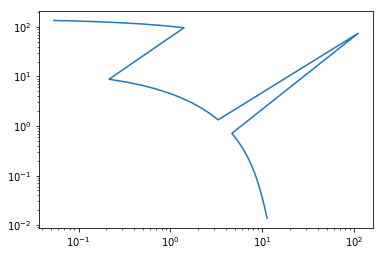

In [26]:
plt.loglog(*fsvals.T)

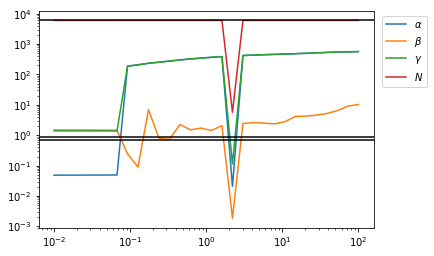

In [27]:
plt.loglog(prange, [float(s['x'][-4]) for s in solutions2], label=r'$\alpha$')
plt.loglog(prange, [float(s['x'][-3]) for s in solutions2], label=r'$\beta$')
plt.loglog(prange, [float(s['x'][-2]) for s in solutions2], label=r'$\gamma$')
plt.loglog(prange, [float(s['x'][-1]) for s in solutions2], label="$N$")
for q in config['regularisation_value']:
    plt.axhline(q, color='k')
plt.legend(loc="best", bbox_to_anchor=(1.01, 1))

In [28]:
solutions2[-1]['x'][-4:]

DM([566.286, 10.2722, 565.907, 5999.98])

In [14]:
getx = ca.Function('getx', [solver_setup['x']], model.xs)

11.2601 0.013834


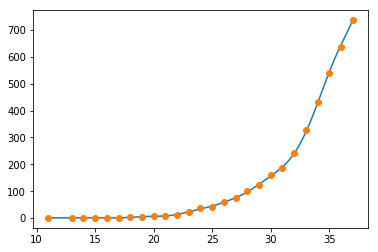

In [29]:
idx = -1
print(f1_ex(solutions2[idx]['x']), f2_ex(solutions2[idx]['x']))
plt.plot(model.observation_times, getx(solutions2[idx]['x'])[-1], label='model')
plt.plot(time, data, 'o', label='data')

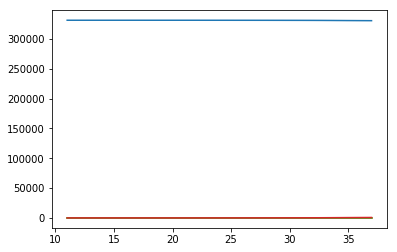

In [32]:
idx=-1
plt.plot(model.observation_times, getx(solutions2[idx]['x'])[0])
plt.plot(model.observation_times, getx(solutions2[idx]['x'])[1])
plt.plot(model.observation_times, getx(solutions2[idx]['x'])[2])
plt.plot(model.observation_times, getx(solutions2[idx]['x'])[3])